In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sims import *
import seaborn as sns

%matplotlib inline

In [2]:
acc_df = pd.DataFrame({'Accuracy (mean)': {'F-Train': 0.7518000000000002, 
                                          'FairBatch': 0.7373999999999999,
                                           'Bias Correcting': 0.7147,
                                           'Unconstrained': 0.8706,
                                           'Local Fairness Constraints': 0.6790000000000002,
                                           'Threshold Adjusting': 0.6461000000000001,
                                           'Adversarial Learning': 0.6436,
                                           'One-sided Fairness Constraint': 0.5865000000000001
                                          }, 
                       'Accuracy (std)': {'F-Train': 0.07113901882933162,
                                         'FairBatch': 0.05084525543253766,
                                          'Bias Correcting': 0.048009478230866036,
                                          'Unconstrained': 0.033100453169103296,
                                          'Local Fairness Constraints': 0.11477369036499611,
                                          'Threshold Adjusting': 0.07593279923722028,
                                          'Adversarial Learning': 0.1277459979803673,
                                          'One-sided Fairness Constraint': 0.06153657449029804
                                         },
                       'DP Disparity (mean)': {'F-Train': 0.10517405982894137,
                                              'FairBatch': 0.07089944477793304,
                                               'Bias Correcting': 0.05370425461665438,
                                               'Unconstrained': 0.3962238054827229,
                                               'Local Fairness Constraints': 0.12097919176661588,
                                               'Threshold Adjusting': 0.06283753340121134,
                                               'Adversarial Learning': 0.0998669879872822,
                                               'One-sided Fairness Constraint': 0.0674577957219746
                                              },
                       'DP Disparity (std)': {'F-Train': 0.07521422122878507,
                                             'FairBatch': 0.04716708105038009,
                                              'Bias Correcting': 0.035635263750367505, 
                                              'Unconstrained': 0.052275978045502144,
                                              'Local Fairness Constraints': 0.14893002536269048,
                                              'Threshold Adjusting': 0.06710760691729953,
                                              'Adversarial Learning': 0.08882041957469501,
                                              'One-sided Fairness Constraint': 0.052285178932533594
                                             }
                      })

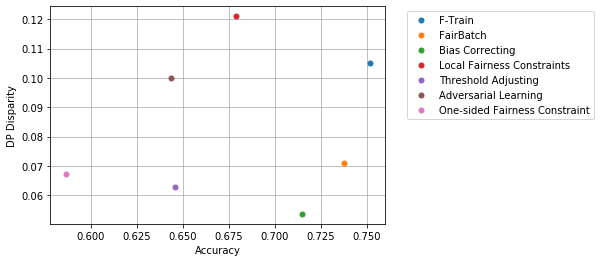

In [114]:
methods = acc_df.index.tolist()
methods.remove('Unconstrained')
fig, ax = plt.subplots()
for method in methods:
    ax.plot(acc_df['Accuracy (mean)'][method], acc_df['DP Disparity (mean)'][method], 
            marker='o', linestyle='', ms=5, label = method)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left')
# plt.tight_layout()
ax.set_ylabel('DP Disparity')
ax.set_xlabel('Accuracy')
ax.grid()

plt.show()

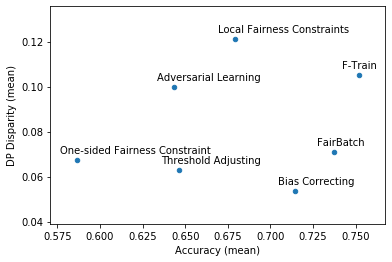

In [56]:
methods = acc_df.index.tolist()
methods.remove('Unconstrained')

acc_df1 = acc_df.drop(labels = ['Unconstrained'])
ax = acc_df1.plot.scatter(x = 'Accuracy (mean)', y = 'DP Disparity (mean)')
for i, method in enumerate(methods):
    ax.annotate(method, (acc_df1['Accuracy (mean)'][method]-0.01, acc_df1['DP Disparity (mean)'][method]+0.003))
None 

In [17]:
acc_l, dp_l = [], []
for alpha in range(10):
    acc, acc_std, dp, dp_std = runSim(num_sim = 20, train_samples = 500, test_samples = 100, learning_rate = 0.005, num_rounds = 10, 
              local_epochs = 30, metric = "Demographic disparity", option = "bias correcting", alpha = alpha, epsilon = None, optimizer = 'adam')
    acc_l.append(acc)
    dp_l.append(dp)

|  Simulation : 1 | 
      seed : 192 -----


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


      Accuracy: 84.00%  Demographic disparity: 0.49
|  Simulation : 2 | 
      seed : 198 -----


100%|██████████| 10/10 [00:04<00:00,  2.12it/s]


      Accuracy: 92.00%  Demographic disparity: 0.38
|  Simulation : 3 | 
      seed : 203 -----


100%|██████████| 10/10 [00:04<00:00,  2.16it/s]


      Accuracy: 82.00%  Demographic disparity: 0.35
|  Simulation : 4 | 
      seed : 208 -----


100%|██████████| 10/10 [00:04<00:00,  2.09it/s]


      Accuracy: 84.00%  Demographic disparity: 0.44
|  Simulation : 5 | 
      seed : 213 -----


100%|██████████| 10/10 [00:04<00:00,  2.03it/s]


      Accuracy: 87.00%  Demographic disparity: 0.36
|  Simulation : 6 | 
      seed : 218 -----


100%|██████████| 10/10 [00:04<00:00,  2.12it/s]


      Accuracy: 90.00%  Demographic disparity: 0.50
|  Simulation : 7 | 
      seed : 224 -----


100%|██████████| 10/10 [00:04<00:00,  2.11it/s]


      Accuracy: 83.00%  Demographic disparity: 0.42
|  Simulation : 8 | 
      seed : 229 -----


100%|██████████| 10/10 [00:04<00:00,  2.14it/s]


      Accuracy: 87.00%  Demographic disparity: 0.42
|  Simulation : 9 | 
      seed : 234 -----


100%|██████████| 10/10 [00:04<00:00,  2.13it/s]


      Accuracy: 88.00%  Demographic disparity: 0.43
|  Simulation : 10 | 
      seed : 239 -----


100%|██████████| 10/10 [00:04<00:00,  2.04it/s]


      Accuracy: 86.00%  Demographic disparity: 0.47
|  Simulation : 11 | 
      seed : 244 -----


100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


      Accuracy: 82.00%  Demographic disparity: 0.39
|  Simulation : 12 | 
      seed : 249 -----


100%|██████████| 10/10 [00:04<00:00,  2.06it/s]


      Accuracy: 92.00%  Demographic disparity: 0.37
|  Simulation : 13 | 
      seed : 254 -----


100%|██████████| 10/10 [00:05<00:00,  1.90it/s]


      Accuracy: 89.00%  Demographic disparity: 0.36
|  Simulation : 14 | 
      seed : 260 -----


100%|██████████| 10/10 [00:04<00:00,  2.03it/s]


      Accuracy: 89.00%  Demographic disparity: 0.37
|  Simulation : 15 | 
      seed : 265 -----


100%|██████████| 10/10 [00:04<00:00,  2.05it/s]


      Accuracy: 85.00%  Demographic disparity: 0.31
|  Simulation : 16 | 
      seed : 270 -----


100%|██████████| 10/10 [00:05<00:00,  1.98it/s]


      Accuracy: 87.00%  Demographic disparity: 0.36
|  Simulation : 17 | 
      seed : 276 -----


100%|██████████| 10/10 [00:04<00:00,  2.27it/s]


      Accuracy: 89.00%  Demographic disparity: 0.46
|  Simulation : 18 | 
      seed : 281 -----


100%|██████████| 10/10 [00:04<00:00,  2.26it/s]


      Accuracy: 86.00%  Demographic disparity: 0.42
|  Simulation : 19 | 
      seed : 285 -----


100%|██████████| 10/10 [00:04<00:00,  2.14it/s]


      Accuracy: 90.00%  Demographic disparity: 0.47
|  Simulation : 20 | 
      seed : 290 -----


100%|██████████| 10/10 [00:04<00:00,  2.09it/s]


      Accuracy: 91.00%  Demographic disparity: 0.35
| Test Accuracy: 0.871(0.031) | Demographic disparity: 0.406(0.053) |
| Time elapsed: 103.04 seconds |
|  Simulation : 1 | 
      seed : 295 -----


100%|██████████| 10/10 [00:04<00:00,  2.07it/s]


      Accuracy: 93.00%  Demographic disparity: 0.43
|  Simulation : 2 | 
      seed : 301 -----


100%|██████████| 10/10 [00:04<00:00,  2.14it/s]


      Accuracy: 91.00%  Demographic disparity: 0.36
|  Simulation : 3 | 
      seed : 306 -----


100%|██████████| 10/10 [00:04<00:00,  2.26it/s]


      Accuracy: 90.00%  Demographic disparity: 0.31
|  Simulation : 4 | 
      seed : 310 -----


100%|██████████| 10/10 [00:05<00:00,  1.95it/s]


      Accuracy: 86.00%  Demographic disparity: 0.26
|  Simulation : 5 | 
      seed : 316 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 83.00%  Demographic disparity: 0.31
|  Simulation : 6 | 
      seed : 320 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 88.00%  Demographic disparity: 0.45
|  Simulation : 7 | 
      seed : 325 -----


100%|██████████| 10/10 [00:04<00:00,  2.29it/s]


      Accuracy: 86.00%  Demographic disparity: 0.30
|  Simulation : 8 | 
      seed : 329 -----


100%|██████████| 10/10 [00:04<00:00,  2.31it/s]


      Accuracy: 89.00%  Demographic disparity: 0.35
|  Simulation : 9 | 
      seed : 334 -----


100%|██████████| 10/10 [00:04<00:00,  2.14it/s]


      Accuracy: 88.00%  Demographic disparity: 0.29
|  Simulation : 10 | 
      seed : 339 -----


100%|██████████| 10/10 [00:04<00:00,  2.19it/s]


      Accuracy: 92.00%  Demographic disparity: 0.35
|  Simulation : 11 | 
      seed : 344 -----


100%|██████████| 10/10 [00:04<00:00,  2.12it/s]


      Accuracy: 90.00%  Demographic disparity: 0.35
|  Simulation : 12 | 
      seed : 349 -----


100%|██████████| 10/10 [00:04<00:00,  2.21it/s]


      Accuracy: 83.00%  Demographic disparity: 0.38
|  Simulation : 13 | 
      seed : 354 -----


100%|██████████| 10/10 [00:04<00:00,  2.21it/s]


      Accuracy: 89.00%  Demographic disparity: 0.34
|  Simulation : 14 | 
      seed : 359 -----


100%|██████████| 10/10 [00:04<00:00,  2.18it/s]


      Accuracy: 90.00%  Demographic disparity: 0.29
|  Simulation : 15 | 
      seed : 364 -----


100%|██████████| 10/10 [00:04<00:00,  2.06it/s]


      Accuracy: 88.00%  Demographic disparity: 0.32
|  Simulation : 16 | 
      seed : 369 -----


100%|██████████| 10/10 [00:04<00:00,  2.36it/s]


      Accuracy: 79.00%  Demographic disparity: 0.39
|  Simulation : 17 | 
      seed : 373 -----


100%|██████████| 10/10 [00:04<00:00,  2.33it/s]


      Accuracy: 90.00%  Demographic disparity: 0.31
|  Simulation : 18 | 
      seed : 378 -----


100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


      Accuracy: 91.00%  Demographic disparity: 0.39
|  Simulation : 19 | 
      seed : 383 -----


100%|██████████| 10/10 [00:04<00:00,  2.33it/s]


      Accuracy: 90.00%  Demographic disparity: 0.38
|  Simulation : 20 | 
      seed : 387 -----


100%|██████████| 10/10 [00:04<00:00,  2.30it/s]


      Accuracy: 89.00%  Demographic disparity: 0.34
| Test Accuracy: 0.883(0.033) | Demographic disparity: 0.344(0.047) |
| Time elapsed: 96.31 seconds |
|  Simulation : 1 | 
      seed : 392 -----


100%|██████████| 10/10 [00:04<00:00,  2.35it/s]


      Accuracy: 85.00%  Demographic disparity: 0.22
|  Simulation : 2 | 
      seed : 396 -----


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


      Accuracy: 85.00%  Demographic disparity: 0.19
|  Simulation : 3 | 
      seed : 401 -----


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


      Accuracy: 91.00%  Demographic disparity: 0.46
|  Simulation : 4 | 
      seed : 405 -----


100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


      Accuracy: 81.00%  Demographic disparity: 0.26
|  Simulation : 5 | 
      seed : 410 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 89.00%  Demographic disparity: 0.30
|  Simulation : 6 | 
      seed : 415 -----


100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


      Accuracy: 87.00%  Demographic disparity: 0.31
|  Simulation : 7 | 
      seed : 420 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 84.00%  Demographic disparity: 0.30
|  Simulation : 8 | 
      seed : 424 -----


100%|██████████| 10/10 [00:04<00:00,  2.26it/s]


      Accuracy: 84.00%  Demographic disparity: 0.21
|  Simulation : 9 | 
      seed : 429 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 86.00%  Demographic disparity: 0.36
|  Simulation : 10 | 
      seed : 433 -----


100%|██████████| 10/10 [00:04<00:00,  2.10it/s]


      Accuracy: 89.00%  Demographic disparity: 0.31
|  Simulation : 11 | 
      seed : 439 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 85.00%  Demographic disparity: 0.28
|  Simulation : 12 | 
      seed : 443 -----


100%|██████████| 10/10 [00:04<00:00,  2.26it/s]


      Accuracy: 86.00%  Demographic disparity: 0.27
|  Simulation : 13 | 
      seed : 448 -----


100%|██████████| 10/10 [00:04<00:00,  2.19it/s]


      Accuracy: 85.00%  Demographic disparity: 0.19
|  Simulation : 14 | 
      seed : 453 -----


100%|██████████| 10/10 [00:04<00:00,  2.32it/s]


      Accuracy: 84.00%  Demographic disparity: 0.29
|  Simulation : 15 | 
      seed : 457 -----


100%|██████████| 10/10 [00:04<00:00,  2.07it/s]


      Accuracy: 84.00%  Demographic disparity: 0.13
|  Simulation : 16 | 
      seed : 462 -----


100%|██████████| 10/10 [00:05<00:00,  1.95it/s]


      Accuracy: 73.00%  Demographic disparity: 0.02
|  Simulation : 17 | 
      seed : 468 -----


100%|██████████| 10/10 [00:04<00:00,  2.29it/s]


      Accuracy: 91.00%  Demographic disparity: 0.31
|  Simulation : 18 | 
      seed : 472 -----


100%|██████████| 10/10 [00:05<00:00,  1.98it/s]


      Accuracy: 82.00%  Demographic disparity: 0.14
|  Simulation : 19 | 
      seed : 478 -----


100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


      Accuracy: 87.00%  Demographic disparity: 0.24
|  Simulation : 20 | 
      seed : 483 -----


100%|██████████| 10/10 [00:04<00:00,  2.03it/s]


      Accuracy: 88.00%  Demographic disparity: 0.31
| Test Accuracy: 0.853(0.038) | Demographic disparity: 0.255(0.092) |
| Time elapsed: 96.70 seconds |
|  Simulation : 1 | 
      seed : 488 -----


100%|██████████| 10/10 [00:04<00:00,  2.18it/s]


      Accuracy: 76.00%  Demographic disparity: 0.16
|  Simulation : 2 | 
      seed : 493 -----


100%|██████████| 10/10 [00:05<00:00,  1.83it/s]


      Accuracy: 75.00%  Demographic disparity: 0.14
|  Simulation : 3 | 
      seed : 499 -----


100%|██████████| 10/10 [00:04<00:00,  2.12it/s]


      Accuracy: 77.00%  Demographic disparity: 0.21
|  Simulation : 4 | 
      seed : 504 -----


100%|██████████| 10/10 [00:04<00:00,  2.12it/s]


      Accuracy: 78.00%  Demographic disparity: 0.24
|  Simulation : 5 | 
      seed : 509 -----


100%|██████████| 10/10 [00:04<00:00,  2.01it/s]


      Accuracy: 81.00%  Demographic disparity: 0.19
|  Simulation : 6 | 
      seed : 515 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 89.00%  Demographic disparity: 0.27
|  Simulation : 7 | 
      seed : 519 -----


100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


      Accuracy: 83.00%  Demographic disparity: 0.17
|  Simulation : 8 | 
      seed : 524 -----


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


      Accuracy: 81.00%  Demographic disparity: 0.16
|  Simulation : 9 | 
      seed : 528 -----


100%|██████████| 10/10 [00:04<00:00,  2.23it/s]


      Accuracy: 74.00%  Demographic disparity: 0.14
|  Simulation : 10 | 
      seed : 533 -----


100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


      Accuracy: 81.00%  Demographic disparity: 0.26
|  Simulation : 11 | 
      seed : 538 -----


100%|██████████| 10/10 [00:04<00:00,  2.01it/s]


      Accuracy: 87.00%  Demographic disparity: 0.28
|  Simulation : 12 | 
      seed : 543 -----


100%|██████████| 10/10 [00:04<00:00,  2.02it/s]


      Accuracy: 80.00%  Demographic disparity: 0.21
|  Simulation : 13 | 
      seed : 548 -----


100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


      Accuracy: 86.00%  Demographic disparity: 0.20
|  Simulation : 14 | 
      seed : 553 -----


100%|██████████| 10/10 [00:04<00:00,  2.13it/s]


      Accuracy: 77.00%  Demographic disparity: 0.18
|  Simulation : 15 | 
      seed : 558 -----


100%|██████████| 10/10 [00:04<00:00,  2.29it/s]


      Accuracy: 87.00%  Demographic disparity: 0.24
|  Simulation : 16 | 
      seed : 563 -----


100%|██████████| 10/10 [00:04<00:00,  2.08it/s]


      Accuracy: 83.00%  Demographic disparity: 0.17
|  Simulation : 17 | 
      seed : 568 -----


100%|██████████| 10/10 [00:04<00:00,  2.21it/s]


      Accuracy: 84.00%  Demographic disparity: 0.29
|  Simulation : 18 | 
      seed : 573 -----


100%|██████████| 10/10 [00:04<00:00,  2.00it/s]


      Accuracy: 79.00%  Demographic disparity: 0.16
|  Simulation : 19 | 
      seed : 579 -----


100%|██████████| 10/10 [00:04<00:00,  2.17it/s]


      Accuracy: 83.00%  Demographic disparity: 0.19
|  Simulation : 20 | 
      seed : 583 -----


100%|██████████| 10/10 [00:04<00:00,  2.27it/s]


      Accuracy: 85.00%  Demographic disparity: 0.23
| Test Accuracy: 0.813(0.042) | Demographic disparity: 0.204(0.046) |
| Time elapsed: 99.70 seconds |
|  Simulation : 1 | 
      seed : 588 -----


100%|██████████| 10/10 [00:04<00:00,  2.33it/s]


      Accuracy: 85.00%  Demographic disparity: 0.22
|  Simulation : 2 | 
      seed : 593 -----


100%|██████████| 10/10 [00:04<00:00,  2.17it/s]


      Accuracy: 81.00%  Demographic disparity: 0.17
|  Simulation : 3 | 
      seed : 598 -----


100%|██████████| 10/10 [00:04<00:00,  2.21it/s]


      Accuracy: 69.00%  Demographic disparity: 0.07
|  Simulation : 4 | 
      seed : 603 -----


100%|██████████| 10/10 [00:04<00:00,  2.34it/s]


      Accuracy: 78.00%  Demographic disparity: 0.09
|  Simulation : 5 | 
      seed : 607 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 86.00%  Demographic disparity: 0.30
|  Simulation : 6 | 
      seed : 612 -----


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


      Accuracy: 83.00%  Demographic disparity: 0.27
|  Simulation : 7 | 
      seed : 616 -----


100%|██████████| 10/10 [00:04<00:00,  2.29it/s]


      Accuracy: 82.00%  Demographic disparity: 0.18
|  Simulation : 8 | 
      seed : 621 -----


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


      Accuracy: 85.00%  Demographic disparity: 0.18
|  Simulation : 9 | 
      seed : 625 -----


100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


      Accuracy: 82.00%  Demographic disparity: 0.27
|  Simulation : 10 | 
      seed : 630 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 82.00%  Demographic disparity: 0.19
|  Simulation : 11 | 
      seed : 635 -----


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


      Accuracy: 83.00%  Demographic disparity: 0.30
|  Simulation : 12 | 
      seed : 639 -----


100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


      Accuracy: 81.00%  Demographic disparity: 0.17
|  Simulation : 13 | 
      seed : 644 -----


100%|██████████| 10/10 [00:04<00:00,  2.13it/s]


      Accuracy: 73.00%  Demographic disparity: 0.11
|  Simulation : 14 | 
      seed : 649 -----


100%|██████████| 10/10 [00:04<00:00,  2.23it/s]


      Accuracy: 82.00%  Demographic disparity: 0.27
|  Simulation : 15 | 
      seed : 654 -----


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


      Accuracy: 81.00%  Demographic disparity: 0.16
|  Simulation : 16 | 
      seed : 658 -----


100%|██████████| 10/10 [00:04<00:00,  2.36it/s]


      Accuracy: 72.00%  Demographic disparity: 0.12
|  Simulation : 17 | 
      seed : 663 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 78.00%  Demographic disparity: 0.19
|  Simulation : 18 | 
      seed : 667 -----


100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


      Accuracy: 82.00%  Demographic disparity: 0.15
|  Simulation : 19 | 
      seed : 672 -----


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


      Accuracy: 76.00%  Demographic disparity: 0.18
|  Simulation : 20 | 
      seed : 676 -----


100%|██████████| 10/10 [00:04<00:00,  2.44it/s]


      Accuracy: 71.00%  Demographic disparity: 0.10
| Test Accuracy: 0.796(0.048) | Demographic disparity: 0.185(0.067) |
| Time elapsed: 92.65 seconds |
|  Simulation : 1 | 
      seed : 681 -----


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


      Accuracy: 71.00%  Demographic disparity: 0.08
|  Simulation : 2 | 
      seed : 685 -----


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


      Accuracy: 78.00%  Demographic disparity: 0.04
|  Simulation : 3 | 
      seed : 690 -----


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


      Accuracy: 75.00%  Demographic disparity: 0.13
|  Simulation : 4 | 
      seed : 694 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 69.00%  Demographic disparity: 0.05
|  Simulation : 5 | 
      seed : 699 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 76.00%  Demographic disparity: 0.08
|  Simulation : 6 | 
      seed : 703 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 82.00%  Demographic disparity: 0.11
|  Simulation : 7 | 
      seed : 708 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 84.00%  Demographic disparity: 0.20
|  Simulation : 8 | 
      seed : 712 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 74.00%  Demographic disparity: 0.10
|  Simulation : 9 | 
      seed : 716 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 69.00%  Demographic disparity: 0.09
|  Simulation : 10 | 
      seed : 721 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 79.00%  Demographic disparity: 0.15
|  Simulation : 11 | 
      seed : 725 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 69.00%  Demographic disparity: 0.07
|  Simulation : 12 | 
      seed : 730 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 79.00%  Demographic disparity: 0.08
|  Simulation : 13 | 
      seed : 734 -----


100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


      Accuracy: 69.00%  Demographic disparity: 0.06
|  Simulation : 14 | 
      seed : 739 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 80.00%  Demographic disparity: 0.20
|  Simulation : 15 | 
      seed : 743 -----


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


      Accuracy: 80.00%  Demographic disparity: 0.16
|  Simulation : 16 | 
      seed : 748 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 77.00%  Demographic disparity: 0.19
|  Simulation : 17 | 
      seed : 752 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 85.00%  Demographic disparity: 0.25
|  Simulation : 18 | 
      seed : 757 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 75.00%  Demographic disparity: 0.24
|  Simulation : 19 | 
      seed : 761 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 72.00%  Demographic disparity: 0.13
|  Simulation : 20 | 
      seed : 766 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 80.00%  Demographic disparity: 0.20
| Test Accuracy: 0.762(0.050) | Demographic disparity: 0.131(0.063) |
| Time elapsed: 89.34 seconds |
|  Simulation : 1 | 
      seed : 770 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 73.00%  Demographic disparity: 0.13
|  Simulation : 2 | 
      seed : 775 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 73.00%  Demographic disparity: 0.10
|  Simulation : 3 | 
      seed : 779 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 80.00%  Demographic disparity: 0.06
|  Simulation : 4 | 
      seed : 783 -----


100%|██████████| 10/10 [00:04<00:00,  2.34it/s]


      Accuracy: 72.00%  Demographic disparity: 0.11
|  Simulation : 5 | 
      seed : 788 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 69.00%  Demographic disparity: 0.05
|  Simulation : 6 | 
      seed : 792 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 77.00%  Demographic disparity: 0.14
|  Simulation : 7 | 
      seed : 797 -----


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


      Accuracy: 80.00%  Demographic disparity: 0.17
|  Simulation : 8 | 
      seed : 801 -----


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]


      Accuracy: 68.00%  Demographic disparity: 0.02
|  Simulation : 9 | 
      seed : 806 -----


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


      Accuracy: 72.00%  Demographic disparity: 0.13
|  Simulation : 10 | 
      seed : 810 -----


100%|██████████| 10/10 [00:04<00:00,  2.34it/s]


      Accuracy: 71.00%  Demographic disparity: 0.20
|  Simulation : 11 | 
      seed : 815 -----


100%|██████████| 10/10 [00:04<00:00,  2.23it/s]


      Accuracy: 78.00%  Demographic disparity: 0.11
|  Simulation : 12 | 
      seed : 820 -----


100%|██████████| 10/10 [00:04<00:00,  2.33it/s]


      Accuracy: 77.00%  Demographic disparity: 0.12
|  Simulation : 13 | 
      seed : 824 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 69.00%  Demographic disparity: 0.16
|  Simulation : 14 | 
      seed : 829 -----


100%|██████████| 10/10 [00:04<00:00,  2.39it/s]


      Accuracy: 79.00%  Demographic disparity: 0.10
|  Simulation : 15 | 
      seed : 833 -----


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


      Accuracy: 66.00%  Demographic disparity: 0.01
|  Simulation : 16 | 
      seed : 838 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 76.00%  Demographic disparity: 0.10
|  Simulation : 17 | 
      seed : 842 -----


100%|██████████| 10/10 [00:04<00:00,  2.37it/s]


      Accuracy: 59.00%  Demographic disparity: 0.07
|  Simulation : 18 | 
      seed : 847 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 70.00%  Demographic disparity: 0.07
|  Simulation : 19 | 
      seed : 851 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 69.00%  Demographic disparity: 0.06
|  Simulation : 20 | 
      seed : 856 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 72.00%  Demographic disparity: 0.11
| Test Accuracy: 0.725(0.051) | Demographic disparity: 0.101(0.046) |
| Time elapsed: 89.87 seconds |
|  Simulation : 1 | 
      seed : 860 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 81.00%  Demographic disparity: 0.11
|  Simulation : 2 | 
      seed : 864 -----


100%|██████████| 10/10 [00:04<00:00,  2.40it/s]


      Accuracy: 72.00%  Demographic disparity: 0.02
|  Simulation : 3 | 
      seed : 869 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 79.00%  Demographic disparity: 0.07
|  Simulation : 4 | 
      seed : 873 -----


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


      Accuracy: 68.00%  Demographic disparity: 0.02
|  Simulation : 5 | 
      seed : 878 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 74.00%  Demographic disparity: 0.04
|  Simulation : 6 | 
      seed : 882 -----


100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


      Accuracy: 79.00%  Demographic disparity: 0.11
|  Simulation : 7 | 
      seed : 887 -----


100%|██████████| 10/10 [00:04<00:00,  2.41it/s]


      Accuracy: 76.00%  Demographic disparity: 0.23
|  Simulation : 8 | 
      seed : 891 -----


100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


      Accuracy: 66.00%  Demographic disparity: 0.00
|  Simulation : 9 | 
      seed : 896 -----


100%|██████████| 10/10 [00:04<00:00,  2.25it/s]


      Accuracy: 68.00%  Demographic disparity: 0.04
|  Simulation : 10 | 
      seed : 900 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 69.00%  Demographic disparity: 0.01
|  Simulation : 11 | 
      seed : 910 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 67.00%  Demographic disparity: 0.03
|  Simulation : 12 | 
      seed : 919 -----


100%|██████████| 10/10 [00:05<00:00,  1.82it/s]


      Accuracy: 78.00%  Demographic disparity: 0.09
|  Simulation : 13 | 
      seed : 924 -----


100%|██████████| 10/10 [00:12<00:00,  1.24s/it]


      Accuracy: 77.00%  Demographic disparity: 0.27
|  Simulation : 14 | 
      seed : 937 -----


100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


      Accuracy: 65.00%  Demographic disparity: 0.15
|  Simulation : 15 | 
      seed : 944 -----


100%|██████████| 10/10 [00:05<00:00,  1.98it/s]


      Accuracy: 77.00%  Demographic disparity: 0.10
|  Simulation : 16 | 
      seed : 950 -----


100%|██████████| 10/10 [00:05<00:00,  1.79it/s]


      Accuracy: 73.00%  Demographic disparity: 0.08
|  Simulation : 17 | 
      seed : 956 -----


100%|██████████| 10/10 [00:05<00:00,  1.96it/s]


      Accuracy: 77.00%  Demographic disparity: 0.13
|  Simulation : 18 | 
      seed : 961 -----


100%|██████████| 10/10 [00:05<00:00,  1.68it/s]


      Accuracy: 78.00%  Demographic disparity: 0.04
|  Simulation : 19 | 
      seed : 968 -----


100%|██████████| 10/10 [00:05<00:00,  1.95it/s]


      Accuracy: 72.00%  Demographic disparity: 0.07
|  Simulation : 20 | 
      seed : 973 -----


100%|██████████| 10/10 [00:05<00:00,  1.78it/s]


      Accuracy: 69.00%  Demographic disparity: 0.07
| Test Accuracy: 0.733(0.049) | Demographic disparity: 0.084(0.068) |
| Time elapsed: 119.19 seconds |
|  Simulation : 1 | 
      seed : 979 -----


100%|██████████| 10/10 [00:06<00:00,  1.61it/s]


      Accuracy: 70.00%  Demographic disparity: 0.09
|  Simulation : 2 | 
      seed : 986 -----


100%|██████████| 10/10 [00:05<00:00,  1.80it/s]


      Accuracy: 81.00%  Demographic disparity: 0.16
|  Simulation : 3 | 
      seed : 992 -----


100%|██████████| 10/10 [00:04<00:00,  2.01it/s]


      Accuracy: 84.00%  Demographic disparity: 0.13
|  Simulation : 4 | 
      seed : 997 -----


100%|██████████| 10/10 [00:05<00:00,  1.92it/s]


      Accuracy: 67.00%  Demographic disparity: 0.00
|  Simulation : 5 | 
      seed : 3 -----


100%|██████████| 10/10 [00:05<00:00,  1.94it/s]


      Accuracy: 61.00%  Demographic disparity: 0.10
|  Simulation : 6 | 
      seed : 8 -----


100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


      Accuracy: 76.00%  Demographic disparity: 0.19
|  Simulation : 7 | 
      seed : 13 -----


100%|██████████| 10/10 [00:05<00:00,  1.92it/s]


      Accuracy: 69.00%  Demographic disparity: 0.12
|  Simulation : 8 | 
      seed : 19 -----


100%|██████████| 10/10 [00:05<00:00,  1.97it/s]


      Accuracy: 67.00%  Demographic disparity: 0.07
|  Simulation : 9 | 
      seed : 24 -----


100%|██████████| 10/10 [00:05<00:00,  1.97it/s]


      Accuracy: 67.00%  Demographic disparity: 0.01
|  Simulation : 10 | 
      seed : 30 -----


100%|██████████| 10/10 [00:05<00:00,  1.93it/s]


      Accuracy: 72.00%  Demographic disparity: 0.05
|  Simulation : 11 | 
      seed : 35 -----


100%|██████████| 10/10 [00:05<00:00,  1.97it/s]


      Accuracy: 69.00%  Demographic disparity: 0.02
|  Simulation : 12 | 
      seed : 41 -----


100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


      Accuracy: 68.00%  Demographic disparity: 0.03
|  Simulation : 13 | 
      seed : 46 -----


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]


      Accuracy: 74.00%  Demographic disparity: 0.03
|  Simulation : 14 | 
      seed : 52 -----


100%|██████████| 10/10 [00:05<00:00,  2.00it/s]


      Accuracy: 68.00%  Demographic disparity: 0.06
|  Simulation : 15 | 
      seed : 57 -----


100%|██████████| 10/10 [00:04<00:00,  2.01it/s]


      Accuracy: 73.00%  Demographic disparity: 0.02
|  Simulation : 16 | 
      seed : 63 -----


100%|██████████| 10/10 [00:05<00:00,  1.92it/s]


      Accuracy: 70.00%  Demographic disparity: 0.07
|  Simulation : 17 | 
      seed : 68 -----


100%|██████████| 10/10 [00:04<00:00,  2.00it/s]


      Accuracy: 68.00%  Demographic disparity: 0.09
|  Simulation : 18 | 
      seed : 74 -----


100%|██████████| 10/10 [00:05<00:00,  1.99it/s]


      Accuracy: 69.00%  Demographic disparity: 0.08
|  Simulation : 19 | 
      seed : 79 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 73.00%  Demographic disparity: 0.06
|  Simulation : 20 | 
      seed : 87 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 77.00%  Demographic disparity: 0.16
| Test Accuracy: 0.711(0.052) | Demographic disparity: 0.076(0.053) |
| Time elapsed: 117.65 seconds |
|  Simulation : 1 | 
      seed : 97 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 86.00%  Demographic disparity: 0.28
|  Simulation : 2 | 
      seed : 107 -----


100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


      Accuracy: 65.00%  Demographic disparity: 0.07
|  Simulation : 3 | 
      seed : 116 -----


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


      Accuracy: 69.00%  Demographic disparity: 0.01
|  Simulation : 4 | 
      seed : 126 -----


100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


      Accuracy: 75.00%  Demographic disparity: 0.09
|  Simulation : 5 | 
      seed : 135 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 66.00%  Demographic disparity: 0.03
|  Simulation : 6 | 
      seed : 144 -----


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


      Accuracy: 63.00%  Demographic disparity: 0.09
|  Simulation : 7 | 
      seed : 153 -----


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


      Accuracy: 70.00%  Demographic disparity: 0.04
|  Simulation : 8 | 
      seed : 162 -----


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


      Accuracy: 66.00%  Demographic disparity: 0.04
|  Simulation : 9 | 
      seed : 171 -----


100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


      Accuracy: 67.00%  Demographic disparity: 0.04
|  Simulation : 10 | 
      seed : 181 -----


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


      Accuracy: 63.00%  Demographic disparity: 0.01
|  Simulation : 11 | 
      seed : 190 -----


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


      Accuracy: 65.00%  Demographic disparity: 0.03
|  Simulation : 12 | 
      seed : 200 -----


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


      Accuracy: 76.00%  Demographic disparity: 0.03
|  Simulation : 13 | 
      seed : 209 -----


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


      Accuracy: 69.00%  Demographic disparity: 0.06
|  Simulation : 14 | 
      seed : 219 -----


100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


      Accuracy: 70.00%  Demographic disparity: 0.01
|  Simulation : 15 | 
      seed : 228 -----


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


      Accuracy: 60.00%  Demographic disparity: 0.06
|  Simulation : 16 | 
      seed : 237 -----


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]


      Accuracy: 67.00%  Demographic disparity: 0.01
|  Simulation : 17 | 
      seed : 243 -----


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]


      Accuracy: 68.00%  Demographic disparity: 0.01
|  Simulation : 18 | 
      seed : 249 -----


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


      Accuracy: 75.00%  Demographic disparity: 0.04
|  Simulation : 19 | 
      seed : 255 -----


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]


      Accuracy: 62.00%  Demographic disparity: 0.05
|  Simulation : 20 | 
      seed : 260 -----


100%|██████████| 10/10 [00:05<00:00,  1.75it/s]

      Accuracy: 81.00%  Demographic disparity: 0.12
| Test Accuracy: 0.692(0.064) | Demographic disparity: 0.055(0.059) |
| Time elapsed: 169.66 seconds |


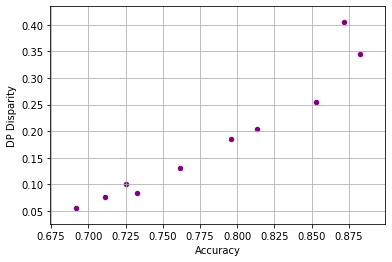

In [30]:
bc_df = pd.DataFrame({
    'Accuracy': acc_l,
    'DP Disparity': dp_l
}) 
ax = bc_df.plot.scatter(x = 'Accuracy', y = 'DP Disparity', c = 'purple')
# bc_df.plot.line(x = 'Accuracy', y = 'DP Disparity', c = 'pink', ax = ax)
ax.grid()
None

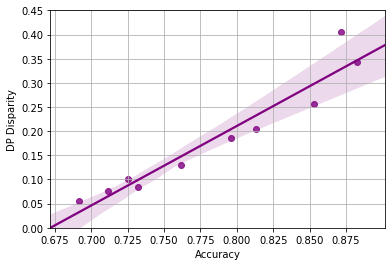

In [61]:
ax = sns.regplot(bc_df['Accuracy'], bc_df['DP Disparity'], color = 'purple')
ax.grid()
ax.set_xticks(np.arange(0.675, 0.9, 0.025))
ax.set_yticks(np.arange(0, 0.5, 0.05))
ax.set_ylim(0, 0.45)
None 

In [79]:
acc_l, dp_l = [], []
for alpha in np.arange(0., 0.2, 0.02):
    acc, acc_std, dp, dp_std = runSim(num_sim = 20, train_samples = 1000, test_samples = 100, learning_rate = 0.005, num_rounds = 10, 
              local_epochs = 30, metric = "Demographic disparity", option = "FairBatch", alpha = alpha, epsilon = None, optimizer = 'adam',
                                     adaptive_alpha = False)
    acc_l.append(acc)
    dp_l.append(dp)

|  Simulation : 1 | 
      seed : 546 -----


100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


      Accuracy: 91.00%  Demographic disparity: 0.52
|  Simulation : 2 | 
      seed : 557 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 84.00%  Demographic disparity: 0.40
|  Simulation : 3 | 
      seed : 565 -----


100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


      Accuracy: 80.00%  Demographic disparity: 0.34
|  Simulation : 4 | 
      seed : 573 -----


100%|██████████| 10/10 [00:07<00:00,  1.43it/s]


      Accuracy: 87.00%  Demographic disparity: 0.49
|  Simulation : 5 | 
      seed : 581 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 89.00%  Demographic disparity: 0.40
|  Simulation : 6 | 
      seed : 589 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 82.00%  Demographic disparity: 0.32
|  Simulation : 7 | 
      seed : 597 -----


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


      Accuracy: 81.00%  Demographic disparity: 0.52
|  Simulation : 8 | 
      seed : 605 -----


100%|██████████| 10/10 [00:06<00:00,  1.58it/s]


      Accuracy: 85.00%  Demographic disparity: 0.33
|  Simulation : 9 | 
      seed : 612 -----


100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


      Accuracy: 90.00%  Demographic disparity: 0.39
|  Simulation : 10 | 
      seed : 619 -----


100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


      Accuracy: 84.00%  Demographic disparity: 0.34
|  Simulation : 11 | 
      seed : 626 -----


100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


      Accuracy: 86.00%  Demographic disparity: 0.41
|  Simulation : 12 | 
      seed : 633 -----


100%|██████████| 10/10 [00:06<00:00,  1.58it/s]


      Accuracy: 93.00%  Demographic disparity: 0.44
|  Simulation : 13 | 
      seed : 640 -----


100%|██████████| 10/10 [00:05<00:00,  1.67it/s]


      Accuracy: 86.00%  Demographic disparity: 0.36
|  Simulation : 14 | 
      seed : 646 -----


100%|██████████| 10/10 [00:06<00:00,  1.66it/s]


      Accuracy: 84.00%  Demographic disparity: 0.44
|  Simulation : 15 | 
      seed : 653 -----


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


      Accuracy: 83.00%  Demographic disparity: 0.45
|  Simulation : 16 | 
      seed : 659 -----


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


      Accuracy: 94.00%  Demographic disparity: 0.38
|  Simulation : 17 | 
      seed : 666 -----


100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


      Accuracy: 90.00%  Demographic disparity: 0.39
|  Simulation : 18 | 
      seed : 673 -----


100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


      Accuracy: 86.00%  Demographic disparity: 0.50
|  Simulation : 19 | 
      seed : 680 -----


100%|██████████| 10/10 [00:06<00:00,  1.54it/s]


      Accuracy: 79.00%  Demographic disparity: 0.35
|  Simulation : 20 | 
      seed : 687 -----


100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


      Accuracy: 87.00%  Demographic disparity: 0.34
| Test Accuracy: 0.861(0.041) | Demographic disparity: 0.406(0.063) |
| Time elapsed: 147.77 seconds |
|  Simulation : 1 | 
      seed : 694 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 87.00%  Demographic disparity: 0.25
|  Simulation : 2 | 
      seed : 702 -----


100%|██████████| 10/10 [00:06<00:00,  1.63it/s]


      Accuracy: 80.00%  Demographic disparity: 0.34
|  Simulation : 3 | 
      seed : 709 -----


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


      Accuracy: 84.00%  Demographic disparity: 0.29
|  Simulation : 4 | 
      seed : 716 -----


100%|██████████| 10/10 [00:06<00:00,  1.63it/s]


      Accuracy: 88.00%  Demographic disparity: 0.39
|  Simulation : 5 | 
      seed : 722 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 84.00%  Demographic disparity: 0.32
|  Simulation : 6 | 
      seed : 731 -----


100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


      Accuracy: 86.00%  Demographic disparity: 0.28
|  Simulation : 7 | 
      seed : 739 -----


100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


      Accuracy: 90.00%  Demographic disparity: 0.30
|  Simulation : 8 | 
      seed : 746 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 89.00%  Demographic disparity: 0.35
|  Simulation : 9 | 
      seed : 753 -----


100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


      Accuracy: 89.00%  Demographic disparity: 0.34
|  Simulation : 10 | 
      seed : 761 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 92.00%  Demographic disparity: 0.29
|  Simulation : 11 | 
      seed : 769 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 86.00%  Demographic disparity: 0.39
|  Simulation : 12 | 
      seed : 776 -----


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


      Accuracy: 76.00%  Demographic disparity: 0.33
|  Simulation : 13 | 
      seed : 783 -----


100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


      Accuracy: 90.00%  Demographic disparity: 0.35
|  Simulation : 14 | 
      seed : 790 -----


100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


      Accuracy: 86.00%  Demographic disparity: 0.30
|  Simulation : 15 | 
      seed : 797 -----


100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


      Accuracy: 93.00%  Demographic disparity: 0.38
|  Simulation : 16 | 
      seed : 804 -----


100%|██████████| 10/10 [00:05<00:00,  1.70it/s]


      Accuracy: 95.00%  Demographic disparity: 0.40
|  Simulation : 17 | 
      seed : 810 -----


100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


      Accuracy: 88.00%  Demographic disparity: 0.36
|  Simulation : 18 | 
      seed : 817 -----


100%|██████████| 10/10 [00:06<00:00,  1.60it/s]


      Accuracy: 92.00%  Demographic disparity: 0.37
|  Simulation : 19 | 
      seed : 823 -----


100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


      Accuracy: 88.00%  Demographic disparity: 0.40
|  Simulation : 20 | 
      seed : 830 -----


100%|██████████| 10/10 [00:05<00:00,  1.67it/s]


      Accuracy: 87.00%  Demographic disparity: 0.24
| Test Accuracy: 0.875(0.043) | Demographic disparity: 0.334(0.047) |
| Time elapsed: 142.51 seconds |
|  Simulation : 1 | 
      seed : 837 -----


100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


      Accuracy: 87.00%  Demographic disparity: 0.36
|  Simulation : 2 | 
      seed : 843 -----


100%|██████████| 10/10 [00:05<00:00,  1.69it/s]


      Accuracy: 87.00%  Demographic disparity: 0.29
|  Simulation : 3 | 
      seed : 850 -----


100%|██████████| 10/10 [00:05<00:00,  1.71it/s]


      Accuracy: 81.00%  Demographic disparity: 0.17
|  Simulation : 4 | 
      seed : 856 -----


100%|██████████| 10/10 [00:05<00:00,  1.67it/s]


      Accuracy: 92.00%  Demographic disparity: 0.39
|  Simulation : 5 | 
      seed : 862 -----


100%|██████████| 10/10 [00:05<00:00,  1.70it/s]


      Accuracy: 80.00%  Demographic disparity: 0.26
|  Simulation : 6 | 
      seed : 869 -----


100%|██████████| 10/10 [00:05<00:00,  1.71it/s]


      Accuracy: 85.00%  Demographic disparity: 0.22
|  Simulation : 7 | 
      seed : 875 -----


100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


      Accuracy: 87.00%  Demographic disparity: 0.39
|  Simulation : 8 | 
      seed : 884 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 80.00%  Demographic disparity: 0.23
|  Simulation : 9 | 
      seed : 891 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 85.00%  Demographic disparity: 0.40
|  Simulation : 10 | 
      seed : 898 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 88.00%  Demographic disparity: 0.40
|  Simulation : 11 | 
      seed : 906 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 89.00%  Demographic disparity: 0.41
|  Simulation : 12 | 
      seed : 913 -----


100%|██████████| 10/10 [00:06<00:00,  1.59it/s]


      Accuracy: 90.00%  Demographic disparity: 0.27
|  Simulation : 13 | 
      seed : 920 -----


100%|██████████| 10/10 [00:06<00:00,  1.59it/s]


      Accuracy: 89.00%  Demographic disparity: 0.32
|  Simulation : 14 | 
      seed : 927 -----


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


      Accuracy: 91.00%  Demographic disparity: 0.34
|  Simulation : 15 | 
      seed : 934 -----


100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


      Accuracy: 89.00%  Demographic disparity: 0.38
|  Simulation : 16 | 
      seed : 941 -----


100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


      Accuracy: 89.00%  Demographic disparity: 0.22
|  Simulation : 17 | 
      seed : 947 -----


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


      Accuracy: 84.00%  Demographic disparity: 0.34
|  Simulation : 18 | 
      seed : 957 -----


100%|██████████| 10/10 [00:10<00:00,  1.09s/it]


      Accuracy: 87.00%  Demographic disparity: 0.34
|  Simulation : 19 | 
      seed : 969 -----


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


      Accuracy: 83.00%  Demographic disparity: 0.27
|  Simulation : 20 | 
      seed : 978 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 86.00%  Demographic disparity: 0.21
| Test Accuracy: 0.864(0.034) | Demographic disparity: 0.311(0.073) |
| Time elapsed: 150.27 seconds |
|  Simulation : 1 | 
      seed : 987 -----


100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


      Accuracy: 89.00%  Demographic disparity: 0.27
|  Simulation : 2 | 
      seed : 996 -----


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


      Accuracy: 82.00%  Demographic disparity: 0.31
|  Simulation : 3 | 
      seed : 5 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 84.00%  Demographic disparity: 0.26
|  Simulation : 4 | 
      seed : 13 -----


100%|██████████| 10/10 [00:06<00:00,  1.60it/s]


      Accuracy: 86.00%  Demographic disparity: 0.29
|  Simulation : 5 | 
      seed : 20 -----


100%|██████████| 10/10 [00:06<00:00,  1.60it/s]


      Accuracy: 92.00%  Demographic disparity: 0.44
|  Simulation : 6 | 
      seed : 26 -----


100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


      Accuracy: 87.00%  Demographic disparity: 0.39
|  Simulation : 7 | 
      seed : 36 -----


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


      Accuracy: 83.00%  Demographic disparity: 0.18
|  Simulation : 8 | 
      seed : 43 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 86.00%  Demographic disparity: 0.31
|  Simulation : 9 | 
      seed : 51 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 82.00%  Demographic disparity: 0.30
|  Simulation : 10 | 
      seed : 59 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 90.00%  Demographic disparity: 0.41
|  Simulation : 11 | 
      seed : 67 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 84.00%  Demographic disparity: 0.20
|  Simulation : 12 | 
      seed : 75 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 82.00%  Demographic disparity: 0.26
|  Simulation : 13 | 
      seed : 82 -----


100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


      Accuracy: 92.00%  Demographic disparity: 0.32
|  Simulation : 14 | 
      seed : 94 -----


100%|██████████| 10/10 [00:13<00:00,  1.30s/it]


      Accuracy: 90.00%  Demographic disparity: 0.32
|  Simulation : 15 | 
      seed : 108 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 89.00%  Demographic disparity: 0.38
|  Simulation : 16 | 
      seed : 116 -----


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


      Accuracy: 80.00%  Demographic disparity: 0.26
|  Simulation : 17 | 
      seed : 122 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 82.00%  Demographic disparity: 0.19
|  Simulation : 18 | 
      seed : 129 -----


100%|██████████| 10/10 [00:06<00:00,  1.57it/s]


      Accuracy: 84.00%  Demographic disparity: 0.21
|  Simulation : 19 | 
      seed : 136 -----


100%|██████████| 10/10 [00:06<00:00,  1.58it/s]


      Accuracy: 91.00%  Demographic disparity: 0.35
|  Simulation : 20 | 
      seed : 143 -----


100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


      Accuracy: 85.00%  Demographic disparity: 0.29
| Test Accuracy: 0.860(0.037) | Demographic disparity: 0.297(0.070) |
| Time elapsed: 163.51 seconds |
|  Simulation : 1 | 
      seed : 150 -----


100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


      Accuracy: 85.00%  Demographic disparity: 0.28
|  Simulation : 2 | 
      seed : 158 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 78.00%  Demographic disparity: 0.20
|  Simulation : 3 | 
      seed : 166 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 76.00%  Demographic disparity: 0.17
|  Simulation : 4 | 
      seed : 174 -----


100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


      Accuracy: 87.00%  Demographic disparity: 0.26
|  Simulation : 5 | 
      seed : 183 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 83.00%  Demographic disparity: 0.25
|  Simulation : 6 | 
      seed : 191 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 83.00%  Demographic disparity: 0.35
|  Simulation : 7 | 
      seed : 199 -----


100%|██████████| 10/10 [00:06<00:00,  1.66it/s]


      Accuracy: 83.00%  Demographic disparity: 0.21
|  Simulation : 8 | 
      seed : 205 -----


100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


      Accuracy: 80.00%  Demographic disparity: 0.27
|  Simulation : 9 | 
      seed : 214 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 81.00%  Demographic disparity: 0.23
|  Simulation : 10 | 
      seed : 222 -----


100%|██████████| 10/10 [00:08<00:00,  1.11it/s]


      Accuracy: 86.00%  Demographic disparity: 0.37
|  Simulation : 11 | 
      seed : 232 -----


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


      Accuracy: 73.00%  Demographic disparity: 0.07
|  Simulation : 12 | 
      seed : 241 -----


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


      Accuracy: 86.00%  Demographic disparity: 0.28
|  Simulation : 13 | 
      seed : 251 -----


100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


      Accuracy: 86.00%  Demographic disparity: 0.29
|  Simulation : 14 | 
      seed : 263 -----


100%|██████████| 10/10 [00:12<00:00,  1.24s/it]


      Accuracy: 81.00%  Demographic disparity: 0.20
|  Simulation : 15 | 
      seed : 276 -----


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


      Accuracy: 87.00%  Demographic disparity: 0.33
|  Simulation : 16 | 
      seed : 287 -----


100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


      Accuracy: 79.00%  Demographic disparity: 0.31
|  Simulation : 17 | 
      seed : 297 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 88.00%  Demographic disparity: 0.21
|  Simulation : 18 | 
      seed : 305 -----


100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


      Accuracy: 83.00%  Demographic disparity: 0.16
|  Simulation : 19 | 
      seed : 314 -----


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


      Accuracy: 76.00%  Demographic disparity: 0.08
|  Simulation : 20 | 
      seed : 324 -----


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


      Accuracy: 77.00%  Demographic disparity: 0.16
| Test Accuracy: 0.819(0.042) | Demographic disparity: 0.233(0.079) |
| Time elapsed: 183.33 seconds |
|  Simulation : 1 | 
      seed : 334 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 78.00%  Demographic disparity: 0.15
|  Simulation : 2 | 
      seed : 342 -----


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


      Accuracy: 79.00%  Demographic disparity: 0.14
|  Simulation : 3 | 
      seed : 350 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 80.00%  Demographic disparity: 0.17
|  Simulation : 4 | 
      seed : 358 -----


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


      Accuracy: 84.00%  Demographic disparity: 0.23
|  Simulation : 5 | 
      seed : 365 -----


100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


      Accuracy: 87.00%  Demographic disparity: 0.23
|  Simulation : 6 | 
      seed : 373 -----


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


      Accuracy: 79.00%  Demographic disparity: 0.15
|  Simulation : 7 | 
      seed : 382 -----


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


      Accuracy: 84.00%  Demographic disparity: 0.29
|  Simulation : 8 | 
      seed : 392 -----


100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


      Accuracy: 84.00%  Demographic disparity: 0.26
|  Simulation : 9 | 
      seed : 400 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 80.00%  Demographic disparity: 0.18
|  Simulation : 10 | 
      seed : 408 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 79.00%  Demographic disparity: 0.10
|  Simulation : 11 | 
      seed : 415 -----


100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


      Accuracy: 77.00%  Demographic disparity: 0.16
|  Simulation : 12 | 
      seed : 423 -----


100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


      Accuracy: 74.00%  Demographic disparity: 0.00
|  Simulation : 13 | 
      seed : 431 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 82.00%  Demographic disparity: 0.25
|  Simulation : 14 | 
      seed : 440 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 78.00%  Demographic disparity: 0.27
|  Simulation : 15 | 
      seed : 447 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 88.00%  Demographic disparity: 0.17
|  Simulation : 16 | 
      seed : 456 -----


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


      Accuracy: 85.00%  Demographic disparity: 0.23
|  Simulation : 17 | 
      seed : 465 -----


100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


      Accuracy: 78.00%  Demographic disparity: 0.19
|  Simulation : 18 | 
      seed : 478 -----


100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


      Accuracy: 74.00%  Demographic disparity: 0.08
|  Simulation : 19 | 
      seed : 498 -----


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


      Accuracy: 83.00%  Demographic disparity: 0.24
|  Simulation : 20 | 
      seed : 507 -----


100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


      Accuracy: 79.00%  Demographic disparity: 0.05
| Test Accuracy: 0.806(0.038) | Demographic disparity: 0.178(0.075) |
| Time elapsed: 183.25 seconds |
|  Simulation : 1 | 
      seed : 517 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 80.00%  Demographic disparity: 0.10
|  Simulation : 2 | 
      seed : 525 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 91.00%  Demographic disparity: 0.31
|  Simulation : 3 | 
      seed : 533 -----


100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


      Accuracy: 77.00%  Demographic disparity: 0.20
|  Simulation : 4 | 
      seed : 540 -----


100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


      Accuracy: 84.00%  Demographic disparity: 0.29
|  Simulation : 5 | 
      seed : 549 -----


100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


      Accuracy: 78.00%  Demographic disparity: 0.12
|  Simulation : 6 | 
      seed : 559 -----


100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


      Accuracy: 84.00%  Demographic disparity: 0.15
|  Simulation : 7 | 
      seed : 568 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 90.00%  Demographic disparity: 0.31
|  Simulation : 8 | 
      seed : 577 -----


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


      Accuracy: 83.00%  Demographic disparity: 0.28
|  Simulation : 9 | 
      seed : 586 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 86.00%  Demographic disparity: 0.24
|  Simulation : 10 | 
      seed : 596 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 84.00%  Demographic disparity: 0.15
|  Simulation : 11 | 
      seed : 603 -----


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


      Accuracy: 81.00%  Demographic disparity: 0.11
|  Simulation : 12 | 
      seed : 612 -----


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


      Accuracy: 83.00%  Demographic disparity: 0.16
|  Simulation : 13 | 
      seed : 622 -----


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


      Accuracy: 78.00%  Demographic disparity: 0.19
|  Simulation : 14 | 
      seed : 631 -----


100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


      Accuracy: 81.00%  Demographic disparity: 0.23
|  Simulation : 15 | 
      seed : 641 -----


100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


      Accuracy: 84.00%  Demographic disparity: 0.17
|  Simulation : 16 | 
      seed : 652 -----


100%|██████████| 10/10 [00:11<00:00,  1.19s/it]


      Accuracy: 91.00%  Demographic disparity: 0.20
|  Simulation : 17 | 
      seed : 665 -----


100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


      Accuracy: 77.00%  Demographic disparity: 0.17
|  Simulation : 18 | 
      seed : 674 -----


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


      Accuracy: 77.00%  Demographic disparity: 0.21
|  Simulation : 19 | 
      seed : 685 -----


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


      Accuracy: 83.00%  Demographic disparity: 0.21
|  Simulation : 20 | 
      seed : 694 -----


100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


      Accuracy: 68.00%  Demographic disparity: 0.04
| Test Accuracy: 0.820(0.053) | Demographic disparity: 0.192(0.070) |
| Time elapsed: 185.41 seconds |
|  Simulation : 1 | 
      seed : 702 -----


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


      Accuracy: 72.00%  Demographic disparity: 0.02
|  Simulation : 2 | 
      seed : 713 -----


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


      Accuracy: 81.00%  Demographic disparity: 0.17
|  Simulation : 3 | 
      seed : 723 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 78.00%  Demographic disparity: 0.20
|  Simulation : 4 | 
      seed : 731 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 76.00%  Demographic disparity: 0.03
|  Simulation : 5 | 
      seed : 738 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 83.00%  Demographic disparity: 0.38
|  Simulation : 6 | 
      seed : 745 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 84.00%  Demographic disparity: 0.14
|  Simulation : 7 | 
      seed : 753 -----


100%|██████████| 10/10 [00:06<00:00,  1.53it/s]


      Accuracy: 88.00%  Demographic disparity: 0.36
|  Simulation : 8 | 
      seed : 761 -----


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


      Accuracy: 89.00%  Demographic disparity: 0.18
|  Simulation : 9 | 
      seed : 769 -----


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


      Accuracy: 78.00%  Demographic disparity: 0.12
|  Simulation : 10 | 
      seed : 779 -----


100%|██████████| 10/10 [00:10<00:00,  1.03s/it]


      Accuracy: 79.00%  Demographic disparity: 0.21
|  Simulation : 11 | 
      seed : 790 -----


100%|██████████| 10/10 [00:12<00:00,  1.20s/it]


      Accuracy: 78.00%  Demographic disparity: 0.11
|  Simulation : 12 | 
      seed : 803 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 85.00%  Demographic disparity: 0.33
|  Simulation : 13 | 
      seed : 810 -----


100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


      Accuracy: 75.00%  Demographic disparity: 0.05
|  Simulation : 14 | 
      seed : 819 -----


100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


      Accuracy: 80.00%  Demographic disparity: 0.10
|  Simulation : 15 | 
      seed : 829 -----


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


      Accuracy: 79.00%  Demographic disparity: 0.24
|  Simulation : 16 | 
      seed : 839 -----


100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


      Accuracy: 76.00%  Demographic disparity: 0.11
|  Simulation : 17 | 
      seed : 852 -----


100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


      Accuracy: 79.00%  Demographic disparity: 0.20
|  Simulation : 18 | 
      seed : 863 -----


100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


      Accuracy: 85.00%  Demographic disparity: 0.25
|  Simulation : 19 | 
      seed : 874 -----


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


      Accuracy: 77.00%  Demographic disparity: 0.21
|  Simulation : 20 | 
      seed : 883 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 74.00%  Demographic disparity: 0.20
| Test Accuracy: 0.798(0.045) | Demographic disparity: 0.181(0.096) |
| Time elapsed: 187.67 seconds |
|  Simulation : 1 | 
      seed : 890 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 80.00%  Demographic disparity: 0.09
|  Simulation : 2 | 
      seed : 898 -----


100%|██████████| 10/10 [00:06<00:00,  1.57it/s]


      Accuracy: 80.00%  Demographic disparity: 0.21
|  Simulation : 3 | 
      seed : 905 -----


100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


      Accuracy: 86.00%  Demographic disparity: 0.25
|  Simulation : 4 | 
      seed : 914 -----


100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


      Accuracy: 77.00%  Demographic disparity: 0.18
|  Simulation : 5 | 
      seed : 923 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 68.00%  Demographic disparity: 0.04
|  Simulation : 6 | 
      seed : 931 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 90.00%  Demographic disparity: 0.32
|  Simulation : 7 | 
      seed : 939 -----


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


      Accuracy: 73.00%  Demographic disparity: 0.05
|  Simulation : 8 | 
      seed : 946 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 83.00%  Demographic disparity: 0.24
|  Simulation : 9 | 
      seed : 954 -----


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


      Accuracy: 76.00%  Demographic disparity: 0.06
|  Simulation : 10 | 
      seed : 962 -----


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


      Accuracy: 72.00%  Demographic disparity: 0.08
|  Simulation : 11 | 
      seed : 970 -----


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


      Accuracy: 79.00%  Demographic disparity: 0.15
|  Simulation : 12 | 
      seed : 977 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 73.00%  Demographic disparity: 0.09
|  Simulation : 13 | 
      seed : 985 -----


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


      Accuracy: 83.00%  Demographic disparity: 0.23
|  Simulation : 14 | 
      seed : 992 -----


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


      Accuracy: 78.00%  Demographic disparity: 0.11
|  Simulation : 15 | 
      seed : 0 -----


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


      Accuracy: 68.00%  Demographic disparity: 0.01
|  Simulation : 16 | 
      seed : 9 -----


100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


      Accuracy: 83.00%  Demographic disparity: 0.14
|  Simulation : 17 | 
      seed : 22 -----


100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


      Accuracy: 78.00%  Demographic disparity: 0.13
|  Simulation : 18 | 
      seed : 34 -----


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


      Accuracy: 84.00%  Demographic disparity: 0.14
|  Simulation : 19 | 
      seed : 43 -----


100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


      Accuracy: 81.00%  Demographic disparity: 0.13
|  Simulation : 20 | 
      seed : 53 -----


100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


      Accuracy: 87.00%  Demographic disparity: 0.37
| Test Accuracy: 0.790(0.059) | Demographic disparity: 0.151(0.093) |
| Time elapsed: 174.67 seconds |
|  Simulation : 1 | 
      seed : 65 -----


100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


      Accuracy: 85.00%  Demographic disparity: 0.34
|  Simulation : 2 | 
      seed : 79 -----


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


      Accuracy: 77.00%  Demographic disparity: 0.05
|  Simulation : 3 | 
      seed : 88 -----


100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


      Accuracy: 76.00%  Demographic disparity: 0.19
|  Simulation : 4 | 
      seed : 100 -----


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


      Accuracy: 77.00%  Demographic disparity: 0.04
|  Simulation : 5 | 
      seed : 110 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 75.00%  Demographic disparity: 0.13
|  Simulation : 6 | 
      seed : 118 -----


100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


      Accuracy: 79.00%  Demographic disparity: 0.17
|  Simulation : 7 | 
      seed : 127 -----


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


      Accuracy: 80.00%  Demographic disparity: 0.12
|  Simulation : 8 | 
      seed : 137 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 79.00%  Demographic disparity: 0.14
|  Simulation : 9 | 
      seed : 146 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 80.00%  Demographic disparity: 0.18
|  Simulation : 10 | 
      seed : 153 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 76.00%  Demographic disparity: 0.00
|  Simulation : 11 | 
      seed : 162 -----


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


      Accuracy: 66.00%  Demographic disparity: 0.04
|  Simulation : 12 | 
      seed : 171 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 83.00%  Demographic disparity: 0.18
|  Simulation : 13 | 
      seed : 179 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 79.00%  Demographic disparity: 0.25
|  Simulation : 14 | 
      seed : 187 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 81.00%  Demographic disparity: 0.30
|  Simulation : 15 | 
      seed : 196 -----


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


      Accuracy: 78.00%  Demographic disparity: 0.20
|  Simulation : 16 | 
      seed : 205 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 72.00%  Demographic disparity: 0.12
|  Simulation : 17 | 
      seed : 214 -----


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


      Accuracy: 80.00%  Demographic disparity: 0.18
|  Simulation : 18 | 
      seed : 224 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 71.00%  Demographic disparity: 0.04
|  Simulation : 19 | 
      seed : 231 -----


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


      Accuracy: 75.00%  Demographic disparity: 0.22
|  Simulation : 20 | 
      seed : 242 -----


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]

      Accuracy: 85.00%  Demographic disparity: 0.19
| Test Accuracy: 0.777(0.045) | Demographic disparity: 0.154(0.088) |
| Time elapsed: 186.47 seconds |


In [96]:
acc, acc_std, dp, dp_std = runSim(num_sim = 20, train_samples = 1000, test_samples = 100, learning_rate = 0.01, num_rounds = 10, 
          local_epochs = 30, metric = "Demographic disparity", option = "FairBatch", alpha = 0.1, epsilon = None, optimizer = 'adam',
                                 adaptive_alpha = False)
acc_l.append(acc)
dp_l.append(dp)

|  Simulation : 1 | 
      seed : 514 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 75.00%  Demographic disparity: 0.03
|  Simulation : 2 | 
      seed : 522 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 76.00%  Demographic disparity: 0.09
|  Simulation : 3 | 
      seed : 529 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 77.00%  Demographic disparity: 0.09
|  Simulation : 4 | 
      seed : 540 -----


100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


      Accuracy: 78.00%  Demographic disparity: 0.10
|  Simulation : 5 | 
      seed : 549 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 71.00%  Demographic disparity: 0.03
|  Simulation : 6 | 
      seed : 556 -----


100%|██████████| 10/10 [00:11<00:00,  1.18s/it]


      Accuracy: 75.00%  Demographic disparity: 0.08
|  Simulation : 7 | 
      seed : 568 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 89.00%  Demographic disparity: 0.24
|  Simulation : 8 | 
      seed : 577 -----


100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


      Accuracy: 76.00%  Demographic disparity: 0.13
|  Simulation : 9 | 
      seed : 585 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 80.00%  Demographic disparity: 0.21
|  Simulation : 10 | 
      seed : 594 -----


100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


      Accuracy: 75.00%  Demographic disparity: 0.03
|  Simulation : 11 | 
      seed : 605 -----


100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


      Accuracy: 72.00%  Demographic disparity: 0.04
|  Simulation : 12 | 
      seed : 616 -----


100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


      Accuracy: 76.00%  Demographic disparity: 0.17
|  Simulation : 13 | 
      seed : 624 -----


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


      Accuracy: 71.00%  Demographic disparity: 0.13
|  Simulation : 14 | 
      seed : 634 -----


100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


      Accuracy: 76.00%  Demographic disparity: 0.04
|  Simulation : 15 | 
      seed : 642 -----


100%|██████████| 10/10 [00:10<00:00,  1.03s/it]


      Accuracy: 73.00%  Demographic disparity: 0.06
|  Simulation : 16 | 
      seed : 653 -----


100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


      Accuracy: 66.00%  Demographic disparity: 0.13
|  Simulation : 17 | 
      seed : 664 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 79.00%  Demographic disparity: 0.16
|  Simulation : 18 | 
      seed : 672 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 79.00%  Demographic disparity: 0.19
|  Simulation : 19 | 
      seed : 680 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 81.00%  Demographic disparity: 0.17
|  Simulation : 20 | 
      seed : 688 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]

      Accuracy: 69.00%  Demographic disparity: 0.08
| Test Accuracy: 0.757(0.048) | Demographic disparity: 0.111(0.063) |
| Time elapsed: 181.89 seconds |


In [99]:
fb_df = pd.DataFrame({
    'Accuracy': acc_l,
    'DP Disparity': dp_l
})

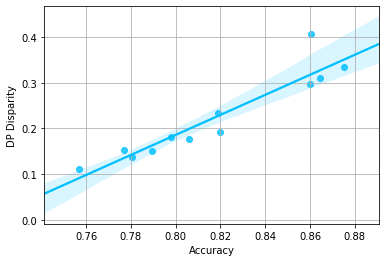

In [108]:
ax = sns.regplot(fb_df['Accuracy'], fb_df['DP Disparity'], color = 'deepskyblue')
ax.grid()
None 

In [2]:
acc_l, dp_l = [], []
for alpha in np.arange(0., 0.2, 0.02):
    acc, acc_std, dp, dp_std = runSim(num_sim = 20, train_samples = 500, test_samples = 100, learning_rate = 0.002, num_rounds = 10, 
              local_epochs = 30, metric = "Demographic disparity", option = "fb-variant1", alpha = alpha, epsilon = None, optimizer = 'adam',
                                     adaptive_alpha = False)
    acc_l.append(acc)
    dp_l.append(dp)

|  Simulation : 1 | 
      seed : 43 -----


100%|██████████| 10/10 [00:06<00:00,  1.57it/s]


      Accuracy: 91.00%  Demographic disparity: 0.51
|  Simulation : 2 | 
      seed : 49 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 87.00%  Demographic disparity: 0.46
|  Simulation : 3 | 
      seed : 57 -----


100%|██████████| 10/10 [00:06<00:00,  1.60it/s]


      Accuracy: 88.00%  Demographic disparity: 0.41
|  Simulation : 4 | 
      seed : 63 -----


100%|██████████| 10/10 [00:05<00:00,  1.77it/s]


      Accuracy: 90.00%  Demographic disparity: 0.48
|  Simulation : 5 | 
      seed : 69 -----


100%|██████████| 10/10 [00:06<00:00,  1.59it/s]


      Accuracy: 89.00%  Demographic disparity: 0.48
|  Simulation : 6 | 
      seed : 76 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 90.00%  Demographic disparity: 0.49
|  Simulation : 7 | 
      seed : 84 -----


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


      Accuracy: 86.00%  Demographic disparity: 0.39
|  Simulation : 8 | 
      seed : 93 -----


100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


      Accuracy: 80.00%  Demographic disparity: 0.41
|  Simulation : 9 | 
      seed : 102 -----


100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


      Accuracy: 84.00%  Demographic disparity: 0.39
|  Simulation : 10 | 
      seed : 110 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 90.00%  Demographic disparity: 0.39
|  Simulation : 11 | 
      seed : 117 -----


100%|██████████| 10/10 [00:06<00:00,  1.65it/s]


      Accuracy: 90.00%  Demographic disparity: 0.46
|  Simulation : 12 | 
      seed : 124 -----


100%|██████████| 10/10 [00:05<00:00,  1.68it/s]


      Accuracy: 89.00%  Demographic disparity: 0.49
|  Simulation : 13 | 
      seed : 130 -----


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


      Accuracy: 84.00%  Demographic disparity: 0.48
|  Simulation : 14 | 
      seed : 139 -----


100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


      Accuracy: 86.00%  Demographic disparity: 0.38
|  Simulation : 15 | 
      seed : 151 -----


100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


      Accuracy: 87.00%  Demographic disparity: 0.45
|  Simulation : 16 | 
      seed : 159 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 93.00%  Demographic disparity: 0.50
|  Simulation : 17 | 
      seed : 167 -----


100%|██████████| 10/10 [00:10<00:00,  1.03s/it]


      Accuracy: 87.00%  Demographic disparity: 0.45
|  Simulation : 18 | 
      seed : 178 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 80.00%  Demographic disparity: 0.34
|  Simulation : 19 | 
      seed : 187 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 87.00%  Demographic disparity: 0.48
|  Simulation : 20 | 
      seed : 195 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 90.00%  Demographic disparity: 0.43
| Test Accuracy: 0.874(0.033) | Demographic disparity: 0.444(0.047) |
| Time elapsed: 161.35 seconds |
|  Simulation : 1 | 
      seed : 204 -----


100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


      Accuracy: 90.00%  Demographic disparity: 0.41
|  Simulation : 2 | 
      seed : 212 -----


100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


      Accuracy: 91.00%  Demographic disparity: 0.43
|  Simulation : 3 | 
      seed : 221 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 93.00%  Demographic disparity: 0.40
|  Simulation : 4 | 
      seed : 229 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 88.00%  Demographic disparity: 0.43
|  Simulation : 5 | 
      seed : 239 -----


100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


      Accuracy: 85.00%  Demographic disparity: 0.43
|  Simulation : 6 | 
      seed : 251 -----


100%|██████████| 10/10 [00:14<00:00,  1.50s/it]


      Accuracy: 91.00%  Demographic disparity: 0.47
|  Simulation : 7 | 
      seed : 267 -----


100%|██████████| 10/10 [00:15<00:00,  1.57s/it]


      Accuracy: 88.00%  Demographic disparity: 0.38
|  Simulation : 8 | 
      seed : 283 -----


100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


      Accuracy: 91.00%  Demographic disparity: 0.45
|  Simulation : 9 | 
      seed : 294 -----


100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


      Accuracy: 88.00%  Demographic disparity: 0.40
|  Simulation : 10 | 
      seed : 304 -----


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


      Accuracy: 85.00%  Demographic disparity: 0.43
|  Simulation : 11 | 
      seed : 314 -----


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


      Accuracy: 86.00%  Demographic disparity: 0.27
|  Simulation : 12 | 
      seed : 323 -----


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


      Accuracy: 90.00%  Demographic disparity: 0.44
|  Simulation : 13 | 
      seed : 333 -----


100%|██████████| 10/10 [00:12<00:00,  1.23s/it]


      Accuracy: 83.00%  Demographic disparity: 0.50
|  Simulation : 14 | 
      seed : 346 -----


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


      Accuracy: 93.00%  Demographic disparity: 0.40
|  Simulation : 15 | 
      seed : 363 -----


100%|██████████| 10/10 [00:21<00:00,  2.13s/it]


      Accuracy: 89.00%  Demographic disparity: 0.31
|  Simulation : 16 | 
      seed : 386 -----


100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


      Accuracy: 87.00%  Demographic disparity: 0.41
|  Simulation : 17 | 
      seed : 405 -----


100%|██████████| 10/10 [00:12<00:00,  1.25s/it]


      Accuracy: 82.00%  Demographic disparity: 0.39
|  Simulation : 18 | 
      seed : 419 -----


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


      Accuracy: 87.00%  Demographic disparity: 0.46
|  Simulation : 19 | 
      seed : 429 -----


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


      Accuracy: 88.00%  Demographic disparity: 0.47
|  Simulation : 20 | 
      seed : 438 -----


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


      Accuracy: 93.00%  Demographic disparity: 0.46
| Test Accuracy: 0.884(0.031) | Demographic disparity: 0.418(0.051) |
| Time elapsed: 243.15 seconds |
|  Simulation : 1 | 
      seed : 447 -----


100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


      Accuracy: 87.00%  Demographic disparity: 0.34
|  Simulation : 2 | 
      seed : 460 -----


100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


      Accuracy: 85.00%  Demographic disparity: 0.31
|  Simulation : 3 | 
      seed : 472 -----


100%|██████████| 10/10 [00:11<00:00,  1.19s/it]


      Accuracy: 86.00%  Demographic disparity: 0.33
|  Simulation : 4 | 
      seed : 484 -----


100%|██████████| 10/10 [00:10<00:00,  1.05s/it]


      Accuracy: 90.00%  Demographic disparity: 0.46
|  Simulation : 5 | 
      seed : 496 -----


100%|██████████| 10/10 [00:12<00:00,  1.29s/it]


      Accuracy: 90.00%  Demographic disparity: 0.31
|  Simulation : 6 | 
      seed : 510 -----


100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


      Accuracy: 96.00%  Demographic disparity: 0.45
|  Simulation : 7 | 
      seed : 523 -----


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


      Accuracy: 78.00%  Demographic disparity: 0.32
|  Simulation : 8 | 
      seed : 532 -----


100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


      Accuracy: 89.00%  Demographic disparity: 0.36
|  Simulation : 9 | 
      seed : 543 -----


100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


      Accuracy: 92.00%  Demographic disparity: 0.45
|  Simulation : 10 | 
      seed : 554 -----


100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


      Accuracy: 93.00%  Demographic disparity: 0.36
|  Simulation : 11 | 
      seed : 564 -----


100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


      Accuracy: 86.00%  Demographic disparity: 0.39
|  Simulation : 12 | 
      seed : 575 -----


100%|██████████| 10/10 [00:12<00:00,  1.20s/it]


      Accuracy: 87.00%  Demographic disparity: 0.49
|  Simulation : 13 | 
      seed : 588 -----


100%|██████████| 10/10 [00:16<00:00,  1.67s/it]


      Accuracy: 90.00%  Demographic disparity: 0.39
|  Simulation : 14 | 
      seed : 606 -----


100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


      Accuracy: 85.00%  Demographic disparity: 0.40
|  Simulation : 15 | 
      seed : 622 -----


100%|██████████| 10/10 [00:18<00:00,  1.82s/it]


      Accuracy: 88.00%  Demographic disparity: 0.54
|  Simulation : 16 | 
      seed : 641 -----


100%|██████████| 10/10 [00:12<00:00,  1.24s/it]


      Accuracy: 91.00%  Demographic disparity: 0.31
|  Simulation : 17 | 
      seed : 655 -----


100%|██████████| 10/10 [00:10<00:00,  1.04s/it]


      Accuracy: 89.00%  Demographic disparity: 0.36
|  Simulation : 18 | 
      seed : 666 -----


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


      Accuracy: 89.00%  Demographic disparity: 0.39
|  Simulation : 19 | 
      seed : 676 -----


100%|██████████| 10/10 [00:13<00:00,  1.32s/it]


      Accuracy: 85.00%  Demographic disparity: 0.36
|  Simulation : 20 | 
      seed : 690 -----


100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


      Accuracy: 88.00%  Demographic disparity: 0.45
| Test Accuracy: 0.882(0.036) | Demographic disparity: 0.388(0.064) |
| Time elapsed: 253.41 seconds |
|  Simulation : 1 | 
      seed : 701 -----


100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


      Accuracy: 89.00%  Demographic disparity: 0.37
|  Simulation : 2 | 
      seed : 711 -----


100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


      Accuracy: 86.00%  Demographic disparity: 0.40
|  Simulation : 3 | 
      seed : 722 -----


100%|██████████| 10/10 [00:17<00:00,  1.70s/it]


      Accuracy: 87.00%  Demographic disparity: 0.33
|  Simulation : 4 | 
      seed : 741 -----


100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


      Accuracy: 83.00%  Demographic disparity: 0.32
|  Simulation : 5 | 
      seed : 753 -----


100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


      Accuracy: 86.00%  Demographic disparity: 0.35
|  Simulation : 6 | 
      seed : 765 -----


100%|██████████| 10/10 [00:11<00:00,  1.19s/it]


      Accuracy: 85.00%  Demographic disparity: 0.32
|  Simulation : 7 | 
      seed : 778 -----


100%|██████████| 10/10 [00:10<00:00,  1.07s/it]


      Accuracy: 86.00%  Demographic disparity: 0.38
|  Simulation : 8 | 
      seed : 790 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 85.00%  Demographic disparity: 0.41
|  Simulation : 9 | 
      seed : 800 -----


100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


      Accuracy: 85.00%  Demographic disparity: 0.40
|  Simulation : 10 | 
      seed : 809 -----


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


      Accuracy: 83.00%  Demographic disparity: 0.41
|  Simulation : 11 | 
      seed : 818 -----


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


      Accuracy: 88.00%  Demographic disparity: 0.35
|  Simulation : 12 | 
      seed : 828 -----


100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


      Accuracy: 88.00%  Demographic disparity: 0.45
|  Simulation : 13 | 
      seed : 838 -----


100%|██████████| 10/10 [00:10<00:00,  1.10s/it]


      Accuracy: 94.00%  Demographic disparity: 0.37
|  Simulation : 14 | 
      seed : 850 -----


100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


      Accuracy: 88.00%  Demographic disparity: 0.44
|  Simulation : 15 | 
      seed : 862 -----


100%|██████████| 10/10 [00:15<00:00,  1.53s/it]


      Accuracy: 89.00%  Demographic disparity: 0.33
|  Simulation : 16 | 
      seed : 878 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 86.00%  Demographic disparity: 0.36
|  Simulation : 17 | 
      seed : 888 -----


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


      Accuracy: 84.00%  Demographic disparity: 0.33
|  Simulation : 18 | 
      seed : 897 -----


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


      Accuracy: 89.00%  Demographic disparity: 0.34
|  Simulation : 19 | 
      seed : 906 -----


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


      Accuracy: 84.00%  Demographic disparity: 0.41
|  Simulation : 20 | 
      seed : 916 -----


100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


      Accuracy: 85.00%  Demographic disparity: 0.40
| Test Accuracy: 0.865(0.025) | Demographic disparity: 0.373(0.040) |
| Time elapsed: 224.48 seconds |
|  Simulation : 1 | 
      seed : 925 -----


100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


      Accuracy: 83.00%  Demographic disparity: 0.28
|  Simulation : 2 | 
      seed : 934 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 86.00%  Demographic disparity: 0.26
|  Simulation : 3 | 
      seed : 942 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 90.00%  Demographic disparity: 0.32
|  Simulation : 4 | 
      seed : 951 -----


100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


      Accuracy: 84.00%  Demographic disparity: 0.28
|  Simulation : 5 | 
      seed : 959 -----


100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


      Accuracy: 90.00%  Demographic disparity: 0.39
|  Simulation : 6 | 
      seed : 968 -----


100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


      Accuracy: 86.00%  Demographic disparity: 0.39
|  Simulation : 7 | 
      seed : 977 -----


100%|██████████| 10/10 [00:10<00:00,  1.03s/it]


      Accuracy: 90.00%  Demographic disparity: 0.31
|  Simulation : 8 | 
      seed : 988 -----


100%|██████████| 10/10 [00:13<00:00,  1.31s/it]


      Accuracy: 87.00%  Demographic disparity: 0.29
|  Simulation : 9 | 
      seed : 2 -----


100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


      Accuracy: 85.00%  Demographic disparity: 0.31
|  Simulation : 10 | 
      seed : 10 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 88.00%  Demographic disparity: 0.34
|  Simulation : 11 | 
      seed : 19 -----


100%|██████████| 10/10 [00:12<00:00,  1.22s/it]


      Accuracy: 79.00%  Demographic disparity: 0.41
|  Simulation : 12 | 
      seed : 32 -----


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


      Accuracy: 83.00%  Demographic disparity: 0.22
|  Simulation : 13 | 
      seed : 41 -----


100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


      Accuracy: 86.00%  Demographic disparity: 0.25
|  Simulation : 14 | 
      seed : 50 -----


100%|██████████| 10/10 [00:08<00:00,  1.13it/s]


      Accuracy: 88.00%  Demographic disparity: 0.38
|  Simulation : 15 | 
      seed : 60 -----


100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


      Accuracy: 93.00%  Demographic disparity: 0.29
|  Simulation : 16 | 
      seed : 68 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 87.00%  Demographic disparity: 0.38
|  Simulation : 17 | 
      seed : 77 -----


100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


      Accuracy: 84.00%  Demographic disparity: 0.37
|  Simulation : 18 | 
      seed : 88 -----


100%|██████████| 10/10 [00:10<00:00,  1.04s/it]


      Accuracy: 89.00%  Demographic disparity: 0.27
|  Simulation : 19 | 
      seed : 99 -----


100%|██████████| 10/10 [00:10<00:00,  1.10s/it]


      Accuracy: 82.00%  Demographic disparity: 0.28
|  Simulation : 20 | 
      seed : 111 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 93.00%  Demographic disparity: 0.30
| Test Accuracy: 0.866(0.035) | Demographic disparity: 0.316(0.053) |
| Time elapsed: 194.22 seconds |
|  Simulation : 1 | 
      seed : 119 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 90.00%  Demographic disparity: 0.39
|  Simulation : 2 | 
      seed : 128 -----


100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


      Accuracy: 83.00%  Demographic disparity: 0.31
|  Simulation : 3 | 
      seed : 138 -----


100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


      Accuracy: 82.00%  Demographic disparity: 0.38
|  Simulation : 4 | 
      seed : 148 -----


100%|██████████| 10/10 [00:12<00:00,  1.25s/it]


      Accuracy: 79.00%  Demographic disparity: 0.36
|  Simulation : 5 | 
      seed : 161 -----


100%|██████████| 10/10 [00:16<00:00,  1.64s/it]


      Accuracy: 89.00%  Demographic disparity: 0.24
|  Simulation : 6 | 
      seed : 179 -----


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


      Accuracy: 84.00%  Demographic disparity: 0.41
|  Simulation : 7 | 
      seed : 189 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 89.00%  Demographic disparity: 0.31
|  Simulation : 8 | 
      seed : 199 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 88.00%  Demographic disparity: 0.35
|  Simulation : 9 | 
      seed : 207 -----


100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


      Accuracy: 90.00%  Demographic disparity: 0.37
|  Simulation : 10 | 
      seed : 222 -----


100%|██████████| 10/10 [00:09<00:00,  1.00it/s]


      Accuracy: 90.00%  Demographic disparity: 0.32
|  Simulation : 11 | 
      seed : 233 -----


100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


      Accuracy: 93.00%  Demographic disparity: 0.38
|  Simulation : 12 | 
      seed : 243 -----


100%|██████████| 10/10 [00:16<00:00,  1.62s/it]


      Accuracy: 88.00%  Demographic disparity: 0.32
|  Simulation : 13 | 
      seed : 260 -----


100%|██████████| 10/10 [00:12<00:00,  1.22s/it]


      Accuracy: 88.00%  Demographic disparity: 0.34
|  Simulation : 14 | 
      seed : 273 -----


100%|██████████| 10/10 [00:21<00:00,  2.12s/it]


      Accuracy: 89.00%  Demographic disparity: 0.44
|  Simulation : 15 | 
      seed : 296 -----


100%|██████████| 10/10 [00:10<00:00,  1.04s/it]


      Accuracy: 87.00%  Demographic disparity: 0.33
|  Simulation : 16 | 
      seed : 307 -----


100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


      Accuracy: 86.00%  Demographic disparity: 0.31
|  Simulation : 17 | 
      seed : 318 -----


100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


      Accuracy: 86.00%  Demographic disparity: 0.29
|  Simulation : 18 | 
      seed : 330 -----


100%|██████████| 10/10 [00:13<00:00,  1.31s/it]


      Accuracy: 89.00%  Demographic disparity: 0.33
|  Simulation : 19 | 
      seed : 344 -----


100%|██████████| 10/10 [00:11<00:00,  1.14s/it]


      Accuracy: 83.00%  Demographic disparity: 0.28
|  Simulation : 20 | 
      seed : 356 -----


100%|██████████| 10/10 [00:09<00:00,  1.03it/s]


      Accuracy: 83.00%  Demographic disparity: 0.21
| Test Accuracy: 0.868(0.034) | Demographic disparity: 0.333(0.053) |
| Time elapsed: 247.44 seconds |
|  Simulation : 1 | 
      seed : 367 -----


100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


      Accuracy: 86.00%  Demographic disparity: 0.33
|  Simulation : 2 | 
      seed : 376 -----


100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


      Accuracy: 78.00%  Demographic disparity: 0.36
|  Simulation : 3 | 
      seed : 387 -----


100%|██████████| 10/10 [00:19<00:00,  1.96s/it]


      Accuracy: 89.00%  Demographic disparity: 0.34
|  Simulation : 4 | 
      seed : 407 -----


100%|██████████| 10/10 [00:20<00:00,  2.08s/it]


      Accuracy: 80.00%  Demographic disparity: 0.34
|  Simulation : 5 | 
      seed : 429 -----


100%|██████████| 10/10 [00:11<00:00,  1.16s/it]


      Accuracy: 85.00%  Demographic disparity: 0.38
|  Simulation : 6 | 
      seed : 442 -----


100%|██████████| 10/10 [00:10<00:00,  1.06s/it]


      Accuracy: 82.00%  Demographic disparity: 0.34
|  Simulation : 7 | 
      seed : 453 -----


100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


      Accuracy: 84.00%  Demographic disparity: 0.31
|  Simulation : 8 | 
      seed : 464 -----


100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


      Accuracy: 83.00%  Demographic disparity: 0.23
|  Simulation : 9 | 
      seed : 476 -----


100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


      Accuracy: 87.00%  Demographic disparity: 0.30
|  Simulation : 10 | 
      seed : 487 -----


100%|██████████| 10/10 [00:10<00:00,  1.03s/it]


      Accuracy: 87.00%  Demographic disparity: 0.23
|  Simulation : 11 | 
      seed : 498 -----


100%|██████████| 10/10 [00:11<00:00,  1.11s/it]


      Accuracy: 83.00%  Demographic disparity: 0.30
|  Simulation : 12 | 
      seed : 509 -----


100%|██████████| 10/10 [00:12<00:00,  1.23s/it]


      Accuracy: 86.00%  Demographic disparity: 0.34
|  Simulation : 13 | 
      seed : 522 -----


100%|██████████| 10/10 [00:10<00:00,  1.03s/it]


      Accuracy: 87.00%  Demographic disparity: 0.17
|  Simulation : 14 | 
      seed : 533 -----


100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


      Accuracy: 81.00%  Demographic disparity: 0.24
|  Simulation : 15 | 
      seed : 544 -----


100%|██████████| 10/10 [00:14<00:00,  1.50s/it]


      Accuracy: 88.00%  Demographic disparity: 0.34
|  Simulation : 16 | 
      seed : 560 -----


100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


      Accuracy: 83.00%  Demographic disparity: 0.24
|  Simulation : 17 | 
      seed : 571 -----


100%|██████████| 10/10 [00:10<00:00,  1.10s/it]


      Accuracy: 86.00%  Demographic disparity: 0.31
|  Simulation : 18 | 
      seed : 583 -----


100%|██████████| 10/10 [00:09<00:00,  1.03it/s]


      Accuracy: 88.00%  Demographic disparity: 0.33
|  Simulation : 19 | 
      seed : 593 -----


100%|██████████| 10/10 [00:10<00:00,  1.04s/it]


      Accuracy: 92.00%  Demographic disparity: 0.37
|  Simulation : 20 | 
      seed : 605 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 83.00%  Demographic disparity: 0.15
| Test Accuracy: 0.849(0.033) | Demographic disparity: 0.298(0.063) |
| Time elapsed: 248.39 seconds |
|  Simulation : 1 | 
      seed : 615 -----


100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


      Accuracy: 86.00%  Demographic disparity: 0.33
|  Simulation : 2 | 
      seed : 627 -----


100%|██████████| 10/10 [00:15<00:00,  1.53s/it]


      Accuracy: 90.00%  Demographic disparity: 0.40
|  Simulation : 3 | 
      seed : 644 -----


100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


      Accuracy: 86.00%  Demographic disparity: 0.37
|  Simulation : 4 | 
      seed : 655 -----


100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


      Accuracy: 84.00%  Demographic disparity: 0.18
|  Simulation : 5 | 
      seed : 663 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 87.00%  Demographic disparity: 0.42
|  Simulation : 6 | 
      seed : 672 -----


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


      Accuracy: 84.00%  Demographic disparity: 0.30
|  Simulation : 7 | 
      seed : 681 -----


100%|██████████| 10/10 [00:10<00:00,  1.09s/it]


      Accuracy: 76.00%  Demographic disparity: 0.18
|  Simulation : 8 | 
      seed : 692 -----


100%|██████████| 10/10 [00:12<00:00,  1.27s/it]


      Accuracy: 76.00%  Demographic disparity: 0.10
|  Simulation : 9 | 
      seed : 706 -----


100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


      Accuracy: 89.00%  Demographic disparity: 0.39
|  Simulation : 10 | 
      seed : 717 -----


100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


      Accuracy: 86.00%  Demographic disparity: 0.33
|  Simulation : 11 | 
      seed : 728 -----


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


      Accuracy: 85.00%  Demographic disparity: 0.37
|  Simulation : 12 | 
      seed : 738 -----


100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


      Accuracy: 86.00%  Demographic disparity: 0.30
|  Simulation : 13 | 
      seed : 748 -----


100%|██████████| 10/10 [00:14<00:00,  1.42s/it]


      Accuracy: 82.00%  Demographic disparity: 0.26
|  Simulation : 14 | 
      seed : 763 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 88.00%  Demographic disparity: 0.33
|  Simulation : 15 | 
      seed : 772 -----


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


      Accuracy: 90.00%  Demographic disparity: 0.31
|  Simulation : 16 | 
      seed : 781 -----


100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


      Accuracy: 90.00%  Demographic disparity: 0.33
|  Simulation : 17 | 
      seed : 791 -----


100%|██████████| 10/10 [00:10<00:00,  1.07s/it]


      Accuracy: 87.00%  Demographic disparity: 0.25
|  Simulation : 18 | 
      seed : 803 -----


100%|██████████| 10/10 [00:11<00:00,  1.19s/it]


      Accuracy: 82.00%  Demographic disparity: 0.26
|  Simulation : 19 | 
      seed : 815 -----


100%|██████████| 10/10 [00:10<00:00,  1.04s/it]


      Accuracy: 86.00%  Demographic disparity: 0.25
|  Simulation : 20 | 
      seed : 827 -----


100%|██████████| 10/10 [00:11<00:00,  1.10s/it]


      Accuracy: 83.00%  Demographic disparity: 0.30
| Test Accuracy: 0.851(0.039) | Demographic disparity: 0.297(0.078) |
| Time elapsed: 223.32 seconds |
|  Simulation : 1 | 
      seed : 838 -----


100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


      Accuracy: 91.00%  Demographic disparity: 0.30
|  Simulation : 2 | 
      seed : 847 -----


100%|██████████| 10/10 [00:09<00:00,  1.00it/s]


      Accuracy: 84.00%  Demographic disparity: 0.26
|  Simulation : 3 | 
      seed : 858 -----


100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


      Accuracy: 87.00%  Demographic disparity: 0.42
|  Simulation : 4 | 
      seed : 869 -----


100%|██████████| 10/10 [00:25<00:00,  2.51s/it]


      Accuracy: 91.00%  Demographic disparity: 0.23
|  Simulation : 5 | 
      seed : 894 -----


100%|██████████| 10/10 [00:11<00:00,  1.20s/it]


      Accuracy: 89.00%  Demographic disparity: 0.31
|  Simulation : 6 | 
      seed : 908 -----


100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


      Accuracy: 90.00%  Demographic disparity: 0.40
|  Simulation : 7 | 
      seed : 918 -----


100%|██████████| 10/10 [00:10<00:00,  1.09s/it]


      Accuracy: 81.00%  Demographic disparity: 0.24
|  Simulation : 8 | 
      seed : 930 -----


100%|██████████| 10/10 [00:10<00:00,  1.05s/it]


      Accuracy: 82.00%  Demographic disparity: 0.21
|  Simulation : 9 | 
      seed : 942 -----


100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


      Accuracy: 88.00%  Demographic disparity: 0.28
|  Simulation : 10 | 
      seed : 954 -----


100%|██████████| 10/10 [00:09<00:00,  1.00it/s]


      Accuracy: 87.00%  Demographic disparity: 0.37
|  Simulation : 11 | 
      seed : 964 -----


100%|██████████| 10/10 [00:18<00:00,  1.81s/it]


      Accuracy: 89.00%  Demographic disparity: 0.26
|  Simulation : 12 | 
      seed : 983 -----


100%|██████████| 10/10 [00:15<00:00,  1.59s/it]


      Accuracy: 90.00%  Demographic disparity: 0.36
|  Simulation : 13 | 
      seed : 0 -----


100%|██████████| 10/10 [00:09<00:00,  1.00it/s]


      Accuracy: 88.00%  Demographic disparity: 0.34
|  Simulation : 14 | 
      seed : 11 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 90.00%  Demographic disparity: 0.29
|  Simulation : 15 | 
      seed : 21 -----


100%|██████████| 10/10 [00:10<00:00,  1.07s/it]


      Accuracy: 85.00%  Demographic disparity: 0.15
|  Simulation : 16 | 
      seed : 33 -----


100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


      Accuracy: 78.00%  Demographic disparity: 0.24
|  Simulation : 17 | 
      seed : 46 -----


100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


      Accuracy: 80.00%  Demographic disparity: 0.39
|  Simulation : 18 | 
      seed : 58 -----


100%|██████████| 10/10 [00:10<00:00,  1.06s/it]


      Accuracy: 90.00%  Demographic disparity: 0.17
|  Simulation : 19 | 
      seed : 69 -----


100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


      Accuracy: 85.00%  Demographic disparity: 0.34
|  Simulation : 20 | 
      seed : 82 -----


100%|██████████| 10/10 [00:12<00:00,  1.28s/it]


      Accuracy: 84.00%  Demographic disparity: 0.26
| Test Accuracy: 0.865(0.038) | Demographic disparity: 0.291(0.074) |
| Time elapsed: 257.42 seconds |
|  Simulation : 1 | 
      seed : 96 -----


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


      Accuracy: 85.00%  Demographic disparity: 0.39
|  Simulation : 2 | 
      seed : 106 -----


100%|██████████| 10/10 [00:17<00:00,  1.76s/it]


      Accuracy: 91.00%  Demographic disparity: 0.29
|  Simulation : 3 | 
      seed : 124 -----


100%|██████████| 10/10 [00:12<00:00,  1.24s/it]


      Accuracy: 88.00%  Demographic disparity: 0.38
|  Simulation : 4 | 
      seed : 138 -----


100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


      Accuracy: 82.00%  Demographic disparity: 0.38
|  Simulation : 5 | 
      seed : 150 -----


100%|██████████| 10/10 [00:10<00:00,  1.03s/it]


      Accuracy: 83.00%  Demographic disparity: 0.25
|  Simulation : 6 | 
      seed : 161 -----


100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


      Accuracy: 88.00%  Demographic disparity: 0.23
|  Simulation : 7 | 
      seed : 172 -----


100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


      Accuracy: 77.00%  Demographic disparity: 0.23
|  Simulation : 8 | 
      seed : 182 -----


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


      Accuracy: 87.00%  Demographic disparity: 0.39
|  Simulation : 9 | 
      seed : 192 -----


100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


      Accuracy: 85.00%  Demographic disparity: 0.38
|  Simulation : 10 | 
      seed : 203 -----


100%|██████████| 10/10 [00:12<00:00,  1.26s/it]


      Accuracy: 83.00%  Demographic disparity: 0.26
|  Simulation : 11 | 
      seed : 217 -----


100%|██████████| 10/10 [00:10<00:00,  1.05s/it]


      Accuracy: 92.00%  Demographic disparity: 0.45
|  Simulation : 12 | 
      seed : 229 -----


100%|██████████| 10/10 [00:10<00:00,  1.09s/it]


      Accuracy: 83.00%  Demographic disparity: 0.32
|  Simulation : 13 | 
      seed : 240 -----


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


      Accuracy: 81.00%  Demographic disparity: 0.28
|  Simulation : 14 | 
      seed : 249 -----


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


      Accuracy: 92.00%  Demographic disparity: 0.34
|  Simulation : 15 | 
      seed : 258 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 82.00%  Demographic disparity: 0.42
|  Simulation : 16 | 
      seed : 266 -----


100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


      Accuracy: 89.00%  Demographic disparity: 0.38
|  Simulation : 17 | 
      seed : 275 -----


100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


      Accuracy: 81.00%  Demographic disparity: 0.29
|  Simulation : 18 | 
      seed : 284 -----


100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


      Accuracy: 90.00%  Demographic disparity: 0.23
|  Simulation : 19 | 
      seed : 293 -----


100%|██████████| 10/10 [00:11<00:00,  1.18s/it]


      Accuracy: 91.00%  Demographic disparity: 0.41
|  Simulation : 20 | 
      seed : 305 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]

      Accuracy: 74.00%  Demographic disparity: 0.13
| Test Accuracy: 0.852(0.049) | Demographic disparity: 0.322(0.081) |
| Time elapsed: 218.16 seconds |


In [3]:
dp_l

[0.4440255567715405,
 0.4182600010410799,
 0.38847164641148774,
 0.37261094940589845,
 0.3163767733381627,
 0.33290828261024763,
 0.29783234742943515,
 0.29720482474646415,
 0.2912800527611185,
 0.32209614825199046]

In [3]:
acc_l, dp_l = {}, {}

# bias correcting
acc_l['bias correcting'] = []
dp_l['bias correcting'] = []
for alpha in range(10):
    acc, acc_std, dp, dp_std = runSim(num_sim = 20, train_samples = 1000, test_samples = 100, learning_rate = 0.005, num_rounds = 10, 
              local_epochs = 30, metric = "Demographic disparity", option = "bias correcting", alpha = alpha, epsilon = None, optimizer = 'adam')
    acc_l['bias correcting'].append(acc)
    dp_l['bias correcting'].append(dp)
    
# FairBatch
acc_l['FairBatch'], dp_l['FairBatch'] = [], []
for alpha in np.arange(0., 0.2, 0.02):
    acc, acc_std, dp, dp_std = runSim(num_sim = 20, train_samples = 1000, test_samples = 100, learning_rate = 0.005, num_rounds = 10, 
              local_epochs = 30, metric = "Demographic disparity", option = "FairBatch", alpha = alpha, epsilon = None, optimizer = 'adam',
                                     adaptive_alpha = False)
    acc_l['FairBatch'].append(acc)
    dp_l['FairBatch'].append(dp)
    
acc, acc_std, dp, dp_std = runSim(num_sim = 20, train_samples = 1000, test_samples = 100, learning_rate = 0.01, num_rounds = 10, 
          local_epochs = 30, metric = "Demographic disparity", option = "FairBatch", alpha = 0.1, epsilon = None, optimizer = 'adam',
                                 adaptive_alpha = False)
acc_l['FairBatch'].append(acc)
dp_l['FairBatch'].append(dp)
    
# F-Train
acc_l['F-Train'], dp_l['F-Train'] = [], []
for lambda_d in np.arange(0,1,0.1):
    acc, acc_std, dp, dp_std = runSim(num_sim = 20, train_samples = 1000, test_samples = 100, num_rounds = 10, option = 'ftrain',
          local_epochs = 30, metric = "Demographic disparity", init_epochs = 50, lr_g = 0.005, lr_d = 0.01, lambda_d = lambda_d)
    acc_l['F-Train'].append(acc)
    dp_l['F-Train'].append(dp)
    
# threshold-adjusting
acc_l['threshold adjusting'], dp_l['threshold adjusting'] = [], []
for aj_alpha in np.arange(0,1,0.1):
    acc, acc_std, dp, dp_std = runSim(num_sim = 20, train_samples = 1000, test_samples = 100, option = "threshold adjusting", learning_rate = 0.005,
      num_rounds = 2, local_epochs = 10, metric = "Demographic disparity", adjusting_rounds = 10, adjusting_epochs = 30,
      adjusting_alpha = aj_alpha, epsilon = 0.02, optimizer = 'adam')
    acc_l['threshold adjusting'].append(acc)
    dp_l['threshold adjusting'].append(dp)
    
# local Zafar
acc_l['local Zafar'], dp_l['local Zafar'] = [], []
for penalty in np.arange(100,1100,100):
    acc, acc_std, dp, dp_std = runSim(num_sim = 20, train_samples = 1000, test_samples = 100, learning_rate = 0.001, num_rounds = 10, 
          local_epochs = 30, metric = "Demographic disparity", option = "local zafar", penalty = penalty, optimizer = 'adam',
      epsilon = None)
    acc_l['local Zafar'].append(acc)
    dp_l['local Zafar'].append(dp)
    
# adversarial learning 100
acc_l['adversarial learning'], dp_l['adversarial learning'] = [], []
for alpha in np.arange(0,1,0.1):
    acc, acc_std, dp, dp_std = runSim(num_sim = 20, train_samples = 1000, test_samples = 100, learning_rate = 0.01, num_rounds = 10, adaptive_lr = True,
          local_epochs = 30, metric = "Demographic disparity", option = "adversarial learning", alpha = alpha, epsilon = None, optimizer = 'sgd')
    acc_l['adversarial learning'].append(acc)
    dp_l['adversarial learning'].append(dp)
    
    

|  Simulation : 1 | 
      seed : 146 -----


100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


      Accuracy: 84.00%  Demographic disparity: 0.37
|  Simulation : 2 | 
      seed : 156 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 90.00%  Demographic disparity: 0.41
|  Simulation : 3 | 
      seed : 164 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 92.00%  Demographic disparity: 0.39
|  Simulation : 4 | 
      seed : 171 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 84.00%  Demographic disparity: 0.33
|  Simulation : 5 | 
      seed : 179 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 83.00%  Demographic disparity: 0.48
|  Simulation : 6 | 
      seed : 186 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 85.00%  Demographic disparity: 0.32
|  Simulation : 7 | 
      seed : 194 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 91.00%  Demographic disparity: 0.40
|  Simulation : 8 | 
      seed : 202 -----


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


      Accuracy: 89.00%  Demographic disparity: 0.33
|  Simulation : 9 | 
      seed : 211 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 85.00%  Demographic disparity: 0.44
|  Simulation : 10 | 
      seed : 219 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 87.00%  Demographic disparity: 0.32
|  Simulation : 11 | 
      seed : 227 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 86.00%  Demographic disparity: 0.44
|  Simulation : 12 | 
      seed : 235 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 87.00%  Demographic disparity: 0.45
|  Simulation : 13 | 
      seed : 242 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 80.00%  Demographic disparity: 0.41
|  Simulation : 14 | 
      seed : 250 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 80.00%  Demographic disparity: 0.35
|  Simulation : 15 | 
      seed : 258 -----


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


      Accuracy: 83.00%  Demographic disparity: 0.33
|  Simulation : 16 | 
      seed : 266 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 81.00%  Demographic disparity: 0.45
|  Simulation : 17 | 
      seed : 275 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 90.00%  Demographic disparity: 0.46
|  Simulation : 18 | 
      seed : 283 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 91.00%  Demographic disparity: 0.35
|  Simulation : 19 | 
      seed : 291 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 84.00%  Demographic disparity: 0.37
|  Simulation : 20 | 
      seed : 298 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 88.00%  Demographic disparity: 0.41
| Test Accuracy: 0.860(0.036) | Demographic disparity: 0.390(0.049) |
| Time elapsed: 159.91 seconds |
|  Simulation : 1 | 
      seed : 306 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 91.00%  Demographic disparity: 0.35
|  Simulation : 2 | 
      seed : 314 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 84.00%  Demographic disparity: 0.28
|  Simulation : 3 | 
      seed : 321 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 89.00%  Demographic disparity: 0.28
|  Simulation : 4 | 
      seed : 329 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 82.00%  Demographic disparity: 0.31
|  Simulation : 5 | 
      seed : 337 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 85.00%  Demographic disparity: 0.37
|  Simulation : 6 | 
      seed : 345 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 91.00%  Demographic disparity: 0.38
|  Simulation : 7 | 
      seed : 352 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 81.00%  Demographic disparity: 0.29
|  Simulation : 8 | 
      seed : 360 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 83.00%  Demographic disparity: 0.28
|  Simulation : 9 | 
      seed : 368 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 79.00%  Demographic disparity: 0.30
|  Simulation : 10 | 
      seed : 375 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 83.00%  Demographic disparity: 0.30
|  Simulation : 11 | 
      seed : 383 -----


100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


      Accuracy: 81.00%  Demographic disparity: 0.29
|  Simulation : 12 | 
      seed : 392 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 89.00%  Demographic disparity: 0.45
|  Simulation : 13 | 
      seed : 400 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 86.00%  Demographic disparity: 0.36
|  Simulation : 14 | 
      seed : 408 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 85.00%  Demographic disparity: 0.27
|  Simulation : 15 | 
      seed : 416 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 88.00%  Demographic disparity: 0.33
|  Simulation : 16 | 
      seed : 423 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 83.00%  Demographic disparity: 0.33
|  Simulation : 17 | 
      seed : 431 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 81.00%  Demographic disparity: 0.35
|  Simulation : 18 | 
      seed : 439 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 86.00%  Demographic disparity: 0.41
|  Simulation : 19 | 
      seed : 446 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 91.00%  Demographic disparity: 0.42
|  Simulation : 20 | 
      seed : 454 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 82.00%  Demographic disparity: 0.21
| Test Accuracy: 0.850(0.036) | Demographic disparity: 0.327(0.058) |
| Time elapsed: 155.42 seconds |
|  Simulation : 1 | 
      seed : 461 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 82.00%  Demographic disparity: 0.28
|  Simulation : 2 | 
      seed : 469 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 83.00%  Demographic disparity: 0.18
|  Simulation : 3 | 
      seed : 477 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 76.00%  Demographic disparity: 0.29
|  Simulation : 4 | 
      seed : 484 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 83.00%  Demographic disparity: 0.22
|  Simulation : 5 | 
      seed : 492 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 80.00%  Demographic disparity: 0.27
|  Simulation : 6 | 
      seed : 500 -----


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


      Accuracy: 87.00%  Demographic disparity: 0.18
|  Simulation : 7 | 
      seed : 509 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 82.00%  Demographic disparity: 0.17
|  Simulation : 8 | 
      seed : 517 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 86.00%  Demographic disparity: 0.27
|  Simulation : 9 | 
      seed : 525 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 92.00%  Demographic disparity: 0.30
|  Simulation : 10 | 
      seed : 533 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 80.00%  Demographic disparity: 0.29
|  Simulation : 11 | 
      seed : 541 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 86.00%  Demographic disparity: 0.18
|  Simulation : 12 | 
      seed : 548 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 82.00%  Demographic disparity: 0.18
|  Simulation : 13 | 
      seed : 556 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 81.00%  Demographic disparity: 0.17
|  Simulation : 14 | 
      seed : 564 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 89.00%  Demographic disparity: 0.26
|  Simulation : 15 | 
      seed : 571 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 81.00%  Demographic disparity: 0.27
|  Simulation : 16 | 
      seed : 579 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 86.00%  Demographic disparity: 0.36
|  Simulation : 17 | 
      seed : 587 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 82.00%  Demographic disparity: 0.22
|  Simulation : 18 | 
      seed : 594 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 83.00%  Demographic disparity: 0.22
|  Simulation : 19 | 
      seed : 602 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 85.00%  Demographic disparity: 0.28
|  Simulation : 20 | 
      seed : 610 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 83.00%  Demographic disparity: 0.29
| Test Accuracy: 0.834(0.035) | Demographic disparity: 0.244(0.052) |
| Time elapsed: 155.80 seconds |
|  Simulation : 1 | 
      seed : 617 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 81.00%  Demographic disparity: 0.15
|  Simulation : 2 | 
      seed : 625 -----


100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


      Accuracy: 85.00%  Demographic disparity: 0.31
|  Simulation : 3 | 
      seed : 635 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 77.00%  Demographic disparity: 0.14
|  Simulation : 4 | 
      seed : 643 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 80.00%  Demographic disparity: 0.14
|  Simulation : 5 | 
      seed : 651 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 80.00%  Demographic disparity: 0.22
|  Simulation : 6 | 
      seed : 658 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 74.00%  Demographic disparity: 0.17
|  Simulation : 7 | 
      seed : 666 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 83.00%  Demographic disparity: 0.21
|  Simulation : 8 | 
      seed : 674 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 75.00%  Demographic disparity: 0.16
|  Simulation : 9 | 
      seed : 682 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 79.00%  Demographic disparity: 0.09
|  Simulation : 10 | 
      seed : 690 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 80.00%  Demographic disparity: 0.19
|  Simulation : 11 | 
      seed : 698 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 83.00%  Demographic disparity: 0.21
|  Simulation : 12 | 
      seed : 705 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 81.00%  Demographic disparity: 0.34
|  Simulation : 13 | 
      seed : 713 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 81.00%  Demographic disparity: 0.17
|  Simulation : 14 | 
      seed : 720 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 72.00%  Demographic disparity: 0.10
|  Simulation : 15 | 
      seed : 728 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 84.00%  Demographic disparity: 0.21
|  Simulation : 16 | 
      seed : 736 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 85.00%  Demographic disparity: 0.18
|  Simulation : 17 | 
      seed : 743 -----


100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


      Accuracy: 84.00%  Demographic disparity: 0.21
|  Simulation : 18 | 
      seed : 753 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 80.00%  Demographic disparity: 0.17
|  Simulation : 19 | 
      seed : 761 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 83.00%  Demographic disparity: 0.14
|  Simulation : 20 | 
      seed : 769 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 78.00%  Demographic disparity: 0.22
| Test Accuracy: 0.802(0.035) | Demographic disparity: 0.186(0.058) |
| Time elapsed: 159.18 seconds |
|  Simulation : 1 | 
      seed : 776 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 66.00%  Demographic disparity: 0.01
|  Simulation : 2 | 
      seed : 784 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 71.00%  Demographic disparity: 0.14
|  Simulation : 3 | 
      seed : 792 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 73.00%  Demographic disparity: 0.05
|  Simulation : 4 | 
      seed : 800 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 72.00%  Demographic disparity: 0.02
|  Simulation : 5 | 
      seed : 807 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 70.00%  Demographic disparity: 0.12
|  Simulation : 6 | 
      seed : 815 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 82.00%  Demographic disparity: 0.18
|  Simulation : 7 | 
      seed : 823 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 86.00%  Demographic disparity: 0.23
|  Simulation : 8 | 
      seed : 830 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 76.00%  Demographic disparity: 0.07
|  Simulation : 9 | 
      seed : 838 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 72.00%  Demographic disparity: 0.17
|  Simulation : 10 | 
      seed : 846 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 77.00%  Demographic disparity: 0.10
|  Simulation : 11 | 
      seed : 853 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 74.00%  Demographic disparity: 0.07
|  Simulation : 12 | 
      seed : 861 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 68.00%  Demographic disparity: 0.08
|  Simulation : 13 | 
      seed : 871 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 79.00%  Demographic disparity: 0.31
|  Simulation : 14 | 
      seed : 879 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 80.00%  Demographic disparity: 0.20
|  Simulation : 15 | 
      seed : 886 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 78.00%  Demographic disparity: 0.16
|  Simulation : 16 | 
      seed : 894 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 82.00%  Demographic disparity: 0.20
|  Simulation : 17 | 
      seed : 902 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 80.00%  Demographic disparity: 0.14
|  Simulation : 18 | 
      seed : 910 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 75.00%  Demographic disparity: 0.10
|  Simulation : 19 | 
      seed : 917 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 85.00%  Demographic disparity: 0.19
|  Simulation : 20 | 
      seed : 925 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 76.00%  Demographic disparity: 0.15
| Test Accuracy: 0.761(0.053) | Demographic disparity: 0.133(0.073) |
| Time elapsed: 156.21 seconds |
|  Simulation : 1 | 
      seed : 933 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 71.00%  Demographic disparity: 0.02
|  Simulation : 2 | 
      seed : 941 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 74.00%  Demographic disparity: 0.03
|  Simulation : 3 | 
      seed : 948 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 82.00%  Demographic disparity: 0.10
|  Simulation : 4 | 
      seed : 956 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 77.00%  Demographic disparity: 0.16
|  Simulation : 5 | 
      seed : 963 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 74.00%  Demographic disparity: 0.09
|  Simulation : 6 | 
      seed : 971 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 79.00%  Demographic disparity: 0.15
|  Simulation : 7 | 
      seed : 979 -----


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


      Accuracy: 76.00%  Demographic disparity: 0.13
|  Simulation : 8 | 
      seed : 989 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 69.00%  Demographic disparity: 0.15
|  Simulation : 9 | 
      seed : 997 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 77.00%  Demographic disparity: 0.04
|  Simulation : 10 | 
      seed : 5 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 75.00%  Demographic disparity: 0.11
|  Simulation : 11 | 
      seed : 12 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 80.00%  Demographic disparity: 0.06
|  Simulation : 12 | 
      seed : 20 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 75.00%  Demographic disparity: 0.14
|  Simulation : 13 | 
      seed : 28 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 74.00%  Demographic disparity: 0.08
|  Simulation : 14 | 
      seed : 35 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 76.00%  Demographic disparity: 0.05
|  Simulation : 15 | 
      seed : 43 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 75.00%  Demographic disparity: 0.11
|  Simulation : 16 | 
      seed : 51 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 67.00%  Demographic disparity: 0.03
|  Simulation : 17 | 
      seed : 58 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 80.00%  Demographic disparity: 0.16
|  Simulation : 18 | 
      seed : 66 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 72.00%  Demographic disparity: 0.05
|  Simulation : 19 | 
      seed : 74 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 77.00%  Demographic disparity: 0.07
|  Simulation : 20 | 
      seed : 81 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 74.00%  Demographic disparity: 0.16
| Test Accuracy: 0.752(0.036) | Demographic disparity: 0.095(0.047) |
| Time elapsed: 156.29 seconds |
|  Simulation : 1 | 
      seed : 89 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 73.00%  Demographic disparity: 0.02
|  Simulation : 2 | 
      seed : 97 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 68.00%  Demographic disparity: 0.07
|  Simulation : 3 | 
      seed : 104 -----


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


      Accuracy: 79.00%  Demographic disparity: 0.11
|  Simulation : 4 | 
      seed : 114 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 71.00%  Demographic disparity: 0.06
|  Simulation : 5 | 
      seed : 122 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 78.00%  Demographic disparity: 0.02
|  Simulation : 6 | 
      seed : 130 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 59.00%  Demographic disparity: 0.04
|  Simulation : 7 | 
      seed : 138 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 74.00%  Demographic disparity: 0.04
|  Simulation : 8 | 
      seed : 145 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 76.00%  Demographic disparity: 0.10
|  Simulation : 9 | 
      seed : 153 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 78.00%  Demographic disparity: 0.16
|  Simulation : 10 | 
      seed : 161 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 79.00%  Demographic disparity: 0.14
|  Simulation : 11 | 
      seed : 169 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 67.00%  Demographic disparity: 0.00
|  Simulation : 12 | 
      seed : 176 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 62.00%  Demographic disparity: 0.03
|  Simulation : 13 | 
      seed : 184 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 78.00%  Demographic disparity: 0.15
|  Simulation : 14 | 
      seed : 192 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 76.00%  Demographic disparity: 0.13
|  Simulation : 15 | 
      seed : 200 -----


100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


      Accuracy: 80.00%  Demographic disparity: 0.17
|  Simulation : 16 | 
      seed : 208 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 74.00%  Demographic disparity: 0.02
|  Simulation : 17 | 
      seed : 216 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 77.00%  Demographic disparity: 0.10
|  Simulation : 18 | 
      seed : 224 -----


100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


      Accuracy: 74.00%  Demographic disparity: 0.07
|  Simulation : 19 | 
      seed : 234 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 76.00%  Demographic disparity: 0.22
|  Simulation : 20 | 
      seed : 241 -----


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


      Accuracy: 75.00%  Demographic disparity: 0.06
| Test Accuracy: 0.737(0.056) | Demographic disparity: 0.086(0.059) |
| Time elapsed: 160.77 seconds |
|  Simulation : 1 | 
      seed : 250 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 68.00%  Demographic disparity: 0.05
|  Simulation : 2 | 
      seed : 257 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 63.00%  Demographic disparity: 0.02
|  Simulation : 3 | 
      seed : 265 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 73.00%  Demographic disparity: 0.09
|  Simulation : 4 | 
      seed : 273 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 64.00%  Demographic disparity: 0.05
|  Simulation : 5 | 
      seed : 281 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 76.00%  Demographic disparity: 0.13
|  Simulation : 6 | 
      seed : 289 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 71.00%  Demographic disparity: 0.02
|  Simulation : 7 | 
      seed : 297 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 71.00%  Demographic disparity: 0.02
|  Simulation : 8 | 
      seed : 305 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 77.00%  Demographic disparity: 0.06
|  Simulation : 9 | 
      seed : 313 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 81.00%  Demographic disparity: 0.14
|  Simulation : 10 | 
      seed : 321 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 67.00%  Demographic disparity: 0.02
|  Simulation : 11 | 
      seed : 329 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 75.00%  Demographic disparity: 0.02
|  Simulation : 12 | 
      seed : 337 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 73.00%  Demographic disparity: 0.05
|  Simulation : 13 | 
      seed : 345 -----


100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


      Accuracy: 80.00%  Demographic disparity: 0.13
|  Simulation : 14 | 
      seed : 355 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 68.00%  Demographic disparity: 0.08
|  Simulation : 15 | 
      seed : 363 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 77.00%  Demographic disparity: 0.22
|  Simulation : 16 | 
      seed : 371 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 73.00%  Demographic disparity: 0.03
|  Simulation : 17 | 
      seed : 378 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 75.00%  Demographic disparity: 0.10
|  Simulation : 18 | 
      seed : 386 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 75.00%  Demographic disparity: 0.11
|  Simulation : 19 | 
      seed : 394 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 80.00%  Demographic disparity: 0.22
|  Simulation : 20 | 
      seed : 402 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 69.00%  Demographic disparity: 0.08
| Test Accuracy: 0.728(0.050) | Demographic disparity: 0.082(0.060) |
| Time elapsed: 160.37 seconds |
|  Simulation : 1 | 
      seed : 410 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 59.00%  Demographic disparity: 0.11
|  Simulation : 2 | 
      seed : 418 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 69.00%  Demographic disparity: 0.00
|  Simulation : 3 | 
      seed : 426 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 74.00%  Demographic disparity: 0.11
|  Simulation : 4 | 
      seed : 433 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 70.00%  Demographic disparity: 0.02
|  Simulation : 5 | 
      seed : 441 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 74.00%  Demographic disparity: 0.13
|  Simulation : 6 | 
      seed : 449 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 68.00%  Demographic disparity: 0.02
|  Simulation : 7 | 
      seed : 457 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 71.00%  Demographic disparity: 0.02
|  Simulation : 8 | 
      seed : 464 -----


100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


      Accuracy: 71.00%  Demographic disparity: 0.05
|  Simulation : 9 | 
      seed : 474 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 69.00%  Demographic disparity: 0.09
|  Simulation : 10 | 
      seed : 482 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 78.00%  Demographic disparity: 0.15
|  Simulation : 11 | 
      seed : 490 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 70.00%  Demographic disparity: 0.05
|  Simulation : 12 | 
      seed : 498 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 66.00%  Demographic disparity: 0.02
|  Simulation : 13 | 
      seed : 505 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 75.00%  Demographic disparity: 0.06
|  Simulation : 14 | 
      seed : 513 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 72.00%  Demographic disparity: 0.13
|  Simulation : 15 | 
      seed : 521 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 74.00%  Demographic disparity: 0.05
|  Simulation : 16 | 
      seed : 529 -----


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


      Accuracy: 76.00%  Demographic disparity: 0.08
|  Simulation : 17 | 
      seed : 537 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 71.00%  Demographic disparity: 0.07
|  Simulation : 18 | 
      seed : 544 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 77.00%  Demographic disparity: 0.13
|  Simulation : 19 | 
      seed : 552 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 71.00%  Demographic disparity: 0.04
|  Simulation : 20 | 
      seed : 560 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 67.00%  Demographic disparity: 0.08
| Test Accuracy: 0.711(0.042) | Demographic disparity: 0.071(0.042) |
| Time elapsed: 158.07 seconds |
|  Simulation : 1 | 
      seed : 568 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 70.00%  Demographic disparity: 0.02
|  Simulation : 2 | 
      seed : 576 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 68.00%  Demographic disparity: 0.06
|  Simulation : 3 | 
      seed : 584 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 75.00%  Demographic disparity: 0.05
|  Simulation : 4 | 
      seed : 592 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 73.00%  Demographic disparity: 0.02
|  Simulation : 5 | 
      seed : 600 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 71.00%  Demographic disparity: 0.07
|  Simulation : 6 | 
      seed : 607 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 71.00%  Demographic disparity: 0.05
|  Simulation : 7 | 
      seed : 615 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 64.00%  Demographic disparity: 0.00
|  Simulation : 8 | 
      seed : 623 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 69.00%  Demographic disparity: 0.02
|  Simulation : 9 | 
      seed : 631 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 86.00%  Demographic disparity: 0.21
|  Simulation : 10 | 
      seed : 638 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 74.00%  Demographic disparity: 0.08
|  Simulation : 11 | 
      seed : 646 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 68.00%  Demographic disparity: 0.06
|  Simulation : 12 | 
      seed : 654 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 68.00%  Demographic disparity: 0.02
|  Simulation : 13 | 
      seed : 662 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 63.00%  Demographic disparity: 0.10
|  Simulation : 14 | 
      seed : 669 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 70.00%  Demographic disparity: 0.06
|  Simulation : 15 | 
      seed : 677 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 59.00%  Demographic disparity: 0.16
|  Simulation : 16 | 
      seed : 685 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 63.00%  Demographic disparity: 0.02
|  Simulation : 17 | 
      seed : 692 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 68.00%  Demographic disparity: 0.05
|  Simulation : 18 | 
      seed : 700 -----


100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


      Accuracy: 73.00%  Demographic disparity: 0.00
|  Simulation : 19 | 
      seed : 711 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 66.00%  Demographic disparity: 0.03
|  Simulation : 20 | 
      seed : 719 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 69.00%  Demographic disparity: 0.02
| Test Accuracy: 0.694(0.055) | Demographic disparity: 0.055(0.051) |
| Time elapsed: 158.36 seconds |
|  Simulation : 1 | 
      seed : 726 -----


 10%|█         | 1/10 [00:00<00:05,  1.76it/s]

{(0, 0): tensor(0.1118, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0042, grad_fn=<DivBackward0>), (1, 1): tensor(0.0710, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.79it/s]

{(0, 0): tensor(0.1947, grad_fn=<DivBackward0>), (0, 1): tensor(0.0275, grad_fn=<DivBackward0>), (1, 0): tensor(0.0052, grad_fn=<DivBackward0>), (1, 1): tensor(0.0287, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.81it/s]

{(0, 0): tensor(0.2654, grad_fn=<DivBackward0>), (0, 1): tensor(0.0256, grad_fn=<DivBackward0>), (1, 0): tensor(0.0089, grad_fn=<DivBackward0>), (1, 1): tensor(0.0183, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.3005, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0112, grad_fn=<DivBackward0>), (1, 1): tensor(0.0177, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.3160, grad_fn=<DivBackward0>), (0, 1): tensor(0.0275, grad_fn=<DivBackward0>), (1, 0): tensor(0.0121, grad_fn=<DivBackward0>), (1, 1): tensor(0.0175, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.83it/s]

{(0, 0): tensor(0.3220, grad_fn=<DivBackward0>), (0, 1): tensor(0.0278, grad_fn=<DivBackward0>), (1, 0): tensor(0.0124, grad_fn=<DivBackward0>), (1, 1): tensor(0.0174, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.3240, grad_fn=<DivBackward0>), (0, 1): tensor(0.0279, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0174, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.85it/s]

{(0, 0): tensor(0.3247, grad_fn=<DivBackward0>), (0, 1): tensor(0.0280, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0174, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

{(0, 0): tensor(0.3248, grad_fn=<DivBackward0>), (0, 1): tensor(0.0280, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0174, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

{(0, 0): tensor(0.3248, grad_fn=<DivBackward0>), (0, 1): tensor(0.0281, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0175, grad_fn=<DivBackward0>)}
      Accuracy: 86.00%  Demographic disparity: 0.39
|  Simulation : 2 | 
      seed : 732 -----



 10%|█         | 1/10 [00:00<00:05,  1.58it/s]

{(0, 0): tensor(0.0426, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0258, grad_fn=<DivBackward0>), (1, 1): tensor(0.0861, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.58it/s]

{(0, 0): tensor(0.1160, grad_fn=<DivBackward0>), (0, 1): tensor(0.0083, grad_fn=<DivBackward0>), (1, 0): tensor(0.0197, grad_fn=<DivBackward0>), (1, 1): tensor(0.0144, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.58it/s]

{(0, 0): tensor(0.1694, grad_fn=<DivBackward0>), (0, 1): tensor(0.0118, grad_fn=<DivBackward0>), (1, 0): tensor(0.0171, grad_fn=<DivBackward0>), (1, 1): tensor(0.0099, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.55it/s]

{(0, 0): tensor(0.1697, grad_fn=<DivBackward0>), (0, 1): tensor(0.0130, grad_fn=<DivBackward0>), (1, 0): tensor(0.0159, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.55it/s]

{(0, 0): tensor(0.1699, grad_fn=<DivBackward0>), (0, 1): tensor(0.0137, grad_fn=<DivBackward0>), (1, 0): tensor(0.0153, grad_fn=<DivBackward0>), (1, 1): tensor(0.0108, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.56it/s]

{(0, 0): tensor(0.1703, grad_fn=<DivBackward0>), (0, 1): tensor(0.0142, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.57it/s]

{(0, 0): tensor(0.1707, grad_fn=<DivBackward0>), (0, 1): tensor(0.0145, grad_fn=<DivBackward0>), (1, 0): tensor(0.0146, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.57it/s]

{(0, 0): tensor(0.1710, grad_fn=<DivBackward0>), (0, 1): tensor(0.0147, grad_fn=<DivBackward0>), (1, 0): tensor(0.0145, grad_fn=<DivBackward0>), (1, 1): tensor(0.0113, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.57it/s]

{(0, 0): tensor(0.1712, grad_fn=<DivBackward0>), (0, 1): tensor(0.0149, grad_fn=<DivBackward0>), (1, 0): tensor(0.0144, grad_fn=<DivBackward0>), (1, 1): tensor(0.0114, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

{(0, 0): tensor(0.1713, grad_fn=<DivBackward0>), (0, 1): tensor(0.0150, grad_fn=<DivBackward0>), (1, 0): tensor(0.0143, grad_fn=<DivBackward0>), (1, 1): tensor(0.0114, grad_fn=<DivBackward0>)}
      Accuracy: 83.00%  Demographic disparity: 0.34
|  Simulation : 3 | 
      seed : 739 -----



 10%|█         | 1/10 [00:00<00:05,  1.74it/s]

{(0, 0): tensor(0.2039, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0264, grad_fn=<DivBackward0>), (1, 1): tensor(0.0169, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.77it/s]

{(0, 0): tensor(0.1832, grad_fn=<DivBackward0>), (0, 1): tensor(0.0061, grad_fn=<DivBackward0>), (1, 0): tensor(0.0207, grad_fn=<DivBackward0>), (1, 1): tensor(0.0088, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.80it/s]

{(0, 0): tensor(0.1808, grad_fn=<DivBackward0>), (0, 1): tensor(0.0058, grad_fn=<DivBackward0>), (1, 0): tensor(0.0196, grad_fn=<DivBackward0>), (1, 1): tensor(0.0077, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.81it/s]

{(0, 0): tensor(0.1799, grad_fn=<DivBackward0>), (0, 1): tensor(0.0061, grad_fn=<DivBackward0>), (1, 0): tensor(0.0190, grad_fn=<DivBackward0>), (1, 1): tensor(0.0079, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.82it/s]

{(0, 0): tensor(0.1791, grad_fn=<DivBackward0>), (0, 1): tensor(0.0063, grad_fn=<DivBackward0>), (1, 0): tensor(0.0185, grad_fn=<DivBackward0>), (1, 1): tensor(0.0080, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.79it/s]

{(0, 0): tensor(0.1786, grad_fn=<DivBackward0>), (0, 1): tensor(0.0065, grad_fn=<DivBackward0>), (1, 0): tensor(0.0183, grad_fn=<DivBackward0>), (1, 1): tensor(0.0080, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.81it/s]

{(0, 0): tensor(0.1783, grad_fn=<DivBackward0>), (0, 1): tensor(0.0066, grad_fn=<DivBackward0>), (1, 0): tensor(0.0181, grad_fn=<DivBackward0>), (1, 1): tensor(0.0081, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.1781, grad_fn=<DivBackward0>), (0, 1): tensor(0.0067, grad_fn=<DivBackward0>), (1, 0): tensor(0.0179, grad_fn=<DivBackward0>), (1, 1): tensor(0.0081, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.82it/s]

{(0, 0): tensor(0.1780, grad_fn=<DivBackward0>), (0, 1): tensor(0.0067, grad_fn=<DivBackward0>), (1, 0): tensor(0.0178, grad_fn=<DivBackward0>), (1, 1): tensor(0.0082, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

{(0, 0): tensor(0.1779, grad_fn=<DivBackward0>), (0, 1): tensor(0.0068, grad_fn=<DivBackward0>), (1, 0): tensor(0.0178, grad_fn=<DivBackward0>), (1, 1): tensor(0.0082, grad_fn=<DivBackward0>)}
      Accuracy: 92.00%  Demographic disparity: 0.36
|  Simulation : 4 | 
      seed : 745 -----



 10%|█         | 1/10 [00:00<00:05,  1.54it/s]

{(0, 0): tensor(0.1826, grad_fn=<DivBackward0>), (0, 1): tensor(0.0234, grad_fn=<DivBackward0>), (1, 0): tensor(0.0277, grad_fn=<DivBackward0>), (1, 1): tensor(0.0266, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.56it/s]

{(0, 0): tensor(0.2465, grad_fn=<DivBackward0>), (0, 1): tensor(0.0149, grad_fn=<DivBackward0>), (1, 0): tensor(0.0285, grad_fn=<DivBackward0>), (1, 1): tensor(0.0105, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.56it/s]

{(0, 0): tensor(0.2484, grad_fn=<DivBackward0>), (0, 1): tensor(0.0156, grad_fn=<DivBackward0>), (1, 0): tensor(0.0284, grad_fn=<DivBackward0>), (1, 1): tensor(0.0110, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.53it/s]

{(0, 0): tensor(0.2483, grad_fn=<DivBackward0>), (0, 1): tensor(0.0157, grad_fn=<DivBackward0>), (1, 0): tensor(0.0282, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.52it/s]

{(0, 0): tensor(0.2482, grad_fn=<DivBackward0>), (0, 1): tensor(0.0158, grad_fn=<DivBackward0>), (1, 0): tensor(0.0281, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.53it/s]

{(0, 0): tensor(0.2481, grad_fn=<DivBackward0>), (0, 1): tensor(0.0158, grad_fn=<DivBackward0>), (1, 0): tensor(0.0280, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.54it/s]

{(0, 0): tensor(0.2481, grad_fn=<DivBackward0>), (0, 1): tensor(0.0158, grad_fn=<DivBackward0>), (1, 0): tensor(0.0280, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.54it/s]

{(0, 0): tensor(0.2481, grad_fn=<DivBackward0>), (0, 1): tensor(0.0158, grad_fn=<DivBackward0>), (1, 0): tensor(0.0280, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.55it/s]

{(0, 0): tensor(0.2481, grad_fn=<DivBackward0>), (0, 1): tensor(0.0158, grad_fn=<DivBackward0>), (1, 0): tensor(0.0280, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]

{(0, 0): tensor(0.2481, grad_fn=<DivBackward0>), (0, 1): tensor(0.0158, grad_fn=<DivBackward0>), (1, 0): tensor(0.0280, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}
      Accuracy: 86.00%  Demographic disparity: 0.37
|  Simulation : 5 | 
      seed : 752 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.0676, grad_fn=<DivBackward0>), (0, 1): tensor(0.0200, grad_fn=<DivBackward0>), (1, 0): tensor(0.0208, grad_fn=<DivBackward0>), (1, 1): tensor(0.0613, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1405, grad_fn=<DivBackward0>), (0, 1): tensor(0.0194, grad_fn=<DivBackward0>), (1, 0): tensor(0.0279, grad_fn=<DivBackward0>), (1, 1): tensor(0.0288, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.1846, grad_fn=<DivBackward0>), (0, 1): tensor(0.0161, grad_fn=<DivBackward0>), (1, 0): tensor(0.0330, grad_fn=<DivBackward0>), (1, 1): tensor(0.0184, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2134, grad_fn=<DivBackward0>), (0, 1): tensor(0.0174, grad_fn=<DivBackward0>), (1, 0): tensor(0.0362, grad_fn=<DivBackward0>), (1, 1): tensor(0.0177, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.2111, grad_fn=<DivBackward0>), (0, 1): tensor(0.0177, grad_fn=<DivBackward0>), (1, 0): tensor(0.0353, grad_fn=<DivBackward0>), (1, 1): tensor(0.0179, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.82it/s]

{(0, 0): tensor(0.2113, grad_fn=<DivBackward0>), (0, 1): tensor(0.0177, grad_fn=<DivBackward0>), (1, 0): tensor(0.0353, grad_fn=<DivBackward0>), (1, 1): tensor(0.0179, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.82it/s]

{(0, 0): tensor(0.2112, grad_fn=<DivBackward0>), (0, 1): tensor(0.0177, grad_fn=<DivBackward0>), (1, 0): tensor(0.0353, grad_fn=<DivBackward0>), (1, 1): tensor(0.0179, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.2112, grad_fn=<DivBackward0>), (0, 1): tensor(0.0177, grad_fn=<DivBackward0>), (1, 0): tensor(0.0353, grad_fn=<DivBackward0>), (1, 1): tensor(0.0179, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.83it/s]

{(0, 0): tensor(0.2112, grad_fn=<DivBackward0>), (0, 1): tensor(0.0177, grad_fn=<DivBackward0>), (1, 0): tensor(0.0353, grad_fn=<DivBackward0>), (1, 1): tensor(0.0179, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

{(0, 0): tensor(0.2112, grad_fn=<DivBackward0>), (0, 1): tensor(0.0177, grad_fn=<DivBackward0>), (1, 0): tensor(0.0353, grad_fn=<DivBackward0>), (1, 1): tensor(0.0179, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.43
|  Simulation : 6 | 
      seed : 759 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1856, grad_fn=<DivBackward0>), (0, 1): tensor(0.0043, grad_fn=<DivBackward0>), (1, 0): tensor(0.0434, grad_fn=<DivBackward0>), (1, 1): tensor(0.0154, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1632, grad_fn=<DivBackward0>), (0, 1): tensor(0.0099, grad_fn=<DivBackward0>), (1, 0): tensor(0.0277, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2188, grad_fn=<DivBackward0>), (0, 1): tensor(0.0189, grad_fn=<DivBackward0>), (1, 0): tensor(0.0194, grad_fn=<DivBackward0>), (1, 1): tensor(0.0124, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2774, grad_fn=<DivBackward0>), (0, 1): tensor(0.0261, grad_fn=<DivBackward0>), (1, 0): tensor(0.0167, grad_fn=<DivBackward0>), (1, 1): tensor(0.0129, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2819, grad_fn=<DivBackward0>), (0, 1): tensor(0.0275, grad_fn=<DivBackward0>), (1, 0): tensor(0.0157, grad_fn=<DivBackward0>), (1, 1): tensor(0.0132, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.2829, grad_fn=<DivBackward0>), (0, 1): tensor(0.0283, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0134, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.83it/s]

{(0, 0): tensor(0.2838, grad_fn=<DivBackward0>), (0, 1): tensor(0.0289, grad_fn=<DivBackward0>), (1, 0): tensor(0.0144, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.84it/s]

{(0, 0): tensor(0.2846, grad_fn=<DivBackward0>), (0, 1): tensor(0.0294, grad_fn=<DivBackward0>), (1, 0): tensor(0.0140, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.79it/s]

{(0, 0): tensor(0.2852, grad_fn=<DivBackward0>), (0, 1): tensor(0.0297, grad_fn=<DivBackward0>), (1, 0): tensor(0.0138, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

{(0, 0): tensor(0.2857, grad_fn=<DivBackward0>), (0, 1): tensor(0.0300, grad_fn=<DivBackward0>), (1, 0): tensor(0.0136, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}
      Accuracy: 90.00%  Demographic disparity: 0.36
|  Simulation : 7 | 
      seed : 764 -----



 10%|█         | 1/10 [00:00<00:04,  1.82it/s]

{(0, 0): tensor(0.1135, grad_fn=<DivBackward0>), (0, 1): tensor(0.0072, grad_fn=<DivBackward0>), (1, 0): tensor(0.0164, grad_fn=<DivBackward0>), (1, 1): tensor(0.0228, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.82it/s]

{(0, 0): tensor(0.1482, grad_fn=<DivBackward0>), (0, 1): tensor(0.0114, grad_fn=<DivBackward0>), (1, 0): tensor(0.0174, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.1835, grad_fn=<DivBackward0>), (0, 1): tensor(0.0170, grad_fn=<DivBackward0>), (1, 0): tensor(0.0220, grad_fn=<DivBackward0>), (1, 1): tensor(0.0085, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.2004, grad_fn=<DivBackward0>), (0, 1): tensor(0.0199, grad_fn=<DivBackward0>), (1, 0): tensor(0.0244, grad_fn=<DivBackward0>), (1, 1): tensor(0.0082, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.1997, grad_fn=<DivBackward0>), (0, 1): tensor(0.0202, grad_fn=<DivBackward0>), (1, 0): tensor(0.0239, grad_fn=<DivBackward0>), (1, 1): tensor(0.0081, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1992, grad_fn=<DivBackward0>), (0, 1): tensor(0.0203, grad_fn=<DivBackward0>), (1, 0): tensor(0.0235, grad_fn=<DivBackward0>), (1, 1): tensor(0.0081, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.1992, grad_fn=<DivBackward0>), (0, 1): tensor(0.0206, grad_fn=<DivBackward0>), (1, 0): tensor(0.0231, grad_fn=<DivBackward0>), (1, 1): tensor(0.0082, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.1994, grad_fn=<DivBackward0>), (0, 1): tensor(0.0208, grad_fn=<DivBackward0>), (1, 0): tensor(0.0228, grad_fn=<DivBackward0>), (1, 1): tensor(0.0082, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.86it/s]

{(0, 0): tensor(0.1996, grad_fn=<DivBackward0>), (0, 1): tensor(0.0210, grad_fn=<DivBackward0>), (1, 0): tensor(0.0226, grad_fn=<DivBackward0>), (1, 1): tensor(0.0082, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.1998, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0224, grad_fn=<DivBackward0>), (1, 1): tensor(0.0083, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.36
|  Simulation : 8 | 
      seed : 770 -----



 10%|█         | 1/10 [00:00<00:05,  1.69it/s]

{(0, 0): tensor(0.0216, grad_fn=<DivBackward0>), (0, 1): tensor(0.0025, grad_fn=<DivBackward0>), (1, 0): tensor(0.0162, grad_fn=<DivBackward0>), (1, 1): tensor(0.0569, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.73it/s]

{(0, 0): tensor(0.0960, grad_fn=<DivBackward0>), (0, 1): tensor(0.0028, grad_fn=<DivBackward0>), (1, 0): tensor(0.0169, grad_fn=<DivBackward0>), (1, 1): tensor(0.0155, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.74it/s]

{(0, 0): tensor(0.1461, grad_fn=<DivBackward0>), (0, 1): tensor(0.0070, grad_fn=<DivBackward0>), (1, 0): tensor(0.0162, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.77it/s]

{(0, 0): tensor(0.1968, grad_fn=<DivBackward0>), (0, 1): tensor(0.0125, grad_fn=<DivBackward0>), (1, 0): tensor(0.0147, grad_fn=<DivBackward0>), (1, 1): tensor(0.0074, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.79it/s]

{(0, 0): tensor(0.2310, grad_fn=<DivBackward0>), (0, 1): tensor(0.0159, grad_fn=<DivBackward0>), (1, 0): tensor(0.0139, grad_fn=<DivBackward0>), (1, 1): tensor(0.0061, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.80it/s]

{(0, 0): tensor(0.2336, grad_fn=<DivBackward0>), (0, 1): tensor(0.0162, grad_fn=<DivBackward0>), (1, 0): tensor(0.0138, grad_fn=<DivBackward0>), (1, 1): tensor(0.0060, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.82it/s]

{(0, 0): tensor(0.2328, grad_fn=<DivBackward0>), (0, 1): tensor(0.0161, grad_fn=<DivBackward0>), (1, 0): tensor(0.0137, grad_fn=<DivBackward0>), (1, 1): tensor(0.0060, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.2329, grad_fn=<DivBackward0>), (0, 1): tensor(0.0161, grad_fn=<DivBackward0>), (1, 0): tensor(0.0137, grad_fn=<DivBackward0>), (1, 1): tensor(0.0060, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.84it/s]

{(0, 0): tensor(0.2328, grad_fn=<DivBackward0>), (0, 1): tensor(0.0162, grad_fn=<DivBackward0>), (1, 0): tensor(0.0136, grad_fn=<DivBackward0>), (1, 1): tensor(0.0060, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

{(0, 0): tensor(0.2328, grad_fn=<DivBackward0>), (0, 1): tensor(0.0162, grad_fn=<DivBackward0>), (1, 0): tensor(0.0136, grad_fn=<DivBackward0>), (1, 1): tensor(0.0060, grad_fn=<DivBackward0>)}
      Accuracy: 88.00%  Demographic disparity: 0.48
|  Simulation : 9 | 
      seed : 776 -----



 10%|█         | 1/10 [00:00<00:05,  1.80it/s]

{(0, 0): tensor(0.1403, grad_fn=<DivBackward0>), (0, 1): tensor(0.0110, grad_fn=<DivBackward0>), (1, 0): tensor(0.0236, grad_fn=<DivBackward0>), (1, 1): tensor(0.0162, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.82it/s]

{(0, 0): tensor(0.2011, grad_fn=<DivBackward0>), (0, 1): tensor(0.0161, grad_fn=<DivBackward0>), (1, 0): tensor(0.0240, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.2338, grad_fn=<DivBackward0>), (0, 1): tensor(0.0203, grad_fn=<DivBackward0>), (1, 0): tensor(0.0242, grad_fn=<DivBackward0>), (1, 1): tensor(0.0148, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.83it/s]

{(0, 0): tensor(0.2334, grad_fn=<DivBackward0>), (0, 1): tensor(0.0206, grad_fn=<DivBackward0>), (1, 0): tensor(0.0235, grad_fn=<DivBackward0>), (1, 1): tensor(0.0148, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.2335, grad_fn=<DivBackward0>), (0, 1): tensor(0.0209, grad_fn=<DivBackward0>), (1, 0): tensor(0.0231, grad_fn=<DivBackward0>), (1, 1): tensor(0.0148, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.81it/s]

{(0, 0): tensor(0.2333, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0228, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.83it/s]

{(0, 0): tensor(0.2332, grad_fn=<DivBackward0>), (0, 1): tensor(0.0212, grad_fn=<DivBackward0>), (1, 0): tensor(0.0226, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.2332, grad_fn=<DivBackward0>), (0, 1): tensor(0.0213, grad_fn=<DivBackward0>), (1, 0): tensor(0.0225, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.83it/s]

{(0, 0): tensor(0.2331, grad_fn=<DivBackward0>), (0, 1): tensor(0.0213, grad_fn=<DivBackward0>), (1, 0): tensor(0.0224, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

{(0, 0): tensor(0.2331, grad_fn=<DivBackward0>), (0, 1): tensor(0.0214, grad_fn=<DivBackward0>), (1, 0): tensor(0.0224, grad_fn=<DivBackward0>), (1, 1): tensor(0.0150, grad_fn=<DivBackward0>)}
      Accuracy: 83.00%  Demographic disparity: 0.43
|  Simulation : 10 | 
      seed : 782 -----



 10%|█         | 1/10 [00:00<00:04,  1.89it/s]

{(0, 0): tensor(0.0850, grad_fn=<DivBackward0>), (0, 1): tensor(0.0050, grad_fn=<DivBackward0>), (1, 0): tensor(0.0147, grad_fn=<DivBackward0>), (1, 1): tensor(0.0444, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.1689, grad_fn=<DivBackward0>), (0, 1): tensor(0.0059, grad_fn=<DivBackward0>), (1, 0): tensor(0.0151, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.88it/s]

{(0, 0): tensor(0.1820, grad_fn=<DivBackward0>), (0, 1): tensor(0.0111, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0106, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.2330, grad_fn=<DivBackward0>), (0, 1): tensor(0.0174, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0096, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.87it/s]

{(0, 0): tensor(0.2586, grad_fn=<DivBackward0>), (0, 1): tensor(0.0205, grad_fn=<DivBackward0>), (1, 0): tensor(0.0126, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.2687, grad_fn=<DivBackward0>), (0, 1): tensor(0.0218, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.2710, grad_fn=<DivBackward0>), (0, 1): tensor(0.0222, grad_fn=<DivBackward0>), (1, 0): tensor(0.0128, grad_fn=<DivBackward0>), (1, 1): tensor(0.0096, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.2714, grad_fn=<DivBackward0>), (0, 1): tensor(0.0223, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0096, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.82it/s]

{(0, 0): tensor(0.2714, grad_fn=<DivBackward0>), (0, 1): tensor(0.0223, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0096, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.2713, grad_fn=<DivBackward0>), (0, 1): tensor(0.0223, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0096, grad_fn=<DivBackward0>)}
      Accuracy: 86.00%  Demographic disparity: 0.42
|  Simulation : 11 | 
      seed : 788 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.1795, grad_fn=<DivBackward0>), (0, 1): tensor(0.0182, grad_fn=<DivBackward0>), (1, 0): tensor(0.0147, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2431, grad_fn=<DivBackward0>), (0, 1): tensor(0.0143, grad_fn=<DivBackward0>), (1, 0): tensor(0.0148, grad_fn=<DivBackward0>), (1, 1): tensor(0.0072, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2672, grad_fn=<DivBackward0>), (0, 1): tensor(0.0143, grad_fn=<DivBackward0>), (1, 0): tensor(0.0143, grad_fn=<DivBackward0>), (1, 1): tensor(0.0067, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2678, grad_fn=<DivBackward0>), (0, 1): tensor(0.0150, grad_fn=<DivBackward0>), (1, 0): tensor(0.0134, grad_fn=<DivBackward0>), (1, 1): tensor(0.0069, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.87it/s]

{(0, 0): tensor(0.2666, grad_fn=<DivBackward0>), (0, 1): tensor(0.0156, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0071, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.2651, grad_fn=<DivBackward0>), (0, 1): tensor(0.0160, grad_fn=<DivBackward0>), (1, 0): tensor(0.0121, grad_fn=<DivBackward0>), (1, 1): tensor(0.0073, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.87it/s]

{(0, 0): tensor(0.2640, grad_fn=<DivBackward0>), (0, 1): tensor(0.0163, grad_fn=<DivBackward0>), (1, 0): tensor(0.0117, grad_fn=<DivBackward0>), (1, 1): tensor(0.0074, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.2632, grad_fn=<DivBackward0>), (0, 1): tensor(0.0166, grad_fn=<DivBackward0>), (1, 0): tensor(0.0113, grad_fn=<DivBackward0>), (1, 1): tensor(0.0075, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.86it/s]

{(0, 0): tensor(0.2625, grad_fn=<DivBackward0>), (0, 1): tensor(0.0168, grad_fn=<DivBackward0>), (1, 0): tensor(0.0110, grad_fn=<DivBackward0>), (1, 1): tensor(0.0076, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.2619, grad_fn=<DivBackward0>), (0, 1): tensor(0.0170, grad_fn=<DivBackward0>), (1, 0): tensor(0.0108, grad_fn=<DivBackward0>), (1, 1): tensor(0.0077, grad_fn=<DivBackward0>)}
      Accuracy: 89.00%  Demographic disparity: 0.36
|  Simulation : 12 | 
      seed : 794 -----



 10%|█         | 1/10 [00:00<00:06,  1.46it/s]

{(0, 0): tensor(0.0752, grad_fn=<DivBackward0>), (0, 1): tensor(0.0187, grad_fn=<DivBackward0>), (1, 0): tensor(0.0155, grad_fn=<DivBackward0>), (1, 1): tensor(0.0509, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.50it/s]

{(0, 0): tensor(0.1912, grad_fn=<DivBackward0>), (0, 1): tensor(0.0186, grad_fn=<DivBackward0>), (1, 0): tensor(0.0106, grad_fn=<DivBackward0>), (1, 1): tensor(0.0081, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.52it/s]

{(0, 0): tensor(0.2368, grad_fn=<DivBackward0>), (0, 1): tensor(0.0238, grad_fn=<DivBackward0>), (1, 0): tensor(0.0080, grad_fn=<DivBackward0>), (1, 1): tensor(0.0049, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.51it/s]

{(0, 0): tensor(0.2478, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0069, grad_fn=<DivBackward0>), (1, 1): tensor(0.0047, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.53it/s]

{(0, 0): tensor(0.2494, grad_fn=<DivBackward0>), (0, 1): tensor(0.0280, grad_fn=<DivBackward0>), (1, 0): tensor(0.0064, grad_fn=<DivBackward0>), (1, 1): tensor(0.0047, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.50it/s]

{(0, 0): tensor(0.2505, grad_fn=<DivBackward0>), (0, 1): tensor(0.0286, grad_fn=<DivBackward0>), (1, 0): tensor(0.0062, grad_fn=<DivBackward0>), (1, 1): tensor(0.0047, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:02,  1.49it/s]

{(0, 0): tensor(0.2510, grad_fn=<DivBackward0>), (0, 1): tensor(0.0289, grad_fn=<DivBackward0>), (1, 0): tensor(0.0061, grad_fn=<DivBackward0>), (1, 1): tensor(0.0046, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.49it/s]

{(0, 0): tensor(0.2513, grad_fn=<DivBackward0>), (0, 1): tensor(0.0290, grad_fn=<DivBackward0>), (1, 0): tensor(0.0060, grad_fn=<DivBackward0>), (1, 1): tensor(0.0046, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.48it/s]

{(0, 0): tensor(0.2515, grad_fn=<DivBackward0>), (0, 1): tensor(0.0291, grad_fn=<DivBackward0>), (1, 0): tensor(0.0060, grad_fn=<DivBackward0>), (1, 1): tensor(0.0046, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]

{(0, 0): tensor(0.2515, grad_fn=<DivBackward0>), (0, 1): tensor(0.0291, grad_fn=<DivBackward0>), (1, 0): tensor(0.0060, grad_fn=<DivBackward0>), (1, 1): tensor(0.0046, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.39
|  Simulation : 13 | 
      seed : 802 -----



 10%|█         | 1/10 [00:00<00:05,  1.76it/s]

{(0, 0): tensor(0.0847, grad_fn=<DivBackward0>), (0, 1): tensor(0.0212, grad_fn=<DivBackward0>), (1, 0): tensor(0.0225, grad_fn=<DivBackward0>), (1, 1): tensor(0.0327, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.76it/s]

{(0, 0): tensor(0.1461, grad_fn=<DivBackward0>), (0, 1): tensor(0.0179, grad_fn=<DivBackward0>), (1, 0): tensor(0.0246, grad_fn=<DivBackward0>), (1, 1): tensor(0.0118, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.76it/s]

{(0, 0): tensor(0.1464, grad_fn=<DivBackward0>), (0, 1): tensor(0.0165, grad_fn=<DivBackward0>), (1, 0): tensor(0.0239, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.75it/s]

{(0, 0): tensor(0.1466, grad_fn=<DivBackward0>), (0, 1): tensor(0.0167, grad_fn=<DivBackward0>), (1, 0): tensor(0.0239, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.75it/s]

{(0, 0): tensor(0.1466, grad_fn=<DivBackward0>), (0, 1): tensor(0.0167, grad_fn=<DivBackward0>), (1, 0): tensor(0.0239, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.74it/s]

{(0, 0): tensor(0.1465, grad_fn=<DivBackward0>), (0, 1): tensor(0.0167, grad_fn=<DivBackward0>), (1, 0): tensor(0.0238, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.74it/s]

{(0, 0): tensor(0.1465, grad_fn=<DivBackward0>), (0, 1): tensor(0.0167, grad_fn=<DivBackward0>), (1, 0): tensor(0.0238, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.75it/s]

{(0, 0): tensor(0.1465, grad_fn=<DivBackward0>), (0, 1): tensor(0.0167, grad_fn=<DivBackward0>), (1, 0): tensor(0.0238, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.75it/s]

{(0, 0): tensor(0.1465, grad_fn=<DivBackward0>), (0, 1): tensor(0.0167, grad_fn=<DivBackward0>), (1, 0): tensor(0.0238, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.75it/s]

{(0, 0): tensor(0.1465, grad_fn=<DivBackward0>), (0, 1): tensor(0.0168, grad_fn=<DivBackward0>), (1, 0): tensor(0.0238, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}
      Accuracy: 80.00%  Demographic disparity: 0.53
|  Simulation : 14 | 
      seed : 808 -----



 10%|█         | 1/10 [00:00<00:05,  1.76it/s]

{(0, 0): tensor(0.0926, grad_fn=<DivBackward0>), (0, 1): tensor(0.0176, grad_fn=<DivBackward0>), (1, 0): tensor(0.0116, grad_fn=<DivBackward0>), (1, 1): tensor(0.0257, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.76it/s]

{(0, 0): tensor(0.2178, grad_fn=<DivBackward0>), (0, 1): tensor(0.0172, grad_fn=<DivBackward0>), (1, 0): tensor(0.0146, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.75it/s]

{(0, 0): tensor(0.2701, grad_fn=<DivBackward0>), (0, 1): tensor(0.0205, grad_fn=<DivBackward0>), (1, 0): tensor(0.0157, grad_fn=<DivBackward0>), (1, 1): tensor(0.0146, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.74it/s]

{(0, 0): tensor(0.2741, grad_fn=<DivBackward0>), (0, 1): tensor(0.0213, grad_fn=<DivBackward0>), (1, 0): tensor(0.0157, grad_fn=<DivBackward0>), (1, 1): tensor(0.0155, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.74it/s]

{(0, 0): tensor(0.2758, grad_fn=<DivBackward0>), (0, 1): tensor(0.0218, grad_fn=<DivBackward0>), (1, 0): tensor(0.0155, grad_fn=<DivBackward0>), (1, 1): tensor(0.0158, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.74it/s]

{(0, 0): tensor(0.2759, grad_fn=<DivBackward0>), (0, 1): tensor(0.0220, grad_fn=<DivBackward0>), (1, 0): tensor(0.0154, grad_fn=<DivBackward0>), (1, 1): tensor(0.0160, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.73it/s]

{(0, 0): tensor(0.2759, grad_fn=<DivBackward0>), (0, 1): tensor(0.0221, grad_fn=<DivBackward0>), (1, 0): tensor(0.0153, grad_fn=<DivBackward0>), (1, 1): tensor(0.0161, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.73it/s]

{(0, 0): tensor(0.2758, grad_fn=<DivBackward0>), (0, 1): tensor(0.0222, grad_fn=<DivBackward0>), (1, 0): tensor(0.0152, grad_fn=<DivBackward0>), (1, 1): tensor(0.0161, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.74it/s]

{(0, 0): tensor(0.2758, grad_fn=<DivBackward0>), (0, 1): tensor(0.0223, grad_fn=<DivBackward0>), (1, 0): tensor(0.0151, grad_fn=<DivBackward0>), (1, 1): tensor(0.0162, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.73it/s]

{(0, 0): tensor(0.2758, grad_fn=<DivBackward0>), (0, 1): tensor(0.0223, grad_fn=<DivBackward0>), (1, 0): tensor(0.0151, grad_fn=<DivBackward0>), (1, 1): tensor(0.0162, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.40
|  Simulation : 15 | 
      seed : 814 -----



 10%|█         | 1/10 [00:00<00:05,  1.75it/s]

{(0, 0): tensor(0.0659, grad_fn=<DivBackward0>), (0, 1): tensor(0.0275, grad_fn=<DivBackward0>), (1, 0): tensor(0.0321, grad_fn=<DivBackward0>), (1, 1): tensor(0.0690, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.74it/s]

{(0, 0): tensor(0.1830, grad_fn=<DivBackward0>), (0, 1): tensor(0.0186, grad_fn=<DivBackward0>), (1, 0): tensor(0.0341, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.74it/s]

{(0, 0): tensor(0.2984, grad_fn=<DivBackward0>), (0, 1): tensor(0.0129, grad_fn=<DivBackward0>), (1, 0): tensor(0.0385, grad_fn=<DivBackward0>), (1, 1): tensor(0.0102, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.74it/s]

{(0, 0): tensor(0.3402, grad_fn=<DivBackward0>), (0, 1): tensor(0.0134, grad_fn=<DivBackward0>), (1, 0): tensor(0.0395, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.74it/s]

{(0, 0): tensor(0.3473, grad_fn=<DivBackward0>), (0, 1): tensor(0.0141, grad_fn=<DivBackward0>), (1, 0): tensor(0.0386, grad_fn=<DivBackward0>), (1, 1): tensor(0.0108, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.73it/s]

{(0, 0): tensor(0.3478, grad_fn=<DivBackward0>), (0, 1): tensor(0.0143, grad_fn=<DivBackward0>), (1, 0): tensor(0.0375, grad_fn=<DivBackward0>), (1, 1): tensor(0.0110, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.74it/s]

{(0, 0): tensor(0.3480, grad_fn=<DivBackward0>), (0, 1): tensor(0.0145, grad_fn=<DivBackward0>), (1, 0): tensor(0.0367, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.74it/s]

{(0, 0): tensor(0.3480, grad_fn=<DivBackward0>), (0, 1): tensor(0.0147, grad_fn=<DivBackward0>), (1, 0): tensor(0.0360, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.74it/s]

{(0, 0): tensor(0.3481, grad_fn=<DivBackward0>), (0, 1): tensor(0.0148, grad_fn=<DivBackward0>), (1, 0): tensor(0.0355, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.73it/s]

{(0, 0): tensor(0.3482, grad_fn=<DivBackward0>), (0, 1): tensor(0.0148, grad_fn=<DivBackward0>), (1, 0): tensor(0.0351, grad_fn=<DivBackward0>), (1, 1): tensor(0.0113, grad_fn=<DivBackward0>)}
      Accuracy: 88.00%  Demographic disparity: 0.44
|  Simulation : 16 | 
      seed : 820 -----



 10%|█         | 1/10 [00:00<00:05,  1.74it/s]

{(0, 0): tensor(0.2139, grad_fn=<DivBackward0>), (0, 1): tensor(0.0145, grad_fn=<DivBackward0>), (1, 0): tensor(0.0342, grad_fn=<DivBackward0>), (1, 1): tensor(0.0196, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.74it/s]

{(0, 0): tensor(0.2719, grad_fn=<DivBackward0>), (0, 1): tensor(0.0207, grad_fn=<DivBackward0>), (1, 0): tensor(0.0405, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.73it/s]

{(0, 0): tensor(0.2786, grad_fn=<DivBackward0>), (0, 1): tensor(0.0220, grad_fn=<DivBackward0>), (1, 0): tensor(0.0405, grad_fn=<DivBackward0>), (1, 1): tensor(0.0209, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.72it/s]

{(0, 0): tensor(0.2801, grad_fn=<DivBackward0>), (0, 1): tensor(0.0223, grad_fn=<DivBackward0>), (1, 0): tensor(0.0402, grad_fn=<DivBackward0>), (1, 1): tensor(0.0210, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.72it/s]

{(0, 0): tensor(0.2800, grad_fn=<DivBackward0>), (0, 1): tensor(0.0224, grad_fn=<DivBackward0>), (1, 0): tensor(0.0400, grad_fn=<DivBackward0>), (1, 1): tensor(0.0211, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.68it/s]

{(0, 0): tensor(0.2801, grad_fn=<DivBackward0>), (0, 1): tensor(0.0225, grad_fn=<DivBackward0>), (1, 0): tensor(0.0399, grad_fn=<DivBackward0>), (1, 1): tensor(0.0211, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.65it/s]

{(0, 0): tensor(0.2802, grad_fn=<DivBackward0>), (0, 1): tensor(0.0225, grad_fn=<DivBackward0>), (1, 0): tensor(0.0398, grad_fn=<DivBackward0>), (1, 1): tensor(0.0211, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.59it/s]

{(0, 0): tensor(0.2802, grad_fn=<DivBackward0>), (0, 1): tensor(0.0225, grad_fn=<DivBackward0>), (1, 0): tensor(0.0398, grad_fn=<DivBackward0>), (1, 1): tensor(0.0211, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:06<00:00,  1.24it/s]

{(0, 0): tensor(0.2802, grad_fn=<DivBackward0>), (0, 1): tensor(0.0225, grad_fn=<DivBackward0>), (1, 0): tensor(0.0398, grad_fn=<DivBackward0>), (1, 1): tensor(0.0211, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]

{(0, 0): tensor(0.2802, grad_fn=<DivBackward0>), (0, 1): tensor(0.0225, grad_fn=<DivBackward0>), (1, 0): tensor(0.0398, grad_fn=<DivBackward0>), (1, 1): tensor(0.0211, grad_fn=<DivBackward0>)}
      Accuracy: 78.00%  Demographic disparity: 0.26
|  Simulation : 17 | 
      seed : 828 -----



 10%|█         | 1/10 [00:00<00:07,  1.14it/s]

{(0, 0): tensor(0.1363, grad_fn=<DivBackward0>), (0, 1): tensor(0.0055, grad_fn=<DivBackward0>), (1, 0): tensor(0.0289, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:06,  1.27it/s]

{(0, 0): tensor(0.2388, grad_fn=<DivBackward0>), (0, 1): tensor(0.0068, grad_fn=<DivBackward0>), (1, 0): tensor(0.0360, grad_fn=<DivBackward0>), (1, 1): tensor(0.0071, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:02<00:05,  1.38it/s]

{(0, 0): tensor(0.2664, grad_fn=<DivBackward0>), (0, 1): tensor(0.0079, grad_fn=<DivBackward0>), (1, 0): tensor(0.0353, grad_fn=<DivBackward0>), (1, 1): tensor(0.0069, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:04,  1.49it/s]

{(0, 0): tensor(0.2741, grad_fn=<DivBackward0>), (0, 1): tensor(0.0085, grad_fn=<DivBackward0>), (1, 0): tensor(0.0339, grad_fn=<DivBackward0>), (1, 1): tensor(0.0068, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.55it/s]

{(0, 0): tensor(0.2774, grad_fn=<DivBackward0>), (0, 1): tensor(0.0088, grad_fn=<DivBackward0>), (1, 0): tensor(0.0328, grad_fn=<DivBackward0>), (1, 1): tensor(0.0069, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.60it/s]

{(0, 0): tensor(0.2795, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0321, grad_fn=<DivBackward0>), (1, 1): tensor(0.0069, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.66it/s]

{(0, 0): tensor(0.2810, grad_fn=<DivBackward0>), (0, 1): tensor(0.0093, grad_fn=<DivBackward0>), (1, 0): tensor(0.0316, grad_fn=<DivBackward0>), (1, 1): tensor(0.0070, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.72it/s]

{(0, 0): tensor(0.2820, grad_fn=<DivBackward0>), (0, 1): tensor(0.0094, grad_fn=<DivBackward0>), (1, 0): tensor(0.0313, grad_fn=<DivBackward0>), (1, 1): tensor(0.0070, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.76it/s]

{(0, 0): tensor(0.2827, grad_fn=<DivBackward0>), (0, 1): tensor(0.0095, grad_fn=<DivBackward0>), (1, 0): tensor(0.0311, grad_fn=<DivBackward0>), (1, 1): tensor(0.0070, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.69it/s]

{(0, 0): tensor(0.2833, grad_fn=<DivBackward0>), (0, 1): tensor(0.0095, grad_fn=<DivBackward0>), (1, 0): tensor(0.0309, grad_fn=<DivBackward0>), (1, 1): tensor(0.0070, grad_fn=<DivBackward0>)}
      Accuracy: 87.00%  Demographic disparity: 0.41
|  Simulation : 18 | 
      seed : 835 -----



 10%|█         | 1/10 [00:00<00:04,  1.89it/s]

{(0, 0): tensor(0.0501, grad_fn=<DivBackward0>), (0, 1): tensor(0.0153, grad_fn=<DivBackward0>), (1, 0): tensor(0.0140, grad_fn=<DivBackward0>), (1, 1): tensor(0.0460, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.89it/s]

{(0, 0): tensor(0.2127, grad_fn=<DivBackward0>), (0, 1): tensor(0.0076, grad_fn=<DivBackward0>), (1, 0): tensor(0.0139, grad_fn=<DivBackward0>), (1, 1): tensor(0.0117, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.88it/s]

{(0, 0): tensor(0.3284, grad_fn=<DivBackward0>), (0, 1): tensor(0.0061, grad_fn=<DivBackward0>), (1, 0): tensor(0.0137, grad_fn=<DivBackward0>), (1, 1): tensor(0.0067, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.80it/s]

{(0, 0): tensor(0.3569, grad_fn=<DivBackward0>), (0, 1): tensor(0.0066, grad_fn=<DivBackward0>), (1, 0): tensor(0.0137, grad_fn=<DivBackward0>), (1, 1): tensor(0.0069, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:03,  1.66it/s]

{(0, 0): tensor(0.3575, grad_fn=<DivBackward0>), (0, 1): tensor(0.0067, grad_fn=<DivBackward0>), (1, 0): tensor(0.0133, grad_fn=<DivBackward0>), (1, 1): tensor(0.0069, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.65it/s]

{(0, 0): tensor(0.3575, grad_fn=<DivBackward0>), (0, 1): tensor(0.0068, grad_fn=<DivBackward0>), (1, 0): tensor(0.0130, grad_fn=<DivBackward0>), (1, 1): tensor(0.0070, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.70it/s]

{(0, 0): tensor(0.3576, grad_fn=<DivBackward0>), (0, 1): tensor(0.0069, grad_fn=<DivBackward0>), (1, 0): tensor(0.0128, grad_fn=<DivBackward0>), (1, 1): tensor(0.0070, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.73it/s]

{(0, 0): tensor(0.3576, grad_fn=<DivBackward0>), (0, 1): tensor(0.0069, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0070, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.77it/s]

{(0, 0): tensor(0.3577, grad_fn=<DivBackward0>), (0, 1): tensor(0.0069, grad_fn=<DivBackward0>), (1, 0): tensor(0.0126, grad_fn=<DivBackward0>), (1, 1): tensor(0.0070, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.75it/s]

{(0, 0): tensor(0.3577, grad_fn=<DivBackward0>), (0, 1): tensor(0.0070, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0070, grad_fn=<DivBackward0>)}
      Accuracy: 87.00%  Demographic disparity: 0.35
|  Simulation : 19 | 
      seed : 841 -----



 10%|█         | 1/10 [00:00<00:05,  1.60it/s]

{(0, 0): tensor(0.0657, grad_fn=<DivBackward0>), (0, 1): tensor(0.0062, grad_fn=<DivBackward0>), (1, 0): tensor(0.0338, grad_fn=<DivBackward0>), (1, 1): tensor(0.0382, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.60it/s]

{(0, 0): tensor(0.1622, grad_fn=<DivBackward0>), (0, 1): tensor(0.0069, grad_fn=<DivBackward0>), (1, 0): tensor(0.0310, grad_fn=<DivBackward0>), (1, 1): tensor(0.0076, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.59it/s]

{(0, 0): tensor(0.1963, grad_fn=<DivBackward0>), (0, 1): tensor(0.0122, grad_fn=<DivBackward0>), (1, 0): tensor(0.0235, grad_fn=<DivBackward0>), (1, 1): tensor(0.0079, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.59it/s]

{(0, 0): tensor(0.2221, grad_fn=<DivBackward0>), (0, 1): tensor(0.0151, grad_fn=<DivBackward0>), (1, 0): tensor(0.0221, grad_fn=<DivBackward0>), (1, 1): tensor(0.0086, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.58it/s]

{(0, 0): tensor(0.2206, grad_fn=<DivBackward0>), (0, 1): tensor(0.0154, grad_fn=<DivBackward0>), (1, 0): tensor(0.0214, grad_fn=<DivBackward0>), (1, 1): tensor(0.0087, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.56it/s]

{(0, 0): tensor(0.2205, grad_fn=<DivBackward0>), (0, 1): tensor(0.0157, grad_fn=<DivBackward0>), (1, 0): tensor(0.0209, grad_fn=<DivBackward0>), (1, 1): tensor(0.0087, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.56it/s]

{(0, 0): tensor(0.2205, grad_fn=<DivBackward0>), (0, 1): tensor(0.0159, grad_fn=<DivBackward0>), (1, 0): tensor(0.0207, grad_fn=<DivBackward0>), (1, 1): tensor(0.0088, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.56it/s]

{(0, 0): tensor(0.2205, grad_fn=<DivBackward0>), (0, 1): tensor(0.0160, grad_fn=<DivBackward0>), (1, 0): tensor(0.0205, grad_fn=<DivBackward0>), (1, 1): tensor(0.0088, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.57it/s]

{(0, 0): tensor(0.2205, grad_fn=<DivBackward0>), (0, 1): tensor(0.0161, grad_fn=<DivBackward0>), (1, 0): tensor(0.0204, grad_fn=<DivBackward0>), (1, 1): tensor(0.0089, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

{(0, 0): tensor(0.2205, grad_fn=<DivBackward0>), (0, 1): tensor(0.0161, grad_fn=<DivBackward0>), (1, 0): tensor(0.0203, grad_fn=<DivBackward0>), (1, 1): tensor(0.0089, grad_fn=<DivBackward0>)}
      Accuracy: 90.00%  Demographic disparity: 0.31
|  Simulation : 20 | 
      seed : 848 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1577, grad_fn=<DivBackward0>), (0, 1): tensor(0.0182, grad_fn=<DivBackward0>), (1, 0): tensor(0.0168, grad_fn=<DivBackward0>), (1, 1): tensor(0.0123, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1672, grad_fn=<DivBackward0>), (0, 1): tensor(0.0182, grad_fn=<DivBackward0>), (1, 0): tensor(0.0150, grad_fn=<DivBackward0>), (1, 1): tensor(0.0110, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.1620, grad_fn=<DivBackward0>), (0, 1): tensor(0.0173, grad_fn=<DivBackward0>), (1, 0): tensor(0.0142, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.83it/s]

{(0, 0): tensor(0.1600, grad_fn=<DivBackward0>), (0, 1): tensor(0.0173, grad_fn=<DivBackward0>), (1, 0): tensor(0.0138, grad_fn=<DivBackward0>), (1, 1): tensor(0.0101, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.1590, grad_fn=<DivBackward0>), (0, 1): tensor(0.0174, grad_fn=<DivBackward0>), (1, 0): tensor(0.0136, grad_fn=<DivBackward0>), (1, 1): tensor(0.0101, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.1584, grad_fn=<DivBackward0>), (0, 1): tensor(0.0176, grad_fn=<DivBackward0>), (1, 0): tensor(0.0134, grad_fn=<DivBackward0>), (1, 1): tensor(0.0101, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.1579, grad_fn=<DivBackward0>), (0, 1): tensor(0.0178, grad_fn=<DivBackward0>), (1, 0): tensor(0.0132, grad_fn=<DivBackward0>), (1, 1): tensor(0.0101, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.85it/s]

{(0, 0): tensor(0.1575, grad_fn=<DivBackward0>), (0, 1): tensor(0.0179, grad_fn=<DivBackward0>), (1, 0): tensor(0.0131, grad_fn=<DivBackward0>), (1, 1): tensor(0.0101, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

{(0, 0): tensor(0.1572, grad_fn=<DivBackward0>), (0, 1): tensor(0.0180, grad_fn=<DivBackward0>), (1, 0): tensor(0.0131, grad_fn=<DivBackward0>), (1, 1): tensor(0.0102, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

{(0, 0): tensor(0.1570, grad_fn=<DivBackward0>), (0, 1): tensor(0.0181, grad_fn=<DivBackward0>), (1, 0): tensor(0.0130, grad_fn=<DivBackward0>), (1, 1): tensor(0.0102, grad_fn=<DivBackward0>)}
      Accuracy: 90.00%  Demographic disparity: 0.38
| Test Accuracy: 0.860(0.034) | Demographic disparity: 0.388(0.057) |
| Time elapsed: 127.72 seconds |
|  Simulation : 1 | 
      seed : 854 -----



 10%|█         | 1/10 [00:00<00:05,  1.76it/s]

{(0, 0): tensor(0.2059, grad_fn=<DivBackward0>), (0, 1): tensor(0.0059, grad_fn=<DivBackward0>), (1, 0): tensor(0.0267, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.74it/s]

{(0, 0): tensor(0.2156, grad_fn=<DivBackward0>), (0, 1): tensor(0.0079, grad_fn=<DivBackward0>), (1, 0): tensor(0.0278, grad_fn=<DivBackward0>), (1, 1): tensor(0.0073, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.77it/s]

{(0, 0): tensor(0.2322, grad_fn=<DivBackward0>), (0, 1): tensor(0.0086, grad_fn=<DivBackward0>), (1, 0): tensor(0.0285, grad_fn=<DivBackward0>), (1, 1): tensor(0.0062, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.79it/s]

{(0, 0): tensor(0.2333, grad_fn=<DivBackward0>), (0, 1): tensor(0.0092, grad_fn=<DivBackward0>), (1, 0): tensor(0.0279, grad_fn=<DivBackward0>), (1, 1): tensor(0.0063, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.80it/s]

{(0, 0): tensor(0.2303, grad_fn=<DivBackward0>), (0, 1): tensor(0.0097, grad_fn=<DivBackward0>), (1, 0): tensor(0.0268, grad_fn=<DivBackward0>), (1, 1): tensor(0.0067, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.81it/s]

{(0, 0): tensor(0.2284, grad_fn=<DivBackward0>), (0, 1): tensor(0.0099, grad_fn=<DivBackward0>), (1, 0): tensor(0.0258, grad_fn=<DivBackward0>), (1, 1): tensor(0.0068, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.83it/s]

{(0, 0): tensor(0.2264, grad_fn=<DivBackward0>), (0, 1): tensor(0.0102, grad_fn=<DivBackward0>), (1, 0): tensor(0.0250, grad_fn=<DivBackward0>), (1, 1): tensor(0.0072, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.2225, grad_fn=<DivBackward0>), (0, 1): tensor(0.0107, grad_fn=<DivBackward0>), (1, 0): tensor(0.0243, grad_fn=<DivBackward0>), (1, 1): tensor(0.0077, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.74it/s]

{(0, 0): tensor(0.2223, grad_fn=<DivBackward0>), (0, 1): tensor(0.0109, grad_fn=<DivBackward0>), (1, 0): tensor(0.0238, grad_fn=<DivBackward0>), (1, 1): tensor(0.0078, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.78it/s]

{(0, 0): tensor(0.2166, grad_fn=<DivBackward0>), (0, 1): tensor(0.0112, grad_fn=<DivBackward0>), (1, 0): tensor(0.0227, grad_fn=<DivBackward0>), (1, 1): tensor(0.0084, grad_fn=<DivBackward0>)}
      Accuracy: 92.00%  Demographic disparity: 0.34
|  Simulation : 2 | 
      seed : 860 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.0560, grad_fn=<DivBackward0>), (0, 1): tensor(0.0084, grad_fn=<DivBackward0>), (1, 0): tensor(0.0177, grad_fn=<DivBackward0>), (1, 1): tensor(0.0403, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1789, grad_fn=<DivBackward0>), (0, 1): tensor(0.0123, grad_fn=<DivBackward0>), (1, 0): tensor(0.0232, grad_fn=<DivBackward0>), (1, 1): tensor(0.0150, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.2562, grad_fn=<DivBackward0>), (0, 1): tensor(0.0216, grad_fn=<DivBackward0>), (1, 0): tensor(0.0283, grad_fn=<DivBackward0>), (1, 1): tensor(0.0155, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2862, grad_fn=<DivBackward0>), (0, 1): tensor(0.0287, grad_fn=<DivBackward0>), (1, 0): tensor(0.0299, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2924, grad_fn=<DivBackward0>), (0, 1): tensor(0.0316, grad_fn=<DivBackward0>), (1, 0): tensor(0.0297, grad_fn=<DivBackward0>), (1, 1): tensor(0.0202, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.2885, grad_fn=<DivBackward0>), (0, 1): tensor(0.0326, grad_fn=<DivBackward0>), (1, 0): tensor(0.0288, grad_fn=<DivBackward0>), (1, 1): tensor(0.0210, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.2875, grad_fn=<DivBackward0>), (0, 1): tensor(0.0337, grad_fn=<DivBackward0>), (1, 0): tensor(0.0279, grad_fn=<DivBackward0>), (1, 1): tensor(0.0219, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.85it/s]

{(0, 0): tensor(0.2880, grad_fn=<DivBackward0>), (0, 1): tensor(0.0344, grad_fn=<DivBackward0>), (1, 0): tensor(0.0273, grad_fn=<DivBackward0>), (1, 1): tensor(0.0222, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.82it/s]

{(0, 0): tensor(0.2874, grad_fn=<DivBackward0>), (0, 1): tensor(0.0352, grad_fn=<DivBackward0>), (1, 0): tensor(0.0268, grad_fn=<DivBackward0>), (1, 1): tensor(0.0226, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.2849, grad_fn=<DivBackward0>), (0, 1): tensor(0.0358, grad_fn=<DivBackward0>), (1, 0): tensor(0.0263, grad_fn=<DivBackward0>), (1, 1): tensor(0.0232, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.23
|  Simulation : 3 | 
      seed : 866 -----



 10%|█         | 1/10 [00:00<00:04,  1.89it/s]

{(0, 0): tensor(0.2004, grad_fn=<DivBackward0>), (0, 1): tensor(0.0068, grad_fn=<DivBackward0>), (1, 0): tensor(0.0338, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.2706, grad_fn=<DivBackward0>), (0, 1): tensor(0.0088, grad_fn=<DivBackward0>), (1, 0): tensor(0.0409, grad_fn=<DivBackward0>), (1, 1): tensor(0.0153, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.2666, grad_fn=<DivBackward0>), (0, 1): tensor(0.0086, grad_fn=<DivBackward0>), (1, 0): tensor(0.0405, grad_fn=<DivBackward0>), (1, 1): tensor(0.0151, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.2669, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0402, grad_fn=<DivBackward0>), (1, 1): tensor(0.0159, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2635, grad_fn=<DivBackward0>), (0, 1): tensor(0.0096, grad_fn=<DivBackward0>), (1, 0): tensor(0.0395, grad_fn=<DivBackward0>), (1, 1): tensor(0.0167, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.2594, grad_fn=<DivBackward0>), (0, 1): tensor(0.0098, grad_fn=<DivBackward0>), (1, 0): tensor(0.0387, grad_fn=<DivBackward0>), (1, 1): tensor(0.0173, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.82it/s]

{(0, 0): tensor(0.2615, grad_fn=<DivBackward0>), (0, 1): tensor(0.0102, grad_fn=<DivBackward0>), (1, 0): tensor(0.0386, grad_fn=<DivBackward0>), (1, 1): tensor(0.0179, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.2592, grad_fn=<DivBackward0>), (0, 1): tensor(0.0103, grad_fn=<DivBackward0>), (1, 0): tensor(0.0380, grad_fn=<DivBackward0>), (1, 1): tensor(0.0182, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.83it/s]

{(0, 0): tensor(0.2577, grad_fn=<DivBackward0>), (0, 1): tensor(0.0106, grad_fn=<DivBackward0>), (1, 0): tensor(0.0371, grad_fn=<DivBackward0>), (1, 1): tensor(0.0187, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.2489, grad_fn=<DivBackward0>), (0, 1): tensor(0.0111, grad_fn=<DivBackward0>), (1, 0): tensor(0.0363, grad_fn=<DivBackward0>), (1, 1): tensor(0.0199, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.39
|  Simulation : 4 | 
      seed : 872 -----



 10%|█         | 1/10 [00:00<00:05,  1.78it/s]

{(0, 0): tensor(0.1299, grad_fn=<DivBackward0>), (0, 1): tensor(0.0133, grad_fn=<DivBackward0>), (1, 0): tensor(0.0304, grad_fn=<DivBackward0>), (1, 1): tensor(0.0233, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.79it/s]

{(0, 0): tensor(0.2155, grad_fn=<DivBackward0>), (0, 1): tensor(0.0202, grad_fn=<DivBackward0>), (1, 0): tensor(0.0273, grad_fn=<DivBackward0>), (1, 1): tensor(0.0118, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.80it/s]

{(0, 0): tensor(0.2706, grad_fn=<DivBackward0>), (0, 1): tensor(0.0284, grad_fn=<DivBackward0>), (1, 0): tensor(0.0232, grad_fn=<DivBackward0>), (1, 1): tensor(0.0110, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.2839, grad_fn=<DivBackward0>), (0, 1): tensor(0.0314, grad_fn=<DivBackward0>), (1, 0): tensor(0.0223, grad_fn=<DivBackward0>), (1, 1): tensor(0.0118, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.81it/s]

{(0, 0): tensor(0.2812, grad_fn=<DivBackward0>), (0, 1): tensor(0.0323, grad_fn=<DivBackward0>), (1, 0): tensor(0.0221, grad_fn=<DivBackward0>), (1, 1): tensor(0.0125, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.82it/s]

{(0, 0): tensor(0.2770, grad_fn=<DivBackward0>), (0, 1): tensor(0.0330, grad_fn=<DivBackward0>), (1, 0): tensor(0.0219, grad_fn=<DivBackward0>), (1, 1): tensor(0.0133, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.82it/s]

{(0, 0): tensor(0.2659, grad_fn=<DivBackward0>), (0, 1): tensor(0.0330, grad_fn=<DivBackward0>), (1, 0): tensor(0.0207, grad_fn=<DivBackward0>), (1, 1): tensor(0.0144, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.2616, grad_fn=<DivBackward0>), (0, 1): tensor(0.0332, grad_fn=<DivBackward0>), (1, 0): tensor(0.0204, grad_fn=<DivBackward0>), (1, 1): tensor(0.0152, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.82it/s]

{(0, 0): tensor(0.2592, grad_fn=<DivBackward0>), (0, 1): tensor(0.0334, grad_fn=<DivBackward0>), (1, 0): tensor(0.0196, grad_fn=<DivBackward0>), (1, 1): tensor(0.0150, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

{(0, 0): tensor(0.2581, grad_fn=<DivBackward0>), (0, 1): tensor(0.0341, grad_fn=<DivBackward0>), (1, 0): tensor(0.0195, grad_fn=<DivBackward0>), (1, 1): tensor(0.0158, grad_fn=<DivBackward0>)}
      Accuracy: 83.00%  Demographic disparity: 0.39
|  Simulation : 5 | 
      seed : 878 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.0937, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0096, grad_fn=<DivBackward0>), (1, 1): tensor(0.0354, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1603, grad_fn=<DivBackward0>), (0, 1): tensor(0.0210, grad_fn=<DivBackward0>), (1, 0): tensor(0.0153, grad_fn=<DivBackward0>), (1, 1): tensor(0.0139, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.75it/s]

{(0, 0): tensor(0.1931, grad_fn=<DivBackward0>), (0, 1): tensor(0.0133, grad_fn=<DivBackward0>), (1, 0): tensor(0.0254, grad_fn=<DivBackward0>), (1, 1): tensor(0.0093, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.78it/s]

{(0, 0): tensor(0.2047, grad_fn=<DivBackward0>), (0, 1): tensor(0.0141, grad_fn=<DivBackward0>), (1, 0): tensor(0.0255, grad_fn=<DivBackward0>), (1, 1): tensor(0.0094, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.80it/s]

{(0, 0): tensor(0.2017, grad_fn=<DivBackward0>), (0, 1): tensor(0.0149, grad_fn=<DivBackward0>), (1, 0): tensor(0.0246, grad_fn=<DivBackward0>), (1, 1): tensor(0.0105, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.82it/s]

{(0, 0): tensor(0.1996, grad_fn=<DivBackward0>), (0, 1): tensor(0.0156, grad_fn=<DivBackward0>), (1, 0): tensor(0.0242, grad_fn=<DivBackward0>), (1, 1): tensor(0.0113, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.83it/s]

{(0, 0): tensor(0.1993, grad_fn=<DivBackward0>), (0, 1): tensor(0.0162, grad_fn=<DivBackward0>), (1, 0): tensor(0.0235, grad_fn=<DivBackward0>), (1, 1): tensor(0.0117, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.84it/s]

{(0, 0): tensor(0.1995, grad_fn=<DivBackward0>), (0, 1): tensor(0.0169, grad_fn=<DivBackward0>), (1, 0): tensor(0.0229, grad_fn=<DivBackward0>), (1, 1): tensor(0.0124, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.84it/s]

{(0, 0): tensor(0.1978, grad_fn=<DivBackward0>), (0, 1): tensor(0.0171, grad_fn=<DivBackward0>), (1, 0): tensor(0.0222, grad_fn=<DivBackward0>), (1, 1): tensor(0.0126, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

{(0, 0): tensor(0.1957, grad_fn=<DivBackward0>), (0, 1): tensor(0.0174, grad_fn=<DivBackward0>), (1, 0): tensor(0.0218, grad_fn=<DivBackward0>), (1, 1): tensor(0.0130, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.37
|  Simulation : 6 | 
      seed : 884 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.3009, grad_fn=<DivBackward0>), (0, 1): tensor(0.0165, grad_fn=<DivBackward0>), (1, 0): tensor(0.0164, grad_fn=<DivBackward0>), (1, 1): tensor(0.0154, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.85it/s]

{(0, 0): tensor(0.2990, grad_fn=<DivBackward0>), (0, 1): tensor(0.0177, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0165, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.2977, grad_fn=<DivBackward0>), (0, 1): tensor(0.0185, grad_fn=<DivBackward0>), (1, 0): tensor(0.0138, grad_fn=<DivBackward0>), (1, 1): tensor(0.0172, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.2952, grad_fn=<DivBackward0>), (0, 1): tensor(0.0194, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0180, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.2868, grad_fn=<DivBackward0>), (0, 1): tensor(0.0200, grad_fn=<DivBackward0>), (1, 0): tensor(0.0119, grad_fn=<DivBackward0>), (1, 1): tensor(0.0186, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.83it/s]

{(0, 0): tensor(0.2872, grad_fn=<DivBackward0>), (0, 1): tensor(0.0208, grad_fn=<DivBackward0>), (1, 0): tensor(0.0117, grad_fn=<DivBackward0>), (1, 1): tensor(0.0192, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.2882, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0116, grad_fn=<DivBackward0>), (1, 1): tensor(0.0195, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.84it/s]

{(0, 0): tensor(0.2834, grad_fn=<DivBackward0>), (0, 1): tensor(0.0215, grad_fn=<DivBackward0>), (1, 0): tensor(0.0113, grad_fn=<DivBackward0>), (1, 1): tensor(0.0199, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

{(0, 0): tensor(0.2835, grad_fn=<DivBackward0>), (0, 1): tensor(0.0220, grad_fn=<DivBackward0>), (1, 0): tensor(0.0112, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.2817, grad_fn=<DivBackward0>), (0, 1): tensor(0.0227, grad_fn=<DivBackward0>), (1, 0): tensor(0.0111, grad_fn=<DivBackward0>), (1, 1): tensor(0.0208, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.29
|  Simulation : 7 | 
      seed : 890 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.0363, grad_fn=<DivBackward0>), (0, 1): tensor(0.0068, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0281, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.0925, grad_fn=<DivBackward0>), (0, 1): tensor(0.0080, grad_fn=<DivBackward0>), (1, 0): tensor(0.0175, grad_fn=<DivBackward0>), (1, 1): tensor(0.0078, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.1328, grad_fn=<DivBackward0>), (0, 1): tensor(0.0102, grad_fn=<DivBackward0>), (1, 0): tensor(0.0176, grad_fn=<DivBackward0>), (1, 1): tensor(0.0063, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.1475, grad_fn=<DivBackward0>), (0, 1): tensor(0.0121, grad_fn=<DivBackward0>), (1, 0): tensor(0.0171, grad_fn=<DivBackward0>), (1, 1): tensor(0.0068, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.87it/s]

{(0, 0): tensor(0.1480, grad_fn=<DivBackward0>), (0, 1): tensor(0.0134, grad_fn=<DivBackward0>), (1, 0): tensor(0.0163, grad_fn=<DivBackward0>), (1, 1): tensor(0.0075, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.1430, grad_fn=<DivBackward0>), (0, 1): tensor(0.0147, grad_fn=<DivBackward0>), (1, 0): tensor(0.0154, grad_fn=<DivBackward0>), (1, 1): tensor(0.0085, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1427, grad_fn=<DivBackward0>), (0, 1): tensor(0.0159, grad_fn=<DivBackward0>), (1, 0): tensor(0.0148, grad_fn=<DivBackward0>), (1, 1): tensor(0.0092, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.1439, grad_fn=<DivBackward0>), (0, 1): tensor(0.0167, grad_fn=<DivBackward0>), (1, 0): tensor(0.0143, grad_fn=<DivBackward0>), (1, 1): tensor(0.0097, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

{(0, 0): tensor(0.1413, grad_fn=<DivBackward0>), (0, 1): tensor(0.0171, grad_fn=<DivBackward0>), (1, 0): tensor(0.0137, grad_fn=<DivBackward0>), (1, 1): tensor(0.0099, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.1386, grad_fn=<DivBackward0>), (0, 1): tensor(0.0178, grad_fn=<DivBackward0>), (1, 0): tensor(0.0131, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.33
|  Simulation : 8 | 
      seed : 896 -----



 10%|█         | 1/10 [00:00<00:04,  1.89it/s]

{(0, 0): tensor(0.1957, grad_fn=<DivBackward0>), (0, 1): tensor(0.0172, grad_fn=<DivBackward0>), (1, 0): tensor(0.0063, grad_fn=<DivBackward0>), (1, 1): tensor(0.0077, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.2282, grad_fn=<DivBackward0>), (0, 1): tensor(0.0261, grad_fn=<DivBackward0>), (1, 0): tensor(0.0054, grad_fn=<DivBackward0>), (1, 1): tensor(0.0066, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.2392, grad_fn=<DivBackward0>), (0, 1): tensor(0.0309, grad_fn=<DivBackward0>), (1, 0): tensor(0.0049, grad_fn=<DivBackward0>), (1, 1): tensor(0.0067, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.2313, grad_fn=<DivBackward0>), (0, 1): tensor(0.0306, grad_fn=<DivBackward0>), (1, 0): tensor(0.0045, grad_fn=<DivBackward0>), (1, 1): tensor(0.0067, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.2211, grad_fn=<DivBackward0>), (0, 1): tensor(0.0318, grad_fn=<DivBackward0>), (1, 0): tensor(0.0042, grad_fn=<DivBackward0>), (1, 1): tensor(0.0075, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.2195, grad_fn=<DivBackward0>), (0, 1): tensor(0.0334, grad_fn=<DivBackward0>), (1, 0): tensor(0.0040, grad_fn=<DivBackward0>), (1, 1): tensor(0.0081, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.2163, grad_fn=<DivBackward0>), (0, 1): tensor(0.0348, grad_fn=<DivBackward0>), (1, 0): tensor(0.0038, grad_fn=<DivBackward0>), (1, 1): tensor(0.0088, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.85it/s]

{(0, 0): tensor(0.2168, grad_fn=<DivBackward0>), (0, 1): tensor(0.0358, grad_fn=<DivBackward0>), (1, 0): tensor(0.0037, grad_fn=<DivBackward0>), (1, 1): tensor(0.0091, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

{(0, 0): tensor(0.2164, grad_fn=<DivBackward0>), (0, 1): tensor(0.0374, grad_fn=<DivBackward0>), (1, 0): tensor(0.0036, grad_fn=<DivBackward0>), (1, 1): tensor(0.0096, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.2132, grad_fn=<DivBackward0>), (0, 1): tensor(0.0385, grad_fn=<DivBackward0>), (1, 0): tensor(0.0035, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}
      Accuracy: 80.00%  Demographic disparity: 0.29
|  Simulation : 9 | 
      seed : 902 -----



 10%|█         | 1/10 [00:00<00:05,  1.60it/s]

{(0, 0): tensor(0.1639, grad_fn=<DivBackward0>), (0, 1): tensor(0.0108, grad_fn=<DivBackward0>), (1, 0): tensor(0.0306, grad_fn=<DivBackward0>), (1, 1): tensor(0.0204, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.60it/s]

{(0, 0): tensor(0.2204, grad_fn=<DivBackward0>), (0, 1): tensor(0.0195, grad_fn=<DivBackward0>), (1, 0): tensor(0.0262, grad_fn=<DivBackward0>), (1, 1): tensor(0.0093, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.60it/s]

{(0, 0): tensor(0.2659, grad_fn=<DivBackward0>), (0, 1): tensor(0.0298, grad_fn=<DivBackward0>), (1, 0): tensor(0.0249, grad_fn=<DivBackward0>), (1, 1): tensor(0.0083, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.60it/s]

{(0, 0): tensor(0.2691, grad_fn=<DivBackward0>), (0, 1): tensor(0.0322, grad_fn=<DivBackward0>), (1, 0): tensor(0.0243, grad_fn=<DivBackward0>), (1, 1): tensor(0.0089, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.59it/s]

{(0, 0): tensor(0.2684, grad_fn=<DivBackward0>), (0, 1): tensor(0.0337, grad_fn=<DivBackward0>), (1, 0): tensor(0.0238, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.59it/s]

{(0, 0): tensor(0.2683, grad_fn=<DivBackward0>), (0, 1): tensor(0.0339, grad_fn=<DivBackward0>), (1, 0): tensor(0.0238, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.59it/s]

{(0, 0): tensor(0.2681, grad_fn=<DivBackward0>), (0, 1): tensor(0.0342, grad_fn=<DivBackward0>), (1, 0): tensor(0.0237, grad_fn=<DivBackward0>), (1, 1): tensor(0.0096, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.60it/s]

{(0, 0): tensor(0.2653, grad_fn=<DivBackward0>), (0, 1): tensor(0.0343, grad_fn=<DivBackward0>), (1, 0): tensor(0.0234, grad_fn=<DivBackward0>), (1, 1): tensor(0.0099, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.60it/s]

{(0, 0): tensor(0.2622, grad_fn=<DivBackward0>), (0, 1): tensor(0.0347, grad_fn=<DivBackward0>), (1, 0): tensor(0.0226, grad_fn=<DivBackward0>), (1, 1): tensor(0.0098, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

{(0, 0): tensor(0.2438, grad_fn=<DivBackward0>), (0, 1): tensor(0.0351, grad_fn=<DivBackward0>), (1, 0): tensor(0.0215, grad_fn=<DivBackward0>), (1, 1): tensor(0.0113, grad_fn=<DivBackward0>)}
      Accuracy: 89.00%  Demographic disparity: 0.36
|  Simulation : 10 | 
      seed : 909 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.0343, grad_fn=<DivBackward0>), (0, 1): tensor(0.0025, grad_fn=<DivBackward0>), (1, 0): tensor(0.0123, grad_fn=<DivBackward0>), (1, 1): tensor(0.0227, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1377, grad_fn=<DivBackward0>), (0, 1): tensor(0.0074, grad_fn=<DivBackward0>), (1, 0): tensor(0.0150, grad_fn=<DivBackward0>), (1, 1): tensor(0.0124, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.2007, grad_fn=<DivBackward0>), (0, 1): tensor(0.0127, grad_fn=<DivBackward0>), (1, 0): tensor(0.0181, grad_fn=<DivBackward0>), (1, 1): tensor(0.0135, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.2387, grad_fn=<DivBackward0>), (0, 1): tensor(0.0160, grad_fn=<DivBackward0>), (1, 0): tensor(0.0207, grad_fn=<DivBackward0>), (1, 1): tensor(0.0143, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.87it/s]

{(0, 0): tensor(0.2548, grad_fn=<DivBackward0>), (0, 1): tensor(0.0179, grad_fn=<DivBackward0>), (1, 0): tensor(0.0218, grad_fn=<DivBackward0>), (1, 1): tensor(0.0155, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.2525, grad_fn=<DivBackward0>), (0, 1): tensor(0.0183, grad_fn=<DivBackward0>), (1, 0): tensor(0.0217, grad_fn=<DivBackward0>), (1, 1): tensor(0.0162, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.2521, grad_fn=<DivBackward0>), (0, 1): tensor(0.0187, grad_fn=<DivBackward0>), (1, 0): tensor(0.0213, grad_fn=<DivBackward0>), (1, 1): tensor(0.0167, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.82it/s]

{(0, 0): tensor(0.2533, grad_fn=<DivBackward0>), (0, 1): tensor(0.0194, grad_fn=<DivBackward0>), (1, 0): tensor(0.0208, grad_fn=<DivBackward0>), (1, 1): tensor(0.0174, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.83it/s]

{(0, 0): tensor(0.2517, grad_fn=<DivBackward0>), (0, 1): tensor(0.0197, grad_fn=<DivBackward0>), (1, 0): tensor(0.0203, grad_fn=<DivBackward0>), (1, 1): tensor(0.0177, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.2456, grad_fn=<DivBackward0>), (0, 1): tensor(0.0199, grad_fn=<DivBackward0>), (1, 0): tensor(0.0197, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}
      Accuracy: 88.00%  Demographic disparity: 0.36
|  Simulation : 11 | 
      seed : 915 -----



 10%|█         | 1/10 [00:00<00:04,  1.82it/s]

{(0, 0): tensor(0.0649, grad_fn=<DivBackward0>), (0, 1): tensor(0.0097, grad_fn=<DivBackward0>), (1, 0): tensor(0.0114, grad_fn=<DivBackward0>), (1, 1): tensor(0.0396, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.82it/s]

{(0, 0): tensor(0.1691, grad_fn=<DivBackward0>), (0, 1): tensor(0.0123, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0126, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.2377, grad_fn=<DivBackward0>), (0, 1): tensor(0.0184, grad_fn=<DivBackward0>), (1, 0): tensor(0.0116, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.2316, grad_fn=<DivBackward0>), (0, 1): tensor(0.0193, grad_fn=<DivBackward0>), (1, 0): tensor(0.0108, grad_fn=<DivBackward0>), (1, 1): tensor(0.0109, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.79it/s]

{(0, 0): tensor(0.2277, grad_fn=<DivBackward0>), (0, 1): tensor(0.0205, grad_fn=<DivBackward0>), (1, 0): tensor(0.0097, grad_fn=<DivBackward0>), (1, 1): tensor(0.0115, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.81it/s]

{(0, 0): tensor(0.2246, grad_fn=<DivBackward0>), (0, 1): tensor(0.0212, grad_fn=<DivBackward0>), (1, 0): tensor(0.0092, grad_fn=<DivBackward0>), (1, 1): tensor(0.0119, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.82it/s]

{(0, 0): tensor(0.2220, grad_fn=<DivBackward0>), (0, 1): tensor(0.0221, grad_fn=<DivBackward0>), (1, 0): tensor(0.0089, grad_fn=<DivBackward0>), (1, 1): tensor(0.0126, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.2221, grad_fn=<DivBackward0>), (0, 1): tensor(0.0227, grad_fn=<DivBackward0>), (1, 0): tensor(0.0087, grad_fn=<DivBackward0>), (1, 1): tensor(0.0129, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.81it/s]

{(0, 0): tensor(0.2199, grad_fn=<DivBackward0>), (0, 1): tensor(0.0233, grad_fn=<DivBackward0>), (1, 0): tensor(0.0087, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

{(0, 0): tensor(0.2108, grad_fn=<DivBackward0>), (0, 1): tensor(0.0234, grad_fn=<DivBackward0>), (1, 0): tensor(0.0079, grad_fn=<DivBackward0>), (1, 1): tensor(0.0141, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.40
|  Simulation : 12 | 
      seed : 921 -----



 10%|█         | 1/10 [00:00<00:05,  1.75it/s]

{(0, 0): tensor(0.2190, grad_fn=<DivBackward0>), (0, 1): tensor(0.0054, grad_fn=<DivBackward0>), (1, 0): tensor(0.0210, grad_fn=<DivBackward0>), (1, 1): tensor(0.0313, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.78it/s]

{(0, 0): tensor(0.2273, grad_fn=<DivBackward0>), (0, 1): tensor(0.0098, grad_fn=<DivBackward0>), (1, 0): tensor(0.0189, grad_fn=<DivBackward0>), (1, 1): tensor(0.0217, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.80it/s]

{(0, 0): tensor(0.2844, grad_fn=<DivBackward0>), (0, 1): tensor(0.0151, grad_fn=<DivBackward0>), (1, 0): tensor(0.0221, grad_fn=<DivBackward0>), (1, 1): tensor(0.0207, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.80it/s]

{(0, 0): tensor(0.3130, grad_fn=<DivBackward0>), (0, 1): tensor(0.0192, grad_fn=<DivBackward0>), (1, 0): tensor(0.0243, grad_fn=<DivBackward0>), (1, 1): tensor(0.0225, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.82it/s]

{(0, 0): tensor(0.3142, grad_fn=<DivBackward0>), (0, 1): tensor(0.0196, grad_fn=<DivBackward0>), (1, 0): tensor(0.0245, grad_fn=<DivBackward0>), (1, 1): tensor(0.0229, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.83it/s]

{(0, 0): tensor(0.3180, grad_fn=<DivBackward0>), (0, 1): tensor(0.0204, grad_fn=<DivBackward0>), (1, 0): tensor(0.0248, grad_fn=<DivBackward0>), (1, 1): tensor(0.0243, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.83it/s]

{(0, 0): tensor(0.3180, grad_fn=<DivBackward0>), (0, 1): tensor(0.0206, grad_fn=<DivBackward0>), (1, 0): tensor(0.0242, grad_fn=<DivBackward0>), (1, 1): tensor(0.0246, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.3201, grad_fn=<DivBackward0>), (0, 1): tensor(0.0214, grad_fn=<DivBackward0>), (1, 0): tensor(0.0244, grad_fn=<DivBackward0>), (1, 1): tensor(0.0257, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.83it/s]

{(0, 0): tensor(0.3181, grad_fn=<DivBackward0>), (0, 1): tensor(0.0218, grad_fn=<DivBackward0>), (1, 0): tensor(0.0237, grad_fn=<DivBackward0>), (1, 1): tensor(0.0260, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

{(0, 0): tensor(0.3148, grad_fn=<DivBackward0>), (0, 1): tensor(0.0228, grad_fn=<DivBackward0>), (1, 0): tensor(0.0235, grad_fn=<DivBackward0>), (1, 1): tensor(0.0267, grad_fn=<DivBackward0>)}
      Accuracy: 87.00%  Demographic disparity: 0.40
|  Simulation : 13 | 
      seed : 927 -----



 10%|█         | 1/10 [00:00<00:04,  1.80it/s]

{(0, 0): tensor(0.0827, grad_fn=<DivBackward0>), (0, 1): tensor(0.0087, grad_fn=<DivBackward0>), (1, 0): tensor(0.0257, grad_fn=<DivBackward0>), (1, 1): tensor(0.0345, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.80it/s]

{(0, 0): tensor(0.1647, grad_fn=<DivBackward0>), (0, 1): tensor(0.0126, grad_fn=<DivBackward0>), (1, 0): tensor(0.0165, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.82it/s]

{(0, 0): tensor(0.2115, grad_fn=<DivBackward0>), (0, 1): tensor(0.0168, grad_fn=<DivBackward0>), (1, 0): tensor(0.0115, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.2604, grad_fn=<DivBackward0>), (0, 1): tensor(0.0220, grad_fn=<DivBackward0>), (1, 0): tensor(0.0096, grad_fn=<DivBackward0>), (1, 1): tensor(0.0098, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.2730, grad_fn=<DivBackward0>), (0, 1): tensor(0.0244, grad_fn=<DivBackward0>), (1, 0): tensor(0.0088, grad_fn=<DivBackward0>), (1, 1): tensor(0.0102, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.83it/s]

{(0, 0): tensor(0.2721, grad_fn=<DivBackward0>), (0, 1): tensor(0.0254, grad_fn=<DivBackward0>), (1, 0): tensor(0.0083, grad_fn=<DivBackward0>), (1, 1): tensor(0.0106, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.2723, grad_fn=<DivBackward0>), (0, 1): tensor(0.0263, grad_fn=<DivBackward0>), (1, 0): tensor(0.0081, grad_fn=<DivBackward0>), (1, 1): tensor(0.0110, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.84it/s]

{(0, 0): tensor(0.2633, grad_fn=<DivBackward0>), (0, 1): tensor(0.0268, grad_fn=<DivBackward0>), (1, 0): tensor(0.0076, grad_fn=<DivBackward0>), (1, 1): tensor(0.0116, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.84it/s]

{(0, 0): tensor(0.2639, grad_fn=<DivBackward0>), (0, 1): tensor(0.0271, grad_fn=<DivBackward0>), (1, 0): tensor(0.0076, grad_fn=<DivBackward0>), (1, 1): tensor(0.0117, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.2635, grad_fn=<DivBackward0>), (0, 1): tensor(0.0279, grad_fn=<DivBackward0>), (1, 0): tensor(0.0074, grad_fn=<DivBackward0>), (1, 1): tensor(0.0122, grad_fn=<DivBackward0>)}
      Accuracy: 91.00%  Demographic disparity: 0.39
|  Simulation : 14 | 
      seed : 933 -----



 10%|█         | 1/10 [00:00<00:05,  1.58it/s]

{(0, 0): tensor(0.2793, grad_fn=<DivBackward0>), (0, 1): tensor(0.0113, grad_fn=<DivBackward0>), (1, 0): tensor(0.0126, grad_fn=<DivBackward0>), (1, 1): tensor(0.0173, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.53it/s]

{(0, 0): tensor(0.2981, grad_fn=<DivBackward0>), (0, 1): tensor(0.0131, grad_fn=<DivBackward0>), (1, 0): tensor(0.0136, grad_fn=<DivBackward0>), (1, 1): tensor(0.0188, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.54it/s]

{(0, 0): tensor(0.2991, grad_fn=<DivBackward0>), (0, 1): tensor(0.0135, grad_fn=<DivBackward0>), (1, 0): tensor(0.0136, grad_fn=<DivBackward0>), (1, 1): tensor(0.0195, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.52it/s]

{(0, 0): tensor(0.2990, grad_fn=<DivBackward0>), (0, 1): tensor(0.0142, grad_fn=<DivBackward0>), (1, 0): tensor(0.0135, grad_fn=<DivBackward0>), (1, 1): tensor(0.0209, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.50it/s]

{(0, 0): tensor(0.2975, grad_fn=<DivBackward0>), (0, 1): tensor(0.0145, grad_fn=<DivBackward0>), (1, 0): tensor(0.0133, grad_fn=<DivBackward0>), (1, 1): tensor(0.0215, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.52it/s]

{(0, 0): tensor(0.2962, grad_fn=<DivBackward0>), (0, 1): tensor(0.0148, grad_fn=<DivBackward0>), (1, 0): tensor(0.0134, grad_fn=<DivBackward0>), (1, 1): tensor(0.0226, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.53it/s]

{(0, 0): tensor(0.2897, grad_fn=<DivBackward0>), (0, 1): tensor(0.0152, grad_fn=<DivBackward0>), (1, 0): tensor(0.0134, grad_fn=<DivBackward0>), (1, 1): tensor(0.0241, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.55it/s]

{(0, 0): tensor(0.2882, grad_fn=<DivBackward0>), (0, 1): tensor(0.0156, grad_fn=<DivBackward0>), (1, 0): tensor(0.0134, grad_fn=<DivBackward0>), (1, 1): tensor(0.0252, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.56it/s]

{(0, 0): tensor(0.2866, grad_fn=<DivBackward0>), (0, 1): tensor(0.0160, grad_fn=<DivBackward0>), (1, 0): tensor(0.0132, grad_fn=<DivBackward0>), (1, 1): tensor(0.0262, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.54it/s]

{(0, 0): tensor(0.2851, grad_fn=<DivBackward0>), (0, 1): tensor(0.0162, grad_fn=<DivBackward0>), (1, 0): tensor(0.0131, grad_fn=<DivBackward0>), (1, 1): tensor(0.0266, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.25
|  Simulation : 15 | 
      seed : 940 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1784, grad_fn=<DivBackward0>), (0, 1): tensor(0.0068, grad_fn=<DivBackward0>), (1, 0): tensor(0.0314, grad_fn=<DivBackward0>), (1, 1): tensor(0.0197, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.2094, grad_fn=<DivBackward0>), (0, 1): tensor(0.0120, grad_fn=<DivBackward0>), (1, 0): tensor(0.0285, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.2415, grad_fn=<DivBackward0>), (0, 1): tensor(0.0180, grad_fn=<DivBackward0>), (1, 0): tensor(0.0273, grad_fn=<DivBackward0>), (1, 1): tensor(0.0122, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2461, grad_fn=<DivBackward0>), (0, 1): tensor(0.0200, grad_fn=<DivBackward0>), (1, 0): tensor(0.0259, grad_fn=<DivBackward0>), (1, 1): tensor(0.0122, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.2397, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0249, grad_fn=<DivBackward0>), (1, 1): tensor(0.0135, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.2356, grad_fn=<DivBackward0>), (0, 1): tensor(0.0218, grad_fn=<DivBackward0>), (1, 0): tensor(0.0241, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.2332, grad_fn=<DivBackward0>), (0, 1): tensor(0.0222, grad_fn=<DivBackward0>), (1, 0): tensor(0.0236, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.2294, grad_fn=<DivBackward0>), (0, 1): tensor(0.0224, grad_fn=<DivBackward0>), (1, 0): tensor(0.0234, grad_fn=<DivBackward0>), (1, 1): tensor(0.0157, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.71it/s]

{(0, 0): tensor(0.2294, grad_fn=<DivBackward0>), (0, 1): tensor(0.0232, grad_fn=<DivBackward0>), (1, 0): tensor(0.0235, grad_fn=<DivBackward0>), (1, 1): tensor(0.0163, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

{(0, 0): tensor(0.2300, grad_fn=<DivBackward0>), (0, 1): tensor(0.0235, grad_fn=<DivBackward0>), (1, 0): tensor(0.0229, grad_fn=<DivBackward0>), (1, 1): tensor(0.0167, grad_fn=<DivBackward0>)}
      Accuracy: 87.00%  Demographic disparity: 0.35
|  Simulation : 16 | 
      seed : 947 -----



 10%|█         | 1/10 [00:00<00:08,  1.07it/s]

{(0, 0): tensor(0.2058, grad_fn=<DivBackward0>), (0, 1): tensor(0.0208, grad_fn=<DivBackward0>), (1, 0): tensor(0.0232, grad_fn=<DivBackward0>), (1, 1): tensor(0.0162, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:07,  1.10it/s]

{(0, 0): tensor(0.2006, grad_fn=<DivBackward0>), (0, 1): tensor(0.0181, grad_fn=<DivBackward0>), (1, 0): tensor(0.0221, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:02<00:05,  1.25it/s]

{(0, 0): tensor(0.2028, grad_fn=<DivBackward0>), (0, 1): tensor(0.0189, grad_fn=<DivBackward0>), (1, 0): tensor(0.0229, grad_fn=<DivBackward0>), (1, 1): tensor(0.0145, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:04,  1.36it/s]

{(0, 0): tensor(0.2006, grad_fn=<DivBackward0>), (0, 1): tensor(0.0192, grad_fn=<DivBackward0>), (1, 0): tensor(0.0222, grad_fn=<DivBackward0>), (1, 1): tensor(0.0148, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.47it/s]

{(0, 0): tensor(0.1951, grad_fn=<DivBackward0>), (0, 1): tensor(0.0195, grad_fn=<DivBackward0>), (1, 0): tensor(0.0217, grad_fn=<DivBackward0>), (1, 1): tensor(0.0156, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:04<00:02,  1.55it/s]

{(0, 0): tensor(0.1941, grad_fn=<DivBackward0>), (0, 1): tensor(0.0200, grad_fn=<DivBackward0>), (1, 0): tensor(0.0209, grad_fn=<DivBackward0>), (1, 1): tensor(0.0158, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.58it/s]

{(0, 0): tensor(0.1949, grad_fn=<DivBackward0>), (0, 1): tensor(0.0208, grad_fn=<DivBackward0>), (1, 0): tensor(0.0211, grad_fn=<DivBackward0>), (1, 1): tensor(0.0167, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.56it/s]

{(0, 0): tensor(0.1928, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0208, grad_fn=<DivBackward0>), (1, 1): tensor(0.0171, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.63it/s]

{(0, 0): tensor(0.1921, grad_fn=<DivBackward0>), (0, 1): tensor(0.0218, grad_fn=<DivBackward0>), (1, 0): tensor(0.0207, grad_fn=<DivBackward0>), (1, 1): tensor(0.0178, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

{(0, 0): tensor(0.1925, grad_fn=<DivBackward0>), (0, 1): tensor(0.0221, grad_fn=<DivBackward0>), (1, 0): tensor(0.0205, grad_fn=<DivBackward0>), (1, 1): tensor(0.0180, grad_fn=<DivBackward0>)}
      Accuracy: 83.00%  Demographic disparity: 0.35
|  Simulation : 17 | 
      seed : 954 -----



 10%|█         | 1/10 [00:00<00:04,  1.82it/s]

{(0, 0): tensor(0.2553, grad_fn=<DivBackward0>), (0, 1): tensor(0.0381, grad_fn=<DivBackward0>), (1, 0): tensor(0.0128, grad_fn=<DivBackward0>), (1, 1): tensor(0.0129, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.83it/s]

{(0, 0): tensor(0.3142, grad_fn=<DivBackward0>), (0, 1): tensor(0.0494, grad_fn=<DivBackward0>), (1, 0): tensor(0.0137, grad_fn=<DivBackward0>), (1, 1): tensor(0.0128, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.84it/s]

{(0, 0): tensor(0.3250, grad_fn=<DivBackward0>), (0, 1): tensor(0.0528, grad_fn=<DivBackward0>), (1, 0): tensor(0.0138, grad_fn=<DivBackward0>), (1, 1): tensor(0.0135, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.78it/s]

{(0, 0): tensor(0.3276, grad_fn=<DivBackward0>), (0, 1): tensor(0.0543, grad_fn=<DivBackward0>), (1, 0): tensor(0.0137, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.78it/s]

{(0, 0): tensor(0.3204, grad_fn=<DivBackward0>), (0, 1): tensor(0.0552, grad_fn=<DivBackward0>), (1, 0): tensor(0.0133, grad_fn=<DivBackward0>), (1, 1): tensor(0.0146, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.72it/s]

{(0, 0): tensor(0.3185, grad_fn=<DivBackward0>), (0, 1): tensor(0.0567, grad_fn=<DivBackward0>), (1, 0): tensor(0.0130, grad_fn=<DivBackward0>), (1, 1): tensor(0.0151, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.71it/s]

{(0, 0): tensor(0.3190, grad_fn=<DivBackward0>), (0, 1): tensor(0.0574, grad_fn=<DivBackward0>), (1, 0): tensor(0.0130, grad_fn=<DivBackward0>), (1, 1): tensor(0.0153, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.75it/s]

{(0, 0): tensor(0.3181, grad_fn=<DivBackward0>), (0, 1): tensor(0.0582, grad_fn=<DivBackward0>), (1, 0): tensor(0.0128, grad_fn=<DivBackward0>), (1, 1): tensor(0.0156, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.77it/s]

{(0, 0): tensor(0.3129, grad_fn=<DivBackward0>), (0, 1): tensor(0.0584, grad_fn=<DivBackward0>), (1, 0): tensor(0.0126, grad_fn=<DivBackward0>), (1, 1): tensor(0.0161, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.77it/s]

{(0, 0): tensor(0.3085, grad_fn=<DivBackward0>), (0, 1): tensor(0.0595, grad_fn=<DivBackward0>), (1, 0): tensor(0.0124, grad_fn=<DivBackward0>), (1, 1): tensor(0.0171, grad_fn=<DivBackward0>)}
      Accuracy: 87.00%  Demographic disparity: 0.33
|  Simulation : 18 | 
      seed : 961 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.0471, grad_fn=<DivBackward0>), (0, 1): tensor(0.0098, grad_fn=<DivBackward0>), (1, 0): tensor(0.0165, grad_fn=<DivBackward0>), (1, 1): tensor(0.0350, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1184, grad_fn=<DivBackward0>), (0, 1): tensor(0.0115, grad_fn=<DivBackward0>), (1, 0): tensor(0.0162, grad_fn=<DivBackward0>), (1, 1): tensor(0.0154, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.1333, grad_fn=<DivBackward0>), (0, 1): tensor(0.0150, grad_fn=<DivBackward0>), (1, 0): tensor(0.0132, grad_fn=<DivBackward0>), (1, 1): tensor(0.0170, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.1342, grad_fn=<DivBackward0>), (0, 1): tensor(0.0165, grad_fn=<DivBackward0>), (1, 0): tensor(0.0121, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.1349, grad_fn=<DivBackward0>), (0, 1): tensor(0.0179, grad_fn=<DivBackward0>), (1, 0): tensor(0.0112, grad_fn=<DivBackward0>), (1, 1): tensor(0.0197, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.1330, grad_fn=<DivBackward0>), (0, 1): tensor(0.0188, grad_fn=<DivBackward0>), (1, 0): tensor(0.0104, grad_fn=<DivBackward0>), (1, 1): tensor(0.0206, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.1262, grad_fn=<DivBackward0>), (0, 1): tensor(0.0197, grad_fn=<DivBackward0>), (1, 0): tensor(0.0095, grad_fn=<DivBackward0>), (1, 1): tensor(0.0218, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.85it/s]

{(0, 0): tensor(0.1250, grad_fn=<DivBackward0>), (0, 1): tensor(0.0208, grad_fn=<DivBackward0>), (1, 0): tensor(0.0089, grad_fn=<DivBackward0>), (1, 1): tensor(0.0230, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

{(0, 0): tensor(0.1227, grad_fn=<DivBackward0>), (0, 1): tensor(0.0224, grad_fn=<DivBackward0>), (1, 0): tensor(0.0081, grad_fn=<DivBackward0>), (1, 1): tensor(0.0247, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.1213, grad_fn=<DivBackward0>), (0, 1): tensor(0.0228, grad_fn=<DivBackward0>), (1, 0): tensor(0.0075, grad_fn=<DivBackward0>), (1, 1): tensor(0.0249, grad_fn=<DivBackward0>)}
      Accuracy: 86.00%  Demographic disparity: 0.28
|  Simulation : 19 | 
      seed : 967 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1759, grad_fn=<DivBackward0>), (0, 1): tensor(0.0100, grad_fn=<DivBackward0>), (1, 0): tensor(0.0347, grad_fn=<DivBackward0>), (1, 1): tensor(0.0152, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.82it/s]

{(0, 0): tensor(0.2319, grad_fn=<DivBackward0>), (0, 1): tensor(0.0193, grad_fn=<DivBackward0>), (1, 0): tensor(0.0241, grad_fn=<DivBackward0>), (1, 1): tensor(0.0132, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.2872, grad_fn=<DivBackward0>), (0, 1): tensor(0.0279, grad_fn=<DivBackward0>), (1, 0): tensor(0.0225, grad_fn=<DivBackward0>), (1, 1): tensor(0.0124, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.3379, grad_fn=<DivBackward0>), (0, 1): tensor(0.0339, grad_fn=<DivBackward0>), (1, 0): tensor(0.0244, grad_fn=<DivBackward0>), (1, 1): tensor(0.0123, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.82it/s]

{(0, 0): tensor(0.3152, grad_fn=<DivBackward0>), (0, 1): tensor(0.0336, grad_fn=<DivBackward0>), (1, 0): tensor(0.0235, grad_fn=<DivBackward0>), (1, 1): tensor(0.0139, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.83it/s]

{(0, 0): tensor(0.3131, grad_fn=<DivBackward0>), (0, 1): tensor(0.0343, grad_fn=<DivBackward0>), (1, 0): tensor(0.0235, grad_fn=<DivBackward0>), (1, 1): tensor(0.0146, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.80it/s]

{(0, 0): tensor(0.3128, grad_fn=<DivBackward0>), (0, 1): tensor(0.0347, grad_fn=<DivBackward0>), (1, 0): tensor(0.0234, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.79it/s]

{(0, 0): tensor(0.3126, grad_fn=<DivBackward0>), (0, 1): tensor(0.0351, grad_fn=<DivBackward0>), (1, 0): tensor(0.0232, grad_fn=<DivBackward0>), (1, 1): tensor(0.0152, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.81it/s]

{(0, 0): tensor(0.3090, grad_fn=<DivBackward0>), (0, 1): tensor(0.0358, grad_fn=<DivBackward0>), (1, 0): tensor(0.0230, grad_fn=<DivBackward0>), (1, 1): tensor(0.0161, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

{(0, 0): tensor(0.2795, grad_fn=<DivBackward0>), (0, 1): tensor(0.0347, grad_fn=<DivBackward0>), (1, 0): tensor(0.0219, grad_fn=<DivBackward0>), (1, 1): tensor(0.0179, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.39
|  Simulation : 20 | 
      seed : 973 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.2238, grad_fn=<DivBackward0>), (0, 1): tensor(0.0130, grad_fn=<DivBackward0>), (1, 0): tensor(0.0810, grad_fn=<DivBackward0>), (1, 1): tensor(0.0184, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1647, grad_fn=<DivBackward0>), (0, 1): tensor(0.0115, grad_fn=<DivBackward0>), (1, 0): tensor(0.0340, grad_fn=<DivBackward0>), (1, 1): tensor(0.0075, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2103, grad_fn=<DivBackward0>), (0, 1): tensor(0.0213, grad_fn=<DivBackward0>), (1, 0): tensor(0.0284, grad_fn=<DivBackward0>), (1, 1): tensor(0.0086, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.2619, grad_fn=<DivBackward0>), (0, 1): tensor(0.0327, grad_fn=<DivBackward0>), (1, 0): tensor(0.0306, grad_fn=<DivBackward0>), (1, 1): tensor(0.0102, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.82it/s]

{(0, 0): tensor(0.2704, grad_fn=<DivBackward0>), (0, 1): tensor(0.0375, grad_fn=<DivBackward0>), (1, 0): tensor(0.0298, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.83it/s]

{(0, 0): tensor(0.2653, grad_fn=<DivBackward0>), (0, 1): tensor(0.0395, grad_fn=<DivBackward0>), (1, 0): tensor(0.0284, grad_fn=<DivBackward0>), (1, 1): tensor(0.0118, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.2617, grad_fn=<DivBackward0>), (0, 1): tensor(0.0401, grad_fn=<DivBackward0>), (1, 0): tensor(0.0274, grad_fn=<DivBackward0>), (1, 1): tensor(0.0119, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.85it/s]

{(0, 0): tensor(0.2630, grad_fn=<DivBackward0>), (0, 1): tensor(0.0409, grad_fn=<DivBackward0>), (1, 0): tensor(0.0272, grad_fn=<DivBackward0>), (1, 1): tensor(0.0122, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

{(0, 0): tensor(0.2643, grad_fn=<DivBackward0>), (0, 1): tensor(0.0418, grad_fn=<DivBackward0>), (1, 0): tensor(0.0271, grad_fn=<DivBackward0>), (1, 1): tensor(0.0124, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.2574, grad_fn=<DivBackward0>), (0, 1): tensor(0.0416, grad_fn=<DivBackward0>), (1, 0): tensor(0.0263, grad_fn=<DivBackward0>), (1, 1): tensor(0.0127, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.39
| Test Accuracy: 0.851(0.032) | Demographic disparity: 0.344(0.050) |
| Time elapsed: 124.35 seconds |
|  Simulation : 1 | 
      seed : 979 -----



 10%|█         | 1/10 [00:00<00:05,  1.55it/s]

{(0, 0): tensor(0.0827, grad_fn=<DivBackward0>), (0, 1): tensor(0.0064, grad_fn=<DivBackward0>), (1, 0): tensor(0.0228, grad_fn=<DivBackward0>), (1, 1): tensor(0.0272, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.62it/s]

{(0, 0): tensor(0.1549, grad_fn=<DivBackward0>), (0, 1): tensor(0.0078, grad_fn=<DivBackward0>), (1, 0): tensor(0.0207, grad_fn=<DivBackward0>), (1, 1): tensor(0.0093, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.64it/s]

{(0, 0): tensor(0.1591, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0205, grad_fn=<DivBackward0>), (1, 1): tensor(0.0093, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.69it/s]

{(0, 0): tensor(0.1495, grad_fn=<DivBackward0>), (0, 1): tensor(0.0100, grad_fn=<DivBackward0>), (1, 0): tensor(0.0203, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.74it/s]

{(0, 0): tensor(0.1435, grad_fn=<DivBackward0>), (0, 1): tensor(0.0106, grad_fn=<DivBackward0>), (1, 0): tensor(0.0195, grad_fn=<DivBackward0>), (1, 1): tensor(0.0118, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.74it/s]

{(0, 0): tensor(0.1442, grad_fn=<DivBackward0>), (0, 1): tensor(0.0115, grad_fn=<DivBackward0>), (1, 0): tensor(0.0192, grad_fn=<DivBackward0>), (1, 1): tensor(0.0130, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.77it/s]

{(0, 0): tensor(0.1389, grad_fn=<DivBackward0>), (0, 1): tensor(0.0120, grad_fn=<DivBackward0>), (1, 0): tensor(0.0183, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.79it/s]

{(0, 0): tensor(0.1338, grad_fn=<DivBackward0>), (0, 1): tensor(0.0125, grad_fn=<DivBackward0>), (1, 0): tensor(0.0173, grad_fn=<DivBackward0>), (1, 1): tensor(0.0144, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.80it/s]

{(0, 0): tensor(0.1292, grad_fn=<DivBackward0>), (0, 1): tensor(0.0129, grad_fn=<DivBackward0>), (1, 0): tensor(0.0166, grad_fn=<DivBackward0>), (1, 1): tensor(0.0147, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.78it/s]

{(0, 0): tensor(0.1232, grad_fn=<DivBackward0>), (0, 1): tensor(0.0131, grad_fn=<DivBackward0>), (1, 0): tensor(0.0155, grad_fn=<DivBackward0>), (1, 1): tensor(0.0152, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.29
|  Simulation : 2 | 
      seed : 985 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.1319, grad_fn=<DivBackward0>), (0, 1): tensor(0.0079, grad_fn=<DivBackward0>), (1, 0): tensor(0.0160, grad_fn=<DivBackward0>), (1, 1): tensor(0.0196, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1864, grad_fn=<DivBackward0>), (0, 1): tensor(0.0131, grad_fn=<DivBackward0>), (1, 0): tensor(0.0160, grad_fn=<DivBackward0>), (1, 1): tensor(0.0205, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2146, grad_fn=<DivBackward0>), (0, 1): tensor(0.0172, grad_fn=<DivBackward0>), (1, 0): tensor(0.0162, grad_fn=<DivBackward0>), (1, 1): tensor(0.0230, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2153, grad_fn=<DivBackward0>), (0, 1): tensor(0.0192, grad_fn=<DivBackward0>), (1, 0): tensor(0.0155, grad_fn=<DivBackward0>), (1, 1): tensor(0.0247, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2218, grad_fn=<DivBackward0>), (0, 1): tensor(0.0212, grad_fn=<DivBackward0>), (1, 0): tensor(0.0153, grad_fn=<DivBackward0>), (1, 1): tensor(0.0273, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.2235, grad_fn=<DivBackward0>), (0, 1): tensor(0.0222, grad_fn=<DivBackward0>), (1, 0): tensor(0.0150, grad_fn=<DivBackward0>), (1, 1): tensor(0.0289, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.2204, grad_fn=<DivBackward0>), (0, 1): tensor(0.0232, grad_fn=<DivBackward0>), (1, 0): tensor(0.0145, grad_fn=<DivBackward0>), (1, 1): tensor(0.0307, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.85it/s]

{(0, 0): tensor(0.2043, grad_fn=<DivBackward0>), (0, 1): tensor(0.0229, grad_fn=<DivBackward0>), (1, 0): tensor(0.0133, grad_fn=<DivBackward0>), (1, 1): tensor(0.0307, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.86it/s]

{(0, 0): tensor(0.2006, grad_fn=<DivBackward0>), (0, 1): tensor(0.0233, grad_fn=<DivBackward0>), (1, 0): tensor(0.0130, grad_fn=<DivBackward0>), (1, 1): tensor(0.0314, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.1906, grad_fn=<DivBackward0>), (0, 1): tensor(0.0232, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0313, grad_fn=<DivBackward0>)}
      Accuracy: 90.00%  Demographic disparity: 0.36
|  Simulation : 3 | 
      seed : 991 -----



 10%|█         | 1/10 [00:00<00:04,  1.89it/s]

{(0, 0): tensor(0.1151, grad_fn=<DivBackward0>), (0, 1): tensor(0.0017, grad_fn=<DivBackward0>), (1, 0): tensor(0.0173, grad_fn=<DivBackward0>), (1, 1): tensor(0.0275, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.1321, grad_fn=<DivBackward0>), (0, 1): tensor(0.0030, grad_fn=<DivBackward0>), (1, 0): tensor(0.0116, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.1726, grad_fn=<DivBackward0>), (0, 1): tensor(0.0075, grad_fn=<DivBackward0>), (1, 0): tensor(0.0117, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2193, grad_fn=<DivBackward0>), (0, 1): tensor(0.0124, grad_fn=<DivBackward0>), (1, 0): tensor(0.0129, grad_fn=<DivBackward0>), (1, 1): tensor(0.0171, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2249, grad_fn=<DivBackward0>), (0, 1): tensor(0.0141, grad_fn=<DivBackward0>), (1, 0): tensor(0.0130, grad_fn=<DivBackward0>), (1, 1): tensor(0.0195, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.2193, grad_fn=<DivBackward0>), (0, 1): tensor(0.0145, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0204, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.2114, grad_fn=<DivBackward0>), (0, 1): tensor(0.0147, grad_fn=<DivBackward0>), (1, 0): tensor(0.0121, grad_fn=<DivBackward0>), (1, 1): tensor(0.0217, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.2101, grad_fn=<DivBackward0>), (0, 1): tensor(0.0148, grad_fn=<DivBackward0>), (1, 0): tensor(0.0116, grad_fn=<DivBackward0>), (1, 1): tensor(0.0216, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.84it/s]

{(0, 0): tensor(0.2049, grad_fn=<DivBackward0>), (0, 1): tensor(0.0154, grad_fn=<DivBackward0>), (1, 0): tensor(0.0114, grad_fn=<DivBackward0>), (1, 1): tensor(0.0231, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.1972, grad_fn=<DivBackward0>), (0, 1): tensor(0.0154, grad_fn=<DivBackward0>), (1, 0): tensor(0.0108, grad_fn=<DivBackward0>), (1, 1): tensor(0.0234, grad_fn=<DivBackward0>)}
      Accuracy: 87.00%  Demographic disparity: 0.33
|  Simulation : 4 | 
      seed : 997 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1731, grad_fn=<DivBackward0>), (0, 1): tensor(0.0170, grad_fn=<DivBackward0>), (1, 0): tensor(0.0178, grad_fn=<DivBackward0>), (1, 1): tensor(0.0243, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1734, grad_fn=<DivBackward0>), (0, 1): tensor(0.0156, grad_fn=<DivBackward0>), (1, 0): tensor(0.0110, grad_fn=<DivBackward0>), (1, 1): tensor(0.0160, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.1916, grad_fn=<DivBackward0>), (0, 1): tensor(0.0166, grad_fn=<DivBackward0>), (1, 0): tensor(0.0100, grad_fn=<DivBackward0>), (1, 1): tensor(0.0147, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1993, grad_fn=<DivBackward0>), (0, 1): tensor(0.0178, grad_fn=<DivBackward0>), (1, 0): tensor(0.0096, grad_fn=<DivBackward0>), (1, 1): tensor(0.0155, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2015, grad_fn=<DivBackward0>), (0, 1): tensor(0.0189, grad_fn=<DivBackward0>), (1, 0): tensor(0.0094, grad_fn=<DivBackward0>), (1, 1): tensor(0.0163, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1990, grad_fn=<DivBackward0>), (0, 1): tensor(0.0194, grad_fn=<DivBackward0>), (1, 0): tensor(0.0091, grad_fn=<DivBackward0>), (1, 1): tensor(0.0170, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.1962, grad_fn=<DivBackward0>), (0, 1): tensor(0.0206, grad_fn=<DivBackward0>), (1, 0): tensor(0.0086, grad_fn=<DivBackward0>), (1, 1): tensor(0.0183, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.81it/s]

{(0, 0): tensor(0.1920, grad_fn=<DivBackward0>), (0, 1): tensor(0.0213, grad_fn=<DivBackward0>), (1, 0): tensor(0.0079, grad_fn=<DivBackward0>), (1, 1): tensor(0.0192, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.83it/s]

{(0, 0): tensor(0.1914, grad_fn=<DivBackward0>), (0, 1): tensor(0.0220, grad_fn=<DivBackward0>), (1, 0): tensor(0.0076, grad_fn=<DivBackward0>), (1, 1): tensor(0.0196, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.1842, grad_fn=<DivBackward0>), (0, 1): tensor(0.0227, grad_fn=<DivBackward0>), (1, 0): tensor(0.0070, grad_fn=<DivBackward0>), (1, 1): tensor(0.0208, grad_fn=<DivBackward0>)}
      Accuracy: 89.00%  Demographic disparity: 0.36
|  Simulation : 5 | 
      seed : 2 -----



 10%|█         | 1/10 [00:00<00:04,  1.81it/s]

{(0, 0): tensor(0.2131, grad_fn=<DivBackward0>), (0, 1): tensor(0.0242, grad_fn=<DivBackward0>), (1, 0): tensor(0.0187, grad_fn=<DivBackward0>), (1, 1): tensor(0.0129, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.82it/s]

{(0, 0): tensor(0.2615, grad_fn=<DivBackward0>), (0, 1): tensor(0.0250, grad_fn=<DivBackward0>), (1, 0): tensor(0.0183, grad_fn=<DivBackward0>), (1, 1): tensor(0.0085, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.82it/s]

{(0, 0): tensor(0.2569, grad_fn=<DivBackward0>), (0, 1): tensor(0.0258, grad_fn=<DivBackward0>), (1, 0): tensor(0.0172, grad_fn=<DivBackward0>), (1, 1): tensor(0.0087, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.83it/s]

{(0, 0): tensor(0.2521, grad_fn=<DivBackward0>), (0, 1): tensor(0.0268, grad_fn=<DivBackward0>), (1, 0): tensor(0.0164, grad_fn=<DivBackward0>), (1, 1): tensor(0.0092, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.81it/s]

{(0, 0): tensor(0.2460, grad_fn=<DivBackward0>), (0, 1): tensor(0.0273, grad_fn=<DivBackward0>), (1, 0): tensor(0.0154, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.79it/s]

{(0, 0): tensor(0.2472, grad_fn=<DivBackward0>), (0, 1): tensor(0.0295, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.81it/s]

{(0, 0): tensor(0.2412, grad_fn=<DivBackward0>), (0, 1): tensor(0.0303, grad_fn=<DivBackward0>), (1, 0): tensor(0.0143, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.2281, grad_fn=<DivBackward0>), (0, 1): tensor(0.0314, grad_fn=<DivBackward0>), (1, 0): tensor(0.0133, grad_fn=<DivBackward0>), (1, 1): tensor(0.0122, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.84it/s]

{(0, 0): tensor(0.2230, grad_fn=<DivBackward0>), (0, 1): tensor(0.0323, grad_fn=<DivBackward0>), (1, 0): tensor(0.0126, grad_fn=<DivBackward0>), (1, 1): tensor(0.0128, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

{(0, 0): tensor(0.2225, grad_fn=<DivBackward0>), (0, 1): tensor(0.0332, grad_fn=<DivBackward0>), (1, 0): tensor(0.0122, grad_fn=<DivBackward0>), (1, 1): tensor(0.0131, grad_fn=<DivBackward0>)}
      Accuracy: 89.00%  Demographic disparity: 0.33
|  Simulation : 6 | 
      seed : 9 -----



 10%|█         | 1/10 [00:00<00:05,  1.77it/s]

{(0, 0): tensor(0.2175, grad_fn=<DivBackward0>), (0, 1): tensor(0.0041, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0085, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.76it/s]

{(0, 0): tensor(0.2415, grad_fn=<DivBackward0>), (0, 1): tensor(0.0048, grad_fn=<DivBackward0>), (1, 0): tensor(0.0158, grad_fn=<DivBackward0>), (1, 1): tensor(0.0098, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.79it/s]

{(0, 0): tensor(0.2456, grad_fn=<DivBackward0>), (0, 1): tensor(0.0056, grad_fn=<DivBackward0>), (1, 0): tensor(0.0160, grad_fn=<DivBackward0>), (1, 1): tensor(0.0113, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.80it/s]

{(0, 0): tensor(0.2411, grad_fn=<DivBackward0>), (0, 1): tensor(0.0063, grad_fn=<DivBackward0>), (1, 0): tensor(0.0161, grad_fn=<DivBackward0>), (1, 1): tensor(0.0127, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.80it/s]

{(0, 0): tensor(0.2380, grad_fn=<DivBackward0>), (0, 1): tensor(0.0067, grad_fn=<DivBackward0>), (1, 0): tensor(0.0159, grad_fn=<DivBackward0>), (1, 1): tensor(0.0135, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.81it/s]

{(0, 0): tensor(0.2343, grad_fn=<DivBackward0>), (0, 1): tensor(0.0074, grad_fn=<DivBackward0>), (1, 0): tensor(0.0156, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.83it/s]

{(0, 0): tensor(0.2342, grad_fn=<DivBackward0>), (0, 1): tensor(0.0078, grad_fn=<DivBackward0>), (1, 0): tensor(0.0154, grad_fn=<DivBackward0>), (1, 1): tensor(0.0155, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.2331, grad_fn=<DivBackward0>), (0, 1): tensor(0.0082, grad_fn=<DivBackward0>), (1, 0): tensor(0.0150, grad_fn=<DivBackward0>), (1, 1): tensor(0.0163, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

{(0, 0): tensor(0.2297, grad_fn=<DivBackward0>), (0, 1): tensor(0.0085, grad_fn=<DivBackward0>), (1, 0): tensor(0.0145, grad_fn=<DivBackward0>), (1, 1): tensor(0.0169, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

{(0, 0): tensor(0.2228, grad_fn=<DivBackward0>), (0, 1): tensor(0.0088, grad_fn=<DivBackward0>), (1, 0): tensor(0.0141, grad_fn=<DivBackward0>), (1, 1): tensor(0.0177, grad_fn=<DivBackward0>)}
      Accuracy: 91.00%  Demographic disparity: 0.27
|  Simulation : 7 | 
      seed : 14 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1972, grad_fn=<DivBackward0>), (0, 1): tensor(0.0112, grad_fn=<DivBackward0>), (1, 0): tensor(0.0267, grad_fn=<DivBackward0>), (1, 1): tensor(0.0086, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1770, grad_fn=<DivBackward0>), (0, 1): tensor(0.0109, grad_fn=<DivBackward0>), (1, 0): tensor(0.0252, grad_fn=<DivBackward0>), (1, 1): tensor(0.0084, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.1708, grad_fn=<DivBackward0>), (0, 1): tensor(0.0115, grad_fn=<DivBackward0>), (1, 0): tensor(0.0238, grad_fn=<DivBackward0>), (1, 1): tensor(0.0089, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.83it/s]

{(0, 0): tensor(0.1674, grad_fn=<DivBackward0>), (0, 1): tensor(0.0117, grad_fn=<DivBackward0>), (1, 0): tensor(0.0228, grad_fn=<DivBackward0>), (1, 1): tensor(0.0090, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.1580, grad_fn=<DivBackward0>), (0, 1): tensor(0.0126, grad_fn=<DivBackward0>), (1, 0): tensor(0.0213, grad_fn=<DivBackward0>), (1, 1): tensor(0.0098, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.83it/s]

{(0, 0): tensor(0.1545, grad_fn=<DivBackward0>), (0, 1): tensor(0.0136, grad_fn=<DivBackward0>), (1, 0): tensor(0.0203, grad_fn=<DivBackward0>), (1, 1): tensor(0.0106, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.1448, grad_fn=<DivBackward0>), (0, 1): tensor(0.0144, grad_fn=<DivBackward0>), (1, 0): tensor(0.0192, grad_fn=<DivBackward0>), (1, 1): tensor(0.0115, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.84it/s]

{(0, 0): tensor(0.1331, grad_fn=<DivBackward0>), (0, 1): tensor(0.0156, grad_fn=<DivBackward0>), (1, 0): tensor(0.0186, grad_fn=<DivBackward0>), (1, 1): tensor(0.0129, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.83it/s]

{(0, 0): tensor(0.1314, grad_fn=<DivBackward0>), (0, 1): tensor(0.0161, grad_fn=<DivBackward0>), (1, 0): tensor(0.0182, grad_fn=<DivBackward0>), (1, 1): tensor(0.0132, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

{(0, 0): tensor(0.1314, grad_fn=<DivBackward0>), (0, 1): tensor(0.0167, grad_fn=<DivBackward0>), (1, 0): tensor(0.0178, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.33
|  Simulation : 8 | 
      seed : 20 -----



 10%|█         | 1/10 [00:00<00:04,  1.89it/s]

{(0, 0): tensor(0.1551, grad_fn=<DivBackward0>), (0, 1): tensor(0.0273, grad_fn=<DivBackward0>), (1, 0): tensor(0.0211, grad_fn=<DivBackward0>), (1, 1): tensor(0.0296, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.2417, grad_fn=<DivBackward0>), (0, 1): tensor(0.0291, grad_fn=<DivBackward0>), (1, 0): tensor(0.0237, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.2657, grad_fn=<DivBackward0>), (0, 1): tensor(0.0354, grad_fn=<DivBackward0>), (1, 0): tensor(0.0242, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2610, grad_fn=<DivBackward0>), (0, 1): tensor(0.0379, grad_fn=<DivBackward0>), (1, 0): tensor(0.0225, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.2583, grad_fn=<DivBackward0>), (0, 1): tensor(0.0403, grad_fn=<DivBackward0>), (1, 0): tensor(0.0216, grad_fn=<DivBackward0>), (1, 1): tensor(0.0133, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.2451, grad_fn=<DivBackward0>), (0, 1): tensor(0.0411, grad_fn=<DivBackward0>), (1, 0): tensor(0.0205, grad_fn=<DivBackward0>), (1, 1): tensor(0.0153, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.2363, grad_fn=<DivBackward0>), (0, 1): tensor(0.0437, grad_fn=<DivBackward0>), (1, 0): tensor(0.0186, grad_fn=<DivBackward0>), (1, 1): tensor(0.0165, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.84it/s]

{(0, 0): tensor(0.2316, grad_fn=<DivBackward0>), (0, 1): tensor(0.0439, grad_fn=<DivBackward0>), (1, 0): tensor(0.0181, grad_fn=<DivBackward0>), (1, 1): tensor(0.0171, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

{(0, 0): tensor(0.2241, grad_fn=<DivBackward0>), (0, 1): tensor(0.0444, grad_fn=<DivBackward0>), (1, 0): tensor(0.0171, grad_fn=<DivBackward0>), (1, 1): tensor(0.0177, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.2174, grad_fn=<DivBackward0>), (0, 1): tensor(0.0446, grad_fn=<DivBackward0>), (1, 0): tensor(0.0160, grad_fn=<DivBackward0>), (1, 1): tensor(0.0177, grad_fn=<DivBackward0>)}
      Accuracy: 91.00%  Demographic disparity: 0.48
|  Simulation : 9 | 
      seed : 26 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1014, grad_fn=<DivBackward0>), (0, 1): tensor(0.0148, grad_fn=<DivBackward0>), (1, 0): tensor(0.0185, grad_fn=<DivBackward0>), (1, 1): tensor(0.0157, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.74it/s]

{(0, 0): tensor(0.2318, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0281, grad_fn=<DivBackward0>), (1, 1): tensor(0.0094, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.75it/s]

{(0, 0): tensor(0.2420, grad_fn=<DivBackward0>), (0, 1): tensor(0.0224, grad_fn=<DivBackward0>), (1, 0): tensor(0.0297, grad_fn=<DivBackward0>), (1, 1): tensor(0.0099, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.78it/s]

{(0, 0): tensor(0.2321, grad_fn=<DivBackward0>), (0, 1): tensor(0.0236, grad_fn=<DivBackward0>), (1, 0): tensor(0.0279, grad_fn=<DivBackward0>), (1, 1): tensor(0.0109, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.79it/s]

{(0, 0): tensor(0.2312, grad_fn=<DivBackward0>), (0, 1): tensor(0.0244, grad_fn=<DivBackward0>), (1, 0): tensor(0.0272, grad_fn=<DivBackward0>), (1, 1): tensor(0.0113, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.81it/s]

{(0, 0): tensor(0.2195, grad_fn=<DivBackward0>), (0, 1): tensor(0.0250, grad_fn=<DivBackward0>), (1, 0): tensor(0.0272, grad_fn=<DivBackward0>), (1, 1): tensor(0.0124, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.82it/s]

{(0, 0): tensor(0.2172, grad_fn=<DivBackward0>), (0, 1): tensor(0.0255, grad_fn=<DivBackward0>), (1, 0): tensor(0.0271, grad_fn=<DivBackward0>), (1, 1): tensor(0.0129, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.2103, grad_fn=<DivBackward0>), (0, 1): tensor(0.0259, grad_fn=<DivBackward0>), (1, 0): tensor(0.0261, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.2049, grad_fn=<DivBackward0>), (0, 1): tensor(0.0261, grad_fn=<DivBackward0>), (1, 0): tensor(0.0253, grad_fn=<DivBackward0>), (1, 1): tensor(0.0140, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.80it/s]

{(0, 0): tensor(0.2010, grad_fn=<DivBackward0>), (0, 1): tensor(0.0263, grad_fn=<DivBackward0>), (1, 0): tensor(0.0248, grad_fn=<DivBackward0>), (1, 1): tensor(0.0141, grad_fn=<DivBackward0>)}
      Accuracy: 88.00%  Demographic disparity: 0.40
|  Simulation : 10 | 
      seed : 33 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1061, grad_fn=<DivBackward0>), (0, 1): tensor(0.0030, grad_fn=<DivBackward0>), (1, 0): tensor(0.0233, grad_fn=<DivBackward0>), (1, 1): tensor(0.0225, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1943, grad_fn=<DivBackward0>), (0, 1): tensor(0.0043, grad_fn=<DivBackward0>), (1, 0): tensor(0.0204, grad_fn=<DivBackward0>), (1, 1): tensor(0.0105, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.2156, grad_fn=<DivBackward0>), (0, 1): tensor(0.0060, grad_fn=<DivBackward0>), (1, 0): tensor(0.0189, grad_fn=<DivBackward0>), (1, 1): tensor(0.0101, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.2088, grad_fn=<DivBackward0>), (0, 1): tensor(0.0066, grad_fn=<DivBackward0>), (1, 0): tensor(0.0174, grad_fn=<DivBackward0>), (1, 1): tensor(0.0102, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.2043, grad_fn=<DivBackward0>), (0, 1): tensor(0.0068, grad_fn=<DivBackward0>), (1, 0): tensor(0.0163, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1997, grad_fn=<DivBackward0>), (0, 1): tensor(0.0073, grad_fn=<DivBackward0>), (1, 0): tensor(0.0156, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.1950, grad_fn=<DivBackward0>), (0, 1): tensor(0.0075, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0114, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.85it/s]

{(0, 0): tensor(0.1888, grad_fn=<DivBackward0>), (0, 1): tensor(0.0079, grad_fn=<DivBackward0>), (1, 0): tensor(0.0143, grad_fn=<DivBackward0>), (1, 1): tensor(0.0122, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.84it/s]

{(0, 0): tensor(0.1825, grad_fn=<DivBackward0>), (0, 1): tensor(0.0081, grad_fn=<DivBackward0>), (1, 0): tensor(0.0137, grad_fn=<DivBackward0>), (1, 1): tensor(0.0126, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.1764, grad_fn=<DivBackward0>), (0, 1): tensor(0.0084, grad_fn=<DivBackward0>), (1, 0): tensor(0.0130, grad_fn=<DivBackward0>), (1, 1): tensor(0.0131, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.26
|  Simulation : 11 | 
      seed : 38 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1861, grad_fn=<DivBackward0>), (0, 1): tensor(0.0106, grad_fn=<DivBackward0>), (1, 0): tensor(0.0363, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.84it/s]

{(0, 0): tensor(0.2281, grad_fn=<DivBackward0>), (0, 1): tensor(0.0146, grad_fn=<DivBackward0>), (1, 0): tensor(0.0393, grad_fn=<DivBackward0>), (1, 1): tensor(0.0089, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.82it/s]

{(0, 0): tensor(0.2474, grad_fn=<DivBackward0>), (0, 1): tensor(0.0173, grad_fn=<DivBackward0>), (1, 0): tensor(0.0408, grad_fn=<DivBackward0>), (1, 1): tensor(0.0092, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.83it/s]

{(0, 0): tensor(0.2514, grad_fn=<DivBackward0>), (0, 1): tensor(0.0187, grad_fn=<DivBackward0>), (1, 0): tensor(0.0409, grad_fn=<DivBackward0>), (1, 1): tensor(0.0099, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.2501, grad_fn=<DivBackward0>), (0, 1): tensor(0.0194, grad_fn=<DivBackward0>), (1, 0): tensor(0.0403, grad_fn=<DivBackward0>), (1, 1): tensor(0.0105, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.2489, grad_fn=<DivBackward0>), (0, 1): tensor(0.0200, grad_fn=<DivBackward0>), (1, 0): tensor(0.0396, grad_fn=<DivBackward0>), (1, 1): tensor(0.0109, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.2491, grad_fn=<DivBackward0>), (0, 1): tensor(0.0206, grad_fn=<DivBackward0>), (1, 0): tensor(0.0391, grad_fn=<DivBackward0>), (1, 1): tensor(0.0110, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.85it/s]

{(0, 0): tensor(0.2385, grad_fn=<DivBackward0>), (0, 1): tensor(0.0212, grad_fn=<DivBackward0>), (1, 0): tensor(0.0374, grad_fn=<DivBackward0>), (1, 1): tensor(0.0127, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

{(0, 0): tensor(0.2186, grad_fn=<DivBackward0>), (0, 1): tensor(0.0207, grad_fn=<DivBackward0>), (1, 0): tensor(0.0346, grad_fn=<DivBackward0>), (1, 1): tensor(0.0143, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.2167, grad_fn=<DivBackward0>), (0, 1): tensor(0.0210, grad_fn=<DivBackward0>), (1, 0): tensor(0.0339, grad_fn=<DivBackward0>), (1, 1): tensor(0.0144, grad_fn=<DivBackward0>)}
      Accuracy: 88.00%  Demographic disparity: 0.34
|  Simulation : 12 | 
      seed : 44 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.0598, grad_fn=<DivBackward0>), (0, 1): tensor(0.0092, grad_fn=<DivBackward0>), (1, 0): tensor(0.0107, grad_fn=<DivBackward0>), (1, 1): tensor(0.0248, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1772, grad_fn=<DivBackward0>), (0, 1): tensor(0.0134, grad_fn=<DivBackward0>), (1, 0): tensor(0.0160, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.2136, grad_fn=<DivBackward0>), (0, 1): tensor(0.0175, grad_fn=<DivBackward0>), (1, 0): tensor(0.0168, grad_fn=<DivBackward0>), (1, 1): tensor(0.0122, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.2041, grad_fn=<DivBackward0>), (0, 1): tensor(0.0190, grad_fn=<DivBackward0>), (1, 0): tensor(0.0153, grad_fn=<DivBackward0>), (1, 1): tensor(0.0145, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2036, grad_fn=<DivBackward0>), (0, 1): tensor(0.0200, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0156, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.1995, grad_fn=<DivBackward0>), (0, 1): tensor(0.0204, grad_fn=<DivBackward0>), (1, 0): tensor(0.0143, grad_fn=<DivBackward0>), (1, 1): tensor(0.0158, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.82it/s]

{(0, 0): tensor(0.2001, grad_fn=<DivBackward0>), (0, 1): tensor(0.0214, grad_fn=<DivBackward0>), (1, 0): tensor(0.0140, grad_fn=<DivBackward0>), (1, 1): tensor(0.0170, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.82it/s]

{(0, 0): tensor(0.1922, grad_fn=<DivBackward0>), (0, 1): tensor(0.0218, grad_fn=<DivBackward0>), (1, 0): tensor(0.0133, grad_fn=<DivBackward0>), (1, 1): tensor(0.0181, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.76it/s]

{(0, 0): tensor(0.1827, grad_fn=<DivBackward0>), (0, 1): tensor(0.0219, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0191, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

{(0, 0): tensor(0.1772, grad_fn=<DivBackward0>), (0, 1): tensor(0.0227, grad_fn=<DivBackward0>), (1, 0): tensor(0.0119, grad_fn=<DivBackward0>), (1, 1): tensor(0.0202, grad_fn=<DivBackward0>)}
      Accuracy: 87.00%  Demographic disparity: 0.29
|  Simulation : 13 | 
      seed : 50 -----



 10%|█         | 1/10 [00:00<00:05,  1.59it/s]

{(0, 0): tensor(0.1108, grad_fn=<DivBackward0>), (0, 1): tensor(0.0157, grad_fn=<DivBackward0>), (1, 0): tensor(0.0316, grad_fn=<DivBackward0>), (1, 1): tensor(0.0176, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.59it/s]

{(0, 0): tensor(0.1796, grad_fn=<DivBackward0>), (0, 1): tensor(0.0113, grad_fn=<DivBackward0>), (1, 0): tensor(0.0345, grad_fn=<DivBackward0>), (1, 1): tensor(0.0038, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.59it/s]

{(0, 0): tensor(0.2152, grad_fn=<DivBackward0>), (0, 1): tensor(0.0125, grad_fn=<DivBackward0>), (1, 0): tensor(0.0365, grad_fn=<DivBackward0>), (1, 1): tensor(0.0031, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.58it/s]

{(0, 0): tensor(0.2138, grad_fn=<DivBackward0>), (0, 1): tensor(0.0136, grad_fn=<DivBackward0>), (1, 0): tensor(0.0354, grad_fn=<DivBackward0>), (1, 1): tensor(0.0035, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.58it/s]

{(0, 0): tensor(0.2106, grad_fn=<DivBackward0>), (0, 1): tensor(0.0139, grad_fn=<DivBackward0>), (1, 0): tensor(0.0341, grad_fn=<DivBackward0>), (1, 1): tensor(0.0037, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.59it/s]

{(0, 0): tensor(0.2086, grad_fn=<DivBackward0>), (0, 1): tensor(0.0154, grad_fn=<DivBackward0>), (1, 0): tensor(0.0331, grad_fn=<DivBackward0>), (1, 1): tensor(0.0041, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.59it/s]

{(0, 0): tensor(0.2077, grad_fn=<DivBackward0>), (0, 1): tensor(0.0163, grad_fn=<DivBackward0>), (1, 0): tensor(0.0322, grad_fn=<DivBackward0>), (1, 1): tensor(0.0043, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.60it/s]

{(0, 0): tensor(0.1998, grad_fn=<DivBackward0>), (0, 1): tensor(0.0166, grad_fn=<DivBackward0>), (1, 0): tensor(0.0306, grad_fn=<DivBackward0>), (1, 1): tensor(0.0047, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.59it/s]

{(0, 0): tensor(0.2000, grad_fn=<DivBackward0>), (0, 1): tensor(0.0173, grad_fn=<DivBackward0>), (1, 0): tensor(0.0299, grad_fn=<DivBackward0>), (1, 1): tensor(0.0048, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

{(0, 0): tensor(0.2028, grad_fn=<DivBackward0>), (0, 1): tensor(0.0181, grad_fn=<DivBackward0>), (1, 0): tensor(0.0295, grad_fn=<DivBackward0>), (1, 1): tensor(0.0047, grad_fn=<DivBackward0>)}
      Accuracy: 86.00%  Demographic disparity: 0.43
|  Simulation : 14 | 
      seed : 57 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1170, grad_fn=<DivBackward0>), (0, 1): tensor(0.0030, grad_fn=<DivBackward0>), (1, 0): tensor(0.0270, grad_fn=<DivBackward0>), (1, 1): tensor(0.0245, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.84it/s]

{(0, 0): tensor(0.1669, grad_fn=<DivBackward0>), (0, 1): tensor(0.0042, grad_fn=<DivBackward0>), (1, 0): tensor(0.0200, grad_fn=<DivBackward0>), (1, 1): tensor(0.0116, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.84it/s]

{(0, 0): tensor(0.1962, grad_fn=<DivBackward0>), (0, 1): tensor(0.0063, grad_fn=<DivBackward0>), (1, 0): tensor(0.0145, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.2140, grad_fn=<DivBackward0>), (0, 1): tensor(0.0077, grad_fn=<DivBackward0>), (1, 0): tensor(0.0131, grad_fn=<DivBackward0>), (1, 1): tensor(0.0096, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.2123, grad_fn=<DivBackward0>), (0, 1): tensor(0.0081, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.2038, grad_fn=<DivBackward0>), (0, 1): tensor(0.0085, grad_fn=<DivBackward0>), (1, 0): tensor(0.0122, grad_fn=<DivBackward0>), (1, 1): tensor(0.0113, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.2015, grad_fn=<DivBackward0>), (0, 1): tensor(0.0088, grad_fn=<DivBackward0>), (1, 0): tensor(0.0117, grad_fn=<DivBackward0>), (1, 1): tensor(0.0117, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.1925, grad_fn=<DivBackward0>), (0, 1): tensor(0.0089, grad_fn=<DivBackward0>), (1, 0): tensor(0.0111, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.87it/s]

{(0, 0): tensor(0.1886, grad_fn=<DivBackward0>), (0, 1): tensor(0.0089, grad_fn=<DivBackward0>), (1, 0): tensor(0.0106, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.1817, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0103, grad_fn=<DivBackward0>), (1, 1): tensor(0.0127, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.28
|  Simulation : 15 | 
      seed : 63 -----



 10%|█         | 1/10 [00:00<00:04,  1.83it/s]

{(0, 0): tensor(0.0744, grad_fn=<DivBackward0>), (0, 1): tensor(0.0099, grad_fn=<DivBackward0>), (1, 0): tensor(0.0181, grad_fn=<DivBackward0>), (1, 1): tensor(0.0280, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.83it/s]

{(0, 0): tensor(0.1430, grad_fn=<DivBackward0>), (0, 1): tensor(0.0122, grad_fn=<DivBackward0>), (1, 0): tensor(0.0187, grad_fn=<DivBackward0>), (1, 1): tensor(0.0206, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.58it/s]

{(0, 0): tensor(0.1708, grad_fn=<DivBackward0>), (0, 1): tensor(0.0169, grad_fn=<DivBackward0>), (1, 0): tensor(0.0191, grad_fn=<DivBackward0>), (1, 1): tensor(0.0226, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:03<00:04,  1.30it/s]

{(0, 0): tensor(0.1769, grad_fn=<DivBackward0>), (0, 1): tensor(0.0195, grad_fn=<DivBackward0>), (1, 0): tensor(0.0184, grad_fn=<DivBackward0>), (1, 1): tensor(0.0254, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:04<00:04,  1.17it/s]

{(0, 0): tensor(0.1778, grad_fn=<DivBackward0>), (0, 1): tensor(0.0204, grad_fn=<DivBackward0>), (1, 0): tensor(0.0178, grad_fn=<DivBackward0>), (1, 1): tensor(0.0266, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:04<00:03,  1.16it/s]

{(0, 0): tensor(0.1767, grad_fn=<DivBackward0>), (0, 1): tensor(0.0209, grad_fn=<DivBackward0>), (1, 0): tensor(0.0171, grad_fn=<DivBackward0>), (1, 1): tensor(0.0277, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:05<00:02,  1.21it/s]

{(0, 0): tensor(0.1738, grad_fn=<DivBackward0>), (0, 1): tensor(0.0218, grad_fn=<DivBackward0>), (1, 0): tensor(0.0164, grad_fn=<DivBackward0>), (1, 1): tensor(0.0290, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:06<00:01,  1.34it/s]

{(0, 0): tensor(0.1703, grad_fn=<DivBackward0>), (0, 1): tensor(0.0225, grad_fn=<DivBackward0>), (1, 0): tensor(0.0157, grad_fn=<DivBackward0>), (1, 1): tensor(0.0298, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:06<00:00,  1.45it/s]

{(0, 0): tensor(0.1721, grad_fn=<DivBackward0>), (0, 1): tensor(0.0234, grad_fn=<DivBackward0>), (1, 0): tensor(0.0154, grad_fn=<DivBackward0>), (1, 1): tensor(0.0308, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]

{(0, 0): tensor(0.1615, grad_fn=<DivBackward0>), (0, 1): tensor(0.0243, grad_fn=<DivBackward0>), (1, 0): tensor(0.0146, grad_fn=<DivBackward0>), (1, 1): tensor(0.0319, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.27
|  Simulation : 16 | 
      seed : 71 -----



 10%|█         | 1/10 [00:00<00:05,  1.50it/s]

{(0, 0): tensor(0.2781, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0281, grad_fn=<DivBackward0>), (1, 1): tensor(0.0077, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.52it/s]

{(0, 0): tensor(0.2240, grad_fn=<DivBackward0>), (0, 1): tensor(0.0183, grad_fn=<DivBackward0>), (1, 0): tensor(0.0224, grad_fn=<DivBackward0>), (1, 1): tensor(0.0073, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.53it/s]

{(0, 0): tensor(0.2200, grad_fn=<DivBackward0>), (0, 1): tensor(0.0191, grad_fn=<DivBackward0>), (1, 0): tensor(0.0220, grad_fn=<DivBackward0>), (1, 1): tensor(0.0082, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.55it/s]

{(0, 0): tensor(0.2161, grad_fn=<DivBackward0>), (0, 1): tensor(0.0195, grad_fn=<DivBackward0>), (1, 0): tensor(0.0215, grad_fn=<DivBackward0>), (1, 1): tensor(0.0087, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.56it/s]

{(0, 0): tensor(0.2098, grad_fn=<DivBackward0>), (0, 1): tensor(0.0204, grad_fn=<DivBackward0>), (1, 0): tensor(0.0206, grad_fn=<DivBackward0>), (1, 1): tensor(0.0094, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.57it/s]

{(0, 0): tensor(0.2084, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0199, grad_fn=<DivBackward0>), (1, 1): tensor(0.0097, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.58it/s]

{(0, 0): tensor(0.2095, grad_fn=<DivBackward0>), (0, 1): tensor(0.0220, grad_fn=<DivBackward0>), (1, 0): tensor(0.0190, grad_fn=<DivBackward0>), (1, 1): tensor(0.0097, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.58it/s]

{(0, 0): tensor(0.2082, grad_fn=<DivBackward0>), (0, 1): tensor(0.0226, grad_fn=<DivBackward0>), (1, 0): tensor(0.0185, grad_fn=<DivBackward0>), (1, 1): tensor(0.0099, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.55it/s]

{(0, 0): tensor(0.1925, grad_fn=<DivBackward0>), (0, 1): tensor(0.0230, grad_fn=<DivBackward0>), (1, 0): tensor(0.0177, grad_fn=<DivBackward0>), (1, 1): tensor(0.0117, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.54it/s]

{(0, 0): tensor(0.1862, grad_fn=<DivBackward0>), (0, 1): tensor(0.0232, grad_fn=<DivBackward0>), (1, 0): tensor(0.0169, grad_fn=<DivBackward0>), (1, 1): tensor(0.0122, grad_fn=<DivBackward0>)}
      Accuracy: 86.00%  Demographic disparity: 0.35
|  Simulation : 17 | 
      seed : 78 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.2228, grad_fn=<DivBackward0>), (0, 1): tensor(0.0112, grad_fn=<DivBackward0>), (1, 0): tensor(0.0191, grad_fn=<DivBackward0>), (1, 1): tensor(0.0110, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2093, grad_fn=<DivBackward0>), (0, 1): tensor(0.0119, grad_fn=<DivBackward0>), (1, 0): tensor(0.0166, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2032, grad_fn=<DivBackward0>), (0, 1): tensor(0.0134, grad_fn=<DivBackward0>), (1, 0): tensor(0.0155, grad_fn=<DivBackward0>), (1, 1): tensor(0.0116, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1983, grad_fn=<DivBackward0>), (0, 1): tensor(0.0141, grad_fn=<DivBackward0>), (1, 0): tensor(0.0146, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.1937, grad_fn=<DivBackward0>), (0, 1): tensor(0.0148, grad_fn=<DivBackward0>), (1, 0): tensor(0.0139, grad_fn=<DivBackward0>), (1, 1): tensor(0.0130, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.1895, grad_fn=<DivBackward0>), (0, 1): tensor(0.0154, grad_fn=<DivBackward0>), (1, 0): tensor(0.0133, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1815, grad_fn=<DivBackward0>), (0, 1): tensor(0.0159, grad_fn=<DivBackward0>), (1, 0): tensor(0.0128, grad_fn=<DivBackward0>), (1, 1): tensor(0.0146, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.1788, grad_fn=<DivBackward0>), (0, 1): tensor(0.0164, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0156, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.1737, grad_fn=<DivBackward0>), (0, 1): tensor(0.0168, grad_fn=<DivBackward0>), (1, 0): tensor(0.0121, grad_fn=<DivBackward0>), (1, 1): tensor(0.0161, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

{(0, 0): tensor(0.1719, grad_fn=<DivBackward0>), (0, 1): tensor(0.0171, grad_fn=<DivBackward0>), (1, 0): tensor(0.0118, grad_fn=<DivBackward0>), (1, 1): tensor(0.0167, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.42
|  Simulation : 18 | 
      seed : 84 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.0710, grad_fn=<DivBackward0>), (0, 1): tensor(0.0101, grad_fn=<DivBackward0>), (1, 0): tensor(0.0147, grad_fn=<DivBackward0>), (1, 1): tensor(0.0423, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.1852, grad_fn=<DivBackward0>), (0, 1): tensor(0.0175, grad_fn=<DivBackward0>), (1, 0): tensor(0.0222, grad_fn=<DivBackward0>), (1, 1): tensor(0.0158, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.2401, grad_fn=<DivBackward0>), (0, 1): tensor(0.0306, grad_fn=<DivBackward0>), (1, 0): tensor(0.0233, grad_fn=<DivBackward0>), (1, 1): tensor(0.0163, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2874, grad_fn=<DivBackward0>), (0, 1): tensor(0.0418, grad_fn=<DivBackward0>), (1, 0): tensor(0.0249, grad_fn=<DivBackward0>), (1, 1): tensor(0.0182, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.3004, grad_fn=<DivBackward0>), (0, 1): tensor(0.0468, grad_fn=<DivBackward0>), (1, 0): tensor(0.0251, grad_fn=<DivBackward0>), (1, 1): tensor(0.0200, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.2909, grad_fn=<DivBackward0>), (0, 1): tensor(0.0484, grad_fn=<DivBackward0>), (1, 0): tensor(0.0237, grad_fn=<DivBackward0>), (1, 1): tensor(0.0214, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.2919, grad_fn=<DivBackward0>), (0, 1): tensor(0.0505, grad_fn=<DivBackward0>), (1, 0): tensor(0.0231, grad_fn=<DivBackward0>), (1, 1): tensor(0.0221, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.2843, grad_fn=<DivBackward0>), (0, 1): tensor(0.0510, grad_fn=<DivBackward0>), (1, 0): tensor(0.0220, grad_fn=<DivBackward0>), (1, 1): tensor(0.0226, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.86it/s]

{(0, 0): tensor(0.2785, grad_fn=<DivBackward0>), (0, 1): tensor(0.0519, grad_fn=<DivBackward0>), (1, 0): tensor(0.0210, grad_fn=<DivBackward0>), (1, 1): tensor(0.0232, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.2689, grad_fn=<DivBackward0>), (0, 1): tensor(0.0519, grad_fn=<DivBackward0>), (1, 0): tensor(0.0197, grad_fn=<DivBackward0>), (1, 1): tensor(0.0232, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.34
|  Simulation : 19 | 
      seed : 90 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1884, grad_fn=<DivBackward0>), (0, 1): tensor(0.0038, grad_fn=<DivBackward0>), (1, 0): tensor(0.0223, grad_fn=<DivBackward0>), (1, 1): tensor(0.0102, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.1804, grad_fn=<DivBackward0>), (0, 1): tensor(0.0090, grad_fn=<DivBackward0>), (1, 0): tensor(0.0155, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2216, grad_fn=<DivBackward0>), (0, 1): tensor(0.0154, grad_fn=<DivBackward0>), (1, 0): tensor(0.0123, grad_fn=<DivBackward0>), (1, 1): tensor(0.0129, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.83it/s]

{(0, 0): tensor(0.2151, grad_fn=<DivBackward0>), (0, 1): tensor(0.0169, grad_fn=<DivBackward0>), (1, 0): tensor(0.0111, grad_fn=<DivBackward0>), (1, 1): tensor(0.0144, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.2043, grad_fn=<DivBackward0>), (0, 1): tensor(0.0187, grad_fn=<DivBackward0>), (1, 0): tensor(0.0106, grad_fn=<DivBackward0>), (1, 1): tensor(0.0168, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.2013, grad_fn=<DivBackward0>), (0, 1): tensor(0.0194, grad_fn=<DivBackward0>), (1, 0): tensor(0.0102, grad_fn=<DivBackward0>), (1, 1): tensor(0.0176, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.2009, grad_fn=<DivBackward0>), (0, 1): tensor(0.0204, grad_fn=<DivBackward0>), (1, 0): tensor(0.0098, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.84it/s]

{(0, 0): tensor(0.2024, grad_fn=<DivBackward0>), (0, 1): tensor(0.0215, grad_fn=<DivBackward0>), (1, 0): tensor(0.0089, grad_fn=<DivBackward0>), (1, 1): tensor(0.0190, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.83it/s]

{(0, 0): tensor(0.1943, grad_fn=<DivBackward0>), (0, 1): tensor(0.0222, grad_fn=<DivBackward0>), (1, 0): tensor(0.0081, grad_fn=<DivBackward0>), (1, 1): tensor(0.0199, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.1864, grad_fn=<DivBackward0>), (0, 1): tensor(0.0225, grad_fn=<DivBackward0>), (1, 0): tensor(0.0076, grad_fn=<DivBackward0>), (1, 1): tensor(0.0204, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.32
|  Simulation : 20 | 
      seed : 96 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.0130, grad_fn=<DivBackward0>), (0, 1): tensor(0.0052, grad_fn=<DivBackward0>), (1, 0): tensor(0.0094, grad_fn=<DivBackward0>), (1, 1): tensor(0.0497, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.0857, grad_fn=<DivBackward0>), (0, 1): tensor(0.0054, grad_fn=<DivBackward0>), (1, 0): tensor(0.0138, grad_fn=<DivBackward0>), (1, 1): tensor(0.0122, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.88it/s]

{(0, 0): tensor(0.2024, grad_fn=<DivBackward0>), (0, 1): tensor(0.0113, grad_fn=<DivBackward0>), (1, 0): tensor(0.0201, grad_fn=<DivBackward0>), (1, 1): tensor(0.0080, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.2646, grad_fn=<DivBackward0>), (0, 1): tensor(0.0172, grad_fn=<DivBackward0>), (1, 0): tensor(0.0236, grad_fn=<DivBackward0>), (1, 1): tensor(0.0082, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2729, grad_fn=<DivBackward0>), (0, 1): tensor(0.0195, grad_fn=<DivBackward0>), (1, 0): tensor(0.0241, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.78it/s]

{(0, 0): tensor(0.2758, grad_fn=<DivBackward0>), (0, 1): tensor(0.0207, grad_fn=<DivBackward0>), (1, 0): tensor(0.0241, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.72it/s]

{(0, 0): tensor(0.2503, grad_fn=<DivBackward0>), (0, 1): tensor(0.0206, grad_fn=<DivBackward0>), (1, 0): tensor(0.0227, grad_fn=<DivBackward0>), (1, 1): tensor(0.0126, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.76it/s]

{(0, 0): tensor(0.2553, grad_fn=<DivBackward0>), (0, 1): tensor(0.0217, grad_fn=<DivBackward0>), (1, 0): tensor(0.0228, grad_fn=<DivBackward0>), (1, 1): tensor(0.0133, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.78it/s]

{(0, 0): tensor(0.2528, grad_fn=<DivBackward0>), (0, 1): tensor(0.0224, grad_fn=<DivBackward0>), (1, 0): tensor(0.0223, grad_fn=<DivBackward0>), (1, 1): tensor(0.0143, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.80it/s]

{(0, 0): tensor(0.2547, grad_fn=<DivBackward0>), (0, 1): tensor(0.0231, grad_fn=<DivBackward0>), (1, 0): tensor(0.0219, grad_fn=<DivBackward0>), (1, 1): tensor(0.0146, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.27
| Test Accuracy: 0.864(0.027) | Demographic disparity: 0.335(0.059) |
| Time elapsed: 123.52 seconds |
|  Simulation : 1 | 
      seed : 102 -----



 10%|█         | 1/10 [00:00<00:04,  1.89it/s]

{(0, 0): tensor(0.2296, grad_fn=<DivBackward0>), (0, 1): tensor(0.0099, grad_fn=<DivBackward0>), (1, 0): tensor(0.0193, grad_fn=<DivBackward0>), (1, 1): tensor(0.0068, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.3118, grad_fn=<DivBackward0>), (0, 1): tensor(0.0208, grad_fn=<DivBackward0>), (1, 0): tensor(0.0208, grad_fn=<DivBackward0>), (1, 1): tensor(0.0075, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.3488, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0217, grad_fn=<DivBackward0>), (1, 1): tensor(0.0082, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.3475, grad_fn=<DivBackward0>), (0, 1): tensor(0.0290, grad_fn=<DivBackward0>), (1, 0): tensor(0.0212, grad_fn=<DivBackward0>), (1, 1): tensor(0.0089, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.3423, grad_fn=<DivBackward0>), (0, 1): tensor(0.0305, grad_fn=<DivBackward0>), (1, 0): tensor(0.0206, grad_fn=<DivBackward0>), (1, 1): tensor(0.0096, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.3384, grad_fn=<DivBackward0>), (0, 1): tensor(0.0314, grad_fn=<DivBackward0>), (1, 0): tensor(0.0200, grad_fn=<DivBackward0>), (1, 1): tensor(0.0099, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.3250, grad_fn=<DivBackward0>), (0, 1): tensor(0.0320, grad_fn=<DivBackward0>), (1, 0): tensor(0.0191, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.2981, grad_fn=<DivBackward0>), (0, 1): tensor(0.0327, grad_fn=<DivBackward0>), (1, 0): tensor(0.0176, grad_fn=<DivBackward0>), (1, 1): tensor(0.0117, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.2768, grad_fn=<DivBackward0>), (0, 1): tensor(0.0329, grad_fn=<DivBackward0>), (1, 0): tensor(0.0163, grad_fn=<DivBackward0>), (1, 1): tensor(0.0123, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.2604, grad_fn=<DivBackward0>), (0, 1): tensor(0.0333, grad_fn=<DivBackward0>), (1, 0): tensor(0.0153, grad_fn=<DivBackward0>), (1, 1): tensor(0.0128, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.25
|  Simulation : 2 | 
      seed : 108 -----



 10%|█         | 1/10 [00:00<00:04,  1.89it/s]

{(0, 0): tensor(0.1695, grad_fn=<DivBackward0>), (0, 1): tensor(0.0180, grad_fn=<DivBackward0>), (1, 0): tensor(0.0132, grad_fn=<DivBackward0>), (1, 1): tensor(0.0120, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.3155, grad_fn=<DivBackward0>), (0, 1): tensor(0.0246, grad_fn=<DivBackward0>), (1, 0): tensor(0.0200, grad_fn=<DivBackward0>), (1, 1): tensor(0.0070, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.3454, grad_fn=<DivBackward0>), (0, 1): tensor(0.0300, grad_fn=<DivBackward0>), (1, 0): tensor(0.0206, grad_fn=<DivBackward0>), (1, 1): tensor(0.0080, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.3169, grad_fn=<DivBackward0>), (0, 1): tensor(0.0309, grad_fn=<DivBackward0>), (1, 0): tensor(0.0188, grad_fn=<DivBackward0>), (1, 1): tensor(0.0094, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.87it/s]

{(0, 0): tensor(0.3178, grad_fn=<DivBackward0>), (0, 1): tensor(0.0324, grad_fn=<DivBackward0>), (1, 0): tensor(0.0185, grad_fn=<DivBackward0>), (1, 1): tensor(0.0099, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.3082, grad_fn=<DivBackward0>), (0, 1): tensor(0.0335, grad_fn=<DivBackward0>), (1, 0): tensor(0.0175, grad_fn=<DivBackward0>), (1, 1): tensor(0.0106, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.88it/s]

{(0, 0): tensor(0.2973, grad_fn=<DivBackward0>), (0, 1): tensor(0.0340, grad_fn=<DivBackward0>), (1, 0): tensor(0.0163, grad_fn=<DivBackward0>), (1, 1): tensor(0.0109, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]

{(0, 0): tensor(0.2849, grad_fn=<DivBackward0>), (0, 1): tensor(0.0340, grad_fn=<DivBackward0>), (1, 0): tensor(0.0153, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.2670, grad_fn=<DivBackward0>), (0, 1): tensor(0.0336, grad_fn=<DivBackward0>), (1, 0): tensor(0.0143, grad_fn=<DivBackward0>), (1, 1): tensor(0.0118, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.2413, grad_fn=<DivBackward0>), (0, 1): tensor(0.0330, grad_fn=<DivBackward0>), (1, 0): tensor(0.0124, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}
      Accuracy: 89.00%  Demographic disparity: 0.38
|  Simulation : 3 | 
      seed : 114 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1175, grad_fn=<DivBackward0>), (0, 1): tensor(0.0067, grad_fn=<DivBackward0>), (1, 0): tensor(0.0231, grad_fn=<DivBackward0>), (1, 1): tensor(0.0174, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2798, grad_fn=<DivBackward0>), (0, 1): tensor(0.0149, grad_fn=<DivBackward0>), (1, 0): tensor(0.0324, grad_fn=<DivBackward0>), (1, 1): tensor(0.0129, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.84it/s]

{(0, 0): tensor(0.3371, grad_fn=<DivBackward0>), (0, 1): tensor(0.0216, grad_fn=<DivBackward0>), (1, 0): tensor(0.0337, grad_fn=<DivBackward0>), (1, 1): tensor(0.0141, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.3537, grad_fn=<DivBackward0>), (0, 1): tensor(0.0258, grad_fn=<DivBackward0>), (1, 0): tensor(0.0335, grad_fn=<DivBackward0>), (1, 1): tensor(0.0164, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.3600, grad_fn=<DivBackward0>), (0, 1): tensor(0.0287, grad_fn=<DivBackward0>), (1, 0): tensor(0.0322, grad_fn=<DivBackward0>), (1, 1): tensor(0.0182, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.81it/s]

{(0, 0): tensor(0.3550, grad_fn=<DivBackward0>), (0, 1): tensor(0.0310, grad_fn=<DivBackward0>), (1, 0): tensor(0.0305, grad_fn=<DivBackward0>), (1, 1): tensor(0.0198, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.78it/s]

{(0, 0): tensor(0.3356, grad_fn=<DivBackward0>), (0, 1): tensor(0.0316, grad_fn=<DivBackward0>), (1, 0): tensor(0.0283, grad_fn=<DivBackward0>), (1, 1): tensor(0.0207, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.78it/s]

{(0, 0): tensor(0.3276, grad_fn=<DivBackward0>), (0, 1): tensor(0.0319, grad_fn=<DivBackward0>), (1, 0): tensor(0.0267, grad_fn=<DivBackward0>), (1, 1): tensor(0.0207, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.74it/s]

{(0, 0): tensor(0.3073, grad_fn=<DivBackward0>), (0, 1): tensor(0.0321, grad_fn=<DivBackward0>), (1, 0): tensor(0.0243, grad_fn=<DivBackward0>), (1, 1): tensor(0.0210, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.77it/s]

{(0, 0): tensor(0.2959, grad_fn=<DivBackward0>), (0, 1): tensor(0.0323, grad_fn=<DivBackward0>), (1, 0): tensor(0.0227, grad_fn=<DivBackward0>), (1, 1): tensor(0.0211, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.36
|  Simulation : 4 | 
      seed : 120 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1212, grad_fn=<DivBackward0>), (0, 1): tensor(0.0102, grad_fn=<DivBackward0>), (1, 0): tensor(0.0104, grad_fn=<DivBackward0>), (1, 1): tensor(0.0198, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2609, grad_fn=<DivBackward0>), (0, 1): tensor(0.0157, grad_fn=<DivBackward0>), (1, 0): tensor(0.0122, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.3061, grad_fn=<DivBackward0>), (0, 1): tensor(0.0190, grad_fn=<DivBackward0>), (1, 0): tensor(0.0123, grad_fn=<DivBackward0>), (1, 1): tensor(0.0140, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.2747, grad_fn=<DivBackward0>), (0, 1): tensor(0.0183, grad_fn=<DivBackward0>), (1, 0): tensor(0.0118, grad_fn=<DivBackward0>), (1, 1): tensor(0.0153, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.2727, grad_fn=<DivBackward0>), (0, 1): tensor(0.0191, grad_fn=<DivBackward0>), (1, 0): tensor(0.0116, grad_fn=<DivBackward0>), (1, 1): tensor(0.0168, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.82it/s]

{(0, 0): tensor(0.2687, grad_fn=<DivBackward0>), (0, 1): tensor(0.0197, grad_fn=<DivBackward0>), (1, 0): tensor(0.0112, grad_fn=<DivBackward0>), (1, 1): tensor(0.0181, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.83it/s]

{(0, 0): tensor(0.2535, grad_fn=<DivBackward0>), (0, 1): tensor(0.0202, grad_fn=<DivBackward0>), (1, 0): tensor(0.0108, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.85it/s]

{(0, 0): tensor(0.2451, grad_fn=<DivBackward0>), (0, 1): tensor(0.0207, grad_fn=<DivBackward0>), (1, 0): tensor(0.0104, grad_fn=<DivBackward0>), (1, 1): tensor(0.0213, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.86it/s]

{(0, 0): tensor(0.2366, grad_fn=<DivBackward0>), (0, 1): tensor(0.0210, grad_fn=<DivBackward0>), (1, 0): tensor(0.0100, grad_fn=<DivBackward0>), (1, 1): tensor(0.0220, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.2191, grad_fn=<DivBackward0>), (0, 1): tensor(0.0218, grad_fn=<DivBackward0>), (1, 0): tensor(0.0093, grad_fn=<DivBackward0>), (1, 1): tensor(0.0233, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.31
|  Simulation : 5 | 
      seed : 126 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.0315, grad_fn=<DivBackward0>), (0, 1): tensor(0.0118, grad_fn=<DivBackward0>), (1, 0): tensor(0.0152, grad_fn=<DivBackward0>), (1, 1): tensor(0.0673, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1347, grad_fn=<DivBackward0>), (0, 1): tensor(0.0111, grad_fn=<DivBackward0>), (1, 0): tensor(0.0192, grad_fn=<DivBackward0>), (1, 1): tensor(0.0207, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2420, grad_fn=<DivBackward0>), (0, 1): tensor(0.0157, grad_fn=<DivBackward0>), (1, 0): tensor(0.0241, grad_fn=<DivBackward0>), (1, 1): tensor(0.0140, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2803, grad_fn=<DivBackward0>), (0, 1): tensor(0.0197, grad_fn=<DivBackward0>), (1, 0): tensor(0.0254, grad_fn=<DivBackward0>), (1, 1): tensor(0.0145, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.82it/s]

{(0, 0): tensor(0.2841, grad_fn=<DivBackward0>), (0, 1): tensor(0.0217, grad_fn=<DivBackward0>), (1, 0): tensor(0.0253, grad_fn=<DivBackward0>), (1, 1): tensor(0.0164, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.82it/s]

{(0, 0): tensor(0.2837, grad_fn=<DivBackward0>), (0, 1): tensor(0.0228, grad_fn=<DivBackward0>), (1, 0): tensor(0.0250, grad_fn=<DivBackward0>), (1, 1): tensor(0.0173, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.83it/s]

{(0, 0): tensor(0.2790, grad_fn=<DivBackward0>), (0, 1): tensor(0.0233, grad_fn=<DivBackward0>), (1, 0): tensor(0.0247, grad_fn=<DivBackward0>), (1, 1): tensor(0.0178, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.84it/s]

{(0, 0): tensor(0.2688, grad_fn=<DivBackward0>), (0, 1): tensor(0.0237, grad_fn=<DivBackward0>), (1, 0): tensor(0.0240, grad_fn=<DivBackward0>), (1, 1): tensor(0.0187, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

{(0, 0): tensor(0.2645, grad_fn=<DivBackward0>), (0, 1): tensor(0.0238, grad_fn=<DivBackward0>), (1, 0): tensor(0.0233, grad_fn=<DivBackward0>), (1, 1): tensor(0.0190, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.2563, grad_fn=<DivBackward0>), (0, 1): tensor(0.0238, grad_fn=<DivBackward0>), (1, 0): tensor(0.0225, grad_fn=<DivBackward0>), (1, 1): tensor(0.0196, grad_fn=<DivBackward0>)}
      Accuracy: 93.00%  Demographic disparity: 0.24
|  Simulation : 6 | 
      seed : 132 -----



 10%|█         | 1/10 [00:00<00:05,  1.60it/s]

{(0, 0): tensor(0.0859, grad_fn=<DivBackward0>), (0, 1): tensor(0.0073, grad_fn=<DivBackward0>), (1, 0): tensor(0.0158, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.60it/s]

{(0, 0): tensor(0.1807, grad_fn=<DivBackward0>), (0, 1): tensor(0.0110, grad_fn=<DivBackward0>), (1, 0): tensor(0.0272, grad_fn=<DivBackward0>), (1, 1): tensor(0.0070, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.59it/s]

{(0, 0): tensor(0.1942, grad_fn=<DivBackward0>), (0, 1): tensor(0.0128, grad_fn=<DivBackward0>), (1, 0): tensor(0.0279, grad_fn=<DivBackward0>), (1, 1): tensor(0.0078, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.57it/s]

{(0, 0): tensor(0.1881, grad_fn=<DivBackward0>), (0, 1): tensor(0.0145, grad_fn=<DivBackward0>), (1, 0): tensor(0.0264, grad_fn=<DivBackward0>), (1, 1): tensor(0.0090, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.54it/s]

{(0, 0): tensor(0.1784, grad_fn=<DivBackward0>), (0, 1): tensor(0.0162, grad_fn=<DivBackward0>), (1, 0): tensor(0.0244, grad_fn=<DivBackward0>), (1, 1): tensor(0.0102, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.56it/s]

{(0, 0): tensor(0.1637, grad_fn=<DivBackward0>), (0, 1): tensor(0.0166, grad_fn=<DivBackward0>), (1, 0): tensor(0.0221, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.58it/s]

{(0, 0): tensor(0.1539, grad_fn=<DivBackward0>), (0, 1): tensor(0.0177, grad_fn=<DivBackward0>), (1, 0): tensor(0.0201, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.59it/s]

{(0, 0): tensor(0.1466, grad_fn=<DivBackward0>), (0, 1): tensor(0.0184, grad_fn=<DivBackward0>), (1, 0): tensor(0.0185, grad_fn=<DivBackward0>), (1, 1): tensor(0.0125, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.62it/s]

{(0, 0): tensor(0.1374, grad_fn=<DivBackward0>), (0, 1): tensor(0.0188, grad_fn=<DivBackward0>), (1, 0): tensor(0.0169, grad_fn=<DivBackward0>), (1, 1): tensor(0.0128, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

{(0, 0): tensor(0.1212, grad_fn=<DivBackward0>), (0, 1): tensor(0.0195, grad_fn=<DivBackward0>), (1, 0): tensor(0.0147, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.14
|  Simulation : 7 | 
      seed : 139 -----



 10%|█         | 1/10 [00:00<00:04,  1.84it/s]

{(0, 0): tensor(0.1068, grad_fn=<DivBackward0>), (0, 1): tensor(0.0009, grad_fn=<DivBackward0>), (1, 0): tensor(0.0311, grad_fn=<DivBackward0>), (1, 1): tensor(0.0331, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.85it/s]

{(0, 0): tensor(0.1324, grad_fn=<DivBackward0>), (0, 1): tensor(0.0016, grad_fn=<DivBackward0>), (1, 0): tensor(0.0345, grad_fn=<DivBackward0>), (1, 1): tensor(0.0200, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.1584, grad_fn=<DivBackward0>), (0, 1): tensor(0.0040, grad_fn=<DivBackward0>), (1, 0): tensor(0.0376, grad_fn=<DivBackward0>), (1, 1): tensor(0.0186, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.1971, grad_fn=<DivBackward0>), (0, 1): tensor(0.0067, grad_fn=<DivBackward0>), (1, 0): tensor(0.0433, grad_fn=<DivBackward0>), (1, 1): tensor(0.0208, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.2133, grad_fn=<DivBackward0>), (0, 1): tensor(0.0081, grad_fn=<DivBackward0>), (1, 0): tensor(0.0456, grad_fn=<DivBackward0>), (1, 1): tensor(0.0233, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.2109, grad_fn=<DivBackward0>), (0, 1): tensor(0.0085, grad_fn=<DivBackward0>), (1, 0): tensor(0.0448, grad_fn=<DivBackward0>), (1, 1): tensor(0.0247, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.2002, grad_fn=<DivBackward0>), (0, 1): tensor(0.0086, grad_fn=<DivBackward0>), (1, 0): tensor(0.0421, grad_fn=<DivBackward0>), (1, 1): tensor(0.0256, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.1924, grad_fn=<DivBackward0>), (0, 1): tensor(0.0090, grad_fn=<DivBackward0>), (1, 0): tensor(0.0398, grad_fn=<DivBackward0>), (1, 1): tensor(0.0267, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.83it/s]

{(0, 0): tensor(0.1771, grad_fn=<DivBackward0>), (0, 1): tensor(0.0090, grad_fn=<DivBackward0>), (1, 0): tensor(0.0362, grad_fn=<DivBackward0>), (1, 1): tensor(0.0276, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.1667, grad_fn=<DivBackward0>), (0, 1): tensor(0.0092, grad_fn=<DivBackward0>), (1, 0): tensor(0.0336, grad_fn=<DivBackward0>), (1, 1): tensor(0.0285, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.15
|  Simulation : 8 | 
      seed : 145 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1374, grad_fn=<DivBackward0>), (0, 1): tensor(0.0133, grad_fn=<DivBackward0>), (1, 0): tensor(0.0233, grad_fn=<DivBackward0>), (1, 1): tensor(0.0096, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1755, grad_fn=<DivBackward0>), (0, 1): tensor(0.0259, grad_fn=<DivBackward0>), (1, 0): tensor(0.0231, grad_fn=<DivBackward0>), (1, 1): tensor(0.0078, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.82it/s]

{(0, 0): tensor(0.1939, grad_fn=<DivBackward0>), (0, 1): tensor(0.0357, grad_fn=<DivBackward0>), (1, 0): tensor(0.0217, grad_fn=<DivBackward0>), (1, 1): tensor(0.0077, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.83it/s]

{(0, 0): tensor(0.1935, grad_fn=<DivBackward0>), (0, 1): tensor(0.0399, grad_fn=<DivBackward0>), (1, 0): tensor(0.0210, grad_fn=<DivBackward0>), (1, 1): tensor(0.0090, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.1824, grad_fn=<DivBackward0>), (0, 1): tensor(0.0402, grad_fn=<DivBackward0>), (1, 0): tensor(0.0192, grad_fn=<DivBackward0>), (1, 1): tensor(0.0099, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.1803, grad_fn=<DivBackward0>), (0, 1): tensor(0.0427, grad_fn=<DivBackward0>), (1, 0): tensor(0.0179, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.1753, grad_fn=<DivBackward0>), (0, 1): tensor(0.0433, grad_fn=<DivBackward0>), (1, 0): tensor(0.0166, grad_fn=<DivBackward0>), (1, 1): tensor(0.0105, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.1671, grad_fn=<DivBackward0>), (0, 1): tensor(0.0439, grad_fn=<DivBackward0>), (1, 0): tensor(0.0154, grad_fn=<DivBackward0>), (1, 1): tensor(0.0110, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.1572, grad_fn=<DivBackward0>), (0, 1): tensor(0.0434, grad_fn=<DivBackward0>), (1, 0): tensor(0.0141, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.1487, grad_fn=<DivBackward0>), (0, 1): tensor(0.0435, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0113, grad_fn=<DivBackward0>)}
      Accuracy: 90.00%  Demographic disparity: 0.36
|  Simulation : 9 | 
      seed : 151 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1828, grad_fn=<DivBackward0>), (0, 1): tensor(0.0060, grad_fn=<DivBackward0>), (1, 0): tensor(0.0123, grad_fn=<DivBackward0>), (1, 1): tensor(0.0160, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2148, grad_fn=<DivBackward0>), (0, 1): tensor(0.0099, grad_fn=<DivBackward0>), (1, 0): tensor(0.0134, grad_fn=<DivBackward0>), (1, 1): tensor(0.0163, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2256, grad_fn=<DivBackward0>), (0, 1): tensor(0.0125, grad_fn=<DivBackward0>), (1, 0): tensor(0.0136, grad_fn=<DivBackward0>), (1, 1): tensor(0.0191, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.2266, grad_fn=<DivBackward0>), (0, 1): tensor(0.0133, grad_fn=<DivBackward0>), (1, 0): tensor(0.0131, grad_fn=<DivBackward0>), (1, 1): tensor(0.0205, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2211, grad_fn=<DivBackward0>), (0, 1): tensor(0.0138, grad_fn=<DivBackward0>), (1, 0): tensor(0.0123, grad_fn=<DivBackward0>), (1, 1): tensor(0.0215, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.2153, grad_fn=<DivBackward0>), (0, 1): tensor(0.0146, grad_fn=<DivBackward0>), (1, 0): tensor(0.0114, grad_fn=<DivBackward0>), (1, 1): tensor(0.0231, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.1905, grad_fn=<DivBackward0>), (0, 1): tensor(0.0146, grad_fn=<DivBackward0>), (1, 0): tensor(0.0102, grad_fn=<DivBackward0>), (1, 1): tensor(0.0243, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.84it/s]

{(0, 0): tensor(0.1839, grad_fn=<DivBackward0>), (0, 1): tensor(0.0151, grad_fn=<DivBackward0>), (1, 0): tensor(0.0095, grad_fn=<DivBackward0>), (1, 1): tensor(0.0253, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.86it/s]

{(0, 0): tensor(0.1761, grad_fn=<DivBackward0>), (0, 1): tensor(0.0152, grad_fn=<DivBackward0>), (1, 0): tensor(0.0091, grad_fn=<DivBackward0>), (1, 1): tensor(0.0261, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.1617, grad_fn=<DivBackward0>), (0, 1): tensor(0.0151, grad_fn=<DivBackward0>), (1, 0): tensor(0.0085, grad_fn=<DivBackward0>), (1, 1): tensor(0.0270, grad_fn=<DivBackward0>)}
      Accuracy: 79.00%  Demographic disparity: 0.15
|  Simulation : 10 | 
      seed : 157 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1141, grad_fn=<DivBackward0>), (0, 1): tensor(0.0137, grad_fn=<DivBackward0>), (1, 0): tensor(0.0070, grad_fn=<DivBackward0>), (1, 1): tensor(0.0147, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1871, grad_fn=<DivBackward0>), (0, 1): tensor(0.0245, grad_fn=<DivBackward0>), (1, 0): tensor(0.0039, grad_fn=<DivBackward0>), (1, 1): tensor(0.0134, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2244, grad_fn=<DivBackward0>), (0, 1): tensor(0.0329, grad_fn=<DivBackward0>), (1, 0): tensor(0.0027, grad_fn=<DivBackward0>), (1, 1): tensor(0.0156, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.2224, grad_fn=<DivBackward0>), (0, 1): tensor(0.0353, grad_fn=<DivBackward0>), (1, 0): tensor(0.0024, grad_fn=<DivBackward0>), (1, 1): tensor(0.0172, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.2143, grad_fn=<DivBackward0>), (0, 1): tensor(0.0364, grad_fn=<DivBackward0>), (1, 0): tensor(0.0023, grad_fn=<DivBackward0>), (1, 1): tensor(0.0186, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.2037, grad_fn=<DivBackward0>), (0, 1): tensor(0.0369, grad_fn=<DivBackward0>), (1, 0): tensor(0.0021, grad_fn=<DivBackward0>), (1, 1): tensor(0.0197, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.83it/s]

{(0, 0): tensor(0.1941, grad_fn=<DivBackward0>), (0, 1): tensor(0.0370, grad_fn=<DivBackward0>), (1, 0): tensor(0.0019, grad_fn=<DivBackward0>), (1, 1): tensor(0.0202, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.1861, grad_fn=<DivBackward0>), (0, 1): tensor(0.0376, grad_fn=<DivBackward0>), (1, 0): tensor(0.0018, grad_fn=<DivBackward0>), (1, 1): tensor(0.0209, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

{(0, 0): tensor(0.1726, grad_fn=<DivBackward0>), (0, 1): tensor(0.0382, grad_fn=<DivBackward0>), (1, 0): tensor(0.0015, grad_fn=<DivBackward0>), (1, 1): tensor(0.0219, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.1563, grad_fn=<DivBackward0>), (0, 1): tensor(0.0390, grad_fn=<DivBackward0>), (1, 0): tensor(0.0012, grad_fn=<DivBackward0>), (1, 1): tensor(0.0232, grad_fn=<DivBackward0>)}
      Accuracy: 91.00%  Demographic disparity: 0.29
|  Simulation : 11 | 
      seed : 162 -----



 10%|█         | 1/10 [00:00<00:06,  1.48it/s]

{(0, 0): tensor(0.2707, grad_fn=<DivBackward0>), (0, 1): tensor(0.0246, grad_fn=<DivBackward0>), (1, 0): tensor(0.0098, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.49it/s]

{(0, 0): tensor(0.2674, grad_fn=<DivBackward0>), (0, 1): tensor(0.0261, grad_fn=<DivBackward0>), (1, 0): tensor(0.0095, grad_fn=<DivBackward0>), (1, 1): tensor(0.0154, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.52it/s]

{(0, 0): tensor(0.2649, grad_fn=<DivBackward0>), (0, 1): tensor(0.0274, grad_fn=<DivBackward0>), (1, 0): tensor(0.0092, grad_fn=<DivBackward0>), (1, 1): tensor(0.0166, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.53it/s]

{(0, 0): tensor(0.2549, grad_fn=<DivBackward0>), (0, 1): tensor(0.0292, grad_fn=<DivBackward0>), (1, 0): tensor(0.0087, grad_fn=<DivBackward0>), (1, 1): tensor(0.0186, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.52it/s]

{(0, 0): tensor(0.2356, grad_fn=<DivBackward0>), (0, 1): tensor(0.0303, grad_fn=<DivBackward0>), (1, 0): tensor(0.0077, grad_fn=<DivBackward0>), (1, 1): tensor(0.0200, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.55it/s]

{(0, 0): tensor(0.2281, grad_fn=<DivBackward0>), (0, 1): tensor(0.0311, grad_fn=<DivBackward0>), (1, 0): tensor(0.0072, grad_fn=<DivBackward0>), (1, 1): tensor(0.0206, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.57it/s]

{(0, 0): tensor(0.2164, grad_fn=<DivBackward0>), (0, 1): tensor(0.0315, grad_fn=<DivBackward0>), (1, 0): tensor(0.0065, grad_fn=<DivBackward0>), (1, 1): tensor(0.0209, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.59it/s]

{(0, 0): tensor(0.2026, grad_fn=<DivBackward0>), (0, 1): tensor(0.0312, grad_fn=<DivBackward0>), (1, 0): tensor(0.0059, grad_fn=<DivBackward0>), (1, 1): tensor(0.0209, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.61it/s]

{(0, 0): tensor(0.1875, grad_fn=<DivBackward0>), (0, 1): tensor(0.0310, grad_fn=<DivBackward0>), (1, 0): tensor(0.0053, grad_fn=<DivBackward0>), (1, 1): tensor(0.0211, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.58it/s]

{(0, 0): tensor(0.1735, grad_fn=<DivBackward0>), (0, 1): tensor(0.0312, grad_fn=<DivBackward0>), (1, 0): tensor(0.0046, grad_fn=<DivBackward0>), (1, 1): tensor(0.0213, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.21
|  Simulation : 12 | 
      seed : 169 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1587, grad_fn=<DivBackward0>), (0, 1): tensor(0.0095, grad_fn=<DivBackward0>), (1, 0): tensor(0.0310, grad_fn=<DivBackward0>), (1, 1): tensor(0.0154, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1686, grad_fn=<DivBackward0>), (0, 1): tensor(0.0107, grad_fn=<DivBackward0>), (1, 0): tensor(0.0331, grad_fn=<DivBackward0>), (1, 1): tensor(0.0173, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.1703, grad_fn=<DivBackward0>), (0, 1): tensor(0.0112, grad_fn=<DivBackward0>), (1, 0): tensor(0.0335, grad_fn=<DivBackward0>), (1, 1): tensor(0.0182, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1710, grad_fn=<DivBackward0>), (0, 1): tensor(0.0122, grad_fn=<DivBackward0>), (1, 0): tensor(0.0337, grad_fn=<DivBackward0>), (1, 1): tensor(0.0199, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.1645, grad_fn=<DivBackward0>), (0, 1): tensor(0.0134, grad_fn=<DivBackward0>), (1, 0): tensor(0.0333, grad_fn=<DivBackward0>), (1, 1): tensor(0.0229, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1628, grad_fn=<DivBackward0>), (0, 1): tensor(0.0141, grad_fn=<DivBackward0>), (1, 0): tensor(0.0330, grad_fn=<DivBackward0>), (1, 1): tensor(0.0243, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1572, grad_fn=<DivBackward0>), (0, 1): tensor(0.0144, grad_fn=<DivBackward0>), (1, 0): tensor(0.0321, grad_fn=<DivBackward0>), (1, 1): tensor(0.0253, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.84it/s]

{(0, 0): tensor(0.1556, grad_fn=<DivBackward0>), (0, 1): tensor(0.0150, grad_fn=<DivBackward0>), (1, 0): tensor(0.0316, grad_fn=<DivBackward0>), (1, 1): tensor(0.0264, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.83it/s]

{(0, 0): tensor(0.1466, grad_fn=<DivBackward0>), (0, 1): tensor(0.0149, grad_fn=<DivBackward0>), (1, 0): tensor(0.0299, grad_fn=<DivBackward0>), (1, 1): tensor(0.0268, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.1320, grad_fn=<DivBackward0>), (0, 1): tensor(0.0145, grad_fn=<DivBackward0>), (1, 0): tensor(0.0273, grad_fn=<DivBackward0>), (1, 1): tensor(0.0263, grad_fn=<DivBackward0>)}
      Accuracy: 89.00%  Demographic disparity: 0.31
|  Simulation : 13 | 
      seed : 175 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1273, grad_fn=<DivBackward0>), (0, 1): tensor(0.0031, grad_fn=<DivBackward0>), (1, 0): tensor(0.0270, grad_fn=<DivBackward0>), (1, 1): tensor(0.0250, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2149, grad_fn=<DivBackward0>), (0, 1): tensor(0.0037, grad_fn=<DivBackward0>), (1, 0): tensor(0.0220, grad_fn=<DivBackward0>), (1, 1): tensor(0.0133, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2451, grad_fn=<DivBackward0>), (0, 1): tensor(0.0057, grad_fn=<DivBackward0>), (1, 0): tensor(0.0205, grad_fn=<DivBackward0>), (1, 1): tensor(0.0154, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2500, grad_fn=<DivBackward0>), (0, 1): tensor(0.0069, grad_fn=<DivBackward0>), (1, 0): tensor(0.0183, grad_fn=<DivBackward0>), (1, 1): tensor(0.0170, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2510, grad_fn=<DivBackward0>), (0, 1): tensor(0.0078, grad_fn=<DivBackward0>), (1, 0): tensor(0.0160, grad_fn=<DivBackward0>), (1, 1): tensor(0.0186, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.2472, grad_fn=<DivBackward0>), (0, 1): tensor(0.0084, grad_fn=<DivBackward0>), (1, 0): tensor(0.0138, grad_fn=<DivBackward0>), (1, 1): tensor(0.0192, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.2313, grad_fn=<DivBackward0>), (0, 1): tensor(0.0090, grad_fn=<DivBackward0>), (1, 0): tensor(0.0122, grad_fn=<DivBackward0>), (1, 1): tensor(0.0208, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.2149, grad_fn=<DivBackward0>), (0, 1): tensor(0.0095, grad_fn=<DivBackward0>), (1, 0): tensor(0.0105, grad_fn=<DivBackward0>), (1, 1): tensor(0.0221, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.2009, grad_fn=<DivBackward0>), (0, 1): tensor(0.0098, grad_fn=<DivBackward0>), (1, 0): tensor(0.0094, grad_fn=<DivBackward0>), (1, 1): tensor(0.0232, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

{(0, 0): tensor(0.1917, grad_fn=<DivBackward0>), (0, 1): tensor(0.0100, grad_fn=<DivBackward0>), (1, 0): tensor(0.0091, grad_fn=<DivBackward0>), (1, 1): tensor(0.0241, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.24
|  Simulation : 14 | 
      seed : 181 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1448, grad_fn=<DivBackward0>), (0, 1): tensor(0.0064, grad_fn=<DivBackward0>), (1, 0): tensor(0.0377, grad_fn=<DivBackward0>), (1, 1): tensor(0.0557, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1716, grad_fn=<DivBackward0>), (0, 1): tensor(0.0083, grad_fn=<DivBackward0>), (1, 0): tensor(0.0361, grad_fn=<DivBackward0>), (1, 1): tensor(0.0312, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.1819, grad_fn=<DivBackward0>), (0, 1): tensor(0.0119, grad_fn=<DivBackward0>), (1, 0): tensor(0.0337, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2358, grad_fn=<DivBackward0>), (0, 1): tensor(0.0176, grad_fn=<DivBackward0>), (1, 0): tensor(0.0372, grad_fn=<DivBackward0>), (1, 1): tensor(0.0148, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.80it/s]

{(0, 0): tensor(0.2911, grad_fn=<DivBackward0>), (0, 1): tensor(0.0234, grad_fn=<DivBackward0>), (1, 0): tensor(0.0414, grad_fn=<DivBackward0>), (1, 1): tensor(0.0128, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.81it/s]

{(0, 0): tensor(0.2955, grad_fn=<DivBackward0>), (0, 1): tensor(0.0268, grad_fn=<DivBackward0>), (1, 0): tensor(0.0415, grad_fn=<DivBackward0>), (1, 1): tensor(0.0145, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.61it/s]

{(0, 0): tensor(0.3010, grad_fn=<DivBackward0>), (0, 1): tensor(0.0282, grad_fn=<DivBackward0>), (1, 0): tensor(0.0409, grad_fn=<DivBackward0>), (1, 1): tensor(0.0147, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.30it/s]

{(0, 0): tensor(0.2932, grad_fn=<DivBackward0>), (0, 1): tensor(0.0285, grad_fn=<DivBackward0>), (1, 0): tensor(0.0391, grad_fn=<DivBackward0>), (1, 1): tensor(0.0150, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:06<00:00,  1.15it/s]

{(0, 0): tensor(0.2810, grad_fn=<DivBackward0>), (0, 1): tensor(0.0288, grad_fn=<DivBackward0>), (1, 0): tensor(0.0367, grad_fn=<DivBackward0>), (1, 1): tensor(0.0158, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

{(0, 0): tensor(0.2675, grad_fn=<DivBackward0>), (0, 1): tensor(0.0291, grad_fn=<DivBackward0>), (1, 0): tensor(0.0340, grad_fn=<DivBackward0>), (1, 1): tensor(0.0166, grad_fn=<DivBackward0>)}
      Accuracy: 88.00%  Demographic disparity: 0.33
|  Simulation : 15 | 
      seed : 189 -----



 10%|█         | 1/10 [00:00<00:04,  1.82it/s]

{(0, 0): tensor(0.1495, grad_fn=<DivBackward0>), (0, 1): tensor(0.0311, grad_fn=<DivBackward0>), (1, 0): tensor(0.0183, grad_fn=<DivBackward0>), (1, 1): tensor(0.0226, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.78it/s]

{(0, 0): tensor(0.1191, grad_fn=<DivBackward0>), (0, 1): tensor(0.0256, grad_fn=<DivBackward0>), (1, 0): tensor(0.0158, grad_fn=<DivBackward0>), (1, 1): tensor(0.0186, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.78it/s]

{(0, 0): tensor(0.1122, grad_fn=<DivBackward0>), (0, 1): tensor(0.0284, grad_fn=<DivBackward0>), (1, 0): tensor(0.0151, grad_fn=<DivBackward0>), (1, 1): tensor(0.0219, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.77it/s]

{(0, 0): tensor(0.1098, grad_fn=<DivBackward0>), (0, 1): tensor(0.0301, grad_fn=<DivBackward0>), (1, 0): tensor(0.0147, grad_fn=<DivBackward0>), (1, 1): tensor(0.0237, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.76it/s]

{(0, 0): tensor(0.1070, grad_fn=<DivBackward0>), (0, 1): tensor(0.0318, grad_fn=<DivBackward0>), (1, 0): tensor(0.0142, grad_fn=<DivBackward0>), (1, 1): tensor(0.0255, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.79it/s]

{(0, 0): tensor(0.1013, grad_fn=<DivBackward0>), (0, 1): tensor(0.0332, grad_fn=<DivBackward0>), (1, 0): tensor(0.0137, grad_fn=<DivBackward0>), (1, 1): tensor(0.0273, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.77it/s]

{(0, 0): tensor(0.0960, grad_fn=<DivBackward0>), (0, 1): tensor(0.0339, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0282, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.77it/s]

{(0, 0): tensor(0.0905, grad_fn=<DivBackward0>), (0, 1): tensor(0.0350, grad_fn=<DivBackward0>), (1, 0): tensor(0.0114, grad_fn=<DivBackward0>), (1, 1): tensor(0.0293, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.80it/s]

{(0, 0): tensor(0.0840, grad_fn=<DivBackward0>), (0, 1): tensor(0.0357, grad_fn=<DivBackward0>), (1, 0): tensor(0.0103, grad_fn=<DivBackward0>), (1, 1): tensor(0.0307, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.78it/s]

{(0, 0): tensor(0.0787, grad_fn=<DivBackward0>), (0, 1): tensor(0.0370, grad_fn=<DivBackward0>), (1, 0): tensor(0.0094, grad_fn=<DivBackward0>), (1, 1): tensor(0.0323, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.28
|  Simulation : 16 | 
      seed : 195 -----



 10%|█         | 1/10 [00:00<00:04,  1.83it/s]

{(0, 0): tensor(0.3023, grad_fn=<DivBackward0>), (0, 1): tensor(0.0063, grad_fn=<DivBackward0>), (1, 0): tensor(0.0647, grad_fn=<DivBackward0>), (1, 1): tensor(0.0324, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.83it/s]

{(0, 0): tensor(0.2380, grad_fn=<DivBackward0>), (0, 1): tensor(0.0060, grad_fn=<DivBackward0>), (1, 0): tensor(0.0460, grad_fn=<DivBackward0>), (1, 1): tensor(0.0189, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.76it/s]

{(0, 0): tensor(0.2345, grad_fn=<DivBackward0>), (0, 1): tensor(0.0081, grad_fn=<DivBackward0>), (1, 0): tensor(0.0346, grad_fn=<DivBackward0>), (1, 1): tensor(0.0165, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.71it/s]

{(0, 0): tensor(0.2786, grad_fn=<DivBackward0>), (0, 1): tensor(0.0114, grad_fn=<DivBackward0>), (1, 0): tensor(0.0313, grad_fn=<DivBackward0>), (1, 1): tensor(0.0178, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.69it/s]

{(0, 0): tensor(0.3205, grad_fn=<DivBackward0>), (0, 1): tensor(0.0140, grad_fn=<DivBackward0>), (1, 0): tensor(0.0305, grad_fn=<DivBackward0>), (1, 1): tensor(0.0190, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.73it/s]

{(0, 0): tensor(0.3336, grad_fn=<DivBackward0>), (0, 1): tensor(0.0152, grad_fn=<DivBackward0>), (1, 0): tensor(0.0293, grad_fn=<DivBackward0>), (1, 1): tensor(0.0194, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.77it/s]

{(0, 0): tensor(0.3330, grad_fn=<DivBackward0>), (0, 1): tensor(0.0156, grad_fn=<DivBackward0>), (1, 0): tensor(0.0282, grad_fn=<DivBackward0>), (1, 1): tensor(0.0197, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.80it/s]

{(0, 0): tensor(0.3214, grad_fn=<DivBackward0>), (0, 1): tensor(0.0154, grad_fn=<DivBackward0>), (1, 0): tensor(0.0271, grad_fn=<DivBackward0>), (1, 1): tensor(0.0202, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.83it/s]

{(0, 0): tensor(0.3149, grad_fn=<DivBackward0>), (0, 1): tensor(0.0155, grad_fn=<DivBackward0>), (1, 0): tensor(0.0260, grad_fn=<DivBackward0>), (1, 1): tensor(0.0205, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.78it/s]

{(0, 0): tensor(0.3033, grad_fn=<DivBackward0>), (0, 1): tensor(0.0154, grad_fn=<DivBackward0>), (1, 0): tensor(0.0248, grad_fn=<DivBackward0>), (1, 1): tensor(0.0209, grad_fn=<DivBackward0>)}
      Accuracy: 86.00%  Demographic disparity: 0.36
|  Simulation : 17 | 
      seed : 202 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1192, grad_fn=<DivBackward0>), (0, 1): tensor(0.0023, grad_fn=<DivBackward0>), (1, 0): tensor(0.0117, grad_fn=<DivBackward0>), (1, 1): tensor(0.0279, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.1055, grad_fn=<DivBackward0>), (0, 1): tensor(0.0045, grad_fn=<DivBackward0>), (1, 0): tensor(0.0111, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.1209, grad_fn=<DivBackward0>), (0, 1): tensor(0.0115, grad_fn=<DivBackward0>), (1, 0): tensor(0.0140, grad_fn=<DivBackward0>), (1, 1): tensor(0.0115, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1469, grad_fn=<DivBackward0>), (0, 1): tensor(0.0215, grad_fn=<DivBackward0>), (1, 0): tensor(0.0182, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.1591, grad_fn=<DivBackward0>), (0, 1): tensor(0.0289, grad_fn=<DivBackward0>), (1, 0): tensor(0.0211, grad_fn=<DivBackward0>), (1, 1): tensor(0.0165, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.1517, grad_fn=<DivBackward0>), (0, 1): tensor(0.0312, grad_fn=<DivBackward0>), (1, 0): tensor(0.0211, grad_fn=<DivBackward0>), (1, 1): tensor(0.0178, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1475, grad_fn=<DivBackward0>), (0, 1): tensor(0.0330, grad_fn=<DivBackward0>), (1, 0): tensor(0.0206, grad_fn=<DivBackward0>), (1, 1): tensor(0.0189, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.1473, grad_fn=<DivBackward0>), (0, 1): tensor(0.0347, grad_fn=<DivBackward0>), (1, 0): tensor(0.0199, grad_fn=<DivBackward0>), (1, 1): tensor(0.0199, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.87it/s]

{(0, 0): tensor(0.1400, grad_fn=<DivBackward0>), (0, 1): tensor(0.0363, grad_fn=<DivBackward0>), (1, 0): tensor(0.0191, grad_fn=<DivBackward0>), (1, 1): tensor(0.0211, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

{(0, 0): tensor(0.1336, grad_fn=<DivBackward0>), (0, 1): tensor(0.0363, grad_fn=<DivBackward0>), (1, 0): tensor(0.0178, grad_fn=<DivBackward0>), (1, 1): tensor(0.0215, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.17
|  Simulation : 18 | 
      seed : 207 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1203, grad_fn=<DivBackward0>), (0, 1): tensor(0.0515, grad_fn=<DivBackward0>), (1, 0): tensor(0.0123, grad_fn=<DivBackward0>), (1, 1): tensor(0.0772, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1624, grad_fn=<DivBackward0>), (0, 1): tensor(0.0411, grad_fn=<DivBackward0>), (1, 0): tensor(0.0165, grad_fn=<DivBackward0>), (1, 1): tensor(0.0255, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.1525, grad_fn=<DivBackward0>), (0, 1): tensor(0.0274, grad_fn=<DivBackward0>), (1, 0): tensor(0.0181, grad_fn=<DivBackward0>), (1, 1): tensor(0.0140, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1518, grad_fn=<DivBackward0>), (0, 1): tensor(0.0312, grad_fn=<DivBackward0>), (1, 0): tensor(0.0177, grad_fn=<DivBackward0>), (1, 1): tensor(0.0167, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.1480, grad_fn=<DivBackward0>), (0, 1): tensor(0.0338, grad_fn=<DivBackward0>), (1, 0): tensor(0.0168, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.1432, grad_fn=<DivBackward0>), (0, 1): tensor(0.0348, grad_fn=<DivBackward0>), (1, 0): tensor(0.0158, grad_fn=<DivBackward0>), (1, 1): tensor(0.0190, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.87it/s]

{(0, 0): tensor(0.1364, grad_fn=<DivBackward0>), (0, 1): tensor(0.0376, grad_fn=<DivBackward0>), (1, 0): tensor(0.0144, grad_fn=<DivBackward0>), (1, 1): tensor(0.0207, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]

{(0, 0): tensor(0.1264, grad_fn=<DivBackward0>), (0, 1): tensor(0.0388, grad_fn=<DivBackward0>), (1, 0): tensor(0.0128, grad_fn=<DivBackward0>), (1, 1): tensor(0.0214, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.1153, grad_fn=<DivBackward0>), (0, 1): tensor(0.0398, grad_fn=<DivBackward0>), (1, 0): tensor(0.0113, grad_fn=<DivBackward0>), (1, 1): tensor(0.0221, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1059, grad_fn=<DivBackward0>), (0, 1): tensor(0.0420, grad_fn=<DivBackward0>), (1, 0): tensor(0.0099, grad_fn=<DivBackward0>), (1, 1): tensor(0.0227, grad_fn=<DivBackward0>)}
      Accuracy: 89.00%  Demographic disparity: 0.31
|  Simulation : 19 | 
      seed : 213 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.0749, grad_fn=<DivBackward0>), (0, 1): tensor(0.0132, grad_fn=<DivBackward0>), (1, 0): tensor(0.0131, grad_fn=<DivBackward0>), (1, 1): tensor(0.0272, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1747, grad_fn=<DivBackward0>), (0, 1): tensor(0.0077, grad_fn=<DivBackward0>), (1, 0): tensor(0.0187, grad_fn=<DivBackward0>), (1, 1): tensor(0.0089, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2199, grad_fn=<DivBackward0>), (0, 1): tensor(0.0072, grad_fn=<DivBackward0>), (1, 0): tensor(0.0211, grad_fn=<DivBackward0>), (1, 1): tensor(0.0100, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2192, grad_fn=<DivBackward0>), (0, 1): tensor(0.0080, grad_fn=<DivBackward0>), (1, 0): tensor(0.0204, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.2126, grad_fn=<DivBackward0>), (0, 1): tensor(0.0086, grad_fn=<DivBackward0>), (1, 0): tensor(0.0195, grad_fn=<DivBackward0>), (1, 1): tensor(0.0117, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.2117, grad_fn=<DivBackward0>), (0, 1): tensor(0.0089, grad_fn=<DivBackward0>), (1, 0): tensor(0.0190, grad_fn=<DivBackward0>), (1, 1): tensor(0.0123, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1948, grad_fn=<DivBackward0>), (0, 1): tensor(0.0100, grad_fn=<DivBackward0>), (1, 0): tensor(0.0174, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.1821, grad_fn=<DivBackward0>), (0, 1): tensor(0.0101, grad_fn=<DivBackward0>), (1, 0): tensor(0.0158, grad_fn=<DivBackward0>), (1, 1): tensor(0.0139, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.87it/s]

{(0, 0): tensor(0.1718, grad_fn=<DivBackward0>), (0, 1): tensor(0.0105, grad_fn=<DivBackward0>), (1, 0): tensor(0.0147, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.1590, grad_fn=<DivBackward0>), (0, 1): tensor(0.0105, grad_fn=<DivBackward0>), (1, 0): tensor(0.0135, grad_fn=<DivBackward0>), (1, 1): tensor(0.0146, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.26
|  Simulation : 20 | 
      seed : 219 -----



 10%|█         | 1/10 [00:00<00:04,  1.81it/s]

{(0, 0): tensor(0.1457, grad_fn=<DivBackward0>), (0, 1): tensor(0.0068, grad_fn=<DivBackward0>), (1, 0): tensor(0.0246, grad_fn=<DivBackward0>), (1, 1): tensor(0.0186, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.82it/s]

{(0, 0): tensor(0.1471, grad_fn=<DivBackward0>), (0, 1): tensor(0.0122, grad_fn=<DivBackward0>), (1, 0): tensor(0.0206, grad_fn=<DivBackward0>), (1, 1): tensor(0.0122, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.81it/s]

{(0, 0): tensor(0.1823, grad_fn=<DivBackward0>), (0, 1): tensor(0.0175, grad_fn=<DivBackward0>), (1, 0): tensor(0.0241, grad_fn=<DivBackward0>), (1, 1): tensor(0.0124, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.1861, grad_fn=<DivBackward0>), (0, 1): tensor(0.0200, grad_fn=<DivBackward0>), (1, 0): tensor(0.0243, grad_fn=<DivBackward0>), (1, 1): tensor(0.0139, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.1805, grad_fn=<DivBackward0>), (0, 1): tensor(0.0207, grad_fn=<DivBackward0>), (1, 0): tensor(0.0234, grad_fn=<DivBackward0>), (1, 1): tensor(0.0148, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.1730, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0223, grad_fn=<DivBackward0>), (1, 1): tensor(0.0158, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.1671, grad_fn=<DivBackward0>), (0, 1): tensor(0.0220, grad_fn=<DivBackward0>), (1, 0): tensor(0.0214, grad_fn=<DivBackward0>), (1, 1): tensor(0.0162, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.85it/s]

{(0, 0): tensor(0.1611, grad_fn=<DivBackward0>), (0, 1): tensor(0.0226, grad_fn=<DivBackward0>), (1, 0): tensor(0.0201, grad_fn=<DivBackward0>), (1, 1): tensor(0.0169, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

{(0, 0): tensor(0.1523, grad_fn=<DivBackward0>), (0, 1): tensor(0.0235, grad_fn=<DivBackward0>), (1, 0): tensor(0.0185, grad_fn=<DivBackward0>), (1, 1): tensor(0.0173, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.1434, grad_fn=<DivBackward0>), (0, 1): tensor(0.0234, grad_fn=<DivBackward0>), (1, 0): tensor(0.0165, grad_fn=<DivBackward0>), (1, 1): tensor(0.0177, grad_fn=<DivBackward0>)}
      Accuracy: 86.00%  Demographic disparity: 0.27
| Test Accuracy: 0.858(0.035) | Demographic disparity: 0.268(0.073) |
| Time elapsed: 123.24 seconds |
|  Simulation : 1 | 
      seed : 225 -----



 10%|█         | 1/10 [00:00<00:04,  1.80it/s]

{(0, 0): tensor(0.1408, grad_fn=<DivBackward0>), (0, 1): tensor(0.0142, grad_fn=<DivBackward0>), (1, 0): tensor(0.0117, grad_fn=<DivBackward0>), (1, 1): tensor(0.0315, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.81it/s]

{(0, 0): tensor(0.1717, grad_fn=<DivBackward0>), (0, 1): tensor(0.0093, grad_fn=<DivBackward0>), (1, 0): tensor(0.0099, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.1885, grad_fn=<DivBackward0>), (0, 1): tensor(0.0095, grad_fn=<DivBackward0>), (1, 0): tensor(0.0095, grad_fn=<DivBackward0>), (1, 1): tensor(0.0131, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.1846, grad_fn=<DivBackward0>), (0, 1): tensor(0.0108, grad_fn=<DivBackward0>), (1, 0): tensor(0.0089, grad_fn=<DivBackward0>), (1, 1): tensor(0.0151, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.1754, grad_fn=<DivBackward0>), (0, 1): tensor(0.0113, grad_fn=<DivBackward0>), (1, 0): tensor(0.0080, grad_fn=<DivBackward0>), (1, 1): tensor(0.0160, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.1583, grad_fn=<DivBackward0>), (0, 1): tensor(0.0116, grad_fn=<DivBackward0>), (1, 0): tensor(0.0067, grad_fn=<DivBackward0>), (1, 1): tensor(0.0169, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.88it/s]

{(0, 0): tensor(0.1464, grad_fn=<DivBackward0>), (0, 1): tensor(0.0122, grad_fn=<DivBackward0>), (1, 0): tensor(0.0057, grad_fn=<DivBackward0>), (1, 1): tensor(0.0179, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.90it/s]

{(0, 0): tensor(0.1264, grad_fn=<DivBackward0>), (0, 1): tensor(0.0121, grad_fn=<DivBackward0>), (1, 0): tensor(0.0046, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.1024, grad_fn=<DivBackward0>), (0, 1): tensor(0.0118, grad_fn=<DivBackward0>), (1, 0): tensor(0.0036, grad_fn=<DivBackward0>), (1, 1): tensor(0.0191, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.0862, grad_fn=<DivBackward0>), (0, 1): tensor(0.0118, grad_fn=<DivBackward0>), (1, 0): tensor(0.0028, grad_fn=<DivBackward0>), (1, 1): tensor(0.0195, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.21
|  Simulation : 2 | 
      seed : 231 -----



 10%|█         | 1/10 [00:00<00:05,  1.77it/s]

{(0, 0): tensor(0.2515, grad_fn=<DivBackward0>), (0, 1): tensor(0.0089, grad_fn=<DivBackward0>), (1, 0): tensor(0.0466, grad_fn=<DivBackward0>), (1, 1): tensor(0.0088, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.79it/s]

{(0, 0): tensor(0.2102, grad_fn=<DivBackward0>), (0, 1): tensor(0.0114, grad_fn=<DivBackward0>), (1, 0): tensor(0.0378, grad_fn=<DivBackward0>), (1, 1): tensor(0.0078, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.81it/s]

{(0, 0): tensor(0.1807, grad_fn=<DivBackward0>), (0, 1): tensor(0.0134, grad_fn=<DivBackward0>), (1, 0): tensor(0.0332, grad_fn=<DivBackward0>), (1, 1): tensor(0.0085, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.1708, grad_fn=<DivBackward0>), (0, 1): tensor(0.0147, grad_fn=<DivBackward0>), (1, 0): tensor(0.0312, grad_fn=<DivBackward0>), (1, 1): tensor(0.0090, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.1625, grad_fn=<DivBackward0>), (0, 1): tensor(0.0171, grad_fn=<DivBackward0>), (1, 0): tensor(0.0295, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.1580, grad_fn=<DivBackward0>), (0, 1): tensor(0.0183, grad_fn=<DivBackward0>), (1, 0): tensor(0.0281, grad_fn=<DivBackward0>), (1, 1): tensor(0.0109, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.1419, grad_fn=<DivBackward0>), (0, 1): tensor(0.0199, grad_fn=<DivBackward0>), (1, 0): tensor(0.0253, grad_fn=<DivBackward0>), (1, 1): tensor(0.0126, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.85it/s]

{(0, 0): tensor(0.1290, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0231, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.87it/s]

{(0, 0): tensor(0.1192, grad_fn=<DivBackward0>), (0, 1): tensor(0.0212, grad_fn=<DivBackward0>), (1, 0): tensor(0.0211, grad_fn=<DivBackward0>), (1, 1): tensor(0.0143, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.1052, grad_fn=<DivBackward0>), (0, 1): tensor(0.0222, grad_fn=<DivBackward0>), (1, 0): tensor(0.0187, grad_fn=<DivBackward0>), (1, 1): tensor(0.0155, grad_fn=<DivBackward0>)}
      Accuracy: 75.00%  Demographic disparity: 0.22
|  Simulation : 3 | 
      seed : 237 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1747, grad_fn=<DivBackward0>), (0, 1): tensor(0.0135, grad_fn=<DivBackward0>), (1, 0): tensor(0.0193, grad_fn=<DivBackward0>), (1, 1): tensor(0.0085, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.2893, grad_fn=<DivBackward0>), (0, 1): tensor(0.0223, grad_fn=<DivBackward0>), (1, 0): tensor(0.0224, grad_fn=<DivBackward0>), (1, 1): tensor(0.0099, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2775, grad_fn=<DivBackward0>), (0, 1): tensor(0.0251, grad_fn=<DivBackward0>), (1, 0): tensor(0.0214, grad_fn=<DivBackward0>), (1, 1): tensor(0.0116, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.83it/s]

{(0, 0): tensor(0.2801, grad_fn=<DivBackward0>), (0, 1): tensor(0.0282, grad_fn=<DivBackward0>), (1, 0): tensor(0.0207, grad_fn=<DivBackward0>), (1, 1): tensor(0.0131, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.2689, grad_fn=<DivBackward0>), (0, 1): tensor(0.0300, grad_fn=<DivBackward0>), (1, 0): tensor(0.0198, grad_fn=<DivBackward0>), (1, 1): tensor(0.0144, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.78it/s]

{(0, 0): tensor(0.2525, grad_fn=<DivBackward0>), (0, 1): tensor(0.0311, grad_fn=<DivBackward0>), (1, 0): tensor(0.0190, grad_fn=<DivBackward0>), (1, 1): tensor(0.0158, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.81it/s]

{(0, 0): tensor(0.2379, grad_fn=<DivBackward0>), (0, 1): tensor(0.0312, grad_fn=<DivBackward0>), (1, 0): tensor(0.0178, grad_fn=<DivBackward0>), (1, 1): tensor(0.0164, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.84it/s]

{(0, 0): tensor(0.2279, grad_fn=<DivBackward0>), (0, 1): tensor(0.0314, grad_fn=<DivBackward0>), (1, 0): tensor(0.0166, grad_fn=<DivBackward0>), (1, 1): tensor(0.0167, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.87it/s]

{(0, 0): tensor(0.2102, grad_fn=<DivBackward0>), (0, 1): tensor(0.0312, grad_fn=<DivBackward0>), (1, 0): tensor(0.0152, grad_fn=<DivBackward0>), (1, 1): tensor(0.0174, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.1830, grad_fn=<DivBackward0>), (0, 1): tensor(0.0303, grad_fn=<DivBackward0>), (1, 0): tensor(0.0132, grad_fn=<DivBackward0>), (1, 1): tensor(0.0174, grad_fn=<DivBackward0>)}
      Accuracy: 87.00%  Demographic disparity: 0.17
|  Simulation : 4 | 
      seed : 243 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.2048, grad_fn=<DivBackward0>), (0, 1): tensor(0.0042, grad_fn=<DivBackward0>), (1, 0): tensor(0.0259, grad_fn=<DivBackward0>), (1, 1): tensor(0.0097, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.2613, grad_fn=<DivBackward0>), (0, 1): tensor(0.0099, grad_fn=<DivBackward0>), (1, 0): tensor(0.0131, grad_fn=<DivBackward0>), (1, 1): tensor(0.0090, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.3239, grad_fn=<DivBackward0>), (0, 1): tensor(0.0152, grad_fn=<DivBackward0>), (1, 0): tensor(0.0091, grad_fn=<DivBackward0>), (1, 1): tensor(0.0102, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.3199, grad_fn=<DivBackward0>), (0, 1): tensor(0.0167, grad_fn=<DivBackward0>), (1, 0): tensor(0.0081, grad_fn=<DivBackward0>), (1, 1): tensor(0.0115, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.3124, grad_fn=<DivBackward0>), (0, 1): tensor(0.0173, grad_fn=<DivBackward0>), (1, 0): tensor(0.0071, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.2904, grad_fn=<DivBackward0>), (0, 1): tensor(0.0181, grad_fn=<DivBackward0>), (1, 0): tensor(0.0061, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.2619, grad_fn=<DivBackward0>), (0, 1): tensor(0.0182, grad_fn=<DivBackward0>), (1, 0): tensor(0.0049, grad_fn=<DivBackward0>), (1, 1): tensor(0.0143, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]

{(0, 0): tensor(0.2333, grad_fn=<DivBackward0>), (0, 1): tensor(0.0189, grad_fn=<DivBackward0>), (1, 0): tensor(0.0036, grad_fn=<DivBackward0>), (1, 1): tensor(0.0153, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.2155, grad_fn=<DivBackward0>), (0, 1): tensor(0.0189, grad_fn=<DivBackward0>), (1, 0): tensor(0.0028, grad_fn=<DivBackward0>), (1, 1): tensor(0.0155, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1720, grad_fn=<DivBackward0>), (0, 1): tensor(0.0184, grad_fn=<DivBackward0>), (1, 0): tensor(0.0018, grad_fn=<DivBackward0>), (1, 1): tensor(0.0158, grad_fn=<DivBackward0>)}
      Accuracy: 80.00%  Demographic disparity: 0.20
|  Simulation : 5 | 
      seed : 249 -----



 10%|█         | 1/10 [00:00<00:05,  1.78it/s]

{(0, 0): tensor(0.0564, grad_fn=<DivBackward0>), (0, 1): tensor(0.0101, grad_fn=<DivBackward0>), (1, 0): tensor(0.0349, grad_fn=<DivBackward0>), (1, 1): tensor(0.0487, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.79it/s]

{(0, 0): tensor(0.0984, grad_fn=<DivBackward0>), (0, 1): tensor(0.0135, grad_fn=<DivBackward0>), (1, 0): tensor(0.0302, grad_fn=<DivBackward0>), (1, 1): tensor(0.0119, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.81it/s]

{(0, 0): tensor(0.1216, grad_fn=<DivBackward0>), (0, 1): tensor(0.0221, grad_fn=<DivBackward0>), (1, 0): tensor(0.0296, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.1357, grad_fn=<DivBackward0>), (0, 1): tensor(0.0286, grad_fn=<DivBackward0>), (1, 0): tensor(0.0297, grad_fn=<DivBackward0>), (1, 1): tensor(0.0105, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.1283, grad_fn=<DivBackward0>), (0, 1): tensor(0.0295, grad_fn=<DivBackward0>), (1, 0): tensor(0.0285, grad_fn=<DivBackward0>), (1, 1): tensor(0.0116, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1193, grad_fn=<DivBackward0>), (0, 1): tensor(0.0307, grad_fn=<DivBackward0>), (1, 0): tensor(0.0267, grad_fn=<DivBackward0>), (1, 1): tensor(0.0122, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1071, grad_fn=<DivBackward0>), (0, 1): tensor(0.0313, grad_fn=<DivBackward0>), (1, 0): tensor(0.0246, grad_fn=<DivBackward0>), (1, 1): tensor(0.0132, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.0937, grad_fn=<DivBackward0>), (0, 1): tensor(0.0318, grad_fn=<DivBackward0>), (1, 0): tensor(0.0219, grad_fn=<DivBackward0>), (1, 1): tensor(0.0140, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.0829, grad_fn=<DivBackward0>), (0, 1): tensor(0.0325, grad_fn=<DivBackward0>), (1, 0): tensor(0.0195, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

{(0, 0): tensor(0.0650, grad_fn=<DivBackward0>), (0, 1): tensor(0.0323, grad_fn=<DivBackward0>), (1, 0): tensor(0.0166, grad_fn=<DivBackward0>), (1, 1): tensor(0.0163, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.18
|  Simulation : 6 | 
      seed : 255 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1811, grad_fn=<DivBackward0>), (0, 1): tensor(0.0202, grad_fn=<DivBackward0>), (1, 0): tensor(0.0352, grad_fn=<DivBackward0>), (1, 1): tensor(0.0200, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1928, grad_fn=<DivBackward0>), (0, 1): tensor(0.0240, grad_fn=<DivBackward0>), (1, 0): tensor(0.0375, grad_fn=<DivBackward0>), (1, 1): tensor(0.0239, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.1811, grad_fn=<DivBackward0>), (0, 1): tensor(0.0262, grad_fn=<DivBackward0>), (1, 0): tensor(0.0360, grad_fn=<DivBackward0>), (1, 1): tensor(0.0280, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1812, grad_fn=<DivBackward0>), (0, 1): tensor(0.0274, grad_fn=<DivBackward0>), (1, 0): tensor(0.0357, grad_fn=<DivBackward0>), (1, 1): tensor(0.0290, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.1699, grad_fn=<DivBackward0>), (0, 1): tensor(0.0287, grad_fn=<DivBackward0>), (1, 0): tensor(0.0346, grad_fn=<DivBackward0>), (1, 1): tensor(0.0323, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.1608, grad_fn=<DivBackward0>), (0, 1): tensor(0.0281, grad_fn=<DivBackward0>), (1, 0): tensor(0.0322, grad_fn=<DivBackward0>), (1, 1): tensor(0.0331, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.87it/s]

{(0, 0): tensor(0.1524, grad_fn=<DivBackward0>), (0, 1): tensor(0.0283, grad_fn=<DivBackward0>), (1, 0): tensor(0.0305, grad_fn=<DivBackward0>), (1, 1): tensor(0.0333, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.1368, grad_fn=<DivBackward0>), (0, 1): tensor(0.0277, grad_fn=<DivBackward0>), (1, 0): tensor(0.0276, grad_fn=<DivBackward0>), (1, 1): tensor(0.0336, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.1208, grad_fn=<DivBackward0>), (0, 1): tensor(0.0281, grad_fn=<DivBackward0>), (1, 0): tensor(0.0252, grad_fn=<DivBackward0>), (1, 1): tensor(0.0339, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1083, grad_fn=<DivBackward0>), (0, 1): tensor(0.0276, grad_fn=<DivBackward0>), (1, 0): tensor(0.0223, grad_fn=<DivBackward0>), (1, 1): tensor(0.0331, grad_fn=<DivBackward0>)}
      Accuracy: 77.00%  Demographic disparity: 0.21
|  Simulation : 7 | 
      seed : 261 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1979, grad_fn=<DivBackward0>), (0, 1): tensor(0.0176, grad_fn=<DivBackward0>), (1, 0): tensor(0.0196, grad_fn=<DivBackward0>), (1, 1): tensor(0.0198, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.2038, grad_fn=<DivBackward0>), (0, 1): tensor(0.0245, grad_fn=<DivBackward0>), (1, 0): tensor(0.0178, grad_fn=<DivBackward0>), (1, 1): tensor(0.0124, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2180, grad_fn=<DivBackward0>), (0, 1): tensor(0.0319, grad_fn=<DivBackward0>), (1, 0): tensor(0.0188, grad_fn=<DivBackward0>), (1, 1): tensor(0.0139, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2106, grad_fn=<DivBackward0>), (0, 1): tensor(0.0333, grad_fn=<DivBackward0>), (1, 0): tensor(0.0179, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.87it/s]

{(0, 0): tensor(0.2038, grad_fn=<DivBackward0>), (0, 1): tensor(0.0356, grad_fn=<DivBackward0>), (1, 0): tensor(0.0174, grad_fn=<DivBackward0>), (1, 1): tensor(0.0161, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.1931, grad_fn=<DivBackward0>), (0, 1): tensor(0.0364, grad_fn=<DivBackward0>), (1, 0): tensor(0.0163, grad_fn=<DivBackward0>), (1, 1): tensor(0.0172, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.88it/s]

{(0, 0): tensor(0.1845, grad_fn=<DivBackward0>), (0, 1): tensor(0.0379, grad_fn=<DivBackward0>), (1, 0): tensor(0.0155, grad_fn=<DivBackward0>), (1, 1): tensor(0.0183, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.89it/s]

{(0, 0): tensor(0.1733, grad_fn=<DivBackward0>), (0, 1): tensor(0.0386, grad_fn=<DivBackward0>), (1, 0): tensor(0.0144, grad_fn=<DivBackward0>), (1, 1): tensor(0.0190, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.91it/s]

{(0, 0): tensor(0.1582, grad_fn=<DivBackward0>), (0, 1): tensor(0.0386, grad_fn=<DivBackward0>), (1, 0): tensor(0.0132, grad_fn=<DivBackward0>), (1, 1): tensor(0.0192, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1267, grad_fn=<DivBackward0>), (0, 1): tensor(0.0381, grad_fn=<DivBackward0>), (1, 0): tensor(0.0110, grad_fn=<DivBackward0>), (1, 1): tensor(0.0183, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.18
|  Simulation : 8 | 
      seed : 266 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.2178, grad_fn=<DivBackward0>), (0, 1): tensor(0.0187, grad_fn=<DivBackward0>), (1, 0): tensor(0.0153, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.2446, grad_fn=<DivBackward0>), (0, 1): tensor(0.0236, grad_fn=<DivBackward0>), (1, 0): tensor(0.0148, grad_fn=<DivBackward0>), (1, 1): tensor(0.0164, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.2177, grad_fn=<DivBackward0>), (0, 1): tensor(0.0245, grad_fn=<DivBackward0>), (1, 0): tensor(0.0142, grad_fn=<DivBackward0>), (1, 1): tensor(0.0207, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2107, grad_fn=<DivBackward0>), (0, 1): tensor(0.0260, grad_fn=<DivBackward0>), (1, 0): tensor(0.0138, grad_fn=<DivBackward0>), (1, 1): tensor(0.0234, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.2043, grad_fn=<DivBackward0>), (0, 1): tensor(0.0272, grad_fn=<DivBackward0>), (1, 0): tensor(0.0133, grad_fn=<DivBackward0>), (1, 1): tensor(0.0255, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.78it/s]

{(0, 0): tensor(0.1958, grad_fn=<DivBackward0>), (0, 1): tensor(0.0271, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0258, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.80it/s]

{(0, 0): tensor(0.1767, grad_fn=<DivBackward0>), (0, 1): tensor(0.0268, grad_fn=<DivBackward0>), (1, 0): tensor(0.0107, grad_fn=<DivBackward0>), (1, 1): tensor(0.0261, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.82it/s]

{(0, 0): tensor(0.1564, grad_fn=<DivBackward0>), (0, 1): tensor(0.0259, grad_fn=<DivBackward0>), (1, 0): tensor(0.0093, grad_fn=<DivBackward0>), (1, 1): tensor(0.0266, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

{(0, 0): tensor(0.1360, grad_fn=<DivBackward0>), (0, 1): tensor(0.0254, grad_fn=<DivBackward0>), (1, 0): tensor(0.0080, grad_fn=<DivBackward0>), (1, 1): tensor(0.0275, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.1056, grad_fn=<DivBackward0>), (0, 1): tensor(0.0238, grad_fn=<DivBackward0>), (1, 0): tensor(0.0061, grad_fn=<DivBackward0>), (1, 1): tensor(0.0281, grad_fn=<DivBackward0>)}
      Accuracy: 79.00%  Demographic disparity: 0.15
|  Simulation : 9 | 
      seed : 272 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.0456, grad_fn=<DivBackward0>), (0, 1): tensor(0.0103, grad_fn=<DivBackward0>), (1, 0): tensor(0.0379, grad_fn=<DivBackward0>), (1, 1): tensor(0.0727, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1164, grad_fn=<DivBackward0>), (0, 1): tensor(0.0097, grad_fn=<DivBackward0>), (1, 0): tensor(0.0334, grad_fn=<DivBackward0>), (1, 1): tensor(0.0251, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.80it/s]

{(0, 0): tensor(0.1295, grad_fn=<DivBackward0>), (0, 1): tensor(0.0153, grad_fn=<DivBackward0>), (1, 0): tensor(0.0270, grad_fn=<DivBackward0>), (1, 1): tensor(0.0222, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.78it/s]

{(0, 0): tensor(0.1582, grad_fn=<DivBackward0>), (0, 1): tensor(0.0210, grad_fn=<DivBackward0>), (1, 0): tensor(0.0269, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.76it/s]

{(0, 0): tensor(0.1644, grad_fn=<DivBackward0>), (0, 1): tensor(0.0240, grad_fn=<DivBackward0>), (1, 0): tensor(0.0266, grad_fn=<DivBackward0>), (1, 1): tensor(0.0208, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.79it/s]

{(0, 0): tensor(0.1544, grad_fn=<DivBackward0>), (0, 1): tensor(0.0242, grad_fn=<DivBackward0>), (1, 0): tensor(0.0246, grad_fn=<DivBackward0>), (1, 1): tensor(0.0212, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.80it/s]

{(0, 0): tensor(0.1437, grad_fn=<DivBackward0>), (0, 1): tensor(0.0245, grad_fn=<DivBackward0>), (1, 0): tensor(0.0225, grad_fn=<DivBackward0>), (1, 1): tensor(0.0215, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.79it/s]

{(0, 0): tensor(0.1324, grad_fn=<DivBackward0>), (0, 1): tensor(0.0243, grad_fn=<DivBackward0>), (1, 0): tensor(0.0203, grad_fn=<DivBackward0>), (1, 1): tensor(0.0216, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.84it/s]

{(0, 0): tensor(0.1179, grad_fn=<DivBackward0>), (0, 1): tensor(0.0239, grad_fn=<DivBackward0>), (1, 0): tensor(0.0178, grad_fn=<DivBackward0>), (1, 1): tensor(0.0218, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

{(0, 0): tensor(0.0961, grad_fn=<DivBackward0>), (0, 1): tensor(0.0237, grad_fn=<DivBackward0>), (1, 0): tensor(0.0150, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}
      Accuracy: 86.00%  Demographic disparity: 0.24
|  Simulation : 10 | 
      seed : 278 -----



 10%|█         | 1/10 [00:00<00:05,  1.79it/s]

{(0, 0): tensor(0.2239, grad_fn=<DivBackward0>), (0, 1): tensor(0.0132, grad_fn=<DivBackward0>), (1, 0): tensor(0.0101, grad_fn=<DivBackward0>), (1, 1): tensor(0.0109, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.81it/s]

{(0, 0): tensor(0.2029, grad_fn=<DivBackward0>), (0, 1): tensor(0.0192, grad_fn=<DivBackward0>), (1, 0): tensor(0.0059, grad_fn=<DivBackward0>), (1, 1): tensor(0.0151, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.82it/s]

{(0, 0): tensor(0.1959, grad_fn=<DivBackward0>), (0, 1): tensor(0.0213, grad_fn=<DivBackward0>), (1, 0): tensor(0.0055, grad_fn=<DivBackward0>), (1, 1): tensor(0.0172, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.1894, grad_fn=<DivBackward0>), (0, 1): tensor(0.0222, grad_fn=<DivBackward0>), (1, 0): tensor(0.0053, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.1765, grad_fn=<DivBackward0>), (0, 1): tensor(0.0236, grad_fn=<DivBackward0>), (1, 0): tensor(0.0048, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1623, grad_fn=<DivBackward0>), (0, 1): tensor(0.0241, grad_fn=<DivBackward0>), (1, 0): tensor(0.0042, grad_fn=<DivBackward0>), (1, 1): tensor(0.0213, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1450, grad_fn=<DivBackward0>), (0, 1): tensor(0.0251, grad_fn=<DivBackward0>), (1, 0): tensor(0.0035, grad_fn=<DivBackward0>), (1, 1): tensor(0.0228, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.1297, grad_fn=<DivBackward0>), (0, 1): tensor(0.0262, grad_fn=<DivBackward0>), (1, 0): tensor(0.0027, grad_fn=<DivBackward0>), (1, 1): tensor(0.0235, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.86it/s]

{(0, 0): tensor(0.1084, grad_fn=<DivBackward0>), (0, 1): tensor(0.0271, grad_fn=<DivBackward0>), (1, 0): tensor(0.0019, grad_fn=<DivBackward0>), (1, 1): tensor(0.0245, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.0862, grad_fn=<DivBackward0>), (0, 1): tensor(0.0272, grad_fn=<DivBackward0>), (1, 0): tensor(0.0014, grad_fn=<DivBackward0>), (1, 1): tensor(0.0251, grad_fn=<DivBackward0>)}
      Accuracy: 77.00%  Demographic disparity: 0.11
|  Simulation : 11 | 
      seed : 284 -----



 10%|█         | 1/10 [00:00<00:04,  1.84it/s]

{(0, 0): tensor(0.2773, grad_fn=<DivBackward0>), (0, 1): tensor(0.0189, grad_fn=<DivBackward0>), (1, 0): tensor(0.0155, grad_fn=<DivBackward0>), (1, 1): tensor(0.0148, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.81it/s]

{(0, 0): tensor(0.2821, grad_fn=<DivBackward0>), (0, 1): tensor(0.0220, grad_fn=<DivBackward0>), (1, 0): tensor(0.0152, grad_fn=<DivBackward0>), (1, 1): tensor(0.0166, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.82it/s]

{(0, 0): tensor(0.2673, grad_fn=<DivBackward0>), (0, 1): tensor(0.0239, grad_fn=<DivBackward0>), (1, 0): tensor(0.0142, grad_fn=<DivBackward0>), (1, 1): tensor(0.0190, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.2608, grad_fn=<DivBackward0>), (0, 1): tensor(0.0261, grad_fn=<DivBackward0>), (1, 0): tensor(0.0135, grad_fn=<DivBackward0>), (1, 1): tensor(0.0211, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.2480, grad_fn=<DivBackward0>), (0, 1): tensor(0.0271, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0224, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.2222, grad_fn=<DivBackward0>), (0, 1): tensor(0.0274, grad_fn=<DivBackward0>), (1, 0): tensor(0.0112, grad_fn=<DivBackward0>), (1, 1): tensor(0.0240, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.2099, grad_fn=<DivBackward0>), (0, 1): tensor(0.0286, grad_fn=<DivBackward0>), (1, 0): tensor(0.0101, grad_fn=<DivBackward0>), (1, 1): tensor(0.0253, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.1908, grad_fn=<DivBackward0>), (0, 1): tensor(0.0292, grad_fn=<DivBackward0>), (1, 0): tensor(0.0090, grad_fn=<DivBackward0>), (1, 1): tensor(0.0260, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.1664, grad_fn=<DivBackward0>), (0, 1): tensor(0.0296, grad_fn=<DivBackward0>), (1, 0): tensor(0.0076, grad_fn=<DivBackward0>), (1, 1): tensor(0.0270, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.1299, grad_fn=<DivBackward0>), (0, 1): tensor(0.0292, grad_fn=<DivBackward0>), (1, 0): tensor(0.0060, grad_fn=<DivBackward0>), (1, 1): tensor(0.0281, grad_fn=<DivBackward0>)}
      Accuracy: 79.00%  Demographic disparity: 0.18
|  Simulation : 12 | 
      seed : 290 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.0434, grad_fn=<DivBackward0>), (0, 1): tensor(0.0213, grad_fn=<DivBackward0>), (1, 0): tensor(0.0165, grad_fn=<DivBackward0>), (1, 1): tensor(0.0452, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.83it/s]

{(0, 0): tensor(0.1439, grad_fn=<DivBackward0>), (0, 1): tensor(0.0195, grad_fn=<DivBackward0>), (1, 0): tensor(0.0193, grad_fn=<DivBackward0>), (1, 1): tensor(0.0187, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.1961, grad_fn=<DivBackward0>), (0, 1): tensor(0.0156, grad_fn=<DivBackward0>), (1, 0): tensor(0.0198, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.83it/s]

{(0, 0): tensor(0.2007, grad_fn=<DivBackward0>), (0, 1): tensor(0.0174, grad_fn=<DivBackward0>), (1, 0): tensor(0.0184, grad_fn=<DivBackward0>), (1, 1): tensor(0.0158, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.1936, grad_fn=<DivBackward0>), (0, 1): tensor(0.0189, grad_fn=<DivBackward0>), (1, 0): tensor(0.0165, grad_fn=<DivBackward0>), (1, 1): tensor(0.0176, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.83it/s]

{(0, 0): tensor(0.1877, grad_fn=<DivBackward0>), (0, 1): tensor(0.0201, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0189, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.1739, grad_fn=<DivBackward0>), (0, 1): tensor(0.0214, grad_fn=<DivBackward0>), (1, 0): tensor(0.0126, grad_fn=<DivBackward0>), (1, 1): tensor(0.0205, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.1658, grad_fn=<DivBackward0>), (0, 1): tensor(0.0226, grad_fn=<DivBackward0>), (1, 0): tensor(0.0109, grad_fn=<DivBackward0>), (1, 1): tensor(0.0218, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.87it/s]

{(0, 0): tensor(0.1477, grad_fn=<DivBackward0>), (0, 1): tensor(0.0234, grad_fn=<DivBackward0>), (1, 0): tensor(0.0090, grad_fn=<DivBackward0>), (1, 1): tensor(0.0231, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.1227, grad_fn=<DivBackward0>), (0, 1): tensor(0.0233, grad_fn=<DivBackward0>), (1, 0): tensor(0.0072, grad_fn=<DivBackward0>), (1, 1): tensor(0.0242, grad_fn=<DivBackward0>)}
      Accuracy: 86.00%  Demographic disparity: 0.23
|  Simulation : 13 | 
      seed : 296 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.0557, grad_fn=<DivBackward0>), (0, 1): tensor(0.0063, grad_fn=<DivBackward0>), (1, 0): tensor(0.0136, grad_fn=<DivBackward0>), (1, 1): tensor(0.0355, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.1747, grad_fn=<DivBackward0>), (0, 1): tensor(0.0101, grad_fn=<DivBackward0>), (1, 0): tensor(0.0140, grad_fn=<DivBackward0>), (1, 1): tensor(0.0093, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.88it/s]

{(0, 0): tensor(0.2268, grad_fn=<DivBackward0>), (0, 1): tensor(0.0197, grad_fn=<DivBackward0>), (1, 0): tensor(0.0109, grad_fn=<DivBackward0>), (1, 1): tensor(0.0079, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.2242, grad_fn=<DivBackward0>), (0, 1): tensor(0.0232, grad_fn=<DivBackward0>), (1, 0): tensor(0.0095, grad_fn=<DivBackward0>), (1, 1): tensor(0.0088, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2132, grad_fn=<DivBackward0>), (0, 1): tensor(0.0247, grad_fn=<DivBackward0>), (1, 0): tensor(0.0087, grad_fn=<DivBackward0>), (1, 1): tensor(0.0101, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.2017, grad_fn=<DivBackward0>), (0, 1): tensor(0.0262, grad_fn=<DivBackward0>), (1, 0): tensor(0.0078, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1893, grad_fn=<DivBackward0>), (0, 1): tensor(0.0275, grad_fn=<DivBackward0>), (1, 0): tensor(0.0068, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.1734, grad_fn=<DivBackward0>), (0, 1): tensor(0.0285, grad_fn=<DivBackward0>), (1, 0): tensor(0.0059, grad_fn=<DivBackward0>), (1, 1): tensor(0.0134, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.1535, grad_fn=<DivBackward0>), (0, 1): tensor(0.0291, grad_fn=<DivBackward0>), (1, 0): tensor(0.0046, grad_fn=<DivBackward0>), (1, 1): tensor(0.0141, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1319, grad_fn=<DivBackward0>), (0, 1): tensor(0.0290, grad_fn=<DivBackward0>), (1, 0): tensor(0.0037, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}
      Accuracy: 77.00%  Demographic disparity: 0.21
|  Simulation : 14 | 
      seed : 302 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1067, grad_fn=<DivBackward0>), (0, 1): tensor(0.0216, grad_fn=<DivBackward0>), (1, 0): tensor(0.0333, grad_fn=<DivBackward0>), (1, 1): tensor(0.0262, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.1997, grad_fn=<DivBackward0>), (0, 1): tensor(0.0301, grad_fn=<DivBackward0>), (1, 0): tensor(0.0378, grad_fn=<DivBackward0>), (1, 1): tensor(0.0175, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2242, grad_fn=<DivBackward0>), (0, 1): tensor(0.0367, grad_fn=<DivBackward0>), (1, 0): tensor(0.0376, grad_fn=<DivBackward0>), (1, 1): tensor(0.0197, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.2144, grad_fn=<DivBackward0>), (0, 1): tensor(0.0397, grad_fn=<DivBackward0>), (1, 0): tensor(0.0352, grad_fn=<DivBackward0>), (1, 1): tensor(0.0227, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.77it/s]

{(0, 0): tensor(0.2102, grad_fn=<DivBackward0>), (0, 1): tensor(0.0439, grad_fn=<DivBackward0>), (1, 0): tensor(0.0329, grad_fn=<DivBackward0>), (1, 1): tensor(0.0252, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:04<00:03,  1.28it/s]

{(0, 0): tensor(0.1862, grad_fn=<DivBackward0>), (0, 1): tensor(0.0439, grad_fn=<DivBackward0>), (1, 0): tensor(0.0297, grad_fn=<DivBackward0>), (1, 1): tensor(0.0275, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:05<00:02,  1.16it/s]

{(0, 0): tensor(0.1742, grad_fn=<DivBackward0>), (0, 1): tensor(0.0444, grad_fn=<DivBackward0>), (1, 0): tensor(0.0271, grad_fn=<DivBackward0>), (1, 1): tensor(0.0278, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.17it/s]

{(0, 0): tensor(0.1561, grad_fn=<DivBackward0>), (0, 1): tensor(0.0439, grad_fn=<DivBackward0>), (1, 0): tensor(0.0245, grad_fn=<DivBackward0>), (1, 1): tensor(0.0282, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:06<00:00,  1.14it/s]

{(0, 0): tensor(0.1391, grad_fn=<DivBackward0>), (0, 1): tensor(0.0430, grad_fn=<DivBackward0>), (1, 0): tensor(0.0218, grad_fn=<DivBackward0>), (1, 1): tensor(0.0284, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]

{(0, 0): tensor(0.1131, grad_fn=<DivBackward0>), (0, 1): tensor(0.0408, grad_fn=<DivBackward0>), (1, 0): tensor(0.0189, grad_fn=<DivBackward0>), (1, 1): tensor(0.0285, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.27
|  Simulation : 15 | 
      seed : 310 -----



 10%|█         | 1/10 [00:00<00:05,  1.70it/s]

{(0, 0): tensor(0.2144, grad_fn=<DivBackward0>), (0, 1): tensor(0.0045, grad_fn=<DivBackward0>), (1, 0): tensor(0.0039, grad_fn=<DivBackward0>), (1, 1): tensor(0.0093, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.66it/s]

{(0, 0): tensor(0.2073, grad_fn=<DivBackward0>), (0, 1): tensor(0.0067, grad_fn=<DivBackward0>), (1, 0): tensor(0.0033, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.64it/s]

{(0, 0): tensor(0.2020, grad_fn=<DivBackward0>), (0, 1): tensor(0.0080, grad_fn=<DivBackward0>), (1, 0): tensor(0.0030, grad_fn=<DivBackward0>), (1, 1): tensor(0.0127, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.65it/s]

{(0, 0): tensor(0.1979, grad_fn=<DivBackward0>), (0, 1): tensor(0.0093, grad_fn=<DivBackward0>), (1, 0): tensor(0.0028, grad_fn=<DivBackward0>), (1, 1): tensor(0.0141, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.71it/s]

{(0, 0): tensor(0.1810, grad_fn=<DivBackward0>), (0, 1): tensor(0.0109, grad_fn=<DivBackward0>), (1, 0): tensor(0.0025, grad_fn=<DivBackward0>), (1, 1): tensor(0.0164, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.74it/s]

{(0, 0): tensor(0.1709, grad_fn=<DivBackward0>), (0, 1): tensor(0.0120, grad_fn=<DivBackward0>), (1, 0): tensor(0.0023, grad_fn=<DivBackward0>), (1, 1): tensor(0.0182, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.79it/s]

{(0, 0): tensor(0.1570, grad_fn=<DivBackward0>), (0, 1): tensor(0.0124, grad_fn=<DivBackward0>), (1, 0): tensor(0.0020, grad_fn=<DivBackward0>), (1, 1): tensor(0.0192, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.1441, grad_fn=<DivBackward0>), (0, 1): tensor(0.0125, grad_fn=<DivBackward0>), (1, 0): tensor(0.0018, grad_fn=<DivBackward0>), (1, 1): tensor(0.0201, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.1265, grad_fn=<DivBackward0>), (0, 1): tensor(0.0127, grad_fn=<DivBackward0>), (1, 0): tensor(0.0016, grad_fn=<DivBackward0>), (1, 1): tensor(0.0207, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.79it/s]

{(0, 0): tensor(0.1078, grad_fn=<DivBackward0>), (0, 1): tensor(0.0130, grad_fn=<DivBackward0>), (1, 0): tensor(0.0012, grad_fn=<DivBackward0>), (1, 1): tensor(0.0211, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.07
|  Simulation : 16 | 
      seed : 316 -----



 10%|█         | 1/10 [00:00<00:05,  1.66it/s]

{(0, 0): tensor(0.0888, grad_fn=<DivBackward0>), (0, 1): tensor(0.0154, grad_fn=<DivBackward0>), (1, 0): tensor(0.0115, grad_fn=<DivBackward0>), (1, 1): tensor(0.0123, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.58it/s]

{(0, 0): tensor(0.1221, grad_fn=<DivBackward0>), (0, 1): tensor(0.0151, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0071, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.58it/s]

{(0, 0): tensor(0.1258, grad_fn=<DivBackward0>), (0, 1): tensor(0.0182, grad_fn=<DivBackward0>), (1, 0): tensor(0.0147, grad_fn=<DivBackward0>), (1, 1): tensor(0.0087, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.64it/s]

{(0, 0): tensor(0.1211, grad_fn=<DivBackward0>), (0, 1): tensor(0.0198, grad_fn=<DivBackward0>), (1, 0): tensor(0.0138, grad_fn=<DivBackward0>), (1, 1): tensor(0.0101, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:02,  1.69it/s]

{(0, 0): tensor(0.1135, grad_fn=<DivBackward0>), (0, 1): tensor(0.0213, grad_fn=<DivBackward0>), (1, 0): tensor(0.0126, grad_fn=<DivBackward0>), (1, 1): tensor(0.0119, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.74it/s]

{(0, 0): tensor(0.1042, grad_fn=<DivBackward0>), (0, 1): tensor(0.0226, grad_fn=<DivBackward0>), (1, 0): tensor(0.0111, grad_fn=<DivBackward0>), (1, 1): tensor(0.0135, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.78it/s]

{(0, 0): tensor(0.0937, grad_fn=<DivBackward0>), (0, 1): tensor(0.0236, grad_fn=<DivBackward0>), (1, 0): tensor(0.0090, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.81it/s]

{(0, 0): tensor(0.0865, grad_fn=<DivBackward0>), (0, 1): tensor(0.0248, grad_fn=<DivBackward0>), (1, 0): tensor(0.0077, grad_fn=<DivBackward0>), (1, 1): tensor(0.0152, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.0733, grad_fn=<DivBackward0>), (0, 1): tensor(0.0251, grad_fn=<DivBackward0>), (1, 0): tensor(0.0059, grad_fn=<DivBackward0>), (1, 1): tensor(0.0160, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.76it/s]

{(0, 0): tensor(0.0582, grad_fn=<DivBackward0>), (0, 1): tensor(0.0249, grad_fn=<DivBackward0>), (1, 0): tensor(0.0041, grad_fn=<DivBackward0>), (1, 1): tensor(0.0166, grad_fn=<DivBackward0>)}
      Accuracy: 80.00%  Demographic disparity: 0.15
|  Simulation : 17 | 
      seed : 322 -----



 10%|█         | 1/10 [00:00<00:05,  1.79it/s]

{(0, 0): tensor(0.1650, grad_fn=<DivBackward0>), (0, 1): tensor(0.0146, grad_fn=<DivBackward0>), (1, 0): tensor(0.0298, grad_fn=<DivBackward0>), (1, 1): tensor(0.0050, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.80it/s]

{(0, 0): tensor(0.1588, grad_fn=<DivBackward0>), (0, 1): tensor(0.0175, grad_fn=<DivBackward0>), (1, 0): tensor(0.0279, grad_fn=<DivBackward0>), (1, 1): tensor(0.0063, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.81it/s]

{(0, 0): tensor(0.1561, grad_fn=<DivBackward0>), (0, 1): tensor(0.0200, grad_fn=<DivBackward0>), (1, 0): tensor(0.0268, grad_fn=<DivBackward0>), (1, 1): tensor(0.0074, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.81it/s]

{(0, 0): tensor(0.1489, grad_fn=<DivBackward0>), (0, 1): tensor(0.0221, grad_fn=<DivBackward0>), (1, 0): tensor(0.0250, grad_fn=<DivBackward0>), (1, 1): tensor(0.0085, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.1378, grad_fn=<DivBackward0>), (0, 1): tensor(0.0228, grad_fn=<DivBackward0>), (1, 0): tensor(0.0231, grad_fn=<DivBackward0>), (1, 1): tensor(0.0097, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.1298, grad_fn=<DivBackward0>), (0, 1): tensor(0.0232, grad_fn=<DivBackward0>), (1, 0): tensor(0.0216, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1233, grad_fn=<DivBackward0>), (0, 1): tensor(0.0241, grad_fn=<DivBackward0>), (1, 0): tensor(0.0203, grad_fn=<DivBackward0>), (1, 1): tensor(0.0114, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]

{(0, 0): tensor(0.1126, grad_fn=<DivBackward0>), (0, 1): tensor(0.0245, grad_fn=<DivBackward0>), (1, 0): tensor(0.0183, grad_fn=<DivBackward0>), (1, 1): tensor(0.0123, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.90it/s]

{(0, 0): tensor(0.1042, grad_fn=<DivBackward0>), (0, 1): tensor(0.0254, grad_fn=<DivBackward0>), (1, 0): tensor(0.0164, grad_fn=<DivBackward0>), (1, 1): tensor(0.0127, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

{(0, 0): tensor(0.0804, grad_fn=<DivBackward0>), (0, 1): tensor(0.0246, grad_fn=<DivBackward0>), (1, 0): tensor(0.0124, grad_fn=<DivBackward0>), (1, 1): tensor(0.0139, grad_fn=<DivBackward0>)}
      Accuracy: 75.00%  Demographic disparity: 0.24
|  Simulation : 18 | 
      seed : 328 -----



 10%|█         | 1/10 [00:00<00:05,  1.59it/s]

{(0, 0): tensor(0.2358, grad_fn=<DivBackward0>), (0, 1): tensor(0.0096, grad_fn=<DivBackward0>), (1, 0): tensor(0.0118, grad_fn=<DivBackward0>), (1, 1): tensor(0.0126, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.59it/s]

{(0, 0): tensor(0.2693, grad_fn=<DivBackward0>), (0, 1): tensor(0.0162, grad_fn=<DivBackward0>), (1, 0): tensor(0.0098, grad_fn=<DivBackward0>), (1, 1): tensor(0.0159, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.59it/s]

{(0, 0): tensor(0.2678, grad_fn=<DivBackward0>), (0, 1): tensor(0.0185, grad_fn=<DivBackward0>), (1, 0): tensor(0.0087, grad_fn=<DivBackward0>), (1, 1): tensor(0.0177, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.59it/s]

{(0, 0): tensor(0.2656, grad_fn=<DivBackward0>), (0, 1): tensor(0.0199, grad_fn=<DivBackward0>), (1, 0): tensor(0.0081, grad_fn=<DivBackward0>), (1, 1): tensor(0.0191, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.60it/s]

{(0, 0): tensor(0.2430, grad_fn=<DivBackward0>), (0, 1): tensor(0.0210, grad_fn=<DivBackward0>), (1, 0): tensor(0.0074, grad_fn=<DivBackward0>), (1, 1): tensor(0.0211, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.61it/s]

{(0, 0): tensor(0.2218, grad_fn=<DivBackward0>), (0, 1): tensor(0.0221, grad_fn=<DivBackward0>), (1, 0): tensor(0.0061, grad_fn=<DivBackward0>), (1, 1): tensor(0.0232, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.58it/s]

{(0, 0): tensor(0.2078, grad_fn=<DivBackward0>), (0, 1): tensor(0.0234, grad_fn=<DivBackward0>), (1, 0): tensor(0.0049, grad_fn=<DivBackward0>), (1, 1): tensor(0.0245, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.52it/s]

{(0, 0): tensor(0.1876, grad_fn=<DivBackward0>), (0, 1): tensor(0.0236, grad_fn=<DivBackward0>), (1, 0): tensor(0.0041, grad_fn=<DivBackward0>), (1, 1): tensor(0.0257, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.52it/s]

{(0, 0): tensor(0.1563, grad_fn=<DivBackward0>), (0, 1): tensor(0.0235, grad_fn=<DivBackward0>), (1, 0): tensor(0.0031, grad_fn=<DivBackward0>), (1, 1): tensor(0.0260, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]

{(0, 0): tensor(0.1174, grad_fn=<DivBackward0>), (0, 1): tensor(0.0229, grad_fn=<DivBackward0>), (1, 0): tensor(0.0021, grad_fn=<DivBackward0>), (1, 1): tensor(0.0259, grad_fn=<DivBackward0>)}
      Accuracy: 83.00%  Demographic disparity: 0.20
|  Simulation : 19 | 
      seed : 335 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1390, grad_fn=<DivBackward0>), (0, 1): tensor(0.0051, grad_fn=<DivBackward0>), (1, 0): tensor(0.0153, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1655, grad_fn=<DivBackward0>), (0, 1): tensor(0.0059, grad_fn=<DivBackward0>), (1, 0): tensor(0.0112, grad_fn=<DivBackward0>), (1, 1): tensor(0.0161, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.1752, grad_fn=<DivBackward0>), (0, 1): tensor(0.0070, grad_fn=<DivBackward0>), (1, 0): tensor(0.0096, grad_fn=<DivBackward0>), (1, 1): tensor(0.0180, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.1539, grad_fn=<DivBackward0>), (0, 1): tensor(0.0083, grad_fn=<DivBackward0>), (1, 0): tensor(0.0079, grad_fn=<DivBackward0>), (1, 1): tensor(0.0211, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.1389, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0068, grad_fn=<DivBackward0>), (1, 1): tensor(0.0232, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.1282, grad_fn=<DivBackward0>), (0, 1): tensor(0.0097, grad_fn=<DivBackward0>), (1, 0): tensor(0.0061, grad_fn=<DivBackward0>), (1, 1): tensor(0.0250, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.80it/s]

{(0, 0): tensor(0.1190, grad_fn=<DivBackward0>), (0, 1): tensor(0.0106, grad_fn=<DivBackward0>), (1, 0): tensor(0.0053, grad_fn=<DivBackward0>), (1, 1): tensor(0.0272, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.1121, grad_fn=<DivBackward0>), (0, 1): tensor(0.0109, grad_fn=<DivBackward0>), (1, 0): tensor(0.0048, grad_fn=<DivBackward0>), (1, 1): tensor(0.0281, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.86it/s]

{(0, 0): tensor(0.1032, grad_fn=<DivBackward0>), (0, 1): tensor(0.0115, grad_fn=<DivBackward0>), (1, 0): tensor(0.0041, grad_fn=<DivBackward0>), (1, 1): tensor(0.0296, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.0886, grad_fn=<DivBackward0>), (0, 1): tensor(0.0115, grad_fn=<DivBackward0>), (1, 0): tensor(0.0034, grad_fn=<DivBackward0>), (1, 1): tensor(0.0297, grad_fn=<DivBackward0>)}
      Accuracy: 79.00%  Demographic disparity: 0.18
|  Simulation : 20 | 
      seed : 341 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.0730, grad_fn=<DivBackward0>), (0, 1): tensor(0.0137, grad_fn=<DivBackward0>), (1, 0): tensor(0.0315, grad_fn=<DivBackward0>), (1, 1): tensor(0.0415, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1839, grad_fn=<DivBackward0>), (0, 1): tensor(0.0133, grad_fn=<DivBackward0>), (1, 0): tensor(0.0355, grad_fn=<DivBackward0>), (1, 1): tensor(0.0212, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.2504, grad_fn=<DivBackward0>), (0, 1): tensor(0.0136, grad_fn=<DivBackward0>), (1, 0): tensor(0.0349, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.2367, grad_fn=<DivBackward0>), (0, 1): tensor(0.0147, grad_fn=<DivBackward0>), (1, 0): tensor(0.0330, grad_fn=<DivBackward0>), (1, 1): tensor(0.0213, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2241, grad_fn=<DivBackward0>), (0, 1): tensor(0.0153, grad_fn=<DivBackward0>), (1, 0): tensor(0.0305, grad_fn=<DivBackward0>), (1, 1): tensor(0.0229, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.2190, grad_fn=<DivBackward0>), (0, 1): tensor(0.0159, grad_fn=<DivBackward0>), (1, 0): tensor(0.0291, grad_fn=<DivBackward0>), (1, 1): tensor(0.0249, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.2002, grad_fn=<DivBackward0>), (0, 1): tensor(0.0163, grad_fn=<DivBackward0>), (1, 0): tensor(0.0265, grad_fn=<DivBackward0>), (1, 1): tensor(0.0269, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.1862, grad_fn=<DivBackward0>), (0, 1): tensor(0.0169, grad_fn=<DivBackward0>), (1, 0): tensor(0.0245, grad_fn=<DivBackward0>), (1, 1): tensor(0.0283, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.85it/s]

{(0, 0): tensor(0.1669, grad_fn=<DivBackward0>), (0, 1): tensor(0.0171, grad_fn=<DivBackward0>), (1, 0): tensor(0.0218, grad_fn=<DivBackward0>), (1, 1): tensor(0.0294, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.1475, grad_fn=<DivBackward0>), (0, 1): tensor(0.0168, grad_fn=<DivBackward0>), (1, 0): tensor(0.0192, grad_fn=<DivBackward0>), (1, 1): tensor(0.0298, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.27
| Test Accuracy: 0.808(0.035) | Demographic disparity: 0.194(0.047) |
| Time elapsed: 121.88 seconds |
|  Simulation : 1 | 
      seed : 347 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.1467, grad_fn=<DivBackward0>), (0, 1): tensor(0.0019, grad_fn=<DivBackward0>), (1, 0): tensor(0.0195, grad_fn=<DivBackward0>), (1, 1): tensor(0.0161, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.83it/s]

{(0, 0): tensor(0.2048, grad_fn=<DivBackward0>), (0, 1): tensor(0.0044, grad_fn=<DivBackward0>), (1, 0): tensor(0.0129, grad_fn=<DivBackward0>), (1, 1): tensor(0.0105, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.80it/s]

{(0, 0): tensor(0.2543, grad_fn=<DivBackward0>), (0, 1): tensor(0.0084, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0107, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.81it/s]

{(0, 0): tensor(0.2607, grad_fn=<DivBackward0>), (0, 1): tensor(0.0104, grad_fn=<DivBackward0>), (1, 0): tensor(0.0123, grad_fn=<DivBackward0>), (1, 1): tensor(0.0120, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.2430, grad_fn=<DivBackward0>), (0, 1): tensor(0.0112, grad_fn=<DivBackward0>), (1, 0): tensor(0.0113, grad_fn=<DivBackward0>), (1, 1): tensor(0.0133, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.2197, grad_fn=<DivBackward0>), (0, 1): tensor(0.0121, grad_fn=<DivBackward0>), (1, 0): tensor(0.0098, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.87it/s]

{(0, 0): tensor(0.1990, grad_fn=<DivBackward0>), (0, 1): tensor(0.0128, grad_fn=<DivBackward0>), (1, 0): tensor(0.0085, grad_fn=<DivBackward0>), (1, 1): tensor(0.0159, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.89it/s]

{(0, 0): tensor(0.1668, grad_fn=<DivBackward0>), (0, 1): tensor(0.0130, grad_fn=<DivBackward0>), (1, 0): tensor(0.0069, grad_fn=<DivBackward0>), (1, 1): tensor(0.0170, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.91it/s]

{(0, 0): tensor(0.1451, grad_fn=<DivBackward0>), (0, 1): tensor(0.0134, grad_fn=<DivBackward0>), (1, 0): tensor(0.0057, grad_fn=<DivBackward0>), (1, 1): tensor(0.0175, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1316, grad_fn=<DivBackward0>), (0, 1): tensor(0.0135, grad_fn=<DivBackward0>), (1, 0): tensor(0.0047, grad_fn=<DivBackward0>), (1, 1): tensor(0.0176, grad_fn=<DivBackward0>)}
      Accuracy: 76.00%  Demographic disparity: 0.19
|  Simulation : 2 | 
      seed : 353 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.0941, grad_fn=<DivBackward0>), (0, 1): tensor(0.0208, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0189, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1866, grad_fn=<DivBackward0>), (0, 1): tensor(0.0185, grad_fn=<DivBackward0>), (1, 0): tensor(0.0137, grad_fn=<DivBackward0>), (1, 1): tensor(0.0123, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2069, grad_fn=<DivBackward0>), (0, 1): tensor(0.0198, grad_fn=<DivBackward0>), (1, 0): tensor(0.0138, grad_fn=<DivBackward0>), (1, 1): tensor(0.0135, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.2002, grad_fn=<DivBackward0>), (0, 1): tensor(0.0209, grad_fn=<DivBackward0>), (1, 0): tensor(0.0134, grad_fn=<DivBackward0>), (1, 1): tensor(0.0150, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.1824, grad_fn=<DivBackward0>), (0, 1): tensor(0.0213, grad_fn=<DivBackward0>), (1, 0): tensor(0.0126, grad_fn=<DivBackward0>), (1, 1): tensor(0.0159, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.1694, grad_fn=<DivBackward0>), (0, 1): tensor(0.0221, grad_fn=<DivBackward0>), (1, 0): tensor(0.0120, grad_fn=<DivBackward0>), (1, 1): tensor(0.0166, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.88it/s]

{(0, 0): tensor(0.1612, grad_fn=<DivBackward0>), (0, 1): tensor(0.0228, grad_fn=<DivBackward0>), (1, 0): tensor(0.0110, grad_fn=<DivBackward0>), (1, 1): tensor(0.0173, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.90it/s]

{(0, 0): tensor(0.1403, grad_fn=<DivBackward0>), (0, 1): tensor(0.0237, grad_fn=<DivBackward0>), (1, 0): tensor(0.0100, grad_fn=<DivBackward0>), (1, 1): tensor(0.0178, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.92it/s]

{(0, 0): tensor(0.1224, grad_fn=<DivBackward0>), (0, 1): tensor(0.0239, grad_fn=<DivBackward0>), (1, 0): tensor(0.0088, grad_fn=<DivBackward0>), (1, 1): tensor(0.0180, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1135, grad_fn=<DivBackward0>), (0, 1): tensor(0.0240, grad_fn=<DivBackward0>), (1, 0): tensor(0.0079, grad_fn=<DivBackward0>), (1, 1): tensor(0.0181, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.22
|  Simulation : 3 | 
      seed : 359 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1597, grad_fn=<DivBackward0>), (0, 1): tensor(0.0260, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0133, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1494, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0108, grad_fn=<DivBackward0>), (1, 1): tensor(0.0139, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.1435, grad_fn=<DivBackward0>), (0, 1): tensor(0.0307, grad_fn=<DivBackward0>), (1, 0): tensor(0.0092, grad_fn=<DivBackward0>), (1, 1): tensor(0.0166, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.1408, grad_fn=<DivBackward0>), (0, 1): tensor(0.0343, grad_fn=<DivBackward0>), (1, 0): tensor(0.0081, grad_fn=<DivBackward0>), (1, 1): tensor(0.0193, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.81it/s]

{(0, 0): tensor(0.1312, grad_fn=<DivBackward0>), (0, 1): tensor(0.0367, grad_fn=<DivBackward0>), (1, 0): tensor(0.0070, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.82it/s]

{(0, 0): tensor(0.1229, grad_fn=<DivBackward0>), (0, 1): tensor(0.0373, grad_fn=<DivBackward0>), (1, 0): tensor(0.0064, grad_fn=<DivBackward0>), (1, 1): tensor(0.0240, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.1093, grad_fn=<DivBackward0>), (0, 1): tensor(0.0376, grad_fn=<DivBackward0>), (1, 0): tensor(0.0053, grad_fn=<DivBackward0>), (1, 1): tensor(0.0255, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.0913, grad_fn=<DivBackward0>), (0, 1): tensor(0.0370, grad_fn=<DivBackward0>), (1, 0): tensor(0.0041, grad_fn=<DivBackward0>), (1, 1): tensor(0.0264, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.0764, grad_fn=<DivBackward0>), (0, 1): tensor(0.0362, grad_fn=<DivBackward0>), (1, 0): tensor(0.0031, grad_fn=<DivBackward0>), (1, 1): tensor(0.0268, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

{(0, 0): tensor(0.0715, grad_fn=<DivBackward0>), (0, 1): tensor(0.0367, grad_fn=<DivBackward0>), (1, 0): tensor(0.0025, grad_fn=<DivBackward0>), (1, 1): tensor(0.0267, grad_fn=<DivBackward0>)}
      Accuracy: 79.00%  Demographic disparity: 0.13
|  Simulation : 4 | 
      seed : 365 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.2570, grad_fn=<DivBackward0>), (0, 1): tensor(0.0083, grad_fn=<DivBackward0>), (1, 0): tensor(0.0154, grad_fn=<DivBackward0>), (1, 1): tensor(0.0100, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2048, grad_fn=<DivBackward0>), (0, 1): tensor(0.0141, grad_fn=<DivBackward0>), (1, 0): tensor(0.0112, grad_fn=<DivBackward0>), (1, 1): tensor(0.0076, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2368, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0096, grad_fn=<DivBackward0>), (1, 1): tensor(0.0073, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2692, grad_fn=<DivBackward0>), (0, 1): tensor(0.0360, grad_fn=<DivBackward0>), (1, 0): tensor(0.0089, grad_fn=<DivBackward0>), (1, 1): tensor(0.0079, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2362, grad_fn=<DivBackward0>), (0, 1): tensor(0.0381, grad_fn=<DivBackward0>), (1, 0): tensor(0.0081, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.88it/s]

{(0, 0): tensor(0.2295, grad_fn=<DivBackward0>), (0, 1): tensor(0.0412, grad_fn=<DivBackward0>), (1, 0): tensor(0.0069, grad_fn=<DivBackward0>), (1, 1): tensor(0.0106, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.89it/s]

{(0, 0): tensor(0.2245, grad_fn=<DivBackward0>), (0, 1): tensor(0.0448, grad_fn=<DivBackward0>), (1, 0): tensor(0.0059, grad_fn=<DivBackward0>), (1, 1): tensor(0.0116, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.91it/s]

{(0, 0): tensor(0.2103, grad_fn=<DivBackward0>), (0, 1): tensor(0.0465, grad_fn=<DivBackward0>), (1, 0): tensor(0.0049, grad_fn=<DivBackward0>), (1, 1): tensor(0.0123, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.92it/s]

{(0, 0): tensor(0.1813, grad_fn=<DivBackward0>), (0, 1): tensor(0.0466, grad_fn=<DivBackward0>), (1, 0): tensor(0.0040, grad_fn=<DivBackward0>), (1, 1): tensor(0.0127, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

{(0, 0): tensor(0.1672, grad_fn=<DivBackward0>), (0, 1): tensor(0.0470, grad_fn=<DivBackward0>), (1, 0): tensor(0.0032, grad_fn=<DivBackward0>), (1, 1): tensor(0.0126, grad_fn=<DivBackward0>)}
      Accuracy: 87.00%  Demographic disparity: 0.23
|  Simulation : 5 | 
      seed : 371 -----



 10%|█         | 1/10 [00:00<00:04,  1.81it/s]

{(0, 0): tensor(0.1688, grad_fn=<DivBackward0>), (0, 1): tensor(0.0208, grad_fn=<DivBackward0>), (1, 0): tensor(0.0101, grad_fn=<DivBackward0>), (1, 1): tensor(0.0222, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.80it/s]

{(0, 0): tensor(0.2340, grad_fn=<DivBackward0>), (0, 1): tensor(0.0283, grad_fn=<DivBackward0>), (1, 0): tensor(0.0057, grad_fn=<DivBackward0>), (1, 1): tensor(0.0130, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.81it/s]

{(0, 0): tensor(0.2592, grad_fn=<DivBackward0>), (0, 1): tensor(0.0377, grad_fn=<DivBackward0>), (1, 0): tensor(0.0038, grad_fn=<DivBackward0>), (1, 1): tensor(0.0145, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.2357, grad_fn=<DivBackward0>), (0, 1): tensor(0.0393, grad_fn=<DivBackward0>), (1, 0): tensor(0.0035, grad_fn=<DivBackward0>), (1, 1): tensor(0.0172, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.2136, grad_fn=<DivBackward0>), (0, 1): tensor(0.0395, grad_fn=<DivBackward0>), (1, 0): tensor(0.0031, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1918, grad_fn=<DivBackward0>), (0, 1): tensor(0.0394, grad_fn=<DivBackward0>), (1, 0): tensor(0.0026, grad_fn=<DivBackward0>), (1, 1): tensor(0.0193, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.87it/s]

{(0, 0): tensor(0.1654, grad_fn=<DivBackward0>), (0, 1): tensor(0.0385, grad_fn=<DivBackward0>), (1, 0): tensor(0.0021, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.89it/s]

{(0, 0): tensor(0.1396, grad_fn=<DivBackward0>), (0, 1): tensor(0.0377, grad_fn=<DivBackward0>), (1, 0): tensor(0.0016, grad_fn=<DivBackward0>), (1, 1): tensor(0.0217, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.91it/s]

{(0, 0): tensor(0.1143, grad_fn=<DivBackward0>), (0, 1): tensor(0.0358, grad_fn=<DivBackward0>), (1, 0): tensor(0.0013, grad_fn=<DivBackward0>), (1, 1): tensor(0.0222, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1013, grad_fn=<DivBackward0>), (0, 1): tensor(0.0357, grad_fn=<DivBackward0>), (1, 0): tensor(0.0010, grad_fn=<DivBackward0>), (1, 1): tensor(0.0222, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.14
|  Simulation : 6 | 
      seed : 376 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1193, grad_fn=<DivBackward0>), (0, 1): tensor(0.0152, grad_fn=<DivBackward0>), (1, 0): tensor(0.0281, grad_fn=<DivBackward0>), (1, 1): tensor(0.0224, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1858, grad_fn=<DivBackward0>), (0, 1): tensor(0.0138, grad_fn=<DivBackward0>), (1, 0): tensor(0.0347, grad_fn=<DivBackward0>), (1, 1): tensor(0.0125, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.1843, grad_fn=<DivBackward0>), (0, 1): tensor(0.0161, grad_fn=<DivBackward0>), (1, 0): tensor(0.0348, grad_fn=<DivBackward0>), (1, 1): tensor(0.0144, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.1756, grad_fn=<DivBackward0>), (0, 1): tensor(0.0186, grad_fn=<DivBackward0>), (1, 0): tensor(0.0340, grad_fn=<DivBackward0>), (1, 1): tensor(0.0175, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.87it/s]

{(0, 0): tensor(0.1746, grad_fn=<DivBackward0>), (0, 1): tensor(0.0205, grad_fn=<DivBackward0>), (1, 0): tensor(0.0334, grad_fn=<DivBackward0>), (1, 1): tensor(0.0192, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1676, grad_fn=<DivBackward0>), (0, 1): tensor(0.0216, grad_fn=<DivBackward0>), (1, 0): tensor(0.0318, grad_fn=<DivBackward0>), (1, 1): tensor(0.0205, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.88it/s]

{(0, 0): tensor(0.1607, grad_fn=<DivBackward0>), (0, 1): tensor(0.0230, grad_fn=<DivBackward0>), (1, 0): tensor(0.0304, grad_fn=<DivBackward0>), (1, 1): tensor(0.0222, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.91it/s]

{(0, 0): tensor(0.1439, grad_fn=<DivBackward0>), (0, 1): tensor(0.0236, grad_fn=<DivBackward0>), (1, 0): tensor(0.0274, grad_fn=<DivBackward0>), (1, 1): tensor(0.0234, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.94it/s]

{(0, 0): tensor(0.1281, grad_fn=<DivBackward0>), (0, 1): tensor(0.0237, grad_fn=<DivBackward0>), (1, 0): tensor(0.0245, grad_fn=<DivBackward0>), (1, 1): tensor(0.0236, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

{(0, 0): tensor(0.1173, grad_fn=<DivBackward0>), (0, 1): tensor(0.0237, grad_fn=<DivBackward0>), (1, 0): tensor(0.0222, grad_fn=<DivBackward0>), (1, 1): tensor(0.0236, grad_fn=<DivBackward0>)}
      Accuracy: 80.00%  Demographic disparity: 0.37
|  Simulation : 7 | 
      seed : 382 -----



 10%|█         | 1/10 [00:00<00:05,  1.59it/s]

{(0, 0): tensor(0.2448, grad_fn=<DivBackward0>), (0, 1): tensor(0.0273, grad_fn=<DivBackward0>), (1, 0): tensor(0.0084, grad_fn=<DivBackward0>), (1, 1): tensor(0.0063, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.59it/s]

{(0, 0): tensor(0.2723, grad_fn=<DivBackward0>), (0, 1): tensor(0.0393, grad_fn=<DivBackward0>), (1, 0): tensor(0.0092, grad_fn=<DivBackward0>), (1, 1): tensor(0.0075, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.59it/s]

{(0, 0): tensor(0.2539, grad_fn=<DivBackward0>), (0, 1): tensor(0.0440, grad_fn=<DivBackward0>), (1, 0): tensor(0.0088, grad_fn=<DivBackward0>), (1, 1): tensor(0.0100, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.56it/s]

{(0, 0): tensor(0.2459, grad_fn=<DivBackward0>), (0, 1): tensor(0.0485, grad_fn=<DivBackward0>), (1, 0): tensor(0.0087, grad_fn=<DivBackward0>), (1, 1): tensor(0.0117, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.58it/s]

{(0, 0): tensor(0.2332, grad_fn=<DivBackward0>), (0, 1): tensor(0.0492, grad_fn=<DivBackward0>), (1, 0): tensor(0.0082, grad_fn=<DivBackward0>), (1, 1): tensor(0.0124, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.60it/s]

{(0, 0): tensor(0.2240, grad_fn=<DivBackward0>), (0, 1): tensor(0.0503, grad_fn=<DivBackward0>), (1, 0): tensor(0.0077, grad_fn=<DivBackward0>), (1, 1): tensor(0.0132, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.63it/s]

{(0, 0): tensor(0.1962, grad_fn=<DivBackward0>), (0, 1): tensor(0.0507, grad_fn=<DivBackward0>), (1, 0): tensor(0.0071, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.66it/s]

{(0, 0): tensor(0.1735, grad_fn=<DivBackward0>), (0, 1): tensor(0.0528, grad_fn=<DivBackward0>), (1, 0): tensor(0.0065, grad_fn=<DivBackward0>), (1, 1): tensor(0.0163, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.68it/s]

{(0, 0): tensor(0.1489, grad_fn=<DivBackward0>), (0, 1): tensor(0.0532, grad_fn=<DivBackward0>), (1, 0): tensor(0.0060, grad_fn=<DivBackward0>), (1, 1): tensor(0.0168, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

{(0, 0): tensor(0.1379, grad_fn=<DivBackward0>), (0, 1): tensor(0.0536, grad_fn=<DivBackward0>), (1, 0): tensor(0.0054, grad_fn=<DivBackward0>), (1, 1): tensor(0.0168, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.29
|  Simulation : 8 | 
      seed : 389 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1881, grad_fn=<DivBackward0>), (0, 1): tensor(0.0207, grad_fn=<DivBackward0>), (1, 0): tensor(0.0199, grad_fn=<DivBackward0>), (1, 1): tensor(0.0158, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1839, grad_fn=<DivBackward0>), (0, 1): tensor(0.0172, grad_fn=<DivBackward0>), (1, 0): tensor(0.0184, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.1626, grad_fn=<DivBackward0>), (0, 1): tensor(0.0174, grad_fn=<DivBackward0>), (1, 0): tensor(0.0160, grad_fn=<DivBackward0>), (1, 1): tensor(0.0125, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1406, grad_fn=<DivBackward0>), (0, 1): tensor(0.0179, grad_fn=<DivBackward0>), (1, 0): tensor(0.0141, grad_fn=<DivBackward0>), (1, 1): tensor(0.0143, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.1345, grad_fn=<DivBackward0>), (0, 1): tensor(0.0199, grad_fn=<DivBackward0>), (1, 0): tensor(0.0128, grad_fn=<DivBackward0>), (1, 1): tensor(0.0155, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.1197, grad_fn=<DivBackward0>), (0, 1): tensor(0.0209, grad_fn=<DivBackward0>), (1, 0): tensor(0.0112, grad_fn=<DivBackward0>), (1, 1): tensor(0.0168, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.89it/s]

{(0, 0): tensor(0.1008, grad_fn=<DivBackward0>), (0, 1): tensor(0.0219, grad_fn=<DivBackward0>), (1, 0): tensor(0.0095, grad_fn=<DivBackward0>), (1, 1): tensor(0.0184, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.91it/s]

{(0, 0): tensor(0.0921, grad_fn=<DivBackward0>), (0, 1): tensor(0.0225, grad_fn=<DivBackward0>), (1, 0): tensor(0.0085, grad_fn=<DivBackward0>), (1, 1): tensor(0.0196, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.92it/s]

{(0, 0): tensor(0.0845, grad_fn=<DivBackward0>), (0, 1): tensor(0.0231, grad_fn=<DivBackward0>), (1, 0): tensor(0.0075, grad_fn=<DivBackward0>), (1, 1): tensor(0.0201, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

{(0, 0): tensor(0.0788, grad_fn=<DivBackward0>), (0, 1): tensor(0.0234, grad_fn=<DivBackward0>), (1, 0): tensor(0.0067, grad_fn=<DivBackward0>), (1, 1): tensor(0.0202, grad_fn=<DivBackward0>)}
      Accuracy: 72.00%  Demographic disparity: 0.17
|  Simulation : 9 | 
      seed : 395 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.2119, grad_fn=<DivBackward0>), (0, 1): tensor(0.0362, grad_fn=<DivBackward0>), (1, 0): tensor(0.0530, grad_fn=<DivBackward0>), (1, 1): tensor(0.0302, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2333, grad_fn=<DivBackward0>), (0, 1): tensor(0.0220, grad_fn=<DivBackward0>), (1, 0): tensor(0.0435, grad_fn=<DivBackward0>), (1, 1): tensor(0.0099, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2008, grad_fn=<DivBackward0>), (0, 1): tensor(0.0216, grad_fn=<DivBackward0>), (1, 0): tensor(0.0378, grad_fn=<DivBackward0>), (1, 1): tensor(0.0097, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.1853, grad_fn=<DivBackward0>), (0, 1): tensor(0.0235, grad_fn=<DivBackward0>), (1, 0): tensor(0.0348, grad_fn=<DivBackward0>), (1, 1): tensor(0.0110, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.1735, grad_fn=<DivBackward0>), (0, 1): tensor(0.0254, grad_fn=<DivBackward0>), (1, 0): tensor(0.0324, grad_fn=<DivBackward0>), (1, 1): tensor(0.0122, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1557, grad_fn=<DivBackward0>), (0, 1): tensor(0.0263, grad_fn=<DivBackward0>), (1, 0): tensor(0.0285, grad_fn=<DivBackward0>), (1, 1): tensor(0.0133, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1339, grad_fn=<DivBackward0>), (0, 1): tensor(0.0267, grad_fn=<DivBackward0>), (1, 0): tensor(0.0247, grad_fn=<DivBackward0>), (1, 1): tensor(0.0144, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.1064, grad_fn=<DivBackward0>), (0, 1): tensor(0.0265, grad_fn=<DivBackward0>), (1, 0): tensor(0.0205, grad_fn=<DivBackward0>), (1, 1): tensor(0.0151, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.0944, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0180, grad_fn=<DivBackward0>), (1, 1): tensor(0.0151, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

{(0, 0): tensor(0.0854, grad_fn=<DivBackward0>), (0, 1): tensor(0.0275, grad_fn=<DivBackward0>), (1, 0): tensor(0.0160, grad_fn=<DivBackward0>), (1, 1): tensor(0.0152, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.26
|  Simulation : 10 | 
      seed : 401 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.0491, grad_fn=<DivBackward0>), (0, 1): tensor(0.0087, grad_fn=<DivBackward0>), (1, 0): tensor(0.0219, grad_fn=<DivBackward0>), (1, 1): tensor(0.0961, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1312, grad_fn=<DivBackward0>), (0, 1): tensor(0.0048, grad_fn=<DivBackward0>), (1, 0): tensor(0.0165, grad_fn=<DivBackward0>), (1, 1): tensor(0.0174, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2825, grad_fn=<DivBackward0>), (0, 1): tensor(0.0056, grad_fn=<DivBackward0>), (1, 0): tensor(0.0190, grad_fn=<DivBackward0>), (1, 1): tensor(0.0096, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.3389, grad_fn=<DivBackward0>), (0, 1): tensor(0.0063, grad_fn=<DivBackward0>), (1, 0): tensor(0.0180, grad_fn=<DivBackward0>), (1, 1): tensor(0.0106, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.3326, grad_fn=<DivBackward0>), (0, 1): tensor(0.0068, grad_fn=<DivBackward0>), (1, 0): tensor(0.0179, grad_fn=<DivBackward0>), (1, 1): tensor(0.0117, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.3044, grad_fn=<DivBackward0>), (0, 1): tensor(0.0075, grad_fn=<DivBackward0>), (1, 0): tensor(0.0171, grad_fn=<DivBackward0>), (1, 1): tensor(0.0139, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.2987, grad_fn=<DivBackward0>), (0, 1): tensor(0.0081, grad_fn=<DivBackward0>), (1, 0): tensor(0.0165, grad_fn=<DivBackward0>), (1, 1): tensor(0.0151, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.2931, grad_fn=<DivBackward0>), (0, 1): tensor(0.0086, grad_fn=<DivBackward0>), (1, 0): tensor(0.0156, grad_fn=<DivBackward0>), (1, 1): tensor(0.0161, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.2820, grad_fn=<DivBackward0>), (0, 1): tensor(0.0090, grad_fn=<DivBackward0>), (1, 0): tensor(0.0142, grad_fn=<DivBackward0>), (1, 1): tensor(0.0169, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.2731, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0131, grad_fn=<DivBackward0>), (1, 1): tensor(0.0169, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.47
|  Simulation : 11 | 
      seed : 406 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1175, grad_fn=<DivBackward0>), (0, 1): tensor(0.0267, grad_fn=<DivBackward0>), (1, 0): tensor(0.0130, grad_fn=<DivBackward0>), (1, 1): tensor(0.0092, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1314, grad_fn=<DivBackward0>), (0, 1): tensor(0.0330, grad_fn=<DivBackward0>), (1, 0): tensor(0.0135, grad_fn=<DivBackward0>), (1, 1): tensor(0.0094, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.1224, grad_fn=<DivBackward0>), (0, 1): tensor(0.0343, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0110, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.1153, grad_fn=<DivBackward0>), (0, 1): tensor(0.0360, grad_fn=<DivBackward0>), (1, 0): tensor(0.0114, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.87it/s]

{(0, 0): tensor(0.1073, grad_fn=<DivBackward0>), (0, 1): tensor(0.0372, grad_fn=<DivBackward0>), (1, 0): tensor(0.0102, grad_fn=<DivBackward0>), (1, 1): tensor(0.0128, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.89it/s]

{(0, 0): tensor(0.0956, grad_fn=<DivBackward0>), (0, 1): tensor(0.0367, grad_fn=<DivBackward0>), (1, 0): tensor(0.0090, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.91it/s]

{(0, 0): tensor(0.0760, grad_fn=<DivBackward0>), (0, 1): tensor(0.0351, grad_fn=<DivBackward0>), (1, 0): tensor(0.0070, grad_fn=<DivBackward0>), (1, 1): tensor(0.0147, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.93it/s]

{(0, 0): tensor(0.0545, grad_fn=<DivBackward0>), (0, 1): tensor(0.0327, grad_fn=<DivBackward0>), (1, 0): tensor(0.0049, grad_fn=<DivBackward0>), (1, 1): tensor(0.0152, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.92it/s]

{(0, 0): tensor(0.0444, grad_fn=<DivBackward0>), (0, 1): tensor(0.0321, grad_fn=<DivBackward0>), (1, 0): tensor(0.0038, grad_fn=<DivBackward0>), (1, 1): tensor(0.0157, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

{(0, 0): tensor(0.0393, grad_fn=<DivBackward0>), (0, 1): tensor(0.0326, grad_fn=<DivBackward0>), (1, 0): tensor(0.0032, grad_fn=<DivBackward0>), (1, 1): tensor(0.0158, grad_fn=<DivBackward0>)}
      Accuracy: 78.00%  Demographic disparity: 0.08
|  Simulation : 12 | 
      seed : 412 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.0227, grad_fn=<DivBackward0>), (0, 1): tensor(0.0205, grad_fn=<DivBackward0>), (1, 0): tensor(0.0202, grad_fn=<DivBackward0>), (1, 1): tensor(0.0842, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.0730, grad_fn=<DivBackward0>), (0, 1): tensor(0.0174, grad_fn=<DivBackward0>), (1, 0): tensor(0.0183, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.1382, grad_fn=<DivBackward0>), (0, 1): tensor(0.0149, grad_fn=<DivBackward0>), (1, 0): tensor(0.0184, grad_fn=<DivBackward0>), (1, 1): tensor(0.0109, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.1499, grad_fn=<DivBackward0>), (0, 1): tensor(0.0169, grad_fn=<DivBackward0>), (1, 0): tensor(0.0189, grad_fn=<DivBackward0>), (1, 1): tensor(0.0131, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.1431, grad_fn=<DivBackward0>), (0, 1): tensor(0.0194, grad_fn=<DivBackward0>), (1, 0): tensor(0.0183, grad_fn=<DivBackward0>), (1, 1): tensor(0.0161, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.1392, grad_fn=<DivBackward0>), (0, 1): tensor(0.0210, grad_fn=<DivBackward0>), (1, 0): tensor(0.0171, grad_fn=<DivBackward0>), (1, 1): tensor(0.0176, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.88it/s]

{(0, 0): tensor(0.1270, grad_fn=<DivBackward0>), (0, 1): tensor(0.0215, grad_fn=<DivBackward0>), (1, 0): tensor(0.0160, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.90it/s]

{(0, 0): tensor(0.1094, grad_fn=<DivBackward0>), (0, 1): tensor(0.0216, grad_fn=<DivBackward0>), (1, 0): tensor(0.0138, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.91it/s]

{(0, 0): tensor(0.0814, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0112, grad_fn=<DivBackward0>), (1, 1): tensor(0.0188, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

{(0, 0): tensor(0.0631, grad_fn=<DivBackward0>), (0, 1): tensor(0.0210, grad_fn=<DivBackward0>), (1, 0): tensor(0.0087, grad_fn=<DivBackward0>), (1, 1): tensor(0.0194, grad_fn=<DivBackward0>)}
      Accuracy: 87.00%  Demographic disparity: 0.34
|  Simulation : 13 | 
      seed : 418 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1486, grad_fn=<DivBackward0>), (0, 1): tensor(0.0162, grad_fn=<DivBackward0>), (1, 0): tensor(0.0146, grad_fn=<DivBackward0>), (1, 1): tensor(0.0087, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1677, grad_fn=<DivBackward0>), (0, 1): tensor(0.0311, grad_fn=<DivBackward0>), (1, 0): tensor(0.0114, grad_fn=<DivBackward0>), (1, 1): tensor(0.0118, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.1681, grad_fn=<DivBackward0>), (0, 1): tensor(0.0365, grad_fn=<DivBackward0>), (1, 0): tensor(0.0100, grad_fn=<DivBackward0>), (1, 1): tensor(0.0132, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.1588, grad_fn=<DivBackward0>), (0, 1): tensor(0.0412, grad_fn=<DivBackward0>), (1, 0): tensor(0.0088, grad_fn=<DivBackward0>), (1, 1): tensor(0.0156, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.1555, grad_fn=<DivBackward0>), (0, 1): tensor(0.0447, grad_fn=<DivBackward0>), (1, 0): tensor(0.0082, grad_fn=<DivBackward0>), (1, 1): tensor(0.0173, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1418, grad_fn=<DivBackward0>), (0, 1): tensor(0.0465, grad_fn=<DivBackward0>), (1, 0): tensor(0.0072, grad_fn=<DivBackward0>), (1, 1): tensor(0.0189, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.87it/s]

{(0, 0): tensor(0.1253, grad_fn=<DivBackward0>), (0, 1): tensor(0.0474, grad_fn=<DivBackward0>), (1, 0): tensor(0.0061, grad_fn=<DivBackward0>), (1, 1): tensor(0.0204, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]

{(0, 0): tensor(0.1051, grad_fn=<DivBackward0>), (0, 1): tensor(0.0482, grad_fn=<DivBackward0>), (1, 0): tensor(0.0047, grad_fn=<DivBackward0>), (1, 1): tensor(0.0218, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.0925, grad_fn=<DivBackward0>), (0, 1): tensor(0.0489, grad_fn=<DivBackward0>), (1, 0): tensor(0.0039, grad_fn=<DivBackward0>), (1, 1): tensor(0.0225, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.0851, grad_fn=<DivBackward0>), (0, 1): tensor(0.0494, grad_fn=<DivBackward0>), (1, 0): tensor(0.0033, grad_fn=<DivBackward0>), (1, 1): tensor(0.0227, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.20
|  Simulation : 14 | 
      seed : 424 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.1087, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0134, grad_fn=<DivBackward0>), (1, 1): tensor(0.0096, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.78it/s]

{(0, 0): tensor(0.1668, grad_fn=<DivBackward0>), (0, 1): tensor(0.0165, grad_fn=<DivBackward0>), (1, 0): tensor(0.0110, grad_fn=<DivBackward0>), (1, 1): tensor(0.0091, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:02<00:05,  1.28it/s]

{(0, 0): tensor(0.2025, grad_fn=<DivBackward0>), (0, 1): tensor(0.0256, grad_fn=<DivBackward0>), (1, 0): tensor(0.0105, grad_fn=<DivBackward0>), (1, 1): tensor(0.0110, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:03<00:05,  1.13it/s]

{(0, 0): tensor(0.1971, grad_fn=<DivBackward0>), (0, 1): tensor(0.0294, grad_fn=<DivBackward0>), (1, 0): tensor(0.0100, grad_fn=<DivBackward0>), (1, 1): tensor(0.0130, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:04<00:04,  1.04it/s]

{(0, 0): tensor(0.1913, grad_fn=<DivBackward0>), (0, 1): tensor(0.0318, grad_fn=<DivBackward0>), (1, 0): tensor(0.0096, grad_fn=<DivBackward0>), (1, 1): tensor(0.0144, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:05<00:04,  1.03s/it]

{(0, 0): tensor(0.1800, grad_fn=<DivBackward0>), (0, 1): tensor(0.0332, grad_fn=<DivBackward0>), (1, 0): tensor(0.0090, grad_fn=<DivBackward0>), (1, 1): tensor(0.0156, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:06<00:02,  1.11it/s]

{(0, 0): tensor(0.1764, grad_fn=<DivBackward0>), (0, 1): tensor(0.0341, grad_fn=<DivBackward0>), (1, 0): tensor(0.0086, grad_fn=<DivBackward0>), (1, 1): tensor(0.0160, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:07<00:01,  1.26it/s]

{(0, 0): tensor(0.1619, grad_fn=<DivBackward0>), (0, 1): tensor(0.0357, grad_fn=<DivBackward0>), (1, 0): tensor(0.0078, grad_fn=<DivBackward0>), (1, 1): tensor(0.0176, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:07<00:00,  1.40it/s]

{(0, 0): tensor(0.1513, grad_fn=<DivBackward0>), (0, 1): tensor(0.0359, grad_fn=<DivBackward0>), (1, 0): tensor(0.0071, grad_fn=<DivBackward0>), (1, 1): tensor(0.0182, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]

{(0, 0): tensor(0.1447, grad_fn=<DivBackward0>), (0, 1): tensor(0.0359, grad_fn=<DivBackward0>), (1, 0): tensor(0.0067, grad_fn=<DivBackward0>), (1, 1): tensor(0.0183, grad_fn=<DivBackward0>)}
      Accuracy: 88.00%  Demographic disparity: 0.38
|  Simulation : 15 | 
      seed : 433 -----



 10%|█         | 1/10 [00:00<00:05,  1.71it/s]

{(0, 0): tensor(0.1098, grad_fn=<DivBackward0>), (0, 1): tensor(0.0043, grad_fn=<DivBackward0>), (1, 0): tensor(0.0445, grad_fn=<DivBackward0>), (1, 1): tensor(0.0132, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.75it/s]

{(0, 0): tensor(0.1284, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0364, grad_fn=<DivBackward0>), (1, 1): tensor(0.0172, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.77it/s]

{(0, 0): tensor(0.1498, grad_fn=<DivBackward0>), (0, 1): tensor(0.0148, grad_fn=<DivBackward0>), (1, 0): tensor(0.0310, grad_fn=<DivBackward0>), (1, 1): tensor(0.0216, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.79it/s]

{(0, 0): tensor(0.1334, grad_fn=<DivBackward0>), (0, 1): tensor(0.0160, grad_fn=<DivBackward0>), (1, 0): tensor(0.0258, grad_fn=<DivBackward0>), (1, 1): tensor(0.0236, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.82it/s]

{(0, 0): tensor(0.1192, grad_fn=<DivBackward0>), (0, 1): tensor(0.0171, grad_fn=<DivBackward0>), (1, 0): tensor(0.0212, grad_fn=<DivBackward0>), (1, 1): tensor(0.0250, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1081, grad_fn=<DivBackward0>), (0, 1): tensor(0.0174, grad_fn=<DivBackward0>), (1, 0): tensor(0.0185, grad_fn=<DivBackward0>), (1, 1): tensor(0.0259, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.88it/s]

{(0, 0): tensor(0.0939, grad_fn=<DivBackward0>), (0, 1): tensor(0.0177, grad_fn=<DivBackward0>), (1, 0): tensor(0.0156, grad_fn=<DivBackward0>), (1, 1): tensor(0.0269, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.0724, grad_fn=<DivBackward0>), (0, 1): tensor(0.0176, grad_fn=<DivBackward0>), (1, 0): tensor(0.0117, grad_fn=<DivBackward0>), (1, 1): tensor(0.0276, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.82it/s]

{(0, 0): tensor(0.0597, grad_fn=<DivBackward0>), (0, 1): tensor(0.0175, grad_fn=<DivBackward0>), (1, 0): tensor(0.0094, grad_fn=<DivBackward0>), (1, 1): tensor(0.0281, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

{(0, 0): tensor(0.0556, grad_fn=<DivBackward0>), (0, 1): tensor(0.0177, grad_fn=<DivBackward0>), (1, 0): tensor(0.0083, grad_fn=<DivBackward0>), (1, 1): tensor(0.0281, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.19
|  Simulation : 16 | 
      seed : 439 -----



 10%|█         | 1/10 [00:00<00:05,  1.56it/s]

{(0, 0): tensor(0.2251, grad_fn=<DivBackward0>), (0, 1): tensor(0.0107, grad_fn=<DivBackward0>), (1, 0): tensor(0.0263, grad_fn=<DivBackward0>), (1, 1): tensor(0.0139, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.56it/s]

{(0, 0): tensor(0.2439, grad_fn=<DivBackward0>), (0, 1): tensor(0.0137, grad_fn=<DivBackward0>), (1, 0): tensor(0.0208, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.53it/s]

{(0, 0): tensor(0.2788, grad_fn=<DivBackward0>), (0, 1): tensor(0.0182, grad_fn=<DivBackward0>), (1, 0): tensor(0.0201, grad_fn=<DivBackward0>), (1, 1): tensor(0.0127, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.56it/s]

{(0, 0): tensor(0.2731, grad_fn=<DivBackward0>), (0, 1): tensor(0.0197, grad_fn=<DivBackward0>), (1, 0): tensor(0.0186, grad_fn=<DivBackward0>), (1, 1): tensor(0.0139, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.57it/s]

{(0, 0): tensor(0.2624, grad_fn=<DivBackward0>), (0, 1): tensor(0.0208, grad_fn=<DivBackward0>), (1, 0): tensor(0.0166, grad_fn=<DivBackward0>), (1, 1): tensor(0.0148, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.59it/s]

{(0, 0): tensor(0.2339, grad_fn=<DivBackward0>), (0, 1): tensor(0.0215, grad_fn=<DivBackward0>), (1, 0): tensor(0.0138, grad_fn=<DivBackward0>), (1, 1): tensor(0.0163, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.62it/s]

{(0, 0): tensor(0.2127, grad_fn=<DivBackward0>), (0, 1): tensor(0.0219, grad_fn=<DivBackward0>), (1, 0): tensor(0.0114, grad_fn=<DivBackward0>), (1, 1): tensor(0.0166, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.65it/s]

{(0, 0): tensor(0.1806, grad_fn=<DivBackward0>), (0, 1): tensor(0.0218, grad_fn=<DivBackward0>), (1, 0): tensor(0.0086, grad_fn=<DivBackward0>), (1, 1): tensor(0.0171, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.63it/s]

{(0, 0): tensor(0.1522, grad_fn=<DivBackward0>), (0, 1): tensor(0.0218, grad_fn=<DivBackward0>), (1, 0): tensor(0.0064, grad_fn=<DivBackward0>), (1, 1): tensor(0.0173, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

{(0, 0): tensor(0.1422, grad_fn=<DivBackward0>), (0, 1): tensor(0.0223, grad_fn=<DivBackward0>), (1, 0): tensor(0.0052, grad_fn=<DivBackward0>), (1, 1): tensor(0.0175, grad_fn=<DivBackward0>)}
      Accuracy: 87.00%  Demographic disparity: 0.25
|  Simulation : 17 | 
      seed : 445 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1926, grad_fn=<DivBackward0>), (0, 1): tensor(0.0469, grad_fn=<DivBackward0>), (1, 0): tensor(0.0275, grad_fn=<DivBackward0>), (1, 1): tensor(0.0366, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.85it/s]

{(0, 0): tensor(0.2169, grad_fn=<DivBackward0>), (0, 1): tensor(0.0286, grad_fn=<DivBackward0>), (1, 0): tensor(0.0180, grad_fn=<DivBackward0>), (1, 1): tensor(0.0139, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.1970, grad_fn=<DivBackward0>), (0, 1): tensor(0.0272, grad_fn=<DivBackward0>), (1, 0): tensor(0.0161, grad_fn=<DivBackward0>), (1, 1): tensor(0.0132, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1939, grad_fn=<DivBackward0>), (0, 1): tensor(0.0295, grad_fn=<DivBackward0>), (1, 0): tensor(0.0153, grad_fn=<DivBackward0>), (1, 1): tensor(0.0145, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.87it/s]

{(0, 0): tensor(0.1811, grad_fn=<DivBackward0>), (0, 1): tensor(0.0303, grad_fn=<DivBackward0>), (1, 0): tensor(0.0139, grad_fn=<DivBackward0>), (1, 1): tensor(0.0159, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.88it/s]

{(0, 0): tensor(0.1652, grad_fn=<DivBackward0>), (0, 1): tensor(0.0313, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0175, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.90it/s]

{(0, 0): tensor(0.1562, grad_fn=<DivBackward0>), (0, 1): tensor(0.0324, grad_fn=<DivBackward0>), (1, 0): tensor(0.0114, grad_fn=<DivBackward0>), (1, 1): tensor(0.0184, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.92it/s]

{(0, 0): tensor(0.1386, grad_fn=<DivBackward0>), (0, 1): tensor(0.0326, grad_fn=<DivBackward0>), (1, 0): tensor(0.0095, grad_fn=<DivBackward0>), (1, 1): tensor(0.0196, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.94it/s]

{(0, 0): tensor(0.1247, grad_fn=<DivBackward0>), (0, 1): tensor(0.0328, grad_fn=<DivBackward0>), (1, 0): tensor(0.0079, grad_fn=<DivBackward0>), (1, 1): tensor(0.0199, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

{(0, 0): tensor(0.1156, grad_fn=<DivBackward0>), (0, 1): tensor(0.0333, grad_fn=<DivBackward0>), (1, 0): tensor(0.0067, grad_fn=<DivBackward0>), (1, 1): tensor(0.0201, grad_fn=<DivBackward0>)}
      Accuracy: 90.00%  Demographic disparity: 0.35
|  Simulation : 18 | 
      seed : 451 -----



 10%|█         | 1/10 [00:00<00:05,  1.77it/s]

{(0, 0): tensor(0.0886, grad_fn=<DivBackward0>), (0, 1): tensor(0.0026, grad_fn=<DivBackward0>), (1, 0): tensor(0.0190, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.76it/s]

{(0, 0): tensor(0.1938, grad_fn=<DivBackward0>), (0, 1): tensor(0.0012, grad_fn=<DivBackward0>), (1, 0): tensor(0.0212, grad_fn=<DivBackward0>), (1, 1): tensor(0.0077, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.78it/s]

{(0, 0): tensor(0.2157, grad_fn=<DivBackward0>), (0, 1): tensor(0.0014, grad_fn=<DivBackward0>), (1, 0): tensor(0.0212, grad_fn=<DivBackward0>), (1, 1): tensor(0.0085, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.80it/s]

{(0, 0): tensor(0.1982, grad_fn=<DivBackward0>), (0, 1): tensor(0.0016, grad_fn=<DivBackward0>), (1, 0): tensor(0.0181, grad_fn=<DivBackward0>), (1, 1): tensor(0.0098, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.81it/s]

{(0, 0): tensor(0.1863, grad_fn=<DivBackward0>), (0, 1): tensor(0.0018, grad_fn=<DivBackward0>), (1, 0): tensor(0.0157, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.81it/s]

{(0, 0): tensor(0.1714, grad_fn=<DivBackward0>), (0, 1): tensor(0.0021, grad_fn=<DivBackward0>), (1, 0): tensor(0.0137, grad_fn=<DivBackward0>), (1, 1): tensor(0.0119, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.83it/s]

{(0, 0): tensor(0.1469, grad_fn=<DivBackward0>), (0, 1): tensor(0.0023, grad_fn=<DivBackward0>), (1, 0): tensor(0.0111, grad_fn=<DivBackward0>), (1, 1): tensor(0.0125, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.85it/s]

{(0, 0): tensor(0.1229, grad_fn=<DivBackward0>), (0, 1): tensor(0.0025, grad_fn=<DivBackward0>), (1, 0): tensor(0.0090, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.87it/s]

{(0, 0): tensor(0.1104, grad_fn=<DivBackward0>), (0, 1): tensor(0.0026, grad_fn=<DivBackward0>), (1, 0): tensor(0.0075, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.1021, grad_fn=<DivBackward0>), (0, 1): tensor(0.0026, grad_fn=<DivBackward0>), (1, 0): tensor(0.0064, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.24
|  Simulation : 19 | 
      seed : 457 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.2794, grad_fn=<DivBackward0>), (0, 1): tensor(0.0226, grad_fn=<DivBackward0>), (1, 0): tensor(0.0231, grad_fn=<DivBackward0>), (1, 1): tensor(0.0167, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.3112, grad_fn=<DivBackward0>), (0, 1): tensor(0.0248, grad_fn=<DivBackward0>), (1, 0): tensor(0.0246, grad_fn=<DivBackward0>), (1, 1): tensor(0.0178, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.2918, grad_fn=<DivBackward0>), (0, 1): tensor(0.0271, grad_fn=<DivBackward0>), (1, 0): tensor(0.0236, grad_fn=<DivBackward0>), (1, 1): tensor(0.0204, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.78it/s]

{(0, 0): tensor(0.2798, grad_fn=<DivBackward0>), (0, 1): tensor(0.0281, grad_fn=<DivBackward0>), (1, 0): tensor(0.0219, grad_fn=<DivBackward0>), (1, 1): tensor(0.0220, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.80it/s]

{(0, 0): tensor(0.2638, grad_fn=<DivBackward0>), (0, 1): tensor(0.0289, grad_fn=<DivBackward0>), (1, 0): tensor(0.0198, grad_fn=<DivBackward0>), (1, 1): tensor(0.0229, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.83it/s]

{(0, 0): tensor(0.2453, grad_fn=<DivBackward0>), (0, 1): tensor(0.0286, grad_fn=<DivBackward0>), (1, 0): tensor(0.0178, grad_fn=<DivBackward0>), (1, 1): tensor(0.0230, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.2233, grad_fn=<DivBackward0>), (0, 1): tensor(0.0285, grad_fn=<DivBackward0>), (1, 0): tensor(0.0158, grad_fn=<DivBackward0>), (1, 1): tensor(0.0238, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]

{(0, 0): tensor(0.1819, grad_fn=<DivBackward0>), (0, 1): tensor(0.0276, grad_fn=<DivBackward0>), (1, 0): tensor(0.0133, grad_fn=<DivBackward0>), (1, 1): tensor(0.0239, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.90it/s]

{(0, 0): tensor(0.1661, grad_fn=<DivBackward0>), (0, 1): tensor(0.0272, grad_fn=<DivBackward0>), (1, 0): tensor(0.0117, grad_fn=<DivBackward0>), (1, 1): tensor(0.0237, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.1585, grad_fn=<DivBackward0>), (0, 1): tensor(0.0274, grad_fn=<DivBackward0>), (1, 0): tensor(0.0106, grad_fn=<DivBackward0>), (1, 1): tensor(0.0237, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.21
|  Simulation : 20 | 
      seed : 463 -----



 10%|█         | 1/10 [00:00<00:05,  1.59it/s]

{(0, 0): tensor(0.2045, grad_fn=<DivBackward0>), (0, 1): tensor(0.0134, grad_fn=<DivBackward0>), (1, 0): tensor(0.0169, grad_fn=<DivBackward0>), (1, 1): tensor(0.0259, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.59it/s]

{(0, 0): tensor(0.1967, grad_fn=<DivBackward0>), (0, 1): tensor(0.0149, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0198, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.58it/s]

{(0, 0): tensor(0.1941, grad_fn=<DivBackward0>), (0, 1): tensor(0.0173, grad_fn=<DivBackward0>), (1, 0): tensor(0.0116, grad_fn=<DivBackward0>), (1, 1): tensor(0.0218, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.59it/s]

{(0, 0): tensor(0.1825, grad_fn=<DivBackward0>), (0, 1): tensor(0.0191, grad_fn=<DivBackward0>), (1, 0): tensor(0.0105, grad_fn=<DivBackward0>), (1, 1): tensor(0.0233, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.61it/s]

{(0, 0): tensor(0.1654, grad_fn=<DivBackward0>), (0, 1): tensor(0.0198, grad_fn=<DivBackward0>), (1, 0): tensor(0.0091, grad_fn=<DivBackward0>), (1, 1): tensor(0.0243, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.59it/s]

{(0, 0): tensor(0.1549, grad_fn=<DivBackward0>), (0, 1): tensor(0.0207, grad_fn=<DivBackward0>), (1, 0): tensor(0.0079, grad_fn=<DivBackward0>), (1, 1): tensor(0.0255, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.62it/s]

{(0, 0): tensor(0.1379, grad_fn=<DivBackward0>), (0, 1): tensor(0.0210, grad_fn=<DivBackward0>), (1, 0): tensor(0.0064, grad_fn=<DivBackward0>), (1, 1): tensor(0.0259, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.65it/s]

{(0, 0): tensor(0.1129, grad_fn=<DivBackward0>), (0, 1): tensor(0.0215, grad_fn=<DivBackward0>), (1, 0): tensor(0.0049, grad_fn=<DivBackward0>), (1, 1): tensor(0.0266, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.67it/s]

{(0, 0): tensor(0.0915, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0035, grad_fn=<DivBackward0>), (1, 1): tensor(0.0260, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

{(0, 0): tensor(0.0805, grad_fn=<DivBackward0>), (0, 1): tensor(0.0216, grad_fn=<DivBackward0>), (1, 0): tensor(0.0026, grad_fn=<DivBackward0>), (1, 1): tensor(0.0263, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.16
| Test Accuracy: 0.829(0.043) | Demographic disparity: 0.243(0.095) |
| Time elapsed: 122.50 seconds |
|  Simulation : 1 | 
      seed : 470 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.2652, grad_fn=<DivBackward0>), (0, 1): tensor(0.0142, grad_fn=<DivBackward0>), (1, 0): tensor(0.0207, grad_fn=<DivBackward0>), (1, 1): tensor(0.0072, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2506, grad_fn=<DivBackward0>), (0, 1): tensor(0.0153, grad_fn=<DivBackward0>), (1, 0): tensor(0.0186, grad_fn=<DivBackward0>), (1, 1): tensor(0.0070, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.2259, grad_fn=<DivBackward0>), (0, 1): tensor(0.0172, grad_fn=<DivBackward0>), (1, 0): tensor(0.0169, grad_fn=<DivBackward0>), (1, 1): tensor(0.0091, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.83it/s]

{(0, 0): tensor(0.1993, grad_fn=<DivBackward0>), (0, 1): tensor(0.0193, grad_fn=<DivBackward0>), (1, 0): tensor(0.0145, grad_fn=<DivBackward0>), (1, 1): tensor(0.0109, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.1771, grad_fn=<DivBackward0>), (0, 1): tensor(0.0201, grad_fn=<DivBackward0>), (1, 0): tensor(0.0121, grad_fn=<DivBackward0>), (1, 1): tensor(0.0119, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.1454, grad_fn=<DivBackward0>), (0, 1): tensor(0.0215, grad_fn=<DivBackward0>), (1, 0): tensor(0.0094, grad_fn=<DivBackward0>), (1, 1): tensor(0.0129, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.87it/s]

{(0, 0): tensor(0.1114, grad_fn=<DivBackward0>), (0, 1): tensor(0.0219, grad_fn=<DivBackward0>), (1, 0): tensor(0.0071, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.89it/s]

{(0, 0): tensor(0.1008, grad_fn=<DivBackward0>), (0, 1): tensor(0.0223, grad_fn=<DivBackward0>), (1, 0): tensor(0.0060, grad_fn=<DivBackward0>), (1, 1): tensor(0.0139, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.91it/s]

{(0, 0): tensor(0.0937, grad_fn=<DivBackward0>), (0, 1): tensor(0.0226, grad_fn=<DivBackward0>), (1, 0): tensor(0.0053, grad_fn=<DivBackward0>), (1, 1): tensor(0.0140, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.0875, grad_fn=<DivBackward0>), (0, 1): tensor(0.0228, grad_fn=<DivBackward0>), (1, 0): tensor(0.0046, grad_fn=<DivBackward0>), (1, 1): tensor(0.0140, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.19
|  Simulation : 2 | 
      seed : 476 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1879, grad_fn=<DivBackward0>), (0, 1): tensor(0.0228, grad_fn=<DivBackward0>), (1, 0): tensor(0.0126, grad_fn=<DivBackward0>), (1, 1): tensor(0.0088, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1953, grad_fn=<DivBackward0>), (0, 1): tensor(0.0259, grad_fn=<DivBackward0>), (1, 0): tensor(0.0114, grad_fn=<DivBackward0>), (1, 1): tensor(0.0082, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.1936, grad_fn=<DivBackward0>), (0, 1): tensor(0.0281, grad_fn=<DivBackward0>), (1, 0): tensor(0.0109, grad_fn=<DivBackward0>), (1, 1): tensor(0.0090, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1917, grad_fn=<DivBackward0>), (0, 1): tensor(0.0307, grad_fn=<DivBackward0>), (1, 0): tensor(0.0103, grad_fn=<DivBackward0>), (1, 1): tensor(0.0100, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.1704, grad_fn=<DivBackward0>), (0, 1): tensor(0.0319, grad_fn=<DivBackward0>), (1, 0): tensor(0.0090, grad_fn=<DivBackward0>), (1, 1): tensor(0.0118, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.88it/s]

{(0, 0): tensor(0.1527, grad_fn=<DivBackward0>), (0, 1): tensor(0.0322, grad_fn=<DivBackward0>), (1, 0): tensor(0.0074, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.90it/s]

{(0, 0): tensor(0.1265, grad_fn=<DivBackward0>), (0, 1): tensor(0.0322, grad_fn=<DivBackward0>), (1, 0): tensor(0.0056, grad_fn=<DivBackward0>), (1, 1): tensor(0.0130, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.91it/s]

{(0, 0): tensor(0.1104, grad_fn=<DivBackward0>), (0, 1): tensor(0.0322, grad_fn=<DivBackward0>), (1, 0): tensor(0.0044, grad_fn=<DivBackward0>), (1, 1): tensor(0.0131, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.92it/s]

{(0, 0): tensor(0.1001, grad_fn=<DivBackward0>), (0, 1): tensor(0.0323, grad_fn=<DivBackward0>), (1, 0): tensor(0.0036, grad_fn=<DivBackward0>), (1, 1): tensor(0.0130, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

{(0, 0): tensor(0.0921, grad_fn=<DivBackward0>), (0, 1): tensor(0.0325, grad_fn=<DivBackward0>), (1, 0): tensor(0.0030, grad_fn=<DivBackward0>), (1, 1): tensor(0.0130, grad_fn=<DivBackward0>)}
      Accuracy: 83.00%  Demographic disparity: 0.30
|  Simulation : 3 | 
      seed : 481 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.0306, grad_fn=<DivBackward0>), (0, 1): tensor(0.0236, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0753, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1108, grad_fn=<DivBackward0>), (0, 1): tensor(0.0232, grad_fn=<DivBackward0>), (1, 0): tensor(0.0186, grad_fn=<DivBackward0>), (1, 1): tensor(0.0206, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2585, grad_fn=<DivBackward0>), (0, 1): tensor(0.0247, grad_fn=<DivBackward0>), (1, 0): tensor(0.0277, grad_fn=<DivBackward0>), (1, 1): tensor(0.0081, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.3649, grad_fn=<DivBackward0>), (0, 1): tensor(0.0293, grad_fn=<DivBackward0>), (1, 0): tensor(0.0349, grad_fn=<DivBackward0>), (1, 1): tensor(0.0069, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.3839, grad_fn=<DivBackward0>), (0, 1): tensor(0.0306, grad_fn=<DivBackward0>), (1, 0): tensor(0.0358, grad_fn=<DivBackward0>), (1, 1): tensor(0.0068, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.3747, grad_fn=<DivBackward0>), (0, 1): tensor(0.0308, grad_fn=<DivBackward0>), (1, 0): tensor(0.0355, grad_fn=<DivBackward0>), (1, 1): tensor(0.0072, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.89it/s]

{(0, 0): tensor(0.3787, grad_fn=<DivBackward0>), (0, 1): tensor(0.0334, grad_fn=<DivBackward0>), (1, 0): tensor(0.0355, grad_fn=<DivBackward0>), (1, 1): tensor(0.0075, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.90it/s]

{(0, 0): tensor(0.3745, grad_fn=<DivBackward0>), (0, 1): tensor(0.0334, grad_fn=<DivBackward0>), (1, 0): tensor(0.0349, grad_fn=<DivBackward0>), (1, 1): tensor(0.0077, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.3634, grad_fn=<DivBackward0>), (0, 1): tensor(0.0329, grad_fn=<DivBackward0>), (1, 0): tensor(0.0339, grad_fn=<DivBackward0>), (1, 1): tensor(0.0078, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

{(0, 0): tensor(0.3575, grad_fn=<DivBackward0>), (0, 1): tensor(0.0328, grad_fn=<DivBackward0>), (1, 0): tensor(0.0331, grad_fn=<DivBackward0>), (1, 1): tensor(0.0078, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.39
|  Simulation : 4 | 
      seed : 487 -----



 10%|█         | 1/10 [00:00<00:05,  1.55it/s]

{(0, 0): tensor(0.1271, grad_fn=<DivBackward0>), (0, 1): tensor(0.0163, grad_fn=<DivBackward0>), (1, 0): tensor(0.0170, grad_fn=<DivBackward0>), (1, 1): tensor(0.0235, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.56it/s]

{(0, 0): tensor(0.2146, grad_fn=<DivBackward0>), (0, 1): tensor(0.0113, grad_fn=<DivBackward0>), (1, 0): tensor(0.0212, grad_fn=<DivBackward0>), (1, 1): tensor(0.0148, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.54it/s]

{(0, 0): tensor(0.2319, grad_fn=<DivBackward0>), (0, 1): tensor(0.0120, grad_fn=<DivBackward0>), (1, 0): tensor(0.0209, grad_fn=<DivBackward0>), (1, 1): tensor(0.0169, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.56it/s]

{(0, 0): tensor(0.2203, grad_fn=<DivBackward0>), (0, 1): tensor(0.0130, grad_fn=<DivBackward0>), (1, 0): tensor(0.0193, grad_fn=<DivBackward0>), (1, 1): tensor(0.0194, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.58it/s]

{(0, 0): tensor(0.1989, grad_fn=<DivBackward0>), (0, 1): tensor(0.0137, grad_fn=<DivBackward0>), (1, 0): tensor(0.0167, grad_fn=<DivBackward0>), (1, 1): tensor(0.0201, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.61it/s]

{(0, 0): tensor(0.1756, grad_fn=<DivBackward0>), (0, 1): tensor(0.0140, grad_fn=<DivBackward0>), (1, 0): tensor(0.0141, grad_fn=<DivBackward0>), (1, 1): tensor(0.0207, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.64it/s]

{(0, 0): tensor(0.1411, grad_fn=<DivBackward0>), (0, 1): tensor(0.0142, grad_fn=<DivBackward0>), (1, 0): tensor(0.0110, grad_fn=<DivBackward0>), (1, 1): tensor(0.0212, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.67it/s]

{(0, 0): tensor(0.1274, grad_fn=<DivBackward0>), (0, 1): tensor(0.0143, grad_fn=<DivBackward0>), (1, 0): tensor(0.0094, grad_fn=<DivBackward0>), (1, 1): tensor(0.0214, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.68it/s]

{(0, 0): tensor(0.1190, grad_fn=<DivBackward0>), (0, 1): tensor(0.0146, grad_fn=<DivBackward0>), (1, 0): tensor(0.0083, grad_fn=<DivBackward0>), (1, 1): tensor(0.0216, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

{(0, 0): tensor(0.1122, grad_fn=<DivBackward0>), (0, 1): tensor(0.0148, grad_fn=<DivBackward0>), (1, 0): tensor(0.0074, grad_fn=<DivBackward0>), (1, 1): tensor(0.0219, grad_fn=<DivBackward0>)}
      Accuracy: 86.00%  Demographic disparity: 0.16
|  Simulation : 5 | 
      seed : 494 -----



 10%|█         | 1/10 [00:00<00:05,  1.53it/s]

{(0, 0): tensor(0.1750, grad_fn=<DivBackward0>), (0, 1): tensor(0.0163, grad_fn=<DivBackward0>), (1, 0): tensor(0.0172, grad_fn=<DivBackward0>), (1, 1): tensor(0.0119, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.55it/s]

{(0, 0): tensor(0.1999, grad_fn=<DivBackward0>), (0, 1): tensor(0.0296, grad_fn=<DivBackward0>), (1, 0): tensor(0.0196, grad_fn=<DivBackward0>), (1, 1): tensor(0.0154, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.57it/s]

{(0, 0): tensor(0.1929, grad_fn=<DivBackward0>), (0, 1): tensor(0.0348, grad_fn=<DivBackward0>), (1, 0): tensor(0.0182, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.59it/s]

{(0, 0): tensor(0.1801, grad_fn=<DivBackward0>), (0, 1): tensor(0.0376, grad_fn=<DivBackward0>), (1, 0): tensor(0.0160, grad_fn=<DivBackward0>), (1, 1): tensor(0.0206, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.62it/s]

{(0, 0): tensor(0.1628, grad_fn=<DivBackward0>), (0, 1): tensor(0.0393, grad_fn=<DivBackward0>), (1, 0): tensor(0.0139, grad_fn=<DivBackward0>), (1, 1): tensor(0.0231, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.65it/s]

{(0, 0): tensor(0.1401, grad_fn=<DivBackward0>), (0, 1): tensor(0.0411, grad_fn=<DivBackward0>), (1, 0): tensor(0.0126, grad_fn=<DivBackward0>), (1, 1): tensor(0.0257, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.68it/s]

{(0, 0): tensor(0.1103, grad_fn=<DivBackward0>), (0, 1): tensor(0.0400, grad_fn=<DivBackward0>), (1, 0): tensor(0.0103, grad_fn=<DivBackward0>), (1, 1): tensor(0.0273, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.70it/s]

{(0, 0): tensor(0.0997, grad_fn=<DivBackward0>), (0, 1): tensor(0.0418, grad_fn=<DivBackward0>), (1, 0): tensor(0.0081, grad_fn=<DivBackward0>), (1, 1): tensor(0.0280, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.71it/s]

{(0, 0): tensor(0.0889, grad_fn=<DivBackward0>), (0, 1): tensor(0.0430, grad_fn=<DivBackward0>), (1, 0): tensor(0.0063, grad_fn=<DivBackward0>), (1, 1): tensor(0.0283, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.67it/s]

{(0, 0): tensor(0.0790, grad_fn=<DivBackward0>), (0, 1): tensor(0.0441, grad_fn=<DivBackward0>), (1, 0): tensor(0.0050, grad_fn=<DivBackward0>), (1, 1): tensor(0.0285, grad_fn=<DivBackward0>)}
      Accuracy: 74.00%  Demographic disparity: 0.13
|  Simulation : 6 | 
      seed : 500 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1584, grad_fn=<DivBackward0>), (0, 1): tensor(0.0244, grad_fn=<DivBackward0>), (1, 0): tensor(0.0072, grad_fn=<DivBackward0>), (1, 1): tensor(0.0180, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2587, grad_fn=<DivBackward0>), (0, 1): tensor(0.0293, grad_fn=<DivBackward0>), (1, 0): tensor(0.0089, grad_fn=<DivBackward0>), (1, 1): tensor(0.0153, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2675, grad_fn=<DivBackward0>), (0, 1): tensor(0.0329, grad_fn=<DivBackward0>), (1, 0): tensor(0.0084, grad_fn=<DivBackward0>), (1, 1): tensor(0.0170, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2551, grad_fn=<DivBackward0>), (0, 1): tensor(0.0341, grad_fn=<DivBackward0>), (1, 0): tensor(0.0082, grad_fn=<DivBackward0>), (1, 1): tensor(0.0194, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2466, grad_fn=<DivBackward0>), (0, 1): tensor(0.0357, grad_fn=<DivBackward0>), (1, 0): tensor(0.0076, grad_fn=<DivBackward0>), (1, 1): tensor(0.0209, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.2196, grad_fn=<DivBackward0>), (0, 1): tensor(0.0359, grad_fn=<DivBackward0>), (1, 0): tensor(0.0065, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.88it/s]

{(0, 0): tensor(0.1921, grad_fn=<DivBackward0>), (0, 1): tensor(0.0345, grad_fn=<DivBackward0>), (1, 0): tensor(0.0056, grad_fn=<DivBackward0>), (1, 1): tensor(0.0229, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.89it/s]

{(0, 0): tensor(0.1816, grad_fn=<DivBackward0>), (0, 1): tensor(0.0347, grad_fn=<DivBackward0>), (1, 0): tensor(0.0049, grad_fn=<DivBackward0>), (1, 1): tensor(0.0230, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.1710, grad_fn=<DivBackward0>), (0, 1): tensor(0.0348, grad_fn=<DivBackward0>), (1, 0): tensor(0.0042, grad_fn=<DivBackward0>), (1, 1): tensor(0.0231, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1615, grad_fn=<DivBackward0>), (0, 1): tensor(0.0349, grad_fn=<DivBackward0>), (1, 0): tensor(0.0037, grad_fn=<DivBackward0>), (1, 1): tensor(0.0232, grad_fn=<DivBackward0>)}
      Accuracy: 89.00%  Demographic disparity: 0.22
|  Simulation : 7 | 
      seed : 506 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.2432, grad_fn=<DivBackward0>), (0, 1): tensor(0.0072, grad_fn=<DivBackward0>), (1, 0): tensor(0.0257, grad_fn=<DivBackward0>), (1, 1): tensor(0.0207, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.77it/s]

{(0, 0): tensor(0.1966, grad_fn=<DivBackward0>), (0, 1): tensor(0.0072, grad_fn=<DivBackward0>), (1, 0): tensor(0.0200, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.75it/s]

{(0, 0): tensor(0.2093, grad_fn=<DivBackward0>), (0, 1): tensor(0.0084, grad_fn=<DivBackward0>), (1, 0): tensor(0.0183, grad_fn=<DivBackward0>), (1, 1): tensor(0.0143, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.78it/s]

{(0, 0): tensor(0.2198, grad_fn=<DivBackward0>), (0, 1): tensor(0.0100, grad_fn=<DivBackward0>), (1, 0): tensor(0.0166, grad_fn=<DivBackward0>), (1, 1): tensor(0.0162, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.81it/s]

{(0, 0): tensor(0.2164, grad_fn=<DivBackward0>), (0, 1): tensor(0.0109, grad_fn=<DivBackward0>), (1, 0): tensor(0.0147, grad_fn=<DivBackward0>), (1, 1): tensor(0.0175, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.2035, grad_fn=<DivBackward0>), (0, 1): tensor(0.0120, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0189, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.1724, grad_fn=<DivBackward0>), (0, 1): tensor(0.0127, grad_fn=<DivBackward0>), (1, 0): tensor(0.0099, grad_fn=<DivBackward0>), (1, 1): tensor(0.0198, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.89it/s]

{(0, 0): tensor(0.1418, grad_fn=<DivBackward0>), (0, 1): tensor(0.0128, grad_fn=<DivBackward0>), (1, 0): tensor(0.0072, grad_fn=<DivBackward0>), (1, 1): tensor(0.0198, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.91it/s]

{(0, 0): tensor(0.1291, grad_fn=<DivBackward0>), (0, 1): tensor(0.0131, grad_fn=<DivBackward0>), (1, 0): tensor(0.0056, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.1175, grad_fn=<DivBackward0>), (0, 1): tensor(0.0135, grad_fn=<DivBackward0>), (1, 0): tensor(0.0043, grad_fn=<DivBackward0>), (1, 1): tensor(0.0208, grad_fn=<DivBackward0>)}
      Accuracy: 80.00%  Demographic disparity: 0.15
|  Simulation : 8 | 
      seed : 512 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.2085, grad_fn=<DivBackward0>), (0, 1): tensor(0.0020, grad_fn=<DivBackward0>), (1, 0): tensor(0.0140, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.84it/s]

{(0, 0): tensor(0.2183, grad_fn=<DivBackward0>), (0, 1): tensor(0.0056, grad_fn=<DivBackward0>), (1, 0): tensor(0.0122, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.82it/s]

{(0, 0): tensor(0.2648, grad_fn=<DivBackward0>), (0, 1): tensor(0.0089, grad_fn=<DivBackward0>), (1, 0): tensor(0.0110, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.2370, grad_fn=<DivBackward0>), (0, 1): tensor(0.0101, grad_fn=<DivBackward0>), (1, 0): tensor(0.0095, grad_fn=<DivBackward0>), (1, 1): tensor(0.0117, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.80it/s]

{(0, 0): tensor(0.2180, grad_fn=<DivBackward0>), (0, 1): tensor(0.0104, grad_fn=<DivBackward0>), (1, 0): tensor(0.0083, grad_fn=<DivBackward0>), (1, 1): tensor(0.0128, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.78it/s]

{(0, 0): tensor(0.2043, grad_fn=<DivBackward0>), (0, 1): tensor(0.0108, grad_fn=<DivBackward0>), (1, 0): tensor(0.0072, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.82it/s]

{(0, 0): tensor(0.1681, grad_fn=<DivBackward0>), (0, 1): tensor(0.0108, grad_fn=<DivBackward0>), (1, 0): tensor(0.0060, grad_fn=<DivBackward0>), (1, 1): tensor(0.0146, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.1424, grad_fn=<DivBackward0>), (0, 1): tensor(0.0108, grad_fn=<DivBackward0>), (1, 0): tensor(0.0047, grad_fn=<DivBackward0>), (1, 1): tensor(0.0147, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.1282, grad_fn=<DivBackward0>), (0, 1): tensor(0.0110, grad_fn=<DivBackward0>), (1, 0): tensor(0.0037, grad_fn=<DivBackward0>), (1, 1): tensor(0.0146, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.1178, grad_fn=<DivBackward0>), (0, 1): tensor(0.0112, grad_fn=<DivBackward0>), (1, 0): tensor(0.0030, grad_fn=<DivBackward0>), (1, 1): tensor(0.0146, grad_fn=<DivBackward0>)}
      Accuracy: 77.00%  Demographic disparity: 0.14
|  Simulation : 9 | 
      seed : 518 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.0880, grad_fn=<DivBackward0>), (0, 1): tensor(0.0498, grad_fn=<DivBackward0>), (1, 0): tensor(0.0218, grad_fn=<DivBackward0>), (1, 1): tensor(0.0608, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1635, grad_fn=<DivBackward0>), (0, 1): tensor(0.0431, grad_fn=<DivBackward0>), (1, 0): tensor(0.0215, grad_fn=<DivBackward0>), (1, 1): tensor(0.0256, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.1959, grad_fn=<DivBackward0>), (0, 1): tensor(0.0314, grad_fn=<DivBackward0>), (1, 0): tensor(0.0220, grad_fn=<DivBackward0>), (1, 1): tensor(0.0166, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.2233, grad_fn=<DivBackward0>), (0, 1): tensor(0.0324, grad_fn=<DivBackward0>), (1, 0): tensor(0.0248, grad_fn=<DivBackward0>), (1, 1): tensor(0.0197, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.2389, grad_fn=<DivBackward0>), (0, 1): tensor(0.0344, grad_fn=<DivBackward0>), (1, 0): tensor(0.0266, grad_fn=<DivBackward0>), (1, 1): tensor(0.0215, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.2336, grad_fn=<DivBackward0>), (0, 1): tensor(0.0344, grad_fn=<DivBackward0>), (1, 0): tensor(0.0261, grad_fn=<DivBackward0>), (1, 1): tensor(0.0216, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.88it/s]

{(0, 0): tensor(0.2267, grad_fn=<DivBackward0>), (0, 1): tensor(0.0343, grad_fn=<DivBackward0>), (1, 0): tensor(0.0255, grad_fn=<DivBackward0>), (1, 1): tensor(0.0230, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.91it/s]

{(0, 0): tensor(0.2128, grad_fn=<DivBackward0>), (0, 1): tensor(0.0331, grad_fn=<DivBackward0>), (1, 0): tensor(0.0235, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.94it/s]

{(0, 0): tensor(0.2057, grad_fn=<DivBackward0>), (0, 1): tensor(0.0331, grad_fn=<DivBackward0>), (1, 0): tensor(0.0221, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

{(0, 0): tensor(0.1993, grad_fn=<DivBackward0>), (0, 1): tensor(0.0331, grad_fn=<DivBackward0>), (1, 0): tensor(0.0208, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}
      Accuracy: 89.00%  Demographic disparity: 0.39
|  Simulation : 10 | 
      seed : 524 -----



 10%|█         | 1/10 [00:00<00:06,  1.35it/s]

{(0, 0): tensor(0.3069, grad_fn=<DivBackward0>), (0, 1): tensor(0.0152, grad_fn=<DivBackward0>), (1, 0): tensor(0.0210, grad_fn=<DivBackward0>), (1, 1): tensor(0.0139, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.46it/s]

{(0, 0): tensor(0.3480, grad_fn=<DivBackward0>), (0, 1): tensor(0.0175, grad_fn=<DivBackward0>), (1, 0): tensor(0.0238, grad_fn=<DivBackward0>), (1, 1): tensor(0.0157, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.56it/s]

{(0, 0): tensor(0.3071, grad_fn=<DivBackward0>), (0, 1): tensor(0.0180, grad_fn=<DivBackward0>), (1, 0): tensor(0.0228, grad_fn=<DivBackward0>), (1, 1): tensor(0.0181, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.63it/s]

{(0, 0): tensor(0.2870, grad_fn=<DivBackward0>), (0, 1): tensor(0.0187, grad_fn=<DivBackward0>), (1, 0): tensor(0.0221, grad_fn=<DivBackward0>), (1, 1): tensor(0.0191, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.69it/s]

{(0, 0): tensor(0.2803, grad_fn=<DivBackward0>), (0, 1): tensor(0.0195, grad_fn=<DivBackward0>), (1, 0): tensor(0.0215, grad_fn=<DivBackward0>), (1, 1): tensor(0.0202, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.73it/s]

{(0, 0): tensor(0.2520, grad_fn=<DivBackward0>), (0, 1): tensor(0.0195, grad_fn=<DivBackward0>), (1, 0): tensor(0.0197, grad_fn=<DivBackward0>), (1, 1): tensor(0.0210, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.77it/s]

{(0, 0): tensor(0.2123, grad_fn=<DivBackward0>), (0, 1): tensor(0.0187, grad_fn=<DivBackward0>), (1, 0): tensor(0.0174, grad_fn=<DivBackward0>), (1, 1): tensor(0.0211, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.1944, grad_fn=<DivBackward0>), (0, 1): tensor(0.0186, grad_fn=<DivBackward0>), (1, 0): tensor(0.0157, grad_fn=<DivBackward0>), (1, 1): tensor(0.0212, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.1821, grad_fn=<DivBackward0>), (0, 1): tensor(0.0187, grad_fn=<DivBackward0>), (1, 0): tensor(0.0143, grad_fn=<DivBackward0>), (1, 1): tensor(0.0214, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.80it/s]

{(0, 0): tensor(0.1714, grad_fn=<DivBackward0>), (0, 1): tensor(0.0187, grad_fn=<DivBackward0>), (1, 0): tensor(0.0131, grad_fn=<DivBackward0>), (1, 1): tensor(0.0215, grad_fn=<DivBackward0>)}
      Accuracy: 78.00%  Demographic disparity: 0.18
|  Simulation : 11 | 
      seed : 530 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1416, grad_fn=<DivBackward0>), (0, 1): tensor(0.0236, grad_fn=<DivBackward0>), (1, 0): tensor(0.0195, grad_fn=<DivBackward0>), (1, 1): tensor(0.0064, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1320, grad_fn=<DivBackward0>), (0, 1): tensor(0.0253, grad_fn=<DivBackward0>), (1, 0): tensor(0.0197, grad_fn=<DivBackward0>), (1, 1): tensor(0.0080, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.1214, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0182, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.1124, grad_fn=<DivBackward0>), (0, 1): tensor(0.0290, grad_fn=<DivBackward0>), (1, 0): tensor(0.0165, grad_fn=<DivBackward0>), (1, 1): tensor(0.0108, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.0972, grad_fn=<DivBackward0>), (0, 1): tensor(0.0295, grad_fn=<DivBackward0>), (1, 0): tensor(0.0139, grad_fn=<DivBackward0>), (1, 1): tensor(0.0122, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.0808, grad_fn=<DivBackward0>), (0, 1): tensor(0.0298, grad_fn=<DivBackward0>), (1, 0): tensor(0.0112, grad_fn=<DivBackward0>), (1, 1): tensor(0.0135, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.89it/s]

{(0, 0): tensor(0.0622, grad_fn=<DivBackward0>), (0, 1): tensor(0.0292, grad_fn=<DivBackward0>), (1, 0): tensor(0.0081, grad_fn=<DivBackward0>), (1, 1): tensor(0.0141, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.90it/s]

{(0, 0): tensor(0.0547, grad_fn=<DivBackward0>), (0, 1): tensor(0.0298, grad_fn=<DivBackward0>), (1, 0): tensor(0.0065, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.92it/s]

{(0, 0): tensor(0.0486, grad_fn=<DivBackward0>), (0, 1): tensor(0.0304, grad_fn=<DivBackward0>), (1, 0): tensor(0.0053, grad_fn=<DivBackward0>), (1, 1): tensor(0.0143, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

{(0, 0): tensor(0.0435, grad_fn=<DivBackward0>), (0, 1): tensor(0.0309, grad_fn=<DivBackward0>), (1, 0): tensor(0.0045, grad_fn=<DivBackward0>), (1, 1): tensor(0.0144, grad_fn=<DivBackward0>)}
      Accuracy: 78.00%  Demographic disparity: 0.12
|  Simulation : 12 | 
      seed : 536 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1379, grad_fn=<DivBackward0>), (0, 1): tensor(0.0150, grad_fn=<DivBackward0>), (1, 0): tensor(0.0182, grad_fn=<DivBackward0>), (1, 1): tensor(0.0135, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1767, grad_fn=<DivBackward0>), (0, 1): tensor(0.0215, grad_fn=<DivBackward0>), (1, 0): tensor(0.0198, grad_fn=<DivBackward0>), (1, 1): tensor(0.0129, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2071, grad_fn=<DivBackward0>), (0, 1): tensor(0.0279, grad_fn=<DivBackward0>), (1, 0): tensor(0.0216, grad_fn=<DivBackward0>), (1, 1): tensor(0.0146, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2125, grad_fn=<DivBackward0>), (0, 1): tensor(0.0316, grad_fn=<DivBackward0>), (1, 0): tensor(0.0211, grad_fn=<DivBackward0>), (1, 1): tensor(0.0165, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.88it/s]

{(0, 0): tensor(0.2005, grad_fn=<DivBackward0>), (0, 1): tensor(0.0338, grad_fn=<DivBackward0>), (1, 0): tensor(0.0191, grad_fn=<DivBackward0>), (1, 1): tensor(0.0182, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.89it/s]

{(0, 0): tensor(0.1828, grad_fn=<DivBackward0>), (0, 1): tensor(0.0348, grad_fn=<DivBackward0>), (1, 0): tensor(0.0170, grad_fn=<DivBackward0>), (1, 1): tensor(0.0191, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.91it/s]

{(0, 0): tensor(0.1601, grad_fn=<DivBackward0>), (0, 1): tensor(0.0354, grad_fn=<DivBackward0>), (1, 0): tensor(0.0139, grad_fn=<DivBackward0>), (1, 1): tensor(0.0198, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.93it/s]

{(0, 0): tensor(0.1361, grad_fn=<DivBackward0>), (0, 1): tensor(0.0353, grad_fn=<DivBackward0>), (1, 0): tensor(0.0111, grad_fn=<DivBackward0>), (1, 1): tensor(0.0199, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.94it/s]

{(0, 0): tensor(0.1230, grad_fn=<DivBackward0>), (0, 1): tensor(0.0360, grad_fn=<DivBackward0>), (1, 0): tensor(0.0091, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

{(0, 0): tensor(0.1103, grad_fn=<DivBackward0>), (0, 1): tensor(0.0366, grad_fn=<DivBackward0>), (1, 0): tensor(0.0075, grad_fn=<DivBackward0>), (1, 1): tensor(0.0206, grad_fn=<DivBackward0>)}
      Accuracy: 78.00%  Demographic disparity: 0.11
|  Simulation : 13 | 
      seed : 542 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1492, grad_fn=<DivBackward0>), (0, 1): tensor(0.0029, grad_fn=<DivBackward0>), (1, 0): tensor(0.0164, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1818, grad_fn=<DivBackward0>), (0, 1): tensor(0.0107, grad_fn=<DivBackward0>), (1, 0): tensor(0.0139, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.84it/s]

{(0, 0): tensor(0.2088, grad_fn=<DivBackward0>), (0, 1): tensor(0.0176, grad_fn=<DivBackward0>), (1, 0): tensor(0.0132, grad_fn=<DivBackward0>), (1, 1): tensor(0.0123, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.83it/s]

{(0, 0): tensor(0.1786, grad_fn=<DivBackward0>), (0, 1): tensor(0.0186, grad_fn=<DivBackward0>), (1, 0): tensor(0.0114, grad_fn=<DivBackward0>), (1, 1): tensor(0.0148, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.1546, grad_fn=<DivBackward0>), (0, 1): tensor(0.0199, grad_fn=<DivBackward0>), (1, 0): tensor(0.0097, grad_fn=<DivBackward0>), (1, 1): tensor(0.0171, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.83it/s]

{(0, 0): tensor(0.1307, grad_fn=<DivBackward0>), (0, 1): tensor(0.0209, grad_fn=<DivBackward0>), (1, 0): tensor(0.0081, grad_fn=<DivBackward0>), (1, 1): tensor(0.0184, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:02,  1.32it/s]

{(0, 0): tensor(0.0966, grad_fn=<DivBackward0>), (0, 1): tensor(0.0203, grad_fn=<DivBackward0>), (1, 0): tensor(0.0061, grad_fn=<DivBackward0>), (1, 1): tensor(0.0199, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.24it/s]

{(0, 0): tensor(0.0872, grad_fn=<DivBackward0>), (0, 1): tensor(0.0205, grad_fn=<DivBackward0>), (1, 0): tensor(0.0050, grad_fn=<DivBackward0>), (1, 1): tensor(0.0200, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:06<00:00,  1.20it/s]

{(0, 0): tensor(0.0797, grad_fn=<DivBackward0>), (0, 1): tensor(0.0208, grad_fn=<DivBackward0>), (1, 0): tensor(0.0043, grad_fn=<DivBackward0>), (1, 1): tensor(0.0201, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

{(0, 0): tensor(0.0733, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0036, grad_fn=<DivBackward0>), (1, 1): tensor(0.0202, grad_fn=<DivBackward0>)}
      Accuracy: 73.00%  Demographic disparity: 0.11
|  Simulation : 14 | 
      seed : 550 -----



 10%|█         | 1/10 [00:00<00:05,  1.72it/s]

{(0, 0): tensor(0.2764, grad_fn=<DivBackward0>), (0, 1): tensor(0.0157, grad_fn=<DivBackward0>), (1, 0): tensor(0.0176, grad_fn=<DivBackward0>), (1, 1): tensor(0.0117, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.74it/s]

{(0, 0): tensor(0.2678, grad_fn=<DivBackward0>), (0, 1): tensor(0.0197, grad_fn=<DivBackward0>), (1, 0): tensor(0.0177, grad_fn=<DivBackward0>), (1, 1): tensor(0.0151, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.75it/s]

{(0, 0): tensor(0.2630, grad_fn=<DivBackward0>), (0, 1): tensor(0.0224, grad_fn=<DivBackward0>), (1, 0): tensor(0.0171, grad_fn=<DivBackward0>), (1, 1): tensor(0.0173, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.75it/s]

{(0, 0): tensor(0.2451, grad_fn=<DivBackward0>), (0, 1): tensor(0.0230, grad_fn=<DivBackward0>), (1, 0): tensor(0.0151, grad_fn=<DivBackward0>), (1, 1): tensor(0.0184, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.79it/s]

{(0, 0): tensor(0.2249, grad_fn=<DivBackward0>), (0, 1): tensor(0.0234, grad_fn=<DivBackward0>), (1, 0): tensor(0.0136, grad_fn=<DivBackward0>), (1, 1): tensor(0.0198, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.82it/s]

{(0, 0): tensor(0.1989, grad_fn=<DivBackward0>), (0, 1): tensor(0.0237, grad_fn=<DivBackward0>), (1, 0): tensor(0.0117, grad_fn=<DivBackward0>), (1, 1): tensor(0.0206, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1643, grad_fn=<DivBackward0>), (0, 1): tensor(0.0247, grad_fn=<DivBackward0>), (1, 0): tensor(0.0095, grad_fn=<DivBackward0>), (1, 1): tensor(0.0222, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.89it/s]

{(0, 0): tensor(0.1442, grad_fn=<DivBackward0>), (0, 1): tensor(0.0249, grad_fn=<DivBackward0>), (1, 0): tensor(0.0076, grad_fn=<DivBackward0>), (1, 1): tensor(0.0225, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.91it/s]

{(0, 0): tensor(0.1314, grad_fn=<DivBackward0>), (0, 1): tensor(0.0251, grad_fn=<DivBackward0>), (1, 0): tensor(0.0063, grad_fn=<DivBackward0>), (1, 1): tensor(0.0227, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.1206, grad_fn=<DivBackward0>), (0, 1): tensor(0.0253, grad_fn=<DivBackward0>), (1, 0): tensor(0.0053, grad_fn=<DivBackward0>), (1, 1): tensor(0.0229, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.15
|  Simulation : 15 | 
      seed : 556 -----



 10%|█         | 1/10 [00:00<00:05,  1.60it/s]

{(0, 0): tensor(0.0997, grad_fn=<DivBackward0>), (0, 1): tensor(0.0042, grad_fn=<DivBackward0>), (1, 0): tensor(0.0244, grad_fn=<DivBackward0>), (1, 1): tensor(0.0093, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.53it/s]

{(0, 0): tensor(0.1351, grad_fn=<DivBackward0>), (0, 1): tensor(0.0057, grad_fn=<DivBackward0>), (1, 0): tensor(0.0249, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:02<00:04,  1.52it/s]

{(0, 0): tensor(0.1401, grad_fn=<DivBackward0>), (0, 1): tensor(0.0069, grad_fn=<DivBackward0>), (1, 0): tensor(0.0227, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:04,  1.47it/s]

{(0, 0): tensor(0.1302, grad_fn=<DivBackward0>), (0, 1): tensor(0.0079, grad_fn=<DivBackward0>), (1, 0): tensor(0.0202, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.44it/s]

{(0, 0): tensor(0.1171, grad_fn=<DivBackward0>), (0, 1): tensor(0.0086, grad_fn=<DivBackward0>), (1, 0): tensor(0.0173, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:04<00:02,  1.49it/s]

{(0, 0): tensor(0.1030, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0141, grad_fn=<DivBackward0>), (1, 1): tensor(0.0143, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.56it/s]

{(0, 0): tensor(0.0846, grad_fn=<DivBackward0>), (0, 1): tensor(0.0092, grad_fn=<DivBackward0>), (1, 0): tensor(0.0106, grad_fn=<DivBackward0>), (1, 1): tensor(0.0148, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.62it/s]

{(0, 0): tensor(0.0639, grad_fn=<DivBackward0>), (0, 1): tensor(0.0095, grad_fn=<DivBackward0>), (1, 0): tensor(0.0075, grad_fn=<DivBackward0>), (1, 1): tensor(0.0156, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.65it/s]

{(0, 0): tensor(0.0553, grad_fn=<DivBackward0>), (0, 1): tensor(0.0096, grad_fn=<DivBackward0>), (1, 0): tensor(0.0056, grad_fn=<DivBackward0>), (1, 1): tensor(0.0155, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.57it/s]

{(0, 0): tensor(0.0479, grad_fn=<DivBackward0>), (0, 1): tensor(0.0099, grad_fn=<DivBackward0>), (1, 0): tensor(0.0042, grad_fn=<DivBackward0>), (1, 1): tensor(0.0156, grad_fn=<DivBackward0>)}
      Accuracy: 77.00%  Demographic disparity: 0.03
|  Simulation : 16 | 
      seed : 563 -----



 10%|█         | 1/10 [00:00<00:05,  1.60it/s]

{(0, 0): tensor(0.1679, grad_fn=<DivBackward0>), (0, 1): tensor(0.0230, grad_fn=<DivBackward0>), (1, 0): tensor(0.0190, grad_fn=<DivBackward0>), (1, 1): tensor(0.0214, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.59it/s]

{(0, 0): tensor(0.2669, grad_fn=<DivBackward0>), (0, 1): tensor(0.0432, grad_fn=<DivBackward0>), (1, 0): tensor(0.0210, grad_fn=<DivBackward0>), (1, 1): tensor(0.0161, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.59it/s]

{(0, 0): tensor(0.2626, grad_fn=<DivBackward0>), (0, 1): tensor(0.0486, grad_fn=<DivBackward0>), (1, 0): tensor(0.0205, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.56it/s]

{(0, 0): tensor(0.2337, grad_fn=<DivBackward0>), (0, 1): tensor(0.0483, grad_fn=<DivBackward0>), (1, 0): tensor(0.0184, grad_fn=<DivBackward0>), (1, 1): tensor(0.0204, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.58it/s]

{(0, 0): tensor(0.2104, grad_fn=<DivBackward0>), (0, 1): tensor(0.0480, grad_fn=<DivBackward0>), (1, 0): tensor(0.0162, grad_fn=<DivBackward0>), (1, 1): tensor(0.0204, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.61it/s]

{(0, 0): tensor(0.1821, grad_fn=<DivBackward0>), (0, 1): tensor(0.0467, grad_fn=<DivBackward0>), (1, 0): tensor(0.0142, grad_fn=<DivBackward0>), (1, 1): tensor(0.0212, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.64it/s]

{(0, 0): tensor(0.1384, grad_fn=<DivBackward0>), (0, 1): tensor(0.0432, grad_fn=<DivBackward0>), (1, 0): tensor(0.0116, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.66it/s]

{(0, 0): tensor(0.1279, grad_fn=<DivBackward0>), (0, 1): tensor(0.0435, grad_fn=<DivBackward0>), (1, 0): tensor(0.0106, grad_fn=<DivBackward0>), (1, 1): tensor(0.0224, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.67it/s]

{(0, 0): tensor(0.1200, grad_fn=<DivBackward0>), (0, 1): tensor(0.0440, grad_fn=<DivBackward0>), (1, 0): tensor(0.0098, grad_fn=<DivBackward0>), (1, 1): tensor(0.0225, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]

{(0, 0): tensor(0.1129, grad_fn=<DivBackward0>), (0, 1): tensor(0.0445, grad_fn=<DivBackward0>), (1, 0): tensor(0.0090, grad_fn=<DivBackward0>), (1, 1): tensor(0.0227, grad_fn=<DivBackward0>)}
      Accuracy: 87.00%  Demographic disparity: 0.29
|  Simulation : 17 | 
      seed : 569 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1419, grad_fn=<DivBackward0>), (0, 1): tensor(0.0071, grad_fn=<DivBackward0>), (1, 0): tensor(0.0333, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1827, grad_fn=<DivBackward0>), (0, 1): tensor(0.0140, grad_fn=<DivBackward0>), (1, 0): tensor(0.0398, grad_fn=<DivBackward0>), (1, 1): tensor(0.0130, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.1987, grad_fn=<DivBackward0>), (0, 1): tensor(0.0190, grad_fn=<DivBackward0>), (1, 0): tensor(0.0410, grad_fn=<DivBackward0>), (1, 1): tensor(0.0157, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.1916, grad_fn=<DivBackward0>), (0, 1): tensor(0.0209, grad_fn=<DivBackward0>), (1, 0): tensor(0.0387, grad_fn=<DivBackward0>), (1, 1): tensor(0.0179, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.87it/s]

{(0, 0): tensor(0.1799, grad_fn=<DivBackward0>), (0, 1): tensor(0.0210, grad_fn=<DivBackward0>), (1, 0): tensor(0.0356, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.89it/s]

{(0, 0): tensor(0.1668, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0320, grad_fn=<DivBackward0>), (1, 1): tensor(0.0190, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.92it/s]

{(0, 0): tensor(0.1463, grad_fn=<DivBackward0>), (0, 1): tensor(0.0199, grad_fn=<DivBackward0>), (1, 0): tensor(0.0274, grad_fn=<DivBackward0>), (1, 1): tensor(0.0182, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.94it/s]

{(0, 0): tensor(0.1342, grad_fn=<DivBackward0>), (0, 1): tensor(0.0197, grad_fn=<DivBackward0>), (1, 0): tensor(0.0245, grad_fn=<DivBackward0>), (1, 1): tensor(0.0181, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.95it/s]

{(0, 0): tensor(0.1260, grad_fn=<DivBackward0>), (0, 1): tensor(0.0198, grad_fn=<DivBackward0>), (1, 0): tensor(0.0223, grad_fn=<DivBackward0>), (1, 1): tensor(0.0182, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

{(0, 0): tensor(0.1190, grad_fn=<DivBackward0>), (0, 1): tensor(0.0199, grad_fn=<DivBackward0>), (1, 0): tensor(0.0204, grad_fn=<DivBackward0>), (1, 1): tensor(0.0182, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.36
|  Simulation : 18 | 
      seed : 575 -----



 10%|█         | 1/10 [00:00<00:05,  1.79it/s]

{(0, 0): tensor(0.1764, grad_fn=<DivBackward0>), (0, 1): tensor(0.0099, grad_fn=<DivBackward0>), (1, 0): tensor(0.0131, grad_fn=<DivBackward0>), (1, 1): tensor(0.0355, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.74it/s]

{(0, 0): tensor(0.1759, grad_fn=<DivBackward0>), (0, 1): tensor(0.0138, grad_fn=<DivBackward0>), (1, 0): tensor(0.0158, grad_fn=<DivBackward0>), (1, 1): tensor(0.0221, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.77it/s]

{(0, 0): tensor(0.2117, grad_fn=<DivBackward0>), (0, 1): tensor(0.0215, grad_fn=<DivBackward0>), (1, 0): tensor(0.0191, grad_fn=<DivBackward0>), (1, 1): tensor(0.0231, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.79it/s]

{(0, 0): tensor(0.2268, grad_fn=<DivBackward0>), (0, 1): tensor(0.0262, grad_fn=<DivBackward0>), (1, 0): tensor(0.0205, grad_fn=<DivBackward0>), (1, 1): tensor(0.0246, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.82it/s]

{(0, 0): tensor(0.2185, grad_fn=<DivBackward0>), (0, 1): tensor(0.0279, grad_fn=<DivBackward0>), (1, 0): tensor(0.0200, grad_fn=<DivBackward0>), (1, 1): tensor(0.0247, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1999, grad_fn=<DivBackward0>), (0, 1): tensor(0.0286, grad_fn=<DivBackward0>), (1, 0): tensor(0.0183, grad_fn=<DivBackward0>), (1, 1): tensor(0.0253, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.87it/s]

{(0, 0): tensor(0.1686, grad_fn=<DivBackward0>), (0, 1): tensor(0.0282, grad_fn=<DivBackward0>), (1, 0): tensor(0.0155, grad_fn=<DivBackward0>), (1, 1): tensor(0.0252, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.80it/s]

{(0, 0): tensor(0.1588, grad_fn=<DivBackward0>), (0, 1): tensor(0.0285, grad_fn=<DivBackward0>), (1, 0): tensor(0.0142, grad_fn=<DivBackward0>), (1, 1): tensor(0.0256, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.79it/s]

{(0, 0): tensor(0.1505, grad_fn=<DivBackward0>), (0, 1): tensor(0.0289, grad_fn=<DivBackward0>), (1, 0): tensor(0.0131, grad_fn=<DivBackward0>), (1, 1): tensor(0.0260, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

{(0, 0): tensor(0.1433, grad_fn=<DivBackward0>), (0, 1): tensor(0.0292, grad_fn=<DivBackward0>), (1, 0): tensor(0.0121, grad_fn=<DivBackward0>), (1, 1): tensor(0.0263, grad_fn=<DivBackward0>)}
      Accuracy: 89.00%  Demographic disparity: 0.31
|  Simulation : 19 | 
      seed : 581 -----



 10%|█         | 1/10 [00:00<00:05,  1.60it/s]

{(0, 0): tensor(0.1447, grad_fn=<DivBackward0>), (0, 1): tensor(0.0032, grad_fn=<DivBackward0>), (1, 0): tensor(0.0223, grad_fn=<DivBackward0>), (1, 1): tensor(0.0190, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.59it/s]

{(0, 0): tensor(0.1578, grad_fn=<DivBackward0>), (0, 1): tensor(0.0129, grad_fn=<DivBackward0>), (1, 0): tensor(0.0148, grad_fn=<DivBackward0>), (1, 1): tensor(0.0177, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.57it/s]

{(0, 0): tensor(0.1920, grad_fn=<DivBackward0>), (0, 1): tensor(0.0255, grad_fn=<DivBackward0>), (1, 0): tensor(0.0133, grad_fn=<DivBackward0>), (1, 1): tensor(0.0182, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.59it/s]

{(0, 0): tensor(0.1904, grad_fn=<DivBackward0>), (0, 1): tensor(0.0294, grad_fn=<DivBackward0>), (1, 0): tensor(0.0121, grad_fn=<DivBackward0>), (1, 1): tensor(0.0197, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.60it/s]

{(0, 0): tensor(0.1692, grad_fn=<DivBackward0>), (0, 1): tensor(0.0298, grad_fn=<DivBackward0>), (1, 0): tensor(0.0103, grad_fn=<DivBackward0>), (1, 1): tensor(0.0209, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.62it/s]

{(0, 0): tensor(0.1444, grad_fn=<DivBackward0>), (0, 1): tensor(0.0298, grad_fn=<DivBackward0>), (1, 0): tensor(0.0080, grad_fn=<DivBackward0>), (1, 1): tensor(0.0215, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.66it/s]

{(0, 0): tensor(0.1140, grad_fn=<DivBackward0>), (0, 1): tensor(0.0286, grad_fn=<DivBackward0>), (1, 0): tensor(0.0059, grad_fn=<DivBackward0>), (1, 1): tensor(0.0213, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.70it/s]

{(0, 0): tensor(0.0856, grad_fn=<DivBackward0>), (0, 1): tensor(0.0275, grad_fn=<DivBackward0>), (1, 0): tensor(0.0041, grad_fn=<DivBackward0>), (1, 1): tensor(0.0206, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.72it/s]

{(0, 0): tensor(0.0738, grad_fn=<DivBackward0>), (0, 1): tensor(0.0278, grad_fn=<DivBackward0>), (1, 0): tensor(0.0032, grad_fn=<DivBackward0>), (1, 1): tensor(0.0206, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.67it/s]

{(0, 0): tensor(0.0660, grad_fn=<DivBackward0>), (0, 1): tensor(0.0284, grad_fn=<DivBackward0>), (1, 0): tensor(0.0026, grad_fn=<DivBackward0>), (1, 1): tensor(0.0208, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.11
|  Simulation : 20 | 
      seed : 588 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1901, grad_fn=<DivBackward0>), (0, 1): tensor(0.0227, grad_fn=<DivBackward0>), (1, 0): tensor(0.0237, grad_fn=<DivBackward0>), (1, 1): tensor(0.0393, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2414, grad_fn=<DivBackward0>), (0, 1): tensor(0.0159, grad_fn=<DivBackward0>), (1, 0): tensor(0.0229, grad_fn=<DivBackward0>), (1, 1): tensor(0.0154, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2162, grad_fn=<DivBackward0>), (0, 1): tensor(0.0173, grad_fn=<DivBackward0>), (1, 0): tensor(0.0211, grad_fn=<DivBackward0>), (1, 1): tensor(0.0174, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.1986, grad_fn=<DivBackward0>), (0, 1): tensor(0.0190, grad_fn=<DivBackward0>), (1, 0): tensor(0.0194, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.1746, grad_fn=<DivBackward0>), (0, 1): tensor(0.0193, grad_fn=<DivBackward0>), (1, 0): tensor(0.0169, grad_fn=<DivBackward0>), (1, 1): tensor(0.0213, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.88it/s]

{(0, 0): tensor(0.1495, grad_fn=<DivBackward0>), (0, 1): tensor(0.0189, grad_fn=<DivBackward0>), (1, 0): tensor(0.0143, grad_fn=<DivBackward0>), (1, 1): tensor(0.0220, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1204, grad_fn=<DivBackward0>), (0, 1): tensor(0.0189, grad_fn=<DivBackward0>), (1, 0): tensor(0.0117, grad_fn=<DivBackward0>), (1, 1): tensor(0.0235, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]

{(0, 0): tensor(0.1075, grad_fn=<DivBackward0>), (0, 1): tensor(0.0190, grad_fn=<DivBackward0>), (1, 0): tensor(0.0100, grad_fn=<DivBackward0>), (1, 1): tensor(0.0234, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.0979, grad_fn=<DivBackward0>), (0, 1): tensor(0.0191, grad_fn=<DivBackward0>), (1, 0): tensor(0.0088, grad_fn=<DivBackward0>), (1, 1): tensor(0.0235, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.0899, grad_fn=<DivBackward0>), (0, 1): tensor(0.0192, grad_fn=<DivBackward0>), (1, 0): tensor(0.0078, grad_fn=<DivBackward0>), (1, 1): tensor(0.0236, grad_fn=<DivBackward0>)}
      Accuracy: 75.00%  Demographic disparity: 0.15
| Test Accuracy: 0.814(0.050) | Demographic disparity: 0.200(0.100) |
| Time elapsed: 123.80 seconds |
|  Simulation : 1 | 
      seed : 593 -----



 10%|█         | 1/10 [00:00<00:04,  1.83it/s]

{(0, 0): tensor(0.1353, grad_fn=<DivBackward0>), (0, 1): tensor(0.0144, grad_fn=<DivBackward0>), (1, 0): tensor(0.0227, grad_fn=<DivBackward0>), (1, 1): tensor(0.0090, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.83it/s]

{(0, 0): tensor(0.1623, grad_fn=<DivBackward0>), (0, 1): tensor(0.0212, grad_fn=<DivBackward0>), (1, 0): tensor(0.0225, grad_fn=<DivBackward0>), (1, 1): tensor(0.0077, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.1660, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0215, grad_fn=<DivBackward0>), (1, 1): tensor(0.0088, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.1482, grad_fn=<DivBackward0>), (0, 1): tensor(0.0302, grad_fn=<DivBackward0>), (1, 0): tensor(0.0200, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.1338, grad_fn=<DivBackward0>), (0, 1): tensor(0.0328, grad_fn=<DivBackward0>), (1, 0): tensor(0.0182, grad_fn=<DivBackward0>), (1, 1): tensor(0.0132, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.90it/s]

{(0, 0): tensor(0.1249, grad_fn=<DivBackward0>), (0, 1): tensor(0.0349, grad_fn=<DivBackward0>), (1, 0): tensor(0.0167, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.93it/s]

{(0, 0): tensor(0.1105, grad_fn=<DivBackward0>), (0, 1): tensor(0.0351, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0150, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.95it/s]

{(0, 0): tensor(0.1035, grad_fn=<DivBackward0>), (0, 1): tensor(0.0351, grad_fn=<DivBackward0>), (1, 0): tensor(0.0136, grad_fn=<DivBackward0>), (1, 1): tensor(0.0148, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.97it/s]

{(0, 0): tensor(0.0970, grad_fn=<DivBackward0>), (0, 1): tensor(0.0352, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

{(0, 0): tensor(0.0914, grad_fn=<DivBackward0>), (0, 1): tensor(0.0354, grad_fn=<DivBackward0>), (1, 0): tensor(0.0115, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}
      Accuracy: 83.00%  Demographic disparity: 0.16
|  Simulation : 2 | 
      seed : 599 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.2522, grad_fn=<DivBackward0>), (0, 1): tensor(0.0287, grad_fn=<DivBackward0>), (1, 0): tensor(0.0084, grad_fn=<DivBackward0>), (1, 1): tensor(0.0105, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2672, grad_fn=<DivBackward0>), (0, 1): tensor(0.0256, grad_fn=<DivBackward0>), (1, 0): tensor(0.0086, grad_fn=<DivBackward0>), (1, 1): tensor(0.0075, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2588, grad_fn=<DivBackward0>), (0, 1): tensor(0.0284, grad_fn=<DivBackward0>), (1, 0): tensor(0.0084, grad_fn=<DivBackward0>), (1, 1): tensor(0.0097, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2317, grad_fn=<DivBackward0>), (0, 1): tensor(0.0286, grad_fn=<DivBackward0>), (1, 0): tensor(0.0072, grad_fn=<DivBackward0>), (1, 1): tensor(0.0107, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.88it/s]

{(0, 0): tensor(0.2037, grad_fn=<DivBackward0>), (0, 1): tensor(0.0286, grad_fn=<DivBackward0>), (1, 0): tensor(0.0052, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.89it/s]

{(0, 0): tensor(0.1635, grad_fn=<DivBackward0>), (0, 1): tensor(0.0277, grad_fn=<DivBackward0>), (1, 0): tensor(0.0035, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.91it/s]

{(0, 0): tensor(0.1418, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0028, grad_fn=<DivBackward0>), (1, 1): tensor(0.0107, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.92it/s]

{(0, 0): tensor(0.1295, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0023, grad_fn=<DivBackward0>), (1, 1): tensor(0.0108, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.93it/s]

{(0, 0): tensor(0.1195, grad_fn=<DivBackward0>), (0, 1): tensor(0.0270, grad_fn=<DivBackward0>), (1, 0): tensor(0.0019, grad_fn=<DivBackward0>), (1, 1): tensor(0.0109, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1108, grad_fn=<DivBackward0>), (0, 1): tensor(0.0272, grad_fn=<DivBackward0>), (1, 0): tensor(0.0016, grad_fn=<DivBackward0>), (1, 1): tensor(0.0110, grad_fn=<DivBackward0>)}
      Accuracy: 78.00%  Demographic disparity: 0.10
|  Simulation : 3 | 
      seed : 605 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.1527, grad_fn=<DivBackward0>), (0, 1): tensor(0.0500, grad_fn=<DivBackward0>), (1, 0): tensor(0.0347, grad_fn=<DivBackward0>), (1, 1): tensor(0.0178, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.84it/s]

{(0, 0): tensor(0.1761, grad_fn=<DivBackward0>), (0, 1): tensor(0.0392, grad_fn=<DivBackward0>), (1, 0): tensor(0.0393, grad_fn=<DivBackward0>), (1, 1): tensor(0.0172, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.1702, grad_fn=<DivBackward0>), (0, 1): tensor(0.0439, grad_fn=<DivBackward0>), (1, 0): tensor(0.0374, grad_fn=<DivBackward0>), (1, 1): tensor(0.0217, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.1621, grad_fn=<DivBackward0>), (0, 1): tensor(0.0477, grad_fn=<DivBackward0>), (1, 0): tensor(0.0343, grad_fn=<DivBackward0>), (1, 1): tensor(0.0242, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.87it/s]

{(0, 0): tensor(0.1409, grad_fn=<DivBackward0>), (0, 1): tensor(0.0477, grad_fn=<DivBackward0>), (1, 0): tensor(0.0291, grad_fn=<DivBackward0>), (1, 1): tensor(0.0248, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.89it/s]

{(0, 0): tensor(0.1190, grad_fn=<DivBackward0>), (0, 1): tensor(0.0470, grad_fn=<DivBackward0>), (1, 0): tensor(0.0240, grad_fn=<DivBackward0>), (1, 1): tensor(0.0248, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.91it/s]

{(0, 0): tensor(0.1061, grad_fn=<DivBackward0>), (0, 1): tensor(0.0468, grad_fn=<DivBackward0>), (1, 0): tensor(0.0207, grad_fn=<DivBackward0>), (1, 1): tensor(0.0255, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.92it/s]

{(0, 0): tensor(0.1000, grad_fn=<DivBackward0>), (0, 1): tensor(0.0474, grad_fn=<DivBackward0>), (1, 0): tensor(0.0187, grad_fn=<DivBackward0>), (1, 1): tensor(0.0258, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.93it/s]

{(0, 0): tensor(0.0944, grad_fn=<DivBackward0>), (0, 1): tensor(0.0479, grad_fn=<DivBackward0>), (1, 0): tensor(0.0169, grad_fn=<DivBackward0>), (1, 1): tensor(0.0260, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

{(0, 0): tensor(0.0893, grad_fn=<DivBackward0>), (0, 1): tensor(0.0484, grad_fn=<DivBackward0>), (1, 0): tensor(0.0153, grad_fn=<DivBackward0>), (1, 1): tensor(0.0263, grad_fn=<DivBackward0>)}
      Accuracy: 76.00%  Demographic disparity: 0.07
|  Simulation : 4 | 
      seed : 611 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.2422, grad_fn=<DivBackward0>), (0, 1): tensor(0.0045, grad_fn=<DivBackward0>), (1, 0): tensor(0.0619, grad_fn=<DivBackward0>), (1, 1): tensor(0.0399, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1775, grad_fn=<DivBackward0>), (0, 1): tensor(0.0081, grad_fn=<DivBackward0>), (1, 0): tensor(0.0335, grad_fn=<DivBackward0>), (1, 1): tensor(0.0209, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.1818, grad_fn=<DivBackward0>), (0, 1): tensor(0.0171, grad_fn=<DivBackward0>), (1, 0): tensor(0.0323, grad_fn=<DivBackward0>), (1, 1): tensor(0.0183, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.2135, grad_fn=<DivBackward0>), (0, 1): tensor(0.0254, grad_fn=<DivBackward0>), (1, 0): tensor(0.0374, grad_fn=<DivBackward0>), (1, 1): tensor(0.0187, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.1902, grad_fn=<DivBackward0>), (0, 1): tensor(0.0265, grad_fn=<DivBackward0>), (1, 0): tensor(0.0338, grad_fn=<DivBackward0>), (1, 1): tensor(0.0190, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.88it/s]

{(0, 0): tensor(0.1594, grad_fn=<DivBackward0>), (0, 1): tensor(0.0264, grad_fn=<DivBackward0>), (1, 0): tensor(0.0285, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.89it/s]

{(0, 0): tensor(0.1457, grad_fn=<DivBackward0>), (0, 1): tensor(0.0259, grad_fn=<DivBackward0>), (1, 0): tensor(0.0247, grad_fn=<DivBackward0>), (1, 1): tensor(0.0182, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.1385, grad_fn=<DivBackward0>), (0, 1): tensor(0.0260, grad_fn=<DivBackward0>), (1, 0): tensor(0.0220, grad_fn=<DivBackward0>), (1, 1): tensor(0.0184, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.1323, grad_fn=<DivBackward0>), (0, 1): tensor(0.0261, grad_fn=<DivBackward0>), (1, 0): tensor(0.0197, grad_fn=<DivBackward0>), (1, 1): tensor(0.0187, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

{(0, 0): tensor(0.1267, grad_fn=<DivBackward0>), (0, 1): tensor(0.0262, grad_fn=<DivBackward0>), (1, 0): tensor(0.0177, grad_fn=<DivBackward0>), (1, 1): tensor(0.0190, grad_fn=<DivBackward0>)}
      Accuracy: 79.00%  Demographic disparity: 0.25
|  Simulation : 5 | 
      seed : 617 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.2153, grad_fn=<DivBackward0>), (0, 1): tensor(0.0165, grad_fn=<DivBackward0>), (1, 0): tensor(0.0278, grad_fn=<DivBackward0>), (1, 1): tensor(0.0321, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.84it/s]

{(0, 0): tensor(0.1955, grad_fn=<DivBackward0>), (0, 1): tensor(0.0109, grad_fn=<DivBackward0>), (1, 0): tensor(0.0230, grad_fn=<DivBackward0>), (1, 1): tensor(0.0196, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.84it/s]

{(0, 0): tensor(0.1767, grad_fn=<DivBackward0>), (0, 1): tensor(0.0121, grad_fn=<DivBackward0>), (1, 0): tensor(0.0196, grad_fn=<DivBackward0>), (1, 1): tensor(0.0206, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.1684, grad_fn=<DivBackward0>), (0, 1): tensor(0.0134, grad_fn=<DivBackward0>), (1, 0): tensor(0.0178, grad_fn=<DivBackward0>), (1, 1): tensor(0.0234, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.1377, grad_fn=<DivBackward0>), (0, 1): tensor(0.0146, grad_fn=<DivBackward0>), (1, 0): tensor(0.0139, grad_fn=<DivBackward0>), (1, 1): tensor(0.0249, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.88it/s]

{(0, 0): tensor(0.1090, grad_fn=<DivBackward0>), (0, 1): tensor(0.0150, grad_fn=<DivBackward0>), (1, 0): tensor(0.0108, grad_fn=<DivBackward0>), (1, 1): tensor(0.0261, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.89it/s]

{(0, 0): tensor(0.0886, grad_fn=<DivBackward0>), (0, 1): tensor(0.0154, grad_fn=<DivBackward0>), (1, 0): tensor(0.0085, grad_fn=<DivBackward0>), (1, 1): tensor(0.0268, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.91it/s]

{(0, 0): tensor(0.0778, grad_fn=<DivBackward0>), (0, 1): tensor(0.0157, grad_fn=<DivBackward0>), (1, 0): tensor(0.0071, grad_fn=<DivBackward0>), (1, 1): tensor(0.0273, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.92it/s]

{(0, 0): tensor(0.0703, grad_fn=<DivBackward0>), (0, 1): tensor(0.0161, grad_fn=<DivBackward0>), (1, 0): tensor(0.0061, grad_fn=<DivBackward0>), (1, 1): tensor(0.0277, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

{(0, 0): tensor(0.0637, grad_fn=<DivBackward0>), (0, 1): tensor(0.0164, grad_fn=<DivBackward0>), (1, 0): tensor(0.0052, grad_fn=<DivBackward0>), (1, 1): tensor(0.0281, grad_fn=<DivBackward0>)}
      Accuracy: 75.00%  Demographic disparity: 0.06
|  Simulation : 6 | 
      seed : 623 -----



 10%|█         | 1/10 [00:00<00:04,  1.89it/s]

{(0, 0): tensor(0.1178, grad_fn=<DivBackward0>), (0, 1): tensor(0.0049, grad_fn=<DivBackward0>), (1, 0): tensor(0.0284, grad_fn=<DivBackward0>), (1, 1): tensor(0.0135, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.88it/s]

{(0, 0): tensor(0.1529, grad_fn=<DivBackward0>), (0, 1): tensor(0.0109, grad_fn=<DivBackward0>), (1, 0): tensor(0.0210, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.1905, grad_fn=<DivBackward0>), (0, 1): tensor(0.0182, grad_fn=<DivBackward0>), (1, 0): tensor(0.0201, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.1808, grad_fn=<DivBackward0>), (0, 1): tensor(0.0193, grad_fn=<DivBackward0>), (1, 0): tensor(0.0185, grad_fn=<DivBackward0>), (1, 1): tensor(0.0114, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.88it/s]

{(0, 0): tensor(0.1608, grad_fn=<DivBackward0>), (0, 1): tensor(0.0201, grad_fn=<DivBackward0>), (1, 0): tensor(0.0163, grad_fn=<DivBackward0>), (1, 1): tensor(0.0131, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.1300, grad_fn=<DivBackward0>), (0, 1): tensor(0.0203, grad_fn=<DivBackward0>), (1, 0): tensor(0.0134, grad_fn=<DivBackward0>), (1, 1): tensor(0.0147, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1181, grad_fn=<DivBackward0>), (0, 1): tensor(0.0205, grad_fn=<DivBackward0>), (1, 0): tensor(0.0115, grad_fn=<DivBackward0>), (1, 1): tensor(0.0148, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]

{(0, 0): tensor(0.1095, grad_fn=<DivBackward0>), (0, 1): tensor(0.0207, grad_fn=<DivBackward0>), (1, 0): tensor(0.0101, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.1020, grad_fn=<DivBackward0>), (0, 1): tensor(0.0208, grad_fn=<DivBackward0>), (1, 0): tensor(0.0089, grad_fn=<DivBackward0>), (1, 1): tensor(0.0150, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.0954, grad_fn=<DivBackward0>), (0, 1): tensor(0.0210, grad_fn=<DivBackward0>), (1, 0): tensor(0.0080, grad_fn=<DivBackward0>), (1, 1): tensor(0.0151, grad_fn=<DivBackward0>)}
      Accuracy: 86.00%  Demographic disparity: 0.17
|  Simulation : 7 | 
      seed : 628 -----



 10%|█         | 1/10 [00:00<00:04,  1.84it/s]

{(0, 0): tensor(0.2141, grad_fn=<DivBackward0>), (0, 1): tensor(0.0146, grad_fn=<DivBackward0>), (1, 0): tensor(0.0220, grad_fn=<DivBackward0>), (1, 1): tensor(0.0097, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.83it/s]

{(0, 0): tensor(0.2394, grad_fn=<DivBackward0>), (0, 1): tensor(0.0195, grad_fn=<DivBackward0>), (1, 0): tensor(0.0234, grad_fn=<DivBackward0>), (1, 1): tensor(0.0124, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.84it/s]

{(0, 0): tensor(0.2421, grad_fn=<DivBackward0>), (0, 1): tensor(0.0244, grad_fn=<DivBackward0>), (1, 0): tensor(0.0232, grad_fn=<DivBackward0>), (1, 1): tensor(0.0158, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.2312, grad_fn=<DivBackward0>), (0, 1): tensor(0.0281, grad_fn=<DivBackward0>), (1, 0): tensor(0.0217, grad_fn=<DivBackward0>), (1, 1): tensor(0.0190, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2189, grad_fn=<DivBackward0>), (0, 1): tensor(0.0299, grad_fn=<DivBackward0>), (1, 0): tensor(0.0202, grad_fn=<DivBackward0>), (1, 1): tensor(0.0207, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.89it/s]

{(0, 0): tensor(0.1858, grad_fn=<DivBackward0>), (0, 1): tensor(0.0302, grad_fn=<DivBackward0>), (1, 0): tensor(0.0172, grad_fn=<DivBackward0>), (1, 1): tensor(0.0214, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.90it/s]

{(0, 0): tensor(0.1717, grad_fn=<DivBackward0>), (0, 1): tensor(0.0310, grad_fn=<DivBackward0>), (1, 0): tensor(0.0154, grad_fn=<DivBackward0>), (1, 1): tensor(0.0220, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.92it/s]

{(0, 0): tensor(0.1619, grad_fn=<DivBackward0>), (0, 1): tensor(0.0316, grad_fn=<DivBackward0>), (1, 0): tensor(0.0141, grad_fn=<DivBackward0>), (1, 1): tensor(0.0222, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.1521, grad_fn=<DivBackward0>), (0, 1): tensor(0.0320, grad_fn=<DivBackward0>), (1, 0): tensor(0.0130, grad_fn=<DivBackward0>), (1, 1): tensor(0.0224, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1432, grad_fn=<DivBackward0>), (0, 1): tensor(0.0324, grad_fn=<DivBackward0>), (1, 0): tensor(0.0120, grad_fn=<DivBackward0>), (1, 1): tensor(0.0227, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.16
|  Simulation : 8 | 
      seed : 634 -----



 10%|█         | 1/10 [00:00<00:05,  1.68it/s]

{(0, 0): tensor(0.0591, grad_fn=<DivBackward0>), (0, 1): tensor(0.0069, grad_fn=<DivBackward0>), (1, 0): tensor(0.0157, grad_fn=<DivBackward0>), (1, 1): tensor(0.0235, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.72it/s]

{(0, 0): tensor(0.1696, grad_fn=<DivBackward0>), (0, 1): tensor(0.0119, grad_fn=<DivBackward0>), (1, 0): tensor(0.0176, grad_fn=<DivBackward0>), (1, 1): tensor(0.0143, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.76it/s]

{(0, 0): tensor(0.1917, grad_fn=<DivBackward0>), (0, 1): tensor(0.0169, grad_fn=<DivBackward0>), (1, 0): tensor(0.0153, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.79it/s]

{(0, 0): tensor(0.1765, grad_fn=<DivBackward0>), (0, 1): tensor(0.0188, grad_fn=<DivBackward0>), (1, 0): tensor(0.0136, grad_fn=<DivBackward0>), (1, 1): tensor(0.0217, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.82it/s]

{(0, 0): tensor(0.1562, grad_fn=<DivBackward0>), (0, 1): tensor(0.0199, grad_fn=<DivBackward0>), (1, 0): tensor(0.0113, grad_fn=<DivBackward0>), (1, 1): tensor(0.0240, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1328, grad_fn=<DivBackward0>), (0, 1): tensor(0.0210, grad_fn=<DivBackward0>), (1, 0): tensor(0.0089, grad_fn=<DivBackward0>), (1, 1): tensor(0.0264, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.88it/s]

{(0, 0): tensor(0.1152, grad_fn=<DivBackward0>), (0, 1): tensor(0.0210, grad_fn=<DivBackward0>), (1, 0): tensor(0.0071, grad_fn=<DivBackward0>), (1, 1): tensor(0.0268, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.90it/s]

{(0, 0): tensor(0.1052, grad_fn=<DivBackward0>), (0, 1): tensor(0.0215, grad_fn=<DivBackward0>), (1, 0): tensor(0.0059, grad_fn=<DivBackward0>), (1, 1): tensor(0.0270, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.91it/s]

{(0, 0): tensor(0.0966, grad_fn=<DivBackward0>), (0, 1): tensor(0.0219, grad_fn=<DivBackward0>), (1, 0): tensor(0.0050, grad_fn=<DivBackward0>), (1, 1): tensor(0.0273, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.0891, grad_fn=<DivBackward0>), (0, 1): tensor(0.0223, grad_fn=<DivBackward0>), (1, 0): tensor(0.0042, grad_fn=<DivBackward0>), (1, 1): tensor(0.0275, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.15
|  Simulation : 9 | 
      seed : 640 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1948, grad_fn=<DivBackward0>), (0, 1): tensor(0.0182, grad_fn=<DivBackward0>), (1, 0): tensor(0.0161, grad_fn=<DivBackward0>), (1, 1): tensor(0.0177, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1896, grad_fn=<DivBackward0>), (0, 1): tensor(0.0198, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0165, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.1858, grad_fn=<DivBackward0>), (0, 1): tensor(0.0225, grad_fn=<DivBackward0>), (1, 0): tensor(0.0144, grad_fn=<DivBackward0>), (1, 1): tensor(0.0192, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1739, grad_fn=<DivBackward0>), (0, 1): tensor(0.0244, grad_fn=<DivBackward0>), (1, 0): tensor(0.0131, grad_fn=<DivBackward0>), (1, 1): tensor(0.0218, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.87it/s]

{(0, 0): tensor(0.1583, grad_fn=<DivBackward0>), (0, 1): tensor(0.0258, grad_fn=<DivBackward0>), (1, 0): tensor(0.0115, grad_fn=<DivBackward0>), (1, 1): tensor(0.0240, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.89it/s]

{(0, 0): tensor(0.1329, grad_fn=<DivBackward0>), (0, 1): tensor(0.0262, grad_fn=<DivBackward0>), (1, 0): tensor(0.0093, grad_fn=<DivBackward0>), (1, 1): tensor(0.0266, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.91it/s]

{(0, 0): tensor(0.1223, grad_fn=<DivBackward0>), (0, 1): tensor(0.0271, grad_fn=<DivBackward0>), (1, 0): tensor(0.0079, grad_fn=<DivBackward0>), (1, 1): tensor(0.0271, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.92it/s]

{(0, 0): tensor(0.1104, grad_fn=<DivBackward0>), (0, 1): tensor(0.0275, grad_fn=<DivBackward0>), (1, 0): tensor(0.0067, grad_fn=<DivBackward0>), (1, 1): tensor(0.0273, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.92it/s]

{(0, 0): tensor(0.0995, grad_fn=<DivBackward0>), (0, 1): tensor(0.0278, grad_fn=<DivBackward0>), (1, 0): tensor(0.0056, grad_fn=<DivBackward0>), (1, 1): tensor(0.0273, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

{(0, 0): tensor(0.0897, grad_fn=<DivBackward0>), (0, 1): tensor(0.0281, grad_fn=<DivBackward0>), (1, 0): tensor(0.0047, grad_fn=<DivBackward0>), (1, 1): tensor(0.0274, grad_fn=<DivBackward0>)}
      Accuracy: 75.00%  Demographic disparity: 0.09
|  Simulation : 10 | 
      seed : 646 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1888, grad_fn=<DivBackward0>), (0, 1): tensor(0.0195, grad_fn=<DivBackward0>), (1, 0): tensor(0.0192, grad_fn=<DivBackward0>), (1, 1): tensor(0.0152, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.2330, grad_fn=<DivBackward0>), (0, 1): tensor(0.0233, grad_fn=<DivBackward0>), (1, 0): tensor(0.0170, grad_fn=<DivBackward0>), (1, 1): tensor(0.0101, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2294, grad_fn=<DivBackward0>), (0, 1): tensor(0.0261, grad_fn=<DivBackward0>), (1, 0): tensor(0.0157, grad_fn=<DivBackward0>), (1, 1): tensor(0.0120, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2120, grad_fn=<DivBackward0>), (0, 1): tensor(0.0274, grad_fn=<DivBackward0>), (1, 0): tensor(0.0138, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.1908, grad_fn=<DivBackward0>), (0, 1): tensor(0.0286, grad_fn=<DivBackward0>), (1, 0): tensor(0.0115, grad_fn=<DivBackward0>), (1, 1): tensor(0.0158, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.83it/s]

{(0, 0): tensor(0.1676, grad_fn=<DivBackward0>), (0, 1): tensor(0.0289, grad_fn=<DivBackward0>), (1, 0): tensor(0.0094, grad_fn=<DivBackward0>), (1, 1): tensor(0.0173, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1545, grad_fn=<DivBackward0>), (0, 1): tensor(0.0291, grad_fn=<DivBackward0>), (1, 0): tensor(0.0080, grad_fn=<DivBackward0>), (1, 1): tensor(0.0174, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.89it/s]

{(0, 0): tensor(0.1445, grad_fn=<DivBackward0>), (0, 1): tensor(0.0295, grad_fn=<DivBackward0>), (1, 0): tensor(0.0069, grad_fn=<DivBackward0>), (1, 1): tensor(0.0175, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.90it/s]

{(0, 0): tensor(0.1356, grad_fn=<DivBackward0>), (0, 1): tensor(0.0299, grad_fn=<DivBackward0>), (1, 0): tensor(0.0060, grad_fn=<DivBackward0>), (1, 1): tensor(0.0176, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1277, grad_fn=<DivBackward0>), (0, 1): tensor(0.0303, grad_fn=<DivBackward0>), (1, 0): tensor(0.0052, grad_fn=<DivBackward0>), (1, 1): tensor(0.0176, grad_fn=<DivBackward0>)}
      Accuracy: 78.00%  Demographic disparity: 0.25
|  Simulation : 11 | 
      seed : 652 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.2453, grad_fn=<DivBackward0>), (0, 1): tensor(0.0146, grad_fn=<DivBackward0>), (1, 0): tensor(0.0343, grad_fn=<DivBackward0>), (1, 1): tensor(0.0222, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2131, grad_fn=<DivBackward0>), (0, 1): tensor(0.0165, grad_fn=<DivBackward0>), (1, 0): tensor(0.0277, grad_fn=<DivBackward0>), (1, 1): tensor(0.0124, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2018, grad_fn=<DivBackward0>), (0, 1): tensor(0.0217, grad_fn=<DivBackward0>), (1, 0): tensor(0.0260, grad_fn=<DivBackward0>), (1, 1): tensor(0.0123, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.1776, grad_fn=<DivBackward0>), (0, 1): tensor(0.0215, grad_fn=<DivBackward0>), (1, 0): tensor(0.0230, grad_fn=<DivBackward0>), (1, 1): tensor(0.0140, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.1706, grad_fn=<DivBackward0>), (0, 1): tensor(0.0228, grad_fn=<DivBackward0>), (1, 0): tensor(0.0210, grad_fn=<DivBackward0>), (1, 1): tensor(0.0152, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1492, grad_fn=<DivBackward0>), (0, 1): tensor(0.0229, grad_fn=<DivBackward0>), (1, 0): tensor(0.0172, grad_fn=<DivBackward0>), (1, 1): tensor(0.0161, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.87it/s]

{(0, 0): tensor(0.1371, grad_fn=<DivBackward0>), (0, 1): tensor(0.0231, grad_fn=<DivBackward0>), (1, 0): tensor(0.0147, grad_fn=<DivBackward0>), (1, 1): tensor(0.0166, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.89it/s]

{(0, 0): tensor(0.1297, grad_fn=<DivBackward0>), (0, 1): tensor(0.0235, grad_fn=<DivBackward0>), (1, 0): tensor(0.0129, grad_fn=<DivBackward0>), (1, 1): tensor(0.0167, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.90it/s]

{(0, 0): tensor(0.1225, grad_fn=<DivBackward0>), (0, 1): tensor(0.0239, grad_fn=<DivBackward0>), (1, 0): tensor(0.0114, grad_fn=<DivBackward0>), (1, 1): tensor(0.0169, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1165, grad_fn=<DivBackward0>), (0, 1): tensor(0.0242, grad_fn=<DivBackward0>), (1, 0): tensor(0.0102, grad_fn=<DivBackward0>), (1, 1): tensor(0.0170, grad_fn=<DivBackward0>)}
      Accuracy: 91.00%  Demographic disparity: 0.20
|  Simulation : 12 | 
      seed : 658 -----



 10%|█         | 1/10 [00:00<00:05,  1.60it/s]

{(0, 0): tensor(0.1626, grad_fn=<DivBackward0>), (0, 1): tensor(0.0248, grad_fn=<DivBackward0>), (1, 0): tensor(0.0193, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.57it/s]

{(0, 0): tensor(0.1902, grad_fn=<DivBackward0>), (0, 1): tensor(0.0331, grad_fn=<DivBackward0>), (1, 0): tensor(0.0224, grad_fn=<DivBackward0>), (1, 1): tensor(0.0115, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.59it/s]

{(0, 0): tensor(0.1904, grad_fn=<DivBackward0>), (0, 1): tensor(0.0387, grad_fn=<DivBackward0>), (1, 0): tensor(0.0224, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.61it/s]

{(0, 0): tensor(0.1743, grad_fn=<DivBackward0>), (0, 1): tensor(0.0405, grad_fn=<DivBackward0>), (1, 0): tensor(0.0202, grad_fn=<DivBackward0>), (1, 1): tensor(0.0153, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.58it/s]

{(0, 0): tensor(0.1569, grad_fn=<DivBackward0>), (0, 1): tensor(0.0411, grad_fn=<DivBackward0>), (1, 0): tensor(0.0178, grad_fn=<DivBackward0>), (1, 1): tensor(0.0163, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.61it/s]

{(0, 0): tensor(0.1309, grad_fn=<DivBackward0>), (0, 1): tensor(0.0413, grad_fn=<DivBackward0>), (1, 0): tensor(0.0150, grad_fn=<DivBackward0>), (1, 1): tensor(0.0175, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.65it/s]

{(0, 0): tensor(0.1105, grad_fn=<DivBackward0>), (0, 1): tensor(0.0401, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0178, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.69it/s]

{(0, 0): tensor(0.1018, grad_fn=<DivBackward0>), (0, 1): tensor(0.0400, grad_fn=<DivBackward0>), (1, 0): tensor(0.0113, grad_fn=<DivBackward0>), (1, 1): tensor(0.0179, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.69it/s]

{(0, 0): tensor(0.0959, grad_fn=<DivBackward0>), (0, 1): tensor(0.0403, grad_fn=<DivBackward0>), (1, 0): tensor(0.0104, grad_fn=<DivBackward0>), (1, 1): tensor(0.0180, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.65it/s]

{(0, 0): tensor(0.0910, grad_fn=<DivBackward0>), (0, 1): tensor(0.0406, grad_fn=<DivBackward0>), (1, 0): tensor(0.0096, grad_fn=<DivBackward0>), (1, 1): tensor(0.0181, grad_fn=<DivBackward0>)}
      Accuracy: 78.00%  Demographic disparity: 0.17
|  Simulation : 13 | 
      seed : 664 -----



 10%|█         | 1/10 [00:00<00:05,  1.78it/s]

{(0, 0): tensor(0.2784, grad_fn=<DivBackward0>), (0, 1): tensor(0.0166, grad_fn=<DivBackward0>), (1, 0): tensor(0.0215, grad_fn=<DivBackward0>), (1, 1): tensor(0.0079, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.68it/s]

{(0, 0): tensor(0.2662, grad_fn=<DivBackward0>), (0, 1): tensor(0.0200, grad_fn=<DivBackward0>), (1, 0): tensor(0.0197, grad_fn=<DivBackward0>), (1, 1): tensor(0.0109, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:02<00:05,  1.29it/s]

{(0, 0): tensor(0.2396, grad_fn=<DivBackward0>), (0, 1): tensor(0.0220, grad_fn=<DivBackward0>), (1, 0): tensor(0.0167, grad_fn=<DivBackward0>), (1, 1): tensor(0.0133, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:03<00:05,  1.14it/s]

{(0, 0): tensor(0.2151, grad_fn=<DivBackward0>), (0, 1): tensor(0.0236, grad_fn=<DivBackward0>), (1, 0): tensor(0.0142, grad_fn=<DivBackward0>), (1, 1): tensor(0.0155, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:04<00:04,  1.13it/s]

{(0, 0): tensor(0.1849, grad_fn=<DivBackward0>), (0, 1): tensor(0.0245, grad_fn=<DivBackward0>), (1, 0): tensor(0.0114, grad_fn=<DivBackward0>), (1, 1): tensor(0.0172, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:05<00:03,  1.12it/s]

{(0, 0): tensor(0.1518, grad_fn=<DivBackward0>), (0, 1): tensor(0.0251, grad_fn=<DivBackward0>), (1, 0): tensor(0.0088, grad_fn=<DivBackward0>), (1, 1): tensor(0.0189, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:05<00:02,  1.25it/s]

{(0, 0): tensor(0.1368, grad_fn=<DivBackward0>), (0, 1): tensor(0.0254, grad_fn=<DivBackward0>), (1, 0): tensor(0.0072, grad_fn=<DivBackward0>), (1, 1): tensor(0.0189, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:06<00:01,  1.37it/s]

{(0, 0): tensor(0.1240, grad_fn=<DivBackward0>), (0, 1): tensor(0.0258, grad_fn=<DivBackward0>), (1, 0): tensor(0.0059, grad_fn=<DivBackward0>), (1, 1): tensor(0.0190, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:07<00:00,  1.50it/s]

{(0, 0): tensor(0.1131, grad_fn=<DivBackward0>), (0, 1): tensor(0.0262, grad_fn=<DivBackward0>), (1, 0): tensor(0.0049, grad_fn=<DivBackward0>), (1, 1): tensor(0.0191, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]

{(0, 0): tensor(0.1037, grad_fn=<DivBackward0>), (0, 1): tensor(0.0267, grad_fn=<DivBackward0>), (1, 0): tensor(0.0041, grad_fn=<DivBackward0>), (1, 1): tensor(0.0192, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.30
|  Simulation : 14 | 
      seed : 672 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1934, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0183, grad_fn=<DivBackward0>), (1, 1): tensor(0.0171, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2662, grad_fn=<DivBackward0>), (0, 1): tensor(0.0297, grad_fn=<DivBackward0>), (1, 0): tensor(0.0234, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.84it/s]

{(0, 0): tensor(0.2807, grad_fn=<DivBackward0>), (0, 1): tensor(0.0383, grad_fn=<DivBackward0>), (1, 0): tensor(0.0251, grad_fn=<DivBackward0>), (1, 1): tensor(0.0175, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.2492, grad_fn=<DivBackward0>), (0, 1): tensor(0.0396, grad_fn=<DivBackward0>), (1, 0): tensor(0.0222, grad_fn=<DivBackward0>), (1, 1): tensor(0.0195, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.81it/s]

{(0, 0): tensor(0.2259, grad_fn=<DivBackward0>), (0, 1): tensor(0.0413, grad_fn=<DivBackward0>), (1, 0): tensor(0.0203, grad_fn=<DivBackward0>), (1, 1): tensor(0.0212, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.1873, grad_fn=<DivBackward0>), (0, 1): tensor(0.0419, grad_fn=<DivBackward0>), (1, 0): tensor(0.0175, grad_fn=<DivBackward0>), (1, 1): tensor(0.0229, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1672, grad_fn=<DivBackward0>), (0, 1): tensor(0.0423, grad_fn=<DivBackward0>), (1, 0): tensor(0.0152, grad_fn=<DivBackward0>), (1, 1): tensor(0.0233, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.1552, grad_fn=<DivBackward0>), (0, 1): tensor(0.0428, grad_fn=<DivBackward0>), (1, 0): tensor(0.0136, grad_fn=<DivBackward0>), (1, 1): tensor(0.0235, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.77it/s]

{(0, 0): tensor(0.1453, grad_fn=<DivBackward0>), (0, 1): tensor(0.0434, grad_fn=<DivBackward0>), (1, 0): tensor(0.0122, grad_fn=<DivBackward0>), (1, 1): tensor(0.0237, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

{(0, 0): tensor(0.1370, grad_fn=<DivBackward0>), (0, 1): tensor(0.0439, grad_fn=<DivBackward0>), (1, 0): tensor(0.0111, grad_fn=<DivBackward0>), (1, 1): tensor(0.0239, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.30
|  Simulation : 15 | 
      seed : 679 -----



 10%|█         | 1/10 [00:00<00:05,  1.61it/s]

{(0, 0): tensor(0.1603, grad_fn=<DivBackward0>), (0, 1): tensor(0.0114, grad_fn=<DivBackward0>), (1, 0): tensor(0.0104, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.68it/s]

{(0, 0): tensor(0.1619, grad_fn=<DivBackward0>), (0, 1): tensor(0.0178, grad_fn=<DivBackward0>), (1, 0): tensor(0.0110, grad_fn=<DivBackward0>), (1, 1): tensor(0.0107, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.73it/s]

{(0, 0): tensor(0.1489, grad_fn=<DivBackward0>), (0, 1): tensor(0.0199, grad_fn=<DivBackward0>), (1, 0): tensor(0.0104, grad_fn=<DivBackward0>), (1, 1): tensor(0.0122, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.76it/s]

{(0, 0): tensor(0.1272, grad_fn=<DivBackward0>), (0, 1): tensor(0.0221, grad_fn=<DivBackward0>), (1, 0): tensor(0.0092, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.81it/s]

{(0, 0): tensor(0.1016, grad_fn=<DivBackward0>), (0, 1): tensor(0.0238, grad_fn=<DivBackward0>), (1, 0): tensor(0.0078, grad_fn=<DivBackward0>), (1, 1): tensor(0.0154, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.81it/s]

{(0, 0): tensor(0.0718, grad_fn=<DivBackward0>), (0, 1): tensor(0.0248, grad_fn=<DivBackward0>), (1, 0): tensor(0.0065, grad_fn=<DivBackward0>), (1, 1): tensor(0.0165, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.0638, grad_fn=<DivBackward0>), (0, 1): tensor(0.0250, grad_fn=<DivBackward0>), (1, 0): tensor(0.0054, grad_fn=<DivBackward0>), (1, 1): tensor(0.0165, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]

{(0, 0): tensor(0.0576, grad_fn=<DivBackward0>), (0, 1): tensor(0.0252, grad_fn=<DivBackward0>), (1, 0): tensor(0.0046, grad_fn=<DivBackward0>), (1, 1): tensor(0.0165, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.0525, grad_fn=<DivBackward0>), (0, 1): tensor(0.0255, grad_fn=<DivBackward0>), (1, 0): tensor(0.0039, grad_fn=<DivBackward0>), (1, 1): tensor(0.0166, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.0480, grad_fn=<DivBackward0>), (0, 1): tensor(0.0257, grad_fn=<DivBackward0>), (1, 0): tensor(0.0034, grad_fn=<DivBackward0>), (1, 1): tensor(0.0167, grad_fn=<DivBackward0>)}
      Accuracy: 76.00%  Demographic disparity: 0.14
|  Simulation : 16 | 
      seed : 685 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.0918, grad_fn=<DivBackward0>), (0, 1): tensor(0.0074, grad_fn=<DivBackward0>), (1, 0): tensor(0.0220, grad_fn=<DivBackward0>), (1, 1): tensor(0.0356, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.85it/s]

{(0, 0): tensor(0.1552, grad_fn=<DivBackward0>), (0, 1): tensor(0.0076, grad_fn=<DivBackward0>), (1, 0): tensor(0.0245, grad_fn=<DivBackward0>), (1, 1): tensor(0.0154, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.1663, grad_fn=<DivBackward0>), (0, 1): tensor(0.0086, grad_fn=<DivBackward0>), (1, 0): tensor(0.0237, grad_fn=<DivBackward0>), (1, 1): tensor(0.0134, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1518, grad_fn=<DivBackward0>), (0, 1): tensor(0.0093, grad_fn=<DivBackward0>), (1, 0): tensor(0.0208, grad_fn=<DivBackward0>), (1, 1): tensor(0.0152, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.88it/s]

{(0, 0): tensor(0.1367, grad_fn=<DivBackward0>), (0, 1): tensor(0.0102, grad_fn=<DivBackward0>), (1, 0): tensor(0.0179, grad_fn=<DivBackward0>), (1, 1): tensor(0.0173, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.90it/s]

{(0, 0): tensor(0.1131, grad_fn=<DivBackward0>), (0, 1): tensor(0.0102, grad_fn=<DivBackward0>), (1, 0): tensor(0.0144, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.93it/s]

{(0, 0): tensor(0.0911, grad_fn=<DivBackward0>), (0, 1): tensor(0.0101, grad_fn=<DivBackward0>), (1, 0): tensor(0.0118, grad_fn=<DivBackward0>), (1, 1): tensor(0.0200, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.94it/s]

{(0, 0): tensor(0.0781, grad_fn=<DivBackward0>), (0, 1): tensor(0.0102, grad_fn=<DivBackward0>), (1, 0): tensor(0.0098, grad_fn=<DivBackward0>), (1, 1): tensor(0.0199, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.95it/s]

{(0, 0): tensor(0.0675, grad_fn=<DivBackward0>), (0, 1): tensor(0.0104, grad_fn=<DivBackward0>), (1, 0): tensor(0.0081, grad_fn=<DivBackward0>), (1, 1): tensor(0.0199, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

{(0, 0): tensor(0.0586, grad_fn=<DivBackward0>), (0, 1): tensor(0.0106, grad_fn=<DivBackward0>), (1, 0): tensor(0.0068, grad_fn=<DivBackward0>), (1, 1): tensor(0.0199, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.20
|  Simulation : 17 | 
      seed : 690 -----



 10%|█         | 1/10 [00:00<00:05,  1.60it/s]

{(0, 0): tensor(0.1318, grad_fn=<DivBackward0>), (0, 1): tensor(0.0056, grad_fn=<DivBackward0>), (1, 0): tensor(0.0312, grad_fn=<DivBackward0>), (1, 1): tensor(0.0373, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.60it/s]

{(0, 0): tensor(0.2065, grad_fn=<DivBackward0>), (0, 1): tensor(0.0113, grad_fn=<DivBackward0>), (1, 0): tensor(0.0304, grad_fn=<DivBackward0>), (1, 1): tensor(0.0210, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.60it/s]

{(0, 0): tensor(0.2460, grad_fn=<DivBackward0>), (0, 1): tensor(0.0191, grad_fn=<DivBackward0>), (1, 0): tensor(0.0327, grad_fn=<DivBackward0>), (1, 1): tensor(0.0195, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.61it/s]

{(0, 0): tensor(0.2561, grad_fn=<DivBackward0>), (0, 1): tensor(0.0228, grad_fn=<DivBackward0>), (1, 0): tensor(0.0332, grad_fn=<DivBackward0>), (1, 1): tensor(0.0209, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.63it/s]

{(0, 0): tensor(0.2315, grad_fn=<DivBackward0>), (0, 1): tensor(0.0239, grad_fn=<DivBackward0>), (1, 0): tensor(0.0295, grad_fn=<DivBackward0>), (1, 1): tensor(0.0227, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.65it/s]

{(0, 0): tensor(0.1983, grad_fn=<DivBackward0>), (0, 1): tensor(0.0239, grad_fn=<DivBackward0>), (1, 0): tensor(0.0251, grad_fn=<DivBackward0>), (1, 1): tensor(0.0237, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.64it/s]

{(0, 0): tensor(0.1753, grad_fn=<DivBackward0>), (0, 1): tensor(0.0243, grad_fn=<DivBackward0>), (1, 0): tensor(0.0213, grad_fn=<DivBackward0>), (1, 1): tensor(0.0244, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.66it/s]

{(0, 0): tensor(0.1605, grad_fn=<DivBackward0>), (0, 1): tensor(0.0249, grad_fn=<DivBackward0>), (1, 0): tensor(0.0184, grad_fn=<DivBackward0>), (1, 1): tensor(0.0246, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.67it/s]

{(0, 0): tensor(0.1479, grad_fn=<DivBackward0>), (0, 1): tensor(0.0255, grad_fn=<DivBackward0>), (1, 0): tensor(0.0160, grad_fn=<DivBackward0>), (1, 1): tensor(0.0247, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.65it/s]

{(0, 0): tensor(0.1371, grad_fn=<DivBackward0>), (0, 1): tensor(0.0262, grad_fn=<DivBackward0>), (1, 0): tensor(0.0140, grad_fn=<DivBackward0>), (1, 1): tensor(0.0249, grad_fn=<DivBackward0>)}
      Accuracy: 75.00%  Demographic disparity: 0.13
|  Simulation : 18 | 
      seed : 697 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.3061, grad_fn=<DivBackward0>), (0, 1): tensor(0.0154, grad_fn=<DivBackward0>), (1, 0): tensor(0.0182, grad_fn=<DivBackward0>), (1, 1): tensor(0.0127, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2555, grad_fn=<DivBackward0>), (0, 1): tensor(0.0140, grad_fn=<DivBackward0>), (1, 0): tensor(0.0158, grad_fn=<DivBackward0>), (1, 1): tensor(0.0163, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2407, grad_fn=<DivBackward0>), (0, 1): tensor(0.0158, grad_fn=<DivBackward0>), (1, 0): tensor(0.0141, grad_fn=<DivBackward0>), (1, 1): tensor(0.0200, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.80it/s]

{(0, 0): tensor(0.2284, grad_fn=<DivBackward0>), (0, 1): tensor(0.0176, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0239, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.81it/s]

{(0, 0): tensor(0.2145, grad_fn=<DivBackward0>), (0, 1): tensor(0.0190, grad_fn=<DivBackward0>), (1, 0): tensor(0.0108, grad_fn=<DivBackward0>), (1, 1): tensor(0.0268, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.80it/s]

{(0, 0): tensor(0.1831, grad_fn=<DivBackward0>), (0, 1): tensor(0.0188, grad_fn=<DivBackward0>), (1, 0): tensor(0.0088, grad_fn=<DivBackward0>), (1, 1): tensor(0.0290, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.83it/s]

{(0, 0): tensor(0.1679, grad_fn=<DivBackward0>), (0, 1): tensor(0.0193, grad_fn=<DivBackward0>), (1, 0): tensor(0.0070, grad_fn=<DivBackward0>), (1, 1): tensor(0.0294, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.1534, grad_fn=<DivBackward0>), (0, 1): tensor(0.0196, grad_fn=<DivBackward0>), (1, 0): tensor(0.0056, grad_fn=<DivBackward0>), (1, 1): tensor(0.0295, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.1403, grad_fn=<DivBackward0>), (0, 1): tensor(0.0199, grad_fn=<DivBackward0>), (1, 0): tensor(0.0044, grad_fn=<DivBackward0>), (1, 1): tensor(0.0296, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.1284, grad_fn=<DivBackward0>), (0, 1): tensor(0.0202, grad_fn=<DivBackward0>), (1, 0): tensor(0.0036, grad_fn=<DivBackward0>), (1, 1): tensor(0.0297, grad_fn=<DivBackward0>)}
      Accuracy: 78.00%  Demographic disparity: 0.18
|  Simulation : 19 | 
      seed : 703 -----



 10%|█         | 1/10 [00:00<00:04,  1.82it/s]

{(0, 0): tensor(0.0111, grad_fn=<DivBackward0>), (0, 1): tensor(0.0162, grad_fn=<DivBackward0>), (1, 0): tensor(0.0063, grad_fn=<DivBackward0>), (1, 1): tensor(0.0655, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.83it/s]

{(0, 0): tensor(0.0676, grad_fn=<DivBackward0>), (0, 1): tensor(0.0183, grad_fn=<DivBackward0>), (1, 0): tensor(0.0086, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.82it/s]

{(0, 0): tensor(0.1711, grad_fn=<DivBackward0>), (0, 1): tensor(0.0348, grad_fn=<DivBackward0>), (1, 0): tensor(0.0114, grad_fn=<DivBackward0>), (1, 1): tensor(0.0097, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.2140, grad_fn=<DivBackward0>), (0, 1): tensor(0.0492, grad_fn=<DivBackward0>), (1, 0): tensor(0.0129, grad_fn=<DivBackward0>), (1, 1): tensor(0.0113, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.2204, grad_fn=<DivBackward0>), (0, 1): tensor(0.0531, grad_fn=<DivBackward0>), (1, 0): tensor(0.0132, grad_fn=<DivBackward0>), (1, 1): tensor(0.0120, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.2013, grad_fn=<DivBackward0>), (0, 1): tensor(0.0519, grad_fn=<DivBackward0>), (1, 0): tensor(0.0117, grad_fn=<DivBackward0>), (1, 1): tensor(0.0123, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.88it/s]

{(0, 0): tensor(0.1759, grad_fn=<DivBackward0>), (0, 1): tensor(0.0514, grad_fn=<DivBackward0>), (1, 0): tensor(0.0096, grad_fn=<DivBackward0>), (1, 1): tensor(0.0129, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.89it/s]

{(0, 0): tensor(0.1656, grad_fn=<DivBackward0>), (0, 1): tensor(0.0513, grad_fn=<DivBackward0>), (1, 0): tensor(0.0083, grad_fn=<DivBackward0>), (1, 1): tensor(0.0128, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.90it/s]

{(0, 0): tensor(0.1567, grad_fn=<DivBackward0>), (0, 1): tensor(0.0513, grad_fn=<DivBackward0>), (1, 0): tensor(0.0072, grad_fn=<DivBackward0>), (1, 1): tensor(0.0129, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1486, grad_fn=<DivBackward0>), (0, 1): tensor(0.0514, grad_fn=<DivBackward0>), (1, 0): tensor(0.0063, grad_fn=<DivBackward0>), (1, 1): tensor(0.0129, grad_fn=<DivBackward0>)}
      Accuracy: 87.00%  Demographic disparity: 0.38
|  Simulation : 20 | 
      seed : 709 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.0886, grad_fn=<DivBackward0>), (0, 1): tensor(0.0151, grad_fn=<DivBackward0>), (1, 0): tensor(0.0317, grad_fn=<DivBackward0>), (1, 1): tensor(0.0236, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1029, grad_fn=<DivBackward0>), (0, 1): tensor(0.0268, grad_fn=<DivBackward0>), (1, 0): tensor(0.0243, grad_fn=<DivBackward0>), (1, 1): tensor(0.0251, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.1273, grad_fn=<DivBackward0>), (0, 1): tensor(0.0434, grad_fn=<DivBackward0>), (1, 0): tensor(0.0224, grad_fn=<DivBackward0>), (1, 1): tensor(0.0271, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.1391, grad_fn=<DivBackward0>), (0, 1): tensor(0.0559, grad_fn=<DivBackward0>), (1, 0): tensor(0.0211, grad_fn=<DivBackward0>), (1, 1): tensor(0.0294, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.1247, grad_fn=<DivBackward0>), (0, 1): tensor(0.0566, grad_fn=<DivBackward0>), (1, 0): tensor(0.0185, grad_fn=<DivBackward0>), (1, 1): tensor(0.0310, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.88it/s]

{(0, 0): tensor(0.1006, grad_fn=<DivBackward0>), (0, 1): tensor(0.0549, grad_fn=<DivBackward0>), (1, 0): tensor(0.0153, grad_fn=<DivBackward0>), (1, 1): tensor(0.0326, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.90it/s]

{(0, 0): tensor(0.0831, grad_fn=<DivBackward0>), (0, 1): tensor(0.0525, grad_fn=<DivBackward0>), (1, 0): tensor(0.0124, grad_fn=<DivBackward0>), (1, 1): tensor(0.0321, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.93it/s]

{(0, 0): tensor(0.0739, grad_fn=<DivBackward0>), (0, 1): tensor(0.0526, grad_fn=<DivBackward0>), (1, 0): tensor(0.0103, grad_fn=<DivBackward0>), (1, 1): tensor(0.0317, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.95it/s]

{(0, 0): tensor(0.0829, grad_fn=<DivBackward0>), (0, 1): tensor(0.0557, grad_fn=<DivBackward0>), (1, 0): tensor(0.0106, grad_fn=<DivBackward0>), (1, 1): tensor(0.0305, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

{(0, 0): tensor(0.0831, grad_fn=<DivBackward0>), (0, 1): tensor(0.0567, grad_fn=<DivBackward0>), (1, 0): tensor(0.0103, grad_fn=<DivBackward0>), (1, 1): tensor(0.0307, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.21
| Test Accuracy: 0.802(0.042) | Demographic disparity: 0.184(0.080) |
| Time elapsed: 121.01 seconds |
|  Simulation : 1 | 
      seed : 715 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1475, grad_fn=<DivBackward0>), (0, 1): tensor(0.0233, grad_fn=<DivBackward0>), (1, 0): tensor(0.0155, grad_fn=<DivBackward0>), (1, 1): tensor(0.0087, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2421, grad_fn=<DivBackward0>), (0, 1): tensor(0.0267, grad_fn=<DivBackward0>), (1, 0): tensor(0.0196, grad_fn=<DivBackward0>), (1, 1): tensor(0.0057, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2655, grad_fn=<DivBackward0>), (0, 1): tensor(0.0299, grad_fn=<DivBackward0>), (1, 0): tensor(0.0202, grad_fn=<DivBackward0>), (1, 1): tensor(0.0063, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2641, grad_fn=<DivBackward0>), (0, 1): tensor(0.0342, grad_fn=<DivBackward0>), (1, 0): tensor(0.0198, grad_fn=<DivBackward0>), (1, 1): tensor(0.0081, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.89it/s]

{(0, 0): tensor(0.2492, grad_fn=<DivBackward0>), (0, 1): tensor(0.0376, grad_fn=<DivBackward0>), (1, 0): tensor(0.0182, grad_fn=<DivBackward0>), (1, 1): tensor(0.0098, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.90it/s]

{(0, 0): tensor(0.2221, grad_fn=<DivBackward0>), (0, 1): tensor(0.0386, grad_fn=<DivBackward0>), (1, 0): tensor(0.0156, grad_fn=<DivBackward0>), (1, 1): tensor(0.0108, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.91it/s]

{(0, 0): tensor(0.2064, grad_fn=<DivBackward0>), (0, 1): tensor(0.0393, grad_fn=<DivBackward0>), (1, 0): tensor(0.0134, grad_fn=<DivBackward0>), (1, 1): tensor(0.0108, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.93it/s]

{(0, 0): tensor(0.1935, grad_fn=<DivBackward0>), (0, 1): tensor(0.0403, grad_fn=<DivBackward0>), (1, 0): tensor(0.0117, grad_fn=<DivBackward0>), (1, 1): tensor(0.0109, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.1819, grad_fn=<DivBackward0>), (0, 1): tensor(0.0413, grad_fn=<DivBackward0>), (1, 0): tensor(0.0102, grad_fn=<DivBackward0>), (1, 1): tensor(0.0110, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1718, grad_fn=<DivBackward0>), (0, 1): tensor(0.0422, grad_fn=<DivBackward0>), (1, 0): tensor(0.0090, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.24
|  Simulation : 2 | 
      seed : 720 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1305, grad_fn=<DivBackward0>), (0, 1): tensor(0.0074, grad_fn=<DivBackward0>), (1, 0): tensor(0.0071, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1534, grad_fn=<DivBackward0>), (0, 1): tensor(0.0152, grad_fn=<DivBackward0>), (1, 0): tensor(0.0051, grad_fn=<DivBackward0>), (1, 1): tensor(0.0122, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.1759, grad_fn=<DivBackward0>), (0, 1): tensor(0.0227, grad_fn=<DivBackward0>), (1, 0): tensor(0.0041, grad_fn=<DivBackward0>), (1, 1): tensor(0.0147, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.1636, grad_fn=<DivBackward0>), (0, 1): tensor(0.0260, grad_fn=<DivBackward0>), (1, 0): tensor(0.0035, grad_fn=<DivBackward0>), (1, 1): tensor(0.0184, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.88it/s]

{(0, 0): tensor(0.1474, grad_fn=<DivBackward0>), (0, 1): tensor(0.0275, grad_fn=<DivBackward0>), (1, 0): tensor(0.0030, grad_fn=<DivBackward0>), (1, 1): tensor(0.0213, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.91it/s]

{(0, 0): tensor(0.1217, grad_fn=<DivBackward0>), (0, 1): tensor(0.0272, grad_fn=<DivBackward0>), (1, 0): tensor(0.0025, grad_fn=<DivBackward0>), (1, 1): tensor(0.0234, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.92it/s]

{(0, 0): tensor(0.1139, grad_fn=<DivBackward0>), (0, 1): tensor(0.0272, grad_fn=<DivBackward0>), (1, 0): tensor(0.0021, grad_fn=<DivBackward0>), (1, 1): tensor(0.0230, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.92it/s]

{(0, 0): tensor(0.1060, grad_fn=<DivBackward0>), (0, 1): tensor(0.0274, grad_fn=<DivBackward0>), (1, 0): tensor(0.0018, grad_fn=<DivBackward0>), (1, 1): tensor(0.0231, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.94it/s]

{(0, 0): tensor(0.0992, grad_fn=<DivBackward0>), (0, 1): tensor(0.0276, grad_fn=<DivBackward0>), (1, 0): tensor(0.0016, grad_fn=<DivBackward0>), (1, 1): tensor(0.0232, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

{(0, 0): tensor(0.0931, grad_fn=<DivBackward0>), (0, 1): tensor(0.0278, grad_fn=<DivBackward0>), (1, 0): tensor(0.0014, grad_fn=<DivBackward0>), (1, 1): tensor(0.0233, grad_fn=<DivBackward0>)}
      Accuracy: 73.00%  Demographic disparity: 0.13
|  Simulation : 3 | 
      seed : 726 -----



 10%|█         | 1/10 [00:00<00:04,  1.84it/s]

{(0, 0): tensor(0.1118, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0042, grad_fn=<DivBackward0>), (1, 1): tensor(0.0710, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.80it/s]

{(0, 0): tensor(0.1969, grad_fn=<DivBackward0>), (0, 1): tensor(0.0283, grad_fn=<DivBackward0>), (1, 0): tensor(0.0054, grad_fn=<DivBackward0>), (1, 1): tensor(0.0307, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.82it/s]

{(0, 0): tensor(0.2542, grad_fn=<DivBackward0>), (0, 1): tensor(0.0320, grad_fn=<DivBackward0>), (1, 0): tensor(0.0083, grad_fn=<DivBackward0>), (1, 1): tensor(0.0281, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.2546, grad_fn=<DivBackward0>), (0, 1): tensor(0.0322, grad_fn=<DivBackward0>), (1, 0): tensor(0.0089, grad_fn=<DivBackward0>), (1, 1): tensor(0.0285, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.2442, grad_fn=<DivBackward0>), (0, 1): tensor(0.0329, grad_fn=<DivBackward0>), (1, 0): tensor(0.0085, grad_fn=<DivBackward0>), (1, 1): tensor(0.0305, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.88it/s]

{(0, 0): tensor(0.2331, grad_fn=<DivBackward0>), (0, 1): tensor(0.0335, grad_fn=<DivBackward0>), (1, 0): tensor(0.0077, grad_fn=<DivBackward0>), (1, 1): tensor(0.0318, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.89it/s]

{(0, 0): tensor(0.2252, grad_fn=<DivBackward0>), (0, 1): tensor(0.0338, grad_fn=<DivBackward0>), (1, 0): tensor(0.0071, grad_fn=<DivBackward0>), (1, 1): tensor(0.0321, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.91it/s]

{(0, 0): tensor(0.2167, grad_fn=<DivBackward0>), (0, 1): tensor(0.0340, grad_fn=<DivBackward0>), (1, 0): tensor(0.0065, grad_fn=<DivBackward0>), (1, 1): tensor(0.0323, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.92it/s]

{(0, 0): tensor(0.2085, grad_fn=<DivBackward0>), (0, 1): tensor(0.0342, grad_fn=<DivBackward0>), (1, 0): tensor(0.0060, grad_fn=<DivBackward0>), (1, 1): tensor(0.0325, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

{(0, 0): tensor(0.2005, grad_fn=<DivBackward0>), (0, 1): tensor(0.0343, grad_fn=<DivBackward0>), (1, 0): tensor(0.0055, grad_fn=<DivBackward0>), (1, 1): tensor(0.0327, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.19
|  Simulation : 4 | 
      seed : 732 -----



 10%|█         | 1/10 [00:00<00:05,  1.59it/s]

{(0, 0): tensor(0.0426, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0258, grad_fn=<DivBackward0>), (1, 1): tensor(0.0861, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.60it/s]

{(0, 0): tensor(0.1259, grad_fn=<DivBackward0>), (0, 1): tensor(0.0089, grad_fn=<DivBackward0>), (1, 0): tensor(0.0217, grad_fn=<DivBackward0>), (1, 1): tensor(0.0155, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.59it/s]

{(0, 0): tensor(0.2462, grad_fn=<DivBackward0>), (0, 1): tensor(0.0175, grad_fn=<DivBackward0>), (1, 0): tensor(0.0293, grad_fn=<DivBackward0>), (1, 1): tensor(0.0147, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.60it/s]

{(0, 0): tensor(0.2710, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0309, grad_fn=<DivBackward0>), (1, 1): tensor(0.0166, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.61it/s]

{(0, 0): tensor(0.2611, grad_fn=<DivBackward0>), (0, 1): tensor(0.0236, grad_fn=<DivBackward0>), (1, 0): tensor(0.0293, grad_fn=<DivBackward0>), (1, 1): tensor(0.0196, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.64it/s]

{(0, 0): tensor(0.2610, grad_fn=<DivBackward0>), (0, 1): tensor(0.0247, grad_fn=<DivBackward0>), (1, 0): tensor(0.0285, grad_fn=<DivBackward0>), (1, 1): tensor(0.0206, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.67it/s]

{(0, 0): tensor(0.2489, grad_fn=<DivBackward0>), (0, 1): tensor(0.0249, grad_fn=<DivBackward0>), (1, 0): tensor(0.0267, grad_fn=<DivBackward0>), (1, 1): tensor(0.0215, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.69it/s]

{(0, 0): tensor(0.2400, grad_fn=<DivBackward0>), (0, 1): tensor(0.0249, grad_fn=<DivBackward0>), (1, 0): tensor(0.0249, grad_fn=<DivBackward0>), (1, 1): tensor(0.0214, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.71it/s]

{(0, 0): tensor(0.2325, grad_fn=<DivBackward0>), (0, 1): tensor(0.0249, grad_fn=<DivBackward0>), (1, 0): tensor(0.0234, grad_fn=<DivBackward0>), (1, 1): tensor(0.0215, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.67it/s]

{(0, 0): tensor(0.2255, grad_fn=<DivBackward0>), (0, 1): tensor(0.0249, grad_fn=<DivBackward0>), (1, 0): tensor(0.0220, grad_fn=<DivBackward0>), (1, 1): tensor(0.0215, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.35
|  Simulation : 5 | 
      seed : 739 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.2039, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0264, grad_fn=<DivBackward0>), (1, 1): tensor(0.0169, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1694, grad_fn=<DivBackward0>), (0, 1): tensor(0.0067, grad_fn=<DivBackward0>), (1, 0): tensor(0.0203, grad_fn=<DivBackward0>), (1, 1): tensor(0.0123, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.1622, grad_fn=<DivBackward0>), (0, 1): tensor(0.0079, grad_fn=<DivBackward0>), (1, 0): tensor(0.0184, grad_fn=<DivBackward0>), (1, 1): tensor(0.0143, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.1440, grad_fn=<DivBackward0>), (0, 1): tensor(0.0084, grad_fn=<DivBackward0>), (1, 0): tensor(0.0160, grad_fn=<DivBackward0>), (1, 1): tensor(0.0157, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.1128, grad_fn=<DivBackward0>), (0, 1): tensor(0.0085, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0175, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.89it/s]

{(0, 0): tensor(0.0811, grad_fn=<DivBackward0>), (0, 1): tensor(0.0083, grad_fn=<DivBackward0>), (1, 0): tensor(0.0094, grad_fn=<DivBackward0>), (1, 1): tensor(0.0188, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.92it/s]

{(0, 0): tensor(0.0674, grad_fn=<DivBackward0>), (0, 1): tensor(0.0086, grad_fn=<DivBackward0>), (1, 0): tensor(0.0076, grad_fn=<DivBackward0>), (1, 1): tensor(0.0190, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.94it/s]

{(0, 0): tensor(0.0570, grad_fn=<DivBackward0>), (0, 1): tensor(0.0089, grad_fn=<DivBackward0>), (1, 0): tensor(0.0063, grad_fn=<DivBackward0>), (1, 1): tensor(0.0194, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.95it/s]

{(0, 0): tensor(0.0488, grad_fn=<DivBackward0>), (0, 1): tensor(0.0093, grad_fn=<DivBackward0>), (1, 0): tensor(0.0053, grad_fn=<DivBackward0>), (1, 1): tensor(0.0197, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

{(0, 0): tensor(0.0422, grad_fn=<DivBackward0>), (0, 1): tensor(0.0095, grad_fn=<DivBackward0>), (1, 0): tensor(0.0045, grad_fn=<DivBackward0>), (1, 1): tensor(0.0199, grad_fn=<DivBackward0>)}
      Accuracy: 70.00%  Demographic disparity: 0.04
|  Simulation : 6 | 
      seed : 744 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1863, grad_fn=<DivBackward0>), (0, 1): tensor(0.0153, grad_fn=<DivBackward0>), (1, 0): tensor(0.0108, grad_fn=<DivBackward0>), (1, 1): tensor(0.0079, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2111, grad_fn=<DivBackward0>), (0, 1): tensor(0.0281, grad_fn=<DivBackward0>), (1, 0): tensor(0.0095, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2049, grad_fn=<DivBackward0>), (0, 1): tensor(0.0342, grad_fn=<DivBackward0>), (1, 0): tensor(0.0084, grad_fn=<DivBackward0>), (1, 1): tensor(0.0160, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.1782, grad_fn=<DivBackward0>), (0, 1): tensor(0.0350, grad_fn=<DivBackward0>), (1, 0): tensor(0.0070, grad_fn=<DivBackward0>), (1, 1): tensor(0.0182, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.88it/s]

{(0, 0): tensor(0.1502, grad_fn=<DivBackward0>), (0, 1): tensor(0.0366, grad_fn=<DivBackward0>), (1, 0): tensor(0.0056, grad_fn=<DivBackward0>), (1, 1): tensor(0.0213, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.91it/s]

{(0, 0): tensor(0.1254, grad_fn=<DivBackward0>), (0, 1): tensor(0.0375, grad_fn=<DivBackward0>), (1, 0): tensor(0.0043, grad_fn=<DivBackward0>), (1, 1): tensor(0.0230, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.92it/s]

{(0, 0): tensor(0.1144, grad_fn=<DivBackward0>), (0, 1): tensor(0.0378, grad_fn=<DivBackward0>), (1, 0): tensor(0.0034, grad_fn=<DivBackward0>), (1, 1): tensor(0.0230, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.94it/s]

{(0, 0): tensor(0.1050, grad_fn=<DivBackward0>), (0, 1): tensor(0.0382, grad_fn=<DivBackward0>), (1, 0): tensor(0.0028, grad_fn=<DivBackward0>), (1, 1): tensor(0.0230, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.92it/s]

{(0, 0): tensor(0.0968, grad_fn=<DivBackward0>), (0, 1): tensor(0.0385, grad_fn=<DivBackward0>), (1, 0): tensor(0.0023, grad_fn=<DivBackward0>), (1, 1): tensor(0.0231, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

{(0, 0): tensor(0.0899, grad_fn=<DivBackward0>), (0, 1): tensor(0.0389, grad_fn=<DivBackward0>), (1, 0): tensor(0.0019, grad_fn=<DivBackward0>), (1, 1): tensor(0.0231, grad_fn=<DivBackward0>)}
      Accuracy: 79.00%  Demographic disparity: 0.03
|  Simulation : 7 | 
      seed : 750 -----



 10%|█         | 1/10 [00:00<00:05,  1.58it/s]

{(0, 0): tensor(0.1423, grad_fn=<DivBackward0>), (0, 1): tensor(0.0060, grad_fn=<DivBackward0>), (1, 0): tensor(0.0111, grad_fn=<DivBackward0>), (1, 1): tensor(0.0144, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.58it/s]

{(0, 0): tensor(0.2122, grad_fn=<DivBackward0>), (0, 1): tensor(0.0148, grad_fn=<DivBackward0>), (1, 0): tensor(0.0111, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.59it/s]

{(0, 0): tensor(0.2482, grad_fn=<DivBackward0>), (0, 1): tensor(0.0239, grad_fn=<DivBackward0>), (1, 0): tensor(0.0112, grad_fn=<DivBackward0>), (1, 1): tensor(0.0106, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.61it/s]

{(0, 0): tensor(0.2223, grad_fn=<DivBackward0>), (0, 1): tensor(0.0251, grad_fn=<DivBackward0>), (1, 0): tensor(0.0097, grad_fn=<DivBackward0>), (1, 1): tensor(0.0123, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.58it/s]

{(0, 0): tensor(0.1849, grad_fn=<DivBackward0>), (0, 1): tensor(0.0252, grad_fn=<DivBackward0>), (1, 0): tensor(0.0075, grad_fn=<DivBackward0>), (1, 1): tensor(0.0140, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.56it/s]

{(0, 0): tensor(0.1469, grad_fn=<DivBackward0>), (0, 1): tensor(0.0252, grad_fn=<DivBackward0>), (1, 0): tensor(0.0054, grad_fn=<DivBackward0>), (1, 1): tensor(0.0151, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.60it/s]

{(0, 0): tensor(0.1338, grad_fn=<DivBackward0>), (0, 1): tensor(0.0257, grad_fn=<DivBackward0>), (1, 0): tensor(0.0044, grad_fn=<DivBackward0>), (1, 1): tensor(0.0151, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.62it/s]

{(0, 0): tensor(0.1242, grad_fn=<DivBackward0>), (0, 1): tensor(0.0262, grad_fn=<DivBackward0>), (1, 0): tensor(0.0037, grad_fn=<DivBackward0>), (1, 1): tensor(0.0151, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.65it/s]

{(0, 0): tensor(0.1162, grad_fn=<DivBackward0>), (0, 1): tensor(0.0267, grad_fn=<DivBackward0>), (1, 0): tensor(0.0032, grad_fn=<DivBackward0>), (1, 1): tensor(0.0151, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

{(0, 0): tensor(0.1093, grad_fn=<DivBackward0>), (0, 1): tensor(0.0271, grad_fn=<DivBackward0>), (1, 0): tensor(0.0027, grad_fn=<DivBackward0>), (1, 1): tensor(0.0151, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.08
|  Simulation : 8 | 
      seed : 757 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.2059, grad_fn=<DivBackward0>), (0, 1): tensor(0.0186, grad_fn=<DivBackward0>), (1, 0): tensor(0.0220, grad_fn=<DivBackward0>), (1, 1): tensor(0.0127, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.82it/s]

{(0, 0): tensor(0.2159, grad_fn=<DivBackward0>), (0, 1): tensor(0.0242, grad_fn=<DivBackward0>), (1, 0): tensor(0.0199, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.2117, grad_fn=<DivBackward0>), (0, 1): tensor(0.0294, grad_fn=<DivBackward0>), (1, 0): tensor(0.0189, grad_fn=<DivBackward0>), (1, 1): tensor(0.0129, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.1960, grad_fn=<DivBackward0>), (0, 1): tensor(0.0307, grad_fn=<DivBackward0>), (1, 0): tensor(0.0164, grad_fn=<DivBackward0>), (1, 1): tensor(0.0130, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.1656, grad_fn=<DivBackward0>), (0, 1): tensor(0.0299, grad_fn=<DivBackward0>), (1, 0): tensor(0.0135, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1390, grad_fn=<DivBackward0>), (0, 1): tensor(0.0287, grad_fn=<DivBackward0>), (1, 0): tensor(0.0110, grad_fn=<DivBackward0>), (1, 1): tensor(0.0141, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1278, grad_fn=<DivBackward0>), (0, 1): tensor(0.0290, grad_fn=<DivBackward0>), (1, 0): tensor(0.0096, grad_fn=<DivBackward0>), (1, 1): tensor(0.0141, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.1194, grad_fn=<DivBackward0>), (0, 1): tensor(0.0293, grad_fn=<DivBackward0>), (1, 0): tensor(0.0085, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.87it/s]

{(0, 0): tensor(0.1129, grad_fn=<DivBackward0>), (0, 1): tensor(0.0296, grad_fn=<DivBackward0>), (1, 0): tensor(0.0077, grad_fn=<DivBackward0>), (1, 1): tensor(0.0143, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.1075, grad_fn=<DivBackward0>), (0, 1): tensor(0.0299, grad_fn=<DivBackward0>), (1, 0): tensor(0.0070, grad_fn=<DivBackward0>), (1, 1): tensor(0.0143, grad_fn=<DivBackward0>)}
      Accuracy: 80.00%  Demographic disparity: 0.17
|  Simulation : 9 | 
      seed : 763 -----



 10%|█         | 1/10 [00:00<00:04,  1.84it/s]

{(0, 0): tensor(0.0548, grad_fn=<DivBackward0>), (0, 1): tensor(0.0126, grad_fn=<DivBackward0>), (1, 0): tensor(0.0109, grad_fn=<DivBackward0>), (1, 1): tensor(0.0224, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.84it/s]

{(0, 0): tensor(0.1419, grad_fn=<DivBackward0>), (0, 1): tensor(0.0245, grad_fn=<DivBackward0>), (1, 0): tensor(0.0160, grad_fn=<DivBackward0>), (1, 1): tensor(0.0120, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.1451, grad_fn=<DivBackward0>), (0, 1): tensor(0.0306, grad_fn=<DivBackward0>), (1, 0): tensor(0.0159, grad_fn=<DivBackward0>), (1, 1): tensor(0.0152, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1306, grad_fn=<DivBackward0>), (0, 1): tensor(0.0320, grad_fn=<DivBackward0>), (1, 0): tensor(0.0139, grad_fn=<DivBackward0>), (1, 1): tensor(0.0174, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.88it/s]

{(0, 0): tensor(0.1020, grad_fn=<DivBackward0>), (0, 1): tensor(0.0317, grad_fn=<DivBackward0>), (1, 0): tensor(0.0110, grad_fn=<DivBackward0>), (1, 1): tensor(0.0188, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.91it/s]

{(0, 0): tensor(0.0662, grad_fn=<DivBackward0>), (0, 1): tensor(0.0291, grad_fn=<DivBackward0>), (1, 0): tensor(0.0078, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.93it/s]

{(0, 0): tensor(0.0469, grad_fn=<DivBackward0>), (0, 1): tensor(0.0276, grad_fn=<DivBackward0>), (1, 0): tensor(0.0057, grad_fn=<DivBackward0>), (1, 1): tensor(0.0199, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.92it/s]

{(0, 0): tensor(0.0364, grad_fn=<DivBackward0>), (0, 1): tensor(0.0274, grad_fn=<DivBackward0>), (1, 0): tensor(0.0043, grad_fn=<DivBackward0>), (1, 1): tensor(0.0198, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.92it/s]

{(0, 0): tensor(0.0502, grad_fn=<DivBackward0>), (0, 1): tensor(0.0328, grad_fn=<DivBackward0>), (1, 0): tensor(0.0053, grad_fn=<DivBackward0>), (1, 1): tensor(0.0187, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

{(0, 0): tensor(0.0501, grad_fn=<DivBackward0>), (0, 1): tensor(0.0326, grad_fn=<DivBackward0>), (1, 0): tensor(0.0052, grad_fn=<DivBackward0>), (1, 1): tensor(0.0189, grad_fn=<DivBackward0>)}
      Accuracy: 71.00%  Demographic disparity: 0.13
|  Simulation : 10 | 
      seed : 769 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.1234, grad_fn=<DivBackward0>), (0, 1): tensor(0.0017, grad_fn=<DivBackward0>), (1, 0): tensor(0.0293, grad_fn=<DivBackward0>), (1, 1): tensor(0.0207, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1355, grad_fn=<DivBackward0>), (0, 1): tensor(0.0084, grad_fn=<DivBackward0>), (1, 0): tensor(0.0135, grad_fn=<DivBackward0>), (1, 1): tensor(0.0174, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.1648, grad_fn=<DivBackward0>), (0, 1): tensor(0.0186, grad_fn=<DivBackward0>), (1, 0): tensor(0.0104, grad_fn=<DivBackward0>), (1, 1): tensor(0.0197, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.1413, grad_fn=<DivBackward0>), (0, 1): tensor(0.0201, grad_fn=<DivBackward0>), (1, 0): tensor(0.0089, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.89it/s]

{(0, 0): tensor(0.1155, grad_fn=<DivBackward0>), (0, 1): tensor(0.0201, grad_fn=<DivBackward0>), (1, 0): tensor(0.0073, grad_fn=<DivBackward0>), (1, 1): tensor(0.0242, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.91it/s]

{(0, 0): tensor(0.0927, grad_fn=<DivBackward0>), (0, 1): tensor(0.0203, grad_fn=<DivBackward0>), (1, 0): tensor(0.0059, grad_fn=<DivBackward0>), (1, 1): tensor(0.0259, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.92it/s]

{(0, 0): tensor(0.0819, grad_fn=<DivBackward0>), (0, 1): tensor(0.0206, grad_fn=<DivBackward0>), (1, 0): tensor(0.0048, grad_fn=<DivBackward0>), (1, 1): tensor(0.0261, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.93it/s]

{(0, 0): tensor(0.0734, grad_fn=<DivBackward0>), (0, 1): tensor(0.0209, grad_fn=<DivBackward0>), (1, 0): tensor(0.0040, grad_fn=<DivBackward0>), (1, 1): tensor(0.0263, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.94it/s]

{(0, 0): tensor(0.0661, grad_fn=<DivBackward0>), (0, 1): tensor(0.0212, grad_fn=<DivBackward0>), (1, 0): tensor(0.0034, grad_fn=<DivBackward0>), (1, 1): tensor(0.0265, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

{(0, 0): tensor(0.0599, grad_fn=<DivBackward0>), (0, 1): tensor(0.0214, grad_fn=<DivBackward0>), (1, 0): tensor(0.0029, grad_fn=<DivBackward0>), (1, 1): tensor(0.0266, grad_fn=<DivBackward0>)}
      Accuracy: 78.00%  Demographic disparity: 0.12
|  Simulation : 11 | 
      seed : 774 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.2171, grad_fn=<DivBackward0>), (0, 1): tensor(0.0270, grad_fn=<DivBackward0>), (1, 0): tensor(0.0134, grad_fn=<DivBackward0>), (1, 1): tensor(0.0162, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.85it/s]

{(0, 0): tensor(0.2338, grad_fn=<DivBackward0>), (0, 1): tensor(0.0247, grad_fn=<DivBackward0>), (1, 0): tensor(0.0162, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2051, grad_fn=<DivBackward0>), (0, 1): tensor(0.0268, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0188, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.88it/s]

{(0, 0): tensor(0.1926, grad_fn=<DivBackward0>), (0, 1): tensor(0.0286, grad_fn=<DivBackward0>), (1, 0): tensor(0.0142, grad_fn=<DivBackward0>), (1, 1): tensor(0.0214, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.90it/s]

{(0, 0): tensor(0.1757, grad_fn=<DivBackward0>), (0, 1): tensor(0.0288, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0222, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.92it/s]

{(0, 0): tensor(0.1541, grad_fn=<DivBackward0>), (0, 1): tensor(0.0285, grad_fn=<DivBackward0>), (1, 0): tensor(0.0102, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.93it/s]

{(0, 0): tensor(0.1412, grad_fn=<DivBackward0>), (0, 1): tensor(0.0286, grad_fn=<DivBackward0>), (1, 0): tensor(0.0087, grad_fn=<DivBackward0>), (1, 1): tensor(0.0224, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.92it/s]

{(0, 0): tensor(0.1312, grad_fn=<DivBackward0>), (0, 1): tensor(0.0290, grad_fn=<DivBackward0>), (1, 0): tensor(0.0076, grad_fn=<DivBackward0>), (1, 1): tensor(0.0226, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.93it/s]

{(0, 0): tensor(0.1228, grad_fn=<DivBackward0>), (0, 1): tensor(0.0294, grad_fn=<DivBackward0>), (1, 0): tensor(0.0066, grad_fn=<DivBackward0>), (1, 1): tensor(0.0228, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

{(0, 0): tensor(0.1154, grad_fn=<DivBackward0>), (0, 1): tensor(0.0299, grad_fn=<DivBackward0>), (1, 0): tensor(0.0059, grad_fn=<DivBackward0>), (1, 1): tensor(0.0230, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.15
|  Simulation : 12 | 
      seed : 780 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1828, grad_fn=<DivBackward0>), (0, 1): tensor(0.0082, grad_fn=<DivBackward0>), (1, 0): tensor(0.0260, grad_fn=<DivBackward0>), (1, 1): tensor(0.0273, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.81it/s]

{(0, 0): tensor(0.2458, grad_fn=<DivBackward0>), (0, 1): tensor(0.0092, grad_fn=<DivBackward0>), (1, 0): tensor(0.0309, grad_fn=<DivBackward0>), (1, 1): tensor(0.0243, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.82it/s]

{(0, 0): tensor(0.2289, grad_fn=<DivBackward0>), (0, 1): tensor(0.0097, grad_fn=<DivBackward0>), (1, 0): tensor(0.0297, grad_fn=<DivBackward0>), (1, 1): tensor(0.0299, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.83it/s]

{(0, 0): tensor(0.1997, grad_fn=<DivBackward0>), (0, 1): tensor(0.0100, grad_fn=<DivBackward0>), (1, 0): tensor(0.0257, grad_fn=<DivBackward0>), (1, 1): tensor(0.0324, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.1662, grad_fn=<DivBackward0>), (0, 1): tensor(0.0099, grad_fn=<DivBackward0>), (1, 0): tensor(0.0209, grad_fn=<DivBackward0>), (1, 1): tensor(0.0332, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.88it/s]

{(0, 0): tensor(0.1293, grad_fn=<DivBackward0>), (0, 1): tensor(0.0097, grad_fn=<DivBackward0>), (1, 0): tensor(0.0170, grad_fn=<DivBackward0>), (1, 1): tensor(0.0348, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1125, grad_fn=<DivBackward0>), (0, 1): tensor(0.0098, grad_fn=<DivBackward0>), (1, 0): tensor(0.0146, grad_fn=<DivBackward0>), (1, 1): tensor(0.0348, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.1010, grad_fn=<DivBackward0>), (0, 1): tensor(0.0098, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0349, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.0915, grad_fn=<DivBackward0>), (0, 1): tensor(0.0099, grad_fn=<DivBackward0>), (1, 0): tensor(0.0112, grad_fn=<DivBackward0>), (1, 1): tensor(0.0351, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

{(0, 0): tensor(0.0834, grad_fn=<DivBackward0>), (0, 1): tensor(0.0100, grad_fn=<DivBackward0>), (1, 0): tensor(0.0100, grad_fn=<DivBackward0>), (1, 1): tensor(0.0353, grad_fn=<DivBackward0>)}
      Accuracy: 73.00%  Demographic disparity: 0.05
|  Simulation : 13 | 
      seed : 786 -----



 10%|█         | 1/10 [00:01<00:10,  1.22s/it]

{(0, 0): tensor(0.2198, grad_fn=<DivBackward0>), (0, 1): tensor(0.0172, grad_fn=<DivBackward0>), (1, 0): tensor(0.0231, grad_fn=<DivBackward0>), (1, 1): tensor(0.0206, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:02<00:09,  1.19s/it]

{(0, 0): tensor(0.2580, grad_fn=<DivBackward0>), (0, 1): tensor(0.0229, grad_fn=<DivBackward0>), (1, 0): tensor(0.0162, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:03<00:07,  1.12s/it]

{(0, 0): tensor(0.2608, grad_fn=<DivBackward0>), (0, 1): tensor(0.0263, grad_fn=<DivBackward0>), (1, 0): tensor(0.0152, grad_fn=<DivBackward0>), (1, 1): tensor(0.0153, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:03<00:05,  1.01it/s]

{(0, 0): tensor(0.2405, grad_fn=<DivBackward0>), (0, 1): tensor(0.0268, grad_fn=<DivBackward0>), (1, 0): tensor(0.0132, grad_fn=<DivBackward0>), (1, 1): tensor(0.0157, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:04<00:04,  1.15it/s]

{(0, 0): tensor(0.2069, grad_fn=<DivBackward0>), (0, 1): tensor(0.0275, grad_fn=<DivBackward0>), (1, 0): tensor(0.0104, grad_fn=<DivBackward0>), (1, 1): tensor(0.0171, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:05<00:03,  1.26it/s]

{(0, 0): tensor(0.1763, grad_fn=<DivBackward0>), (0, 1): tensor(0.0274, grad_fn=<DivBackward0>), (1, 0): tensor(0.0075, grad_fn=<DivBackward0>), (1, 1): tensor(0.0166, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:05<00:02,  1.37it/s]

{(0, 0): tensor(0.1607, grad_fn=<DivBackward0>), (0, 1): tensor(0.0274, grad_fn=<DivBackward0>), (1, 0): tensor(0.0061, grad_fn=<DivBackward0>), (1, 1): tensor(0.0167, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:06<00:01,  1.47it/s]

{(0, 0): tensor(0.1495, grad_fn=<DivBackward0>), (0, 1): tensor(0.0275, grad_fn=<DivBackward0>), (1, 0): tensor(0.0051, grad_fn=<DivBackward0>), (1, 1): tensor(0.0168, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:06<00:00,  1.55it/s]

{(0, 0): tensor(0.1399, grad_fn=<DivBackward0>), (0, 1): tensor(0.0276, grad_fn=<DivBackward0>), (1, 0): tensor(0.0044, grad_fn=<DivBackward0>), (1, 1): tensor(0.0168, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]

{(0, 0): tensor(0.1312, grad_fn=<DivBackward0>), (0, 1): tensor(0.0277, grad_fn=<DivBackward0>), (1, 0): tensor(0.0037, grad_fn=<DivBackward0>), (1, 1): tensor(0.0169, grad_fn=<DivBackward0>)}
      Accuracy: 87.00%  Demographic disparity: 0.26
|  Simulation : 14 | 
      seed : 795 -----



 10%|█         | 1/10 [00:00<00:05,  1.59it/s]

{(0, 0): tensor(0.2546, grad_fn=<DivBackward0>), (0, 1): tensor(0.0587, grad_fn=<DivBackward0>), (1, 0): tensor(0.0350, grad_fn=<DivBackward0>), (1, 1): tensor(0.0254, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.59it/s]

{(0, 0): tensor(0.2344, grad_fn=<DivBackward0>), (0, 1): tensor(0.0462, grad_fn=<DivBackward0>), (1, 0): tensor(0.0321, grad_fn=<DivBackward0>), (1, 1): tensor(0.0144, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.60it/s]

{(0, 0): tensor(0.2087, grad_fn=<DivBackward0>), (0, 1): tensor(0.0447, grad_fn=<DivBackward0>), (1, 0): tensor(0.0289, grad_fn=<DivBackward0>), (1, 1): tensor(0.0163, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.57it/s]

{(0, 0): tensor(0.1834, grad_fn=<DivBackward0>), (0, 1): tensor(0.0455, grad_fn=<DivBackward0>), (1, 0): tensor(0.0255, grad_fn=<DivBackward0>), (1, 1): tensor(0.0196, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.54it/s]

{(0, 0): tensor(0.1605, grad_fn=<DivBackward0>), (0, 1): tensor(0.0459, grad_fn=<DivBackward0>), (1, 0): tensor(0.0222, grad_fn=<DivBackward0>), (1, 1): tensor(0.0215, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.56it/s]

{(0, 0): tensor(0.1370, grad_fn=<DivBackward0>), (0, 1): tensor(0.0451, grad_fn=<DivBackward0>), (1, 0): tensor(0.0192, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.53it/s]

{(0, 0): tensor(0.1247, grad_fn=<DivBackward0>), (0, 1): tensor(0.0453, grad_fn=<DivBackward0>), (1, 0): tensor(0.0176, grad_fn=<DivBackward0>), (1, 1): tensor(0.0224, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.58it/s]

{(0, 0): tensor(0.1150, grad_fn=<DivBackward0>), (0, 1): tensor(0.0459, grad_fn=<DivBackward0>), (1, 0): tensor(0.0163, grad_fn=<DivBackward0>), (1, 1): tensor(0.0225, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.61it/s]

{(0, 0): tensor(0.1068, grad_fn=<DivBackward0>), (0, 1): tensor(0.0465, grad_fn=<DivBackward0>), (1, 0): tensor(0.0152, grad_fn=<DivBackward0>), (1, 1): tensor(0.0227, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.59it/s]

{(0, 0): tensor(0.0997, grad_fn=<DivBackward0>), (0, 1): tensor(0.0470, grad_fn=<DivBackward0>), (1, 0): tensor(0.0144, grad_fn=<DivBackward0>), (1, 1): tensor(0.0228, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.20
|  Simulation : 15 | 
      seed : 802 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.0847, grad_fn=<DivBackward0>), (0, 1): tensor(0.0212, grad_fn=<DivBackward0>), (1, 0): tensor(0.0225, grad_fn=<DivBackward0>), (1, 1): tensor(0.0327, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1424, grad_fn=<DivBackward0>), (0, 1): tensor(0.0209, grad_fn=<DivBackward0>), (1, 0): tensor(0.0251, grad_fn=<DivBackward0>), (1, 1): tensor(0.0152, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.1374, grad_fn=<DivBackward0>), (0, 1): tensor(0.0249, grad_fn=<DivBackward0>), (1, 0): tensor(0.0226, grad_fn=<DivBackward0>), (1, 1): tensor(0.0183, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.88it/s]

{(0, 0): tensor(0.1180, grad_fn=<DivBackward0>), (0, 1): tensor(0.0266, grad_fn=<DivBackward0>), (1, 0): tensor(0.0191, grad_fn=<DivBackward0>), (1, 1): tensor(0.0211, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.89it/s]

{(0, 0): tensor(0.1038, grad_fn=<DivBackward0>), (0, 1): tensor(0.0288, grad_fn=<DivBackward0>), (1, 0): tensor(0.0158, grad_fn=<DivBackward0>), (1, 1): tensor(0.0229, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.92it/s]

{(0, 0): tensor(0.0880, grad_fn=<DivBackward0>), (0, 1): tensor(0.0296, grad_fn=<DivBackward0>), (1, 0): tensor(0.0124, grad_fn=<DivBackward0>), (1, 1): tensor(0.0240, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.91it/s]

{(0, 0): tensor(0.0788, grad_fn=<DivBackward0>), (0, 1): tensor(0.0304, grad_fn=<DivBackward0>), (1, 0): tensor(0.0101, grad_fn=<DivBackward0>), (1, 1): tensor(0.0242, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.92it/s]

{(0, 0): tensor(0.0709, grad_fn=<DivBackward0>), (0, 1): tensor(0.0311, grad_fn=<DivBackward0>), (1, 0): tensor(0.0083, grad_fn=<DivBackward0>), (1, 1): tensor(0.0244, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.93it/s]

{(0, 0): tensor(0.0642, grad_fn=<DivBackward0>), (0, 1): tensor(0.0319, grad_fn=<DivBackward0>), (1, 0): tensor(0.0069, grad_fn=<DivBackward0>), (1, 1): tensor(0.0246, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

{(0, 0): tensor(0.0587, grad_fn=<DivBackward0>), (0, 1): tensor(0.0325, grad_fn=<DivBackward0>), (1, 0): tensor(0.0058, grad_fn=<DivBackward0>), (1, 1): tensor(0.0248, grad_fn=<DivBackward0>)}
      Accuracy: 78.00%  Demographic disparity: 0.16
|  Simulation : 16 | 
      seed : 808 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.0926, grad_fn=<DivBackward0>), (0, 1): tensor(0.0176, grad_fn=<DivBackward0>), (1, 0): tensor(0.0116, grad_fn=<DivBackward0>), (1, 1): tensor(0.0257, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.2121, grad_fn=<DivBackward0>), (0, 1): tensor(0.0221, grad_fn=<DivBackward0>), (1, 0): tensor(0.0145, grad_fn=<DivBackward0>), (1, 1): tensor(0.0188, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2206, grad_fn=<DivBackward0>), (0, 1): tensor(0.0260, grad_fn=<DivBackward0>), (1, 0): tensor(0.0146, grad_fn=<DivBackward0>), (1, 1): tensor(0.0220, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.2064, grad_fn=<DivBackward0>), (0, 1): tensor(0.0282, grad_fn=<DivBackward0>), (1, 0): tensor(0.0140, grad_fn=<DivBackward0>), (1, 1): tensor(0.0246, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.88it/s]

{(0, 0): tensor(0.1735, grad_fn=<DivBackward0>), (0, 1): tensor(0.0278, grad_fn=<DivBackward0>), (1, 0): tensor(0.0123, grad_fn=<DivBackward0>), (1, 1): tensor(0.0263, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.90it/s]

{(0, 0): tensor(0.1592, grad_fn=<DivBackward0>), (0, 1): tensor(0.0270, grad_fn=<DivBackward0>), (1, 0): tensor(0.0109, grad_fn=<DivBackward0>), (1, 1): tensor(0.0255, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.91it/s]

{(0, 0): tensor(0.1482, grad_fn=<DivBackward0>), (0, 1): tensor(0.0270, grad_fn=<DivBackward0>), (1, 0): tensor(0.0099, grad_fn=<DivBackward0>), (1, 1): tensor(0.0256, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.92it/s]

{(0, 0): tensor(0.1398, grad_fn=<DivBackward0>), (0, 1): tensor(0.0271, grad_fn=<DivBackward0>), (1, 0): tensor(0.0090, grad_fn=<DivBackward0>), (1, 1): tensor(0.0257, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.93it/s]

{(0, 0): tensor(0.1325, grad_fn=<DivBackward0>), (0, 1): tensor(0.0273, grad_fn=<DivBackward0>), (1, 0): tensor(0.0083, grad_fn=<DivBackward0>), (1, 1): tensor(0.0258, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

{(0, 0): tensor(0.1259, grad_fn=<DivBackward0>), (0, 1): tensor(0.0275, grad_fn=<DivBackward0>), (1, 0): tensor(0.0076, grad_fn=<DivBackward0>), (1, 1): tensor(0.0260, grad_fn=<DivBackward0>)}
      Accuracy: 86.00%  Demographic disparity: 0.23
|  Simulation : 17 | 
      seed : 813 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1457, grad_fn=<DivBackward0>), (0, 1): tensor(0.0071, grad_fn=<DivBackward0>), (1, 0): tensor(0.0095, grad_fn=<DivBackward0>), (1, 1): tensor(0.0130, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.82it/s]

{(0, 0): tensor(0.2768, grad_fn=<DivBackward0>), (0, 1): tensor(0.0144, grad_fn=<DivBackward0>), (1, 0): tensor(0.0101, grad_fn=<DivBackward0>), (1, 1): tensor(0.0089, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.82it/s]

{(0, 0): tensor(0.2535, grad_fn=<DivBackward0>), (0, 1): tensor(0.0168, grad_fn=<DivBackward0>), (1, 0): tensor(0.0086, grad_fn=<DivBackward0>), (1, 1): tensor(0.0123, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.83it/s]

{(0, 0): tensor(0.2166, grad_fn=<DivBackward0>), (0, 1): tensor(0.0177, grad_fn=<DivBackward0>), (1, 0): tensor(0.0070, grad_fn=<DivBackward0>), (1, 1): tensor(0.0153, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.1760, grad_fn=<DivBackward0>), (0, 1): tensor(0.0175, grad_fn=<DivBackward0>), (1, 0): tensor(0.0053, grad_fn=<DivBackward0>), (1, 1): tensor(0.0171, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.88it/s]

{(0, 0): tensor(0.1419, grad_fn=<DivBackward0>), (0, 1): tensor(0.0172, grad_fn=<DivBackward0>), (1, 0): tensor(0.0040, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.90it/s]

{(0, 0): tensor(0.1269, grad_fn=<DivBackward0>), (0, 1): tensor(0.0174, grad_fn=<DivBackward0>), (1, 0): tensor(0.0032, grad_fn=<DivBackward0>), (1, 1): tensor(0.0186, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.91it/s]

{(0, 0): tensor(0.1145, grad_fn=<DivBackward0>), (0, 1): tensor(0.0177, grad_fn=<DivBackward0>), (1, 0): tensor(0.0026, grad_fn=<DivBackward0>), (1, 1): tensor(0.0186, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.91it/s]

{(0, 0): tensor(0.1039, grad_fn=<DivBackward0>), (0, 1): tensor(0.0179, grad_fn=<DivBackward0>), (1, 0): tensor(0.0022, grad_fn=<DivBackward0>), (1, 1): tensor(0.0186, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.0948, grad_fn=<DivBackward0>), (0, 1): tensor(0.0181, grad_fn=<DivBackward0>), (1, 0): tensor(0.0018, grad_fn=<DivBackward0>), (1, 1): tensor(0.0187, grad_fn=<DivBackward0>)}
      Accuracy: 80.00%  Demographic disparity: 0.02
|  Simulation : 18 | 
      seed : 819 -----



 10%|█         | 1/10 [00:00<00:04,  1.83it/s]

{(0, 0): tensor(0.1288, grad_fn=<DivBackward0>), (0, 1): tensor(0.0047, grad_fn=<DivBackward0>), (1, 0): tensor(0.0189, grad_fn=<DivBackward0>), (1, 1): tensor(0.0086, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.79it/s]

{(0, 0): tensor(0.1457, grad_fn=<DivBackward0>), (0, 1): tensor(0.0121, grad_fn=<DivBackward0>), (1, 0): tensor(0.0148, grad_fn=<DivBackward0>), (1, 1): tensor(0.0072, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.80it/s]

{(0, 0): tensor(0.1847, grad_fn=<DivBackward0>), (0, 1): tensor(0.0238, grad_fn=<DivBackward0>), (1, 0): tensor(0.0144, grad_fn=<DivBackward0>), (1, 1): tensor(0.0062, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.1707, grad_fn=<DivBackward0>), (0, 1): tensor(0.0275, grad_fn=<DivBackward0>), (1, 0): tensor(0.0126, grad_fn=<DivBackward0>), (1, 1): tensor(0.0070, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.1440, grad_fn=<DivBackward0>), (0, 1): tensor(0.0306, grad_fn=<DivBackward0>), (1, 0): tensor(0.0107, grad_fn=<DivBackward0>), (1, 1): tensor(0.0085, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1223, grad_fn=<DivBackward0>), (0, 1): tensor(0.0324, grad_fn=<DivBackward0>), (1, 0): tensor(0.0087, grad_fn=<DivBackward0>), (1, 1): tensor(0.0092, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.87it/s]

{(0, 0): tensor(0.1073, grad_fn=<DivBackward0>), (0, 1): tensor(0.0330, grad_fn=<DivBackward0>), (1, 0): tensor(0.0070, grad_fn=<DivBackward0>), (1, 1): tensor(0.0090, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]

{(0, 0): tensor(0.0954, grad_fn=<DivBackward0>), (0, 1): tensor(0.0338, grad_fn=<DivBackward0>), (1, 0): tensor(0.0057, grad_fn=<DivBackward0>), (1, 1): tensor(0.0089, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.0857, grad_fn=<DivBackward0>), (0, 1): tensor(0.0345, grad_fn=<DivBackward0>), (1, 0): tensor(0.0047, grad_fn=<DivBackward0>), (1, 1): tensor(0.0089, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.0776, grad_fn=<DivBackward0>), (0, 1): tensor(0.0351, grad_fn=<DivBackward0>), (1, 0): tensor(0.0040, grad_fn=<DivBackward0>), (1, 1): tensor(0.0088, grad_fn=<DivBackward0>)}
      Accuracy: 80.00%  Demographic disparity: 0.10
|  Simulation : 19 | 
      seed : 825 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.0812, grad_fn=<DivBackward0>), (0, 1): tensor(0.0121, grad_fn=<DivBackward0>), (1, 0): tensor(0.0129, grad_fn=<DivBackward0>), (1, 1): tensor(0.0186, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.1677, grad_fn=<DivBackward0>), (0, 1): tensor(0.0232, grad_fn=<DivBackward0>), (1, 0): tensor(0.0182, grad_fn=<DivBackward0>), (1, 1): tensor(0.0155, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.1558, grad_fn=<DivBackward0>), (0, 1): tensor(0.0272, grad_fn=<DivBackward0>), (1, 0): tensor(0.0169, grad_fn=<DivBackward0>), (1, 1): tensor(0.0214, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.88it/s]

{(0, 0): tensor(0.1359, grad_fn=<DivBackward0>), (0, 1): tensor(0.0284, grad_fn=<DivBackward0>), (1, 0): tensor(0.0144, grad_fn=<DivBackward0>), (1, 1): tensor(0.0241, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.89it/s]

{(0, 0): tensor(0.1127, grad_fn=<DivBackward0>), (0, 1): tensor(0.0282, grad_fn=<DivBackward0>), (1, 0): tensor(0.0119, grad_fn=<DivBackward0>), (1, 1): tensor(0.0269, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.91it/s]

{(0, 0): tensor(0.0836, grad_fn=<DivBackward0>), (0, 1): tensor(0.0254, grad_fn=<DivBackward0>), (1, 0): tensor(0.0090, grad_fn=<DivBackward0>), (1, 1): tensor(0.0284, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.93it/s]

{(0, 0): tensor(0.0761, grad_fn=<DivBackward0>), (0, 1): tensor(0.0257, grad_fn=<DivBackward0>), (1, 0): tensor(0.0078, grad_fn=<DivBackward0>), (1, 1): tensor(0.0287, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.93it/s]

{(0, 0): tensor(0.0697, grad_fn=<DivBackward0>), (0, 1): tensor(0.0260, grad_fn=<DivBackward0>), (1, 0): tensor(0.0068, grad_fn=<DivBackward0>), (1, 1): tensor(0.0287, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.92it/s]

{(0, 0): tensor(0.0645, grad_fn=<DivBackward0>), (0, 1): tensor(0.0264, grad_fn=<DivBackward0>), (1, 0): tensor(0.0061, grad_fn=<DivBackward0>), (1, 1): tensor(0.0289, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

{(0, 0): tensor(0.0600, grad_fn=<DivBackward0>), (0, 1): tensor(0.0268, grad_fn=<DivBackward0>), (1, 0): tensor(0.0055, grad_fn=<DivBackward0>), (1, 1): tensor(0.0291, grad_fn=<DivBackward0>)}
      Accuracy: 76.00%  Demographic disparity: 0.09
|  Simulation : 20 | 
      seed : 831 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.0373, grad_fn=<DivBackward0>), (0, 1): tensor(0.0109, grad_fn=<DivBackward0>), (1, 0): tensor(0.0095, grad_fn=<DivBackward0>), (1, 1): tensor(0.0271, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1321, grad_fn=<DivBackward0>), (0, 1): tensor(0.0240, grad_fn=<DivBackward0>), (1, 0): tensor(0.0170, grad_fn=<DivBackward0>), (1, 1): tensor(0.0236, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.82it/s]

{(0, 0): tensor(0.1803, grad_fn=<DivBackward0>), (0, 1): tensor(0.0354, grad_fn=<DivBackward0>), (1, 0): tensor(0.0223, grad_fn=<DivBackward0>), (1, 1): tensor(0.0295, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.1748, grad_fn=<DivBackward0>), (0, 1): tensor(0.0389, grad_fn=<DivBackward0>), (1, 0): tensor(0.0220, grad_fn=<DivBackward0>), (1, 1): tensor(0.0340, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.1363, grad_fn=<DivBackward0>), (0, 1): tensor(0.0360, grad_fn=<DivBackward0>), (1, 0): tensor(0.0195, grad_fn=<DivBackward0>), (1, 1): tensor(0.0353, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.89it/s]

{(0, 0): tensor(0.1054, grad_fn=<DivBackward0>), (0, 1): tensor(0.0339, grad_fn=<DivBackward0>), (1, 0): tensor(0.0166, grad_fn=<DivBackward0>), (1, 1): tensor(0.0365, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.0972, grad_fn=<DivBackward0>), (0, 1): tensor(0.0342, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0367, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.85it/s]

{(0, 0): tensor(0.0924, grad_fn=<DivBackward0>), (0, 1): tensor(0.0351, grad_fn=<DivBackward0>), (1, 0): tensor(0.0135, grad_fn=<DivBackward0>), (1, 1): tensor(0.0371, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.87it/s]

{(0, 0): tensor(0.0877, grad_fn=<DivBackward0>), (0, 1): tensor(0.0358, grad_fn=<DivBackward0>), (1, 0): tensor(0.0123, grad_fn=<DivBackward0>), (1, 1): tensor(0.0375, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

{(0, 0): tensor(0.0836, grad_fn=<DivBackward0>), (0, 1): tensor(0.0364, grad_fn=<DivBackward0>), (1, 0): tensor(0.0112, grad_fn=<DivBackward0>), (1, 1): tensor(0.0379, grad_fn=<DivBackward0>)}
      Accuracy: 83.00%  Demographic disparity: 0.16
| Test Accuracy: 0.798(0.049) | Demographic disparity: 0.145(0.082) |
| Time elapsed: 122.52 seconds |
|  Simulation : 1 | 
      seed : 837 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.2223, grad_fn=<DivBackward0>), (0, 1): tensor(0.0295, grad_fn=<DivBackward0>), (1, 0): tensor(0.0265, grad_fn=<DivBackward0>), (1, 1): tensor(0.0102, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2099, grad_fn=<DivBackward0>), (0, 1): tensor(0.0375, grad_fn=<DivBackward0>), (1, 0): tensor(0.0271, grad_fn=<DivBackward0>), (1, 1): tensor(0.0133, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.1822, grad_fn=<DivBackward0>), (0, 1): tensor(0.0388, grad_fn=<DivBackward0>), (1, 0): tensor(0.0247, grad_fn=<DivBackward0>), (1, 1): tensor(0.0162, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1585, grad_fn=<DivBackward0>), (0, 1): tensor(0.0411, grad_fn=<DivBackward0>), (1, 0): tensor(0.0228, grad_fn=<DivBackward0>), (1, 1): tensor(0.0189, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.87it/s]

{(0, 0): tensor(0.1391, grad_fn=<DivBackward0>), (0, 1): tensor(0.0409, grad_fn=<DivBackward0>), (1, 0): tensor(0.0201, grad_fn=<DivBackward0>), (1, 1): tensor(0.0201, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.83it/s]

{(0, 0): tensor(0.1294, grad_fn=<DivBackward0>), (0, 1): tensor(0.0410, grad_fn=<DivBackward0>), (1, 0): tensor(0.0180, grad_fn=<DivBackward0>), (1, 1): tensor(0.0201, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.1207, grad_fn=<DivBackward0>), (0, 1): tensor(0.0413, grad_fn=<DivBackward0>), (1, 0): tensor(0.0162, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.1132, grad_fn=<DivBackward0>), (0, 1): tensor(0.0416, grad_fn=<DivBackward0>), (1, 0): tensor(0.0147, grad_fn=<DivBackward0>), (1, 1): tensor(0.0205, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.79it/s]

{(0, 0): tensor(0.1065, grad_fn=<DivBackward0>), (0, 1): tensor(0.0420, grad_fn=<DivBackward0>), (1, 0): tensor(0.0135, grad_fn=<DivBackward0>), (1, 1): tensor(0.0206, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

{(0, 0): tensor(0.1005, grad_fn=<DivBackward0>), (0, 1): tensor(0.0424, grad_fn=<DivBackward0>), (1, 0): tensor(0.0124, grad_fn=<DivBackward0>), (1, 1): tensor(0.0207, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.14
|  Simulation : 2 | 
      seed : 843 -----



 10%|█         | 1/10 [00:00<00:05,  1.77it/s]

{(0, 0): tensor(0.1576, grad_fn=<DivBackward0>), (0, 1): tensor(0.0145, grad_fn=<DivBackward0>), (1, 0): tensor(0.0083, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.79it/s]

{(0, 0): tensor(0.2414, grad_fn=<DivBackward0>), (0, 1): tensor(0.0257, grad_fn=<DivBackward0>), (1, 0): tensor(0.0089, grad_fn=<DivBackward0>), (1, 1): tensor(0.0176, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.76it/s]

{(0, 0): tensor(0.2155, grad_fn=<DivBackward0>), (0, 1): tensor(0.0277, grad_fn=<DivBackward0>), (1, 0): tensor(0.0078, grad_fn=<DivBackward0>), (1, 1): tensor(0.0222, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.78it/s]

{(0, 0): tensor(0.1970, grad_fn=<DivBackward0>), (0, 1): tensor(0.0285, grad_fn=<DivBackward0>), (1, 0): tensor(0.0064, grad_fn=<DivBackward0>), (1, 1): tensor(0.0233, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.81it/s]

{(0, 0): tensor(0.1462, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0047, grad_fn=<DivBackward0>), (1, 1): tensor(0.0260, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.1348, grad_fn=<DivBackward0>), (0, 1): tensor(0.0278, grad_fn=<DivBackward0>), (1, 0): tensor(0.0038, grad_fn=<DivBackward0>), (1, 1): tensor(0.0263, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.1230, grad_fn=<DivBackward0>), (0, 1): tensor(0.0283, grad_fn=<DivBackward0>), (1, 0): tensor(0.0030, grad_fn=<DivBackward0>), (1, 1): tensor(0.0265, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.1122, grad_fn=<DivBackward0>), (0, 1): tensor(0.0288, grad_fn=<DivBackward0>), (1, 0): tensor(0.0025, grad_fn=<DivBackward0>), (1, 1): tensor(0.0267, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.1023, grad_fn=<DivBackward0>), (0, 1): tensor(0.0293, grad_fn=<DivBackward0>), (1, 0): tensor(0.0020, grad_fn=<DivBackward0>), (1, 1): tensor(0.0268, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.0938, grad_fn=<DivBackward0>), (0, 1): tensor(0.0297, grad_fn=<DivBackward0>), (1, 0): tensor(0.0016, grad_fn=<DivBackward0>), (1, 1): tensor(0.0269, grad_fn=<DivBackward0>)}
      Accuracy: 83.00%  Demographic disparity: 0.17
|  Simulation : 3 | 
      seed : 849 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.0542, grad_fn=<DivBackward0>), (0, 1): tensor(0.0126, grad_fn=<DivBackward0>), (1, 0): tensor(0.0173, grad_fn=<DivBackward0>), (1, 1): tensor(0.0323, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.84it/s]

{(0, 0): tensor(0.1345, grad_fn=<DivBackward0>), (0, 1): tensor(0.0160, grad_fn=<DivBackward0>), (1, 0): tensor(0.0189, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.84it/s]

{(0, 0): tensor(0.1669, grad_fn=<DivBackward0>), (0, 1): tensor(0.0241, grad_fn=<DivBackward0>), (1, 0): tensor(0.0156, grad_fn=<DivBackward0>), (1, 1): tensor(0.0151, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1545, grad_fn=<DivBackward0>), (0, 1): tensor(0.0257, grad_fn=<DivBackward0>), (1, 0): tensor(0.0140, grad_fn=<DivBackward0>), (1, 1): tensor(0.0173, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.90it/s]

{(0, 0): tensor(0.1372, grad_fn=<DivBackward0>), (0, 1): tensor(0.0255, grad_fn=<DivBackward0>), (1, 0): tensor(0.0118, grad_fn=<DivBackward0>), (1, 1): tensor(0.0180, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.93it/s]

{(0, 0): tensor(0.1246, grad_fn=<DivBackward0>), (0, 1): tensor(0.0247, grad_fn=<DivBackward0>), (1, 0): tensor(0.0103, grad_fn=<DivBackward0>), (1, 1): tensor(0.0178, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.95it/s]

{(0, 0): tensor(0.1163, grad_fn=<DivBackward0>), (0, 1): tensor(0.0246, grad_fn=<DivBackward0>), (1, 0): tensor(0.0090, grad_fn=<DivBackward0>), (1, 1): tensor(0.0177, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.96it/s]

{(0, 0): tensor(0.1090, grad_fn=<DivBackward0>), (0, 1): tensor(0.0246, grad_fn=<DivBackward0>), (1, 0): tensor(0.0080, grad_fn=<DivBackward0>), (1, 1): tensor(0.0177, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.98it/s]

{(0, 0): tensor(0.1027, grad_fn=<DivBackward0>), (0, 1): tensor(0.0247, grad_fn=<DivBackward0>), (1, 0): tensor(0.0072, grad_fn=<DivBackward0>), (1, 1): tensor(0.0177, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

{(0, 0): tensor(0.0971, grad_fn=<DivBackward0>), (0, 1): tensor(0.0249, grad_fn=<DivBackward0>), (1, 0): tensor(0.0065, grad_fn=<DivBackward0>), (1, 1): tensor(0.0178, grad_fn=<DivBackward0>)}
      Accuracy: 87.00%  Demographic disparity: 0.29
|  Simulation : 4 | 
      seed : 855 -----



 10%|█         | 1/10 [00:00<00:04,  1.84it/s]

{(0, 0): tensor(0.1410, grad_fn=<DivBackward0>), (0, 1): tensor(0.0035, grad_fn=<DivBackward0>), (1, 0): tensor(0.0171, grad_fn=<DivBackward0>), (1, 1): tensor(0.0133, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.84it/s]

{(0, 0): tensor(0.1538, grad_fn=<DivBackward0>), (0, 1): tensor(0.0100, grad_fn=<DivBackward0>), (1, 0): tensor(0.0102, grad_fn=<DivBackward0>), (1, 1): tensor(0.0186, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.1866, grad_fn=<DivBackward0>), (0, 1): tensor(0.0167, grad_fn=<DivBackward0>), (1, 0): tensor(0.0074, grad_fn=<DivBackward0>), (1, 1): tensor(0.0217, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1697, grad_fn=<DivBackward0>), (0, 1): tensor(0.0187, grad_fn=<DivBackward0>), (1, 0): tensor(0.0057, grad_fn=<DivBackward0>), (1, 1): tensor(0.0246, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.90it/s]

{(0, 0): tensor(0.1254, grad_fn=<DivBackward0>), (0, 1): tensor(0.0184, grad_fn=<DivBackward0>), (1, 0): tensor(0.0040, grad_fn=<DivBackward0>), (1, 1): tensor(0.0275, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.92it/s]

{(0, 0): tensor(0.1051, grad_fn=<DivBackward0>), (0, 1): tensor(0.0187, grad_fn=<DivBackward0>), (1, 0): tensor(0.0029, grad_fn=<DivBackward0>), (1, 1): tensor(0.0281, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.94it/s]

{(0, 0): tensor(0.0930, grad_fn=<DivBackward0>), (0, 1): tensor(0.0191, grad_fn=<DivBackward0>), (1, 0): tensor(0.0022, grad_fn=<DivBackward0>), (1, 1): tensor(0.0284, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.95it/s]

{(0, 0): tensor(0.0830, grad_fn=<DivBackward0>), (0, 1): tensor(0.0194, grad_fn=<DivBackward0>), (1, 0): tensor(0.0017, grad_fn=<DivBackward0>), (1, 1): tensor(0.0287, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.95it/s]

{(0, 0): tensor(0.0746, grad_fn=<DivBackward0>), (0, 1): tensor(0.0197, grad_fn=<DivBackward0>), (1, 0): tensor(0.0014, grad_fn=<DivBackward0>), (1, 1): tensor(0.0289, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

{(0, 0): tensor(0.0675, grad_fn=<DivBackward0>), (0, 1): tensor(0.0200, grad_fn=<DivBackward0>), (1, 0): tensor(0.0011, grad_fn=<DivBackward0>), (1, 1): tensor(0.0290, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.10
|  Simulation : 5 | 
      seed : 860 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.0560, grad_fn=<DivBackward0>), (0, 1): tensor(0.0084, grad_fn=<DivBackward0>), (1, 0): tensor(0.0177, grad_fn=<DivBackward0>), (1, 1): tensor(0.0403, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.83it/s]

{(0, 0): tensor(0.1802, grad_fn=<DivBackward0>), (0, 1): tensor(0.0149, grad_fn=<DivBackward0>), (1, 0): tensor(0.0240, grad_fn=<DivBackward0>), (1, 1): tensor(0.0194, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.80it/s]

{(0, 0): tensor(0.2267, grad_fn=<DivBackward0>), (0, 1): tensor(0.0260, grad_fn=<DivBackward0>), (1, 0): tensor(0.0285, grad_fn=<DivBackward0>), (1, 1): tensor(0.0243, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.2503, grad_fn=<DivBackward0>), (0, 1): tensor(0.0327, grad_fn=<DivBackward0>), (1, 0): tensor(0.0294, grad_fn=<DivBackward0>), (1, 1): tensor(0.0269, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.2310, grad_fn=<DivBackward0>), (0, 1): tensor(0.0345, grad_fn=<DivBackward0>), (1, 0): tensor(0.0270, grad_fn=<DivBackward0>), (1, 1): tensor(0.0290, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.2143, grad_fn=<DivBackward0>), (0, 1): tensor(0.0348, grad_fn=<DivBackward0>), (1, 0): tensor(0.0234, grad_fn=<DivBackward0>), (1, 1): tensor(0.0289, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.89it/s]

{(0, 0): tensor(0.1996, grad_fn=<DivBackward0>), (0, 1): tensor(0.0350, grad_fn=<DivBackward0>), (1, 0): tensor(0.0204, grad_fn=<DivBackward0>), (1, 1): tensor(0.0289, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.89it/s]

{(0, 0): tensor(0.1870, grad_fn=<DivBackward0>), (0, 1): tensor(0.0353, grad_fn=<DivBackward0>), (1, 0): tensor(0.0178, grad_fn=<DivBackward0>), (1, 1): tensor(0.0290, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.90it/s]

{(0, 0): tensor(0.1754, grad_fn=<DivBackward0>), (0, 1): tensor(0.0356, grad_fn=<DivBackward0>), (1, 0): tensor(0.0156, grad_fn=<DivBackward0>), (1, 1): tensor(0.0291, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.1650, grad_fn=<DivBackward0>), (0, 1): tensor(0.0359, grad_fn=<DivBackward0>), (1, 0): tensor(0.0137, grad_fn=<DivBackward0>), (1, 1): tensor(0.0292, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.10
|  Simulation : 6 | 
      seed : 866 -----



 10%|█         | 1/10 [00:00<00:04,  1.84it/s]

{(0, 0): tensor(0.2004, grad_fn=<DivBackward0>), (0, 1): tensor(0.0068, grad_fn=<DivBackward0>), (1, 0): tensor(0.0338, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.83it/s]

{(0, 0): tensor(0.2569, grad_fn=<DivBackward0>), (0, 1): tensor(0.0104, grad_fn=<DivBackward0>), (1, 0): tensor(0.0411, grad_fn=<DivBackward0>), (1, 1): tensor(0.0187, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.79it/s]

{(0, 0): tensor(0.2296, grad_fn=<DivBackward0>), (0, 1): tensor(0.0131, grad_fn=<DivBackward0>), (1, 0): tensor(0.0389, grad_fn=<DivBackward0>), (1, 1): tensor(0.0247, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.81it/s]

{(0, 0): tensor(0.2009, grad_fn=<DivBackward0>), (0, 1): tensor(0.0139, grad_fn=<DivBackward0>), (1, 0): tensor(0.0334, grad_fn=<DivBackward0>), (1, 1): tensor(0.0264, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.1587, grad_fn=<DivBackward0>), (0, 1): tensor(0.0145, grad_fn=<DivBackward0>), (1, 0): tensor(0.0271, grad_fn=<DivBackward0>), (1, 1): tensor(0.0287, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.1400, grad_fn=<DivBackward0>), (0, 1): tensor(0.0145, grad_fn=<DivBackward0>), (1, 0): tensor(0.0227, grad_fn=<DivBackward0>), (1, 1): tensor(0.0285, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.88it/s]

{(0, 0): tensor(0.1241, grad_fn=<DivBackward0>), (0, 1): tensor(0.0146, grad_fn=<DivBackward0>), (1, 0): tensor(0.0192, grad_fn=<DivBackward0>), (1, 1): tensor(0.0286, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.90it/s]

{(0, 0): tensor(0.1106, grad_fn=<DivBackward0>), (0, 1): tensor(0.0147, grad_fn=<DivBackward0>), (1, 0): tensor(0.0163, grad_fn=<DivBackward0>), (1, 1): tensor(0.0287, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.0991, grad_fn=<DivBackward0>), (0, 1): tensor(0.0149, grad_fn=<DivBackward0>), (1, 0): tensor(0.0140, grad_fn=<DivBackward0>), (1, 1): tensor(0.0289, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.0890, grad_fn=<DivBackward0>), (0, 1): tensor(0.0151, grad_fn=<DivBackward0>), (1, 0): tensor(0.0120, grad_fn=<DivBackward0>), (1, 1): tensor(0.0291, grad_fn=<DivBackward0>)}
      Accuracy: 75.00%  Demographic disparity: 0.11
|  Simulation : 7 | 
      seed : 872 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1299, grad_fn=<DivBackward0>), (0, 1): tensor(0.0133, grad_fn=<DivBackward0>), (1, 0): tensor(0.0304, grad_fn=<DivBackward0>), (1, 1): tensor(0.0233, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.83it/s]

{(0, 0): tensor(0.2047, grad_fn=<DivBackward0>), (0, 1): tensor(0.0235, grad_fn=<DivBackward0>), (1, 0): tensor(0.0256, grad_fn=<DivBackward0>), (1, 1): tensor(0.0172, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.2330, grad_fn=<DivBackward0>), (0, 1): tensor(0.0326, grad_fn=<DivBackward0>), (1, 0): tensor(0.0187, grad_fn=<DivBackward0>), (1, 1): tensor(0.0198, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.78it/s]

{(0, 0): tensor(0.2185, grad_fn=<DivBackward0>), (0, 1): tensor(0.0353, grad_fn=<DivBackward0>), (1, 0): tensor(0.0148, grad_fn=<DivBackward0>), (1, 1): tensor(0.0229, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.82it/s]

{(0, 0): tensor(0.1699, grad_fn=<DivBackward0>), (0, 1): tensor(0.0322, grad_fn=<DivBackward0>), (1, 0): tensor(0.0104, grad_fn=<DivBackward0>), (1, 1): tensor(0.0243, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1521, grad_fn=<DivBackward0>), (0, 1): tensor(0.0321, grad_fn=<DivBackward0>), (1, 0): tensor(0.0086, grad_fn=<DivBackward0>), (1, 1): tensor(0.0244, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.87it/s]

{(0, 0): tensor(0.1422, grad_fn=<DivBackward0>), (0, 1): tensor(0.0329, grad_fn=<DivBackward0>), (1, 0): tensor(0.0075, grad_fn=<DivBackward0>), (1, 1): tensor(0.0245, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]

{(0, 0): tensor(0.1325, grad_fn=<DivBackward0>), (0, 1): tensor(0.0335, grad_fn=<DivBackward0>), (1, 0): tensor(0.0066, grad_fn=<DivBackward0>), (1, 1): tensor(0.0246, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.90it/s]

{(0, 0): tensor(0.1241, grad_fn=<DivBackward0>), (0, 1): tensor(0.0341, grad_fn=<DivBackward0>), (1, 0): tensor(0.0058, grad_fn=<DivBackward0>), (1, 1): tensor(0.0247, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.1165, grad_fn=<DivBackward0>), (0, 1): tensor(0.0347, grad_fn=<DivBackward0>), (1, 0): tensor(0.0051, grad_fn=<DivBackward0>), (1, 1): tensor(0.0248, grad_fn=<DivBackward0>)}
      Accuracy: 75.00%  Demographic disparity: 0.20
|  Simulation : 8 | 
      seed : 878 -----



 10%|█         | 1/10 [00:00<00:04,  1.88it/s]

{(0, 0): tensor(0.0937, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0096, grad_fn=<DivBackward0>), (1, 1): tensor(0.0354, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1525, grad_fn=<DivBackward0>), (0, 1): tensor(0.0206, grad_fn=<DivBackward0>), (1, 0): tensor(0.0151, grad_fn=<DivBackward0>), (1, 1): tensor(0.0147, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.87it/s]

{(0, 0): tensor(0.1707, grad_fn=<DivBackward0>), (0, 1): tensor(0.0152, grad_fn=<DivBackward0>), (1, 0): tensor(0.0216, grad_fn=<DivBackward0>), (1, 1): tensor(0.0127, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.89it/s]

{(0, 0): tensor(0.1578, grad_fn=<DivBackward0>), (0, 1): tensor(0.0158, grad_fn=<DivBackward0>), (1, 0): tensor(0.0191, grad_fn=<DivBackward0>), (1, 1): tensor(0.0141, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.91it/s]

{(0, 0): tensor(0.1292, grad_fn=<DivBackward0>), (0, 1): tensor(0.0164, grad_fn=<DivBackward0>), (1, 0): tensor(0.0137, grad_fn=<DivBackward0>), (1, 1): tensor(0.0143, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.93it/s]

{(0, 0): tensor(0.1171, grad_fn=<DivBackward0>), (0, 1): tensor(0.0160, grad_fn=<DivBackward0>), (1, 0): tensor(0.0118, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.94it/s]

{(0, 0): tensor(0.1112, grad_fn=<DivBackward0>), (0, 1): tensor(0.0162, grad_fn=<DivBackward0>), (1, 0): tensor(0.0104, grad_fn=<DivBackward0>), (1, 1): tensor(0.0141, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.95it/s]

{(0, 0): tensor(0.1053, grad_fn=<DivBackward0>), (0, 1): tensor(0.0163, grad_fn=<DivBackward0>), (1, 0): tensor(0.0093, grad_fn=<DivBackward0>), (1, 1): tensor(0.0141, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.95it/s]

{(0, 0): tensor(0.0999, grad_fn=<DivBackward0>), (0, 1): tensor(0.0165, grad_fn=<DivBackward0>), (1, 0): tensor(0.0083, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

{(0, 0): tensor(0.0949, grad_fn=<DivBackward0>), (0, 1): tensor(0.0166, grad_fn=<DivBackward0>), (1, 0): tensor(0.0074, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}
      Accuracy: 84.00%  Demographic disparity: 0.36
|  Simulation : 9 | 
      seed : 884 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.3009, grad_fn=<DivBackward0>), (0, 1): tensor(0.0165, grad_fn=<DivBackward0>), (1, 0): tensor(0.0164, grad_fn=<DivBackward0>), (1, 1): tensor(0.0154, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.79it/s]

{(0, 0): tensor(0.2895, grad_fn=<DivBackward0>), (0, 1): tensor(0.0200, grad_fn=<DivBackward0>), (1, 0): tensor(0.0151, grad_fn=<DivBackward0>), (1, 1): tensor(0.0184, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.80it/s]

{(0, 0): tensor(0.2645, grad_fn=<DivBackward0>), (0, 1): tensor(0.0221, grad_fn=<DivBackward0>), (1, 0): tensor(0.0134, grad_fn=<DivBackward0>), (1, 1): tensor(0.0207, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.2407, grad_fn=<DivBackward0>), (0, 1): tensor(0.0236, grad_fn=<DivBackward0>), (1, 0): tensor(0.0108, grad_fn=<DivBackward0>), (1, 1): tensor(0.0219, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.1864, grad_fn=<DivBackward0>), (0, 1): tensor(0.0244, grad_fn=<DivBackward0>), (1, 0): tensor(0.0076, grad_fn=<DivBackward0>), (1, 1): tensor(0.0227, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.1671, grad_fn=<DivBackward0>), (0, 1): tensor(0.0249, grad_fn=<DivBackward0>), (1, 0): tensor(0.0056, grad_fn=<DivBackward0>), (1, 1): tensor(0.0230, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.87it/s]

{(0, 0): tensor(0.1505, grad_fn=<DivBackward0>), (0, 1): tensor(0.0254, grad_fn=<DivBackward0>), (1, 0): tensor(0.0042, grad_fn=<DivBackward0>), (1, 1): tensor(0.0234, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.1365, grad_fn=<DivBackward0>), (0, 1): tensor(0.0259, grad_fn=<DivBackward0>), (1, 0): tensor(0.0032, grad_fn=<DivBackward0>), (1, 1): tensor(0.0237, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.1247, grad_fn=<DivBackward0>), (0, 1): tensor(0.0263, grad_fn=<DivBackward0>), (1, 0): tensor(0.0025, grad_fn=<DivBackward0>), (1, 1): tensor(0.0240, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.1147, grad_fn=<DivBackward0>), (0, 1): tensor(0.0267, grad_fn=<DivBackward0>), (1, 0): tensor(0.0020, grad_fn=<DivBackward0>), (1, 1): tensor(0.0242, grad_fn=<DivBackward0>)}
      Accuracy: 75.00%  Demographic disparity: 0.10
|  Simulation : 10 | 
      seed : 890 -----



 10%|█         | 1/10 [00:00<00:04,  1.84it/s]

{(0, 0): tensor(0.0363, grad_fn=<DivBackward0>), (0, 1): tensor(0.0068, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0281, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.83it/s]

{(0, 0): tensor(0.0927, grad_fn=<DivBackward0>), (0, 1): tensor(0.0101, grad_fn=<DivBackward0>), (1, 0): tensor(0.0176, grad_fn=<DivBackward0>), (1, 1): tensor(0.0105, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.1214, grad_fn=<DivBackward0>), (0, 1): tensor(0.0137, grad_fn=<DivBackward0>), (1, 0): tensor(0.0177, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.1237, grad_fn=<DivBackward0>), (0, 1): tensor(0.0161, grad_fn=<DivBackward0>), (1, 0): tensor(0.0163, grad_fn=<DivBackward0>), (1, 1): tensor(0.0117, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.87it/s]

{(0, 0): tensor(0.1064, grad_fn=<DivBackward0>), (0, 1): tensor(0.0169, grad_fn=<DivBackward0>), (1, 0): tensor(0.0126, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.88it/s]

{(0, 0): tensor(0.0931, grad_fn=<DivBackward0>), (0, 1): tensor(0.0177, grad_fn=<DivBackward0>), (1, 0): tensor(0.0098, grad_fn=<DivBackward0>), (1, 1): tensor(0.0124, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.89it/s]

{(0, 0): tensor(0.0817, grad_fn=<DivBackward0>), (0, 1): tensor(0.0184, grad_fn=<DivBackward0>), (1, 0): tensor(0.0075, grad_fn=<DivBackward0>), (1, 1): tensor(0.0127, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.89it/s]

{(0, 0): tensor(0.0717, grad_fn=<DivBackward0>), (0, 1): tensor(0.0191, grad_fn=<DivBackward0>), (1, 0): tensor(0.0058, grad_fn=<DivBackward0>), (1, 1): tensor(0.0132, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.90it/s]

{(0, 0): tensor(0.0628, grad_fn=<DivBackward0>), (0, 1): tensor(0.0198, grad_fn=<DivBackward0>), (1, 0): tensor(0.0044, grad_fn=<DivBackward0>), (1, 1): tensor(0.0135, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

{(0, 0): tensor(0.0550, grad_fn=<DivBackward0>), (0, 1): tensor(0.0205, grad_fn=<DivBackward0>), (1, 0): tensor(0.0034, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}
      Accuracy: 80.00%  Demographic disparity: 0.09
|  Simulation : 11 | 
      seed : 896 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1957, grad_fn=<DivBackward0>), (0, 1): tensor(0.0172, grad_fn=<DivBackward0>), (1, 0): tensor(0.0063, grad_fn=<DivBackward0>), (1, 1): tensor(0.0077, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2027, grad_fn=<DivBackward0>), (0, 1): tensor(0.0293, grad_fn=<DivBackward0>), (1, 0): tensor(0.0051, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2090, grad_fn=<DivBackward0>), (0, 1): tensor(0.0363, grad_fn=<DivBackward0>), (1, 0): tensor(0.0045, grad_fn=<DivBackward0>), (1, 1): tensor(0.0107, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.1955, grad_fn=<DivBackward0>), (0, 1): tensor(0.0376, grad_fn=<DivBackward0>), (1, 0): tensor(0.0041, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.88it/s]

{(0, 0): tensor(0.1643, grad_fn=<DivBackward0>), (0, 1): tensor(0.0376, grad_fn=<DivBackward0>), (1, 0): tensor(0.0033, grad_fn=<DivBackward0>), (1, 1): tensor(0.0131, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.90it/s]

{(0, 0): tensor(0.1527, grad_fn=<DivBackward0>), (0, 1): tensor(0.0379, grad_fn=<DivBackward0>), (1, 0): tensor(0.0028, grad_fn=<DivBackward0>), (1, 1): tensor(0.0133, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.92it/s]

{(0, 0): tensor(0.1434, grad_fn=<DivBackward0>), (0, 1): tensor(0.0383, grad_fn=<DivBackward0>), (1, 0): tensor(0.0024, grad_fn=<DivBackward0>), (1, 1): tensor(0.0135, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.92it/s]

{(0, 0): tensor(0.1352, grad_fn=<DivBackward0>), (0, 1): tensor(0.0386, grad_fn=<DivBackward0>), (1, 0): tensor(0.0021, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.93it/s]

{(0, 0): tensor(0.1275, grad_fn=<DivBackward0>), (0, 1): tensor(0.0389, grad_fn=<DivBackward0>), (1, 0): tensor(0.0018, grad_fn=<DivBackward0>), (1, 1): tensor(0.0138, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.91it/s]

{(0, 0): tensor(0.1209, grad_fn=<DivBackward0>), (0, 1): tensor(0.0392, grad_fn=<DivBackward0>), (1, 0): tensor(0.0016, grad_fn=<DivBackward0>), (1, 1): tensor(0.0139, grad_fn=<DivBackward0>)}
      Accuracy: 76.00%  Demographic disparity: 0.19
|  Simulation : 12 | 
      seed : 902 -----



 10%|█         | 1/10 [00:00<00:05,  1.60it/s]

{(0, 0): tensor(0.1639, grad_fn=<DivBackward0>), (0, 1): tensor(0.0108, grad_fn=<DivBackward0>), (1, 0): tensor(0.0306, grad_fn=<DivBackward0>), (1, 1): tensor(0.0204, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.60it/s]

{(0, 0): tensor(0.2082, grad_fn=<DivBackward0>), (0, 1): tensor(0.0225, grad_fn=<DivBackward0>), (1, 0): tensor(0.0250, grad_fn=<DivBackward0>), (1, 1): tensor(0.0123, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.61it/s]

{(0, 0): tensor(0.2304, grad_fn=<DivBackward0>), (0, 1): tensor(0.0335, grad_fn=<DivBackward0>), (1, 0): tensor(0.0219, grad_fn=<DivBackward0>), (1, 1): tensor(0.0118, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.61it/s]

{(0, 0): tensor(0.2072, grad_fn=<DivBackward0>), (0, 1): tensor(0.0327, grad_fn=<DivBackward0>), (1, 0): tensor(0.0188, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.64it/s]

{(0, 0): tensor(0.1537, grad_fn=<DivBackward0>), (0, 1): tensor(0.0307, grad_fn=<DivBackward0>), (1, 0): tensor(0.0134, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.58it/s]

{(0, 0): tensor(0.1342, grad_fn=<DivBackward0>), (0, 1): tensor(0.0301, grad_fn=<DivBackward0>), (1, 0): tensor(0.0109, grad_fn=<DivBackward0>), (1, 1): tensor(0.0134, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:02,  1.47it/s]

{(0, 0): tensor(0.1241, grad_fn=<DivBackward0>), (0, 1): tensor(0.0303, grad_fn=<DivBackward0>), (1, 0): tensor(0.0094, grad_fn=<DivBackward0>), (1, 1): tensor(0.0135, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:05<00:01,  1.23it/s]

{(0, 0): tensor(0.1157, grad_fn=<DivBackward0>), (0, 1): tensor(0.0307, grad_fn=<DivBackward0>), (1, 0): tensor(0.0083, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:06<00:00,  1.12it/s]

{(0, 0): tensor(0.1085, grad_fn=<DivBackward0>), (0, 1): tensor(0.0310, grad_fn=<DivBackward0>), (1, 0): tensor(0.0073, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:07<00:00,  1.30it/s]

{(0, 0): tensor(0.1020, grad_fn=<DivBackward0>), (0, 1): tensor(0.0313, grad_fn=<DivBackward0>), (1, 0): tensor(0.0065, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}
      Accuracy: 83.00%  Demographic disparity: 0.15
|  Simulation : 13 | 
      seed : 910 -----



 10%|█         | 1/10 [00:00<00:06,  1.40it/s]

{(0, 0): tensor(0.1585, grad_fn=<DivBackward0>), (0, 1): tensor(0.0087, grad_fn=<DivBackward0>), (1, 0): tensor(0.0276, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.44it/s]

{(0, 0): tensor(0.1929, grad_fn=<DivBackward0>), (0, 1): tensor(0.0186, grad_fn=<DivBackward0>), (1, 0): tensor(0.0235, grad_fn=<DivBackward0>), (1, 1): tensor(0.0214, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:02<00:04,  1.47it/s]

{(0, 0): tensor(0.2251, grad_fn=<DivBackward0>), (0, 1): tensor(0.0256, grad_fn=<DivBackward0>), (1, 0): tensor(0.0241, grad_fn=<DivBackward0>), (1, 1): tensor(0.0237, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.52it/s]

{(0, 0): tensor(0.2123, grad_fn=<DivBackward0>), (0, 1): tensor(0.0275, grad_fn=<DivBackward0>), (1, 0): tensor(0.0225, grad_fn=<DivBackward0>), (1, 1): tensor(0.0248, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.58it/s]

{(0, 0): tensor(0.1706, grad_fn=<DivBackward0>), (0, 1): tensor(0.0263, grad_fn=<DivBackward0>), (1, 0): tensor(0.0187, grad_fn=<DivBackward0>), (1, 1): tensor(0.0244, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.62it/s]

{(0, 0): tensor(0.1567, grad_fn=<DivBackward0>), (0, 1): tensor(0.0264, grad_fn=<DivBackward0>), (1, 0): tensor(0.0170, grad_fn=<DivBackward0>), (1, 1): tensor(0.0244, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.66it/s]

{(0, 0): tensor(0.1450, grad_fn=<DivBackward0>), (0, 1): tensor(0.0266, grad_fn=<DivBackward0>), (1, 0): tensor(0.0155, grad_fn=<DivBackward0>), (1, 1): tensor(0.0245, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.68it/s]

{(0, 0): tensor(0.1348, grad_fn=<DivBackward0>), (0, 1): tensor(0.0268, grad_fn=<DivBackward0>), (1, 0): tensor(0.0142, grad_fn=<DivBackward0>), (1, 1): tensor(0.0247, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.70it/s]

{(0, 0): tensor(0.1257, grad_fn=<DivBackward0>), (0, 1): tensor(0.0271, grad_fn=<DivBackward0>), (1, 0): tensor(0.0130, grad_fn=<DivBackward0>), (1, 1): tensor(0.0249, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.65it/s]

{(0, 0): tensor(0.1175, grad_fn=<DivBackward0>), (0, 1): tensor(0.0273, grad_fn=<DivBackward0>), (1, 0): tensor(0.0121, grad_fn=<DivBackward0>), (1, 1): tensor(0.0250, grad_fn=<DivBackward0>)}
      Accuracy: 77.00%  Demographic disparity: 0.22
|  Simulation : 14 | 
      seed : 917 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1054, grad_fn=<DivBackward0>), (0, 1): tensor(0.0289, grad_fn=<DivBackward0>), (1, 0): tensor(0.0445, grad_fn=<DivBackward0>), (1, 1): tensor(0.0298, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.81it/s]

{(0, 0): tensor(0.1218, grad_fn=<DivBackward0>), (0, 1): tensor(0.0326, grad_fn=<DivBackward0>), (1, 0): tensor(0.0421, grad_fn=<DivBackward0>), (1, 1): tensor(0.0174, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.72it/s]

{(0, 0): tensor(0.1267, grad_fn=<DivBackward0>), (0, 1): tensor(0.0428, grad_fn=<DivBackward0>), (1, 0): tensor(0.0418, grad_fn=<DivBackward0>), (1, 1): tensor(0.0209, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.76it/s]

{(0, 0): tensor(0.1151, grad_fn=<DivBackward0>), (0, 1): tensor(0.0442, grad_fn=<DivBackward0>), (1, 0): tensor(0.0367, grad_fn=<DivBackward0>), (1, 1): tensor(0.0219, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.75it/s]

{(0, 0): tensor(0.0960, grad_fn=<DivBackward0>), (0, 1): tensor(0.0440, grad_fn=<DivBackward0>), (1, 0): tensor(0.0299, grad_fn=<DivBackward0>), (1, 1): tensor(0.0232, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.81it/s]

{(0, 0): tensor(0.0876, grad_fn=<DivBackward0>), (0, 1): tensor(0.0448, grad_fn=<DivBackward0>), (1, 0): tensor(0.0257, grad_fn=<DivBackward0>), (1, 1): tensor(0.0233, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.0804, grad_fn=<DivBackward0>), (0, 1): tensor(0.0459, grad_fn=<DivBackward0>), (1, 0): tensor(0.0223, grad_fn=<DivBackward0>), (1, 1): tensor(0.0235, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.89it/s]

{(0, 0): tensor(0.0743, grad_fn=<DivBackward0>), (0, 1): tensor(0.0469, grad_fn=<DivBackward0>), (1, 0): tensor(0.0195, grad_fn=<DivBackward0>), (1, 1): tensor(0.0238, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.91it/s]

{(0, 0): tensor(0.0690, grad_fn=<DivBackward0>), (0, 1): tensor(0.0479, grad_fn=<DivBackward0>), (1, 0): tensor(0.0171, grad_fn=<DivBackward0>), (1, 1): tensor(0.0240, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.0645, grad_fn=<DivBackward0>), (0, 1): tensor(0.0489, grad_fn=<DivBackward0>), (1, 0): tensor(0.0153, grad_fn=<DivBackward0>), (1, 1): tensor(0.0242, grad_fn=<DivBackward0>)}
      Accuracy: 82.00%  Demographic disparity: 0.20
|  Simulation : 15 | 
      seed : 923 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.1452, grad_fn=<DivBackward0>), (0, 1): tensor(0.0202, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0152, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.85it/s]

{(0, 0): tensor(0.2256, grad_fn=<DivBackward0>), (0, 1): tensor(0.0303, grad_fn=<DivBackward0>), (1, 0): tensor(0.0138, grad_fn=<DivBackward0>), (1, 1): tensor(0.0114, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2205, grad_fn=<DivBackward0>), (0, 1): tensor(0.0336, grad_fn=<DivBackward0>), (1, 0): tensor(0.0123, grad_fn=<DivBackward0>), (1, 1): tensor(0.0133, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1834, grad_fn=<DivBackward0>), (0, 1): tensor(0.0339, grad_fn=<DivBackward0>), (1, 0): tensor(0.0097, grad_fn=<DivBackward0>), (1, 1): tensor(0.0156, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.87it/s]

{(0, 0): tensor(0.1447, grad_fn=<DivBackward0>), (0, 1): tensor(0.0333, grad_fn=<DivBackward0>), (1, 0): tensor(0.0070, grad_fn=<DivBackward0>), (1, 1): tensor(0.0168, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.89it/s]

{(0, 0): tensor(0.1263, grad_fn=<DivBackward0>), (0, 1): tensor(0.0335, grad_fn=<DivBackward0>), (1, 0): tensor(0.0053, grad_fn=<DivBackward0>), (1, 1): tensor(0.0167, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.1121, grad_fn=<DivBackward0>), (0, 1): tensor(0.0340, grad_fn=<DivBackward0>), (1, 0): tensor(0.0041, grad_fn=<DivBackward0>), (1, 1): tensor(0.0168, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.1004, grad_fn=<DivBackward0>), (0, 1): tensor(0.0346, grad_fn=<DivBackward0>), (1, 0): tensor(0.0032, grad_fn=<DivBackward0>), (1, 1): tensor(0.0168, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.87it/s]

{(0, 0): tensor(0.0905, grad_fn=<DivBackward0>), (0, 1): tensor(0.0352, grad_fn=<DivBackward0>), (1, 0): tensor(0.0025, grad_fn=<DivBackward0>), (1, 1): tensor(0.0169, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

{(0, 0): tensor(0.0820, grad_fn=<DivBackward0>), (0, 1): tensor(0.0358, grad_fn=<DivBackward0>), (1, 0): tensor(0.0020, grad_fn=<DivBackward0>), (1, 1): tensor(0.0170, grad_fn=<DivBackward0>)}
      Accuracy: 68.00%  Demographic disparity: 0.04
|  Simulation : 16 | 
      seed : 929 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1620, grad_fn=<DivBackward0>), (0, 1): tensor(0.0086, grad_fn=<DivBackward0>), (1, 0): tensor(0.0243, grad_fn=<DivBackward0>), (1, 1): tensor(0.0181, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2973, grad_fn=<DivBackward0>), (0, 1): tensor(0.0135, grad_fn=<DivBackward0>), (1, 0): tensor(0.0346, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2833, grad_fn=<DivBackward0>), (0, 1): tensor(0.0151, grad_fn=<DivBackward0>), (1, 0): tensor(0.0327, grad_fn=<DivBackward0>), (1, 1): tensor(0.0161, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2577, grad_fn=<DivBackward0>), (0, 1): tensor(0.0152, grad_fn=<DivBackward0>), (1, 0): tensor(0.0297, grad_fn=<DivBackward0>), (1, 1): tensor(0.0168, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.88it/s]

{(0, 0): tensor(0.2147, grad_fn=<DivBackward0>), (0, 1): tensor(0.0149, grad_fn=<DivBackward0>), (1, 0): tensor(0.0261, grad_fn=<DivBackward0>), (1, 1): tensor(0.0187, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.90it/s]

{(0, 0): tensor(0.1993, grad_fn=<DivBackward0>), (0, 1): tensor(0.0149, grad_fn=<DivBackward0>), (1, 0): tensor(0.0242, grad_fn=<DivBackward0>), (1, 1): tensor(0.0189, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.91it/s]

{(0, 0): tensor(0.1876, grad_fn=<DivBackward0>), (0, 1): tensor(0.0149, grad_fn=<DivBackward0>), (1, 0): tensor(0.0226, grad_fn=<DivBackward0>), (1, 1): tensor(0.0190, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.92it/s]

{(0, 0): tensor(0.1774, grad_fn=<DivBackward0>), (0, 1): tensor(0.0149, grad_fn=<DivBackward0>), (1, 0): tensor(0.0213, grad_fn=<DivBackward0>), (1, 1): tensor(0.0191, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.92it/s]

{(0, 0): tensor(0.1682, grad_fn=<DivBackward0>), (0, 1): tensor(0.0149, grad_fn=<DivBackward0>), (1, 0): tensor(0.0200, grad_fn=<DivBackward0>), (1, 1): tensor(0.0192, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

{(0, 0): tensor(0.1598, grad_fn=<DivBackward0>), (0, 1): tensor(0.0150, grad_fn=<DivBackward0>), (1, 0): tensor(0.0189, grad_fn=<DivBackward0>), (1, 1): tensor(0.0192, grad_fn=<DivBackward0>)}
      Accuracy: 74.00%  Demographic disparity: 0.15
|  Simulation : 17 | 
      seed : 935 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.2339, grad_fn=<DivBackward0>), (0, 1): tensor(0.0155, grad_fn=<DivBackward0>), (1, 0): tensor(0.0167, grad_fn=<DivBackward0>), (1, 1): tensor(0.0170, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2269, grad_fn=<DivBackward0>), (0, 1): tensor(0.0182, grad_fn=<DivBackward0>), (1, 0): tensor(0.0159, grad_fn=<DivBackward0>), (1, 1): tensor(0.0207, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2252, grad_fn=<DivBackward0>), (0, 1): tensor(0.0207, grad_fn=<DivBackward0>), (1, 0): tensor(0.0146, grad_fn=<DivBackward0>), (1, 1): tensor(0.0235, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.1979, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0119, grad_fn=<DivBackward0>), (1, 1): tensor(0.0251, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.88it/s]

{(0, 0): tensor(0.1526, grad_fn=<DivBackward0>), (0, 1): tensor(0.0197, grad_fn=<DivBackward0>), (1, 0): tensor(0.0083, grad_fn=<DivBackward0>), (1, 1): tensor(0.0248, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.89it/s]

{(0, 0): tensor(0.1314, grad_fn=<DivBackward0>), (0, 1): tensor(0.0195, grad_fn=<DivBackward0>), (1, 0): tensor(0.0063, grad_fn=<DivBackward0>), (1, 1): tensor(0.0248, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.90it/s]

{(0, 0): tensor(0.1161, grad_fn=<DivBackward0>), (0, 1): tensor(0.0196, grad_fn=<DivBackward0>), (1, 0): tensor(0.0049, grad_fn=<DivBackward0>), (1, 1): tensor(0.0250, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.90it/s]

{(0, 0): tensor(0.1043, grad_fn=<DivBackward0>), (0, 1): tensor(0.0198, grad_fn=<DivBackward0>), (1, 0): tensor(0.0039, grad_fn=<DivBackward0>), (1, 1): tensor(0.0253, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.77it/s]

{(0, 0): tensor(0.0937, grad_fn=<DivBackward0>), (0, 1): tensor(0.0201, grad_fn=<DivBackward0>), (1, 0): tensor(0.0031, grad_fn=<DivBackward0>), (1, 1): tensor(0.0255, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.0849, grad_fn=<DivBackward0>), (0, 1): tensor(0.0203, grad_fn=<DivBackward0>), (1, 0): tensor(0.0025, grad_fn=<DivBackward0>), (1, 1): tensor(0.0258, grad_fn=<DivBackward0>)}
      Accuracy: 78.00%  Demographic disparity: 0.07
|  Simulation : 18 | 
      seed : 941 -----



 10%|█         | 1/10 [00:00<00:04,  1.84it/s]

{(0, 0): tensor(0.0175, grad_fn=<DivBackward0>), (0, 1): tensor(0.0164, grad_fn=<DivBackward0>), (1, 0): tensor(0.0088, grad_fn=<DivBackward0>), (1, 1): tensor(0.0372, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.85it/s]

{(0, 0): tensor(0.0851, grad_fn=<DivBackward0>), (0, 1): tensor(0.0183, grad_fn=<DivBackward0>), (1, 0): tensor(0.0096, grad_fn=<DivBackward0>), (1, 1): tensor(0.0097, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.84it/s]

{(0, 0): tensor(0.1968, grad_fn=<DivBackward0>), (0, 1): tensor(0.0335, grad_fn=<DivBackward0>), (1, 0): tensor(0.0136, grad_fn=<DivBackward0>), (1, 1): tensor(0.0093, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.2311, grad_fn=<DivBackward0>), (0, 1): tensor(0.0419, grad_fn=<DivBackward0>), (1, 0): tensor(0.0173, grad_fn=<DivBackward0>), (1, 1): tensor(0.0118, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.82it/s]

{(0, 0): tensor(0.2179, grad_fn=<DivBackward0>), (0, 1): tensor(0.0435, grad_fn=<DivBackward0>), (1, 0): tensor(0.0188, grad_fn=<DivBackward0>), (1, 1): tensor(0.0145, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.2126, grad_fn=<DivBackward0>), (0, 1): tensor(0.0450, grad_fn=<DivBackward0>), (1, 0): tensor(0.0187, grad_fn=<DivBackward0>), (1, 1): tensor(0.0156, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.2142, grad_fn=<DivBackward0>), (0, 1): tensor(0.0456, grad_fn=<DivBackward0>), (1, 0): tensor(0.0190, grad_fn=<DivBackward0>), (1, 1): tensor(0.0160, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]

{(0, 0): tensor(0.2158, grad_fn=<DivBackward0>), (0, 1): tensor(0.0458, grad_fn=<DivBackward0>), (1, 0): tensor(0.0192, grad_fn=<DivBackward0>), (1, 1): tensor(0.0160, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.2162, grad_fn=<DivBackward0>), (0, 1): tensor(0.0459, grad_fn=<DivBackward0>), (1, 0): tensor(0.0192, grad_fn=<DivBackward0>), (1, 1): tensor(0.0160, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

{(0, 0): tensor(0.2164, grad_fn=<DivBackward0>), (0, 1): tensor(0.0459, grad_fn=<DivBackward0>), (1, 0): tensor(0.0192, grad_fn=<DivBackward0>), (1, 1): tensor(0.0160, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.30
|  Simulation : 19 | 
      seed : 946 -----



 10%|█         | 1/10 [00:00<00:05,  1.59it/s]

{(0, 0): tensor(0.2464, grad_fn=<DivBackward0>), (0, 1): tensor(0.0216, grad_fn=<DivBackward0>), (1, 0): tensor(0.0097, grad_fn=<DivBackward0>), (1, 1): tensor(0.0072, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.59it/s]

{(0, 0): tensor(0.3694, grad_fn=<DivBackward0>), (0, 1): tensor(0.0236, grad_fn=<DivBackward0>), (1, 0): tensor(0.0109, grad_fn=<DivBackward0>), (1, 1): tensor(0.0060, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.54it/s]

{(0, 0): tensor(0.3340, grad_fn=<DivBackward0>), (0, 1): tensor(0.0273, grad_fn=<DivBackward0>), (1, 0): tensor(0.0099, grad_fn=<DivBackward0>), (1, 1): tensor(0.0078, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.56it/s]

{(0, 0): tensor(0.3028, grad_fn=<DivBackward0>), (0, 1): tensor(0.0291, grad_fn=<DivBackward0>), (1, 0): tensor(0.0087, grad_fn=<DivBackward0>), (1, 1): tensor(0.0088, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.59it/s]

{(0, 0): tensor(0.2618, grad_fn=<DivBackward0>), (0, 1): tensor(0.0301, grad_fn=<DivBackward0>), (1, 0): tensor(0.0071, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.64it/s]

{(0, 0): tensor(0.2173, grad_fn=<DivBackward0>), (0, 1): tensor(0.0305, grad_fn=<DivBackward0>), (1, 0): tensor(0.0054, grad_fn=<DivBackward0>), (1, 1): tensor(0.0099, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.68it/s]

{(0, 0): tensor(0.1959, grad_fn=<DivBackward0>), (0, 1): tensor(0.0309, grad_fn=<DivBackward0>), (1, 0): tensor(0.0042, grad_fn=<DivBackward0>), (1, 1): tensor(0.0101, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.70it/s]

{(0, 0): tensor(0.1786, grad_fn=<DivBackward0>), (0, 1): tensor(0.0314, grad_fn=<DivBackward0>), (1, 0): tensor(0.0034, grad_fn=<DivBackward0>), (1, 1): tensor(0.0102, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.73it/s]

{(0, 0): tensor(0.1638, grad_fn=<DivBackward0>), (0, 1): tensor(0.0320, grad_fn=<DivBackward0>), (1, 0): tensor(0.0027, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.67it/s]

{(0, 0): tensor(0.1508, grad_fn=<DivBackward0>), (0, 1): tensor(0.0325, grad_fn=<DivBackward0>), (1, 0): tensor(0.0021, grad_fn=<DivBackward0>), (1, 1): tensor(0.0104, grad_fn=<DivBackward0>)}
      Accuracy: 83.00%  Demographic disparity: 0.24
|  Simulation : 20 | 
      seed : 953 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.2121, grad_fn=<DivBackward0>), (0, 1): tensor(0.0182, grad_fn=<DivBackward0>), (1, 0): tensor(0.0155, grad_fn=<DivBackward0>), (1, 1): tensor(0.0228, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2782, grad_fn=<DivBackward0>), (0, 1): tensor(0.0173, grad_fn=<DivBackward0>), (1, 0): tensor(0.0160, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2587, grad_fn=<DivBackward0>), (0, 1): tensor(0.0205, grad_fn=<DivBackward0>), (1, 0): tensor(0.0155, grad_fn=<DivBackward0>), (1, 1): tensor(0.0202, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.87it/s]

{(0, 0): tensor(0.2456, grad_fn=<DivBackward0>), (0, 1): tensor(0.0218, grad_fn=<DivBackward0>), (1, 0): tensor(0.0139, grad_fn=<DivBackward0>), (1, 1): tensor(0.0219, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.89it/s]

{(0, 0): tensor(0.2120, grad_fn=<DivBackward0>), (0, 1): tensor(0.0229, grad_fn=<DivBackward0>), (1, 0): tensor(0.0117, grad_fn=<DivBackward0>), (1, 1): tensor(0.0251, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.90it/s]

{(0, 0): tensor(0.1934, grad_fn=<DivBackward0>), (0, 1): tensor(0.0232, grad_fn=<DivBackward0>), (1, 0): tensor(0.0100, grad_fn=<DivBackward0>), (1, 1): tensor(0.0252, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.91it/s]

{(0, 0): tensor(0.1783, grad_fn=<DivBackward0>), (0, 1): tensor(0.0237, grad_fn=<DivBackward0>), (1, 0): tensor(0.0086, grad_fn=<DivBackward0>), (1, 1): tensor(0.0254, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.89it/s]

{(0, 0): tensor(0.1652, grad_fn=<DivBackward0>), (0, 1): tensor(0.0241, grad_fn=<DivBackward0>), (1, 0): tensor(0.0074, grad_fn=<DivBackward0>), (1, 1): tensor(0.0256, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.91it/s]

{(0, 0): tensor(0.1539, grad_fn=<DivBackward0>), (0, 1): tensor(0.0246, grad_fn=<DivBackward0>), (1, 0): tensor(0.0065, grad_fn=<DivBackward0>), (1, 1): tensor(0.0258, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

{(0, 0): tensor(0.1441, grad_fn=<DivBackward0>), (0, 1): tensor(0.0249, grad_fn=<DivBackward0>), (1, 0): tensor(0.0057, grad_fn=<DivBackward0>), (1, 1): tensor(0.0260, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.28
| Test Accuracy: 0.795(0.045) | Demographic disparity: 0.174(0.084) |
| Time elapsed: 121.70 seconds |
|  Simulation : 1 | 
      seed : 959 -----



 10%|█         | 1/10 [00:00<00:05,  1.77it/s]

{(0, 0): tensor(0.2243, grad_fn=<DivBackward0>), (0, 1): tensor(0.0053, grad_fn=<DivBackward0>), (1, 0): tensor(0.0256, grad_fn=<DivBackward0>), (1, 1): tensor(0.0114, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.80it/s]

{(0, 0): tensor(0.2488, grad_fn=<DivBackward0>), (0, 1): tensor(0.0078, grad_fn=<DivBackward0>), (1, 0): tensor(0.0275, grad_fn=<DivBackward0>), (1, 1): tensor(0.0152, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.82it/s]

{(0, 0): tensor(0.2416, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0259, grad_fn=<DivBackward0>), (1, 1): tensor(0.0176, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.81it/s]

{(0, 0): tensor(0.2317, grad_fn=<DivBackward0>), (0, 1): tensor(0.0106, grad_fn=<DivBackward0>), (1, 0): tensor(0.0238, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.81it/s]

{(0, 0): tensor(0.2126, grad_fn=<DivBackward0>), (0, 1): tensor(0.0114, grad_fn=<DivBackward0>), (1, 0): tensor(0.0211, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.82it/s]

{(0, 0): tensor(0.1932, grad_fn=<DivBackward0>), (0, 1): tensor(0.0120, grad_fn=<DivBackward0>), (1, 0): tensor(0.0197, grad_fn=<DivBackward0>), (1, 1): tensor(0.0237, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.1750, grad_fn=<DivBackward0>), (0, 1): tensor(0.0122, grad_fn=<DivBackward0>), (1, 0): tensor(0.0178, grad_fn=<DivBackward0>), (1, 1): tensor(0.0243, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.1384, grad_fn=<DivBackward0>), (0, 1): tensor(0.0120, grad_fn=<DivBackward0>), (1, 0): tensor(0.0149, grad_fn=<DivBackward0>), (1, 1): tensor(0.0246, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.90it/s]

{(0, 0): tensor(0.1068, grad_fn=<DivBackward0>), (0, 1): tensor(0.0115, grad_fn=<DivBackward0>), (1, 0): tensor(0.0117, grad_fn=<DivBackward0>), (1, 1): tensor(0.0242, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

{(0, 0): tensor(0.0963, grad_fn=<DivBackward0>), (0, 1): tensor(0.0119, grad_fn=<DivBackward0>), (1, 0): tensor(0.0098, grad_fn=<DivBackward0>), (1, 1): tensor(0.0246, grad_fn=<DivBackward0>)}
      Accuracy: 73.00%  Demographic disparity: 0.11
|  Simulation : 2 | 
      seed : 965 -----



 10%|█         | 1/10 [00:00<00:05,  1.59it/s]

{(0, 0): tensor(0.1853, grad_fn=<DivBackward0>), (0, 1): tensor(0.0104, grad_fn=<DivBackward0>), (1, 0): tensor(0.0102, grad_fn=<DivBackward0>), (1, 1): tensor(0.0145, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.59it/s]

{(0, 0): tensor(0.2247, grad_fn=<DivBackward0>), (0, 1): tensor(0.0152, grad_fn=<DivBackward0>), (1, 0): tensor(0.0094, grad_fn=<DivBackward0>), (1, 1): tensor(0.0166, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.58it/s]

{(0, 0): tensor(0.2057, grad_fn=<DivBackward0>), (0, 1): tensor(0.0163, grad_fn=<DivBackward0>), (1, 0): tensor(0.0087, grad_fn=<DivBackward0>), (1, 1): tensor(0.0196, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.59it/s]

{(0, 0): tensor(0.1878, grad_fn=<DivBackward0>), (0, 1): tensor(0.0169, grad_fn=<DivBackward0>), (1, 0): tensor(0.0080, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.60it/s]

{(0, 0): tensor(0.1704, grad_fn=<DivBackward0>), (0, 1): tensor(0.0179, grad_fn=<DivBackward0>), (1, 0): tensor(0.0067, grad_fn=<DivBackward0>), (1, 1): tensor(0.0251, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.62it/s]

{(0, 0): tensor(0.1417, grad_fn=<DivBackward0>), (0, 1): tensor(0.0181, grad_fn=<DivBackward0>), (1, 0): tensor(0.0053, grad_fn=<DivBackward0>), (1, 1): tensor(0.0271, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.64it/s]

{(0, 0): tensor(0.1075, grad_fn=<DivBackward0>), (0, 1): tensor(0.0180, grad_fn=<DivBackward0>), (1, 0): tensor(0.0037, grad_fn=<DivBackward0>), (1, 1): tensor(0.0286, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.66it/s]

{(0, 0): tensor(0.0829, grad_fn=<DivBackward0>), (0, 1): tensor(0.0176, grad_fn=<DivBackward0>), (1, 0): tensor(0.0026, grad_fn=<DivBackward0>), (1, 1): tensor(0.0291, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.68it/s]

{(0, 0): tensor(0.0620, grad_fn=<DivBackward0>), (0, 1): tensor(0.0175, grad_fn=<DivBackward0>), (1, 0): tensor(0.0018, grad_fn=<DivBackward0>), (1, 1): tensor(0.0298, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.65it/s]

{(0, 0): tensor(0.0537, grad_fn=<DivBackward0>), (0, 1): tensor(0.0177, grad_fn=<DivBackward0>), (1, 0): tensor(0.0014, grad_fn=<DivBackward0>), (1, 1): tensor(0.0300, grad_fn=<DivBackward0>)}
      Accuracy: 73.00%  Demographic disparity: 0.05
|  Simulation : 3 | 
      seed : 971 -----



 10%|█         | 1/10 [00:00<00:05,  1.59it/s]

{(0, 0): tensor(0.1653, grad_fn=<DivBackward0>), (0, 1): tensor(0.0094, grad_fn=<DivBackward0>), (1, 0): tensor(0.0164, grad_fn=<DivBackward0>), (1, 1): tensor(0.0066, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:05,  1.59it/s]

{(0, 0): tensor(0.1794, grad_fn=<DivBackward0>), (0, 1): tensor(0.0162, grad_fn=<DivBackward0>), (1, 0): tensor(0.0138, grad_fn=<DivBackward0>), (1, 1): tensor(0.0095, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:04,  1.59it/s]

{(0, 0): tensor(0.1716, grad_fn=<DivBackward0>), (0, 1): tensor(0.0181, grad_fn=<DivBackward0>), (1, 0): tensor(0.0129, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.59it/s]

{(0, 0): tensor(0.1650, grad_fn=<DivBackward0>), (0, 1): tensor(0.0201, grad_fn=<DivBackward0>), (1, 0): tensor(0.0120, grad_fn=<DivBackward0>), (1, 1): tensor(0.0127, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:03<00:03,  1.61it/s]

{(0, 0): tensor(0.1552, grad_fn=<DivBackward0>), (0, 1): tensor(0.0208, grad_fn=<DivBackward0>), (1, 0): tensor(0.0110, grad_fn=<DivBackward0>), (1, 1): tensor(0.0134, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.62it/s]

{(0, 0): tensor(0.1353, grad_fn=<DivBackward0>), (0, 1): tensor(0.0216, grad_fn=<DivBackward0>), (1, 0): tensor(0.0090, grad_fn=<DivBackward0>), (1, 1): tensor(0.0144, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.64it/s]

{(0, 0): tensor(0.1168, grad_fn=<DivBackward0>), (0, 1): tensor(0.0223, grad_fn=<DivBackward0>), (1, 0): tensor(0.0073, grad_fn=<DivBackward0>), (1, 1): tensor(0.0154, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.66it/s]

{(0, 0): tensor(0.0820, grad_fn=<DivBackward0>), (0, 1): tensor(0.0218, grad_fn=<DivBackward0>), (1, 0): tensor(0.0047, grad_fn=<DivBackward0>), (1, 1): tensor(0.0165, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.70it/s]

{(0, 0): tensor(0.0466, grad_fn=<DivBackward0>), (0, 1): tensor(0.0213, grad_fn=<DivBackward0>), (1, 0): tensor(0.0022, grad_fn=<DivBackward0>), (1, 1): tensor(0.0169, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:06<00:00,  1.66it/s]

{(0, 0): tensor(0.0320, grad_fn=<DivBackward0>), (0, 1): tensor(0.0220, grad_fn=<DivBackward0>), (1, 0): tensor(0.0012, grad_fn=<DivBackward0>), (1, 1): tensor(0.0170, grad_fn=<DivBackward0>)}
      Accuracy: 71.00%  Demographic disparity: 0.06
|  Simulation : 4 | 
      seed : 978 -----



 10%|█         | 1/10 [00:00<00:05,  1.80it/s]

{(0, 0): tensor(0.1826, grad_fn=<DivBackward0>), (0, 1): tensor(0.0037, grad_fn=<DivBackward0>), (1, 0): tensor(0.0258, grad_fn=<DivBackward0>), (1, 1): tensor(0.0077, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.81it/s]

{(0, 0): tensor(0.2069, grad_fn=<DivBackward0>), (0, 1): tensor(0.0104, grad_fn=<DivBackward0>), (1, 0): tensor(0.0260, grad_fn=<DivBackward0>), (1, 1): tensor(0.0135, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.82it/s]

{(0, 0): tensor(0.2036, grad_fn=<DivBackward0>), (0, 1): tensor(0.0126, grad_fn=<DivBackward0>), (1, 0): tensor(0.0233, grad_fn=<DivBackward0>), (1, 1): tensor(0.0164, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.83it/s]

{(0, 0): tensor(0.1970, grad_fn=<DivBackward0>), (0, 1): tensor(0.0143, grad_fn=<DivBackward0>), (1, 0): tensor(0.0210, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.1853, grad_fn=<DivBackward0>), (0, 1): tensor(0.0155, grad_fn=<DivBackward0>), (1, 0): tensor(0.0188, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1634, grad_fn=<DivBackward0>), (0, 1): tensor(0.0169, grad_fn=<DivBackward0>), (1, 0): tensor(0.0154, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.1312, grad_fn=<DivBackward0>), (0, 1): tensor(0.0172, grad_fn=<DivBackward0>), (1, 0): tensor(0.0118, grad_fn=<DivBackward0>), (1, 1): tensor(0.0232, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.0849, grad_fn=<DivBackward0>), (0, 1): tensor(0.0167, grad_fn=<DivBackward0>), (1, 0): tensor(0.0076, grad_fn=<DivBackward0>), (1, 1): tensor(0.0245, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.0703, grad_fn=<DivBackward0>), (0, 1): tensor(0.0172, grad_fn=<DivBackward0>), (1, 0): tensor(0.0060, grad_fn=<DivBackward0>), (1, 1): tensor(0.0251, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.0623, grad_fn=<DivBackward0>), (0, 1): tensor(0.0176, grad_fn=<DivBackward0>), (1, 0): tensor(0.0050, grad_fn=<DivBackward0>), (1, 1): tensor(0.0253, grad_fn=<DivBackward0>)}
      Accuracy: 73.00%  Demographic disparity: 0.02
|  Simulation : 5 | 
      seed : 984 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.0637, grad_fn=<DivBackward0>), (0, 1): tensor(0.0050, grad_fn=<DivBackward0>), (1, 0): tensor(0.0229, grad_fn=<DivBackward0>), (1, 1): tensor(0.0400, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.87it/s]

{(0, 0): tensor(0.2035, grad_fn=<DivBackward0>), (0, 1): tensor(0.0118, grad_fn=<DivBackward0>), (1, 0): tensor(0.0272, grad_fn=<DivBackward0>), (1, 1): tensor(0.0158, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

{(0, 0): tensor(0.2489, grad_fn=<DivBackward0>), (0, 1): tensor(0.0243, grad_fn=<DivBackward0>), (1, 0): tensor(0.0259, grad_fn=<DivBackward0>), (1, 1): tensor(0.0183, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.86it/s]

{(0, 0): tensor(0.2512, grad_fn=<DivBackward0>), (0, 1): tensor(0.0299, grad_fn=<DivBackward0>), (1, 0): tensor(0.0248, grad_fn=<DivBackward0>), (1, 1): tensor(0.0210, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2297, grad_fn=<DivBackward0>), (0, 1): tensor(0.0309, grad_fn=<DivBackward0>), (1, 0): tensor(0.0218, grad_fn=<DivBackward0>), (1, 1): tensor(0.0215, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.2174, grad_fn=<DivBackward0>), (0, 1): tensor(0.0317, grad_fn=<DivBackward0>), (1, 0): tensor(0.0199, grad_fn=<DivBackward0>), (1, 1): tensor(0.0221, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.83it/s]

{(0, 0): tensor(0.1888, grad_fn=<DivBackward0>), (0, 1): tensor(0.0311, grad_fn=<DivBackward0>), (1, 0): tensor(0.0168, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.1575, grad_fn=<DivBackward0>), (0, 1): tensor(0.0310, grad_fn=<DivBackward0>), (1, 0): tensor(0.0133, grad_fn=<DivBackward0>), (1, 1): tensor(0.0220, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.1443, grad_fn=<DivBackward0>), (0, 1): tensor(0.0313, grad_fn=<DivBackward0>), (1, 0): tensor(0.0117, grad_fn=<DivBackward0>), (1, 1): tensor(0.0224, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1392, grad_fn=<DivBackward0>), (0, 1): tensor(0.0318, grad_fn=<DivBackward0>), (1, 0): tensor(0.0108, grad_fn=<DivBackward0>), (1, 1): tensor(0.0228, grad_fn=<DivBackward0>)}
      Accuracy: 80.00%  Demographic disparity: 0.12
|  Simulation : 6 | 
      seed : 990 -----



 10%|█         | 1/10 [00:00<00:05,  1.74it/s]

{(0, 0): tensor(0.2387, grad_fn=<DivBackward0>), (0, 1): tensor(0.0062, grad_fn=<DivBackward0>), (1, 0): tensor(0.0208, grad_fn=<DivBackward0>), (1, 1): tensor(0.0090, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.77it/s]

{(0, 0): tensor(0.2724, grad_fn=<DivBackward0>), (0, 1): tensor(0.0122, grad_fn=<DivBackward0>), (1, 0): tensor(0.0207, grad_fn=<DivBackward0>), (1, 1): tensor(0.0126, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.79it/s]

{(0, 0): tensor(0.2606, grad_fn=<DivBackward0>), (0, 1): tensor(0.0149, grad_fn=<DivBackward0>), (1, 0): tensor(0.0176, grad_fn=<DivBackward0>), (1, 1): tensor(0.0163, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.81it/s]

{(0, 0): tensor(0.2317, grad_fn=<DivBackward0>), (0, 1): tensor(0.0171, grad_fn=<DivBackward0>), (1, 0): tensor(0.0148, grad_fn=<DivBackward0>), (1, 1): tensor(0.0208, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.82it/s]

{(0, 0): tensor(0.2302, grad_fn=<DivBackward0>), (0, 1): tensor(0.0187, grad_fn=<DivBackward0>), (1, 0): tensor(0.0130, grad_fn=<DivBackward0>), (1, 1): tensor(0.0215, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.2061, grad_fn=<DivBackward0>), (0, 1): tensor(0.0194, grad_fn=<DivBackward0>), (1, 0): tensor(0.0105, grad_fn=<DivBackward0>), (1, 1): tensor(0.0224, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.1729, grad_fn=<DivBackward0>), (0, 1): tensor(0.0197, grad_fn=<DivBackward0>), (1, 0): tensor(0.0080, grad_fn=<DivBackward0>), (1, 1): tensor(0.0233, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.1360, grad_fn=<DivBackward0>), (0, 1): tensor(0.0201, grad_fn=<DivBackward0>), (1, 0): tensor(0.0056, grad_fn=<DivBackward0>), (1, 1): tensor(0.0239, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.0993, grad_fn=<DivBackward0>), (0, 1): tensor(0.0201, grad_fn=<DivBackward0>), (1, 0): tensor(0.0036, grad_fn=<DivBackward0>), (1, 1): tensor(0.0238, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

{(0, 0): tensor(0.0875, grad_fn=<DivBackward0>), (0, 1): tensor(0.0208, grad_fn=<DivBackward0>), (1, 0): tensor(0.0028, grad_fn=<DivBackward0>), (1, 1): tensor(0.0240, grad_fn=<DivBackward0>)}
      Accuracy: 73.00%  Demographic disparity: 0.07
|  Simulation : 7 | 
      seed : 996 -----



 10%|█         | 1/10 [00:00<00:04,  1.83it/s]

{(0, 0): tensor(0.0864, grad_fn=<DivBackward0>), (0, 1): tensor(0.0136, grad_fn=<DivBackward0>), (1, 0): tensor(0.0215, grad_fn=<DivBackward0>), (1, 1): tensor(0.0227, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.84it/s]

{(0, 0): tensor(0.1777, grad_fn=<DivBackward0>), (0, 1): tensor(0.0282, grad_fn=<DivBackward0>), (1, 0): tensor(0.0326, grad_fn=<DivBackward0>), (1, 1): tensor(0.0185, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.84it/s]

{(0, 0): tensor(0.1814, grad_fn=<DivBackward0>), (0, 1): tensor(0.0338, grad_fn=<DivBackward0>), (1, 0): tensor(0.0314, grad_fn=<DivBackward0>), (1, 1): tensor(0.0222, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.1690, grad_fn=<DivBackward0>), (0, 1): tensor(0.0347, grad_fn=<DivBackward0>), (1, 0): tensor(0.0283, grad_fn=<DivBackward0>), (1, 1): tensor(0.0241, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.1562, grad_fn=<DivBackward0>), (0, 1): tensor(0.0353, grad_fn=<DivBackward0>), (1, 0): tensor(0.0254, grad_fn=<DivBackward0>), (1, 1): tensor(0.0258, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.1368, grad_fn=<DivBackward0>), (0, 1): tensor(0.0352, grad_fn=<DivBackward0>), (1, 0): tensor(0.0213, grad_fn=<DivBackward0>), (1, 1): tensor(0.0273, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.88it/s]

{(0, 0): tensor(0.1180, grad_fn=<DivBackward0>), (0, 1): tensor(0.0345, grad_fn=<DivBackward0>), (1, 0): tensor(0.0172, grad_fn=<DivBackward0>), (1, 1): tensor(0.0274, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.90it/s]

{(0, 0): tensor(0.0828, grad_fn=<DivBackward0>), (0, 1): tensor(0.0318, grad_fn=<DivBackward0>), (1, 0): tensor(0.0114, grad_fn=<DivBackward0>), (1, 1): tensor(0.0283, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.92it/s]

{(0, 0): tensor(0.0731, grad_fn=<DivBackward0>), (0, 1): tensor(0.0320, grad_fn=<DivBackward0>), (1, 0): tensor(0.0093, grad_fn=<DivBackward0>), (1, 1): tensor(0.0282, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

{(0, 0): tensor(0.0667, grad_fn=<DivBackward0>), (0, 1): tensor(0.0325, grad_fn=<DivBackward0>), (1, 0): tensor(0.0079, grad_fn=<DivBackward0>), (1, 1): tensor(0.0283, grad_fn=<DivBackward0>)}
      Accuracy: 78.00%  Demographic disparity: 0.14
|  Simulation : 8 | 
      seed : 1 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1755, grad_fn=<DivBackward0>), (0, 1): tensor(0.0142, grad_fn=<DivBackward0>), (1, 0): tensor(0.0222, grad_fn=<DivBackward0>), (1, 1): tensor(0.0083, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.84it/s]

{(0, 0): tensor(0.2133, grad_fn=<DivBackward0>), (0, 1): tensor(0.0252, grad_fn=<DivBackward0>), (1, 0): tensor(0.0195, grad_fn=<DivBackward0>), (1, 1): tensor(0.0066, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.1999, grad_fn=<DivBackward0>), (0, 1): tensor(0.0304, grad_fn=<DivBackward0>), (1, 0): tensor(0.0159, grad_fn=<DivBackward0>), (1, 1): tensor(0.0086, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.80it/s]

{(0, 0): tensor(0.1879, grad_fn=<DivBackward0>), (0, 1): tensor(0.0335, grad_fn=<DivBackward0>), (1, 0): tensor(0.0129, grad_fn=<DivBackward0>), (1, 1): tensor(0.0097, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.80it/s]

{(0, 0): tensor(0.1693, grad_fn=<DivBackward0>), (0, 1): tensor(0.0354, grad_fn=<DivBackward0>), (1, 0): tensor(0.0107, grad_fn=<DivBackward0>), (1, 1): tensor(0.0112, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.80it/s]

{(0, 0): tensor(0.1519, grad_fn=<DivBackward0>), (0, 1): tensor(0.0355, grad_fn=<DivBackward0>), (1, 0): tensor(0.0088, grad_fn=<DivBackward0>), (1, 1): tensor(0.0121, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.72it/s]

{(0, 0): tensor(0.1227, grad_fn=<DivBackward0>), (0, 1): tensor(0.0343, grad_fn=<DivBackward0>), (1, 0): tensor(0.0067, grad_fn=<DivBackward0>), (1, 1): tensor(0.0131, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.77it/s]

{(0, 0): tensor(0.0795, grad_fn=<DivBackward0>), (0, 1): tensor(0.0314, grad_fn=<DivBackward0>), (1, 0): tensor(0.0040, grad_fn=<DivBackward0>), (1, 1): tensor(0.0142, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.82it/s]

{(0, 0): tensor(0.0727, grad_fn=<DivBackward0>), (0, 1): tensor(0.0325, grad_fn=<DivBackward0>), (1, 0): tensor(0.0030, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

{(0, 0): tensor(0.0660, grad_fn=<DivBackward0>), (0, 1): tensor(0.0332, grad_fn=<DivBackward0>), (1, 0): tensor(0.0024, grad_fn=<DivBackward0>), (1, 1): tensor(0.0136, grad_fn=<DivBackward0>)}
      Accuracy: 75.00%  Demographic disparity: 0.17
|  Simulation : 9 | 
      seed : 7 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.2053, grad_fn=<DivBackward0>), (0, 1): tensor(0.0221, grad_fn=<DivBackward0>), (1, 0): tensor(0.0207, grad_fn=<DivBackward0>), (1, 1): tensor(0.0126, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.85it/s]

{(0, 0): tensor(0.2177, grad_fn=<DivBackward0>), (0, 1): tensor(0.0248, grad_fn=<DivBackward0>), (1, 0): tensor(0.0213, grad_fn=<DivBackward0>), (1, 1): tensor(0.0132, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.84it/s]

{(0, 0): tensor(0.2091, grad_fn=<DivBackward0>), (0, 1): tensor(0.0269, grad_fn=<DivBackward0>), (1, 0): tensor(0.0198, grad_fn=<DivBackward0>), (1, 1): tensor(0.0157, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.1981, grad_fn=<DivBackward0>), (0, 1): tensor(0.0278, grad_fn=<DivBackward0>), (1, 0): tensor(0.0185, grad_fn=<DivBackward0>), (1, 1): tensor(0.0174, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.1845, grad_fn=<DivBackward0>), (0, 1): tensor(0.0286, grad_fn=<DivBackward0>), (1, 0): tensor(0.0163, grad_fn=<DivBackward0>), (1, 1): tensor(0.0184, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.1695, grad_fn=<DivBackward0>), (0, 1): tensor(0.0293, grad_fn=<DivBackward0>), (1, 0): tensor(0.0142, grad_fn=<DivBackward0>), (1, 1): tensor(0.0196, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.81it/s]

{(0, 0): tensor(0.1426, grad_fn=<DivBackward0>), (0, 1): tensor(0.0293, grad_fn=<DivBackward0>), (1, 0): tensor(0.0110, grad_fn=<DivBackward0>), (1, 1): tensor(0.0205, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.83it/s]

{(0, 0): tensor(0.1072, grad_fn=<DivBackward0>), (0, 1): tensor(0.0290, grad_fn=<DivBackward0>), (1, 0): tensor(0.0074, grad_fn=<DivBackward0>), (1, 1): tensor(0.0220, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.86it/s]

{(0, 0): tensor(0.0886, grad_fn=<DivBackward0>), (0, 1): tensor(0.0292, grad_fn=<DivBackward0>), (1, 0): tensor(0.0055, grad_fn=<DivBackward0>), (1, 1): tensor(0.0225, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.0774, grad_fn=<DivBackward0>), (0, 1): tensor(0.0296, grad_fn=<DivBackward0>), (1, 0): tensor(0.0043, grad_fn=<DivBackward0>), (1, 1): tensor(0.0227, grad_fn=<DivBackward0>)}
      Accuracy: 80.00%  Demographic disparity: 0.12
|  Simulation : 10 | 
      seed : 13 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.1186, grad_fn=<DivBackward0>), (0, 1): tensor(0.0041, grad_fn=<DivBackward0>), (1, 0): tensor(0.0174, grad_fn=<DivBackward0>), (1, 1): tensor(0.0111, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1897, grad_fn=<DivBackward0>), (0, 1): tensor(0.0099, grad_fn=<DivBackward0>), (1, 0): tensor(0.0286, grad_fn=<DivBackward0>), (1, 1): tensor(0.0124, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.1928, grad_fn=<DivBackward0>), (0, 1): tensor(0.0119, grad_fn=<DivBackward0>), (1, 0): tensor(0.0304, grad_fn=<DivBackward0>), (1, 1): tensor(0.0152, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.1791, grad_fn=<DivBackward0>), (0, 1): tensor(0.0125, grad_fn=<DivBackward0>), (1, 0): tensor(0.0289, grad_fn=<DivBackward0>), (1, 1): tensor(0.0171, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.84it/s]

{(0, 0): tensor(0.1669, grad_fn=<DivBackward0>), (0, 1): tensor(0.0130, grad_fn=<DivBackward0>), (1, 0): tensor(0.0271, grad_fn=<DivBackward0>), (1, 1): tensor(0.0192, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.85it/s]

{(0, 0): tensor(0.1548, grad_fn=<DivBackward0>), (0, 1): tensor(0.0137, grad_fn=<DivBackward0>), (1, 0): tensor(0.0247, grad_fn=<DivBackward0>), (1, 1): tensor(0.0203, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.87it/s]

{(0, 0): tensor(0.1221, grad_fn=<DivBackward0>), (0, 1): tensor(0.0134, grad_fn=<DivBackward0>), (1, 0): tensor(0.0200, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.89it/s]

{(0, 0): tensor(0.0990, grad_fn=<DivBackward0>), (0, 1): tensor(0.0133, grad_fn=<DivBackward0>), (1, 0): tensor(0.0157, grad_fn=<DivBackward0>), (1, 1): tensor(0.0223, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.90it/s]

{(0, 0): tensor(0.0789, grad_fn=<DivBackward0>), (0, 1): tensor(0.0134, grad_fn=<DivBackward0>), (1, 0): tensor(0.0125, grad_fn=<DivBackward0>), (1, 1): tensor(0.0229, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.0688, grad_fn=<DivBackward0>), (0, 1): tensor(0.0138, grad_fn=<DivBackward0>), (1, 0): tensor(0.0104, grad_fn=<DivBackward0>), (1, 1): tensor(0.0233, grad_fn=<DivBackward0>)}
      Accuracy: 76.00%  Demographic disparity: 0.15
|  Simulation : 11 | 
      seed : 19 -----



 10%|█         | 1/10 [00:00<00:04,  1.80it/s]

{(0, 0): tensor(0.1649, grad_fn=<DivBackward0>), (0, 1): tensor(0.0393, grad_fn=<DivBackward0>), (1, 0): tensor(0.0222, grad_fn=<DivBackward0>), (1, 1): tensor(0.0197, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.82it/s]

{(0, 0): tensor(0.1806, grad_fn=<DivBackward0>), (0, 1): tensor(0.0454, grad_fn=<DivBackward0>), (1, 0): tensor(0.0229, grad_fn=<DivBackward0>), (1, 1): tensor(0.0178, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.83it/s]

{(0, 0): tensor(0.1776, grad_fn=<DivBackward0>), (0, 1): tensor(0.0489, grad_fn=<DivBackward0>), (1, 0): tensor(0.0219, grad_fn=<DivBackward0>), (1, 1): tensor(0.0200, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.1656, grad_fn=<DivBackward0>), (0, 1): tensor(0.0526, grad_fn=<DivBackward0>), (1, 0): tensor(0.0201, grad_fn=<DivBackward0>), (1, 1): tensor(0.0227, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.1589, grad_fn=<DivBackward0>), (0, 1): tensor(0.0541, grad_fn=<DivBackward0>), (1, 0): tensor(0.0181, grad_fn=<DivBackward0>), (1, 1): tensor(0.0242, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.1376, grad_fn=<DivBackward0>), (0, 1): tensor(0.0552, grad_fn=<DivBackward0>), (1, 0): tensor(0.0153, grad_fn=<DivBackward0>), (1, 1): tensor(0.0254, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.89it/s]

{(0, 0): tensor(0.1119, grad_fn=<DivBackward0>), (0, 1): tensor(0.0557, grad_fn=<DivBackward0>), (1, 0): tensor(0.0113, grad_fn=<DivBackward0>), (1, 1): tensor(0.0275, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.91it/s]

{(0, 0): tensor(0.0820, grad_fn=<DivBackward0>), (0, 1): tensor(0.0548, grad_fn=<DivBackward0>), (1, 0): tensor(0.0069, grad_fn=<DivBackward0>), (1, 1): tensor(0.0289, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.0616, grad_fn=<DivBackward0>), (0, 1): tensor(0.0548, grad_fn=<DivBackward0>), (1, 0): tensor(0.0047, grad_fn=<DivBackward0>), (1, 1): tensor(0.0295, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.0666, grad_fn=<DivBackward0>), (0, 1): tensor(0.0576, grad_fn=<DivBackward0>), (1, 0): tensor(0.0044, grad_fn=<DivBackward0>), (1, 1): tensor(0.0289, grad_fn=<DivBackward0>)}
      Accuracy: 77.00%  Demographic disparity: 0.05
|  Simulation : 12 | 
      seed : 25 -----



 10%|█         | 1/10 [00:00<00:06,  1.46it/s]

{(0, 0): tensor(0.1573, grad_fn=<DivBackward0>), (0, 1): tensor(0.0188, grad_fn=<DivBackward0>), (1, 0): tensor(0.0291, grad_fn=<DivBackward0>), (1, 1): tensor(0.0103, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:06,  1.15it/s]

{(0, 0): tensor(0.1623, grad_fn=<DivBackward0>), (0, 1): tensor(0.0246, grad_fn=<DivBackward0>), (1, 0): tensor(0.0249, grad_fn=<DivBackward0>), (1, 1): tensor(0.0126, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:03<00:06,  1.06it/s]

{(0, 0): tensor(0.1476, grad_fn=<DivBackward0>), (0, 1): tensor(0.0279, grad_fn=<DivBackward0>), (1, 0): tensor(0.0208, grad_fn=<DivBackward0>), (1, 1): tensor(0.0161, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:04<00:05,  1.05it/s]

{(0, 0): tensor(0.1304, grad_fn=<DivBackward0>), (0, 1): tensor(0.0298, grad_fn=<DivBackward0>), (1, 0): tensor(0.0171, grad_fn=<DivBackward0>), (1, 1): tensor(0.0190, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:05<00:04,  1.01it/s]

{(0, 0): tensor(0.1224, grad_fn=<DivBackward0>), (0, 1): tensor(0.0316, grad_fn=<DivBackward0>), (1, 0): tensor(0.0151, grad_fn=<DivBackward0>), (1, 1): tensor(0.0212, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:05<00:03,  1.16it/s]

{(0, 0): tensor(0.1071, grad_fn=<DivBackward0>), (0, 1): tensor(0.0321, grad_fn=<DivBackward0>), (1, 0): tensor(0.0123, grad_fn=<DivBackward0>), (1, 1): tensor(0.0230, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:06<00:02,  1.30it/s]

{(0, 0): tensor(0.0930, grad_fn=<DivBackward0>), (0, 1): tensor(0.0318, grad_fn=<DivBackward0>), (1, 0): tensor(0.0096, grad_fn=<DivBackward0>), (1, 1): tensor(0.0231, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:06<00:01,  1.42it/s]

{(0, 0): tensor(0.0616, grad_fn=<DivBackward0>), (0, 1): tensor(0.0296, grad_fn=<DivBackward0>), (1, 0): tensor(0.0059, grad_fn=<DivBackward0>), (1, 1): tensor(0.0245, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:07<00:00,  1.53it/s]

{(0, 0): tensor(0.0508, grad_fn=<DivBackward0>), (0, 1): tensor(0.0300, grad_fn=<DivBackward0>), (1, 0): tensor(0.0042, grad_fn=<DivBackward0>), (1, 1): tensor(0.0248, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:07<00:00,  1.27it/s]

{(0, 0): tensor(0.0442, grad_fn=<DivBackward0>), (0, 1): tensor(0.0306, grad_fn=<DivBackward0>), (1, 0): tensor(0.0032, grad_fn=<DivBackward0>), (1, 1): tensor(0.0251, grad_fn=<DivBackward0>)}
      Accuracy: 72.00%  Demographic disparity: 0.11
|  Simulation : 13 | 
      seed : 34 -----



 10%|█         | 1/10 [00:00<00:04,  1.82it/s]

{(0, 0): tensor(0.1514, grad_fn=<DivBackward0>), (0, 1): tensor(0.0138, grad_fn=<DivBackward0>), (1, 0): tensor(0.0240, grad_fn=<DivBackward0>), (1, 1): tensor(0.0175, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.83it/s]

{(0, 0): tensor(0.2028, grad_fn=<DivBackward0>), (0, 1): tensor(0.0161, grad_fn=<DivBackward0>), (1, 0): tensor(0.0265, grad_fn=<DivBackward0>), (1, 1): tensor(0.0137, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.81it/s]

{(0, 0): tensor(0.1928, grad_fn=<DivBackward0>), (0, 1): tensor(0.0182, grad_fn=<DivBackward0>), (1, 0): tensor(0.0248, grad_fn=<DivBackward0>), (1, 1): tensor(0.0172, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.80it/s]

{(0, 0): tensor(0.1856, grad_fn=<DivBackward0>), (0, 1): tensor(0.0197, grad_fn=<DivBackward0>), (1, 0): tensor(0.0227, grad_fn=<DivBackward0>), (1, 1): tensor(0.0189, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.81it/s]

{(0, 0): tensor(0.1777, grad_fn=<DivBackward0>), (0, 1): tensor(0.0207, grad_fn=<DivBackward0>), (1, 0): tensor(0.0209, grad_fn=<DivBackward0>), (1, 1): tensor(0.0201, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.82it/s]

{(0, 0): tensor(0.1607, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0186, grad_fn=<DivBackward0>), (1, 1): tensor(0.0221, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.85it/s]

{(0, 0): tensor(0.1430, grad_fn=<DivBackward0>), (0, 1): tensor(0.0213, grad_fn=<DivBackward0>), (1, 0): tensor(0.0159, grad_fn=<DivBackward0>), (1, 1): tensor(0.0232, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.81it/s]

{(0, 0): tensor(0.1137, grad_fn=<DivBackward0>), (0, 1): tensor(0.0206, grad_fn=<DivBackward0>), (1, 0): tensor(0.0120, grad_fn=<DivBackward0>), (1, 1): tensor(0.0238, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.79it/s]

{(0, 0): tensor(0.0917, grad_fn=<DivBackward0>), (0, 1): tensor(0.0200, grad_fn=<DivBackward0>), (1, 0): tensor(0.0088, grad_fn=<DivBackward0>), (1, 1): tensor(0.0239, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.80it/s]

{(0, 0): tensor(0.0851, grad_fn=<DivBackward0>), (0, 1): tensor(0.0206, grad_fn=<DivBackward0>), (1, 0): tensor(0.0075, grad_fn=<DivBackward0>), (1, 1): tensor(0.0242, grad_fn=<DivBackward0>)}
      Accuracy: 81.00%  Demographic disparity: 0.09
|  Simulation : 14 | 
      seed : 40 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.2461, grad_fn=<DivBackward0>), (0, 1): tensor(0.0201, grad_fn=<DivBackward0>), (1, 0): tensor(0.0092, grad_fn=<DivBackward0>), (1, 1): tensor(0.0204, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.3028, grad_fn=<DivBackward0>), (0, 1): tensor(0.0316, grad_fn=<DivBackward0>), (1, 0): tensor(0.0093, grad_fn=<DivBackward0>), (1, 1): tensor(0.0276, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2706, grad_fn=<DivBackward0>), (0, 1): tensor(0.0353, grad_fn=<DivBackward0>), (1, 0): tensor(0.0081, grad_fn=<DivBackward0>), (1, 1): tensor(0.0335, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.2624, grad_fn=<DivBackward0>), (0, 1): tensor(0.0378, grad_fn=<DivBackward0>), (1, 0): tensor(0.0075, grad_fn=<DivBackward0>), (1, 1): tensor(0.0361, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.2475, grad_fn=<DivBackward0>), (0, 1): tensor(0.0391, grad_fn=<DivBackward0>), (1, 0): tensor(0.0069, grad_fn=<DivBackward0>), (1, 1): tensor(0.0384, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.86it/s]

{(0, 0): tensor(0.2254, grad_fn=<DivBackward0>), (0, 1): tensor(0.0393, grad_fn=<DivBackward0>), (1, 0): tensor(0.0062, grad_fn=<DivBackward0>), (1, 1): tensor(0.0403, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.1998, grad_fn=<DivBackward0>), (0, 1): tensor(0.0386, grad_fn=<DivBackward0>), (1, 0): tensor(0.0052, grad_fn=<DivBackward0>), (1, 1): tensor(0.0397, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]

{(0, 0): tensor(0.1710, grad_fn=<DivBackward0>), (0, 1): tensor(0.0379, grad_fn=<DivBackward0>), (1, 0): tensor(0.0042, grad_fn=<DivBackward0>), (1, 1): tensor(0.0398, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.90it/s]

{(0, 0): tensor(0.1354, grad_fn=<DivBackward0>), (0, 1): tensor(0.0374, grad_fn=<DivBackward0>), (1, 0): tensor(0.0029, grad_fn=<DivBackward0>), (1, 1): tensor(0.0391, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.1188, grad_fn=<DivBackward0>), (0, 1): tensor(0.0381, grad_fn=<DivBackward0>), (1, 0): tensor(0.0024, grad_fn=<DivBackward0>), (1, 1): tensor(0.0396, grad_fn=<DivBackward0>)}
      Accuracy: 85.00%  Demographic disparity: 0.16
|  Simulation : 15 | 
      seed : 46 -----



 10%|█         | 1/10 [00:00<00:04,  1.85it/s]

{(0, 0): tensor(0.2247, grad_fn=<DivBackward0>), (0, 1): tensor(0.0147, grad_fn=<DivBackward0>), (1, 0): tensor(0.0228, grad_fn=<DivBackward0>), (1, 1): tensor(0.0261, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.85it/s]

{(0, 0): tensor(0.2971, grad_fn=<DivBackward0>), (0, 1): tensor(0.0221, grad_fn=<DivBackward0>), (1, 0): tensor(0.0257, grad_fn=<DivBackward0>), (1, 1): tensor(0.0300, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.3216, grad_fn=<DivBackward0>), (0, 1): tensor(0.0287, grad_fn=<DivBackward0>), (1, 0): tensor(0.0267, grad_fn=<DivBackward0>), (1, 1): tensor(0.0398, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.83it/s]

{(0, 0): tensor(0.3133, grad_fn=<DivBackward0>), (0, 1): tensor(0.0311, grad_fn=<DivBackward0>), (1, 0): tensor(0.0256, grad_fn=<DivBackward0>), (1, 1): tensor(0.0449, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.76it/s]

{(0, 0): tensor(0.3059, grad_fn=<DivBackward0>), (0, 1): tensor(0.0323, grad_fn=<DivBackward0>), (1, 0): tensor(0.0241, grad_fn=<DivBackward0>), (1, 1): tensor(0.0465, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.63it/s]

{(0, 0): tensor(0.2693, grad_fn=<DivBackward0>), (0, 1): tensor(0.0318, grad_fn=<DivBackward0>), (1, 0): tensor(0.0207, grad_fn=<DivBackward0>), (1, 1): tensor(0.0478, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:04<00:01,  1.67it/s]

{(0, 0): tensor(0.2262, grad_fn=<DivBackward0>), (0, 1): tensor(0.0308, grad_fn=<DivBackward0>), (1, 0): tensor(0.0170, grad_fn=<DivBackward0>), (1, 1): tensor(0.0484, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.74it/s]

{(0, 0): tensor(0.1730, grad_fn=<DivBackward0>), (0, 1): tensor(0.0285, grad_fn=<DivBackward0>), (1, 0): tensor(0.0124, grad_fn=<DivBackward0>), (1, 1): tensor(0.0470, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:05<00:00,  1.79it/s]

{(0, 0): tensor(0.1455, grad_fn=<DivBackward0>), (0, 1): tensor(0.0279, grad_fn=<DivBackward0>), (1, 0): tensor(0.0098, grad_fn=<DivBackward0>), (1, 1): tensor(0.0465, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.76it/s]

{(0, 0): tensor(0.1298, grad_fn=<DivBackward0>), (0, 1): tensor(0.0281, grad_fn=<DivBackward0>), (1, 0): tensor(0.0082, grad_fn=<DivBackward0>), (1, 1): tensor(0.0469, grad_fn=<DivBackward0>)}
      Accuracy: 78.00%  Demographic disparity: 0.08
|  Simulation : 16 | 
      seed : 52 -----



 10%|█         | 1/10 [00:00<00:04,  1.81it/s]

{(0, 0): tensor(0.2479, grad_fn=<DivBackward0>), (0, 1): tensor(0.0152, grad_fn=<DivBackward0>), (1, 0): tensor(0.0051, grad_fn=<DivBackward0>), (1, 1): tensor(0.0108, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.79it/s]

{(0, 0): tensor(0.2685, grad_fn=<DivBackward0>), (0, 1): tensor(0.0196, grad_fn=<DivBackward0>), (1, 0): tensor(0.0047, grad_fn=<DivBackward0>), (1, 1): tensor(0.0129, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.80it/s]

{(0, 0): tensor(0.2606, grad_fn=<DivBackward0>), (0, 1): tensor(0.0213, grad_fn=<DivBackward0>), (1, 0): tensor(0.0045, grad_fn=<DivBackward0>), (1, 1): tensor(0.0154, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.80it/s]

{(0, 0): tensor(0.2472, grad_fn=<DivBackward0>), (0, 1): tensor(0.0230, grad_fn=<DivBackward0>), (1, 0): tensor(0.0041, grad_fn=<DivBackward0>), (1, 1): tensor(0.0177, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.80it/s]

{(0, 0): tensor(0.2223, grad_fn=<DivBackward0>), (0, 1): tensor(0.0236, grad_fn=<DivBackward0>), (1, 0): tensor(0.0033, grad_fn=<DivBackward0>), (1, 1): tensor(0.0192, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.82it/s]

{(0, 0): tensor(0.1992, grad_fn=<DivBackward0>), (0, 1): tensor(0.0238, grad_fn=<DivBackward0>), (1, 0): tensor(0.0028, grad_fn=<DivBackward0>), (1, 1): tensor(0.0202, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.1642, grad_fn=<DivBackward0>), (0, 1): tensor(0.0238, grad_fn=<DivBackward0>), (1, 0): tensor(0.0020, grad_fn=<DivBackward0>), (1, 1): tensor(0.0213, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.86it/s]

{(0, 0): tensor(0.1005, grad_fn=<DivBackward0>), (0, 1): tensor(0.0223, grad_fn=<DivBackward0>), (1, 0): tensor(0.0009, grad_fn=<DivBackward0>), (1, 1): tensor(0.0214, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.88it/s]

{(0, 0): tensor(0.0730, grad_fn=<DivBackward0>), (0, 1): tensor(0.0222, grad_fn=<DivBackward0>), (1, 0): tensor(0.0005, grad_fn=<DivBackward0>), (1, 1): tensor(0.0213, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

{(0, 0): tensor(0.0590, grad_fn=<DivBackward0>), (0, 1): tensor(0.0227, grad_fn=<DivBackward0>), (1, 0): tensor(0.0003, grad_fn=<DivBackward0>), (1, 1): tensor(0.0214, grad_fn=<DivBackward0>)}
      Accuracy: 76.00%  Demographic disparity: 0.04
|  Simulation : 17 | 
      seed : 58 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1632, grad_fn=<DivBackward0>), (0, 1): tensor(0.0119, grad_fn=<DivBackward0>), (1, 0): tensor(0.0473, grad_fn=<DivBackward0>), (1, 1): tensor(0.0140, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1670, grad_fn=<DivBackward0>), (0, 1): tensor(0.0147, grad_fn=<DivBackward0>), (1, 0): tensor(0.0447, grad_fn=<DivBackward0>), (1, 1): tensor(0.0183, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.1594, grad_fn=<DivBackward0>), (0, 1): tensor(0.0167, grad_fn=<DivBackward0>), (1, 0): tensor(0.0428, grad_fn=<DivBackward0>), (1, 1): tensor(0.0214, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.1529, grad_fn=<DivBackward0>), (0, 1): tensor(0.0180, grad_fn=<DivBackward0>), (1, 0): tensor(0.0403, grad_fn=<DivBackward0>), (1, 1): tensor(0.0235, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.1364, grad_fn=<DivBackward0>), (0, 1): tensor(0.0191, grad_fn=<DivBackward0>), (1, 0): tensor(0.0352, grad_fn=<DivBackward0>), (1, 1): tensor(0.0247, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.1234, grad_fn=<DivBackward0>), (0, 1): tensor(0.0201, grad_fn=<DivBackward0>), (1, 0): tensor(0.0325, grad_fn=<DivBackward0>), (1, 1): tensor(0.0258, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.86it/s]

{(0, 0): tensor(0.0927, grad_fn=<DivBackward0>), (0, 1): tensor(0.0202, grad_fn=<DivBackward0>), (1, 0): tensor(0.0257, grad_fn=<DivBackward0>), (1, 1): tensor(0.0261, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.88it/s]

{(0, 0): tensor(0.0598, grad_fn=<DivBackward0>), (0, 1): tensor(0.0190, grad_fn=<DivBackward0>), (1, 0): tensor(0.0174, grad_fn=<DivBackward0>), (1, 1): tensor(0.0257, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.90it/s]

{(0, 0): tensor(0.0520, grad_fn=<DivBackward0>), (0, 1): tensor(0.0197, grad_fn=<DivBackward0>), (1, 0): tensor(0.0142, grad_fn=<DivBackward0>), (1, 1): tensor(0.0265, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.0453, grad_fn=<DivBackward0>), (0, 1): tensor(0.0201, grad_fn=<DivBackward0>), (1, 0): tensor(0.0118, grad_fn=<DivBackward0>), (1, 1): tensor(0.0269, grad_fn=<DivBackward0>)}
      Accuracy: 76.00%  Demographic disparity: 0.02
|  Simulation : 18 | 
      seed : 64 -----



 10%|█         | 1/10 [00:00<00:04,  1.83it/s]

{(0, 0): tensor(0.1786, grad_fn=<DivBackward0>), (0, 1): tensor(0.0040, grad_fn=<DivBackward0>), (1, 0): tensor(0.0227, grad_fn=<DivBackward0>), (1, 1): tensor(0.0100, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.82it/s]

{(0, 0): tensor(0.1881, grad_fn=<DivBackward0>), (0, 1): tensor(0.0103, grad_fn=<DivBackward0>), (1, 0): tensor(0.0239, grad_fn=<DivBackward0>), (1, 1): tensor(0.0149, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.80it/s]

{(0, 0): tensor(0.1674, grad_fn=<DivBackward0>), (0, 1): tensor(0.0132, grad_fn=<DivBackward0>), (1, 0): tensor(0.0210, grad_fn=<DivBackward0>), (1, 1): tensor(0.0193, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.82it/s]

{(0, 0): tensor(0.1486, grad_fn=<DivBackward0>), (0, 1): tensor(0.0161, grad_fn=<DivBackward0>), (1, 0): tensor(0.0193, grad_fn=<DivBackward0>), (1, 1): tensor(0.0224, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.83it/s]

{(0, 0): tensor(0.1409, grad_fn=<DivBackward0>), (0, 1): tensor(0.0177, grad_fn=<DivBackward0>), (1, 0): tensor(0.0176, grad_fn=<DivBackward0>), (1, 1): tensor(0.0246, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.84it/s]

{(0, 0): tensor(0.1204, grad_fn=<DivBackward0>), (0, 1): tensor(0.0187, grad_fn=<DivBackward0>), (1, 0): tensor(0.0148, grad_fn=<DivBackward0>), (1, 1): tensor(0.0249, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.84it/s]

{(0, 0): tensor(0.1016, grad_fn=<DivBackward0>), (0, 1): tensor(0.0213, grad_fn=<DivBackward0>), (1, 0): tensor(0.0124, grad_fn=<DivBackward0>), (1, 1): tensor(0.0265, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.87it/s]

{(0, 0): tensor(0.0730, grad_fn=<DivBackward0>), (0, 1): tensor(0.0222, grad_fn=<DivBackward0>), (1, 0): tensor(0.0094, grad_fn=<DivBackward0>), (1, 1): tensor(0.0268, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.89it/s]

{(0, 0): tensor(0.0337, grad_fn=<DivBackward0>), (0, 1): tensor(0.0237, grad_fn=<DivBackward0>), (1, 0): tensor(0.0057, grad_fn=<DivBackward0>), (1, 1): tensor(0.0269, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

{(0, 0): tensor(0.0358, grad_fn=<DivBackward0>), (0, 1): tensor(0.0256, grad_fn=<DivBackward0>), (1, 0): tensor(0.0059, grad_fn=<DivBackward0>), (1, 1): tensor(0.0259, grad_fn=<DivBackward0>)}
      Accuracy: 75.00%  Demographic disparity: 0.07
|  Simulation : 19 | 
      seed : 69 -----



 10%|█         | 1/10 [00:00<00:04,  1.87it/s]

{(0, 0): tensor(0.1398, grad_fn=<DivBackward0>), (0, 1): tensor(0.0092, grad_fn=<DivBackward0>), (1, 0): tensor(0.0173, grad_fn=<DivBackward0>), (1, 1): tensor(0.0148, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.1918, grad_fn=<DivBackward0>), (0, 1): tensor(0.0147, grad_fn=<DivBackward0>), (1, 0): tensor(0.0134, grad_fn=<DivBackward0>), (1, 1): tensor(0.0163, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.1787, grad_fn=<DivBackward0>), (0, 1): tensor(0.0178, grad_fn=<DivBackward0>), (1, 0): tensor(0.0112, grad_fn=<DivBackward0>), (1, 1): tensor(0.0208, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.85it/s]

{(0, 0): tensor(0.1676, grad_fn=<DivBackward0>), (0, 1): tensor(0.0203, grad_fn=<DivBackward0>), (1, 0): tensor(0.0096, grad_fn=<DivBackward0>), (1, 1): tensor(0.0245, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.86it/s]

{(0, 0): tensor(0.1581, grad_fn=<DivBackward0>), (0, 1): tensor(0.0211, grad_fn=<DivBackward0>), (1, 0): tensor(0.0077, grad_fn=<DivBackward0>), (1, 1): tensor(0.0253, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.1402, grad_fn=<DivBackward0>), (0, 1): tensor(0.0210, grad_fn=<DivBackward0>), (1, 0): tensor(0.0064, grad_fn=<DivBackward0>), (1, 1): tensor(0.0258, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.88it/s]

{(0, 0): tensor(0.1150, grad_fn=<DivBackward0>), (0, 1): tensor(0.0210, grad_fn=<DivBackward0>), (1, 0): tensor(0.0048, grad_fn=<DivBackward0>), (1, 1): tensor(0.0266, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.90it/s]

{(0, 0): tensor(0.0777, grad_fn=<DivBackward0>), (0, 1): tensor(0.0204, grad_fn=<DivBackward0>), (1, 0): tensor(0.0029, grad_fn=<DivBackward0>), (1, 1): tensor(0.0268, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.90it/s]

{(0, 0): tensor(0.0599, grad_fn=<DivBackward0>), (0, 1): tensor(0.0205, grad_fn=<DivBackward0>), (1, 0): tensor(0.0019, grad_fn=<DivBackward0>), (1, 1): tensor(0.0269, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

{(0, 0): tensor(0.0507, grad_fn=<DivBackward0>), (0, 1): tensor(0.0208, grad_fn=<DivBackward0>), (1, 0): tensor(0.0014, grad_fn=<DivBackward0>), (1, 1): tensor(0.0271, grad_fn=<DivBackward0>)}
      Accuracy: 77.00%  Demographic disparity: 0.04
|  Simulation : 20 | 
      seed : 75 -----



 10%|█         | 1/10 [00:00<00:04,  1.86it/s]

{(0, 0): tensor(0.2604, grad_fn=<DivBackward0>), (0, 1): tensor(0.0041, grad_fn=<DivBackward0>), (1, 0): tensor(0.0207, grad_fn=<DivBackward0>), (1, 1): tensor(0.0160, grad_fn=<DivBackward0>)}


 20%|██        | 2/10 [00:01<00:04,  1.86it/s]

{(0, 0): tensor(0.2555, grad_fn=<DivBackward0>), (0, 1): tensor(0.0077, grad_fn=<DivBackward0>), (1, 0): tensor(0.0155, grad_fn=<DivBackward0>), (1, 1): tensor(0.0177, grad_fn=<DivBackward0>)}


 30%|███       | 3/10 [00:01<00:03,  1.85it/s]

{(0, 0): tensor(0.2429, grad_fn=<DivBackward0>), (0, 1): tensor(0.0081, grad_fn=<DivBackward0>), (1, 0): tensor(0.0127, grad_fn=<DivBackward0>), (1, 1): tensor(0.0206, grad_fn=<DivBackward0>)}


 40%|████      | 4/10 [00:02<00:03,  1.84it/s]

{(0, 0): tensor(0.2250, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0107, grad_fn=<DivBackward0>), (1, 1): tensor(0.0241, grad_fn=<DivBackward0>)}


 50%|█████     | 5/10 [00:02<00:02,  1.85it/s]

{(0, 0): tensor(0.2106, grad_fn=<DivBackward0>), (0, 1): tensor(0.0091, grad_fn=<DivBackward0>), (1, 0): tensor(0.0091, grad_fn=<DivBackward0>), (1, 1): tensor(0.0258, grad_fn=<DivBackward0>)}


 60%|██████    | 6/10 [00:03<00:02,  1.87it/s]

{(0, 0): tensor(0.1934, grad_fn=<DivBackward0>), (0, 1): tensor(0.0098, grad_fn=<DivBackward0>), (1, 0): tensor(0.0075, grad_fn=<DivBackward0>), (1, 1): tensor(0.0271, grad_fn=<DivBackward0>)}


 70%|███████   | 7/10 [00:03<00:01,  1.89it/s]

{(0, 0): tensor(0.1673, grad_fn=<DivBackward0>), (0, 1): tensor(0.0098, grad_fn=<DivBackward0>), (1, 0): tensor(0.0058, grad_fn=<DivBackward0>), (1, 1): tensor(0.0280, grad_fn=<DivBackward0>)}


 80%|████████  | 8/10 [00:04<00:01,  1.91it/s]

{(0, 0): tensor(0.1260, grad_fn=<DivBackward0>), (0, 1): tensor(0.0102, grad_fn=<DivBackward0>), (1, 0): tensor(0.0038, grad_fn=<DivBackward0>), (1, 1): tensor(0.0279, grad_fn=<DivBackward0>)}


 90%|█████████ | 9/10 [00:04<00:00,  1.94it/s]

{(0, 0): tensor(0.0866, grad_fn=<DivBackward0>), (0, 1): tensor(0.0105, grad_fn=<DivBackward0>), (1, 0): tensor(0.0023, grad_fn=<DivBackward0>), (1, 1): tensor(0.0284, grad_fn=<DivBackward0>)}


100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

{(0, 0): tensor(0.0720, grad_fn=<DivBackward0>), (0, 1): tensor(0.0109, grad_fn=<DivBackward0>), (1, 0): tensor(0.0015, grad_fn=<DivBackward0>), (1, 1): tensor(0.0291, grad_fn=<DivBackward0>)}
      Accuracy: 71.00%  Demographic disparity: 0.01
| Test Accuracy: 0.760(0.035) | Demographic disparity: 0.084(0.047) |
| Time elapsed: 122.41 seconds |
|  Simulation : 1 | 
      seed : 81 -----



100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


      Accuracy: 89.00%  Demographic disparity: 0.40
|  Simulation : 2 | 
      seed : 88 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 88.00%  Demographic disparity: 0.32
|  Simulation : 3 | 
      seed : 96 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 88.00%  Demographic disparity: 0.34
|  Simulation : 4 | 
      seed : 103 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 86.00%  Demographic disparity: 0.41
|  Simulation : 5 | 
      seed : 110 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 82.00%  Demographic disparity: 0.29
|  Simulation : 6 | 
      seed : 118 -----


100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


      Accuracy: 84.00%  Demographic disparity: 0.43
|  Simulation : 7 | 
      seed : 125 -----


100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


      Accuracy: 85.00%  Demographic disparity: 0.33
|  Simulation : 8 | 
      seed : 132 -----


100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


      Accuracy: 80.00%  Demographic disparity: 0.28
|  Simulation : 9 | 
      seed : 139 -----


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


      Accuracy: 85.00%  Demographic disparity: 0.35
|  Simulation : 10 | 
      seed : 148 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 87.00%  Demographic disparity: 0.34
|  Simulation : 11 | 
      seed : 157 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 92.00%  Demographic disparity: 0.35
|  Simulation : 12 | 
      seed : 165 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 87.00%  Demographic disparity: 0.32
|  Simulation : 13 | 
      seed : 172 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 88.00%  Demographic disparity: 0.50
|  Simulation : 14 | 
      seed : 179 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 83.00%  Demographic disparity: 0.42
|  Simulation : 15 | 
      seed : 187 -----


100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


      Accuracy: 91.00%  Demographic disparity: 0.51
|  Simulation : 16 | 
      seed : 194 -----


100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


      Accuracy: 91.00%  Demographic disparity: 0.40
|  Simulation : 17 | 
      seed : 201 -----


100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


      Accuracy: 84.00%  Demographic disparity: 0.38
|  Simulation : 18 | 
      seed : 208 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 91.00%  Demographic disparity: 0.40
|  Simulation : 19 | 
      seed : 216 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 90.00%  Demographic disparity: 0.30
|  Simulation : 20 | 
      seed : 223 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 86.00%  Demographic disparity: 0.32
| Test Accuracy: 0.868(0.032) | Demographic disparity: 0.369(0.062) |
| Time elapsed: 149.36 seconds |
|  Simulation : 1 | 
      seed : 230 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 81.00%  Demographic disparity: 0.30
|  Simulation : 2 | 
      seed : 238 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 89.00%  Demographic disparity: 0.48
|  Simulation : 3 | 
      seed : 245 -----


100%|██████████| 4/4 [00:02<00:00,  1.43it/s]


      Accuracy: 90.00%  Demographic disparity: 0.33
|  Simulation : 4 | 
      seed : 253 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 85.00%  Demographic disparity: 0.29
|  Simulation : 5 | 
      seed : 260 -----


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


      Accuracy: 86.00%  Demographic disparity: 0.45
|  Simulation : 6 | 
      seed : 269 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 86.00%  Demographic disparity: 0.38
|  Simulation : 7 | 
      seed : 277 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 79.00%  Demographic disparity: 0.47
|  Simulation : 8 | 
      seed : 285 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 88.00%  Demographic disparity: 0.26
|  Simulation : 9 | 
      seed : 293 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 84.00%  Demographic disparity: 0.43
|  Simulation : 10 | 
      seed : 300 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 87.00%  Demographic disparity: 0.40
|  Simulation : 11 | 
      seed : 307 -----


100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


      Accuracy: 87.00%  Demographic disparity: 0.53
|  Simulation : 12 | 
      seed : 315 -----


100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


      Accuracy: 79.00%  Demographic disparity: 0.46
|  Simulation : 13 | 
      seed : 322 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 83.00%  Demographic disparity: 0.40
|  Simulation : 14 | 
      seed : 329 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 83.00%  Demographic disparity: 0.46
|  Simulation : 15 | 
      seed : 337 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 87.00%  Demographic disparity: 0.41
|  Simulation : 16 | 
      seed : 344 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 88.00%  Demographic disparity: 0.38
|  Simulation : 17 | 
      seed : 351 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 92.00%  Demographic disparity: 0.45
|  Simulation : 18 | 
      seed : 359 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 83.00%  Demographic disparity: 0.26
|  Simulation : 19 | 
      seed : 366 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 90.00%  Demographic disparity: 0.33
|  Simulation : 20 | 
      seed : 373 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 91.00%  Demographic disparity: 0.33
| Test Accuracy: 0.859(0.037) | Demographic disparity: 0.390(0.076) |
| Time elapsed: 150.11 seconds |
|  Simulation : 1 | 
      seed : 381 -----


100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


      Accuracy: 87.00%  Demographic disparity: 0.37
|  Simulation : 2 | 
      seed : 390 -----


100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


      Accuracy: 92.00%  Demographic disparity: 0.34
|  Simulation : 3 | 
      seed : 398 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 88.00%  Demographic disparity: 0.40
|  Simulation : 4 | 
      seed : 406 -----


100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


      Accuracy: 83.00%  Demographic disparity: 0.30
|  Simulation : 5 | 
      seed : 413 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 89.00%  Demographic disparity: 0.39
|  Simulation : 6 | 
      seed : 420 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 88.00%  Demographic disparity: 0.47
|  Simulation : 7 | 
      seed : 428 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 91.00%  Demographic disparity: 0.44
|  Simulation : 8 | 
      seed : 435 -----


100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


      Accuracy: 90.00%  Demographic disparity: 0.39
|  Simulation : 9 | 
      seed : 442 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 87.00%  Demographic disparity: 0.36
|  Simulation : 10 | 
      seed : 450 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 91.00%  Demographic disparity: 0.40
|  Simulation : 11 | 
      seed : 457 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 88.00%  Demographic disparity: 0.33
|  Simulation : 12 | 
      seed : 464 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 90.00%  Demographic disparity: 0.39
|  Simulation : 13 | 
      seed : 472 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 82.00%  Demographic disparity: 0.31
|  Simulation : 14 | 
      seed : 479 -----


100%|██████████| 4/4 [00:02<00:00,  1.36it/s]


      Accuracy: 86.00%  Demographic disparity: 0.30
|  Simulation : 15 | 
      seed : 487 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 90.00%  Demographic disparity: 0.32
|  Simulation : 16 | 
      seed : 496 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 89.00%  Demographic disparity: 0.43
|  Simulation : 17 | 
      seed : 504 -----


100%|██████████| 4/4 [00:02<00:00,  1.43it/s]


      Accuracy: 91.00%  Demographic disparity: 0.46
|  Simulation : 18 | 
      seed : 515 -----


100%|██████████| 4/4 [00:02<00:00,  1.36it/s]


      Accuracy: 87.00%  Demographic disparity: 0.47
|  Simulation : 19 | 
      seed : 522 -----


100%|██████████| 4/4 [00:02<00:00,  1.49it/s]


      Accuracy: 91.00%  Demographic disparity: 0.40
|  Simulation : 20 | 
      seed : 530 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 85.00%  Demographic disparity: 0.32
| Test Accuracy: 0.883(0.027) | Demographic disparity: 0.380(0.056) |
| Time elapsed: 156.42 seconds |
|  Simulation : 1 | 
      seed : 537 -----


100%|██████████| 4/4 [00:02<00:00,  1.43it/s]


      Accuracy: 84.00%  Demographic disparity: 0.38
|  Simulation : 2 | 
      seed : 545 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 84.00%  Demographic disparity: 0.33
|  Simulation : 3 | 
      seed : 552 -----


100%|██████████| 4/4 [00:02<00:00,  1.36it/s]


      Accuracy: 89.00%  Demographic disparity: 0.36
|  Simulation : 4 | 
      seed : 560 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 84.00%  Demographic disparity: 0.37
|  Simulation : 5 | 
      seed : 568 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 87.00%  Demographic disparity: 0.39
|  Simulation : 6 | 
      seed : 575 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 86.00%  Demographic disparity: 0.39
|  Simulation : 7 | 
      seed : 583 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 83.00%  Demographic disparity: 0.43
|  Simulation : 8 | 
      seed : 591 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 77.00%  Demographic disparity: 0.40
|  Simulation : 9 | 
      seed : 598 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 93.00%  Demographic disparity: 0.40
|  Simulation : 10 | 
      seed : 606 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 87.00%  Demographic disparity: 0.38
|  Simulation : 11 | 
      seed : 614 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 87.00%  Demographic disparity: 0.50
|  Simulation : 12 | 
      seed : 621 -----


100%|██████████| 4/4 [00:05<00:00,  1.30s/it]


      Accuracy: 82.00%  Demographic disparity: 0.50
|  Simulation : 13 | 
      seed : 632 -----


100%|██████████| 4/4 [00:02<00:00,  1.34it/s]


      Accuracy: 84.00%  Demographic disparity: 0.28
|  Simulation : 14 | 
      seed : 640 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 84.00%  Demographic disparity: 0.35
|  Simulation : 15 | 
      seed : 647 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 86.00%  Demographic disparity: 0.44
|  Simulation : 16 | 
      seed : 655 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 88.00%  Demographic disparity: 0.51
|  Simulation : 17 | 
      seed : 663 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 86.00%  Demographic disparity: 0.41
|  Simulation : 18 | 
      seed : 671 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 84.00%  Demographic disparity: 0.36
|  Simulation : 19 | 
      seed : 678 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 90.00%  Demographic disparity: 0.39
|  Simulation : 20 | 
      seed : 686 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 89.00%  Demographic disparity: 0.40
| Test Accuracy: 0.857(0.033) | Demographic disparity: 0.400(0.055) |
| Time elapsed: 156.42 seconds |
|  Simulation : 1 | 
      seed : 693 -----


100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


      Accuracy: 93.00%  Demographic disparity: 0.46
|  Simulation : 2 | 
      seed : 701 -----


100%|██████████| 4/4 [00:02<00:00,  1.35it/s]


      Accuracy: 80.00%  Demographic disparity: 0.27
|  Simulation : 3 | 
      seed : 709 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 88.00%  Demographic disparity: 0.29
|  Simulation : 4 | 
      seed : 717 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 84.00%  Demographic disparity: 0.43
|  Simulation : 5 | 
      seed : 724 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 86.00%  Demographic disparity: 0.25
|  Simulation : 6 | 
      seed : 732 -----


100%|██████████| 4/4 [00:02<00:00,  1.34it/s]


      Accuracy: 84.00%  Demographic disparity: 0.37
|  Simulation : 7 | 
      seed : 740 -----


100%|██████████| 4/4 [00:04<00:00,  1.24s/it]


      Accuracy: 91.00%  Demographic disparity: 0.49
|  Simulation : 8 | 
      seed : 750 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 88.00%  Demographic disparity: 0.27
|  Simulation : 9 | 
      seed : 758 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 85.00%  Demographic disparity: 0.20
|  Simulation : 10 | 
      seed : 766 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 84.00%  Demographic disparity: 0.23
|  Simulation : 11 | 
      seed : 774 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 87.00%  Demographic disparity: 0.30
|  Simulation : 12 | 
      seed : 781 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 88.00%  Demographic disparity: 0.40
|  Simulation : 13 | 
      seed : 789 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 89.00%  Demographic disparity: 0.36
|  Simulation : 14 | 
      seed : 797 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 92.00%  Demographic disparity: 0.40
|  Simulation : 15 | 
      seed : 805 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 88.00%  Demographic disparity: 0.37
|  Simulation : 16 | 
      seed : 812 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 87.00%  Demographic disparity: 0.46
|  Simulation : 17 | 
      seed : 820 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 78.00%  Demographic disparity: 0.30
|  Simulation : 18 | 
      seed : 827 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 83.00%  Demographic disparity: 0.47
|  Simulation : 19 | 
      seed : 835 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 84.00%  Demographic disparity: 0.29
|  Simulation : 20 | 
      seed : 843 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 86.00%  Demographic disparity: 0.40
| Test Accuracy: 0.863(0.036) | Demographic disparity: 0.351(0.085) |
| Time elapsed: 156.95 seconds |
|  Simulation : 1 | 
      seed : 850 -----


100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


      Accuracy: 82.00%  Demographic disparity: 0.34
|  Simulation : 2 | 
      seed : 858 -----


100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


      Accuracy: 84.00%  Demographic disparity: 0.46
|  Simulation : 3 | 
      seed : 866 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 92.00%  Demographic disparity: 0.43
|  Simulation : 4 | 
      seed : 877 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 86.00%  Demographic disparity: 0.42
|  Simulation : 5 | 
      seed : 885 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 94.00%  Demographic disparity: 0.41
|  Simulation : 6 | 
      seed : 892 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 84.00%  Demographic disparity: 0.42
|  Simulation : 7 | 
      seed : 900 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 85.00%  Demographic disparity: 0.43
|  Simulation : 8 | 
      seed : 908 -----


100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


      Accuracy: 84.00%  Demographic disparity: 0.44
|  Simulation : 9 | 
      seed : 916 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 83.00%  Demographic disparity: 0.31
|  Simulation : 10 | 
      seed : 923 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 83.00%  Demographic disparity: 0.29
|  Simulation : 11 | 
      seed : 931 -----


100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


      Accuracy: 86.00%  Demographic disparity: 0.31
|  Simulation : 12 | 
      seed : 939 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 85.00%  Demographic disparity: 0.26
|  Simulation : 13 | 
      seed : 946 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 87.00%  Demographic disparity: 0.39
|  Simulation : 14 | 
      seed : 954 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 84.00%  Demographic disparity: 0.31
|  Simulation : 15 | 
      seed : 962 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 85.00%  Demographic disparity: 0.41
|  Simulation : 16 | 
      seed : 969 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 87.00%  Demographic disparity: 0.28
|  Simulation : 17 | 
      seed : 977 -----


100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


      Accuracy: 78.00%  Demographic disparity: 0.26
|  Simulation : 18 | 
      seed : 985 -----


100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


      Accuracy: 87.00%  Demographic disparity: 0.34
|  Simulation : 19 | 
      seed : 995 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 81.00%  Demographic disparity: 0.32
|  Simulation : 20 | 
      seed : 3 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 78.00%  Demographic disparity: 0.31
| Test Accuracy: 0.847(0.037) | Demographic disparity: 0.357(0.065) |
| Time elapsed: 160.08 seconds |
|  Simulation : 1 | 
      seed : 10 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 88.00%  Demographic disparity: 0.47
|  Simulation : 2 | 
      seed : 18 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 89.00%  Demographic disparity: 0.47
|  Simulation : 3 | 
      seed : 26 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 86.00%  Demographic disparity: 0.33
|  Simulation : 4 | 
      seed : 33 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 80.00%  Demographic disparity: 0.38
|  Simulation : 5 | 
      seed : 41 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 90.00%  Demographic disparity: 0.26
|  Simulation : 6 | 
      seed : 49 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 86.00%  Demographic disparity: 0.40
|  Simulation : 7 | 
      seed : 56 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 81.00%  Demographic disparity: 0.45
|  Simulation : 8 | 
      seed : 64 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 81.00%  Demographic disparity: 0.45
|  Simulation : 9 | 
      seed : 72 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 90.00%  Demographic disparity: 0.34
|  Simulation : 10 | 
      seed : 79 -----


100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


      Accuracy: 80.00%  Demographic disparity: 0.24
|  Simulation : 11 | 
      seed : 87 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 82.00%  Demographic disparity: 0.40
|  Simulation : 12 | 
      seed : 95 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 88.00%  Demographic disparity: 0.36
|  Simulation : 13 | 
      seed : 103 -----


100%|██████████| 4/4 [00:03<00:00,  1.12it/s]


      Accuracy: 87.00%  Demographic disparity: 0.39
|  Simulation : 14 | 
      seed : 113 -----


100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


      Accuracy: 89.00%  Demographic disparity: 0.37
|  Simulation : 15 | 
      seed : 121 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 94.00%  Demographic disparity: 0.43
|  Simulation : 16 | 
      seed : 128 -----


100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


      Accuracy: 86.00%  Demographic disparity: 0.22
|  Simulation : 17 | 
      seed : 136 -----


100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


      Accuracy: 88.00%  Demographic disparity: 0.37
|  Simulation : 18 | 
      seed : 144 -----


100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


      Accuracy: 84.00%  Demographic disparity: 0.38
|  Simulation : 19 | 
      seed : 152 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 91.00%  Demographic disparity: 0.44
|  Simulation : 20 | 
      seed : 159 -----


100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


      Accuracy: 85.00%  Demographic disparity: 0.42
| Test Accuracy: 0.863(0.038) | Demographic disparity: 0.380(0.070) |
| Time elapsed: 156.65 seconds |
|  Simulation : 1 | 
      seed : 167 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 87.00%  Demographic disparity: 0.36
|  Simulation : 2 | 
      seed : 175 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 88.00%  Demographic disparity: 0.39
|  Simulation : 3 | 
      seed : 182 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 93.00%  Demographic disparity: 0.42
|  Simulation : 4 | 
      seed : 190 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 74.00%  Demographic disparity: 0.19
|  Simulation : 5 | 
      seed : 198 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 88.00%  Demographic disparity: 0.22
|  Simulation : 6 | 
      seed : 205 -----


100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


      Accuracy: 82.00%  Demographic disparity: 0.34
|  Simulation : 7 | 
      seed : 213 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 79.00%  Demographic disparity: 0.32
|  Simulation : 8 | 
      seed : 221 -----


100%|██████████| 4/4 [00:05<00:00,  1.41s/it]


      Accuracy: 91.00%  Demographic disparity: 0.43
|  Simulation : 9 | 
      seed : 232 -----


100%|██████████| 4/4 [00:02<00:00,  1.34it/s]


      Accuracy: 85.00%  Demographic disparity: 0.30
|  Simulation : 10 | 
      seed : 239 -----


100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


      Accuracy: 88.00%  Demographic disparity: 0.43
|  Simulation : 11 | 
      seed : 248 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 93.00%  Demographic disparity: 0.39
|  Simulation : 12 | 
      seed : 255 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 91.00%  Demographic disparity: 0.47
|  Simulation : 13 | 
      seed : 263 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 77.00%  Demographic disparity: 0.34
|  Simulation : 14 | 
      seed : 271 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 93.00%  Demographic disparity: 0.33
|  Simulation : 15 | 
      seed : 279 -----


100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


      Accuracy: 84.00%  Demographic disparity: 0.31
|  Simulation : 16 | 
      seed : 286 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 82.00%  Demographic disparity: 0.39
|  Simulation : 17 | 
      seed : 294 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 81.00%  Demographic disparity: 0.26
|  Simulation : 18 | 
      seed : 302 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 84.00%  Demographic disparity: 0.37
|  Simulation : 19 | 
      seed : 309 -----


100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


      Accuracy: 90.00%  Demographic disparity: 0.39
|  Simulation : 20 | 
      seed : 317 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 82.00%  Demographic disparity: 0.29
| Test Accuracy: 0.856(0.054) | Demographic disparity: 0.347(0.071) |
| Time elapsed: 157.75 seconds |
|  Simulation : 1 | 
      seed : 325 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 88.00%  Demographic disparity: 0.35
|  Simulation : 2 | 
      seed : 333 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 86.00%  Demographic disparity: 0.33
|  Simulation : 3 | 
      seed : 340 -----


100%|██████████| 4/4 [00:05<00:00,  1.29s/it]


      Accuracy: 88.00%  Demographic disparity: 0.37
|  Simulation : 4 | 
      seed : 350 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 87.00%  Demographic disparity: 0.32
|  Simulation : 5 | 
      seed : 359 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 85.00%  Demographic disparity: 0.22
|  Simulation : 6 | 
      seed : 366 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 87.00%  Demographic disparity: 0.28
|  Simulation : 7 | 
      seed : 374 -----


100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


      Accuracy: 78.00%  Demographic disparity: 0.15
|  Simulation : 8 | 
      seed : 382 -----


100%|██████████| 4/4 [00:02<00:00,  1.33it/s]


      Accuracy: 84.00%  Demographic disparity: 0.44
|  Simulation : 9 | 
      seed : 390 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 85.00%  Demographic disparity: 0.18
|  Simulation : 10 | 
      seed : 397 -----


100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


      Accuracy: 88.00%  Demographic disparity: 0.51
|  Simulation : 11 | 
      seed : 405 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 83.00%  Demographic disparity: 0.32
|  Simulation : 12 | 
      seed : 413 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 86.00%  Demographic disparity: 0.39
|  Simulation : 13 | 
      seed : 421 -----


100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


      Accuracy: 90.00%  Demographic disparity: 0.38
|  Simulation : 14 | 
      seed : 428 -----


100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


      Accuracy: 88.00%  Demographic disparity: 0.40
|  Simulation : 15 | 
      seed : 436 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 89.00%  Demographic disparity: 0.42
|  Simulation : 16 | 
      seed : 444 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 80.00%  Demographic disparity: 0.33
|  Simulation : 17 | 
      seed : 451 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 79.00%  Demographic disparity: 0.24
|  Simulation : 18 | 
      seed : 459 -----


100%|██████████| 4/4 [00:04<00:00,  1.16s/it]


      Accuracy: 89.00%  Demographic disparity: 0.41
|  Simulation : 19 | 
      seed : 469 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 80.00%  Demographic disparity: 0.23
|  Simulation : 20 | 
      seed : 478 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 89.00%  Demographic disparity: 0.31
| Test Accuracy: 0.855(0.036) | Demographic disparity: 0.328(0.090) |
| Time elapsed: 160.72 seconds |
|  Simulation : 1 | 
      seed : 486 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 78.00%  Demographic disparity: 0.29
|  Simulation : 2 | 
      seed : 493 -----


100%|██████████| 4/4 [00:02<00:00,  1.36it/s]


      Accuracy: 86.00%  Demographic disparity: 0.41
|  Simulation : 3 | 
      seed : 501 -----


100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


      Accuracy: 86.00%  Demographic disparity: 0.39
|  Simulation : 4 | 
      seed : 509 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 88.00%  Demographic disparity: 0.30
|  Simulation : 5 | 
      seed : 517 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 85.00%  Demographic disparity: 0.26
|  Simulation : 6 | 
      seed : 524 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 83.00%  Demographic disparity: 0.23
|  Simulation : 7 | 
      seed : 532 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 90.00%  Demographic disparity: 0.45
|  Simulation : 8 | 
      seed : 540 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 85.00%  Demographic disparity: 0.48
|  Simulation : 9 | 
      seed : 547 -----


100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


      Accuracy: 82.00%  Demographic disparity: 0.31
|  Simulation : 10 | 
      seed : 555 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 82.00%  Demographic disparity: 0.30
|  Simulation : 11 | 
      seed : 563 -----


100%|██████████| 4/4 [00:02<00:00,  1.37it/s]


      Accuracy: 90.00%  Demographic disparity: 0.41
|  Simulation : 12 | 
      seed : 571 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 87.00%  Demographic disparity: 0.39
|  Simulation : 13 | 
      seed : 578 -----


100%|██████████| 4/4 [00:03<00:00,  1.32it/s]


      Accuracy: 80.00%  Demographic disparity: 0.21
|  Simulation : 14 | 
      seed : 586 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 85.00%  Demographic disparity: 0.33
|  Simulation : 15 | 
      seed : 597 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 85.00%  Demographic disparity: 0.45
|  Simulation : 16 | 
      seed : 605 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 76.00%  Demographic disparity: 0.18
|  Simulation : 17 | 
      seed : 613 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 81.00%  Demographic disparity: 0.50
|  Simulation : 18 | 
      seed : 620 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 79.00%  Demographic disparity: 0.36
|  Simulation : 19 | 
      seed : 628 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 81.00%  Demographic disparity: 0.29
|  Simulation : 20 | 
      seed : 636 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 85.00%  Demographic disparity: 0.39
| Test Accuracy: 0.837(0.037) | Demographic disparity: 0.347(0.088) |
| Time elapsed: 157.67 seconds |
|  Simulation : 1 | 
      seed : 643 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 84.00%  Demographic disparity: 0.39
|  Simulation : 2 | 
      seed : 651 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 83.00%  Demographic disparity: 0.40
|  Simulation : 3 | 
      seed : 658 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 88.00%  Demographic disparity: 0.35
|  Simulation : 4 | 
      seed : 666 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 91.00%  Demographic disparity: 0.40
|  Simulation : 5 | 
      seed : 673 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 88.00%  Demographic disparity: 0.51
|  Simulation : 6 | 
      seed : 681 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 89.00%  Demographic disparity: 0.40
|  Simulation : 7 | 
      seed : 688 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 85.00%  Demographic disparity: 0.41
|  Simulation : 8 | 
      seed : 696 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 93.00%  Demographic disparity: 0.53
|  Simulation : 9 | 
      seed : 704 -----


100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


      Accuracy: 85.00%  Demographic disparity: 0.38
|  Simulation : 10 | 
      seed : 714 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 86.00%  Demographic disparity: 0.41
|  Simulation : 11 | 
      seed : 722 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 85.00%  Demographic disparity: 0.38
|  Simulation : 12 | 
      seed : 730 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 94.00%  Demographic disparity: 0.44
|  Simulation : 13 | 
      seed : 737 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 91.00%  Demographic disparity: 0.43
|  Simulation : 14 | 
      seed : 745 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 85.00%  Demographic disparity: 0.38
|  Simulation : 15 | 
      seed : 753 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 88.00%  Demographic disparity: 0.40
|  Simulation : 16 | 
      seed : 760 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 92.00%  Demographic disparity: 0.40
|  Simulation : 17 | 
      seed : 767 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 88.00%  Demographic disparity: 0.35
|  Simulation : 18 | 
      seed : 775 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 95.00%  Demographic disparity: 0.43
|  Simulation : 19 | 
      seed : 782 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 84.00%  Demographic disparity: 0.45
|  Simulation : 20 | 
      seed : 790 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 90.00%  Demographic disparity: 0.37
| Test Accuracy: 0.882(0.035) | Demographic disparity: 0.410(0.045) |
| Time elapsed: 154.19 seconds |
|  Simulation : 1 | 
      seed : 797 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 93.00%  Demographic disparity: 0.38
|  Simulation : 2 | 
      seed : 805 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 89.00%  Demographic disparity: 0.43
|  Simulation : 3 | 
      seed : 812 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 88.00%  Demographic disparity: 0.48
|  Simulation : 4 | 
      seed : 820 -----


100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


      Accuracy: 77.00%  Demographic disparity: 0.22
|  Simulation : 5 | 
      seed : 830 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 88.00%  Demographic disparity: 0.27
|  Simulation : 6 | 
      seed : 838 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 84.00%  Demographic disparity: 0.44
|  Simulation : 7 | 
      seed : 846 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 89.00%  Demographic disparity: 0.38
|  Simulation : 8 | 
      seed : 854 -----


100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


      Accuracy: 92.00%  Demographic disparity: 0.34
|  Simulation : 9 | 
      seed : 861 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 89.00%  Demographic disparity: 0.37
|  Simulation : 10 | 
      seed : 869 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 90.00%  Demographic disparity: 0.30
|  Simulation : 11 | 
      seed : 876 -----


100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


      Accuracy: 85.00%  Demographic disparity: 0.34
|  Simulation : 12 | 
      seed : 884 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 84.00%  Demographic disparity: 0.35
|  Simulation : 13 | 
      seed : 891 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 86.00%  Demographic disparity: 0.45
|  Simulation : 14 | 
      seed : 899 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 84.00%  Demographic disparity: 0.25
|  Simulation : 15 | 
      seed : 906 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 88.00%  Demographic disparity: 0.42
|  Simulation : 16 | 
      seed : 914 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 83.00%  Demographic disparity: 0.36
|  Simulation : 17 | 
      seed : 921 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 85.00%  Demographic disparity: 0.36
|  Simulation : 18 | 
      seed : 929 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 87.00%  Demographic disparity: 0.38
|  Simulation : 19 | 
      seed : 936 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 86.00%  Demographic disparity: 0.37
|  Simulation : 20 | 
      seed : 944 -----


100%|██████████| 10/10 [00:10<00:00,  1.03s/it]


      Accuracy: 88.00%  Demographic disparity: 0.33
| Test Accuracy: 0.867(0.034) | Demographic disparity: 0.361(0.064) |
| Time elapsed: 157.21 seconds |
|  Simulation : 1 | 
      seed : 955 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 88.00%  Demographic disparity: 0.39
|  Simulation : 2 | 
      seed : 962 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 85.00%  Demographic disparity: 0.35
|  Simulation : 3 | 
      seed : 970 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 81.00%  Demographic disparity: 0.26
|  Simulation : 4 | 
      seed : 977 -----


100%|██████████| 10/10 [00:07<00:00,  1.43it/s]


      Accuracy: 87.00%  Demographic disparity: 0.31
|  Simulation : 5 | 
      seed : 985 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 89.00%  Demographic disparity: 0.39
|  Simulation : 6 | 
      seed : 992 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 81.00%  Demographic disparity: 0.29
|  Simulation : 7 | 
      seed : 0 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 86.00%  Demographic disparity: 0.41
|  Simulation : 8 | 
      seed : 7 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 85.00%  Demographic disparity: 0.34
|  Simulation : 9 | 
      seed : 15 -----


100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


      Accuracy: 88.00%  Demographic disparity: 0.34
|  Simulation : 10 | 
      seed : 23 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 84.00%  Demographic disparity: 0.37
|  Simulation : 11 | 
      seed : 30 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 89.00%  Demographic disparity: 0.36
|  Simulation : 12 | 
      seed : 38 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 88.00%  Demographic disparity: 0.36
|  Simulation : 13 | 
      seed : 45 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 90.00%  Demographic disparity: 0.39
|  Simulation : 14 | 
      seed : 53 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 90.00%  Demographic disparity: 0.44
|  Simulation : 15 | 
      seed : 60 -----


100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


      Accuracy: 91.00%  Demographic disparity: 0.34
|  Simulation : 16 | 
      seed : 70 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 83.00%  Demographic disparity: 0.40
|  Simulation : 17 | 
      seed : 79 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 90.00%  Demographic disparity: 0.29
|  Simulation : 18 | 
      seed : 86 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 87.00%  Demographic disparity: 0.27
|  Simulation : 19 | 
      seed : 94 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 90.00%  Demographic disparity: 0.35
|  Simulation : 20 | 
      seed : 101 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 89.00%  Demographic disparity: 0.32
| Test Accuracy: 0.871(0.029) | Demographic disparity: 0.350(0.048) |
| Time elapsed: 154.13 seconds |
|  Simulation : 1 | 
      seed : 109 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 92.00%  Demographic disparity: 0.34
|  Simulation : 2 | 
      seed : 116 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 82.00%  Demographic disparity: 0.28
|  Simulation : 3 | 
      seed : 124 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 87.00%  Demographic disparity: 0.42
|  Simulation : 4 | 
      seed : 131 -----


100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


      Accuracy: 85.00%  Demographic disparity: 0.32
|  Simulation : 5 | 
      seed : 139 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 86.00%  Demographic disparity: 0.29
|  Simulation : 6 | 
      seed : 146 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 88.00%  Demographic disparity: 0.30
|  Simulation : 7 | 
      seed : 154 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 94.00%  Demographic disparity: 0.44
|  Simulation : 8 | 
      seed : 161 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 83.00%  Demographic disparity: 0.39
|  Simulation : 9 | 
      seed : 169 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 85.00%  Demographic disparity: 0.28
|  Simulation : 10 | 
      seed : 176 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 82.00%  Demographic disparity: 0.34
|  Simulation : 11 | 
      seed : 184 -----


100%|██████████| 10/10 [00:10<00:00,  1.05s/it]


      Accuracy: 88.00%  Demographic disparity: 0.38
|  Simulation : 12 | 
      seed : 195 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 89.00%  Demographic disparity: 0.37
|  Simulation : 13 | 
      seed : 203 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 91.00%  Demographic disparity: 0.23
|  Simulation : 14 | 
      seed : 210 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 85.00%  Demographic disparity: 0.32
|  Simulation : 15 | 
      seed : 218 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 86.00%  Demographic disparity: 0.34
|  Simulation : 16 | 
      seed : 225 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 92.00%  Demographic disparity: 0.36
|  Simulation : 17 | 
      seed : 233 -----


100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


      Accuracy: 80.00%  Demographic disparity: 0.24
|  Simulation : 18 | 
      seed : 240 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 85.00%  Demographic disparity: 0.30
|  Simulation : 19 | 
      seed : 248 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 95.00%  Demographic disparity: 0.35
|  Simulation : 20 | 
      seed : 256 -----


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


      Accuracy: 86.00%  Demographic disparity: 0.35
| Test Accuracy: 0.871(0.040) | Demographic disparity: 0.332(0.053) |
| Time elapsed: 155.60 seconds |
|  Simulation : 1 | 
      seed : 264 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 88.00%  Demographic disparity: 0.26
|  Simulation : 2 | 
      seed : 272 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 87.00%  Demographic disparity: 0.28
|  Simulation : 3 | 
      seed : 280 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 88.00%  Demographic disparity: 0.30
|  Simulation : 4 | 
      seed : 287 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 80.00%  Demographic disparity: 0.36
|  Simulation : 5 | 
      seed : 295 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 89.00%  Demographic disparity: 0.28
|  Simulation : 6 | 
      seed : 303 -----


100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


      Accuracy: 82.00%  Demographic disparity: 0.35
|  Simulation : 7 | 
      seed : 314 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 84.00%  Demographic disparity: 0.26
|  Simulation : 8 | 
      seed : 322 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 79.00%  Demographic disparity: 0.27
|  Simulation : 9 | 
      seed : 330 -----


100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


      Accuracy: 87.00%  Demographic disparity: 0.26
|  Simulation : 10 | 
      seed : 337 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 84.00%  Demographic disparity: 0.36
|  Simulation : 11 | 
      seed : 345 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 94.00%  Demographic disparity: 0.38
|  Simulation : 12 | 
      seed : 352 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 80.00%  Demographic disparity: 0.30
|  Simulation : 13 | 
      seed : 360 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 81.00%  Demographic disparity: 0.28
|  Simulation : 14 | 
      seed : 367 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 78.00%  Demographic disparity: 0.19
|  Simulation : 15 | 
      seed : 375 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 87.00%  Demographic disparity: 0.36
|  Simulation : 16 | 
      seed : 382 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 86.00%  Demographic disparity: 0.35
|  Simulation : 17 | 
      seed : 390 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 90.00%  Demographic disparity: 0.30
|  Simulation : 18 | 
      seed : 398 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 87.00%  Demographic disparity: 0.40
|  Simulation : 19 | 
      seed : 405 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 87.00%  Demographic disparity: 0.36
|  Simulation : 20 | 
      seed : 413 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 86.00%  Demographic disparity: 0.25
| Test Accuracy: 0.852(0.040) | Demographic disparity: 0.308(0.053) |
| Time elapsed: 155.83 seconds |
|  Simulation : 1 | 
      seed : 420 -----


100%|██████████| 10/10 [00:09<00:00,  1.00it/s]


      Accuracy: 83.00%  Demographic disparity: 0.30
|  Simulation : 2 | 
      seed : 431 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 81.00%  Demographic disparity: 0.27
|  Simulation : 3 | 
      seed : 439 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 85.00%  Demographic disparity: 0.38
|  Simulation : 4 | 
      seed : 447 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 89.00%  Demographic disparity: 0.31
|  Simulation : 5 | 
      seed : 454 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 80.00%  Demographic disparity: 0.17
|  Simulation : 6 | 
      seed : 462 -----


100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


      Accuracy: 77.00%  Demographic disparity: 0.21
|  Simulation : 7 | 
      seed : 470 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 85.00%  Demographic disparity: 0.39
|  Simulation : 8 | 
      seed : 477 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 78.00%  Demographic disparity: 0.29
|  Simulation : 9 | 
      seed : 485 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 89.00%  Demographic disparity: 0.28
|  Simulation : 10 | 
      seed : 492 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 83.00%  Demographic disparity: 0.31
|  Simulation : 11 | 
      seed : 500 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 85.00%  Demographic disparity: 0.18
|  Simulation : 12 | 
      seed : 507 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 86.00%  Demographic disparity: 0.21
|  Simulation : 13 | 
      seed : 514 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 79.00%  Demographic disparity: 0.20
|  Simulation : 14 | 
      seed : 522 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 88.00%  Demographic disparity: 0.32
|  Simulation : 15 | 
      seed : 529 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 84.00%  Demographic disparity: 0.20
|  Simulation : 16 | 
      seed : 537 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 84.00%  Demographic disparity: 0.28
|  Simulation : 17 | 
      seed : 545 -----


100%|██████████| 10/10 [00:10<00:00,  1.03s/it]


      Accuracy: 82.00%  Demographic disparity: 0.21
|  Simulation : 18 | 
      seed : 556 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 81.00%  Demographic disparity: 0.27
|  Simulation : 19 | 
      seed : 564 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 93.00%  Demographic disparity: 0.29
|  Simulation : 20 | 
      seed : 571 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 83.00%  Demographic disparity: 0.32
| Test Accuracy: 0.838(0.039) | Demographic disparity: 0.270(0.061) |
| Time elapsed: 158.67 seconds |
|  Simulation : 1 | 
      seed : 579 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 81.00%  Demographic disparity: 0.24
|  Simulation : 2 | 
      seed : 586 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 80.00%  Demographic disparity: 0.15
|  Simulation : 3 | 
      seed : 594 -----


100%|██████████| 10/10 [00:07<00:00,  1.43it/s]


      Accuracy: 81.00%  Demographic disparity: 0.17
|  Simulation : 4 | 
      seed : 601 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 81.00%  Demographic disparity: 0.08
|  Simulation : 5 | 
      seed : 609 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 79.00%  Demographic disparity: 0.22
|  Simulation : 6 | 
      seed : 617 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 83.00%  Demographic disparity: 0.16
|  Simulation : 7 | 
      seed : 624 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 82.00%  Demographic disparity: 0.21
|  Simulation : 8 | 
      seed : 632 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 81.00%  Demographic disparity: 0.21
|  Simulation : 9 | 
      seed : 639 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 80.00%  Demographic disparity: 0.15
|  Simulation : 10 | 
      seed : 646 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 78.00%  Demographic disparity: 0.21
|  Simulation : 11 | 
      seed : 654 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 78.00%  Demographic disparity: 0.25
|  Simulation : 12 | 
      seed : 661 -----


100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


      Accuracy: 80.00%  Demographic disparity: 0.11
|  Simulation : 13 | 
      seed : 672 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 83.00%  Demographic disparity: 0.31
|  Simulation : 14 | 
      seed : 680 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 75.00%  Demographic disparity: 0.22
|  Simulation : 15 | 
      seed : 687 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 84.00%  Demographic disparity: 0.25
|  Simulation : 16 | 
      seed : 695 -----


100%|██████████| 10/10 [00:07<00:00,  1.43it/s]


      Accuracy: 73.00%  Demographic disparity: 0.26
|  Simulation : 17 | 
      seed : 702 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 74.00%  Demographic disparity: 0.10
|  Simulation : 18 | 
      seed : 710 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 79.00%  Demographic disparity: 0.28
|  Simulation : 19 | 
      seed : 717 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 68.00%  Demographic disparity: 0.08
|  Simulation : 20 | 
      seed : 725 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 84.00%  Demographic disparity: 0.13
| Test Accuracy: 0.792(0.039) | Demographic disparity: 0.190(0.066) |
| Time elapsed: 153.44 seconds |
|  Simulation : 1 | 
      seed : 732 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 79.00%  Demographic disparity: 0.17
|  Simulation : 2 | 
      seed : 740 -----


100%|██████████| 10/10 [00:07<00:00,  1.43it/s]


      Accuracy: 73.00%  Demographic disparity: 0.15
|  Simulation : 3 | 
      seed : 748 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 77.00%  Demographic disparity: 0.10
|  Simulation : 4 | 
      seed : 756 -----


100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


      Accuracy: 76.00%  Demographic disparity: 0.13
|  Simulation : 5 | 
      seed : 763 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 71.00%  Demographic disparity: 0.08
|  Simulation : 6 | 
      seed : 771 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 77.00%  Demographic disparity: 0.20
|  Simulation : 7 | 
      seed : 778 -----


100%|██████████| 10/10 [00:07<00:00,  1.43it/s]


      Accuracy: 80.00%  Demographic disparity: 0.08
|  Simulation : 8 | 
      seed : 786 -----


100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


      Accuracy: 81.00%  Demographic disparity: 0.05
|  Simulation : 9 | 
      seed : 796 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 70.00%  Demographic disparity: 0.02
|  Simulation : 10 | 
      seed : 804 -----


100%|██████████| 10/10 [00:06<00:00,  1.46it/s]


      Accuracy: 72.00%  Demographic disparity: 0.15
|  Simulation : 11 | 
      seed : 811 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 70.00%  Demographic disparity: 0.06
|  Simulation : 12 | 
      seed : 819 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 74.00%  Demographic disparity: 0.08
|  Simulation : 13 | 
      seed : 827 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 73.00%  Demographic disparity: 0.19
|  Simulation : 14 | 
      seed : 834 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 59.00%  Demographic disparity: 0.02
|  Simulation : 15 | 
      seed : 842 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 65.00%  Demographic disparity: 0.04
|  Simulation : 16 | 
      seed : 849 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 78.00%  Demographic disparity: 0.13
|  Simulation : 17 | 
      seed : 857 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 74.00%  Demographic disparity: 0.11
|  Simulation : 18 | 
      seed : 864 -----


100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


      Accuracy: 66.00%  Demographic disparity: 0.01
|  Simulation : 19 | 
      seed : 872 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 73.00%  Demographic disparity: 0.15
|  Simulation : 20 | 
      seed : 879 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 73.00%  Demographic disparity: 0.13
| Test Accuracy: 0.731(0.052) | Demographic disparity: 0.103(0.056) |
| Time elapsed: 154.27 seconds |
|  Simulation : 1 | 
      seed : 887 -----


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


      Accuracy: 73.00%  Demographic disparity: 0.03
|  Simulation : 2 | 
      seed : 894 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 75.00%  Demographic disparity: 0.08
|  Simulation : 3 | 
      seed : 902 -----


100%|██████████| 10/10 [00:09<00:00,  1.03it/s]


      Accuracy: 73.00%  Demographic disparity: 0.04
|  Simulation : 4 | 
      seed : 912 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 72.00%  Demographic disparity: 0.09
|  Simulation : 5 | 
      seed : 919 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 79.00%  Demographic disparity: 0.16
|  Simulation : 6 | 
      seed : 927 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 80.00%  Demographic disparity: 0.12
|  Simulation : 7 | 
      seed : 934 -----


100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


      Accuracy: 74.00%  Demographic disparity: 0.20
|  Simulation : 8 | 
      seed : 941 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 59.00%  Demographic disparity: 0.06
|  Simulation : 9 | 
      seed : 948 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 69.00%  Demographic disparity: 0.00
|  Simulation : 10 | 
      seed : 955 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 74.00%  Demographic disparity: 0.04
|  Simulation : 11 | 
      seed : 963 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 66.00%  Demographic disparity: 0.01
|  Simulation : 12 | 
      seed : 970 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 75.00%  Demographic disparity: 0.04
|  Simulation : 13 | 
      seed : 977 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 68.00%  Demographic disparity: 0.04
|  Simulation : 14 | 
      seed : 984 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 76.00%  Demographic disparity: 0.00
|  Simulation : 15 | 
      seed : 991 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 72.00%  Demographic disparity: 0.04
|  Simulation : 16 | 
      seed : 999 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 65.00%  Demographic disparity: 0.16
|  Simulation : 17 | 
      seed : 6 -----


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


      Accuracy: 71.00%  Demographic disparity: 0.04
|  Simulation : 18 | 
      seed : 13 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 68.00%  Demographic disparity: 0.11
|  Simulation : 19 | 
      seed : 20 -----


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


      Accuracy: 78.00%  Demographic disparity: 0.21
|  Simulation : 20 | 
      seed : 29 -----


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


      Accuracy: 71.00%  Demographic disparity: 0.01
| Test Accuracy: 0.719(0.049) | Demographic disparity: 0.074(0.063) |
| Time elapsed: 151.17 seconds |
|  Simulation : 1 | 
      seed : 38 -----


100%|██████████| 10/10 [00:06<00:00,  1.47it/s]


      Accuracy: 78.00%  Demographic disparity: 0.13
|  Simulation : 2 | 
      seed : 45 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 71.00%  Demographic disparity: 0.03
|  Simulation : 3 | 
      seed : 52 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 84.00%  Demographic disparity: 0.20
|  Simulation : 4 | 
      seed : 60 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 78.00%  Demographic disparity: 0.14
|  Simulation : 5 | 
      seed : 67 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 69.00%  Demographic disparity: 0.05
|  Simulation : 6 | 
      seed : 74 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 78.00%  Demographic disparity: 0.11
|  Simulation : 7 | 
      seed : 81 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 60.00%  Demographic disparity: 0.03
|  Simulation : 8 | 
      seed : 88 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 69.00%  Demographic disparity: 0.06
|  Simulation : 9 | 
      seed : 96 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 77.00%  Demographic disparity: 0.11
|  Simulation : 10 | 
      seed : 103 -----


100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


      Accuracy: 73.00%  Demographic disparity: 0.10
|  Simulation : 11 | 
      seed : 110 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 68.00%  Demographic disparity: 0.02
|  Simulation : 12 | 
      seed : 117 -----


100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


      Accuracy: 68.00%  Demographic disparity: 0.00
|  Simulation : 13 | 
      seed : 124 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 72.00%  Demographic disparity: 0.03
|  Simulation : 14 | 
      seed : 131 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 67.00%  Demographic disparity: 0.04
|  Simulation : 15 | 
      seed : 138 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 70.00%  Demographic disparity: 0.08
|  Simulation : 16 | 
      seed : 146 -----


100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


      Accuracy: 69.00%  Demographic disparity: 0.00
|  Simulation : 17 | 
      seed : 156 -----


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


      Accuracy: 63.00%  Demographic disparity: 0.05
|  Simulation : 18 | 
      seed : 163 -----


100%|██████████| 10/10 [00:06<00:00,  1.52it/s]


      Accuracy: 69.00%  Demographic disparity: 0.01
|  Simulation : 19 | 
      seed : 170 -----


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


      Accuracy: 66.00%  Demographic disparity: 0.02
|  Simulation : 20 | 
      seed : 177 -----


100%|██████████| 10/10 [00:06<00:00,  1.50it/s]


      Accuracy: 59.00%  Demographic disparity: 0.09
| Test Accuracy: 0.704(0.061) | Demographic disparity: 0.066(0.051) |
| Time elapsed: 146.76 seconds |
|  Simulation : 1 | 
      seed : 185 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 89.00%  Demographic disparity: 0.37
|  Simulation : 2 | 
      seed : 193 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 84.00%  Demographic disparity: 0.37
|  Simulation : 3 | 
      seed : 201 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 84.00%  Demographic disparity: 0.47
|  Simulation : 4 | 
      seed : 209 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 82.00%  Demographic disparity: 0.44
|  Simulation : 5 | 
      seed : 217 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 90.00%  Demographic disparity: 0.42
|  Simulation : 6 | 
      seed : 226 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 83.00%  Demographic disparity: 0.34
|  Simulation : 7 | 
      seed : 234 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 71.00%  Demographic disparity: 0.27
|  Simulation : 8 | 
      seed : 242 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 83.00%  Demographic disparity: 0.39
|  Simulation : 9 | 
      seed : 250 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 80.00%  Demographic disparity: 0.25
|  Simulation : 10 | 
      seed : 258 -----


100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


      Accuracy: 83.00%  Demographic disparity: 0.35
|  Simulation : 11 | 
      seed : 267 -----


100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


      Accuracy: 93.00%  Demographic disparity: 0.46
|  Simulation : 12 | 
      seed : 277 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 77.00%  Demographic disparity: 0.50
|  Simulation : 13 | 
      seed : 286 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 82.00%  Demographic disparity: 0.39
|  Simulation : 14 | 
      seed : 294 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 69.00%  Demographic disparity: 0.40
|  Simulation : 15 | 
      seed : 302 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 86.00%  Demographic disparity: 0.41
|  Simulation : 16 | 
      seed : 310 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 87.00%  Demographic disparity: 0.32
|  Simulation : 17 | 
      seed : 319 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 84.00%  Demographic disparity: 0.42
|  Simulation : 18 | 
      seed : 327 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 88.00%  Demographic disparity: 0.42
|  Simulation : 19 | 
      seed : 335 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 82.00%  Demographic disparity: 0.38
|  Simulation : 20 | 
      seed : 343 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 80.00%  Demographic disparity: 0.34
| Test Accuracy: 0.829(0.056) | Demographic disparity: 0.387(0.062) |
| Time elapsed: 166.75 seconds |
|  Simulation : 1 | 
      seed : 351 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 91.00%  Demographic disparity: 0.44
|  Simulation : 2 | 
      seed : 359 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 84.00%  Demographic disparity: 0.31
|  Simulation : 3 | 
      seed : 368 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 76.00%  Demographic disparity: 0.34
|  Simulation : 4 | 
      seed : 376 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 83.00%  Demographic disparity: 0.49
|  Simulation : 5 | 
      seed : 384 -----


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


      Accuracy: 87.00%  Demographic disparity: 0.35
|  Simulation : 6 | 
      seed : 395 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 90.00%  Demographic disparity: 0.39
|  Simulation : 7 | 
      seed : 403 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 68.00%  Demographic disparity: 0.45
|  Simulation : 8 | 
      seed : 411 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 91.00%  Demographic disparity: 0.41
|  Simulation : 9 | 
      seed : 419 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 60.00%  Demographic disparity: 0.29
|  Simulation : 10 | 
      seed : 428 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 75.00%  Demographic disparity: 0.35
|  Simulation : 11 | 
      seed : 436 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 78.00%  Demographic disparity: 0.36
|  Simulation : 12 | 
      seed : 444 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 87.00%  Demographic disparity: 0.42
|  Simulation : 13 | 
      seed : 452 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 89.00%  Demographic disparity: 0.45
|  Simulation : 14 | 
      seed : 460 -----


100%|██████████| 10/10 [00:07<00:00,  1.28it/s]


      Accuracy: 87.00%  Demographic disparity: 0.40
|  Simulation : 15 | 
      seed : 469 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 61.00%  Demographic disparity: 0.21
|  Simulation : 16 | 
      seed : 477 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 83.00%  Demographic disparity: 0.45
|  Simulation : 17 | 
      seed : 486 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 80.00%  Demographic disparity: 0.38
|  Simulation : 18 | 
      seed : 494 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 91.00%  Demographic disparity: 0.52
|  Simulation : 19 | 
      seed : 502 -----


100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


      Accuracy: 75.00%  Demographic disparity: 0.44
|  Simulation : 20 | 
      seed : 513 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 79.00%  Demographic disparity: 0.44
| Test Accuracy: 0.808(0.092) | Demographic disparity: 0.393(0.071) |
| Time elapsed: 169.96 seconds |
|  Simulation : 1 | 
      seed : 521 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 82.00%  Demographic disparity: 0.37
|  Simulation : 2 | 
      seed : 529 -----


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


      Accuracy: 88.00%  Demographic disparity: 0.24
|  Simulation : 3 | 
      seed : 538 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 91.00%  Demographic disparity: 0.36
|  Simulation : 4 | 
      seed : 546 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 86.00%  Demographic disparity: 0.48
|  Simulation : 5 | 
      seed : 554 -----


100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


      Accuracy: 91.00%  Demographic disparity: 0.39
|  Simulation : 6 | 
      seed : 562 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 74.00%  Demographic disparity: 0.39
|  Simulation : 7 | 
      seed : 570 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 89.00%  Demographic disparity: 0.31
|  Simulation : 8 | 
      seed : 578 -----


  0%|          | 0/10 [00:00<?, ?it/s]


      Accuracy: 60.00%  Demographic disparity: 0.09
|  Simulation : 9 | 
      seed : 580 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 91.00%  Demographic disparity: 0.42
|  Simulation : 10 | 
      seed : 588 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 83.00%  Demographic disparity: 0.34
|  Simulation : 11 | 
      seed : 596 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 87.00%  Demographic disparity: 0.27
|  Simulation : 12 | 
      seed : 604 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 89.00%  Demographic disparity: 0.24
|  Simulation : 13 | 
      seed : 613 -----


 30%|███       | 3/10 [00:02<00:06,  1.04it/s]


      Accuracy: 53.00%  Demographic disparity: 0.01
|  Simulation : 14 | 
      seed : 617 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 91.00%  Demographic disparity: 0.36
|  Simulation : 15 | 
      seed : 625 -----


100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


      Accuracy: 88.00%  Demographic disparity: 0.53
|  Simulation : 16 | 
      seed : 635 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 86.00%  Demographic disparity: 0.39
|  Simulation : 17 | 
      seed : 644 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 83.00%  Demographic disparity: 0.37
|  Simulation : 18 | 
      seed : 652 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 89.00%  Demographic disparity: 0.30
|  Simulation : 19 | 
      seed : 660 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 86.00%  Demographic disparity: 0.45
|  Simulation : 20 | 
      seed : 669 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 83.00%  Demographic disparity: 0.31
| Test Accuracy: 0.835(0.099) | Demographic disparity: 0.331(0.119) |
| Time elapsed: 155.52 seconds |
|  Simulation : 1 | 
      seed : 677 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 73.00%  Demographic disparity: 0.28
|  Simulation : 2 | 
      seed : 685 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 63.00%  Demographic disparity: 0.03
|  Simulation : 3 | 
      seed : 693 -----


 70%|███████   | 7/10 [00:05<00:02,  1.22it/s]


      Accuracy: 41.00%  Demographic disparity: 0.03
|  Simulation : 4 | 
      seed : 700 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 72.00%  Demographic disparity: 0.11
|  Simulation : 5 | 
      seed : 708 -----


 10%|█         | 1/10 [00:01<00:13,  1.45s/it]


      Accuracy: 38.00%  Demographic disparity: 0.04
|  Simulation : 6 | 
      seed : 710 -----


 90%|█████████ | 9/10 [00:07<00:00,  1.26it/s]


      Accuracy: 69.00%  Demographic disparity: 0.18
|  Simulation : 7 | 
      seed : 719 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 80.00%  Demographic disparity: 0.27
|  Simulation : 8 | 
      seed : 727 -----


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


      Accuracy: 57.00%  Demographic disparity: 0.01
|  Simulation : 9 | 
      seed : 735 -----


 10%|█         | 1/10 [00:01<00:12,  1.43s/it]


      Accuracy: 69.00%  Demographic disparity: 0.08
|  Simulation : 10 | 
      seed : 737 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 65.00%  Demographic disparity: 0.07
|  Simulation : 11 | 
      seed : 746 -----


100%|██████████| 10/10 [00:09<00:00,  1.04it/s]


      Accuracy: 74.00%  Demographic disparity: 0.32
|  Simulation : 12 | 
      seed : 757 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 81.00%  Demographic disparity: 0.17
|  Simulation : 13 | 
      seed : 765 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 61.00%  Demographic disparity: 0.01
|  Simulation : 14 | 
      seed : 773 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 80.00%  Demographic disparity: 0.22
|  Simulation : 15 | 
      seed : 782 -----


 60%|██████    | 6/10 [00:05<00:03,  1.20it/s]


      Accuracy: 46.00%  Demographic disparity: 0.02
|  Simulation : 16 | 
      seed : 788 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 72.00%  Demographic disparity: 0.15
|  Simulation : 17 | 
      seed : 796 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 61.00%  Demographic disparity: 0.15
|  Simulation : 18 | 
      seed : 804 -----


  0%|          | 0/10 [00:00<?, ?it/s]


      Accuracy: 52.00%  Demographic disparity: 0.01
|  Simulation : 19 | 
      seed : 806 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 56.00%  Demographic disparity: 0.06
|  Simulation : 20 | 
      seed : 814 -----


 30%|███       | 3/10 [00:02<00:06,  1.05it/s]


      Accuracy: 67.00%  Demographic disparity: 0.16
| Test Accuracy: 0.638(0.122) | Demographic disparity: 0.119(0.095) |
| Time elapsed: 141.25 seconds |
|  Simulation : 1 | 
      seed : 818 -----


 20%|██        | 2/10 [00:02<00:08,  1.07s/it]


      Accuracy: 62.00%  Demographic disparity: 0.11
|  Simulation : 2 | 
      seed : 821 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 55.00%  Demographic disparity: 0.11
|  Simulation : 3 | 
      seed : 829 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 63.00%  Demographic disparity: 0.14
|  Simulation : 4 | 
      seed : 838 -----


 80%|████████  | 8/10 [00:06<00:01,  1.24it/s]


      Accuracy: 60.00%  Demographic disparity: 0.09
|  Simulation : 5 | 
      seed : 845 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 57.00%  Demographic disparity: 0.05
|  Simulation : 6 | 
      seed : 853 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 51.00%  Demographic disparity: 0.00
|  Simulation : 7 | 
      seed : 861 -----


 70%|███████   | 7/10 [00:08<00:03,  1.16s/it]


      Accuracy: 61.00%  Demographic disparity: 0.06
|  Simulation : 8 | 
      seed : 871 -----


 80%|████████  | 8/10 [00:06<00:01,  1.23it/s]


      Accuracy: 58.00%  Demographic disparity: 0.11
|  Simulation : 9 | 
      seed : 878 -----


 30%|███       | 3/10 [00:02<00:06,  1.02it/s]


      Accuracy: 65.00%  Demographic disparity: 0.10
|  Simulation : 10 | 
      seed : 883 -----


 20%|██        | 2/10 [00:02<00:08,  1.07s/it]


      Accuracy: 61.00%  Demographic disparity: 0.01
|  Simulation : 11 | 
      seed : 886 -----


 60%|██████    | 6/10 [00:05<00:03,  1.19it/s]


      Accuracy: 50.00%  Demographic disparity: 0.10
|  Simulation : 12 | 
      seed : 892 -----


 70%|███████   | 7/10 [00:05<00:02,  1.20it/s]


      Accuracy: 54.00%  Demographic disparity: 0.00
|  Simulation : 13 | 
      seed : 899 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 76.00%  Demographic disparity: 0.06
|  Simulation : 14 | 
      seed : 907 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 80.00%  Demographic disparity: 0.24
|  Simulation : 15 | 
      seed : 915 -----


 30%|███       | 3/10 [00:02<00:06,  1.05it/s]


      Accuracy: 43.00%  Demographic disparity: 0.07
|  Simulation : 16 | 
      seed : 919 -----


 70%|███████   | 7/10 [00:05<00:02,  1.23it/s]


      Accuracy: 69.00%  Demographic disparity: 0.10
|  Simulation : 17 | 
      seed : 926 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 53.00%  Demographic disparity: 0.03
|  Simulation : 18 | 
      seed : 934 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 66.00%  Demographic disparity: 0.13
|  Simulation : 19 | 
      seed : 942 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 57.00%  Demographic disparity: 0.01
|  Simulation : 20 | 
      seed : 950 -----


 60%|██████    | 6/10 [00:05<00:03,  1.20it/s]


      Accuracy: 71.00%  Demographic disparity: 0.13
| Test Accuracy: 0.606(0.087) | Demographic disparity: 0.082(0.058) |
| Time elapsed: 138.38 seconds |
|  Simulation : 1 | 
      seed : 956 -----


 40%|████      | 4/10 [00:03<00:05,  1.12it/s]


      Accuracy: 66.00%  Demographic disparity: 0.06
|  Simulation : 2 | 
      seed : 961 -----


 70%|███████   | 7/10 [00:05<00:02,  1.23it/s]


      Accuracy: 64.00%  Demographic disparity: 0.03
|  Simulation : 3 | 
      seed : 968 -----


 70%|███████   | 7/10 [00:05<00:02,  1.23it/s]


      Accuracy: 55.00%  Demographic disparity: 0.05
|  Simulation : 4 | 
      seed : 974 -----


 50%|█████     | 5/10 [00:04<00:04,  1.17it/s]


      Accuracy: 73.00%  Demographic disparity: 0.11
|  Simulation : 5 | 
      seed : 980 -----


 30%|███       | 3/10 [00:02<00:06,  1.04it/s]


      Accuracy: 47.00%  Demographic disparity: 0.01
|  Simulation : 6 | 
      seed : 984 -----


 10%|█         | 1/10 [00:01<00:13,  1.55s/it]


      Accuracy: 48.00%  Demographic disparity: 0.12
|  Simulation : 7 | 
      seed : 986 -----


 50%|█████     | 5/10 [00:05<00:05,  1.19s/it]


      Accuracy: 70.00%  Demographic disparity: 0.02
|  Simulation : 8 | 
      seed : 994 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 77.00%  Demographic disparity: 0.16
|  Simulation : 9 | 
      seed : 2 -----


 70%|███████   | 7/10 [00:05<00:02,  1.27it/s]


      Accuracy: 54.00%  Demographic disparity: 0.10
|  Simulation : 10 | 
      seed : 9 -----


 70%|███████   | 7/10 [00:05<00:02,  1.22it/s]


      Accuracy: 62.00%  Demographic disparity: 0.08
|  Simulation : 11 | 
      seed : 16 -----


 80%|████████  | 8/10 [00:06<00:01,  1.22it/s]


      Accuracy: 67.00%  Demographic disparity: 0.13
|  Simulation : 12 | 
      seed : 23 -----


 70%|███████   | 7/10 [00:05<00:02,  1.22it/s]


      Accuracy: 54.00%  Demographic disparity: 0.01
|  Simulation : 13 | 
      seed : 30 -----


 80%|████████  | 8/10 [00:06<00:01,  1.28it/s]


      Accuracy: 59.00%  Demographic disparity: 0.01
|  Simulation : 14 | 
      seed : 38 -----


 50%|█████     | 5/10 [00:04<00:04,  1.17it/s]


      Accuracy: 57.00%  Demographic disparity: 0.04
|  Simulation : 15 | 
      seed : 43 -----


 30%|███       | 3/10 [00:02<00:06,  1.02it/s]


      Accuracy: 48.00%  Demographic disparity: 0.00
|  Simulation : 16 | 
      seed : 47 -----


 70%|███████   | 7/10 [00:05<00:02,  1.20it/s]


      Accuracy: 55.00%  Demographic disparity: 0.04
|  Simulation : 17 | 
      seed : 54 -----


 30%|███       | 3/10 [00:02<00:06,  1.04it/s]


      Accuracy: 65.00%  Demographic disparity: 0.10
|  Simulation : 18 | 
      seed : 58 -----


 60%|██████    | 6/10 [00:05<00:03,  1.19it/s]


      Accuracy: 57.00%  Demographic disparity: 0.00
|  Simulation : 19 | 
      seed : 64 -----


 60%|██████    | 6/10 [00:05<00:03,  1.20it/s]


      Accuracy: 76.00%  Demographic disparity: 0.04
|  Simulation : 20 | 
      seed : 70 -----


 60%|██████    | 6/10 [00:05<00:03,  1.16it/s]


      Accuracy: 68.00%  Demographic disparity: 0.04
| Test Accuracy: 0.611(0.089) | Demographic disparity: 0.057(0.047) |
| Time elapsed: 119.49 seconds |
|  Simulation : 1 | 
      seed : 76 -----


 30%|███       | 3/10 [00:02<00:06,  1.05it/s]


      Accuracy: 68.00%  Demographic disparity: 0.07
|  Simulation : 2 | 
      seed : 80 -----


 30%|███       | 3/10 [00:02<00:06,  1.03it/s]


      Accuracy: 64.00%  Demographic disparity: 0.02
|  Simulation : 3 | 
      seed : 84 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 53.00%  Demographic disparity: 0.09
|  Simulation : 4 | 
      seed : 92 -----


 10%|█         | 1/10 [00:01<00:12,  1.43s/it]


      Accuracy: 56.00%  Demographic disparity: 0.08
|  Simulation : 5 | 
      seed : 94 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 60.00%  Demographic disparity: 0.01
|  Simulation : 6 | 
      seed : 103 -----


 30%|███       | 3/10 [00:03<00:07,  1.07s/it]


      Accuracy: 49.00%  Demographic disparity: 0.03
|  Simulation : 7 | 
      seed : 107 -----


100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


      Accuracy: 34.00%  Demographic disparity: 0.05
|  Simulation : 8 | 
      seed : 117 -----


  0%|          | 0/10 [00:00<?, ?it/s]


      Accuracy: 68.00%  Demographic disparity: 0.01
|  Simulation : 9 | 
      seed : 119 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 48.00%  Demographic disparity: 0.07
|  Simulation : 10 | 
      seed : 128 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 59.00%  Demographic disparity: 0.08
|  Simulation : 11 | 
      seed : 136 -----


 30%|███       | 3/10 [00:02<00:06,  1.05it/s]


      Accuracy: 60.00%  Demographic disparity: 0.09
|  Simulation : 12 | 
      seed : 140 -----


 20%|██        | 2/10 [00:02<00:08,  1.09s/it]


      Accuracy: 47.00%  Demographic disparity: 0.08
|  Simulation : 13 | 
      seed : 143 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 68.00%  Demographic disparity: 0.12
|  Simulation : 14 | 
      seed : 151 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 61.00%  Demographic disparity: 0.05
|  Simulation : 15 | 
      seed : 159 -----


 20%|██        | 2/10 [00:02<00:08,  1.07s/it]


      Accuracy: 65.00%  Demographic disparity: 0.07
|  Simulation : 16 | 
      seed : 163 -----


 50%|█████     | 5/10 [00:04<00:04,  1.16it/s]


      Accuracy: 55.00%  Demographic disparity: 0.03
|  Simulation : 17 | 
      seed : 168 -----


 20%|██        | 2/10 [00:02<00:08,  1.08s/it]


      Accuracy: 61.00%  Demographic disparity: 0.10
|  Simulation : 18 | 
      seed : 171 -----


 30%|███       | 3/10 [00:02<00:06,  1.05it/s]


      Accuracy: 67.00%  Demographic disparity: 0.06
|  Simulation : 19 | 
      seed : 175 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 43.00%  Demographic disparity: 0.04
|  Simulation : 20 | 
      seed : 183 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 82.00%  Demographic disparity: 0.26
| Test Accuracy: 0.584(0.105) | Demographic disparity: 0.071(0.053) |
| Time elapsed: 115.52 seconds |
|  Simulation : 1 | 
      seed : 191 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 82.00%  Demographic disparity: 0.28
|  Simulation : 2 | 
      seed : 200 -----


  0%|          | 0/10 [00:00<?, ?it/s]


      Accuracy: 55.00%  Demographic disparity: 0.01
|  Simulation : 3 | 
      seed : 201 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 72.00%  Demographic disparity: 0.19
|  Simulation : 4 | 
      seed : 209 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 79.00%  Demographic disparity: 0.19
|  Simulation : 5 | 
      seed : 217 -----


 60%|██████    | 6/10 [00:05<00:03,  1.19it/s]


      Accuracy: 52.00%  Demographic disparity: 0.04
|  Simulation : 6 | 
      seed : 223 -----


 10%|█         | 1/10 [00:01<00:13,  1.50s/it]


      Accuracy: 57.00%  Demographic disparity: 0.01
|  Simulation : 7 | 
      seed : 225 -----


 30%|███       | 3/10 [00:05<00:12,  1.76s/it]


      Accuracy: 67.00%  Demographic disparity: 0.07
|  Simulation : 8 | 
      seed : 232 -----


 70%|███████   | 7/10 [00:05<00:02,  1.18it/s]


      Accuracy: 35.00%  Demographic disparity: 0.06
|  Simulation : 9 | 
      seed : 239 -----


 50%|█████     | 5/10 [00:04<00:04,  1.17it/s]


      Accuracy: 71.00%  Demographic disparity: 0.18
|  Simulation : 10 | 
      seed : 244 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 70.00%  Demographic disparity: 0.10
|  Simulation : 11 | 
      seed : 253 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 69.00%  Demographic disparity: 0.20
|  Simulation : 12 | 
      seed : 261 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 50.00%  Demographic disparity: 0.12
|  Simulation : 13 | 
      seed : 269 -----


 50%|█████     | 5/10 [00:04<00:04,  1.17it/s]


      Accuracy: 42.00%  Demographic disparity: 0.02
|  Simulation : 14 | 
      seed : 275 -----


 60%|██████    | 6/10 [00:05<00:03,  1.20it/s]


      Accuracy: 54.00%  Demographic disparity: 0.08
|  Simulation : 15 | 
      seed : 281 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 49.00%  Demographic disparity: 0.02
|  Simulation : 16 | 
      seed : 289 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 60.00%  Demographic disparity: 0.08
|  Simulation : 17 | 
      seed : 297 -----


 40%|████      | 4/10 [00:03<00:05,  1.12it/s]


      Accuracy: 67.00%  Demographic disparity: 0.08
|  Simulation : 18 | 
      seed : 302 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 82.00%  Demographic disparity: 0.25
|  Simulation : 19 | 
      seed : 310 -----


 40%|████      | 4/10 [00:03<00:05,  1.10it/s]


      Accuracy: 58.00%  Demographic disparity: 0.11
|  Simulation : 20 | 
      seed : 314 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 55.00%  Demographic disparity: 0.07
| Test Accuracy: 0.613(0.126) | Demographic disparity: 0.108(0.080) |
| Time elapsed: 131.33 seconds |
|  Simulation : 1 | 
      seed : 323 -----


 40%|████      | 4/10 [00:04<00:06,  1.12s/it]


      Accuracy: 55.00%  Demographic disparity: 0.07
|  Simulation : 2 | 
      seed : 328 -----


 20%|██        | 2/10 [00:02<00:08,  1.08s/it]


      Accuracy: 60.00%  Demographic disparity: 0.06
|  Simulation : 3 | 
      seed : 331 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 50.00%  Demographic disparity: 0.13
|  Simulation : 4 | 
      seed : 340 -----


 10%|█         | 1/10 [00:01<00:12,  1.44s/it]


      Accuracy: 39.00%  Demographic disparity: 0.00
|  Simulation : 5 | 
      seed : 342 -----


100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


      Accuracy: 54.00%  Demographic disparity: 0.01
|  Simulation : 6 | 
      seed : 353 -----


 40%|████      | 4/10 [00:03<00:05,  1.07it/s]


      Accuracy: 62.00%  Demographic disparity: 0.05
|  Simulation : 7 | 
      seed : 358 -----


 20%|██        | 2/10 [00:02<00:09,  1.15s/it]


      Accuracy: 52.00%  Demographic disparity: 0.03
|  Simulation : 8 | 
      seed : 361 -----


 80%|████████  | 8/10 [00:06<00:01,  1.25it/s]


      Accuracy: 57.00%  Demographic disparity: 0.09
|  Simulation : 9 | 
      seed : 369 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 67.00%  Demographic disparity: 0.11
|  Simulation : 10 | 
      seed : 377 -----


 80%|████████  | 8/10 [00:06<00:01,  1.22it/s]


      Accuracy: 73.00%  Demographic disparity: 0.02
|  Simulation : 11 | 
      seed : 385 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 53.00%  Demographic disparity: 0.01
|  Simulation : 12 | 
      seed : 393 -----


 30%|███       | 3/10 [00:02<00:06,  1.05it/s]


      Accuracy: 63.00%  Demographic disparity: 0.01
|  Simulation : 13 | 
      seed : 397 -----


 80%|████████  | 8/10 [00:06<00:01,  1.28it/s]


      Accuracy: 55.00%  Demographic disparity: 0.02
|  Simulation : 14 | 
      seed : 404 -----


 30%|███       | 3/10 [00:02<00:06,  1.05it/s]


      Accuracy: 62.00%  Demographic disparity: 0.06
|  Simulation : 15 | 
      seed : 408 -----


 30%|███       | 3/10 [00:02<00:06,  1.01it/s]


      Accuracy: 60.00%  Demographic disparity: 0.01
|  Simulation : 16 | 
      seed : 412 -----


 10%|█         | 1/10 [00:01<00:12,  1.43s/it]


      Accuracy: 54.00%  Demographic disparity: 0.02
|  Simulation : 17 | 
      seed : 414 -----


 50%|█████     | 5/10 [00:04<00:04,  1.16it/s]


      Accuracy: 67.00%  Demographic disparity: 0.08
|  Simulation : 18 | 
      seed : 420 -----


 50%|█████     | 5/10 [00:04<00:04,  1.15it/s]


      Accuracy: 62.00%  Demographic disparity: 0.00
|  Simulation : 19 | 
      seed : 425 -----


 50%|█████     | 5/10 [00:04<00:04,  1.16it/s]


      Accuracy: 55.00%  Demographic disparity: 0.05
|  Simulation : 20 | 
      seed : 430 -----


 60%|██████    | 6/10 [00:05<00:03,  1.18it/s]


      Accuracy: 54.00%  Demographic disparity: 0.04
| Test Accuracy: 0.577(0.072) | Demographic disparity: 0.043(0.036) |
| Time elapsed: 113.72 seconds |
|  Simulation : 1 | 
      seed : 436 -----


 30%|███       | 3/10 [00:02<00:06,  1.05it/s]


      Accuracy: 50.00%  Demographic disparity: 0.00
|  Simulation : 2 | 
      seed : 440 -----


 70%|███████   | 7/10 [00:05<00:02,  1.21it/s]


      Accuracy: 58.00%  Demographic disparity: 0.00
|  Simulation : 3 | 
      seed : 447 -----


 40%|████      | 4/10 [00:03<00:05,  1.12it/s]


      Accuracy: 66.00%  Demographic disparity: 0.02
|  Simulation : 4 | 
      seed : 452 -----


 60%|██████    | 6/10 [00:04<00:03,  1.20it/s]


      Accuracy: 77.00%  Demographic disparity: 0.19
|  Simulation : 5 | 
      seed : 458 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 77.00%  Demographic disparity: 0.11
|  Simulation : 6 | 
      seed : 466 -----


 40%|████      | 4/10 [00:05<00:08,  1.46s/it]


      Accuracy: 49.00%  Demographic disparity: 0.07
|  Simulation : 7 | 
      seed : 473 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 81.00%  Demographic disparity: 0.29
|  Simulation : 8 | 
      seed : 482 -----


 20%|██        | 2/10 [00:02<00:08,  1.07s/it]


      Accuracy: 66.00%  Demographic disparity: 0.04
|  Simulation : 9 | 
      seed : 485 -----


 50%|█████     | 5/10 [00:04<00:04,  1.17it/s]


      Accuracy: 66.00%  Demographic disparity: 0.05
|  Simulation : 10 | 
      seed : 490 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 45.00%  Demographic disparity: 0.13
|  Simulation : 11 | 
      seed : 498 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 59.00%  Demographic disparity: 0.05
|  Simulation : 12 | 
      seed : 507 -----


 10%|█         | 1/10 [00:01<00:12,  1.44s/it]


      Accuracy: 61.00%  Demographic disparity: 0.05
|  Simulation : 13 | 
      seed : 509 -----


 70%|███████   | 7/10 [00:05<00:02,  1.23it/s]


      Accuracy: 71.00%  Demographic disparity: 0.03
|  Simulation : 14 | 
      seed : 516 -----


 60%|██████    | 6/10 [00:05<00:03,  1.20it/s]


      Accuracy: 59.00%  Demographic disparity: 0.12
|  Simulation : 15 | 
      seed : 522 -----


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


      Accuracy: 52.00%  Demographic disparity: 0.08
|  Simulation : 16 | 
      seed : 530 -----


 40%|████      | 4/10 [00:03<00:05,  1.11it/s]


      Accuracy: 74.00%  Demographic disparity: 0.09
|  Simulation : 17 | 
      seed : 535 -----


 10%|█         | 1/10 [00:01<00:13,  1.47s/it]


      Accuracy: 46.00%  Demographic disparity: 0.02
|  Simulation : 18 | 
      seed : 537 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 68.00%  Demographic disparity: 0.03
|  Simulation : 19 | 
      seed : 545 -----


 50%|█████     | 5/10 [00:04<00:04,  1.17it/s]


      Accuracy: 59.00%  Demographic disparity: 0.02
|  Simulation : 20 | 
      seed : 551 -----


 20%|██        | 2/10 [00:02<00:08,  1.07s/it]


      Accuracy: 75.00%  Demographic disparity: 0.01
| Test Accuracy: 0.629(0.107) | Demographic disparity: 0.070(0.069) |
| Time elapsed: 117.33 seconds |
|  Simulation : 1 | 
      seed : 554 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 84.00%  Demographic disparity: 0.28
|  Simulation : 2 | 
      seed : 562 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 54.00%  Demographic disparity: 0.08
|  Simulation : 3 | 
      seed : 570 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 66.00%  Demographic disparity: 0.05
|  Simulation : 4 | 
      seed : 577 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 87.00%  Demographic disparity: 0.45
|  Simulation : 5 | 
      seed : 585 -----


100%|██████████| 10/10 [00:09<00:00,  1.00it/s]


      Accuracy: 64.00%  Demographic disparity: 0.08
|  Simulation : 6 | 
      seed : 596 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 88.00%  Demographic disparity: 0.30
|  Simulation : 7 | 
      seed : 604 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 65.00%  Demographic disparity: 0.02
|  Simulation : 8 | 
      seed : 612 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 81.00%  Demographic disparity: 0.26
|  Simulation : 9 | 
      seed : 620 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 57.00%  Demographic disparity: 0.19
|  Simulation : 10 | 
      seed : 628 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 79.00%  Demographic disparity: 0.26
|  Simulation : 11 | 
      seed : 635 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 85.00%  Demographic disparity: 0.35
|  Simulation : 12 | 
      seed : 643 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 55.00%  Demographic disparity: 0.00
|  Simulation : 13 | 
      seed : 651 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 84.00%  Demographic disparity: 0.30
|  Simulation : 14 | 
      seed : 659 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 56.00%  Demographic disparity: 0.00
|  Simulation : 15 | 
      seed : 667 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 71.00%  Demographic disparity: 0.21
|  Simulation : 16 | 
      seed : 674 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 57.00%  Demographic disparity: 0.16
|  Simulation : 17 | 
      seed : 682 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 70.00%  Demographic disparity: 0.39
|  Simulation : 18 | 
      seed : 690 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 77.00%  Demographic disparity: 0.43
|  Simulation : 19 | 
      seed : 698 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 52.00%  Demographic disparity: 0.00
|  Simulation : 20 | 
      seed : 706 -----


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


      Accuracy: 60.00%  Demographic disparity: 0.27
| Test Accuracy: 0.696(0.122) | Demographic disparity: 0.205(0.143) |
| Time elapsed: 162.57 seconds |
|  Simulation : 1 | 
      seed : 716 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 87.00%  Demographic disparity: 0.42
|  Simulation : 2 | 
      seed : 724 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 79.00%  Demographic disparity: 0.16
|  Simulation : 3 | 
      seed : 732 -----


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


      Accuracy: 76.00%  Demographic disparity: 0.22
|  Simulation : 4 | 
      seed : 740 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 62.00%  Demographic disparity: 0.12
|  Simulation : 5 | 
      seed : 748 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 66.00%  Demographic disparity: 0.00
|  Simulation : 6 | 
      seed : 756 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 59.00%  Demographic disparity: 0.09
|  Simulation : 7 | 
      seed : 764 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 60.00%  Demographic disparity: 0.19
|  Simulation : 8 | 
      seed : 772 -----


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


      Accuracy: 73.00%  Demographic disparity: 0.21
|  Simulation : 9 | 
      seed : 779 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 64.00%  Demographic disparity: 0.31
|  Simulation : 10 | 
      seed : 787 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 76.00%  Demographic disparity: 0.29
|  Simulation : 11 | 
      seed : 795 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 66.00%  Demographic disparity: 0.12
|  Simulation : 12 | 
      seed : 803 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 89.00%  Demographic disparity: 0.46
|  Simulation : 13 | 
      seed : 811 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 56.00%  Demographic disparity: 0.03
|  Simulation : 14 | 
      seed : 818 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 60.00%  Demographic disparity: 0.08
|  Simulation : 15 | 
      seed : 826 -----


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


      Accuracy: 63.00%  Demographic disparity: 0.00
|  Simulation : 16 | 
      seed : 837 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 71.00%  Demographic disparity: 0.13
|  Simulation : 17 | 
      seed : 845 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 64.00%  Demographic disparity: 0.34
|  Simulation : 18 | 
      seed : 852 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 62.00%  Demographic disparity: 0.00
|  Simulation : 19 | 
      seed : 860 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 45.00%  Demographic disparity: 0.14
|  Simulation : 20 | 
      seed : 868 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 65.00%  Demographic disparity: 0.17
| Test Accuracy: 0.671(0.102) | Demographic disparity: 0.175(0.131) |
| Time elapsed: 159.93 seconds |
|  Simulation : 1 | 
      seed : 876 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 59.00%  Demographic disparity: 0.08
|  Simulation : 2 | 
      seed : 884 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 66.00%  Demographic disparity: 0.13
|  Simulation : 3 | 
      seed : 892 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 66.00%  Demographic disparity: 0.25
|  Simulation : 4 | 
      seed : 900 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 64.00%  Demographic disparity: 0.06
|  Simulation : 5 | 
      seed : 908 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 70.00%  Demographic disparity: 0.13
|  Simulation : 6 | 
      seed : 916 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 57.00%  Demographic disparity: 0.01
|  Simulation : 7 | 
      seed : 924 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 56.00%  Demographic disparity: 0.17
|  Simulation : 8 | 
      seed : 932 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 55.00%  Demographic disparity: 0.00
|  Simulation : 9 | 
      seed : 939 -----


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


      Accuracy: 69.00%  Demographic disparity: 0.08
|  Simulation : 10 | 
      seed : 949 -----


100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


      Accuracy: 60.00%  Demographic disparity: 0.09
|  Simulation : 11 | 
      seed : 958 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 71.00%  Demographic disparity: 0.03
|  Simulation : 12 | 
      seed : 966 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 68.00%  Demographic disparity: 0.09
|  Simulation : 13 | 
      seed : 974 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 66.00%  Demographic disparity: 0.02
|  Simulation : 14 | 
      seed : 982 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 65.00%  Demographic disparity: 0.03
|  Simulation : 15 | 
      seed : 990 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 73.00%  Demographic disparity: 0.11
|  Simulation : 16 | 
      seed : 998 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 63.00%  Demographic disparity: 0.12
|  Simulation : 17 | 
      seed : 5 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 77.00%  Demographic disparity: 0.14
|  Simulation : 18 | 
      seed : 13 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 53.00%  Demographic disparity: 0.00
|  Simulation : 19 | 
      seed : 21 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 49.00%  Demographic disparity: 0.01
|  Simulation : 20 | 
      seed : 29 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 50.00%  Demographic disparity: 0.05
| Test Accuracy: 0.629(0.076) | Demographic disparity: 0.081(0.064) |
| Time elapsed: 160.61 seconds |
|  Simulation : 1 | 
      seed : 37 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 71.00%  Demographic disparity: 0.19
|  Simulation : 2 | 
      seed : 45 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 62.00%  Demographic disparity: 0.26
|  Simulation : 3 | 
      seed : 53 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 58.00%  Demographic disparity: 0.00
|  Simulation : 4 | 
      seed : 60 -----


100%|██████████| 10/10 [00:09<00:00,  1.08it/s]


      Accuracy: 77.00%  Demographic disparity: 0.15
|  Simulation : 5 | 
      seed : 70 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 56.00%  Demographic disparity: 0.08
|  Simulation : 6 | 
      seed : 79 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 60.00%  Demographic disparity: 0.03
|  Simulation : 7 | 
      seed : 87 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 66.00%  Demographic disparity: 0.05
|  Simulation : 8 | 
      seed : 95 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 69.00%  Demographic disparity: 0.15
|  Simulation : 9 | 
      seed : 103 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 48.00%  Demographic disparity: 0.05
|  Simulation : 10 | 
      seed : 111 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 72.00%  Demographic disparity: 0.23
|  Simulation : 11 | 
      seed : 119 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 68.00%  Demographic disparity: 0.01
|  Simulation : 12 | 
      seed : 126 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 75.00%  Demographic disparity: 0.15
|  Simulation : 13 | 
      seed : 134 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 54.00%  Demographic disparity: 0.01
|  Simulation : 14 | 
      seed : 142 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 61.00%  Demographic disparity: 0.01
|  Simulation : 15 | 
      seed : 150 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 59.00%  Demographic disparity: 0.06
|  Simulation : 16 | 
      seed : 158 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 68.00%  Demographic disparity: 0.00
|  Simulation : 17 | 
      seed : 166 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 80.00%  Demographic disparity: 0.42
|  Simulation : 18 | 
      seed : 174 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 57.00%  Demographic disparity: 0.05
|  Simulation : 19 | 
      seed : 182 -----


100%|██████████| 10/10 [00:10<00:00,  1.04s/it]


      Accuracy: 72.00%  Demographic disparity: 0.17
|  Simulation : 20 | 
      seed : 193 -----


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


      Accuracy: 66.00%  Demographic disparity: 0.10
| Test Accuracy: 0.650(0.082) | Demographic disparity: 0.109(0.105) |
| Time elapsed: 163.97 seconds |
|  Simulation : 1 | 
      seed : 201 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 63.00%  Demographic disparity: 0.00
|  Simulation : 2 | 
      seed : 209 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 65.00%  Demographic disparity: 0.01
|  Simulation : 3 | 
      seed : 217 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 63.00%  Demographic disparity: 0.07
|  Simulation : 4 | 
      seed : 225 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 70.00%  Demographic disparity: 0.13
|  Simulation : 5 | 
      seed : 232 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 45.00%  Demographic disparity: 0.02
|  Simulation : 6 | 
      seed : 240 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 64.00%  Demographic disparity: 0.00
|  Simulation : 7 | 
      seed : 248 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 66.00%  Demographic disparity: 0.21
|  Simulation : 8 | 
      seed : 256 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 56.00%  Demographic disparity: 0.00
|  Simulation : 9 | 
      seed : 264 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 57.00%  Demographic disparity: 0.07
|  Simulation : 10 | 
      seed : 271 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 83.00%  Demographic disparity: 0.25
|  Simulation : 11 | 
      seed : 279 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 64.00%  Demographic disparity: 0.01
|  Simulation : 12 | 
      seed : 287 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 58.00%  Demographic disparity: 0.07
|  Simulation : 13 | 
      seed : 295 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 73.00%  Demographic disparity: 0.02
|  Simulation : 14 | 
      seed : 303 -----


100%|██████████| 10/10 [00:10<00:00,  1.00s/it]


      Accuracy: 66.00%  Demographic disparity: 0.02
|  Simulation : 15 | 
      seed : 314 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 55.00%  Demographic disparity: 0.03
|  Simulation : 16 | 
      seed : 322 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 54.00%  Demographic disparity: 0.03
|  Simulation : 17 | 
      seed : 330 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 59.00%  Demographic disparity: 0.00
|  Simulation : 18 | 
      seed : 338 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 65.00%  Demographic disparity: 0.00
|  Simulation : 19 | 
      seed : 346 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 60.00%  Demographic disparity: 0.02
|  Simulation : 20 | 
      seed : 354 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 69.00%  Demographic disparity: 0.10
| Test Accuracy: 0.627(0.078) | Demographic disparity: 0.053(0.068) |
| Time elapsed: 160.54 seconds |
|  Simulation : 1 | 
      seed : 361 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 57.00%  Demographic disparity: 0.00
|  Simulation : 2 | 
      seed : 369 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 63.00%  Demographic disparity: 0.11
|  Simulation : 3 | 
      seed : 377 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 59.00%  Demographic disparity: 0.00
|  Simulation : 4 | 
      seed : 385 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 75.00%  Demographic disparity: 0.08
|  Simulation : 5 | 
      seed : 393 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 62.00%  Demographic disparity: 0.00
|  Simulation : 6 | 
      seed : 400 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 65.00%  Demographic disparity: 0.04
|  Simulation : 7 | 
      seed : 408 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 81.00%  Demographic disparity: 0.25
|  Simulation : 8 | 
      seed : 416 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 64.00%  Demographic disparity: 0.10
|  Simulation : 9 | 
      seed : 424 -----


100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


      Accuracy: 61.00%  Demographic disparity: 0.02
|  Simulation : 10 | 
      seed : 434 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 58.00%  Demographic disparity: 0.05
|  Simulation : 11 | 
      seed : 443 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 56.00%  Demographic disparity: 0.00
|  Simulation : 12 | 
      seed : 450 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 63.00%  Demographic disparity: 0.04
|  Simulation : 13 | 
      seed : 458 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 67.00%  Demographic disparity: 0.02
|  Simulation : 14 | 
      seed : 466 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 57.00%  Demographic disparity: 0.34
|  Simulation : 15 | 
      seed : 474 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 58.00%  Demographic disparity: 0.00
|  Simulation : 16 | 
      seed : 482 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 64.00%  Demographic disparity: 0.00
|  Simulation : 17 | 
      seed : 490 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 69.00%  Demographic disparity: 0.08
|  Simulation : 18 | 
      seed : 498 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 63.00%  Demographic disparity: 0.04
|  Simulation : 19 | 
      seed : 506 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 56.00%  Demographic disparity: 0.25
|  Simulation : 20 | 
      seed : 514 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 58.00%  Demographic disparity: 0.08
| Test Accuracy: 0.628(0.063) | Demographic disparity: 0.075(0.095) |
| Time elapsed: 160.08 seconds |
|  Simulation : 1 | 
      seed : 521 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 72.00%  Demographic disparity: 0.05
|  Simulation : 2 | 
      seed : 529 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 72.00%  Demographic disparity: 0.11
|  Simulation : 3 | 
      seed : 537 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 68.00%  Demographic disparity: 0.21
|  Simulation : 4 | 
      seed : 545 -----


100%|██████████| 10/10 [00:09<00:00,  1.03it/s]


      Accuracy: 56.00%  Demographic disparity: 0.03
|  Simulation : 5 | 
      seed : 556 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 75.00%  Demographic disparity: 0.00
|  Simulation : 6 | 
      seed : 564 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 85.00%  Demographic disparity: 0.28
|  Simulation : 7 | 
      seed : 572 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 66.00%  Demographic disparity: 0.04
|  Simulation : 8 | 
      seed : 580 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 65.00%  Demographic disparity: 0.00
|  Simulation : 9 | 
      seed : 588 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 52.00%  Demographic disparity: 0.01
|  Simulation : 10 | 
      seed : 595 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 74.00%  Demographic disparity: 0.19
|  Simulation : 11 | 
      seed : 603 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 52.00%  Demographic disparity: 0.00
|  Simulation : 12 | 
      seed : 611 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 49.00%  Demographic disparity: 0.13
|  Simulation : 13 | 
      seed : 619 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 56.00%  Demographic disparity: 0.01
|  Simulation : 14 | 
      seed : 627 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 67.00%  Demographic disparity: 0.00
|  Simulation : 15 | 
      seed : 634 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 62.00%  Demographic disparity: 0.02
|  Simulation : 16 | 
      seed : 642 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 65.00%  Demographic disparity: 0.03
|  Simulation : 17 | 
      seed : 650 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 64.00%  Demographic disparity: 0.00
|  Simulation : 18 | 
      seed : 658 -----


100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


      Accuracy: 61.00%  Demographic disparity: 0.00
|  Simulation : 19 | 
      seed : 666 -----


100%|██████████| 10/10 [00:09<00:00,  1.03it/s]


      Accuracy: 55.00%  Demographic disparity: 0.05
|  Simulation : 20 | 
      seed : 677 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 69.00%  Demographic disparity: 0.00
| Test Accuracy: 0.642(0.089) | Demographic disparity: 0.058(0.081) |
| Time elapsed: 163.28 seconds |
|  Simulation : 1 | 
      seed : 685 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 70.00%  Demographic disparity: 0.00
|  Simulation : 2 | 
      seed : 693 -----


100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


      Accuracy: 70.00%  Demographic disparity: 0.06
|  Simulation : 3 | 
      seed : 701 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 57.00%  Demographic disparity: 0.00
|  Simulation : 4 | 
      seed : 709 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 53.00%  Demographic disparity: 0.09
|  Simulation : 5 | 
      seed : 717 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 56.00%  Demographic disparity: 0.04
|  Simulation : 6 | 
      seed : 725 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 68.00%  Demographic disparity: 0.10
|  Simulation : 7 | 
      seed : 733 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 55.00%  Demographic disparity: 0.03
|  Simulation : 8 | 
      seed : 741 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 66.00%  Demographic disparity: 0.02
|  Simulation : 9 | 
      seed : 748 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 73.00%  Demographic disparity: 0.08
|  Simulation : 10 | 
      seed : 756 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 52.00%  Demographic disparity: 0.00
|  Simulation : 11 | 
      seed : 764 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 52.00%  Demographic disparity: 0.00
|  Simulation : 12 | 
      seed : 772 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 57.00%  Demographic disparity: 0.00
|  Simulation : 13 | 
      seed : 780 -----


100%|██████████| 10/10 [00:09<00:00,  1.02it/s]


      Accuracy: 69.00%  Demographic disparity: 0.02
|  Simulation : 14 | 
      seed : 790 -----


100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


      Accuracy: 61.00%  Demographic disparity: 0.00
|  Simulation : 15 | 
      seed : 800 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 80.00%  Demographic disparity: 0.16
|  Simulation : 16 | 
      seed : 808 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 58.00%  Demographic disparity: 0.08
|  Simulation : 17 | 
      seed : 816 -----


100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


      Accuracy: 61.00%  Demographic disparity: 0.00
|  Simulation : 18 | 
      seed : 824 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 63.00%  Demographic disparity: 0.00
|  Simulation : 19 | 
      seed : 832 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 67.00%  Demographic disparity: 0.00
|  Simulation : 20 | 
      seed : 840 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 52.00%  Demographic disparity: 0.00
| Test Accuracy: 0.620(0.079) | Demographic disparity: 0.034(0.046) |
| Time elapsed: 163.77 seconds |
|  Simulation : 1 | 
      seed : 849 -----


100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


      Accuracy: 58.00%  Demographic disparity: 0.15
|  Simulation : 2 | 
      seed : 857 -----


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


      Accuracy: 65.00%  Demographic disparity: 0.10
|  Simulation : 3 | 
      seed : 865 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 62.00%  Demographic disparity: 0.11
|  Simulation : 4 | 
      seed : 873 -----


100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


      Accuracy: 73.00%  Demographic disparity: 0.00
|  Simulation : 5 | 
      seed : 881 -----


100%|██████████| 10/10 [00:09<00:00,  1.10it/s]


      Accuracy: 53.00%  Demographic disparity: 0.00
|  Simulation : 6 | 
      seed : 891 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 51.00%  Demographic disparity: 0.00
|  Simulation : 7 | 
      seed : 899 -----


100%|██████████| 10/10 [03:12<00:00, 19.24s/it]


      Accuracy: 72.00%  Demographic disparity: 0.06
|  Simulation : 8 | 
      seed : 92 -----


100%|██████████| 10/10 [00:19<00:00,  1.94s/it]


      Accuracy: 58.00%  Demographic disparity: 0.02
|  Simulation : 9 | 
      seed : 113 -----


100%|██████████| 10/10 [00:07<00:00,  1.34it/s]


      Accuracy: 59.00%  Demographic disparity: 0.01
|  Simulation : 10 | 
      seed : 121 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 82.00%  Demographic disparity: 0.22
|  Simulation : 11 | 
      seed : 129 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 70.00%  Demographic disparity: 0.00
|  Simulation : 12 | 
      seed : 137 -----


100%|██████████| 10/10 [35:09<00:00, 210.99s/it]


      Accuracy: 59.00%  Demographic disparity: 0.00
|  Simulation : 13 | 
      seed : 247 -----


100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


      Accuracy: 61.00%  Demographic disparity: 0.00
|  Simulation : 14 | 
      seed : 256 -----


100%|██████████| 10/10 [00:12<00:00,  1.24s/it]


      Accuracy: 56.00%  Demographic disparity: 0.00
|  Simulation : 15 | 
      seed : 274 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 64.00%  Demographic disparity: 0.00
|  Simulation : 16 | 
      seed : 282 -----


100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


      Accuracy: 58.00%  Demographic disparity: 0.00
|  Simulation : 17 | 
      seed : 290 -----


100%|██████████| 10/10 [00:07<00:00,  1.36it/s]


      Accuracy: 46.00%  Demographic disparity: 0.00
|  Simulation : 18 | 
      seed : 298 -----


100%|██████████| 10/10 [35:27<00:00, 212.74s/it] 


      Accuracy: 64.00%  Demographic disparity: 0.04
|  Simulation : 19 | 
      seed : 426 -----


100%|██████████| 10/10 [00:17<00:00,  1.72s/it]


      Accuracy: 60.00%  Demographic disparity: 0.01
|  Simulation : 20 | 
      seed : 444 -----


100%|██████████| 10/10 [00:07<00:00,  1.38it/s]


      Accuracy: 63.00%  Demographic disparity: 0.00
| Test Accuracy: 0.617(0.080) | Demographic disparity: 0.036(0.061) |
| Time elapsed: 4603.12 seconds |
|  Simulation : 1 | 
      seed : 452 -----


100%|██████████| 10/10 [00:07<00:00,  1.37it/s]


      Accuracy: 51.00%  Demographic disparity: 0.02
|  Simulation : 2 | 
      seed : 459 -----


100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


      Accuracy: 55.00%  Demographic disparity: 0.00
|  Simulation : 3 | 
      seed : 468 -----


100%|██████████| 10/10 [1:47:23<00:00, 644.32s/it]  


      Accuracy: 67.00%  Demographic disparity: 0.00
|  Simulation : 4 | 
      seed : 911 -----


100%|██████████| 10/10 [00:18<00:00,  1.86s/it]


      Accuracy: 68.00%  Demographic disparity: 0.00
|  Simulation : 5 | 
      seed : 931 -----


100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


      Accuracy: 68.00%  Demographic disparity: 0.08
|  Simulation : 6 | 
      seed : 939 -----


100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


      Accuracy: 59.00%  Demographic disparity: 0.06
|  Simulation : 7 | 
      seed : 948 -----


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


      Accuracy: 57.00%  Demographic disparity: 0.00
|  Simulation : 8 | 
      seed : 956 -----


100%|██████████| 10/10 [00:07<00:00,  1.31it/s]


      Accuracy: 61.00%  Demographic disparity: 0.04
|  Simulation : 9 | 
      seed : 964 -----


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


      Accuracy: 61.00%  Demographic disparity: 0.00
|  Simulation : 10 | 
      seed : 975 -----


100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


      Accuracy: 86.00%  Demographic disparity: 0.42
|  Simulation : 11 | 
      seed : 983 -----


100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


      Accuracy: 61.00%  Demographic disparity: 0.01
|  Simulation : 12 | 
      seed : 992 -----


100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


      Accuracy: 57.00%  Demographic disparity: 0.00
|  Simulation : 13 | 
      seed : 0 -----


100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


      Accuracy: 61.00%  Demographic disparity: 0.00
|  Simulation : 14 | 
      seed : 9 -----


100%|██████████| 10/10 [00:07<00:00,  1.26it/s]


      Accuracy: 60.00%  Demographic disparity: 0.00
|  Simulation : 15 | 
      seed : 17 -----


100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


      Accuracy: 64.00%  Demographic disparity: 0.00
|  Simulation : 16 | 
      seed : 26 -----


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


      Accuracy: 64.00%  Demographic disparity: 0.00
|  Simulation : 17 | 
      seed : 34 -----


100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


      Accuracy: 65.00%  Demographic disparity: 0.00
|  Simulation : 18 | 
      seed : 43 -----


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


      Accuracy: 53.00%  Demographic disparity: 0.03
|  Simulation : 19 | 
      seed : 52 -----


100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


      Accuracy: 64.00%  Demographic disparity: 0.00
|  Simulation : 20 | 
      seed : 61 -----


100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


      Accuracy: 58.00%  Demographic disparity: 0.00
| Test Accuracy: 0.620(0.072) | Demographic disparity: 0.033(0.091) |
| Time elapsed: 6617.56 seconds |
|  Simulation : 1 | 
      seed : 69 -----


100%|██████████| 9/9 [00:07<00:00,  1.15it/s]


      Accuracy: 91.00%  Demographic disparity: 0.48
|  Simulation : 2 | 
      seed : 78 -----


100%|██████████| 9/9 [00:08<00:00,  1.01it/s]


      Accuracy: 87.00%  Demographic disparity: 0.50
|  Simulation : 3 | 
      seed : 89 -----


100%|██████████| 9/9 [51:52<00:00, 345.79s/it]


      Accuracy: 92.00%  Demographic disparity: 0.36
|  Simulation : 4 | 
      seed : 202 -----


100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


      Accuracy: 89.00%  Demographic disparity: 0.33
|  Simulation : 5 | 
      seed : 212 -----


100%|██████████| 9/9 [00:07<00:00,  1.22it/s]


      Accuracy: 85.00%  Demographic disparity: 0.43
|  Simulation : 6 | 
      seed : 229 -----


100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


      Accuracy: 85.00%  Demographic disparity: 0.37
|  Simulation : 7 | 
      seed : 237 -----


100%|██████████| 9/9 [00:07<00:00,  1.27it/s]


      Accuracy: 90.00%  Demographic disparity: 0.35
|  Simulation : 8 | 
      seed : 245 -----


100%|██████████| 9/9 [00:07<00:00,  1.28it/s]


      Accuracy: 90.00%  Demographic disparity: 0.34
|  Simulation : 9 | 
      seed : 254 -----


100%|██████████| 9/9 [00:07<00:00,  1.28it/s]


      Accuracy: 91.00%  Demographic disparity: 0.43
|  Simulation : 10 | 
      seed : 262 -----


100%|██████████| 9/9 [00:07<00:00,  1.28it/s]


      Accuracy: 85.00%  Demographic disparity: 0.34
|  Simulation : 11 | 
      seed : 270 -----


100%|██████████| 9/9 [00:07<00:00,  1.28it/s]


      Accuracy: 85.00%  Demographic disparity: 0.47
|  Simulation : 12 | 
      seed : 278 -----


100%|██████████| 9/9 [00:07<00:00,  1.28it/s]


      Accuracy: 84.00%  Demographic disparity: 0.48
|  Simulation : 13 | 
      seed : 287 -----


100%|██████████| 9/9 [00:07<00:00,  1.27it/s]


      Accuracy: 85.00%  Demographic disparity: 0.47
|  Simulation : 14 | 
      seed : 295 -----


100%|██████████| 9/9 [00:07<00:00,  1.28it/s]


      Accuracy: 91.00%  Demographic disparity: 0.36
|  Simulation : 15 | 
      seed : 303 -----


100%|██████████| 9/9 [00:07<00:00,  1.24it/s]


      Accuracy: 86.00%  Demographic disparity: 0.43
|  Simulation : 16 | 
      seed : 311 -----


100%|██████████| 9/9 [00:07<00:00,  1.27it/s]


      Accuracy: 90.00%  Demographic disparity: 0.46
|  Simulation : 17 | 
      seed : 320 -----


100%|██████████| 9/9 [00:06<00:00,  1.29it/s]


      Accuracy: 84.00%  Demographic disparity: 0.47
|  Simulation : 18 | 
      seed : 328 -----


100%|██████████| 9/9 [00:07<00:00,  1.22it/s]


      Accuracy: 46.00%  Demographic disparity: 0.00
|  Simulation : 19 | 
      seed : 337 -----


100%|██████████| 9/9 [00:07<00:00,  1.23it/s]


      Accuracy: 30.00%  Demographic disparity: 0.00
|  Simulation : 20 | 
      seed : 345 -----


100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


      Accuracy: 93.00%  Demographic disparity: 0.41
| Test Accuracy: 0.830(0.155) | Demographic disparity: 0.374(0.136) |
| Time elapsed: 3284.21 seconds |
|  Simulation : 1 | 
      seed : 353 -----


100%|██████████| 9/9 [00:07<00:00,  1.28it/s]


      Accuracy: 91.00%  Demographic disparity: 0.39
|  Simulation : 2 | 
      seed : 362 -----


100%|██████████| 9/9 [00:07<00:00,  1.28it/s]


      Accuracy: 82.00%  Demographic disparity: 0.31
|  Simulation : 3 | 
      seed : 370 -----


100%|██████████| 9/9 [00:07<00:00,  1.25it/s]


      Accuracy: 88.00%  Demographic disparity: 0.26
|  Simulation : 4 | 
      seed : 378 -----


100%|██████████| 9/9 [00:07<00:00,  1.28it/s]


      Accuracy: 94.00%  Demographic disparity: 0.40
|  Simulation : 5 | 
      seed : 387 -----


100%|██████████| 9/9 [00:07<00:00,  1.28it/s]


      Accuracy: 90.00%  Demographic disparity: 0.41
|  Simulation : 6 | 
      seed : 395 -----


100%|██████████| 9/9 [00:07<00:00,  1.29it/s]


      Accuracy: 87.00%  Demographic disparity: 0.38
|  Simulation : 7 | 
      seed : 403 -----


100%|██████████| 9/9 [00:07<00:00,  1.26it/s]


      Accuracy: 89.00%  Demographic disparity: 0.34
|  Simulation : 8 | 
      seed : 411 -----


100%|██████████| 9/9 [00:07<00:00,  1.27it/s]


      Accuracy: 93.00%  Demographic disparity: 0.41
|  Simulation : 9 | 
      seed : 420 -----


100%|██████████| 9/9 [00:07<00:00,  1.23it/s]


      Accuracy: 82.00%  Demographic disparity: 0.36
|  Simulation : 10 | 
      seed : 428 -----


100%|██████████| 9/9 [00:07<00:00,  1.20it/s]


      Accuracy: 90.00%  Demographic disparity: 0.46
|  Simulation : 11 | 
      seed : 437 -----


100%|██████████| 9/9 [00:07<00:00,  1.19it/s]


      Accuracy: 82.00%  Demographic disparity: 0.47
|  Simulation : 12 | 
      seed : 446 -----


100%|██████████| 9/9 [00:07<00:00,  1.17it/s]


      Accuracy: 86.00%  Demographic disparity: 0.53
|  Simulation : 13 | 
      seed : 455 -----


100%|██████████| 9/9 [00:07<00:00,  1.15it/s]


      Accuracy: 87.00%  Demographic disparity: 0.23
|  Simulation : 14 | 
      seed : 464 -----


100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


      Accuracy: 88.00%  Demographic disparity: 0.40
|  Simulation : 15 | 
      seed : 473 -----


100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


      Accuracy: 46.00%  Demographic disparity: 0.00
|  Simulation : 16 | 
      seed : 483 -----


100%|██████████| 9/9 [00:07<00:00,  1.13it/s]


      Accuracy: 81.00%  Demographic disparity: 0.29
|  Simulation : 17 | 
      seed : 492 -----


100%|██████████| 9/9 [00:07<00:00,  1.13it/s]


      Accuracy: 82.00%  Demographic disparity: 0.36
|  Simulation : 18 | 
      seed : 502 -----


100%|██████████| 9/9 [00:07<00:00,  1.13it/s]


      Accuracy: 88.00%  Demographic disparity: 0.36
|  Simulation : 19 | 
      seed : 511 -----


100%|██████████| 9/9 [00:08<00:00,  1.11it/s]


      Accuracy: 88.00%  Demographic disparity: 0.52
|  Simulation : 20 | 
      seed : 520 -----


100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


      Accuracy: 87.00%  Demographic disparity: 0.40
| Test Accuracy: 0.851(0.097) | Demographic disparity: 0.364(0.112) |
| Time elapsed: 176.63 seconds |
|  Simulation : 1 | 
      seed : 530 -----


100%|██████████| 9/9 [00:20<00:00,  2.25s/it]


      Accuracy: 86.00%  Demographic disparity: 0.30
|  Simulation : 2 | 
      seed : 552 -----


100%|██████████| 9/9 [00:14<00:00,  1.64s/it]


      Accuracy: 43.00%  Demographic disparity: 0.00
|  Simulation : 3 | 
      seed : 570 -----


100%|██████████| 9/9 [00:07<00:00,  1.15it/s]


      Accuracy: 85.00%  Demographic disparity: 0.27
|  Simulation : 4 | 
      seed : 579 -----


100%|██████████| 9/9 [00:07<00:00,  1.14it/s]


      Accuracy: 86.00%  Demographic disparity: 0.45
|  Simulation : 5 | 
      seed : 588 -----


100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


      Accuracy: 85.00%  Demographic disparity: 0.41
|  Simulation : 6 | 
      seed : 598 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 40.00%  Demographic disparity: 0.00
|  Simulation : 7 | 
      seed : 608 -----


100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


      Accuracy: 87.00%  Demographic disparity: 0.34
|  Simulation : 8 | 
      seed : 618 -----


100%|██████████| 9/9 [00:08<00:00,  1.12it/s]


      Accuracy: 82.00%  Demographic disparity: 0.42
|  Simulation : 9 | 
      seed : 627 -----


100%|██████████| 9/9 [00:08<00:00,  1.12it/s]


      Accuracy: 85.00%  Demographic disparity: 0.48
|  Simulation : 10 | 
      seed : 637 -----


100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


      Accuracy: 78.00%  Demographic disparity: 0.45
|  Simulation : 11 | 
      seed : 646 -----


100%|██████████| 9/9 [00:19<00:00,  2.20s/it]


      Accuracy: 83.00%  Demographic disparity: 0.42
|  Simulation : 12 | 
      seed : 667 -----


100%|██████████| 9/9 [00:11<00:00,  1.25s/it]


      Accuracy: 88.00%  Demographic disparity: 0.30
|  Simulation : 13 | 
      seed : 682 -----


100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


      Accuracy: 85.00%  Demographic disparity: 0.26
|  Simulation : 14 | 
      seed : 692 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 74.00%  Demographic disparity: 0.48
|  Simulation : 15 | 
      seed : 701 -----


100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


      Accuracy: 82.00%  Demographic disparity: 0.35
|  Simulation : 16 | 
      seed : 711 -----


100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


      Accuracy: 80.00%  Demographic disparity: 0.35
|  Simulation : 17 | 
      seed : 722 -----


100%|██████████| 9/9 [00:08<00:00,  1.12it/s]


      Accuracy: 89.00%  Demographic disparity: 0.46
|  Simulation : 18 | 
      seed : 731 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 87.00%  Demographic disparity: 0.28
|  Simulation : 19 | 
      seed : 741 -----


100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


      Accuracy: 85.00%  Demographic disparity: 0.34
|  Simulation : 20 | 
      seed : 750 -----


100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


      Accuracy: 90.00%  Demographic disparity: 0.32
| Test Accuracy: 0.800(0.134) | Demographic disparity: 0.333(0.131) |
| Time elapsed: 229.97 seconds |
|  Simulation : 1 | 
      seed : 760 -----


100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


      Accuracy: 83.00%  Demographic disparity: 0.32
|  Simulation : 2 | 
      seed : 770 -----


100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


      Accuracy: 90.00%  Demographic disparity: 0.48
|  Simulation : 3 | 
      seed : 779 -----


100%|██████████| 9/9 [00:11<00:00,  1.24s/it]


      Accuracy: 79.00%  Demographic disparity: 0.29
|  Simulation : 4 | 
      seed : 792 -----


100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


      Accuracy: 82.00%  Demographic disparity: 0.25
|  Simulation : 5 | 
      seed : 802 -----


100%|██████████| 9/9 [00:08<00:00,  1.11it/s]


      Accuracy: 87.00%  Demographic disparity: 0.42
|  Simulation : 6 | 
      seed : 811 -----


100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


      Accuracy: 78.00%  Demographic disparity: 0.27
|  Simulation : 7 | 
      seed : 821 -----


100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


      Accuracy: 82.00%  Demographic disparity: 0.40
|  Simulation : 8 | 
      seed : 830 -----


100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


      Accuracy: 88.00%  Demographic disparity: 0.25
|  Simulation : 9 | 
      seed : 840 -----


100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


      Accuracy: 71.00%  Demographic disparity: 0.17
|  Simulation : 10 | 
      seed : 850 -----


100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


      Accuracy: 79.00%  Demographic disparity: 0.16
|  Simulation : 11 | 
      seed : 860 -----


100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


      Accuracy: 77.00%  Demographic disparity: 0.17
|  Simulation : 12 | 
      seed : 869 -----


100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


      Accuracy: 79.00%  Demographic disparity: 0.17
|  Simulation : 13 | 
      seed : 879 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 82.00%  Demographic disparity: 0.25
|  Simulation : 14 | 
      seed : 889 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 81.00%  Demographic disparity: 0.25
|  Simulation : 15 | 
      seed : 899 -----


100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


      Accuracy: 82.00%  Demographic disparity: 0.24
|  Simulation : 16 | 
      seed : 909 -----


100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


      Accuracy: 84.00%  Demographic disparity: 0.36
|  Simulation : 17 | 
      seed : 918 -----


100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


      Accuracy: 88.00%  Demographic disparity: 0.37
|  Simulation : 18 | 
      seed : 928 -----


100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


      Accuracy: 21.00%  Demographic disparity: 0.34
|  Simulation : 19 | 
      seed : 938 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 88.00%  Demographic disparity: 0.38
|  Simulation : 20 | 
      seed : 948 -----


100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


      Accuracy: 88.00%  Demographic disparity: 0.32
| Test Accuracy: 0.795(0.142) | Demographic disparity: 0.294(0.088) |
| Time elapsed: 197.98 seconds |
|  Simulation : 1 | 
      seed : 958 -----


100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


      Accuracy: 82.00%  Demographic disparity: 0.44
|  Simulation : 2 | 
      seed : 968 -----


100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


      Accuracy: 72.00%  Demographic disparity: 0.18
|  Simulation : 3 | 
      seed : 978 -----


100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


      Accuracy: 78.00%  Demographic disparity: 0.17
|  Simulation : 4 | 
      seed : 988 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 84.00%  Demographic disparity: 0.43
|  Simulation : 5 | 
      seed : 998 -----


100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


      Accuracy: 86.00%  Demographic disparity: 0.41
|  Simulation : 6 | 
      seed : 7 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 75.00%  Demographic disparity: 0.23
|  Simulation : 7 | 
      seed : 17 -----


100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


      Accuracy: 84.00%  Demographic disparity: 0.24
|  Simulation : 8 | 
      seed : 27 -----


100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


      Accuracy: 59.00%  Demographic disparity: 0.09
|  Simulation : 9 | 
      seed : 37 -----


100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


      Accuracy: 81.00%  Demographic disparity: 0.26
|  Simulation : 10 | 
      seed : 46 -----


100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


      Accuracy: 77.00%  Demographic disparity: 0.19
|  Simulation : 11 | 
      seed : 56 -----


100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


      Accuracy: 82.00%  Demographic disparity: 0.56
|  Simulation : 12 | 
      seed : 66 -----


100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


      Accuracy: 81.00%  Demographic disparity: 0.27
|  Simulation : 13 | 
      seed : 76 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 83.00%  Demographic disparity: 0.34
|  Simulation : 14 | 
      seed : 86 -----


100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


      Accuracy: 67.00%  Demographic disparity: 0.08
|  Simulation : 15 | 
      seed : 96 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 77.00%  Demographic disparity: 0.17
|  Simulation : 16 | 
      seed : 105 -----


100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


      Accuracy: 28.00%  Demographic disparity: 0.00
|  Simulation : 17 | 
      seed : 115 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 77.00%  Demographic disparity: 0.29
|  Simulation : 18 | 
      seed : 125 -----


100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


      Accuracy: 72.00%  Demographic disparity: 0.10
|  Simulation : 19 | 
      seed : 135 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 80.00%  Demographic disparity: 0.33
|  Simulation : 20 | 
      seed : 145 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 85.00%  Demographic disparity: 0.34
| Test Accuracy: 0.755(0.127) | Demographic disparity: 0.256(0.137) |
| Time elapsed: 196.97 seconds |
|  Simulation : 1 | 
      seed : 155 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 81.00%  Demographic disparity: 0.12
|  Simulation : 2 | 
      seed : 165 -----


100%|██████████| 9/9 [00:08<00:00,  1.09it/s]


      Accuracy: 85.00%  Demographic disparity: 0.32
|  Simulation : 3 | 
      seed : 175 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 74.00%  Demographic disparity: 0.13
|  Simulation : 4 | 
      seed : 184 -----


100%|██████████| 9/9 [00:08<00:00,  1.01it/s]


      Accuracy: 46.00%  Demographic disparity: 0.00
|  Simulation : 5 | 
      seed : 195 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 69.00%  Demographic disparity: 0.18
|  Simulation : 6 | 
      seed : 205 -----


100%|██████████| 9/9 [00:09<00:00,  1.01s/it]


      Accuracy: 40.00%  Demographic disparity: 0.00
|  Simulation : 7 | 
      seed : 215 -----


100%|██████████| 9/9 [00:08<00:00,  1.04it/s]


      Accuracy: 77.00%  Demographic disparity: 0.21
|  Simulation : 8 | 
      seed : 225 -----


100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


      Accuracy: 84.00%  Demographic disparity: 0.24
|  Simulation : 9 | 
      seed : 235 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 74.00%  Demographic disparity: 0.15
|  Simulation : 10 | 
      seed : 245 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 78.00%  Demographic disparity: 0.18
|  Simulation : 11 | 
      seed : 255 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 82.00%  Demographic disparity: 0.34
|  Simulation : 12 | 
      seed : 265 -----


100%|██████████| 9/9 [00:08<00:00,  1.04it/s]


      Accuracy: 74.00%  Demographic disparity: 0.27
|  Simulation : 13 | 
      seed : 275 -----


100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


      Accuracy: 81.00%  Demographic disparity: 0.33
|  Simulation : 14 | 
      seed : 285 -----


100%|██████████| 9/9 [00:08<00:00,  1.04it/s]


      Accuracy: 80.00%  Demographic disparity: 0.11
|  Simulation : 15 | 
      seed : 295 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 88.00%  Demographic disparity: 0.37
|  Simulation : 16 | 
      seed : 305 -----


100%|██████████| 9/9 [00:08<00:00,  1.02it/s]


      Accuracy: 81.00%  Demographic disparity: 0.17
|  Simulation : 17 | 
      seed : 315 -----


100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


      Accuracy: 22.00%  Demographic disparity: 0.20
|  Simulation : 18 | 
      seed : 325 -----


100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


      Accuracy: 72.00%  Demographic disparity: 0.14
|  Simulation : 19 | 
      seed : 335 -----


100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


      Accuracy: 71.00%  Demographic disparity: 0.20
|  Simulation : 20 | 
      seed : 345 -----


100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


      Accuracy: 80.00%  Demographic disparity: 0.15
| Test Accuracy: 0.720(0.163) | Demographic disparity: 0.190(0.099) |
| Time elapsed: 200.19 seconds |
|  Simulation : 1 | 
      seed : 355 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 80.00%  Demographic disparity: 0.27
|  Simulation : 2 | 
      seed : 365 -----


100%|██████████| 9/9 [00:08<00:00,  1.02it/s]


      Accuracy: 83.00%  Demographic disparity: 0.31
|  Simulation : 3 | 
      seed : 375 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 71.00%  Demographic disparity: 0.16
|  Simulation : 4 | 
      seed : 385 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 80.00%  Demographic disparity: 0.25
|  Simulation : 5 | 
      seed : 395 -----


100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


      Accuracy: 77.00%  Demographic disparity: 0.28
|  Simulation : 6 | 
      seed : 405 -----


100%|██████████| 9/9 [00:08<00:00,  1.08it/s]


      Accuracy: 71.00%  Demographic disparity: 0.18
|  Simulation : 7 | 
      seed : 415 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 80.00%  Demographic disparity: 0.29
|  Simulation : 8 | 
      seed : 425 -----


100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


      Accuracy: 83.00%  Demographic disparity: 0.24
|  Simulation : 9 | 
      seed : 435 -----


100%|██████████| 9/9 [00:08<00:00,  1.04it/s]


      Accuracy: 56.00%  Demographic disparity: 0.12
|  Simulation : 10 | 
      seed : 445 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 78.00%  Demographic disparity: 0.24
|  Simulation : 11 | 
      seed : 455 -----


100%|██████████| 9/9 [00:08<00:00,  1.02it/s]


      Accuracy: 85.00%  Demographic disparity: 0.19
|  Simulation : 12 | 
      seed : 465 -----


100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


      Accuracy: 79.00%  Demographic disparity: 0.24
|  Simulation : 13 | 
      seed : 475 -----


100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


      Accuracy: 79.00%  Demographic disparity: 0.17
|  Simulation : 14 | 
      seed : 485 -----


100%|██████████| 9/9 [00:08<00:00,  1.04it/s]


      Accuracy: 83.00%  Demographic disparity: 0.24
|  Simulation : 15 | 
      seed : 495 -----


100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


      Accuracy: 80.00%  Demographic disparity: 0.17
|  Simulation : 16 | 
      seed : 505 -----


100%|██████████| 9/9 [00:08<00:00,  1.04it/s]


      Accuracy: 79.00%  Demographic disparity: 0.14
|  Simulation : 17 | 
      seed : 515 -----


100%|██████████| 9/9 [00:09<00:00,  1.01s/it]


      Accuracy: 37.00%  Demographic disparity: 0.00
|  Simulation : 18 | 
      seed : 526 -----


100%|██████████| 9/9 [00:08<00:00,  1.02it/s]


      Accuracy: 62.00%  Demographic disparity: 0.07
|  Simulation : 19 | 
      seed : 536 -----


100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


      Accuracy: 58.00%  Demographic disparity: 0.07
|  Simulation : 20 | 
      seed : 546 -----


100%|██████████| 9/9 [00:08<00:00,  1.02it/s]


      Accuracy: 66.00%  Demographic disparity: 0.13
| Test Accuracy: 0.734(0.118) | Demographic disparity: 0.187(0.081) |
| Time elapsed: 201.34 seconds |
|  Simulation : 1 | 
      seed : 557 -----


100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


      Accuracy: 53.00%  Demographic disparity: 0.08
|  Simulation : 2 | 
      seed : 566 -----


100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


      Accuracy: 86.00%  Demographic disparity: 0.38
|  Simulation : 3 | 
      seed : 576 -----


100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


      Accuracy: 76.00%  Demographic disparity: 0.14
|  Simulation : 4 | 
      seed : 587 -----


100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


      Accuracy: 79.00%  Demographic disparity: 0.30
|  Simulation : 5 | 
      seed : 597 -----


100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


      Accuracy: 86.00%  Demographic disparity: 0.52
|  Simulation : 6 | 
      seed : 607 -----


100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


      Accuracy: 68.00%  Demographic disparity: 0.14
|  Simulation : 7 | 
      seed : 617 -----


100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


      Accuracy: 94.00%  Demographic disparity: 0.39
|  Simulation : 8 | 
      seed : 627 -----


100%|██████████| 9/9 [00:08<00:00,  1.02it/s]


      Accuracy: 75.00%  Demographic disparity: 0.28
|  Simulation : 9 | 
      seed : 638 -----


100%|██████████| 9/9 [00:08<00:00,  1.02it/s]


      Accuracy: 89.00%  Demographic disparity: 0.35
|  Simulation : 10 | 
      seed : 648 -----


100%|██████████| 9/9 [00:09<00:00,  1.01s/it]


      Accuracy: 69.00%  Demographic disparity: 0.07
|  Simulation : 11 | 
      seed : 659 -----


100%|██████████| 9/9 [00:08<00:00,  1.02it/s]


      Accuracy: 68.00%  Demographic disparity: 0.13
|  Simulation : 12 | 
      seed : 669 -----


100%|██████████| 9/9 [00:09<00:00,  1.06s/it]


      Accuracy: 84.00%  Demographic disparity: 0.43
|  Simulation : 13 | 
      seed : 680 -----


100%|██████████| 9/9 [00:09<00:00,  1.01s/it]


      Accuracy: 77.00%  Demographic disparity: 0.27
|  Simulation : 14 | 
      seed : 691 -----


100%|██████████| 9/9 [00:09<00:00,  1.04s/it]


      Accuracy: 90.00%  Demographic disparity: 0.57
|  Simulation : 15 | 
      seed : 702 -----


100%|██████████| 9/9 [00:09<00:00,  1.04s/it]


      Accuracy: 83.00%  Demographic disparity: 0.41
|  Simulation : 16 | 
      seed : 713 -----


100%|██████████| 9/9 [00:09<00:00,  1.04s/it]


      Accuracy: 88.00%  Demographic disparity: 0.38
|  Simulation : 17 | 
      seed : 724 -----


100%|██████████| 9/9 [00:17<00:00,  1.92s/it]


      Accuracy: 74.00%  Demographic disparity: 0.15
|  Simulation : 18 | 
      seed : 743 -----


100%|██████████| 9/9 [00:11<00:00,  1.24s/it]


      Accuracy: 87.00%  Demographic disparity: 0.42
|  Simulation : 19 | 
      seed : 756 -----


100%|██████████| 9/9 [00:09<00:00,  1.10s/it]


      Accuracy: 89.00%  Demographic disparity: 0.45
|  Simulation : 20 | 
      seed : 767 -----


100%|██████████| 9/9 [00:09<00:00,  1.08s/it]


      Accuracy: 75.00%  Demographic disparity: 0.15
| Test Accuracy: 0.795(0.098) | Demographic disparity: 0.301(0.148) |
| Time elapsed: 222.21 seconds |
|  Simulation : 1 | 
      seed : 779 -----


100%|██████████| 9/9 [00:10<00:00,  1.14s/it]


      Accuracy: 67.00%  Demographic disparity: 0.14
|  Simulation : 2 | 
      seed : 791 -----


100%|██████████| 9/9 [00:10<00:00,  1.14s/it]


      Accuracy: 16.00%  Demographic disparity: 0.27
|  Simulation : 3 | 
      seed : 803 -----


100%|██████████| 9/9 [00:10<00:00,  1.13s/it]


      Accuracy: 70.00%  Demographic disparity: 0.20
|  Simulation : 4 | 
      seed : 815 -----


100%|██████████| 9/9 [00:10<00:00,  1.13s/it]


      Accuracy: 62.00%  Demographic disparity: 0.06
|  Simulation : 5 | 
      seed : 827 -----


100%|██████████| 9/9 [00:10<00:00,  1.17s/it]


      Accuracy: 69.00%  Demographic disparity: 0.16
|  Simulation : 6 | 
      seed : 839 -----


100%|██████████| 9/9 [00:11<00:00,  1.22s/it]


      Accuracy: 35.00%  Demographic disparity: 0.00
|  Simulation : 7 | 
      seed : 852 -----


100%|██████████| 9/9 [00:10<00:00,  1.17s/it]


      Accuracy: 81.00%  Demographic disparity: 0.19
|  Simulation : 8 | 
      seed : 864 -----


100%|██████████| 9/9 [00:10<00:00,  1.21s/it]


      Accuracy: 88.00%  Demographic disparity: 0.42
|  Simulation : 9 | 
      seed : 877 -----


100%|██████████| 9/9 [00:11<00:00,  1.23s/it]


      Accuracy: 56.00%  Demographic disparity: 0.11
|  Simulation : 10 | 
      seed : 890 -----


100%|██████████| 9/9 [00:11<00:00,  1.24s/it]


      Accuracy: 68.00%  Demographic disparity: 0.12
|  Simulation : 11 | 
      seed : 903 -----


100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


      Accuracy: 39.00%  Demographic disparity: 0.00
|  Simulation : 12 | 
      seed : 917 -----


100%|██████████| 9/9 [00:11<00:00,  1.28s/it]


      Accuracy: 83.00%  Demographic disparity: 0.46
|  Simulation : 13 | 
      seed : 930 -----


100%|██████████| 9/9 [00:11<00:00,  1.29s/it]


      Accuracy: 74.00%  Demographic disparity: 0.29
|  Simulation : 14 | 
      seed : 944 -----


100%|██████████| 9/9 [00:11<00:00,  1.28s/it]


      Accuracy: 74.00%  Demographic disparity: 0.07
|  Simulation : 15 | 
      seed : 958 -----


100%|██████████| 9/9 [00:11<00:00,  1.29s/it]


      Accuracy: 69.00%  Demographic disparity: 0.27
|  Simulation : 16 | 
      seed : 971 -----


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


      Accuracy: 45.00%  Demographic disparity: 0.00
|  Simulation : 17 | 
      seed : 985 -----


100%|██████████| 9/9 [00:12<00:00,  1.38s/it]


      Accuracy: 76.00%  Demographic disparity: 0.22
|  Simulation : 18 | 
      seed : 0 -----


100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


      Accuracy: 52.00%  Demographic disparity: 0.08
|  Simulation : 19 | 
      seed : 14 -----


100%|██████████| 9/9 [00:11<00:00,  1.32s/it]


      Accuracy: 69.00%  Demographic disparity: 0.12
|  Simulation : 20 | 
      seed : 28 -----


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


      Accuracy: 83.00%  Demographic disparity: 0.46
| Test Accuracy: 0.638(0.179) | Demographic disparity: 0.182(0.140) |
| Time elapsed: 263.55 seconds |
|  Simulation : 1 | 
      seed : 42 -----


100%|██████████| 9/9 [00:12<00:00,  1.34s/it]


      Accuracy: 90.00%  Demographic disparity: 0.42
|  Simulation : 2 | 
      seed : 56 -----


100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


      Accuracy: 81.00%  Demographic disparity: 0.41
|  Simulation : 3 | 
      seed : 71 -----


100%|██████████| 9/9 [00:12<00:00,  1.39s/it]


      Accuracy: 72.00%  Demographic disparity: 0.21
|  Simulation : 4 | 
      seed : 85 -----


100%|██████████| 9/9 [00:12<00:00,  1.40s/it]


      Accuracy: 63.00%  Demographic disparity: 0.06
|  Simulation : 5 | 
      seed : 100 -----


100%|██████████| 9/9 [00:12<00:00,  1.34s/it]


      Accuracy: 64.00%  Demographic disparity: 0.10
|  Simulation : 6 | 
      seed : 114 -----


100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


      Accuracy: 86.00%  Demographic disparity: 0.46
|  Simulation : 7 | 
      seed : 128 -----


100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


      Accuracy: 85.00%  Demographic disparity: 0.25
|  Simulation : 8 | 
      seed : 143 -----


100%|██████████| 9/9 [00:12<00:00,  1.37s/it]


      Accuracy: 69.00%  Demographic disparity: 0.19
|  Simulation : 9 | 
      seed : 157 -----


100%|██████████| 9/9 [00:12<00:00,  1.34s/it]


      Accuracy: 77.00%  Demographic disparity: 0.18
|  Simulation : 10 | 
      seed : 171 -----


100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


      Accuracy: 73.00%  Demographic disparity: 0.10
|  Simulation : 11 | 
      seed : 186 -----


100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


      Accuracy: 67.00%  Demographic disparity: 0.04
|  Simulation : 12 | 
      seed : 200 -----


100%|██████████| 9/9 [00:12<00:00,  1.44s/it]


      Accuracy: 26.00%  Demographic disparity: 0.32
|  Simulation : 13 | 
      seed : 215 -----


100%|██████████| 9/9 [00:11<00:00,  1.31s/it]


      Accuracy: 64.00%  Demographic disparity: 0.08
|  Simulation : 14 | 
      seed : 229 -----


100%|██████████| 9/9 [00:11<00:00,  1.28s/it]


      Accuracy: 37.00%  Demographic disparity: 0.15
|  Simulation : 15 | 
      seed : 242 -----


100%|██████████| 9/9 [00:11<00:00,  1.32s/it]


      Accuracy: 24.00%  Demographic disparity: 0.37
|  Simulation : 16 | 
      seed : 256 -----


100%|██████████| 9/9 [00:11<00:00,  1.32s/it]


      Accuracy: 72.00%  Demographic disparity: 0.18
|  Simulation : 17 | 
      seed : 270 -----


100%|██████████| 9/9 [00:11<00:00,  1.31s/it]


      Accuracy: 55.00%  Demographic disparity: 0.00
|  Simulation : 18 | 
      seed : 284 -----


100%|██████████| 9/9 [00:11<00:00,  1.33s/it]


      Accuracy: 82.00%  Demographic disparity: 0.27
|  Simulation : 19 | 
      seed : 298 -----


100%|██████████| 9/9 [00:11<00:00,  1.31s/it]


      Accuracy: 87.00%  Demographic disparity: 0.38
|  Simulation : 20 | 
      seed : 311 -----


100%|██████████| 9/9 [00:11<00:00,  1.28s/it]

      Accuracy: 82.00%  Demographic disparity: 0.20
| Test Accuracy: 0.678(0.188) | Demographic disparity: 0.218(0.134) |
| Time elapsed: 282.62 seconds |


In [32]:
# Zafar 
acc_l['Zafar'], dp_l['Zafar'] = [], []
for penalty in range(20,120,10):
    acc, acc_std, dp, dp_std = runSim(num_sim = 20, train_samples = 1000, test_samples = 100, learning_rate = 0.002, num_rounds = 4, 
          local_epochs = 30, metric = "Demographic disparity", optimizer = 'adam',
          test_rounds = 3, test_lr = 0.01, option = 'zafar', penalty = penalty)
    acc_l['Zafar'].append(acc)
    dp_l['Zafar'].append(dp)

|  Simulation : 1 | 
      seed : 398 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 80.00%  Demographic disparity: 0.34
|  Simulation : 2 | 
      seed : 406 -----


100%|██████████| 4/4 [00:02<00:00,  1.35it/s]


      Accuracy: 60.00%  Demographic disparity: 0.09
|  Simulation : 3 | 
      seed : 415 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 69.00%  Demographic disparity: 0.17
|  Simulation : 4 | 
      seed : 422 -----


100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


      Accuracy: 85.00%  Demographic disparity: 0.31
|  Simulation : 5 | 
      seed : 430 -----


100%|██████████| 4/4 [00:02<00:00,  1.36it/s]


      Accuracy: 77.00%  Demographic disparity: 0.18
|  Simulation : 6 | 
      seed : 439 -----


100%|██████████| 4/4 [00:03<00:00,  1.30it/s]


      Accuracy: 70.00%  Demographic disparity: 0.25
|  Simulation : 7 | 
      seed : 449 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 69.00%  Demographic disparity: 0.18
|  Simulation : 8 | 
      seed : 456 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 68.00%  Demographic disparity: 0.17
|  Simulation : 9 | 
      seed : 464 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 68.00%  Demographic disparity: 0.17
|  Simulation : 10 | 
      seed : 471 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 80.00%  Demographic disparity: 0.30
|  Simulation : 11 | 
      seed : 478 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 70.00%  Demographic disparity: 0.15
|  Simulation : 12 | 
      seed : 486 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 66.00%  Demographic disparity: 0.20
|  Simulation : 13 | 
      seed : 493 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 80.00%  Demographic disparity: 0.26
|  Simulation : 14 | 
      seed : 500 -----


100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


      Accuracy: 75.00%  Demographic disparity: 0.14
|  Simulation : 15 | 
      seed : 509 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 73.00%  Demographic disparity: 0.14
|  Simulation : 16 | 
      seed : 517 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 60.00%  Demographic disparity: 0.10
|  Simulation : 17 | 
      seed : 524 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 71.00%  Demographic disparity: 0.16
|  Simulation : 18 | 
      seed : 532 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 72.00%  Demographic disparity: 0.31
|  Simulation : 19 | 
      seed : 539 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 77.00%  Demographic disparity: 0.18
|  Simulation : 20 | 
      seed : 547 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 80.00%  Demographic disparity: 0.28
| Test Accuracy: 0.725(0.066) | Demographic disparity: 0.205(0.072) |
| Time elapsed: 156.74 seconds |
|  Simulation : 1 | 
      seed : 555 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 83.00%  Demographic disparity: 0.34
|  Simulation : 2 | 
      seed : 562 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 77.00%  Demographic disparity: 0.29
|  Simulation : 3 | 
      seed : 569 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 69.00%  Demographic disparity: 0.29
|  Simulation : 4 | 
      seed : 577 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 78.00%  Demographic disparity: 0.26
|  Simulation : 5 | 
      seed : 584 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 59.00%  Demographic disparity: 0.25
|  Simulation : 6 | 
      seed : 592 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 71.00%  Demographic disparity: 0.22
|  Simulation : 7 | 
      seed : 599 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 65.00%  Demographic disparity: 0.11
|  Simulation : 8 | 
      seed : 606 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 64.00%  Demographic disparity: 0.10
|  Simulation : 9 | 
      seed : 614 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 78.00%  Demographic disparity: 0.35
|  Simulation : 10 | 
      seed : 621 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 71.00%  Demographic disparity: 0.31
|  Simulation : 11 | 
      seed : 628 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 69.00%  Demographic disparity: 0.16
|  Simulation : 12 | 
      seed : 635 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 73.00%  Demographic disparity: 0.25
|  Simulation : 13 | 
      seed : 643 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 77.00%  Demographic disparity: 0.32
|  Simulation : 14 | 
      seed : 650 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 75.00%  Demographic disparity: 0.23
|  Simulation : 15 | 
      seed : 657 -----


100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


      Accuracy: 70.00%  Demographic disparity: 0.22
|  Simulation : 16 | 
      seed : 666 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 89.00%  Demographic disparity: 0.36
|  Simulation : 17 | 
      seed : 674 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 72.00%  Demographic disparity: 0.19
|  Simulation : 18 | 
      seed : 681 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 68.00%  Demographic disparity: 0.19
|  Simulation : 19 | 
      seed : 688 -----


100%|██████████| 4/4 [00:03<00:00,  1.09it/s]


      Accuracy: 69.00%  Demographic disparity: 0.24
|  Simulation : 20 | 
      seed : 697 -----


100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


      Accuracy: 66.00%  Demographic disparity: 0.13
| Test Accuracy: 0.722(0.067) | Demographic disparity: 0.241(0.076) |
| Time elapsed: 152.08 seconds |
|  Simulation : 1 | 
      seed : 707 -----


100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


      Accuracy: 69.00%  Demographic disparity: 0.18
|  Simulation : 2 | 
      seed : 715 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 70.00%  Demographic disparity: 0.20
|  Simulation : 3 | 
      seed : 723 -----


100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


      Accuracy: 73.00%  Demographic disparity: 0.16
|  Simulation : 4 | 
      seed : 732 -----


100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


      Accuracy: 71.00%  Demographic disparity: 0.22
|  Simulation : 5 | 
      seed : 741 -----


100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


      Accuracy: 68.00%  Demographic disparity: 0.10
|  Simulation : 6 | 
      seed : 751 -----


100%|██████████| 4/4 [00:02<00:00,  1.34it/s]


      Accuracy: 73.00%  Demographic disparity: 0.18
|  Simulation : 7 | 
      seed : 760 -----


100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


      Accuracy: 68.00%  Demographic disparity: 0.11
|  Simulation : 8 | 
      seed : 768 -----


100%|██████████| 4/4 [00:03<00:00,  1.33it/s]


      Accuracy: 74.00%  Demographic disparity: 0.11
|  Simulation : 9 | 
      seed : 777 -----


100%|██████████| 4/4 [00:03<00:00,  1.28it/s]


      Accuracy: 62.00%  Demographic disparity: 0.23
|  Simulation : 10 | 
      seed : 785 -----


100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


      Accuracy: 78.00%  Demographic disparity: 0.13
|  Simulation : 11 | 
      seed : 793 -----


100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


      Accuracy: 63.00%  Demographic disparity: 0.06
|  Simulation : 12 | 
      seed : 801 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 73.00%  Demographic disparity: 0.16
|  Simulation : 13 | 
      seed : 810 -----


100%|██████████| 4/4 [00:02<00:00,  1.33it/s]


      Accuracy: 74.00%  Demographic disparity: 0.23
|  Simulation : 14 | 
      seed : 818 -----


100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


      Accuracy: 75.00%  Demographic disparity: 0.24
|  Simulation : 15 | 
      seed : 827 -----


100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


      Accuracy: 65.00%  Demographic disparity: 0.29
|  Simulation : 16 | 
      seed : 835 -----


100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


      Accuracy: 69.00%  Demographic disparity: 0.13
|  Simulation : 17 | 
      seed : 844 -----


100%|██████████| 4/4 [00:03<00:00,  1.29it/s]


      Accuracy: 61.00%  Demographic disparity: 0.17
|  Simulation : 18 | 
      seed : 855 -----


100%|██████████| 4/4 [00:03<00:00,  1.33it/s]


      Accuracy: 70.00%  Demographic disparity: 0.16
|  Simulation : 19 | 
      seed : 863 -----


100%|██████████| 4/4 [00:03<00:00,  1.28it/s]


      Accuracy: 71.00%  Demographic disparity: 0.17
|  Simulation : 20 | 
      seed : 871 -----


100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


      Accuracy: 62.00%  Demographic disparity: 0.25
| Test Accuracy: 0.694(0.047) | Demographic disparity: 0.173(0.057) |
| Time elapsed: 174.05 seconds |
|  Simulation : 1 | 
      seed : 881 -----


100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


      Accuracy: 55.00%  Demographic disparity: 0.04
|  Simulation : 2 | 
      seed : 889 -----


100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


      Accuracy: 69.00%  Demographic disparity: 0.13
|  Simulation : 3 | 
      seed : 898 -----


100%|██████████| 4/4 [00:03<00:00,  1.30it/s]


      Accuracy: 70.00%  Demographic disparity: 0.22
|  Simulation : 4 | 
      seed : 906 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 76.00%  Demographic disparity: 0.28
|  Simulation : 5 | 
      seed : 914 -----


100%|██████████| 4/4 [00:02<00:00,  1.34it/s]


      Accuracy: 61.00%  Demographic disparity: 0.12
|  Simulation : 6 | 
      seed : 922 -----


100%|██████████| 4/4 [00:03<00:00,  1.17it/s]


      Accuracy: 58.00%  Demographic disparity: 0.19
|  Simulation : 7 | 
      seed : 931 -----


100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


      Accuracy: 70.00%  Demographic disparity: 0.20
|  Simulation : 8 | 
      seed : 940 -----


100%|██████████| 4/4 [00:03<00:00,  1.30it/s]


      Accuracy: 66.00%  Demographic disparity: 0.18
|  Simulation : 9 | 
      seed : 949 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 68.00%  Demographic disparity: 0.19
|  Simulation : 10 | 
      seed : 958 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 60.00%  Demographic disparity: 0.06
|  Simulation : 11 | 
      seed : 966 -----


100%|██████████| 4/4 [00:03<00:00,  1.03it/s]


      Accuracy: 74.00%  Demographic disparity: 0.30
|  Simulation : 12 | 
      seed : 975 -----


100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


      Accuracy: 73.00%  Demographic disparity: 0.19
|  Simulation : 13 | 
      seed : 984 -----


100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


      Accuracy: 87.00%  Demographic disparity: 0.37
|  Simulation : 14 | 
      seed : 993 -----


100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


      Accuracy: 66.00%  Demographic disparity: 0.14
|  Simulation : 15 | 
      seed : 2 -----


100%|██████████| 4/4 [00:03<00:00,  1.30it/s]


      Accuracy: 69.00%  Demographic disparity: 0.14
|  Simulation : 16 | 
      seed : 10 -----


100%|██████████| 4/4 [00:02<00:00,  1.36it/s]


      Accuracy: 63.00%  Demographic disparity: 0.18
|  Simulation : 17 | 
      seed : 19 -----


100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


      Accuracy: 66.00%  Demographic disparity: 0.07
|  Simulation : 18 | 
      seed : 28 -----


100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


      Accuracy: 62.00%  Demographic disparity: 0.08
|  Simulation : 19 | 
      seed : 37 -----


100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


      Accuracy: 68.00%  Demographic disparity: 0.17
|  Simulation : 20 | 
      seed : 47 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 70.00%  Demographic disparity: 0.26
| Test Accuracy: 0.675(0.069) | Demographic disparity: 0.176(0.083) |
| Time elapsed: 173.41 seconds |
|  Simulation : 1 | 
      seed : 54 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 64.00%  Demographic disparity: 0.12
|  Simulation : 2 | 
      seed : 61 -----


100%|██████████| 4/4 [00:03<00:00,  1.10it/s]


      Accuracy: 66.00%  Demographic disparity: 0.20
|  Simulation : 3 | 
      seed : 70 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 61.00%  Demographic disparity: 0.16
|  Simulation : 4 | 
      seed : 78 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 61.00%  Demographic disparity: 0.19
|  Simulation : 5 | 
      seed : 85 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 78.00%  Demographic disparity: 0.22
|  Simulation : 6 | 
      seed : 92 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 72.00%  Demographic disparity: 0.19
|  Simulation : 7 | 
      seed : 100 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 70.00%  Demographic disparity: 0.13
|  Simulation : 8 | 
      seed : 107 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 69.00%  Demographic disparity: 0.36
|  Simulation : 9 | 
      seed : 115 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 58.00%  Demographic disparity: 0.05
|  Simulation : 10 | 
      seed : 122 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 55.00%  Demographic disparity: 0.11
|  Simulation : 11 | 
      seed : 130 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 81.00%  Demographic disparity: 0.33
|  Simulation : 12 | 
      seed : 137 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 77.00%  Demographic disparity: 0.24
|  Simulation : 13 | 
      seed : 144 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 68.00%  Demographic disparity: 0.18
|  Simulation : 14 | 
      seed : 151 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 72.00%  Demographic disparity: 0.16
|  Simulation : 15 | 
      seed : 159 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 67.00%  Demographic disparity: 0.14
|  Simulation : 16 | 
      seed : 166 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 60.00%  Demographic disparity: 0.17
|  Simulation : 17 | 
      seed : 173 -----


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


      Accuracy: 68.00%  Demographic disparity: 0.04
|  Simulation : 18 | 
      seed : 181 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 80.00%  Demographic disparity: 0.25
|  Simulation : 19 | 
      seed : 189 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 65.00%  Demographic disparity: 0.08
|  Simulation : 20 | 
      seed : 196 -----


100%|██████████| 4/4 [00:02<00:00,  1.48it/s]


      Accuracy: 65.00%  Demographic disparity: 0.17
| Test Accuracy: 0.678(0.071) | Demographic disparity: 0.175(0.079) |
| Time elapsed: 149.43 seconds |
|  Simulation : 1 | 
      seed : 204 -----


100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


      Accuracy: 68.00%  Demographic disparity: 0.02
|  Simulation : 2 | 
      seed : 211 -----


100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


      Accuracy: 84.00%  Demographic disparity: 0.28
|  Simulation : 3 | 
      seed : 219 -----


100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


      Accuracy: 65.00%  Demographic disparity: 0.01
|  Simulation : 4 | 
      seed : 228 -----


100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


      Accuracy: 53.00%  Demographic disparity: 0.05
|  Simulation : 5 | 
      seed : 237 -----


100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


      Accuracy: 65.00%  Demographic disparity: 0.02
|  Simulation : 6 | 
      seed : 246 -----


100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


      Accuracy: 74.00%  Demographic disparity: 0.17
|  Simulation : 7 | 
      seed : 255 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 68.00%  Demographic disparity: 0.24
|  Simulation : 8 | 
      seed : 263 -----


100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


      Accuracy: 74.00%  Demographic disparity: 0.29
|  Simulation : 9 | 
      seed : 273 -----


100%|██████████| 4/4 [00:03<00:00,  1.11it/s]


      Accuracy: 79.00%  Demographic disparity: 0.34
|  Simulation : 10 | 
      seed : 283 -----


100%|██████████| 4/4 [00:03<00:00,  1.18it/s]


      Accuracy: 66.00%  Demographic disparity: 0.03
|  Simulation : 11 | 
      seed : 292 -----


100%|██████████| 4/4 [00:03<00:00,  1.30it/s]


      Accuracy: 78.00%  Demographic disparity: 0.16
|  Simulation : 12 | 
      seed : 301 -----


100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


      Accuracy: 62.00%  Demographic disparity: 0.01
|  Simulation : 13 | 
      seed : 315 -----


100%|██████████| 4/4 [00:02<00:00,  1.34it/s]


      Accuracy: 65.00%  Demographic disparity: 0.27
|  Simulation : 14 | 
      seed : 323 -----


100%|██████████| 4/4 [00:03<00:00,  1.28it/s]


      Accuracy: 68.00%  Demographic disparity: 0.23
|  Simulation : 15 | 
      seed : 331 -----


100%|██████████| 4/4 [00:02<00:00,  1.34it/s]


      Accuracy: 70.00%  Demographic disparity: 0.17
|  Simulation : 16 | 
      seed : 344 -----


100%|██████████| 4/4 [00:03<00:00,  1.29it/s]


      Accuracy: 60.00%  Demographic disparity: 0.03
|  Simulation : 17 | 
      seed : 353 -----


100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


      Accuracy: 64.00%  Demographic disparity: 0.09
|  Simulation : 18 | 
      seed : 361 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 56.00%  Demographic disparity: 0.02
|  Simulation : 19 | 
      seed : 369 -----


100%|██████████| 4/4 [00:02<00:00,  1.43it/s]


      Accuracy: 67.00%  Demographic disparity: 0.06
|  Simulation : 20 | 
      seed : 377 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 72.00%  Demographic disparity: 0.05
| Test Accuracy: 0.679(0.074) | Demographic disparity: 0.127(0.110) |
| Time elapsed: 180.64 seconds |
|  Simulation : 1 | 
      seed : 384 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 65.00%  Demographic disparity: 0.02
|  Simulation : 2 | 
      seed : 392 -----


100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


      Accuracy: 55.00%  Demographic disparity: 0.01
|  Simulation : 3 | 
      seed : 399 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 66.00%  Demographic disparity: 0.15
|  Simulation : 4 | 
      seed : 407 -----


100%|██████████| 4/4 [00:02<00:00,  1.43it/s]


      Accuracy: 67.00%  Demographic disparity: 0.19
|  Simulation : 5 | 
      seed : 414 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 52.00%  Demographic disparity: 0.14
|  Simulation : 6 | 
      seed : 422 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 74.00%  Demographic disparity: 0.13
|  Simulation : 7 | 
      seed : 429 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 59.00%  Demographic disparity: 0.07
|  Simulation : 8 | 
      seed : 437 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 51.00%  Demographic disparity: 0.06
|  Simulation : 9 | 
      seed : 444 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 55.00%  Demographic disparity: 0.02
|  Simulation : 10 | 
      seed : 452 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 64.00%  Demographic disparity: 0.10
|  Simulation : 11 | 
      seed : 459 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 70.00%  Demographic disparity: 0.15
|  Simulation : 12 | 
      seed : 467 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 67.00%  Demographic disparity: 0.12
|  Simulation : 13 | 
      seed : 474 -----


100%|██████████| 4/4 [00:02<00:00,  1.36it/s]


      Accuracy: 53.00%  Demographic disparity: 0.00
|  Simulation : 14 | 
      seed : 482 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 74.00%  Demographic disparity: 0.20
|  Simulation : 15 | 
      seed : 489 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 68.00%  Demographic disparity: 0.07
|  Simulation : 16 | 
      seed : 497 -----


100%|██████████| 4/4 [00:02<00:00,  1.43it/s]


      Accuracy: 61.00%  Demographic disparity: 0.08
|  Simulation : 17 | 
      seed : 504 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 77.00%  Demographic disparity: 0.24
|  Simulation : 18 | 
      seed : 512 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 59.00%  Demographic disparity: 0.13
|  Simulation : 19 | 
      seed : 519 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 58.00%  Demographic disparity: 0.11
|  Simulation : 20 | 
      seed : 527 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 64.00%  Demographic disparity: 0.06
| Test Accuracy: 0.629(0.075) | Demographic disparity: 0.102(0.064) |
| Time elapsed: 150.23 seconds |
|  Simulation : 1 | 
      seed : 534 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 60.00%  Demographic disparity: 0.00
|  Simulation : 2 | 
      seed : 542 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 62.00%  Demographic disparity: 0.08
|  Simulation : 3 | 
      seed : 549 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 65.00%  Demographic disparity: 0.13
|  Simulation : 4 | 
      seed : 557 -----


100%|██████████| 4/4 [00:02<00:00,  1.43it/s]


      Accuracy: 58.00%  Demographic disparity: 0.00
|  Simulation : 5 | 
      seed : 565 -----


100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


      Accuracy: 65.00%  Demographic disparity: 0.19
|  Simulation : 6 | 
      seed : 573 -----


100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


      Accuracy: 69.00%  Demographic disparity: 0.29
|  Simulation : 7 | 
      seed : 582 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 61.00%  Demographic disparity: 0.00
|  Simulation : 8 | 
      seed : 590 -----


100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


      Accuracy: 78.00%  Demographic disparity: 0.22
|  Simulation : 9 | 
      seed : 599 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 58.00%  Demographic disparity: 0.11
|  Simulation : 10 | 
      seed : 607 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 64.00%  Demographic disparity: 0.18
|  Simulation : 11 | 
      seed : 614 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 71.00%  Demographic disparity: 0.32
|  Simulation : 12 | 
      seed : 622 -----


100%|██████████| 4/4 [00:02<00:00,  1.35it/s]


      Accuracy: 70.00%  Demographic disparity: 0.25
|  Simulation : 13 | 
      seed : 629 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 62.00%  Demographic disparity: 0.02
|  Simulation : 14 | 
      seed : 637 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 86.00%  Demographic disparity: 0.33
|  Simulation : 15 | 
      seed : 644 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 72.00%  Demographic disparity: 0.20
|  Simulation : 16 | 
      seed : 652 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 70.00%  Demographic disparity: 0.02
|  Simulation : 17 | 
      seed : 659 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 73.00%  Demographic disparity: 0.19
|  Simulation : 18 | 
      seed : 667 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 77.00%  Demographic disparity: 0.23
|  Simulation : 19 | 
      seed : 674 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 66.00%  Demographic disparity: 0.07
|  Simulation : 20 | 
      seed : 682 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 71.00%  Demographic disparity: 0.18
| Test Accuracy: 0.679(0.071) | Demographic disparity: 0.152(0.106) |
| Time elapsed: 154.75 seconds |
|  Simulation : 1 | 
      seed : 689 -----


100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


      Accuracy: 69.00%  Demographic disparity: 0.27
|  Simulation : 2 | 
      seed : 697 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 63.00%  Demographic disparity: 0.10
|  Simulation : 3 | 
      seed : 705 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 61.00%  Demographic disparity: 0.09
|  Simulation : 4 | 
      seed : 712 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 59.00%  Demographic disparity: 0.02
|  Simulation : 5 | 
      seed : 720 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 67.00%  Demographic disparity: 0.13
|  Simulation : 6 | 
      seed : 727 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 80.00%  Demographic disparity: 0.12
|  Simulation : 7 | 
      seed : 735 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 67.00%  Demographic disparity: 0.13
|  Simulation : 8 | 
      seed : 742 -----


100%|██████████| 4/4 [00:02<00:00,  1.43it/s]


      Accuracy: 64.00%  Demographic disparity: 0.02
|  Simulation : 9 | 
      seed : 750 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 65.00%  Demographic disparity: 0.01
|  Simulation : 10 | 
      seed : 757 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 61.00%  Demographic disparity: 0.03
|  Simulation : 11 | 
      seed : 765 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 74.00%  Demographic disparity: 0.13
|  Simulation : 12 | 
      seed : 772 -----


100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


      Accuracy: 90.00%  Demographic disparity: 0.44
|  Simulation : 13 | 
      seed : 780 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 53.00%  Demographic disparity: 0.13
|  Simulation : 14 | 
      seed : 787 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 61.00%  Demographic disparity: 0.03
|  Simulation : 15 | 
      seed : 795 -----


100%|██████████| 4/4 [00:05<00:00,  1.42s/it]


      Accuracy: 64.00%  Demographic disparity: 0.08
|  Simulation : 16 | 
      seed : 805 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 72.00%  Demographic disparity: 0.16
|  Simulation : 17 | 
      seed : 813 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 63.00%  Demographic disparity: 0.06
|  Simulation : 18 | 
      seed : 821 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 67.00%  Demographic disparity: 0.25
|  Simulation : 19 | 
      seed : 828 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 60.00%  Demographic disparity: 0.07
|  Simulation : 20 | 
      seed : 836 -----


100%|██████████| 4/4 [00:02<00:00,  1.43it/s]


      Accuracy: 88.00%  Demographic disparity: 0.22
| Test Accuracy: 0.674(0.092) | Demographic disparity: 0.123(0.103) |
| Time elapsed: 153.89 seconds |
|  Simulation : 1 | 
      seed : 843 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 69.00%  Demographic disparity: 0.18
|  Simulation : 2 | 
      seed : 850 -----


100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


      Accuracy: 59.00%  Demographic disparity: 0.11
|  Simulation : 3 | 
      seed : 858 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 59.00%  Demographic disparity: 0.15
|  Simulation : 4 | 
      seed : 866 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 65.00%  Demographic disparity: 0.15
|  Simulation : 5 | 
      seed : 873 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 71.00%  Demographic disparity: 0.14
|  Simulation : 6 | 
      seed : 881 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 49.00%  Demographic disparity: 0.11
|  Simulation : 7 | 
      seed : 888 -----


100%|██████████| 4/4 [00:02<00:00,  1.40it/s]


      Accuracy: 69.00%  Demographic disparity: 0.15
|  Simulation : 8 | 
      seed : 895 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 54.00%  Demographic disparity: 0.10
|  Simulation : 9 | 
      seed : 903 -----


100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


      Accuracy: 58.00%  Demographic disparity: 0.03
|  Simulation : 10 | 
      seed : 911 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 80.00%  Demographic disparity: 0.21
|  Simulation : 11 | 
      seed : 918 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 76.00%  Demographic disparity: 0.21
|  Simulation : 12 | 
      seed : 926 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 71.00%  Demographic disparity: 0.19
|  Simulation : 13 | 
      seed : 934 -----


100%|██████████| 4/4 [00:02<00:00,  1.43it/s]


      Accuracy: 59.00%  Demographic disparity: 0.14
|  Simulation : 14 | 
      seed : 941 -----


100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


      Accuracy: 70.00%  Demographic disparity: 0.03
|  Simulation : 15 | 
      seed : 949 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 59.00%  Demographic disparity: 0.09
|  Simulation : 16 | 
      seed : 956 -----


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


      Accuracy: 71.00%  Demographic disparity: 0.15
|  Simulation : 17 | 
      seed : 964 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 54.00%  Demographic disparity: 0.05
|  Simulation : 18 | 
      seed : 971 -----


100%|██████████| 4/4 [00:03<00:00,  1.29it/s]


      Accuracy: 65.00%  Demographic disparity: 0.08
|  Simulation : 19 | 
      seed : 979 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


      Accuracy: 51.00%  Demographic disparity: 0.04
|  Simulation : 20 | 
      seed : 987 -----


100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

      Accuracy: 62.00%  Demographic disparity: 0.03
| Test Accuracy: 0.635(0.083) | Demographic disparity: 0.116(0.059) |
| Time elapsed: 151.01 seconds |


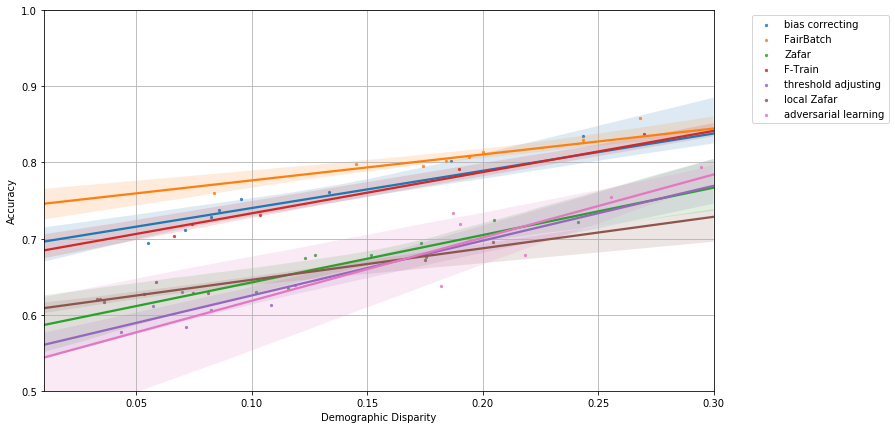

In [83]:
df = {}
fig, ax = plt.subplots(figsize=(12,7))
# fig.set_size_inches(18.5, 10.5)
ax.set_ylim(0.5, 1)
ax.set_xlim (0.01, 0.3)
for method in acc_l:
    df[method] = pd.DataFrame({"Accuracy": acc_l[method], "Demographic Disparity": dp_l[method]})
    sns.regplot(df[method]['Demographic Disparity'], df[method]['Accuracy'], label = method, ax = ax, scatter_kws={'s':5})
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left')
ax.grid()
None 

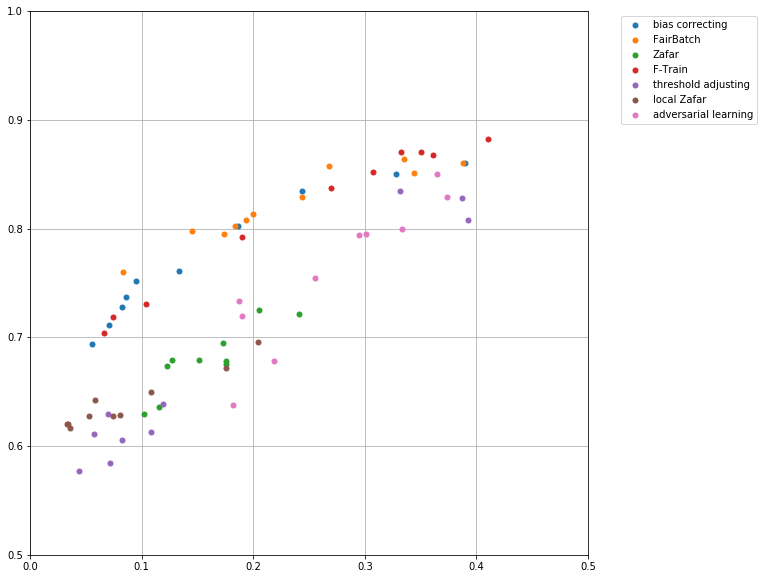

In [74]:
df = {}
_, ax = plt.subplots(figsize=(10,10))
ax.set_ylim(0.5, 1)
ax.set_xlim (0, 0.5)
for method in acc_l:
    df[method] = pd.DataFrame({"Accuracy": acc_l[method], "Demographic Disparity": dp_l[method]})
    ax.plot(df[method]["Demographic Disparity"], df[method]['Accuracy'],
        marker='o', linestyle='', ms=5, label = method)
    # df[method].plot.scatter(x = "Demographic Disparity", y = "Accuracy", ax = ax, label = method, c)
    m, b = np.polyfit(df[method]["Demographic Disparity"], df[method]["Accuracy"], 1)
    # ax.plot(df[method]["Demographic Disparity"], m*df[method]["Demographic Disparity"]+b, label = method)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left')
ax.grid()
None 